# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from IPython.display import IFrame
from IPython.display import Image
from IPython.core.display import HTML 
import time

In [2]:
start_time = time.time()

# 1) Crime Type #

### Opening Datafile ###

**In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.**

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df

Crime Against Category                                      Offense  \
0                            2  Theft of Motor Vehicle Parts or Accessories   
1                            2                                      Robbery   
2                            2     Destruction/Damage/Vandalism of Property   
3                            2                                  Shoplifting   
4                            2     Destruction/Damage/Vandalism of Property   
...                        ...                                          ...   
210254                       2  Theft of Motor Vehicle Parts or Accessories   
210255                       2                          Motor Vehicle Theft   
210256                       1                               Simple Assault   
210257                       1                               Simple Assault   
210258                       1                               Simple Assault   

        Sector  Beat  MCPP  Time  Day  Year  
0           11    22    50   661    0     0  
1           22    50    50  1753    6     0  
2           18    39    33   124    2     0  
3           14    29    16  2005    1     0  
4           11    22    44  1753    1     0  
...        ...   ...   ...   ...  ...   ...  
210254      13    28    29     0    2     2  
210255      19    42    34   508    3     2  
210256       9    15    51  1121    4     2  
210257       9    14    45   938    1     2  
210258       9    15    56  1378    0     2  

[210259 rows x 8 columns]

### Setting Up For Initial Model ###

**Let's start off by first identifying our target variable**

In [4]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

**Now we'll split our data using Train Test Split**

In [5]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

**We'll scale our data, to make it easier for the model to work with**

In [6]:
#Initializing StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

**Let's look at the value counts for our dependent variable, to see if there's an imbalance of data**

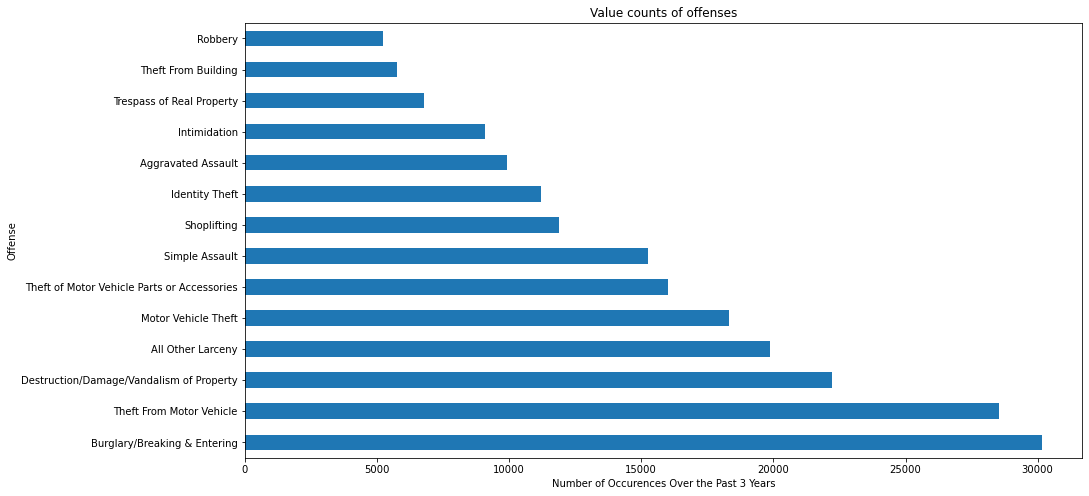

In [7]:
#Creating bar graph
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 3 Years");

**We can see that there's an imbalance, so let's use SMOTE to address that**

In [8]:
#Initializing SMOTE
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

**Now it's time to initialize our model.**

# Random Forest Model #

**We'll start off by using a Random Forest model**

In [9]:
#Creating initial RF model
rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

**After we run our initial model, we want to look at metrics like precision, recall, F1 score, false positive/negative instances, etc. Let's create our classification report and confusion matrices, so we can take a look at these metrics**

### Classification Report ###

**Printing our training results**

In [10]:
print(classification_report(y_train, rf_train_pred))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.38      0.61      0.47     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.19      0.14      0.16     22703
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00     22703
                             Identity Theft       0.26      0.85      0.39     22703
                               Intimidation       0.47      0.32      0.38     22703
                        Motor Vehicle Theft       0.22      0.06      0.09     22703
                                    Robbery       0.23      0.11      0.15     22703
                                Shoplifting       0.19      0.47      0.27     22703
                             Simple Assault       0.39      0.28      0.33     22703
                        Theft From Building       0.15      0.24

**Printing our testing results**

In [11]:
print(classification_report(y_test, rf_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.33      0.57      0.42      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.30      0.13      0.18      7460
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00      5540
                             Identity Theft       0.18      0.86      0.29      2921
                               Intimidation       0.37      0.31      0.34      2250
                        Motor Vehicle Theft       0.22      0.06      0.10      4563
                                    Robbery       0.07      0.10      0.08      1319
                                Shoplifting       0.14      0.46      0.22      2975
                             Simple Assault       0.48      0.29      0.36      3790
                        Theft From Building       0.05      0.22

### Confusion Matrix ###

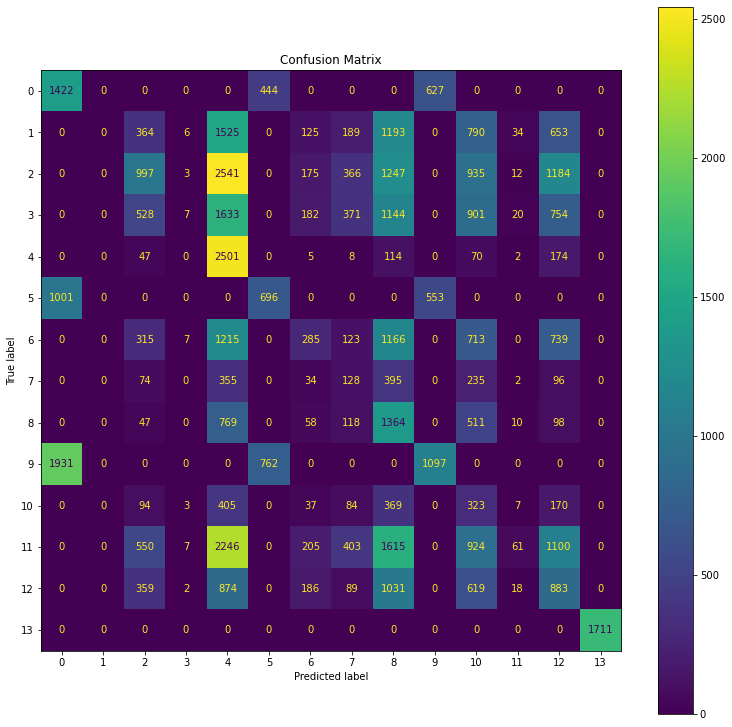

In [12]:
cm = confusion_matrix(y_test, rf_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix results more readable, we represented the crime categories as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Classification Report Results ###

**Let's take a look at our test model classification report results for each crime:**

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .33, a recall score of .57, and an f1 score of .42. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 33% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 57% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .0, a recall score of .0, and an f1 score of .0. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 0% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .30, a recall score of .13, and an f1 score of .18. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 30% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 13% of them.
* There is an f1 score of .18, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .20, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 20% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .18, a recall score of .86, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 18% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 86% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .37, a recall score of .31, and an f1 score of .34. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 37% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 31% of them.
* There is an f1 score of .34, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .06, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 6% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .07, a recall score of .10, and an f1 score of .08. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 7% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 10% of them.
* There is an f1 score of .08, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .14, a recall score of .46, and an f1 score of .22. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 14% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 46% of them.
* There is an f1 score of .22, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .48, a recall score of .29, and an f1 score of .36. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 48% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 29% of them.
* There is an f1 score of .36, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .05, a recall score of .22, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 5% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 22% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .37, a recall score of .01, and an f1 score of .02. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 37% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 1% of them.
* There is an f1 score of .02, indicating extremely poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .15, a recall score of .22, and an f1 score of .18. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 15% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 22% of them.
* There is an f1 score of .18, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Confusion Matrix Results ###

**Let's take a look at our instances of true positives/negatives and false positives/negatives from our confusion matrix:**

**0) Aggravated Assault**

* 1422 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,071 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 2,932 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,851 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 997 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,463 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 2,378 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 43,091 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 7 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,533 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 28 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,525 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,501 crimes were correctly predicted as being "Identity Theft" crimes
* 420 crimes were wrongly predicted as not being "Identity Theft" crimes
* 11,563 crimes were wrongly predicted as being "Identity Theft" crimes
* 44,701 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 696 crimes were correctly predicted as being "Intimidation" crimes
* 1,554 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,206 crimes were wrongly predicted as being "Intimidation" crimes
* 50,554 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 285 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,278 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,007 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,056 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 128 crimes were correctly predicted as being "Robbery" crimes
* 1,191 crimes were wrongly predicted as not being "Robbery" crimes
* 1,751 crimes were wrongly predicted as being "Robbery" crimes
* 51,015 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,364 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,567 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,097 crimes were correctly predicted as being "Simple Assault" crimes
* 2,693 crimes were wrongly predicted as not being "Simple Assault" crimes
* 1,180 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,465 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 323 crimes were correctly predicted as being "Theft From Building" crimes
* 1,169 crimes were wrongly predicted as not being "Theft From Building" crimes
* 5,698 crimes were wrongly predicted as being "Theft From Building" crimes
* 50,519 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 61 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,050 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 105 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,383 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 883 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,178 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 4,968 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,679 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

### Interpreting Results ###

In order to determine what types of crimes our model will best predict, we want to look at various aspects of our classification report and confusion matrix. In particular (for our classification report) we want to look at recall, since that will give us the most realistic look at how our model performs. Recall in this case asks the question of "Out of the actual total number of a certain type of crime committed, how many crimes did our model accurately classify/predict to be that type?". We'll also take a look at the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* There seems to be some overfitting occuring, as evident from the perfect precision, recall and F1 scores of Trespass of Real Property crimes as well as our training classification report results being better than our testing results.


* All our recall values seem to be low (below .57), except for our highest precision scores which belonged to Identity Theft crimes, with a recall value of .86, and Trespass of Real Property crimes (which had an improbable perfect 1.0 score). 


* Our precision scores were also low (below .37) except for our highest precision score which belonged to Simple Assault crimes, with a precision value of .48, and again Trespass of Real Property with a perfect 1.0 score.


* Our F1 scores were low as well. Our highest score was a .42, which belonged to the Aggravated Assault crimes category.

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Identity Theft crimes (2,501) , then Trespass of Real Property crimes (1,711), then Aggravated Assault crimes(1,422). The least instances belonged to All Other Larceny crimes (0), Destruction/Damage/Vandalism of Property crimes (7), and Theft From Motor Vehicle crimes (61).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,050), then Burglary/Breaking & Entering crimes (6,463), then Destruction/Damage/Vandalism of Property crimes (5,533). The least instances belonged to Trespass of Real Property crimes  (0), Identity Theft (420), and Aggravated Assault crimes (1,071).


* For our instances of false positives, the most instances belonged to Identity Theft crimes (11,563), then Shoplifting crimes (8,274), then Theft From Building crimes(5,698). The least instances belonged to both Trespass of Real Property and All Other Larceny crimes with 0 instances, followed by Destruction/Damage/Vandalism of Property crimes with 28 instances.


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,679), then Simple Assault crimes (51,465), then Theft From Motor Vehicle (51,383). The least instances belonged to  Burglary/Breaking & Entering crimes (43,091), Identity Theft crimes (44,701), and Destruction/Damage/Vandalism of Property crimes (47,525).

**From our results we can see that our model is overfitting. Despite this, most of our crimes have low recall, precision and F1 scores. Our model seems to best predict new crimes as Trespass of Real Property crimes (based on recall values, true positive values and false negative/positive values). This however may be due to our model overfitting. Next, let's attempt to tune our random forest model to see if we can reduce overfitting, see a change in our classification report values, and perhaps see a clearer trend in predicting crimes.**

# Tuned Random Forest Model #

Let's attempt to tune our random forest model, via Grid-search. We'll attempt to reduce the overfitting occuring, and we'll also see if using a grid search to find our optimal criteria will help modify our classification report values. 

**Let's create our Grid-search with our various parameters**

In [13]:
rf2 = RandomForestClassifier()

#Grid-search params
param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 3, 5],
    'min_samples_split': [0.2, 0.3, 0.4 ],
    'min_samples_leaf': [0.1, 0.2, 0.3]
}


gs_rf = GridSearchCV(rf2, param_grid)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.3,
 'random_state': 1}

**Next, let's create our new model with the Grid-search best parameters**

In [14]:
rf2 = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 3, min_samples_leaf = 0.1, min_samples_split = 0.3)

rf2.fit(X_train, y_train)
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [15]:
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

**Again, we want to look at metrics like precision, recall, F1 score, false positive/negative instances, etc. Let's create our classification report and confusion matrices, so we can take a look at these metrics**

### Classification Report ###

**Printing our training results**

In [16]:
print(classification_report(y_train, rf_train_pred2))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.60      0.45     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.15      0.20      0.17     22703
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00     22703
                             Identity Theft       0.22      0.85      0.35     22703
                               Intimidation       0.39      0.30      0.34     22703
                        Motor Vehicle Theft       0.16      0.07      0.10     22703
                                    Robbery       0.13      0.06      0.08     22703
                                Shoplifting       0.17      0.44      0.25     22703
                             Simple Assault       0.36      0.21      0.27     22703
                        Theft From Building       0.16      0.12

**Printing our testing results**

In [17]:
print(classification_report(y_test, rf_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.31      0.58      0.41      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.24      0.19      0.22      7460
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00      5540
                             Identity Theft       0.17      0.85      0.28      2921
                               Intimidation       0.30      0.29      0.29      2250
                        Motor Vehicle Theft       0.17      0.07      0.10      4563
                                    Robbery       0.04      0.06      0.05      1319
                                Shoplifting       0.13      0.44      0.20      2975
                             Simple Assault       0.47      0.21      0.29      3790
                        Theft From Building       0.06      0.11

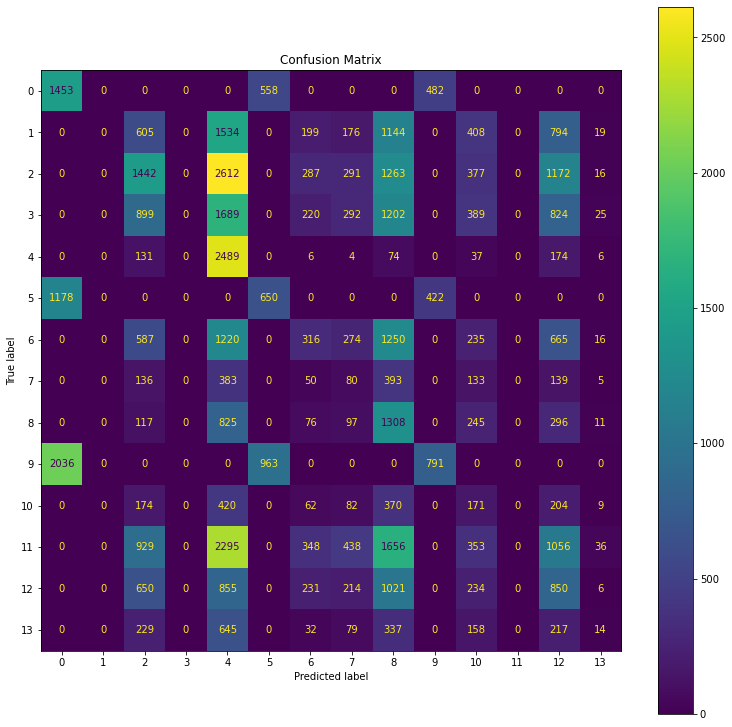

In [18]:
cm2 = confusion_matrix(y_test, rf_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Classification Report Results ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .31, a recall score of .58, and an f1 score of .41. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 31% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 58% of them.
* There is an f1 score of .41, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 0% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .24, a recall score of .19, and an f1 score of .22. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 24% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 19% of them.
* There is an f1 score of .22, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 0% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating worst possible performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .17, a recall score of .85, and an f1 score of .28. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 17% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 85% of them.
* There is an f1 score of .28, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .30, a recall score of .29, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 30% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .17, a recall score of .07, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 17% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 7% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .04, a recall score of .06, and an f1 score of .05. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 4% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 6% of them.
* There is an f1 score of .05, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .13, a recall score of .44, and an f1 score of .20. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 13% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 44% of them.
* There is an f1 score of .20, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .21, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 21% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .06, a recall score of .11, and an f1 score of .08. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 6% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 11% of them.
* There is an f1 score of .08, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 0% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 0% of them.
* There is an f1 score of .0, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .13, a recall score of .21, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 13% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 21% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of .09, a recall score of .01, and an f1 score of 0.1. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 9% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 1% of them.
* There is an f1 score of 0.1, indicating poor performance on predicting probability of the crime being a Trespass of Real Property crime.

### Confusion Matrix Results ###

**0) Aggravated Assault**

* 1,453 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,040 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 3,214 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 46,858 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 1,442 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,018 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 4,457 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 41,253 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 0 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,540 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 0 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,924 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,489 crimes were correctly predicted as being "Identity Theft" crimes
* 432 crimes were wrongly predicted as not being "Identity Theft" crimes
* 12,478 crimes were wrongly predicted as being "Identity Theft" crimes
* 43,132 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 650 crimes were correctly predicted as being "Intimidation" crimes
* 1,600 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,521 crimes were wrongly predicted as being "Intimidation" crimes
* 50,530 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 316 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,247 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,511 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,010 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 80 crimes were correctly predicted as being "Robbery" crimes
* 1,239 crimes were wrongly predicted as not being "Robbery" crimes
* 1,947 crimes were wrongly predicted as being "Robbery" crimes
* 50,905 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,308 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 66,801 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 791 crimes were correctly predicted as being "Simple Assault" crimes
* 2,999 crimes were wrongly predicted as not being "Simple Assault" crimes
* 904 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,771 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 171 crimes were correctly predicted as being "Theft From Building" crimes
* 1,312 crimes were wrongly predicted as not being "Theft From Building" crimes
* 2,569 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,433 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 0 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 0 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,470 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 850 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,211 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 5,541 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,489 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 14 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 1,697 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 149 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,854 crimes were correctly predicted as not being "Trespass of Real Property" crimes

### Interpreting Results ###

After tuning our initial random forest model, we again want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* We still seem to have some slight overfitting occuring, as evident in our training classification report results being better than our testing results. However, we have managed to reduce the amount of overfitting occuring, which is seen when we look at the reduced precision, recall and F1 scores of Trespass of Real Property crimes.


* While still low, our recall values have improved from our Random Forest model, except for our highest score which belonged to Identity Theft crimes, with a recall value of .85 (.01 decrease from our initial model). Some of our crime recall scores have decreased when compared to the initial model (sign of decrease in overfitting) like Theft From Building crimes (decrease of .11), Simple Assault crimes (decrease of .08), and Robbery crimes (decrease of .04). However, there were also increases. Burglary/Breaking & Entering crime recall value increased by .06, and Motor Vehicle Theft recall value increased by .01.


* Our precision scores also stayed low (below .31) except for our highest score which belonged to Simple Assault crimes, with a precision value of .47. There were also signs of decreased precision values when compared to the initial Random Forest model. Most noticeable were Intimidation crimes (decrease of .07) and Burglary/Breaking & Entering crimes (decrease of .06). 


* Lastly, we saw decreases in all of our F1 scores, except for Burglary/Breaking & Entering crimes, which saw a .04 increase when compared to our initial model. Our highest score was a .41, which belonged to the Aggravated Assault crimes category.

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Identity Theft crimes (2,489) , then Aggravated Assault crimes (1,453), then Burglary/Breaking & Entering crimes (1,442). The least instances belonged to All Other Larceny crimes, Theft From Motor Vehicle crimes, and Destruction/Damage/Vandalism of Property crimes all with 0 instances of true positives.


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,111), then Burglary/Breaking & Entering crimes (6,018), then Destruction/Damage/Vandalism of Property crimes (5,540). The least instances belonged to Identity Theft crimes (432), Aggravated Assault crimes (1,040), and Robbery crimes (1,239).


* For our instances of false positives, the most instances belonged to Identity Theft crimes (11,563), then Shoplifting crimes (8,274), then Theft From Building crimes(5,698). The least instances belonged to Theft From Motor Vehicle crimes, Destruction/Damage/Vandalism of Property crimes, and All Other Larceny crimes all with 0 instances. A close follow up is Trespass of Real Property crimes with 149 instances.


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,679), then Simple Assault crimes (51,465), then Theft From Motor Vehicle (51,383). The least instances belonged to  Burglary/Breaking & Entering crimes (43,091), Identity Theft crimes (43,132), and Aggravated Assault crimes (46,858).

**From our results we can firstly see that we decreased overfitting in our model. Due to this fact, we'll consider the tuned random forest model our "best" model, that we will compare our other models to. We can also see that most of our crimes still have low recall, precision and F1 scores. This time, our model seems to best predict new crimes as Identity Theft crimes (in regards to recall value, true positive values and false negative/positive values). Next, we'll change the type of model we're using and see if we can get stronger results, where we have more than one type of best predicted crime. We'll switch over to using CatBoost.**

# CatBoost Model #

We'll be using CatBoost. CatBoost is a gradient boosting decision tree model, that is mainly used when the data is comprised of categorical variables like ours. It has great default model results, with little tuning needed (we'll still tune our model to be thorough), is great for reducing overfitting, and can even be trained on the GPU (which we'll attempt for one of our models). More information can be found at https://catboost.ai/.

**Creating our Initial Model**

In [19]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [20]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 326ms	remaining: 5m 25s
1:	learn: 2.2999611	total: 518ms	remaining: 4m 18s
2:	learn: 2.2194601	total: 709ms	remaining: 3m 55s
3:	learn: 2.1546015	total: 898ms	remaining: 3m 43s
4:	learn: 2.1023865	total: 1.09s	remaining: 3m 38s
5:	learn: 2.0583486	total: 1.28s	remaining: 3m 32s
6:	learn: 2.0212087	total: 1.48s	remaining: 3m 29s
7:	learn: 1.9898034	total: 1.67s	remaining: 3m 27s
8:	learn: 1.9629609	total: 1.87s	remaining: 3m 25s
9:	learn: 1.9385266	total: 2.05s	remaining: 3m 23s
10:	learn: 1.9170486	total: 2.24s	remaining: 3m 21s
11:	learn: 1.8977704	total: 2.42s	remaining: 3m 19s
12:	learn: 1.8810050	total: 2.62s	remaining: 3m 19s
13:	learn: 1.8659622	total: 2.81s	remaining: 3m 18s
14:	learn: 1.8528057	total: 3.02s	remaining: 3m 18s
15:	learn: 1.8413095	total: 3.21s	remaining: 3m 17s
16:	learn: 1.8304887	total: 3.4s	remaining: 3m 16s
17:	learn: 1.8207193	total: 3.6s	remaining: 3m 16s
18:	learn: 1.8118833	total: 3.79s	remaining: 3

159:	learn: 1.6246682	total: 30.4s	remaining: 2m 39s
160:	learn: 1.6240814	total: 30.6s	remaining: 2m 39s
161:	learn: 1.6234912	total: 30.8s	remaining: 2m 39s
162:	learn: 1.6227072	total: 31s	remaining: 2m 39s
163:	learn: 1.6221519	total: 31.2s	remaining: 2m 38s
164:	learn: 1.6218260	total: 31.4s	remaining: 2m 38s
165:	learn: 1.6211820	total: 31.6s	remaining: 2m 38s
166:	learn: 1.6204335	total: 31.8s	remaining: 2m 38s
167:	learn: 1.6199455	total: 31.9s	remaining: 2m 38s
168:	learn: 1.6193922	total: 32.1s	remaining: 2m 37s
169:	learn: 1.6187407	total: 32.3s	remaining: 2m 37s
170:	learn: 1.6180585	total: 32.5s	remaining: 2m 37s
171:	learn: 1.6176398	total: 32.7s	remaining: 2m 37s
172:	learn: 1.6170568	total: 32.9s	remaining: 2m 37s
173:	learn: 1.6165132	total: 33.1s	remaining: 2m 36s
174:	learn: 1.6159495	total: 33.2s	remaining: 2m 36s
175:	learn: 1.6153028	total: 33.4s	remaining: 2m 36s
176:	learn: 1.6146298	total: 33.6s	remaining: 2m 36s
177:	learn: 1.6140325	total: 33.8s	remaining: 2m

315:	learn: 1.5647062	total: 1m	remaining: 2m 10s
316:	learn: 1.5645829	total: 1m	remaining: 2m 10s
317:	learn: 1.5642024	total: 1m	remaining: 2m 9s
318:	learn: 1.5640665	total: 1m	remaining: 2m 9s
319:	learn: 1.5637100	total: 1m	remaining: 2m 9s
320:	learn: 1.5633905	total: 1m 1s	remaining: 2m 9s
321:	learn: 1.5631116	total: 1m 1s	remaining: 2m 9s
322:	learn: 1.5627410	total: 1m 1s	remaining: 2m 8s
323:	learn: 1.5624283	total: 1m 1s	remaining: 2m 8s
324:	learn: 1.5621756	total: 1m 1s	remaining: 2m 8s
325:	learn: 1.5618323	total: 1m 2s	remaining: 2m 8s
326:	learn: 1.5616583	total: 1m 2s	remaining: 2m 8s
327:	learn: 1.5613896	total: 1m 2s	remaining: 2m 8s
328:	learn: 1.5609458	total: 1m 2s	remaining: 2m 7s
329:	learn: 1.5606630	total: 1m 2s	remaining: 2m 7s
330:	learn: 1.5603782	total: 1m 3s	remaining: 2m 7s
331:	learn: 1.5601729	total: 1m 3s	remaining: 2m 7s
332:	learn: 1.5598859	total: 1m 3s	remaining: 2m 7s
333:	learn: 1.5595414	total: 1m 3s	remaining: 2m 6s
334:	learn: 1.5592040	tot

470:	learn: 1.5299901	total: 1m 30s	remaining: 1m 41s
471:	learn: 1.5297455	total: 1m 30s	remaining: 1m 41s
472:	learn: 1.5295825	total: 1m 30s	remaining: 1m 40s
473:	learn: 1.5294413	total: 1m 30s	remaining: 1m 40s
474:	learn: 1.5292287	total: 1m 30s	remaining: 1m 40s
475:	learn: 1.5289551	total: 1m 31s	remaining: 1m 40s
476:	learn: 1.5286701	total: 1m 31s	remaining: 1m 40s
477:	learn: 1.5285735	total: 1m 31s	remaining: 1m 39s
478:	learn: 1.5283585	total: 1m 31s	remaining: 1m 39s
479:	learn: 1.5281016	total: 1m 31s	remaining: 1m 39s
480:	learn: 1.5279492	total: 1m 32s	remaining: 1m 39s
481:	learn: 1.5278739	total: 1m 32s	remaining: 1m 39s
482:	learn: 1.5277657	total: 1m 32s	remaining: 1m 39s
483:	learn: 1.5276349	total: 1m 32s	remaining: 1m 38s
484:	learn: 1.5274693	total: 1m 32s	remaining: 1m 38s
485:	learn: 1.5272937	total: 1m 33s	remaining: 1m 38s
486:	learn: 1.5271195	total: 1m 33s	remaining: 1m 38s
487:	learn: 1.5268984	total: 1m 33s	remaining: 1m 38s
488:	learn: 1.5267847	total:

622:	learn: 1.5058894	total: 1m 59s	remaining: 1m 12s
623:	learn: 1.5057118	total: 1m 59s	remaining: 1m 12s
624:	learn: 1.5056597	total: 1m 59s	remaining: 1m 11s
625:	learn: 1.5055096	total: 2m	remaining: 1m 11s
626:	learn: 1.5053330	total: 2m	remaining: 1m 11s
627:	learn: 1.5051102	total: 2m	remaining: 1m 11s
628:	learn: 1.5049670	total: 2m	remaining: 1m 11s
629:	learn: 1.5048555	total: 2m	remaining: 1m 10s
630:	learn: 1.5047674	total: 2m 1s	remaining: 1m 10s
631:	learn: 1.5045301	total: 2m 1s	remaining: 1m 10s
632:	learn: 1.5044772	total: 2m 1s	remaining: 1m 10s
633:	learn: 1.5043542	total: 2m 1s	remaining: 1m 10s
634:	learn: 1.5042600	total: 2m 1s	remaining: 1m 10s
635:	learn: 1.5040910	total: 2m 1s	remaining: 1m 9s
636:	learn: 1.5039614	total: 2m 2s	remaining: 1m 9s
637:	learn: 1.5037723	total: 2m 2s	remaining: 1m 9s
638:	learn: 1.5036974	total: 2m 2s	remaining: 1m 9s
639:	learn: 1.5035726	total: 2m 2s	remaining: 1m 9s
640:	learn: 1.5034069	total: 2m 2s	remaining: 1m 8s
641:	learn:

779:	learn: 1.4851963	total: 2m 29s	remaining: 42.2s
780:	learn: 1.4849726	total: 2m 29s	remaining: 42.1s
781:	learn: 1.4849048	total: 2m 30s	remaining: 41.9s
782:	learn: 1.4848062	total: 2m 30s	remaining: 41.7s
783:	learn: 1.4847028	total: 2m 30s	remaining: 41.5s
784:	learn: 1.4846536	total: 2m 30s	remaining: 41.3s
785:	learn: 1.4843678	total: 2m 30s	remaining: 41.1s
786:	learn: 1.4842474	total: 2m 31s	remaining: 40.9s
787:	learn: 1.4841990	total: 2m 31s	remaining: 40.7s
788:	learn: 1.4840352	total: 2m 31s	remaining: 40.5s
789:	learn: 1.4838728	total: 2m 31s	remaining: 40.3s
790:	learn: 1.4837988	total: 2m 31s	remaining: 40.1s
791:	learn: 1.4836912	total: 2m 32s	remaining: 39.9s
792:	learn: 1.4835674	total: 2m 32s	remaining: 39.7s
793:	learn: 1.4834131	total: 2m 32s	remaining: 39.6s
794:	learn: 1.4832386	total: 2m 32s	remaining: 39.4s
795:	learn: 1.4831564	total: 2m 32s	remaining: 39.2s
796:	learn: 1.4830032	total: 2m 33s	remaining: 39s
797:	learn: 1.4829129	total: 2m 33s	remaining: 3

935:	learn: 1.4688009	total: 2m 59s	remaining: 12.3s
936:	learn: 1.4687425	total: 2m 59s	remaining: 12.1s
937:	learn: 1.4686443	total: 2m 59s	remaining: 11.9s
938:	learn: 1.4685779	total: 3m	remaining: 11.7s
939:	learn: 1.4685203	total: 3m	remaining: 11.5s
940:	learn: 1.4683926	total: 3m	remaining: 11.3s
941:	learn: 1.4682419	total: 3m	remaining: 11.1s
942:	learn: 1.4681218	total: 3m	remaining: 10.9s
943:	learn: 1.4680295	total: 3m 1s	remaining: 10.7s
944:	learn: 1.4679649	total: 3m 1s	remaining: 10.6s
945:	learn: 1.4678936	total: 3m 1s	remaining: 10.4s
946:	learn: 1.4678353	total: 3m 1s	remaining: 10.2s
947:	learn: 1.4677239	total: 3m 1s	remaining: 9.98s
948:	learn: 1.4676501	total: 3m 2s	remaining: 9.79s
949:	learn: 1.4675029	total: 3m 2s	remaining: 9.59s
950:	learn: 1.4672623	total: 3m 2s	remaining: 9.4s
951:	learn: 1.4671748	total: 3m 2s	remaining: 9.21s
952:	learn: 1.4670202	total: 3m 2s	remaining: 9.02s
953:	learn: 1.4669491	total: 3m 3s	remaining: 8.83s
954:	learn: 1.4668213	tot

In [21]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

### Classification Report ###

**Printing our training results**

In [22]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

**Printing our testing results**

In [23]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

### Confusion Matrix ###

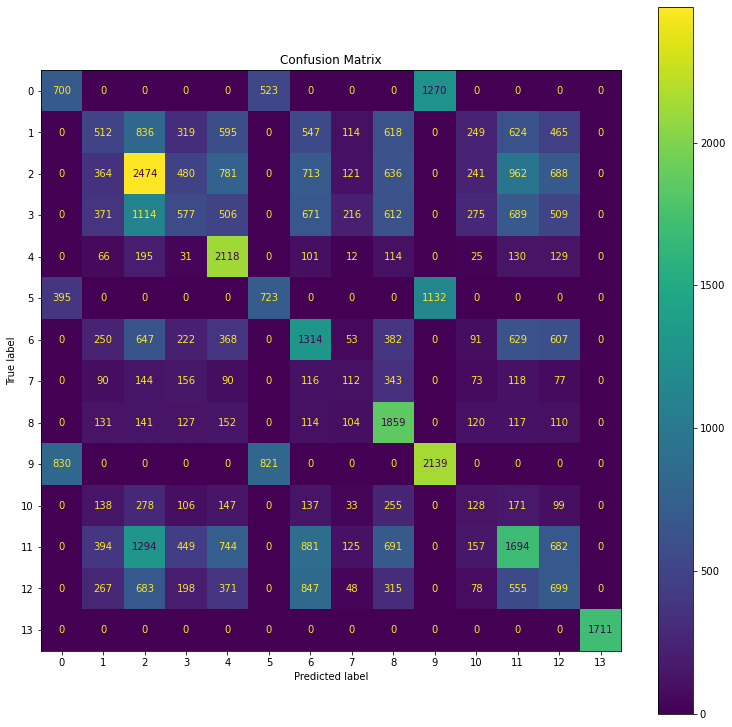

In [24]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Classification Report Results ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

###  Confusion Matrix Results ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

### Interpreting Results ###

We want to look at various aspects of our classification report and confusion matrix  for our new initial model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* We seem to have have some overfitting again, as evident when we look at the perfect precision, recall and F1 scores of Trespass of Real Property crimes, as well as our training classification report results being better than our testing results. This is slightly unexpected as we attempted to use CatBoost's resilience to overfitting and early stopping rounds to account for overfitting. We'll talk about implications later on in our final conclusion.


* Our recall values are still low, but have improved from our previous best Random Forest model recall values. Most notable is our Simple Assault crimes with an improvement of .35, Theft From Motor Vehicle crimes with an improvement of .24, and Motor Vehicle Theft crimes with an improvement of .22.  Our highest recall value belonged to Identity Theft crimes again with a .73 value, followed by Shoplifting crimes with a .62 value, then Simple Assault crimes with a .56 value.   


* Our precision scores while staying low (below .47) have increased when compared to our best Random Forest model. Most notable is our Destruction/Damage/Vandalism of Property crimes with an improvement of .22, All Other Larceny crimes with an improvement of .20, and Shoplifting crimes with an improvement of .19. Our highest precision scores belong to Simple Assault crimes with a score of .47, then both Aggravated Assault crimes and Identity Theft crimes with a score of .36.


* Lastly, we saw increases in most F1 scores when compared to our best Random Forest model, with the exception of Aggravated Assault crimes (decreasse of .09). Our highest F1 score (excluding Trespass of Real Property crimes due to overfitting) belonged to Simple Assault crimes, with a score of .51, followed by Identity Theft crimes with a score of .48, then Shoplifting crimes with a score of .42.


**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Burglary/Breaking & Entering crimes (2,474) , then Simple Assault crimes (2,139), then Identity Theft crimes (2,118). The least instances belonged to Robbery crimes (112), Theft From Building crimes (128), and All Other Larceny crimes (512).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,111), then Burglary/Breaking & Entering crimes (4,986), then Destruction/Damage/Vandalism of Property crimes (4,963). The least instances belonged to Trespass of Real Property crimes (0), Identity Theft crimes (803), and Shoplifting crimes (1,116).


* For our instances of false positives, the most instances belonged to Burglary/Breaking & Entering crimes (5,332), then Motor Vehicle Theft crimes (4,127), then Theft From Motor Vehicle crimes(3,995). The least instances belonged to Trespass of Real Property crimes (0), Robbery crimes (826), and Theft From Building crimes (1,309). 


* Lastly, for our instances of true negatives, the most instances belonged to Theft From Building crimes (51,929), then Theft of Motor Vehicle Parts or Accessories crimes (51,863), then Robbery crimes (51,679). The least instances belonged to  Burglary/Breaking & Entering crimes (40,973), All Other Larceny crimes (44,863), and Destruction/Damage/Vandalism of Property crimes (47,221).

**From our results we can see that our CatBoost model is overfitting. While still on the low side, we saw improvements in our precision, recall and F1 scores compared to our random forest best model. Our model seems to best predict new crimes as Simple Assault and Identity Theft crimes (in regards to overall precision/recall/F1 values, and our true positive values/false negative values). Next, we'll use Grid-search in an attempt to tune our CatBoost model. We'll see if we can do anything about the overfitting, and see if our model predicts any other type of crimes.**

# Tuned CatBoost  Model #

Let's attempt to tune our CatBoost model, via Grid-search. We'll attempt to reduce the overfitting occuring, and we'll also see if using a grid search to find our optimal criteria will help modify our classification report values.

**Let's create our Grid-search with our various parameters**

In [25]:
#Grid-search params
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [26]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 13.9ms	remaining: 1.38s
1:	learn: 2.4762514	total: 26.3ms	remaining: 1.29s
2:	learn: 2.4237441	total: 38.3ms	remaining: 1.24s
3:	learn: 2.3795726	total: 50.1ms	remaining: 1.2s
4:	learn: 2.3414035	total: 62.2ms	remaining: 1.18s
5:	learn: 2.3078011	total: 74.1ms	remaining: 1.16s
6:	learn: 2.2778569	total: 86.1ms	remaining: 1.14s
7:	learn: 2.2509267	total: 98ms	remaining: 1.13s
8:	learn: 2.2265149	total: 110ms	remaining: 1.11s
9:	learn: 2.2043156	total: 121ms	remaining: 1.09s
10:	learn: 2.1839448	total: 132ms	remaining: 1.07s
11:	learn: 2.1652505	total: 143ms	remaining: 1.05s
12:	learn: 2.1480043	total: 154ms	remaining: 1.03s
13:	learn: 2.1320227	total: 166ms	remaining: 1.02s
14:	learn: 2.1172350	total: 178ms	remaining: 1.01s
15:	learn: 2.1034803	total: 190ms	remaining: 996ms
16:	learn: 2.0906592	total: 201ms	remaining: 982ms
17:	learn: 2.0787237	total: 214ms	remaining: 973ms
18:	learn: 2.0675539	total: 225ms	remaining: 961ms
19:	learn: 2.0571036	total: 237ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 12.3ms	remaining: 1.21s
1:	learn: 2.4762576	total: 23.3ms	remaining: 1.14s
2:	learn: 2.4237355	total: 34.3ms	remaining: 1.11s
3:	learn: 2.3795674	total: 45.2ms	remaining: 1.08s
4:	learn: 2.3413907	total: 56.1ms	remaining: 1.06s
5:	learn: 2.3077991	total: 67ms	remaining: 1.05s
6:	learn: 2.2778537	total: 77.9ms	remaining: 1.03s
7:	learn: 2.2509244	total: 88.8ms	remaining: 1.02s
8:	learn: 2.2265174	total: 99.7ms	remaining: 1.01s
9:	learn: 2.2043126	total: 111ms	remaining: 996ms
10:	learn: 2.1839418	total: 122ms	remaining: 984ms
11:	learn: 2.1652518	total: 133ms	remaining: 973ms
12:	learn: 2.1479989	total: 144ms	remaining: 961ms
13:	learn: 2.1320215	total: 155ms	remaining: 949ms
14:	learn: 2.1172271	total: 165ms	remaining: 937ms
15:	learn: 2.1034693	total: 176ms	remaining: 926ms
16:	learn: 2.0906570	total: 187ms	remaining: 914ms
17:	learn: 2.0787215	total: 198ms	remaining: 903ms
18:	learn: 2.0675514	total: 209ms	remaining: 891ms
19:	learn: 2.0571039	total: 220ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 11.8ms	remaining: 1.17s
1:	learn: 2.4762643	total: 22.7ms	remaining: 1.11s
2:	learn: 2.4237412	total: 33.6ms	remaining: 1.09s
3:	learn: 2.3795750	total: 44.5ms	remaining: 1.07s
4:	learn: 2.3413940	total: 55.5ms	remaining: 1.05s
5:	learn: 2.3077917	total: 66.4ms	remaining: 1.04s
6:	learn: 2.2778548	total: 77.1ms	remaining: 1.02s
7:	learn: 2.2509158	total: 87.9ms	remaining: 1.01s
8:	learn: 2.2265219	total: 98.7ms	remaining: 998ms
9:	learn: 2.2043303	total: 110ms	remaining: 986ms
10:	learn: 2.1839467	total: 120ms	remaining: 973ms
11:	learn: 2.1652457	total: 131ms	remaining: 962ms
12:	learn: 2.1480037	total: 142ms	remaining: 950ms
13:	learn: 2.1320178	total: 153ms	remaining: 939ms
14:	learn: 2.1172227	total: 164ms	remaining: 927ms
15:	learn: 2.1034701	total: 174ms	remaining: 915ms
16:	learn: 2.0906616	total: 185ms	remaining: 904ms
17:	learn: 2.0787261	total: 196ms	remaining: 893ms
18:	learn: 2.0675760	total: 207ms	remaining: 882ms
19:	learn: 2.0571256	total: 218m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419928	total: 12.1ms	remaining: 1.2s
1:	learn: 2.4762685	total: 23.1ms	remaining: 1.13s
2:	learn: 2.4237449	total: 34.1ms	remaining: 1.1s
3:	learn: 2.3795785	total: 44.8ms	remaining: 1.08s
4:	learn: 2.3413950	total: 55.8ms	remaining: 1.06s
5:	learn: 2.3078053	total: 66.6ms	remaining: 1.04s
6:	learn: 2.2778563	total: 77.5ms	remaining: 1.03s
7:	learn: 2.2509227	total: 88.3ms	remaining: 1.01s
8:	learn: 2.2265251	total: 99.2ms	remaining: 1s
9:	learn: 2.2043273	total: 110ms	remaining: 990ms
10:	learn: 2.1839504	total: 121ms	remaining: 978ms
11:	learn: 2.1652582	total: 132ms	remaining: 967ms
12:	learn: 2.1480047	total: 143ms	remaining: 955ms
13:	learn: 2.1320323	total: 153ms	remaining: 943ms
14:	learn: 2.1172286	total: 164ms	remaining: 931ms
15:	learn: 2.1034728	total: 175ms	remaining: 920ms
16:	learn: 2.0906643	total: 186ms	remaining: 910ms
17:	learn: 2.0787273	total: 197ms	remaining: 899ms
18:	learn: 2.0675735	total: 208ms	remaining: 887ms
19:	learn: 2.0571302	total: 219ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419933	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762635	total: 22.7ms	remaining: 1.11s
2:	learn: 2.4237493	total: 33.5ms	remaining: 1.08s
3:	learn: 2.3795777	total: 44.3ms	remaining: 1.06s
4:	learn: 2.3413980	total: 55.1ms	remaining: 1.05s
5:	learn: 2.3077954	total: 66ms	remaining: 1.03s
6:	learn: 2.2778531	total: 76.7ms	remaining: 1.02s
7:	learn: 2.2509232	total: 87.6ms	remaining: 1.01s
8:	learn: 2.2265226	total: 98.4ms	remaining: 995ms
9:	learn: 2.2043104	total: 109ms	remaining: 983ms
10:	learn: 2.1839472	total: 120ms	remaining: 970ms
11:	learn: 2.1652482	total: 131ms	remaining: 958ms
12:	learn: 2.1479995	total: 142ms	remaining: 947ms
13:	learn: 2.1320239	total: 152ms	remaining: 936ms
14:	learn: 2.1172318	total: 163ms	remaining: 924ms
15:	learn: 2.1034802	total: 174ms	remaining: 912ms
16:	learn: 2.0906601	total: 185ms	remaining: 901ms
17:	learn: 2.0787219	total: 195ms	remaining: 890ms
18:	learn: 2.0675553	total: 206ms	remaining: 880ms
19:	learn: 2.0571095	total: 217ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 12.6ms	remaining: 1.25s
1:	learn: 2.3598895	total: 23.6ms	remaining: 1.16s
2:	learn: 2.2913399	total: 34.6ms	remaining: 1.12s
3:	learn: 2.2369277	total: 45.6ms	remaining: 1.09s
4:	learn: 2.1922572	total: 56.5ms	remaining: 1.07s
5:	learn: 2.1547724	total: 67.2ms	remaining: 1.05s
6:	learn: 2.1228984	total: 77.9ms	remaining: 1.03s
7:	learn: 2.0954139	total: 88.7ms	remaining: 1.02s
8:	learn: 2.0716174	total: 99.5ms	remaining: 1.01s
9:	learn: 2.0508296	total: 110ms	remaining: 993ms
10:	learn: 2.0271502	total: 121ms	remaining: 982ms
11:	learn: 2.0081884	total: 132ms	remaining: 970ms
12:	learn: 1.9930108	total: 143ms	remaining: 956ms
13:	learn: 1.9817102	total: 154ms	remaining: 943ms
14:	learn: 1.9679394	total: 164ms	remaining: 931ms
15:	learn: 1.9588124	total: 175ms	remaining: 920ms
16:	learn: 1.9460533	total: 186ms	remaining: 909ms
17:	learn: 1.9355642	total: 197ms	remaining: 897ms
18:	learn: 1.9294894	total: 208ms	remaining: 886ms
19:	learn: 1.9230232	total: 219m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 12.4ms	remaining: 1.22s
1:	learn: 2.3598789	total: 23.6ms	remaining: 1.15s
2:	learn: 2.2913389	total: 34.7ms	remaining: 1.12s
3:	learn: 2.2369233	total: 45.5ms	remaining: 1.09s
4:	learn: 2.1922461	total: 56.3ms	remaining: 1.07s
5:	learn: 2.1547680	total: 67.1ms	remaining: 1.05s
6:	learn: 2.1228947	total: 77.9ms	remaining: 1.03s
7:	learn: 2.0954127	total: 88.7ms	remaining: 1.02s
8:	learn: 2.0716162	total: 99.4ms	remaining: 1s
9:	learn: 2.0508223	total: 110ms	remaining: 993ms
10:	learn: 2.0270751	total: 121ms	remaining: 981ms
11:	learn: 2.0104775	total: 132ms	remaining: 966ms
12:	learn: 1.9988610	total: 143ms	remaining: 954ms
13:	learn: 1.9820013	total: 154ms	remaining: 943ms
14:	learn: 1.9669211	total: 165ms	remaining: 932ms
15:	learn: 1.9591943	total: 175ms	remaining: 920ms
16:	learn: 1.9464718	total: 186ms	remaining: 909ms
17:	learn: 1.9359811	total: 197ms	remaining: 896ms
18:	learn: 1.9264024	total: 207ms	remaining: 884ms
19:	learn: 1.9200549	total: 218ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 11.8ms	remaining: 1.16s
1:	learn: 2.3598852	total: 22.6ms	remaining: 1.11s
2:	learn: 2.2913316	total: 33.4ms	remaining: 1.08s
3:	learn: 2.2369270	total: 44.2ms	remaining: 1.06s
4:	learn: 2.1922606	total: 54.9ms	remaining: 1.04s
5:	learn: 2.1547794	total: 65.7ms	remaining: 1.03s
6:	learn: 2.1228893	total: 76.5ms	remaining: 1.02s
7:	learn: 2.0954113	total: 87.5ms	remaining: 1s
8:	learn: 2.0716289	total: 98.2ms	remaining: 993ms
9:	learn: 2.0508358	total: 109ms	remaining: 981ms
10:	learn: 2.0271104	total: 120ms	remaining: 970ms
11:	learn: 2.0105111	total: 130ms	remaining: 957ms
12:	learn: 1.9924268	total: 141ms	remaining: 946ms
13:	learn: 1.9822250	total: 152ms	remaining: 934ms
14:	learn: 1.9684887	total: 163ms	remaining: 924ms
15:	learn: 1.9593069	total: 174ms	remaining: 913ms
16:	learn: 1.9465945	total: 185ms	remaining: 902ms
17:	learn: 1.9361020	total: 195ms	remaining: 891ms
18:	learn: 1.9296531	total: 206ms	remaining: 879ms
19:	learn: 1.9202075	total: 217ms	r

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 11.9ms	remaining: 1.18s
1:	learn: 2.3598861	total: 22.7ms	remaining: 1.11s
2:	learn: 2.2913449	total: 33.5ms	remaining: 1.08s
3:	learn: 2.2369312	total: 44.4ms	remaining: 1.07s
4:	learn: 2.1922601	total: 55.3ms	remaining: 1.05s
5:	learn: 2.1547791	total: 66.1ms	remaining: 1.04s
6:	learn: 2.1229021	total: 77ms	remaining: 1.02s
7:	learn: 2.0954266	total: 87.8ms	remaining: 1.01s
8:	learn: 2.0716272	total: 98.7ms	remaining: 998ms
9:	learn: 2.0508478	total: 110ms	remaining: 986ms
10:	learn: 2.0271346	total: 121ms	remaining: 975ms
11:	learn: 2.0105356	total: 131ms	remaining: 963ms
12:	learn: 1.9924692	total: 143ms	remaining: 957ms
13:	learn: 1.9823055	total: 154ms	remaining: 946ms
14:	learn: 1.9673155	total: 165ms	remaining: 936ms
15:	learn: 1.9591126	total: 176ms	remaining: 925ms
16:	learn: 1.9467486	total: 187ms	remaining: 914ms
17:	learn: 1.9362572	total: 198ms	remaining: 902ms
18:	learn: 1.9302153	total: 209ms	remaining: 890ms
19:	learn: 1.9237624	total: 220ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519369	total: 12.1ms	remaining: 1.19s
1:	learn: 2.3598854	total: 23ms	remaining: 1.13s
2:	learn: 2.2913371	total: 33.9ms	remaining: 1.1s
3:	learn: 2.2369275	total: 44.8ms	remaining: 1.07s
4:	learn: 2.1922648	total: 55.6ms	remaining: 1.06s
5:	learn: 2.1547782	total: 66.5ms	remaining: 1.04s
6:	learn: 2.1228920	total: 77.2ms	remaining: 1.02s
7:	learn: 2.0954177	total: 88.1ms	remaining: 1.01s
8:	learn: 2.0716157	total: 98.9ms	remaining: 1000ms
9:	learn: 2.0508376	total: 110ms	remaining: 988ms
10:	learn: 2.0270725	total: 121ms	remaining: 977ms
11:	learn: 2.0104720	total: 131ms	remaining: 964ms
12:	learn: 1.9988460	total: 142ms	remaining: 952ms
13:	learn: 1.9821266	total: 153ms	remaining: 941ms
14:	learn: 1.9670319	total: 164ms	remaining: 931ms
15:	learn: 1.9588435	total: 175ms	remaining: 919ms
16:	learn: 1.9465869	total: 186ms	remaining: 909ms
17:	learn: 1.9360988	total: 197ms	remaining: 897ms
18:	learn: 1.9296686	total: 208ms	remaining: 885ms
19:	learn: 1.9202298	total: 218ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9520627	total: 22.8ms	remaining: 1.12s
2:	learn: 1.8880724	total: 33.7ms	remaining: 1.09s
3:	learn: 1.8521888	total: 44.6ms	remaining: 1.07s
4:	learn: 1.8356852	total: 55.8ms	remaining: 1.06s
5:	learn: 1.8255546	total: 66.8ms	remaining: 1.05s
6:	learn: 1.8101046	total: 77.5ms	remaining: 1.03s
7:	learn: 1.8011887	total: 88.7ms	remaining: 1.02s
8:	learn: 1.7935488	total: 99.7ms	remaining: 1.01s
9:	learn: 1.7872375	total: 111ms	remaining: 998ms
10:	learn: 1.7818155	total: 122ms	remaining: 983ms
11:	learn: 1.7774933	total: 132ms	remaining: 971ms
12:	learn: 1.7720436	total: 143ms	remaining: 960ms
13:	learn: 1.7672708	total: 155ms	remaining: 949ms
14:	learn: 1.7647360	total: 165ms	remaining: 936ms
15:	learn: 1.7584613	total: 176ms	remaining: 923ms
16:	learn: 1.7548140	total: 187ms	remaining: 913ms
17:	learn: 1.7523385	total: 198ms	remaining: 903ms
18:	learn: 1.7449282	total: 209ms	remaining: 893ms
19:	learn: 1.7430137	total: 220m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 11.8ms	remaining: 1.17s
1:	learn: 1.9517887	total: 22.7ms	remaining: 1.11s
2:	learn: 1.8886576	total: 33.6ms	remaining: 1.08s
3:	learn: 1.8529391	total: 44.8ms	remaining: 1.08s
4:	learn: 1.8330485	total: 56ms	remaining: 1.06s
5:	learn: 1.8228299	total: 67ms	remaining: 1.05s
6:	learn: 1.8124494	total: 78.4ms	remaining: 1.04s
7:	learn: 1.7977723	total: 89.3ms	remaining: 1.03s
8:	learn: 1.7908950	total: 101ms	remaining: 1.02s
9:	learn: 1.7853127	total: 112ms	remaining: 1.01s
10:	learn: 1.7791102	total: 123ms	remaining: 993ms
11:	learn: 1.7754519	total: 134ms	remaining: 981ms
12:	learn: 1.7716681	total: 145ms	remaining: 970ms
13:	learn: 1.7686968	total: 156ms	remaining: 960ms
14:	learn: 1.7658100	total: 167ms	remaining: 948ms
15:	learn: 1.7577358	total: 178ms	remaining: 935ms
16:	learn: 1.7550341	total: 189ms	remaining: 923ms
17:	learn: 1.7534943	total: 200ms	remaining: 910ms
18:	learn: 1.7500031	total: 211ms	remaining: 899ms
19:	learn: 1.7469650	total: 222ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.7ms	remaining: 1.16s
1:	learn: 1.9519058	total: 22.8ms	remaining: 1.12s
2:	learn: 1.8888378	total: 33.6ms	remaining: 1.09s
3:	learn: 1.8532653	total: 44.5ms	remaining: 1.07s
4:	learn: 1.8370754	total: 55.6ms	remaining: 1.06s
5:	learn: 1.8272524	total: 66.5ms	remaining: 1.04s
6:	learn: 1.8181762	total: 77.6ms	remaining: 1.03s
7:	learn: 1.8077453	total: 88.7ms	remaining: 1.02s
8:	learn: 1.7947342	total: 99.6ms	remaining: 1.01s
9:	learn: 1.7880574	total: 111ms	remaining: 998ms
10:	learn: 1.7825848	total: 122ms	remaining: 984ms
11:	learn: 1.7740260	total: 133ms	remaining: 973ms
12:	learn: 1.7695077	total: 144ms	remaining: 961ms
13:	learn: 1.7663956	total: 155ms	remaining: 949ms
14:	learn: 1.7627020	total: 165ms	remaining: 937ms
15:	learn: 1.7594748	total: 176ms	remaining: 925ms
16:	learn: 1.7548248	total: 187ms	remaining: 913ms
17:	learn: 1.7527022	total: 198ms	remaining: 903ms
18:	learn: 1.7499503	total: 209ms	remaining: 891ms
19:	learn: 1.7461351	total: 220m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9519926	total: 23ms	remaining: 1.13s
2:	learn: 1.8889247	total: 34ms	remaining: 1.1s
3:	learn: 1.8535363	total: 45.3ms	remaining: 1.09s
4:	learn: 1.8340448	total: 56.5ms	remaining: 1.07s
5:	learn: 1.8238953	total: 67.5ms	remaining: 1.06s
6:	learn: 1.8162297	total: 78.6ms	remaining: 1.04s
7:	learn: 1.8014081	total: 89.5ms	remaining: 1.03s
8:	learn: 1.7950080	total: 101ms	remaining: 1.02s
9:	learn: 1.7892778	total: 112ms	remaining: 1s
10:	learn: 1.7836330	total: 122ms	remaining: 990ms
11:	learn: 1.7789930	total: 133ms	remaining: 978ms
12:	learn: 1.7714940	total: 144ms	remaining: 967ms
13:	learn: 1.7681401	total: 155ms	remaining: 954ms
14:	learn: 1.7653014	total: 167ms	remaining: 944ms
15:	learn: 1.7573030	total: 178ms	remaining: 933ms
16:	learn: 1.7539602	total: 189ms	remaining: 922ms
17:	learn: 1.7508535	total: 200ms	remaining: 909ms
18:	learn: 1.7481671	total: 211ms	remaining: 898ms
19:	learn: 1.7448730	total: 221ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12ms	remaining: 1.19s
1:	learn: 1.9517451	total: 23.2ms	remaining: 1.14s
2:	learn: 1.8888390	total: 34.1ms	remaining: 1.1s
3:	learn: 1.8531956	total: 45.4ms	remaining: 1.09s
4:	learn: 1.8335319	total: 56.4ms	remaining: 1.07s
5:	learn: 1.8233264	total: 67.3ms	remaining: 1.05s
6:	learn: 1.8157680	total: 78.4ms	remaining: 1.04s
7:	learn: 1.8008697	total: 89.3ms	remaining: 1.03s
8:	learn: 1.7944985	total: 100ms	remaining: 1.01s
9:	learn: 1.7897199	total: 111ms	remaining: 1s
10:	learn: 1.7810920	total: 122ms	remaining: 988ms
11:	learn: 1.7755225	total: 133ms	remaining: 974ms
12:	learn: 1.7681779	total: 144ms	remaining: 964ms
13:	learn: 1.7640497	total: 155ms	remaining: 953ms
14:	learn: 1.7611054	total: 166ms	remaining: 943ms
15:	learn: 1.7569325	total: 177ms	remaining: 931ms
16:	learn: 1.7515369	total: 188ms	remaining: 918ms
17:	learn: 1.7484706	total: 199ms	remaining: 906ms
18:	learn: 1.7450672	total: 210ms	remaining: 893ms
19:	learn: 1.7421792	total: 220ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12ms	remaining: 5.98s
1:	learn: 2.4762514	total: 22.8ms	remaining: 5.69s
2:	learn: 2.4237441	total: 33.7ms	remaining: 5.58s
3:	learn: 2.3795726	total: 44.6ms	remaining: 5.53s
4:	learn: 2.3414035	total: 55.4ms	remaining: 5.48s
5:	learn: 2.3078011	total: 66.3ms	remaining: 5.46s
6:	learn: 2.2778569	total: 77.1ms	remaining: 5.43s
7:	learn: 2.2509267	total: 87.8ms	remaining: 5.4s
8:	learn: 2.2265149	total: 98.6ms	remaining: 5.38s
9:	learn: 2.2043153	total: 109ms	remaining: 5.36s
10:	learn: 2.1839448	total: 120ms	remaining: 5.34s
11:	learn: 2.1652505	total: 131ms	remaining: 5.32s
12:	learn: 2.1480043	total: 142ms	remaining: 5.3s
13:	learn: 2.1320227	total: 152ms	remaining: 5.29s
14:	learn: 2.1172350	total: 163ms	remaining: 5.27s
15:	learn: 2.1034803	total: 174ms	remaining: 5.26s
16:	learn: 2.0906594	total: 185ms	remaining: 5.24s
17:	learn: 2.0787237	total: 195ms	remaining: 5.23s
18:	learn: 2.0675539	total: 206ms	remaining: 5.22s
19:	learn: 2.0571036	total: 217ms	re

169:	learn: 1.7693404	total: 1.86s	remaining: 3.62s
170:	learn: 1.7689920	total: 1.88s	remaining: 3.61s
171:	learn: 1.7685852	total: 1.89s	remaining: 3.6s
172:	learn: 1.7681785	total: 1.9s	remaining: 3.59s
173:	learn: 1.7678955	total: 1.91s	remaining: 3.58s
174:	learn: 1.7672908	total: 1.92s	remaining: 3.56s
175:	learn: 1.7668747	total: 1.93s	remaining: 3.55s
176:	learn: 1.7659993	total: 1.94s	remaining: 3.54s
177:	learn: 1.7655909	total: 1.95s	remaining: 3.53s
178:	learn: 1.7653113	total: 1.96s	remaining: 3.52s
179:	learn: 1.7649124	total: 1.97s	remaining: 3.51s
180:	learn: 1.7645240	total: 1.98s	remaining: 3.5s
181:	learn: 1.7642732	total: 2s	remaining: 3.49s
182:	learn: 1.7639450	total: 2.01s	remaining: 3.48s
183:	learn: 1.7630630	total: 2.02s	remaining: 3.46s
184:	learn: 1.7627942	total: 2.03s	remaining: 3.45s
185:	learn: 1.7621815	total: 2.04s	remaining: 3.44s
186:	learn: 1.7618505	total: 2.05s	remaining: 3.43s
187:	learn: 1.7614320	total: 2.06s	remaining: 3.42s
188:	learn: 1.7606

339:	learn: 1.7169288	total: 3.73s	remaining: 1.75s
340:	learn: 1.7167702	total: 3.74s	remaining: 1.74s
341:	learn: 1.7165617	total: 3.75s	remaining: 1.73s
342:	learn: 1.7164298	total: 3.76s	remaining: 1.72s
343:	learn: 1.7162823	total: 3.77s	remaining: 1.71s
344:	learn: 1.7160444	total: 3.78s	remaining: 1.7s
345:	learn: 1.7155440	total: 3.79s	remaining: 1.69s
346:	learn: 1.7151150	total: 3.8s	remaining: 1.68s
347:	learn: 1.7148390	total: 3.81s	remaining: 1.67s
348:	learn: 1.7146482	total: 3.82s	remaining: 1.65s
349:	learn: 1.7144623	total: 3.83s	remaining: 1.64s
350:	learn: 1.7140463	total: 3.85s	remaining: 1.63s
351:	learn: 1.7139350	total: 3.86s	remaining: 1.62s
352:	learn: 1.7137133	total: 3.87s	remaining: 1.61s
353:	learn: 1.7136036	total: 3.88s	remaining: 1.6s
354:	learn: 1.7134933	total: 3.89s	remaining: 1.59s
355:	learn: 1.7133482	total: 3.9s	remaining: 1.58s
356:	learn: 1.7131927	total: 3.91s	remaining: 1.57s
357:	learn: 1.7127038	total: 3.92s	remaining: 1.56s
358:	learn: 1.71

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 11.8ms	remaining: 5.89s
1:	learn: 2.4762573	total: 22.6ms	remaining: 5.64s
2:	learn: 2.4237358	total: 33.5ms	remaining: 5.54s
3:	learn: 2.3795674	total: 44.2ms	remaining: 5.48s
4:	learn: 2.3413907	total: 55ms	remaining: 5.45s
5:	learn: 2.3077991	total: 65.9ms	remaining: 5.42s
6:	learn: 2.2778537	total: 76.8ms	remaining: 5.41s
7:	learn: 2.2509244	total: 87.6ms	remaining: 5.39s
8:	learn: 2.2265174	total: 98.5ms	remaining: 5.38s
9:	learn: 2.2043126	total: 109ms	remaining: 5.36s
10:	learn: 2.1839421	total: 120ms	remaining: 5.35s
11:	learn: 2.1652518	total: 131ms	remaining: 5.33s
12:	learn: 2.1479991	total: 142ms	remaining: 5.31s
13:	learn: 2.1320212	total: 153ms	remaining: 5.3s
14:	learn: 2.1172271	total: 163ms	remaining: 5.28s
15:	learn: 2.1034693	total: 174ms	remaining: 5.27s
16:	learn: 2.0906570	total: 185ms	remaining: 5.26s
17:	learn: 2.0787215	total: 196ms	remaining: 5.25s
18:	learn: 2.0675512	total: 207ms	remaining: 5.24s
19:	learn: 2.0571039	total: 218ms	r

169:	learn: 1.7717655	total: 1.87s	remaining: 3.63s
170:	learn: 1.7715256	total: 1.88s	remaining: 3.62s
171:	learn: 1.7711415	total: 1.89s	remaining: 3.6s
172:	learn: 1.7702930	total: 1.9s	remaining: 3.59s
173:	learn: 1.7699676	total: 1.91s	remaining: 3.58s
174:	learn: 1.7696165	total: 1.92s	remaining: 3.57s
175:	learn: 1.7692865	total: 1.93s	remaining: 3.56s
176:	learn: 1.7688966	total: 1.95s	remaining: 3.55s
177:	learn: 1.7684584	total: 1.96s	remaining: 3.54s
178:	learn: 1.7680450	total: 1.97s	remaining: 3.53s
179:	learn: 1.7677043	total: 1.98s	remaining: 3.52s
180:	learn: 1.7673414	total: 1.99s	remaining: 3.5s
181:	learn: 1.7669492	total: 2s	remaining: 3.49s
182:	learn: 1.7663631	total: 2.01s	remaining: 3.48s
183:	learn: 1.7660974	total: 2.02s	remaining: 3.47s
184:	learn: 1.7656891	total: 2.03s	remaining: 3.46s
185:	learn: 1.7654496	total: 2.04s	remaining: 3.45s
186:	learn: 1.7651068	total: 2.05s	remaining: 3.44s
187:	learn: 1.7648898	total: 2.06s	remaining: 3.43s
188:	learn: 1.7643

337:	learn: 1.7252266	total: 3.71s	remaining: 1.78s
338:	learn: 1.7249980	total: 3.72s	remaining: 1.77s
339:	learn: 1.7248178	total: 3.73s	remaining: 1.76s
340:	learn: 1.7246849	total: 3.75s	remaining: 1.75s
341:	learn: 1.7245670	total: 3.76s	remaining: 1.74s
342:	learn: 1.7244357	total: 3.77s	remaining: 1.72s
343:	learn: 1.7241503	total: 3.78s	remaining: 1.71s
344:	learn: 1.7240548	total: 3.79s	remaining: 1.7s
345:	learn: 1.7238326	total: 3.8s	remaining: 1.69s
346:	learn: 1.7237443	total: 3.81s	remaining: 1.68s
347:	learn: 1.7235689	total: 3.82s	remaining: 1.67s
348:	learn: 1.7234317	total: 3.83s	remaining: 1.66s
349:	learn: 1.7232610	total: 3.84s	remaining: 1.65s
350:	learn: 1.7230726	total: 3.85s	remaining: 1.64s
351:	learn: 1.7229634	total: 3.87s	remaining: 1.63s
352:	learn: 1.7227547	total: 3.88s	remaining: 1.61s
353:	learn: 1.7225901	total: 3.89s	remaining: 1.6s
354:	learn: 1.7224038	total: 3.9s	remaining: 1.59s
355:	learn: 1.7223062	total: 3.91s	remaining: 1.58s
356:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 11.8ms	remaining: 5.89s
1:	learn: 2.4762640	total: 22.7ms	remaining: 5.65s
2:	learn: 2.4237410	total: 33.6ms	remaining: 5.57s
3:	learn: 2.3795755	total: 44.5ms	remaining: 5.51s
4:	learn: 2.3413938	total: 55.4ms	remaining: 5.48s
5:	learn: 2.3077920	total: 66.2ms	remaining: 5.45s
6:	learn: 2.2778548	total: 77.1ms	remaining: 5.43s
7:	learn: 2.2509156	total: 88ms	remaining: 5.41s
8:	learn: 2.2265216	total: 98.9ms	remaining: 5.4s
9:	learn: 2.2043300	total: 110ms	remaining: 5.38s
10:	learn: 2.1839470	total: 121ms	remaining: 5.37s
11:	learn: 2.1652460	total: 132ms	remaining: 5.35s
12:	learn: 2.1480037	total: 142ms	remaining: 5.34s
13:	learn: 2.1320178	total: 153ms	remaining: 5.32s
14:	learn: 2.1172225	total: 164ms	remaining: 5.3s
15:	learn: 2.1034706	total: 175ms	remaining: 5.29s
16:	learn: 2.0906613	total: 186ms	remaining: 5.28s
17:	learn: 2.0787261	total: 197ms	remaining: 5.27s
18:	learn: 2.0675762	total: 208ms	remaining: 5.26s
19:	learn: 2.0571256	total: 219ms	re

168:	learn: 1.7721756	total: 1.86s	remaining: 3.64s
169:	learn: 1.7719295	total: 1.87s	remaining: 3.63s
170:	learn: 1.7716180	total: 1.88s	remaining: 3.62s
171:	learn: 1.7712591	total: 1.89s	remaining: 3.61s
172:	learn: 1.7709825	total: 1.9s	remaining: 3.6s
173:	learn: 1.7705021	total: 1.92s	remaining: 3.59s
174:	learn: 1.7701281	total: 1.93s	remaining: 3.58s
175:	learn: 1.7692789	total: 1.94s	remaining: 3.57s
176:	learn: 1.7689647	total: 1.95s	remaining: 3.56s
177:	learn: 1.7687205	total: 1.96s	remaining: 3.54s
178:	learn: 1.7684488	total: 1.97s	remaining: 3.53s
179:	learn: 1.7680290	total: 1.98s	remaining: 3.52s
180:	learn: 1.7676242	total: 1.99s	remaining: 3.51s
181:	learn: 1.7668321	total: 2s	remaining: 3.5s
182:	learn: 1.7664578	total: 2.01s	remaining: 3.49s
183:	learn: 1.7661544	total: 2.02s	remaining: 3.48s
184:	learn: 1.7658441	total: 2.04s	remaining: 3.47s
185:	learn: 1.7654212	total: 2.05s	remaining: 3.46s
186:	learn: 1.7652017	total: 2.06s	remaining: 3.44s
187:	learn: 1.7648

338:	learn: 1.7261629	total: 3.73s	remaining: 1.77s
339:	learn: 1.7260437	total: 3.74s	remaining: 1.76s
340:	learn: 1.7258120	total: 3.75s	remaining: 1.75s
341:	learn: 1.7257229	total: 3.76s	remaining: 1.74s
342:	learn: 1.7255733	total: 3.77s	remaining: 1.73s
343:	learn: 1.7254244	total: 3.78s	remaining: 1.72s
344:	learn: 1.7251686	total: 3.79s	remaining: 1.7s
345:	learn: 1.7249525	total: 3.8s	remaining: 1.69s
346:	learn: 1.7247322	total: 3.81s	remaining: 1.68s
347:	learn: 1.7245130	total: 3.83s	remaining: 1.67s
348:	learn: 1.7244124	total: 3.84s	remaining: 1.66s
349:	learn: 1.7239392	total: 3.85s	remaining: 1.65s
350:	learn: 1.7237591	total: 3.86s	remaining: 1.64s
351:	learn: 1.7236531	total: 3.87s	remaining: 1.63s
352:	learn: 1.7232508	total: 3.88s	remaining: 1.62s
353:	learn: 1.7231656	total: 3.9s	remaining: 1.61s
354:	learn: 1.7229578	total: 3.91s	remaining: 1.59s
355:	learn: 1.7228023	total: 3.92s	remaining: 1.58s
356:	learn: 1.7227216	total: 3.93s	remaining: 1.57s
357:	learn: 1.7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419928	total: 11.9ms	remaining: 5.95s
1:	learn: 2.4762685	total: 22.8ms	remaining: 5.67s
2:	learn: 2.4237447	total: 33.6ms	remaining: 5.57s
3:	learn: 2.3795785	total: 44.4ms	remaining: 5.51s
4:	learn: 2.3413950	total: 55.3ms	remaining: 5.47s
5:	learn: 2.3078053	total: 66.1ms	remaining: 5.44s
6:	learn: 2.2778563	total: 77ms	remaining: 5.42s
7:	learn: 2.2509227	total: 87.9ms	remaining: 5.41s
8:	learn: 2.2265251	total: 98.9ms	remaining: 5.39s
9:	learn: 2.2043273	total: 110ms	remaining: 5.38s
10:	learn: 2.1839507	total: 121ms	remaining: 5.39s
11:	learn: 2.1652580	total: 132ms	remaining: 5.37s
12:	learn: 2.1480047	total: 143ms	remaining: 5.36s
13:	learn: 2.1320323	total: 154ms	remaining: 5.34s
14:	learn: 2.1172286	total: 165ms	remaining: 5.33s
15:	learn: 2.1034730	total: 176ms	remaining: 5.31s
16:	learn: 2.0906645	total: 187ms	remaining: 5.3s
17:	learn: 2.0787273	total: 197ms	remaining: 5.29s
18:	learn: 2.0675735	total: 208ms	remaining: 5.27s
19:	learn: 2.0571301	total: 219ms	r

169:	learn: 1.7720011	total: 1.87s	remaining: 3.64s
170:	learn: 1.7716882	total: 1.88s	remaining: 3.63s
171:	learn: 1.7713319	total: 1.89s	remaining: 3.61s
172:	learn: 1.7707775	total: 1.91s	remaining: 3.6s
173:	learn: 1.7704596	total: 1.92s	remaining: 3.59s
174:	learn: 1.7700671	total: 1.93s	remaining: 3.58s
175:	learn: 1.7697453	total: 1.94s	remaining: 3.57s
176:	learn: 1.7693540	total: 1.95s	remaining: 3.56s
177:	learn: 1.7691082	total: 1.96s	remaining: 3.55s
178:	learn: 1.7687765	total: 1.97s	remaining: 3.54s
179:	learn: 1.7685010	total: 1.98s	remaining: 3.52s
180:	learn: 1.7681100	total: 1.99s	remaining: 3.51s
181:	learn: 1.7677542	total: 2s	remaining: 3.5s
182:	learn: 1.7669143	total: 2.02s	remaining: 3.49s
183:	learn: 1.7666119	total: 2.03s	remaining: 3.48s
184:	learn: 1.7662322	total: 2.04s	remaining: 3.47s
185:	learn: 1.7659431	total: 2.05s	remaining: 3.46s
186:	learn: 1.7656416	total: 2.06s	remaining: 3.45s
187:	learn: 1.7652650	total: 2.07s	remaining: 3.44s
188:	learn: 1.765

336:	learn: 1.7245761	total: 3.72s	remaining: 1.8s
337:	learn: 1.7244252	total: 3.73s	remaining: 1.79s
338:	learn: 1.7242548	total: 3.74s	remaining: 1.77s
339:	learn: 1.7240799	total: 3.75s	remaining: 1.76s
340:	learn: 1.7235883	total: 3.76s	remaining: 1.75s
341:	learn: 1.7233628	total: 3.77s	remaining: 1.74s
342:	learn: 1.7231855	total: 3.78s	remaining: 1.73s
343:	learn: 1.7227292	total: 3.79s	remaining: 1.72s
344:	learn: 1.7225509	total: 3.8s	remaining: 1.71s
345:	learn: 1.7224264	total: 3.81s	remaining: 1.7s
346:	learn: 1.7223347	total: 3.83s	remaining: 1.69s
347:	learn: 1.7221957	total: 3.84s	remaining: 1.68s
348:	learn: 1.7220567	total: 3.85s	remaining: 1.66s
349:	learn: 1.7219128	total: 3.86s	remaining: 1.65s
350:	learn: 1.7216905	total: 3.87s	remaining: 1.64s
351:	learn: 1.7215356	total: 3.88s	remaining: 1.63s
352:	learn: 1.7212135	total: 3.89s	remaining: 1.62s
353:	learn: 1.7209677	total: 3.9s	remaining: 1.61s
354:	learn: 1.7205039	total: 3.91s	remaining: 1.6s
355:	learn: 1.720

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12.4ms	remaining: 6.21s
1:	learn: 2.4762633	total: 23.3ms	remaining: 5.81s
2:	learn: 2.4237493	total: 34.2ms	remaining: 5.67s
3:	learn: 2.3795780	total: 45.1ms	remaining: 5.59s
4:	learn: 2.3413977	total: 56.1ms	remaining: 5.55s
5:	learn: 2.3077954	total: 66.9ms	remaining: 5.51s
6:	learn: 2.2778531	total: 77.7ms	remaining: 5.47s
7:	learn: 2.2509232	total: 88.6ms	remaining: 5.45s
8:	learn: 2.2265224	total: 99.4ms	remaining: 5.42s
9:	learn: 2.2043104	total: 110ms	remaining: 5.41s
10:	learn: 2.1839472	total: 121ms	remaining: 5.39s
11:	learn: 2.1652482	total: 132ms	remaining: 5.37s
12:	learn: 2.1479995	total: 143ms	remaining: 5.36s
13:	learn: 2.1320239	total: 154ms	remaining: 5.34s
14:	learn: 2.1172318	total: 165ms	remaining: 5.33s
15:	learn: 2.1034802	total: 175ms	remaining: 5.31s
16:	learn: 2.0906598	total: 186ms	remaining: 5.29s
17:	learn: 2.0787219	total: 197ms	remaining: 5.28s
18:	learn: 2.0675551	total: 208ms	remaining: 5.27s
19:	learn: 2.0571095	total: 219m

170:	learn: 1.7719633	total: 1.88s	remaining: 3.62s
171:	learn: 1.7716735	total: 1.89s	remaining: 3.6s
172:	learn: 1.7713383	total: 1.9s	remaining: 3.59s
173:	learn: 1.7709523	total: 1.91s	remaining: 3.58s
174:	learn: 1.7701138	total: 1.92s	remaining: 3.57s
175:	learn: 1.7693697	total: 1.93s	remaining: 3.56s
176:	learn: 1.7688445	total: 1.95s	remaining: 3.55s
177:	learn: 1.7684077	total: 1.96s	remaining: 3.54s
178:	learn: 1.7680525	total: 1.97s	remaining: 3.53s
179:	learn: 1.7677713	total: 1.98s	remaining: 3.52s
180:	learn: 1.7674185	total: 1.99s	remaining: 3.51s
181:	learn: 1.7670809	total: 2s	remaining: 3.5s
182:	learn: 1.7666789	total: 2.01s	remaining: 3.48s
183:	learn: 1.7664473	total: 2.02s	remaining: 3.47s
184:	learn: 1.7660728	total: 2.03s	remaining: 3.46s
185:	learn: 1.7652856	total: 2.04s	remaining: 3.45s
186:	learn: 1.7645468	total: 2.06s	remaining: 3.44s
187:	learn: 1.7642601	total: 2.07s	remaining: 3.43s
188:	learn: 1.7640053	total: 2.08s	remaining: 3.42s
189:	learn: 1.7636

338:	learn: 1.7243868	total: 3.73s	remaining: 1.77s
339:	learn: 1.7238979	total: 3.74s	remaining: 1.76s
340:	learn: 1.7237973	total: 3.75s	remaining: 1.75s
341:	learn: 1.7236946	total: 3.76s	remaining: 1.74s
342:	learn: 1.7234522	total: 3.77s	remaining: 1.73s
343:	learn: 1.7233017	total: 3.78s	remaining: 1.71s
344:	learn: 1.7230032	total: 3.79s	remaining: 1.7s
345:	learn: 1.7228820	total: 3.8s	remaining: 1.69s
346:	learn: 1.7227550	total: 3.81s	remaining: 1.68s
347:	learn: 1.7225243	total: 3.82s	remaining: 1.67s
348:	learn: 1.7223237	total: 3.83s	remaining: 1.66s
349:	learn: 1.7220893	total: 3.85s	remaining: 1.65s
350:	learn: 1.7219161	total: 3.86s	remaining: 1.64s
351:	learn: 1.7218276	total: 3.87s	remaining: 1.63s
352:	learn: 1.7217371	total: 3.88s	remaining: 1.61s
353:	learn: 1.7215340	total: 3.89s	remaining: 1.6s
354:	learn: 1.7213986	total: 3.9s	remaining: 1.59s
355:	learn: 1.7212590	total: 3.91s	remaining: 1.58s
356:	learn: 1.7211655	total: 3.92s	remaining: 1.57s
357:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.9ms	remaining: 5.93s
1:	learn: 2.3598895	total: 22.7ms	remaining: 5.66s
2:	learn: 2.2913397	total: 33.5ms	remaining: 5.55s
3:	learn: 2.2369277	total: 44.3ms	remaining: 5.49s
4:	learn: 2.1922569	total: 55ms	remaining: 5.45s
5:	learn: 2.1547724	total: 65.7ms	remaining: 5.41s
6:	learn: 2.1228984	total: 76.4ms	remaining: 5.38s
7:	learn: 2.0954139	total: 87.2ms	remaining: 5.36s
8:	learn: 2.0716174	total: 97.9ms	remaining: 5.34s
9:	learn: 2.0508296	total: 109ms	remaining: 5.32s
10:	learn: 2.0271504	total: 120ms	remaining: 5.32s
11:	learn: 2.0081885	total: 131ms	remaining: 5.31s
12:	learn: 1.9930106	total: 141ms	remaining: 5.29s
13:	learn: 1.9817105	total: 152ms	remaining: 5.28s
14:	learn: 1.9679395	total: 163ms	remaining: 5.27s
15:	learn: 1.9588124	total: 174ms	remaining: 5.25s
16:	learn: 1.9460533	total: 185ms	remaining: 5.25s
17:	learn: 1.9355642	total: 195ms	remaining: 5.23s
18:	learn: 1.9294893	total: 206ms	remaining: 5.22s
19:	learn: 1.9230232	total: 217ms	

169:	learn: 1.7168360	total: 1.86s	remaining: 3.62s
170:	learn: 1.7159012	total: 1.88s	remaining: 3.61s
171:	learn: 1.7155939	total: 1.89s	remaining: 3.6s
172:	learn: 1.7153969	total: 1.9s	remaining: 3.59s
173:	learn: 1.7150504	total: 1.91s	remaining: 3.58s
174:	learn: 1.7146614	total: 1.92s	remaining: 3.56s
175:	learn: 1.7138391	total: 1.93s	remaining: 3.55s
176:	learn: 1.7133015	total: 1.94s	remaining: 3.54s
177:	learn: 1.7129843	total: 1.95s	remaining: 3.53s
178:	learn: 1.7124140	total: 1.96s	remaining: 3.52s
179:	learn: 1.7119136	total: 1.97s	remaining: 3.51s
180:	learn: 1.7117450	total: 1.99s	remaining: 3.5s
181:	learn: 1.7113049	total: 2s	remaining: 3.49s
182:	learn: 1.7109579	total: 2.01s	remaining: 3.48s
183:	learn: 1.7107239	total: 2.02s	remaining: 3.47s
184:	learn: 1.7105026	total: 2.03s	remaining: 3.45s
185:	learn: 1.7100925	total: 2.04s	remaining: 3.44s
186:	learn: 1.7098660	total: 2.05s	remaining: 3.43s
187:	learn: 1.7093656	total: 2.06s	remaining: 3.42s
188:	learn: 1.7086

340:	learn: 1.6596044	total: 3.74s	remaining: 1.74s
341:	learn: 1.6592688	total: 3.75s	remaining: 1.73s
342:	learn: 1.6590171	total: 3.76s	remaining: 1.72s
343:	learn: 1.6588410	total: 3.77s	remaining: 1.71s
344:	learn: 1.6586313	total: 3.78s	remaining: 1.7s
345:	learn: 1.6583869	total: 3.79s	remaining: 1.69s
346:	learn: 1.6575278	total: 3.8s	remaining: 1.68s
347:	learn: 1.6574470	total: 3.81s	remaining: 1.67s
348:	learn: 1.6572564	total: 3.82s	remaining: 1.65s
349:	learn: 1.6567300	total: 3.84s	remaining: 1.64s
350:	learn: 1.6566443	total: 3.85s	remaining: 1.63s
351:	learn: 1.6565442	total: 3.86s	remaining: 1.62s
352:	learn: 1.6563209	total: 3.87s	remaining: 1.61s
353:	learn: 1.6562075	total: 3.88s	remaining: 1.6s
354:	learn: 1.6560869	total: 3.89s	remaining: 1.59s
355:	learn: 1.6559314	total: 3.9s	remaining: 1.58s
356:	learn: 1.6556456	total: 3.91s	remaining: 1.57s
357:	learn: 1.6554288	total: 3.92s	remaining: 1.56s
358:	learn: 1.6553519	total: 3.93s	remaining: 1.54s
359:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12ms	remaining: 5.96s
1:	learn: 2.3598792	total: 22.6ms	remaining: 5.64s
2:	learn: 2.2913389	total: 33.4ms	remaining: 5.54s
3:	learn: 2.2369230	total: 44.3ms	remaining: 5.49s
4:	learn: 2.1922464	total: 55.2ms	remaining: 5.46s
5:	learn: 2.1547680	total: 66ms	remaining: 5.43s
6:	learn: 2.1228947	total: 76.7ms	remaining: 5.4s
7:	learn: 2.0954127	total: 87.5ms	remaining: 5.38s
8:	learn: 2.0716164	total: 98.3ms	remaining: 5.36s
9:	learn: 2.0508223	total: 109ms	remaining: 5.35s
10:	learn: 2.0270752	total: 120ms	remaining: 5.34s
11:	learn: 2.0104775	total: 131ms	remaining: 5.31s
12:	learn: 1.9988608	total: 141ms	remaining: 5.3s
13:	learn: 1.9820013	total: 152ms	remaining: 5.29s
14:	learn: 1.9669208	total: 163ms	remaining: 5.28s
15:	learn: 1.9591944	total: 174ms	remaining: 5.26s
16:	learn: 1.9464718	total: 185ms	remaining: 5.25s
17:	learn: 1.9359810	total: 196ms	remaining: 5.24s
18:	learn: 1.9264024	total: 206ms	remaining: 5.23s
19:	learn: 1.9200552	total: 217ms	rema

170:	learn: 1.7215225	total: 1.87s	remaining: 3.61s
171:	learn: 1.7212688	total: 1.89s	remaining: 3.6s
172:	learn: 1.7210345	total: 1.9s	remaining: 3.58s
173:	learn: 1.7207304	total: 1.91s	remaining: 3.57s
174:	learn: 1.7205421	total: 1.92s	remaining: 3.56s
175:	learn: 1.7202877	total: 1.93s	remaining: 3.55s
176:	learn: 1.7200975	total: 1.94s	remaining: 3.54s
177:	learn: 1.7196662	total: 1.95s	remaining: 3.53s
178:	learn: 1.7193972	total: 1.96s	remaining: 3.52s
179:	learn: 1.7190078	total: 1.97s	remaining: 3.51s
180:	learn: 1.7187617	total: 1.98s	remaining: 3.5s
181:	learn: 1.7182857	total: 2s	remaining: 3.48s
182:	learn: 1.7180234	total: 2s	remaining: 3.47s
183:	learn: 1.7177863	total: 2.02s	remaining: 3.46s
184:	learn: 1.7170455	total: 2.03s	remaining: 3.45s
185:	learn: 1.7168878	total: 2.04s	remaining: 3.44s
186:	learn: 1.7165307	total: 2.05s	remaining: 3.43s
187:	learn: 1.7161265	total: 2.06s	remaining: 3.42s
188:	learn: 1.7158163	total: 2.07s	remaining: 3.41s
189:	learn: 1.7155341

339:	learn: 1.6758200	total: 3.73s	remaining: 1.75s
340:	learn: 1.6756681	total: 3.74s	remaining: 1.74s
341:	learn: 1.6755525	total: 3.75s	remaining: 1.73s
342:	learn: 1.6753199	total: 3.76s	remaining: 1.72s
343:	learn: 1.6750857	total: 3.77s	remaining: 1.71s
344:	learn: 1.6748446	total: 3.78s	remaining: 1.7s
345:	learn: 1.6746394	total: 3.79s	remaining: 1.69s
346:	learn: 1.6745185	total: 3.81s	remaining: 1.68s
347:	learn: 1.6743612	total: 3.82s	remaining: 1.67s
348:	learn: 1.6742803	total: 3.83s	remaining: 1.66s
349:	learn: 1.6741132	total: 3.84s	remaining: 1.64s
350:	learn: 1.6738864	total: 3.85s	remaining: 1.63s
351:	learn: 1.6737109	total: 3.86s	remaining: 1.62s
352:	learn: 1.6733915	total: 3.87s	remaining: 1.61s
353:	learn: 1.6733157	total: 3.88s	remaining: 1.6s
354:	learn: 1.6730782	total: 3.89s	remaining: 1.59s
355:	learn: 1.6728548	total: 3.9s	remaining: 1.58s
356:	learn: 1.6726893	total: 3.91s	remaining: 1.57s
357:	learn: 1.6725466	total: 3.92s	remaining: 1.56s
358:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.6ms	remaining: 5.79s
1:	learn: 2.3598849	total: 22.5ms	remaining: 5.6s
2:	learn: 2.2913314	total: 33.4ms	remaining: 5.53s
3:	learn: 2.2369270	total: 44.3ms	remaining: 5.49s
4:	learn: 2.1922601	total: 55.2ms	remaining: 5.46s
5:	learn: 2.1547794	total: 66.1ms	remaining: 5.44s
6:	learn: 2.1228896	total: 77ms	remaining: 5.42s
7:	learn: 2.0954111	total: 87.9ms	remaining: 5.4s
8:	learn: 2.0716292	total: 98.7ms	remaining: 5.38s
9:	learn: 2.0508355	total: 110ms	remaining: 5.37s
10:	learn: 2.0271100	total: 121ms	remaining: 5.36s
11:	learn: 2.0105112	total: 131ms	remaining: 5.34s
12:	learn: 1.9924271	total: 142ms	remaining: 5.33s
13:	learn: 1.9822250	total: 153ms	remaining: 5.31s
14:	learn: 1.9684886	total: 164ms	remaining: 5.3s
15:	learn: 1.9593068	total: 175ms	remaining: 5.29s
16:	learn: 1.9465944	total: 186ms	remaining: 5.29s
17:	learn: 1.9361020	total: 197ms	remaining: 5.29s
18:	learn: 1.9296534	total: 208ms	remaining: 5.28s
19:	learn: 1.9202075	total: 220ms	rem

168:	learn: 1.7252554	total: 1.86s	remaining: 3.65s
169:	learn: 1.7247659	total: 1.88s	remaining: 3.64s
170:	learn: 1.7245983	total: 1.89s	remaining: 3.63s
171:	learn: 1.7243724	total: 1.9s	remaining: 3.62s
172:	learn: 1.7235925	total: 1.91s	remaining: 3.61s
173:	learn: 1.7226712	total: 1.92s	remaining: 3.6s
174:	learn: 1.7224599	total: 1.93s	remaining: 3.58s
175:	learn: 1.7222859	total: 1.94s	remaining: 3.57s
176:	learn: 1.7220747	total: 1.95s	remaining: 3.56s
177:	learn: 1.7219106	total: 1.96s	remaining: 3.55s
178:	learn: 1.7215327	total: 1.97s	remaining: 3.54s
179:	learn: 1.7212230	total: 1.98s	remaining: 3.53s
180:	learn: 1.7208163	total: 1.99s	remaining: 3.52s
181:	learn: 1.7202951	total: 2.01s	remaining: 3.5s
182:	learn: 1.7199873	total: 2.02s	remaining: 3.49s
183:	learn: 1.7197923	total: 2.03s	remaining: 3.48s
184:	learn: 1.7194719	total: 2.04s	remaining: 3.47s
185:	learn: 1.7191848	total: 2.05s	remaining: 3.46s
186:	learn: 1.7187767	total: 2.06s	remaining: 3.45s
187:	learn: 1.7

335:	learn: 1.6812437	total: 3.7s	remaining: 1.8s
336:	learn: 1.6810119	total: 3.71s	remaining: 1.79s
337:	learn: 1.6807434	total: 3.72s	remaining: 1.78s
338:	learn: 1.6805971	total: 3.73s	remaining: 1.77s
339:	learn: 1.6804718	total: 3.74s	remaining: 1.76s
340:	learn: 1.6802867	total: 3.75s	remaining: 1.75s
341:	learn: 1.6800377	total: 3.76s	remaining: 1.74s
342:	learn: 1.6798987	total: 3.77s	remaining: 1.73s
343:	learn: 1.6798057	total: 3.79s	remaining: 1.72s
344:	learn: 1.6789723	total: 3.8s	remaining: 1.71s
345:	learn: 1.6787046	total: 3.81s	remaining: 1.7s
346:	learn: 1.6781586	total: 3.82s	remaining: 1.68s
347:	learn: 1.6780088	total: 3.83s	remaining: 1.67s
348:	learn: 1.6779393	total: 3.84s	remaining: 1.66s
349:	learn: 1.6776864	total: 3.85s	remaining: 1.65s
350:	learn: 1.6775527	total: 3.86s	remaining: 1.64s
351:	learn: 1.6774716	total: 3.87s	remaining: 1.63s
352:	learn: 1.6773572	total: 3.88s	remaining: 1.62s
353:	learn: 1.6772087	total: 3.9s	remaining: 1.61s
354:	learn: 1.676

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 11.9ms	remaining: 5.94s
1:	learn: 2.3598864	total: 22.8ms	remaining: 5.67s
2:	learn: 2.2913449	total: 33.7ms	remaining: 5.58s
3:	learn: 2.2369309	total: 44.4ms	remaining: 5.5s
4:	learn: 2.1922601	total: 55.3ms	remaining: 5.48s
5:	learn: 2.1547794	total: 66.2ms	remaining: 5.45s
6:	learn: 2.1229021	total: 77ms	remaining: 5.43s
7:	learn: 2.0954266	total: 87.9ms	remaining: 5.41s
8:	learn: 2.0716275	total: 98.8ms	remaining: 5.39s
9:	learn: 2.0508478	total: 110ms	remaining: 5.37s
10:	learn: 2.0271347	total: 121ms	remaining: 5.37s
11:	learn: 2.0105358	total: 131ms	remaining: 5.34s
12:	learn: 1.9924692	total: 143ms	remaining: 5.34s
13:	learn: 1.9823054	total: 153ms	remaining: 5.32s
14:	learn: 1.9673155	total: 164ms	remaining: 5.32s
15:	learn: 1.9591125	total: 175ms	remaining: 5.3s
16:	learn: 1.9467489	total: 186ms	remaining: 5.29s
17:	learn: 1.9362571	total: 197ms	remaining: 5.28s
18:	learn: 1.9302153	total: 208ms	remaining: 5.27s
19:	learn: 1.9237625	total: 219ms	re

168:	learn: 1.7231387	total: 1.85s	remaining: 3.63s
169:	learn: 1.7229275	total: 1.87s	remaining: 3.62s
170:	learn: 1.7226030	total: 1.88s	remaining: 3.61s
171:	learn: 1.7217335	total: 1.89s	remaining: 3.6s
172:	learn: 1.7212978	total: 1.9s	remaining: 3.59s
173:	learn: 1.7210906	total: 1.91s	remaining: 3.58s
174:	learn: 1.7201573	total: 1.92s	remaining: 3.57s
175:	learn: 1.7198212	total: 1.93s	remaining: 3.55s
176:	learn: 1.7194424	total: 1.94s	remaining: 3.54s
177:	learn: 1.7188317	total: 1.95s	remaining: 3.53s
178:	learn: 1.7185171	total: 1.96s	remaining: 3.52s
179:	learn: 1.7181448	total: 1.97s	remaining: 3.51s
180:	learn: 1.7178310	total: 1.99s	remaining: 3.5s
181:	learn: 1.7174286	total: 2s	remaining: 3.49s
182:	learn: 1.7171963	total: 2.01s	remaining: 3.48s
183:	learn: 1.7167641	total: 2.02s	remaining: 3.47s
184:	learn: 1.7165331	total: 2.03s	remaining: 3.46s
185:	learn: 1.7162662	total: 2.04s	remaining: 3.44s
186:	learn: 1.7158663	total: 2.05s	remaining: 3.43s
187:	learn: 1.7155

337:	learn: 1.6741425	total: 3.71s	remaining: 1.78s
338:	learn: 1.6737992	total: 3.72s	remaining: 1.77s
339:	learn: 1.6736574	total: 3.73s	remaining: 1.76s
340:	learn: 1.6735303	total: 3.74s	remaining: 1.75s
341:	learn: 1.6734511	total: 3.75s	remaining: 1.73s
342:	learn: 1.6732511	total: 3.76s	remaining: 1.72s
343:	learn: 1.6731460	total: 3.78s	remaining: 1.71s
344:	learn: 1.6730527	total: 3.79s	remaining: 1.7s
345:	learn: 1.6726683	total: 3.8s	remaining: 1.69s
346:	learn: 1.6725229	total: 3.81s	remaining: 1.68s
347:	learn: 1.6724070	total: 3.82s	remaining: 1.67s
348:	learn: 1.6722122	total: 3.83s	remaining: 1.66s
349:	learn: 1.6720258	total: 3.84s	remaining: 1.65s
350:	learn: 1.6719512	total: 3.85s	remaining: 1.64s
351:	learn: 1.6718145	total: 3.86s	remaining: 1.62s
352:	learn: 1.6716854	total: 3.87s	remaining: 1.61s
353:	learn: 1.6714639	total: 3.88s	remaining: 1.6s
354:	learn: 1.6712330	total: 3.9s	remaining: 1.59s
355:	learn: 1.6711220	total: 3.91s	remaining: 1.58s
356:	learn: 1.67

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12ms	remaining: 6.01s
1:	learn: 2.3598854	total: 22.9ms	remaining: 5.71s
2:	learn: 2.2913368	total: 33.9ms	remaining: 5.61s
3:	learn: 2.2369275	total: 44.8ms	remaining: 5.55s
4:	learn: 2.1922648	total: 55.7ms	remaining: 5.51s
5:	learn: 2.1547779	total: 66.6ms	remaining: 5.48s
6:	learn: 2.1228920	total: 77.5ms	remaining: 5.46s
7:	learn: 2.0954177	total: 88.4ms	remaining: 5.43s
8:	learn: 2.0716159	total: 99.2ms	remaining: 5.41s
9:	learn: 2.0508376	total: 110ms	remaining: 5.39s
10:	learn: 2.0270725	total: 121ms	remaining: 5.37s
11:	learn: 2.0104718	total: 132ms	remaining: 5.36s
12:	learn: 1.9988462	total: 143ms	remaining: 5.34s
13:	learn: 1.9821268	total: 154ms	remaining: 5.33s
14:	learn: 1.9670320	total: 164ms	remaining: 5.32s
15:	learn: 1.9588432	total: 175ms	remaining: 5.3s
16:	learn: 1.9465869	total: 186ms	remaining: 5.29s
17:	learn: 1.9360987	total: 197ms	remaining: 5.27s
18:	learn: 1.9296689	total: 208ms	remaining: 5.26s
19:	learn: 1.9202300	total: 218ms	r

169:	learn: 1.7216310	total: 1.87s	remaining: 3.62s
170:	learn: 1.7211813	total: 1.88s	remaining: 3.61s
171:	learn: 1.7208811	total: 1.89s	remaining: 3.6s
172:	learn: 1.7205870	total: 1.9s	remaining: 3.59s
173:	learn: 1.7203055	total: 1.91s	remaining: 3.58s
174:	learn: 1.7198840	total: 1.92s	remaining: 3.57s
175:	learn: 1.7195342	total: 1.93s	remaining: 3.56s
176:	learn: 1.7192069	total: 1.94s	remaining: 3.54s
177:	learn: 1.7189187	total: 1.95s	remaining: 3.53s
178:	learn: 1.7184167	total: 1.96s	remaining: 3.52s
179:	learn: 1.7181047	total: 1.98s	remaining: 3.51s
180:	learn: 1.7179266	total: 1.99s	remaining: 3.5s
181:	learn: 1.7177287	total: 2s	remaining: 3.49s
182:	learn: 1.7167783	total: 2.01s	remaining: 3.48s
183:	learn: 1.7165184	total: 2.02s	remaining: 3.47s
184:	learn: 1.7163107	total: 2.03s	remaining: 3.46s
185:	learn: 1.7160401	total: 2.04s	remaining: 3.44s
186:	learn: 1.7155674	total: 2.05s	remaining: 3.43s
187:	learn: 1.7152320	total: 2.06s	remaining: 3.42s
188:	learn: 1.7147

337:	learn: 1.6729071	total: 3.72s	remaining: 1.78s
338:	learn: 1.6726501	total: 3.73s	remaining: 1.77s
339:	learn: 1.6724730	total: 3.74s	remaining: 1.76s
340:	learn: 1.6719865	total: 3.75s	remaining: 1.75s
341:	learn: 1.6718519	total: 3.77s	remaining: 1.74s
342:	learn: 1.6716500	total: 3.78s	remaining: 1.73s
343:	learn: 1.6715671	total: 3.79s	remaining: 1.72s
344:	learn: 1.6713152	total: 3.8s	remaining: 1.71s
345:	learn: 1.6710733	total: 3.81s	remaining: 1.7s
346:	learn: 1.6706303	total: 3.82s	remaining: 1.69s
347:	learn: 1.6705106	total: 3.83s	remaining: 1.67s
348:	learn: 1.6704327	total: 3.84s	remaining: 1.66s
349:	learn: 1.6700914	total: 3.85s	remaining: 1.65s
350:	learn: 1.6700217	total: 3.87s	remaining: 1.64s
351:	learn: 1.6698420	total: 3.88s	remaining: 1.63s
352:	learn: 1.6696711	total: 3.89s	remaining: 1.62s
353:	learn: 1.6695235	total: 3.9s	remaining: 1.61s
354:	learn: 1.6693749	total: 3.91s	remaining: 1.6s
355:	learn: 1.6692235	total: 3.92s	remaining: 1.59s
356:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.9ms	remaining: 5.92s
1:	learn: 1.9520628	total: 22.9ms	remaining: 5.7s
2:	learn: 1.8880726	total: 33.7ms	remaining: 5.58s
3:	learn: 1.8521886	total: 44.8ms	remaining: 5.56s
4:	learn: 1.8356852	total: 56.1ms	remaining: 5.55s
5:	learn: 1.8255547	total: 67.1ms	remaining: 5.52s
6:	learn: 1.8101049	total: 77.9ms	remaining: 5.49s
7:	learn: 1.8011887	total: 89ms	remaining: 5.47s
8:	learn: 1.7935489	total: 100ms	remaining: 5.46s
9:	learn: 1.7872374	total: 111ms	remaining: 5.45s
10:	learn: 1.7818157	total: 122ms	remaining: 5.42s
11:	learn: 1.7774932	total: 133ms	remaining: 5.4s
12:	learn: 1.7720436	total: 144ms	remaining: 5.4s
13:	learn: 1.7672707	total: 155ms	remaining: 5.38s
14:	learn: 1.7647360	total: 166ms	remaining: 5.36s
15:	learn: 1.7584613	total: 177ms	remaining: 5.35s
16:	learn: 1.7548138	total: 188ms	remaining: 5.34s
17:	learn: 1.7523385	total: 199ms	remaining: 5.33s
18:	learn: 1.7449283	total: 210ms	remaining: 5.32s
19:	learn: 1.7430135	total: 221ms	rema

169:	learn: 1.5760376	total: 1.86s	remaining: 3.62s
170:	learn: 1.5751505	total: 1.88s	remaining: 3.61s
171:	learn: 1.5748934	total: 1.89s	remaining: 3.6s
172:	learn: 1.5743551	total: 1.9s	remaining: 3.59s
173:	learn: 1.5741340	total: 1.91s	remaining: 3.58s
174:	learn: 1.5734886	total: 1.92s	remaining: 3.56s
175:	learn: 1.5728534	total: 1.93s	remaining: 3.55s
176:	learn: 1.5714615	total: 1.94s	remaining: 3.54s
177:	learn: 1.5712570	total: 1.95s	remaining: 3.53s
178:	learn: 1.5706557	total: 1.96s	remaining: 3.52s
179:	learn: 1.5696051	total: 1.97s	remaining: 3.51s
180:	learn: 1.5692619	total: 1.99s	remaining: 3.5s
181:	learn: 1.5686423	total: 2s	remaining: 3.49s
182:	learn: 1.5682368	total: 2.01s	remaining: 3.48s
183:	learn: 1.5677048	total: 2.02s	remaining: 3.47s
184:	learn: 1.5672472	total: 2.03s	remaining: 3.45s
185:	learn: 1.5671509	total: 2.04s	remaining: 3.44s
186:	learn: 1.5667914	total: 2.05s	remaining: 3.43s
187:	learn: 1.5660164	total: 2.06s	remaining: 3.42s
188:	learn: 1.5656

338:	learn: 1.5274898	total: 3.72s	remaining: 1.77s
339:	learn: 1.5273600	total: 3.73s	remaining: 1.76s
340:	learn: 1.5272592	total: 3.74s	remaining: 1.75s
341:	learn: 1.5270814	total: 3.75s	remaining: 1.73s
342:	learn: 1.5269838	total: 3.77s	remaining: 1.72s
343:	learn: 1.5267462	total: 3.78s	remaining: 1.71s
344:	learn: 1.5266049	total: 3.79s	remaining: 1.7s
345:	learn: 1.5265184	total: 3.8s	remaining: 1.69s
346:	learn: 1.5262342	total: 3.81s	remaining: 1.68s
347:	learn: 1.5259545	total: 3.82s	remaining: 1.67s
348:	learn: 1.5256317	total: 3.83s	remaining: 1.66s
349:	learn: 1.5255301	total: 3.84s	remaining: 1.65s
350:	learn: 1.5254435	total: 3.85s	remaining: 1.64s
351:	learn: 1.5253894	total: 3.86s	remaining: 1.62s
352:	learn: 1.5252723	total: 3.88s	remaining: 1.61s
353:	learn: 1.5252029	total: 3.89s	remaining: 1.6s
354:	learn: 1.5251651	total: 3.9s	remaining: 1.59s
355:	learn: 1.5250576	total: 3.91s	remaining: 1.58s
356:	learn: 1.5250052	total: 3.92s	remaining: 1.57s
357:	learn: 1.52

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12ms	remaining: 5.96s
1:	learn: 1.9517885	total: 22.8ms	remaining: 5.69s
2:	learn: 1.8886576	total: 33.7ms	remaining: 5.58s
3:	learn: 1.8529393	total: 44.9ms	remaining: 5.57s
4:	learn: 1.8330485	total: 56.1ms	remaining: 5.55s
5:	learn: 1.8228299	total: 67.1ms	remaining: 5.52s
6:	learn: 1.8124496	total: 78.4ms	remaining: 5.52s
7:	learn: 1.7977725	total: 89.4ms	remaining: 5.5s
8:	learn: 1.7908950	total: 101ms	remaining: 5.49s
9:	learn: 1.7853127	total: 112ms	remaining: 5.47s
10:	learn: 1.7791104	total: 122ms	remaining: 5.44s
11:	learn: 1.7754519	total: 133ms	remaining: 5.42s
12:	learn: 1.7716681	total: 145ms	remaining: 5.42s
13:	learn: 1.7686968	total: 156ms	remaining: 5.41s
14:	learn: 1.7658101	total: 167ms	remaining: 5.39s
15:	learn: 1.7577360	total: 178ms	remaining: 5.37s
16:	learn: 1.7550341	total: 189ms	remaining: 5.36s
17:	learn: 1.7534942	total: 199ms	remaining: 5.34s
18:	learn: 1.7500031	total: 210ms	remaining: 5.33s
19:	learn: 1.7469649	total: 221ms	re

169:	learn: 1.6099708	total: 1.87s	remaining: 3.63s
170:	learn: 1.6092674	total: 1.88s	remaining: 3.62s
171:	learn: 1.6090180	total: 1.89s	remaining: 3.61s
172:	learn: 1.6087497	total: 1.9s	remaining: 3.6s
173:	learn: 1.6081737	total: 1.91s	remaining: 3.59s
174:	learn: 1.6080462	total: 1.93s	remaining: 3.58s
175:	learn: 1.6078581	total: 1.94s	remaining: 3.56s
176:	learn: 1.6076379	total: 1.95s	remaining: 3.55s
177:	learn: 1.6069633	total: 1.96s	remaining: 3.54s
178:	learn: 1.6066541	total: 1.97s	remaining: 3.53s
179:	learn: 1.6065356	total: 1.98s	remaining: 3.52s
180:	learn: 1.6062221	total: 1.99s	remaining: 3.51s
181:	learn: 1.6060077	total: 2s	remaining: 3.5s
182:	learn: 1.6058207	total: 2.01s	remaining: 3.49s
183:	learn: 1.6055255	total: 2.02s	remaining: 3.48s
184:	learn: 1.6052171	total: 2.04s	remaining: 3.47s
185:	learn: 1.6049203	total: 2.05s	remaining: 3.46s
186:	learn: 1.6047201	total: 2.06s	remaining: 3.44s
187:	learn: 1.6043567	total: 2.07s	remaining: 3.43s
188:	learn: 1.6037

339:	learn: 1.5712196	total: 3.74s	remaining: 1.76s
340:	learn: 1.5709074	total: 3.75s	remaining: 1.75s
341:	learn: 1.5707494	total: 3.77s	remaining: 1.74s
342:	learn: 1.5706524	total: 3.78s	remaining: 1.73s
343:	learn: 1.5705771	total: 3.79s	remaining: 1.72s
344:	learn: 1.5703991	total: 3.8s	remaining: 1.71s
345:	learn: 1.5702869	total: 3.81s	remaining: 1.7s
346:	learn: 1.5702261	total: 3.82s	remaining: 1.68s
347:	learn: 1.5700363	total: 3.83s	remaining: 1.67s
348:	learn: 1.5698136	total: 3.84s	remaining: 1.66s
349:	learn: 1.5696091	total: 3.85s	remaining: 1.65s
350:	learn: 1.5694736	total: 3.86s	remaining: 1.64s
351:	learn: 1.5693802	total: 3.88s	remaining: 1.63s
352:	learn: 1.5693073	total: 3.89s	remaining: 1.62s
353:	learn: 1.5692044	total: 3.9s	remaining: 1.61s
354:	learn: 1.5690813	total: 3.91s	remaining: 1.6s
355:	learn: 1.5689456	total: 3.92s	remaining: 1.58s
356:	learn: 1.5688847	total: 3.93s	remaining: 1.57s
357:	learn: 1.5688207	total: 3.94s	remaining: 1.56s
358:	learn: 1.56

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.8ms	remaining: 5.88s
1:	learn: 1.9519060	total: 22.8ms	remaining: 5.68s
2:	learn: 1.8888378	total: 33.9ms	remaining: 5.62s
3:	learn: 1.8532654	total: 45.1ms	remaining: 5.59s
4:	learn: 1.8370752	total: 56.4ms	remaining: 5.59s
5:	learn: 1.8272525	total: 67.4ms	remaining: 5.55s
6:	learn: 1.8181760	total: 78.5ms	remaining: 5.53s
7:	learn: 1.8077453	total: 89.7ms	remaining: 5.51s
8:	learn: 1.7947342	total: 101ms	remaining: 5.49s
9:	learn: 1.7880575	total: 112ms	remaining: 5.49s
10:	learn: 1.7825848	total: 123ms	remaining: 5.46s
11:	learn: 1.7740262	total: 134ms	remaining: 5.43s
12:	learn: 1.7695077	total: 145ms	remaining: 5.42s
13:	learn: 1.7663958	total: 156ms	remaining: 5.4s
14:	learn: 1.7627022	total: 167ms	remaining: 5.39s
15:	learn: 1.7594749	total: 177ms	remaining: 5.37s
16:	learn: 1.7548248	total: 188ms	remaining: 5.35s
17:	learn: 1.7527021	total: 199ms	remaining: 5.34s
18:	learn: 1.7499503	total: 210ms	remaining: 5.32s
19:	learn: 1.7461352	total: 221ms	

168:	learn: 1.6142966	total: 1.87s	remaining: 3.65s
169:	learn: 1.6140029	total: 1.88s	remaining: 3.65s
170:	learn: 1.6135859	total: 1.89s	remaining: 3.63s
171:	learn: 1.6134221	total: 1.9s	remaining: 3.62s
172:	learn: 1.6130380	total: 1.91s	remaining: 3.61s
173:	learn: 1.6126623	total: 1.92s	remaining: 3.6s
174:	learn: 1.6125453	total: 1.93s	remaining: 3.59s
175:	learn: 1.6121855	total: 1.94s	remaining: 3.58s
176:	learn: 1.6115141	total: 1.96s	remaining: 3.57s
177:	learn: 1.6111772	total: 1.97s	remaining: 3.56s
178:	learn: 1.6106512	total: 1.98s	remaining: 3.55s
179:	learn: 1.6101409	total: 1.99s	remaining: 3.54s
180:	learn: 1.6099226	total: 2s	remaining: 3.52s
181:	learn: 1.6098249	total: 2.01s	remaining: 3.51s
182:	learn: 1.6096123	total: 2.02s	remaining: 3.5s
183:	learn: 1.6092811	total: 2.03s	remaining: 3.49s
184:	learn: 1.6090150	total: 2.04s	remaining: 3.48s
185:	learn: 1.6088491	total: 2.05s	remaining: 3.47s
186:	learn: 1.6085908	total: 2.06s	remaining: 3.46s
187:	learn: 1.6081

336:	learn: 1.5787624	total: 3.72s	remaining: 1.8s
337:	learn: 1.5786133	total: 3.73s	remaining: 1.79s
338:	learn: 1.5784866	total: 3.74s	remaining: 1.78s
339:	learn: 1.5783924	total: 3.75s	remaining: 1.76s
340:	learn: 1.5783109	total: 3.76s	remaining: 1.75s
341:	learn: 1.5782104	total: 3.77s	remaining: 1.74s
342:	learn: 1.5781083	total: 3.78s	remaining: 1.73s
343:	learn: 1.5778647	total: 3.79s	remaining: 1.72s
344:	learn: 1.5777747	total: 3.81s	remaining: 1.71s
345:	learn: 1.5775384	total: 3.82s	remaining: 1.7s
346:	learn: 1.5769682	total: 3.83s	remaining: 1.69s
347:	learn: 1.5768992	total: 3.84s	remaining: 1.68s
348:	learn: 1.5768312	total: 3.85s	remaining: 1.67s
349:	learn: 1.5767286	total: 3.86s	remaining: 1.65s
350:	learn: 1.5766512	total: 3.87s	remaining: 1.64s
351:	learn: 1.5765433	total: 3.88s	remaining: 1.63s
352:	learn: 1.5764515	total: 3.89s	remaining: 1.62s
353:	learn: 1.5761906	total: 3.9s	remaining: 1.61s
354:	learn: 1.5758218	total: 3.92s	remaining: 1.6s
355:	learn: 1.57

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 11.9ms	remaining: 5.96s
1:	learn: 1.9519927	total: 22.9ms	remaining: 5.71s
2:	learn: 1.8889246	total: 33.8ms	remaining: 5.6s
3:	learn: 1.8535364	total: 45.1ms	remaining: 5.59s
4:	learn: 1.8340449	total: 56.2ms	remaining: 5.56s
5:	learn: 1.8238953	total: 67.1ms	remaining: 5.53s
6:	learn: 1.8162297	total: 78.2ms	remaining: 5.51s
7:	learn: 1.8014085	total: 89.1ms	remaining: 5.48s
8:	learn: 1.7950079	total: 100ms	remaining: 5.47s
9:	learn: 1.7892779	total: 111ms	remaining: 5.44s
10:	learn: 1.7836330	total: 122ms	remaining: 5.41s
11:	learn: 1.7789928	total: 133ms	remaining: 5.4s
12:	learn: 1.7714939	total: 144ms	remaining: 5.4s
13:	learn: 1.7681401	total: 155ms	remaining: 5.38s
14:	learn: 1.7653017	total: 166ms	remaining: 5.37s
15:	learn: 1.7573030	total: 177ms	remaining: 5.36s
16:	learn: 1.7539603	total: 188ms	remaining: 5.34s
17:	learn: 1.7508533	total: 199ms	remaining: 5.33s
18:	learn: 1.7481670	total: 210ms	remaining: 5.32s
19:	learn: 1.7448730	total: 221ms	re

168:	learn: 1.6053529	total: 1.86s	remaining: 3.65s
169:	learn: 1.6051773	total: 1.88s	remaining: 3.64s
170:	learn: 1.6046309	total: 1.89s	remaining: 3.63s
171:	learn: 1.6044790	total: 1.9s	remaining: 3.62s
172:	learn: 1.6042823	total: 1.91s	remaining: 3.61s
173:	learn: 1.6041088	total: 1.92s	remaining: 3.6s
174:	learn: 1.6037323	total: 1.93s	remaining: 3.58s
175:	learn: 1.6035545	total: 1.94s	remaining: 3.57s
176:	learn: 1.6030114	total: 1.95s	remaining: 3.56s
177:	learn: 1.6024800	total: 1.96s	remaining: 3.55s
178:	learn: 1.6022630	total: 1.97s	remaining: 3.54s
179:	learn: 1.6019869	total: 1.98s	remaining: 3.53s
180:	learn: 1.6013799	total: 2s	remaining: 3.52s
181:	learn: 1.6011128	total: 2.01s	remaining: 3.51s
182:	learn: 1.6008866	total: 2.02s	remaining: 3.5s
183:	learn: 1.6007516	total: 2.03s	remaining: 3.48s
184:	learn: 1.6002666	total: 2.04s	remaining: 3.47s
185:	learn: 1.6000745	total: 2.05s	remaining: 3.46s
186:	learn: 1.5998250	total: 2.06s	remaining: 3.45s
187:	learn: 1.5996

336:	learn: 1.5680161	total: 3.71s	remaining: 1.79s
337:	learn: 1.5678876	total: 3.72s	remaining: 1.78s
338:	learn: 1.5677999	total: 3.73s	remaining: 1.77s
339:	learn: 1.5675741	total: 3.74s	remaining: 1.76s
340:	learn: 1.5673656	total: 3.75s	remaining: 1.75s
341:	learn: 1.5672949	total: 3.77s	remaining: 1.74s
342:	learn: 1.5671224	total: 3.78s	remaining: 1.73s
343:	learn: 1.5669645	total: 3.79s	remaining: 1.72s
344:	learn: 1.5668698	total: 3.8s	remaining: 1.71s
345:	learn: 1.5667454	total: 3.81s	remaining: 1.7s
346:	learn: 1.5666126	total: 3.82s	remaining: 1.69s
347:	learn: 1.5663835	total: 3.83s	remaining: 1.67s
348:	learn: 1.5662793	total: 3.84s	remaining: 1.66s
349:	learn: 1.5661298	total: 3.85s	remaining: 1.65s
350:	learn: 1.5660925	total: 3.87s	remaining: 1.64s
351:	learn: 1.5660515	total: 3.88s	remaining: 1.63s
352:	learn: 1.5658049	total: 3.89s	remaining: 1.62s
353:	learn: 1.5657036	total: 3.9s	remaining: 1.61s
354:	learn: 1.5655227	total: 3.91s	remaining: 1.6s
355:	learn: 1.56

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 12.1ms	remaining: 6.01s
1:	learn: 1.9517451	total: 23.2ms	remaining: 5.78s
2:	learn: 1.8888390	total: 34.1ms	remaining: 5.66s
3:	learn: 1.8531956	total: 45.5ms	remaining: 5.64s
4:	learn: 1.8335319	total: 56.7ms	remaining: 5.62s
5:	learn: 1.8233264	total: 67.7ms	remaining: 5.57s
6:	learn: 1.8157680	total: 78.8ms	remaining: 5.55s
7:	learn: 1.8008697	total: 90ms	remaining: 5.53s
8:	learn: 1.7944986	total: 101ms	remaining: 5.52s
9:	learn: 1.7897198	total: 112ms	remaining: 5.5s
10:	learn: 1.7810921	total: 123ms	remaining: 5.48s
11:	learn: 1.7755224	total: 134ms	remaining: 5.45s
12:	learn: 1.7681779	total: 145ms	remaining: 5.44s
13:	learn: 1.7640497	total: 156ms	remaining: 5.43s
14:	learn: 1.7611051	total: 168ms	remaining: 5.42s
15:	learn: 1.7569326	total: 179ms	remaining: 5.41s
16:	learn: 1.7515369	total: 190ms	remaining: 5.39s
17:	learn: 1.7484704	total: 201ms	remaining: 5.37s
18:	learn: 1.7450672	total: 211ms	remaining: 5.35s
19:	learn: 1.7421793	total: 222ms	re

168:	learn: 1.5957187	total: 1.86s	remaining: 3.64s
169:	learn: 1.5953986	total: 1.87s	remaining: 3.63s
170:	learn: 1.5950337	total: 1.88s	remaining: 3.62s
171:	learn: 1.5947869	total: 1.89s	remaining: 3.61s
172:	learn: 1.5942189	total: 1.9s	remaining: 3.6s
173:	learn: 1.5940955	total: 1.91s	remaining: 3.58s
174:	learn: 1.5938095	total: 1.92s	remaining: 3.57s
175:	learn: 1.5936052	total: 1.93s	remaining: 3.56s
176:	learn: 1.5933142	total: 1.95s	remaining: 3.55s
177:	learn: 1.5932480	total: 1.96s	remaining: 3.54s
178:	learn: 1.5930485	total: 1.97s	remaining: 3.53s
179:	learn: 1.5928353	total: 1.98s	remaining: 3.52s
180:	learn: 1.5925929	total: 1.99s	remaining: 3.5s
181:	learn: 1.5924215	total: 2s	remaining: 3.49s
182:	learn: 1.5921325	total: 2.01s	remaining: 3.48s
183:	learn: 1.5918000	total: 2.02s	remaining: 3.47s
184:	learn: 1.5917364	total: 2.03s	remaining: 3.46s
185:	learn: 1.5915231	total: 2.04s	remaining: 3.45s
186:	learn: 1.5912008	total: 2.05s	remaining: 3.44s
187:	learn: 1.5907

336:	learn: 1.5575000	total: 3.71s	remaining: 1.79s
337:	learn: 1.5572004	total: 3.72s	remaining: 1.78s
338:	learn: 1.5570943	total: 3.73s	remaining: 1.77s
339:	learn: 1.5569713	total: 3.74s	remaining: 1.76s
340:	learn: 1.5568798	total: 3.75s	remaining: 1.75s
341:	learn: 1.5567940	total: 3.76s	remaining: 1.74s
342:	learn: 1.5567019	total: 3.77s	remaining: 1.73s
343:	learn: 1.5566190	total: 3.79s	remaining: 1.72s
344:	learn: 1.5564765	total: 3.8s	remaining: 1.71s
345:	learn: 1.5563970	total: 3.81s	remaining: 1.69s
346:	learn: 1.5562673	total: 3.82s	remaining: 1.68s
347:	learn: 1.5560393	total: 3.83s	remaining: 1.67s
348:	learn: 1.5559489	total: 3.84s	remaining: 1.66s
349:	learn: 1.5558711	total: 3.85s	remaining: 1.65s
350:	learn: 1.5558117	total: 3.86s	remaining: 1.64s
351:	learn: 1.5557236	total: 3.87s	remaining: 1.63s
352:	learn: 1.5556677	total: 3.88s	remaining: 1.62s
353:	learn: 1.5550787	total: 3.9s	remaining: 1.61s
354:	learn: 1.5549760	total: 3.91s	remaining: 1.59s
355:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762514	total: 22.7ms	remaining: 11.3s
2:	learn: 2.4237441	total: 33.5ms	remaining: 11.1s
3:	learn: 2.3795726	total: 44.3ms	remaining: 11s
4:	learn: 2.3414035	total: 55.1ms	remaining: 11s
5:	learn: 2.3078013	total: 65.9ms	remaining: 10.9s
6:	learn: 2.2778569	total: 76.7ms	remaining: 10.9s
7:	learn: 2.2509267	total: 87.5ms	remaining: 10.9s
8:	learn: 2.2265149	total: 98.3ms	remaining: 10.8s
9:	learn: 2.2043156	total: 109ms	remaining: 10.8s
10:	learn: 2.1839448	total: 120ms	remaining: 10.8s
11:	learn: 2.1652505	total: 131ms	remaining: 10.8s
12:	learn: 2.1480043	total: 142ms	remaining: 10.7s
13:	learn: 2.1320227	total: 152ms	remaining: 10.7s
14:	learn: 2.1172352	total: 163ms	remaining: 10.7s
15:	learn: 2.1034801	total: 174ms	remaining: 10.7s
16:	learn: 2.0906594	total: 185ms	remaining: 10.7s
17:	learn: 2.0787237	total: 195ms	remaining: 10.7s
18:	learn: 2.0675539	total: 206ms	remaining: 10.7s
19:	learn: 2.0571036	total: 217ms	re

169:	learn: 1.7693406	total: 1.86s	remaining: 9.1s
170:	learn: 1.7689920	total: 1.88s	remaining: 9.09s
171:	learn: 1.7685852	total: 1.89s	remaining: 9.08s
172:	learn: 1.7681784	total: 1.9s	remaining: 9.07s
173:	learn: 1.7678956	total: 1.91s	remaining: 9.06s
174:	learn: 1.7672911	total: 1.92s	remaining: 9.05s
175:	learn: 1.7668745	total: 1.93s	remaining: 9.04s
176:	learn: 1.7659995	total: 1.94s	remaining: 9.03s
177:	learn: 1.7655908	total: 1.95s	remaining: 9.02s
178:	learn: 1.7653112	total: 1.96s	remaining: 9.01s
179:	learn: 1.7649124	total: 1.97s	remaining: 8.99s
180:	learn: 1.7645241	total: 1.99s	remaining: 8.98s
181:	learn: 1.7642733	total: 2s	remaining: 8.97s
182:	learn: 1.7639449	total: 2.01s	remaining: 8.96s
183:	learn: 1.7630631	total: 2.02s	remaining: 8.95s
184:	learn: 1.7627942	total: 2.03s	remaining: 8.94s
185:	learn: 1.7621815	total: 2.04s	remaining: 8.93s
186:	learn: 1.7618502	total: 2.05s	remaining: 8.92s
187:	learn: 1.7614320	total: 2.06s	remaining: 8.9s
188:	learn: 1.7606

337:	learn: 1.7172930	total: 3.71s	remaining: 7.26s
338:	learn: 1.7171862	total: 3.72s	remaining: 7.25s
339:	learn: 1.7169289	total: 3.73s	remaining: 7.24s
340:	learn: 1.7167702	total: 3.74s	remaining: 7.23s
341:	learn: 1.7165615	total: 3.75s	remaining: 7.22s
342:	learn: 1.7164300	total: 3.76s	remaining: 7.21s
343:	learn: 1.7162822	total: 3.77s	remaining: 7.19s
344:	learn: 1.7160442	total: 3.78s	remaining: 7.18s
345:	learn: 1.7155439	total: 3.79s	remaining: 7.17s
346:	learn: 1.7151150	total: 3.81s	remaining: 7.16s
347:	learn: 1.7148387	total: 3.81s	remaining: 7.15s
348:	learn: 1.7146481	total: 3.83s	remaining: 7.14s
349:	learn: 1.7144624	total: 3.84s	remaining: 7.13s
350:	learn: 1.7140464	total: 3.85s	remaining: 7.12s
351:	learn: 1.7139349	total: 3.86s	remaining: 7.11s
352:	learn: 1.7137135	total: 3.87s	remaining: 7.09s
353:	learn: 1.7136035	total: 3.88s	remaining: 7.08s
354:	learn: 1.7134933	total: 3.89s	remaining: 7.07s
355:	learn: 1.7133482	total: 3.9s	remaining: 7.06s
356:	learn: 1

507:	learn: 1.6853451	total: 5.57s	remaining: 5.39s
508:	learn: 1.6850677	total: 5.58s	remaining: 5.38s
509:	learn: 1.6849584	total: 5.59s	remaining: 5.37s
510:	learn: 1.6848413	total: 5.6s	remaining: 5.36s
511:	learn: 1.6846812	total: 5.61s	remaining: 5.35s
512:	learn: 1.6845208	total: 5.62s	remaining: 5.34s
513:	learn: 1.6844292	total: 5.63s	remaining: 5.33s
514:	learn: 1.6842981	total: 5.64s	remaining: 5.32s
515:	learn: 1.6842321	total: 5.66s	remaining: 5.3s
516:	learn: 1.6840866	total: 5.67s	remaining: 5.29s
517:	learn: 1.6840104	total: 5.68s	remaining: 5.28s
518:	learn: 1.6836525	total: 5.69s	remaining: 5.27s
519:	learn: 1.6835317	total: 5.7s	remaining: 5.26s
520:	learn: 1.6834082	total: 5.71s	remaining: 5.25s
521:	learn: 1.6832043	total: 5.72s	remaining: 5.24s
522:	learn: 1.6830266	total: 5.73s	remaining: 5.23s
523:	learn: 1.6829366	total: 5.74s	remaining: 5.22s
524:	learn: 1.6828291	total: 5.75s	remaining: 5.21s
525:	learn: 1.6827004	total: 5.76s	remaining: 5.19s
526:	learn: 1.6

674:	learn: 1.6616513	total: 7.4s	remaining: 3.56s
675:	learn: 1.6613484	total: 7.41s	remaining: 3.55s
676:	learn: 1.6612384	total: 7.42s	remaining: 3.54s
677:	learn: 1.6611935	total: 7.43s	remaining: 3.53s
678:	learn: 1.6610791	total: 7.45s	remaining: 3.52s
679:	learn: 1.6610432	total: 7.46s	remaining: 3.51s
680:	learn: 1.6608954	total: 7.47s	remaining: 3.5s
681:	learn: 1.6605023	total: 7.48s	remaining: 3.49s
682:	learn: 1.6603547	total: 7.49s	remaining: 3.48s
683:	learn: 1.6601876	total: 7.5s	remaining: 3.46s
684:	learn: 1.6601305	total: 7.51s	remaining: 3.45s
685:	learn: 1.6600824	total: 7.52s	remaining: 3.44s
686:	learn: 1.6599448	total: 7.53s	remaining: 3.43s
687:	learn: 1.6598084	total: 7.54s	remaining: 3.42s
688:	learn: 1.6597266	total: 7.56s	remaining: 3.41s
689:	learn: 1.6595644	total: 7.57s	remaining: 3.4s
690:	learn: 1.6595195	total: 7.58s	remaining: 3.39s
691:	learn: 1.6594491	total: 7.59s	remaining: 3.38s
692:	learn: 1.6592900	total: 7.6s	remaining: 3.37s
693:	learn: 1.659

837:	learn: 1.6440355	total: 9.19s	remaining: 1.78s
838:	learn: 1.6439979	total: 9.2s	remaining: 1.77s
839:	learn: 1.6439469	total: 9.21s	remaining: 1.75s
840:	learn: 1.6439107	total: 9.22s	remaining: 1.74s
841:	learn: 1.6437944	total: 9.24s	remaining: 1.73s
842:	learn: 1.6437329	total: 9.25s	remaining: 1.72s
843:	learn: 1.6433891	total: 9.26s	remaining: 1.71s
844:	learn: 1.6433185	total: 9.27s	remaining: 1.7s
845:	learn: 1.6432560	total: 9.28s	remaining: 1.69s
846:	learn: 1.6429442	total: 9.29s	remaining: 1.68s
847:	learn: 1.6428718	total: 9.3s	remaining: 1.67s
848:	learn: 1.6427878	total: 9.31s	remaining: 1.66s
849:	learn: 1.6425654	total: 9.32s	remaining: 1.65s
850:	learn: 1.6424779	total: 9.33s	remaining: 1.63s
851:	learn: 1.6422910	total: 9.35s	remaining: 1.62s
852:	learn: 1.6421796	total: 9.36s	remaining: 1.61s
853:	learn: 1.6421507	total: 9.37s	remaining: 1.6s
854:	learn: 1.6421161	total: 9.38s	remaining: 1.59s
855:	learn: 1.6420507	total: 9.39s	remaining: 1.58s
856:	learn: 1.64

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 12ms	remaining: 12s
1:	learn: 2.4762573	total: 22.9ms	remaining: 11.4s
2:	learn: 2.4237358	total: 33.8ms	remaining: 11.2s
3:	learn: 2.3795674	total: 44.6ms	remaining: 11.1s
4:	learn: 2.3413907	total: 55.4ms	remaining: 11s
5:	learn: 2.3077991	total: 66.3ms	remaining: 11s
6:	learn: 2.2778537	total: 77.2ms	remaining: 10.9s
7:	learn: 2.2509244	total: 88ms	remaining: 10.9s
8:	learn: 2.2265174	total: 98.8ms	remaining: 10.9s
9:	learn: 2.2043129	total: 110ms	remaining: 10.9s
10:	learn: 2.1839418	total: 120ms	remaining: 10.8s
11:	learn: 2.1652518	total: 131ms	remaining: 10.8s
12:	learn: 2.1479991	total: 142ms	remaining: 10.8s
13:	learn: 2.1320212	total: 153ms	remaining: 10.8s
14:	learn: 2.1172271	total: 164ms	remaining: 10.7s
15:	learn: 2.1034695	total: 175ms	remaining: 10.7s
16:	learn: 2.0906570	total: 185ms	remaining: 10.7s
17:	learn: 2.0787215	total: 196ms	remaining: 10.7s
18:	learn: 2.0675514	total: 207ms	remaining: 10.7s
19:	learn: 2.0571039	total: 218ms	remainin

168:	learn: 1.7720953	total: 1.86s	remaining: 9.14s
169:	learn: 1.7717655	total: 1.87s	remaining: 9.13s
170:	learn: 1.7715256	total: 1.88s	remaining: 9.12s
171:	learn: 1.7711415	total: 1.89s	remaining: 9.11s
172:	learn: 1.7702931	total: 1.9s	remaining: 9.1s
173:	learn: 1.7699677	total: 1.92s	remaining: 9.09s
174:	learn: 1.7696166	total: 1.93s	remaining: 9.08s
175:	learn: 1.7692864	total: 1.94s	remaining: 9.07s
176:	learn: 1.7688968	total: 1.95s	remaining: 9.05s
177:	learn: 1.7684586	total: 1.96s	remaining: 9.04s
178:	learn: 1.7680451	total: 1.97s	remaining: 9.03s
179:	learn: 1.7677044	total: 1.98s	remaining: 9.02s
180:	learn: 1.7673412	total: 1.99s	remaining: 9.01s
181:	learn: 1.7669492	total: 2s	remaining: 9s
182:	learn: 1.7663631	total: 2.01s	remaining: 8.99s
183:	learn: 1.7660971	total: 2.02s	remaining: 8.97s
184:	learn: 1.7656890	total: 2.04s	remaining: 8.96s
185:	learn: 1.7654494	total: 2.05s	remaining: 8.96s
186:	learn: 1.7651068	total: 2.06s	remaining: 8.94s
187:	learn: 1.764889

337:	learn: 1.7252264	total: 3.72s	remaining: 7.28s
338:	learn: 1.7249982	total: 3.73s	remaining: 7.27s
339:	learn: 1.7248177	total: 3.74s	remaining: 7.25s
340:	learn: 1.7246847	total: 3.75s	remaining: 7.24s
341:	learn: 1.7245672	total: 3.76s	remaining: 7.23s
342:	learn: 1.7244357	total: 3.77s	remaining: 7.22s
343:	learn: 1.7241503	total: 3.78s	remaining: 7.21s
344:	learn: 1.7240548	total: 3.79s	remaining: 7.2s
345:	learn: 1.7238328	total: 3.8s	remaining: 7.19s
346:	learn: 1.7237443	total: 3.81s	remaining: 7.18s
347:	learn: 1.7235689	total: 3.83s	remaining: 7.17s
348:	learn: 1.7234319	total: 3.84s	remaining: 7.16s
349:	learn: 1.7232609	total: 3.85s	remaining: 7.14s
350:	learn: 1.7230722	total: 3.86s	remaining: 7.13s
351:	learn: 1.7229635	total: 3.87s	remaining: 7.12s
352:	learn: 1.7227544	total: 3.88s	remaining: 7.11s
353:	learn: 1.7225902	total: 3.89s	remaining: 7.1s
354:	learn: 1.7224039	total: 3.9s	remaining: 7.09s
355:	learn: 1.7223057	total: 3.91s	remaining: 7.08s
356:	learn: 1.72

503:	learn: 1.6988928	total: 5.55s	remaining: 5.46s
504:	learn: 1.6987128	total: 5.56s	remaining: 5.45s
505:	learn: 1.6986267	total: 5.57s	remaining: 5.44s
506:	learn: 1.6982303	total: 5.58s	remaining: 5.42s
507:	learn: 1.6980620	total: 5.59s	remaining: 5.42s
508:	learn: 1.6980006	total: 5.6s	remaining: 5.4s
509:	learn: 1.6979371	total: 5.61s	remaining: 5.39s
510:	learn: 1.6977841	total: 5.62s	remaining: 5.38s
511:	learn: 1.6976793	total: 5.63s	remaining: 5.37s
512:	learn: 1.6976245	total: 5.64s	remaining: 5.36s
513:	learn: 1.6974451	total: 5.66s	remaining: 5.35s
514:	learn: 1.6973873	total: 5.67s	remaining: 5.34s
515:	learn: 1.6971381	total: 5.68s	remaining: 5.33s
516:	learn: 1.6970868	total: 5.69s	remaining: 5.31s
517:	learn: 1.6969484	total: 5.7s	remaining: 5.3s
518:	learn: 1.6968717	total: 5.71s	remaining: 5.29s
519:	learn: 1.6968002	total: 5.72s	remaining: 5.28s
520:	learn: 1.6966786	total: 5.73s	remaining: 5.27s
521:	learn: 1.6965311	total: 5.74s	remaining: 5.26s
522:	learn: 1.69

671:	learn: 1.6791732	total: 7.39s	remaining: 3.61s
672:	learn: 1.6790949	total: 7.4s	remaining: 3.6s
673:	learn: 1.6789653	total: 7.42s	remaining: 3.59s
674:	learn: 1.6788608	total: 7.43s	remaining: 3.58s
675:	learn: 1.6788184	total: 7.44s	remaining: 3.56s
676:	learn: 1.6787580	total: 7.45s	remaining: 3.55s
677:	learn: 1.6787004	total: 7.46s	remaining: 3.54s
678:	learn: 1.6785824	total: 7.47s	remaining: 3.53s
679:	learn: 1.6784984	total: 7.48s	remaining: 3.52s
680:	learn: 1.6783927	total: 7.49s	remaining: 3.51s
681:	learn: 1.6782913	total: 7.5s	remaining: 3.5s
682:	learn: 1.6782413	total: 7.51s	remaining: 3.49s
683:	learn: 1.6781794	total: 7.53s	remaining: 3.48s
684:	learn: 1.6778708	total: 7.54s	remaining: 3.46s
685:	learn: 1.6777498	total: 7.55s	remaining: 3.45s
686:	learn: 1.6776881	total: 7.56s	remaining: 3.44s
687:	learn: 1.6776105	total: 7.57s	remaining: 3.43s
688:	learn: 1.6773626	total: 7.58s	remaining: 3.42s
689:	learn: 1.6772676	total: 7.59s	remaining: 3.41s
690:	learn: 1.67

839:	learn: 1.6638341	total: 9.24s	remaining: 1.76s
840:	learn: 1.6638039	total: 9.25s	remaining: 1.75s
841:	learn: 1.6637615	total: 9.26s	remaining: 1.74s
842:	learn: 1.6637245	total: 9.27s	remaining: 1.73s
843:	learn: 1.6636606	total: 9.28s	remaining: 1.72s
844:	learn: 1.6635806	total: 9.29s	remaining: 1.7s
845:	learn: 1.6634638	total: 9.3s	remaining: 1.69s
846:	learn: 1.6633831	total: 9.32s	remaining: 1.68s
847:	learn: 1.6633243	total: 9.33s	remaining: 1.67s
848:	learn: 1.6630807	total: 9.34s	remaining: 1.66s
849:	learn: 1.6630254	total: 9.35s	remaining: 1.65s
850:	learn: 1.6629554	total: 9.36s	remaining: 1.64s
851:	learn: 1.6629140	total: 9.37s	remaining: 1.63s
852:	learn: 1.6628433	total: 9.38s	remaining: 1.62s
853:	learn: 1.6627712	total: 9.39s	remaining: 1.6s
854:	learn: 1.6625797	total: 9.4s	remaining: 1.59s
855:	learn: 1.6625512	total: 9.41s	remaining: 1.58s
856:	learn: 1.6624622	total: 9.43s	remaining: 1.57s
857:	learn: 1.6624294	total: 9.44s	remaining: 1.56s
858:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762640	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237410	total: 33.6ms	remaining: 11.2s
3:	learn: 2.3795755	total: 44.4ms	remaining: 11.1s
4:	learn: 2.3413938	total: 55.4ms	remaining: 11s
5:	learn: 2.3077917	total: 66.5ms	remaining: 11s
6:	learn: 2.2778548	total: 77.2ms	remaining: 11s
7:	learn: 2.2509156	total: 88ms	remaining: 10.9s
8:	learn: 2.2265216	total: 98.9ms	remaining: 10.9s
9:	learn: 2.2043303	total: 110ms	remaining: 10.9s
10:	learn: 2.1839470	total: 121ms	remaining: 10.8s
11:	learn: 2.1652460	total: 132ms	remaining: 10.8s
12:	learn: 2.1480037	total: 143ms	remaining: 10.8s
13:	learn: 2.1320175	total: 153ms	remaining: 10.8s
14:	learn: 2.1172227	total: 164ms	remaining: 10.8s
15:	learn: 2.1034703	total: 175ms	remaining: 10.8s
16:	learn: 2.0906613	total: 186ms	remaining: 10.7s
17:	learn: 2.0787261	total: 197ms	remaining: 10.7s
18:	learn: 2.0675760	total: 208ms	remaining: 10.7s
19:	learn: 2.0571256	total: 218ms	remain

169:	learn: 1.7719295	total: 1.87s	remaining: 9.12s
170:	learn: 1.7716180	total: 1.88s	remaining: 9.11s
171:	learn: 1.7712591	total: 1.89s	remaining: 9.1s
172:	learn: 1.7709825	total: 1.9s	remaining: 9.09s
173:	learn: 1.7705021	total: 1.91s	remaining: 9.08s
174:	learn: 1.7701278	total: 1.92s	remaining: 9.07s
175:	learn: 1.7692790	total: 1.93s	remaining: 9.05s
176:	learn: 1.7689648	total: 1.94s	remaining: 9.04s
177:	learn: 1.7687203	total: 1.96s	remaining: 9.03s
178:	learn: 1.7684492	total: 1.97s	remaining: 9.02s
179:	learn: 1.7680290	total: 1.98s	remaining: 9.01s
180:	learn: 1.7676244	total: 1.99s	remaining: 9s
181:	learn: 1.7668321	total: 2s	remaining: 8.99s
182:	learn: 1.7664576	total: 2.01s	remaining: 8.98s
183:	learn: 1.7661543	total: 2.02s	remaining: 8.96s
184:	learn: 1.7658441	total: 2.03s	remaining: 8.95s
185:	learn: 1.7654209	total: 2.04s	remaining: 8.94s
186:	learn: 1.7652021	total: 2.05s	remaining: 8.93s
187:	learn: 1.7648606	total: 2.07s	remaining: 8.92s
188:	learn: 1.764513

339:	learn: 1.7260438	total: 3.74s	remaining: 7.26s
340:	learn: 1.7258121	total: 3.75s	remaining: 7.25s
341:	learn: 1.7257229	total: 3.76s	remaining: 7.24s
342:	learn: 1.7255733	total: 3.77s	remaining: 7.23s
343:	learn: 1.7254246	total: 3.78s	remaining: 7.22s
344:	learn: 1.7251686	total: 3.79s	remaining: 7.21s
345:	learn: 1.7249525	total: 3.81s	remaining: 7.19s
346:	learn: 1.7247322	total: 3.82s	remaining: 7.18s
347:	learn: 1.7245129	total: 3.83s	remaining: 7.17s
348:	learn: 1.7244124	total: 3.84s	remaining: 7.16s
349:	learn: 1.7239392	total: 3.85s	remaining: 7.15s
350:	learn: 1.7237591	total: 3.86s	remaining: 7.14s
351:	learn: 1.7236528	total: 3.87s	remaining: 7.13s
352:	learn: 1.7232507	total: 3.88s	remaining: 7.12s
353:	learn: 1.7231656	total: 3.89s	remaining: 7.11s
354:	learn: 1.7229577	total: 3.9s	remaining: 7.09s
355:	learn: 1.7228022	total: 3.92s	remaining: 7.08s
356:	learn: 1.7227217	total: 3.93s	remaining: 7.07s
357:	learn: 1.7222600	total: 3.94s	remaining: 7.06s
358:	learn: 1

507:	learn: 1.7001474	total: 5.58s	remaining: 5.41s
508:	learn: 1.6999706	total: 5.59s	remaining: 5.4s
509:	learn: 1.6998414	total: 5.61s	remaining: 5.38s
510:	learn: 1.6997664	total: 5.62s	remaining: 5.37s
511:	learn: 1.6996756	total: 5.63s	remaining: 5.36s
512:	learn: 1.6995826	total: 5.64s	remaining: 5.35s
513:	learn: 1.6994280	total: 5.65s	remaining: 5.34s
514:	learn: 1.6993027	total: 5.66s	remaining: 5.33s
515:	learn: 1.6991636	total: 5.67s	remaining: 5.32s
516:	learn: 1.6991182	total: 5.68s	remaining: 5.31s
517:	learn: 1.6989604	total: 5.69s	remaining: 5.3s
518:	learn: 1.6988559	total: 5.7s	remaining: 5.29s
519:	learn: 1.6987032	total: 5.71s	remaining: 5.28s
520:	learn: 1.6985973	total: 5.73s	remaining: 5.26s
521:	learn: 1.6984293	total: 5.74s	remaining: 5.25s
522:	learn: 1.6983348	total: 5.75s	remaining: 5.24s
523:	learn: 1.6981776	total: 5.76s	remaining: 5.23s
524:	learn: 1.6980801	total: 5.77s	remaining: 5.22s
525:	learn: 1.6979151	total: 5.78s	remaining: 5.21s
526:	learn: 1.6

676:	learn: 1.6815181	total: 7.44s	remaining: 3.55s
677:	learn: 1.6812997	total: 7.45s	remaining: 3.54s
678:	learn: 1.6812121	total: 7.46s	remaining: 3.53s
679:	learn: 1.6811694	total: 7.47s	remaining: 3.52s
680:	learn: 1.6810288	total: 7.48s	remaining: 3.5s
681:	learn: 1.6809539	total: 7.49s	remaining: 3.49s
682:	learn: 1.6809044	total: 7.5s	remaining: 3.48s
683:	learn: 1.6808385	total: 7.51s	remaining: 3.47s
684:	learn: 1.6805155	total: 7.53s	remaining: 3.46s
685:	learn: 1.6804429	total: 7.54s	remaining: 3.45s
686:	learn: 1.6803858	total: 7.55s	remaining: 3.44s
687:	learn: 1.6803331	total: 7.56s	remaining: 3.43s
688:	learn: 1.6802601	total: 7.57s	remaining: 3.42s
689:	learn: 1.6801277	total: 7.58s	remaining: 3.41s
690:	learn: 1.6799527	total: 7.59s	remaining: 3.4s
691:	learn: 1.6798773	total: 7.6s	remaining: 3.38s
692:	learn: 1.6798429	total: 7.62s	remaining: 3.37s
693:	learn: 1.6797865	total: 7.63s	remaining: 3.36s
694:	learn: 1.6796635	total: 7.64s	remaining: 3.35s
695:	learn: 1.67

842:	learn: 1.6671312	total: 9.28s	remaining: 1.73s
843:	learn: 1.6670935	total: 9.29s	remaining: 1.72s
844:	learn: 1.6670013	total: 9.3s	remaining: 1.71s
845:	learn: 1.6668924	total: 9.31s	remaining: 1.69s
846:	learn: 1.6668137	total: 9.32s	remaining: 1.68s
847:	learn: 1.6667565	total: 9.33s	remaining: 1.67s
848:	learn: 1.6667097	total: 9.34s	remaining: 1.66s
849:	learn: 1.6666221	total: 9.35s	remaining: 1.65s
850:	learn: 1.6665977	total: 9.37s	remaining: 1.64s
851:	learn: 1.6665396	total: 9.38s	remaining: 1.63s
852:	learn: 1.6664543	total: 9.39s	remaining: 1.62s
853:	learn: 1.6664185	total: 9.4s	remaining: 1.61s
854:	learn: 1.6662441	total: 9.41s	remaining: 1.59s
855:	learn: 1.6661769	total: 9.42s	remaining: 1.58s
856:	learn: 1.6661108	total: 9.43s	remaining: 1.57s
857:	learn: 1.6660549	total: 9.44s	remaining: 1.56s
858:	learn: 1.6658967	total: 9.45s	remaining: 1.55s
859:	learn: 1.6658085	total: 9.46s	remaining: 1.54s
860:	learn: 1.6657809	total: 9.47s	remaining: 1.53s
861:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419928	total: 12ms	remaining: 12s
1:	learn: 2.4762685	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237449	total: 33.5ms	remaining: 11.1s
3:	learn: 2.3795785	total: 44.3ms	remaining: 11s
4:	learn: 2.3413953	total: 55.2ms	remaining: 11s
5:	learn: 2.3078053	total: 66.1ms	remaining: 11s
6:	learn: 2.2778565	total: 77ms	remaining: 10.9s
7:	learn: 2.2509227	total: 87.7ms	remaining: 10.9s
8:	learn: 2.2265253	total: 98.6ms	remaining: 10.9s
9:	learn: 2.2043273	total: 109ms	remaining: 10.8s
10:	learn: 2.1839507	total: 120ms	remaining: 10.8s
11:	learn: 2.1652580	total: 131ms	remaining: 10.8s
12:	learn: 2.1480047	total: 142ms	remaining: 10.8s
13:	learn: 2.1320323	total: 153ms	remaining: 10.8s
14:	learn: 2.1172286	total: 164ms	remaining: 10.8s
15:	learn: 2.1034728	total: 175ms	remaining: 10.8s
16:	learn: 2.0906645	total: 186ms	remaining: 10.7s
17:	learn: 2.0787273	total: 197ms	remaining: 10.7s
18:	learn: 2.0675738	total: 208ms	remaining: 10.7s
19:	learn: 2.0571302	total: 219ms	remaining:

169:	learn: 1.7720014	total: 1.87s	remaining: 9.13s
170:	learn: 1.7716882	total: 1.88s	remaining: 9.12s
171:	learn: 1.7713322	total: 1.89s	remaining: 9.11s
172:	learn: 1.7707773	total: 1.9s	remaining: 9.1s
173:	learn: 1.7704597	total: 1.91s	remaining: 9.09s
174:	learn: 1.7700672	total: 1.93s	remaining: 9.07s
175:	learn: 1.7697452	total: 1.94s	remaining: 9.06s
176:	learn: 1.7693541	total: 1.95s	remaining: 9.05s
177:	learn: 1.7691083	total: 1.96s	remaining: 9.04s
178:	learn: 1.7687764	total: 1.97s	remaining: 9.03s
179:	learn: 1.7685010	total: 1.98s	remaining: 9.02s
180:	learn: 1.7681098	total: 1.99s	remaining: 9.01s
181:	learn: 1.7677542	total: 2s	remaining: 8.99s
182:	learn: 1.7669141	total: 2.01s	remaining: 8.98s
183:	learn: 1.7666118	total: 2.02s	remaining: 8.97s
184:	learn: 1.7662327	total: 2.03s	remaining: 8.96s
185:	learn: 1.7659429	total: 2.04s	remaining: 8.95s
186:	learn: 1.7656415	total: 2.06s	remaining: 8.94s
187:	learn: 1.7652648	total: 2.07s	remaining: 8.93s
188:	learn: 1.765

336:	learn: 1.7245759	total: 3.71s	remaining: 7.3s
337:	learn: 1.7244253	total: 3.72s	remaining: 7.29s
338:	learn: 1.7242548	total: 3.73s	remaining: 7.28s
339:	learn: 1.7240798	total: 3.75s	remaining: 7.27s
340:	learn: 1.7235883	total: 3.76s	remaining: 7.26s
341:	learn: 1.7233628	total: 3.77s	remaining: 7.25s
342:	learn: 1.7231857	total: 3.78s	remaining: 7.24s
343:	learn: 1.7227290	total: 3.79s	remaining: 7.23s
344:	learn: 1.7225509	total: 3.8s	remaining: 7.22s
345:	learn: 1.7224264	total: 3.81s	remaining: 7.21s
346:	learn: 1.7223346	total: 3.82s	remaining: 7.19s
347:	learn: 1.7221956	total: 3.83s	remaining: 7.18s
348:	learn: 1.7220570	total: 3.84s	remaining: 7.17s
349:	learn: 1.7219128	total: 3.85s	remaining: 7.16s
350:	learn: 1.7216906	total: 3.87s	remaining: 7.15s
351:	learn: 1.7215356	total: 3.88s	remaining: 7.14s
352:	learn: 1.7212135	total: 3.89s	remaining: 7.13s
353:	learn: 1.7209678	total: 3.9s	remaining: 7.12s
354:	learn: 1.7205039	total: 3.91s	remaining: 7.11s
355:	learn: 1.7

503:	learn: 1.6967763	total: 5.56s	remaining: 5.47s
504:	learn: 1.6966047	total: 5.57s	remaining: 5.46s
505:	learn: 1.6965314	total: 5.58s	remaining: 5.45s
506:	learn: 1.6964803	total: 5.59s	remaining: 5.43s
507:	learn: 1.6964293	total: 5.6s	remaining: 5.42s
508:	learn: 1.6962578	total: 5.61s	remaining: 5.41s
509:	learn: 1.6961082	total: 5.62s	remaining: 5.4s
510:	learn: 1.6960083	total: 5.63s	remaining: 5.39s
511:	learn: 1.6959150	total: 5.64s	remaining: 5.38s
512:	learn: 1.6958187	total: 5.66s	remaining: 5.37s
513:	learn: 1.6957116	total: 5.67s	remaining: 5.36s
514:	learn: 1.6956272	total: 5.68s	remaining: 5.35s
515:	learn: 1.6955630	total: 5.69s	remaining: 5.33s
516:	learn: 1.6954892	total: 5.7s	remaining: 5.32s
517:	learn: 1.6951267	total: 5.71s	remaining: 5.31s
518:	learn: 1.6949790	total: 5.72s	remaining: 5.3s
519:	learn: 1.6949129	total: 5.73s	remaining: 5.29s
520:	learn: 1.6946999	total: 5.74s	remaining: 5.28s
521:	learn: 1.6942893	total: 5.75s	remaining: 5.27s
522:	learn: 1.69

671:	learn: 1.6762645	total: 7.4s	remaining: 3.61s
672:	learn: 1.6762040	total: 7.41s	remaining: 3.6s
673:	learn: 1.6761149	total: 7.42s	remaining: 3.59s
674:	learn: 1.6759888	total: 7.43s	remaining: 3.58s
675:	learn: 1.6758290	total: 7.44s	remaining: 3.57s
676:	learn: 1.6753555	total: 7.45s	remaining: 3.56s
677:	learn: 1.6752983	total: 7.46s	remaining: 3.54s
678:	learn: 1.6752679	total: 7.48s	remaining: 3.53s
679:	learn: 1.6752197	total: 7.49s	remaining: 3.52s
680:	learn: 1.6751805	total: 7.5s	remaining: 3.51s
681:	learn: 1.6750486	total: 7.51s	remaining: 3.5s
682:	learn: 1.6750151	total: 7.52s	remaining: 3.49s
683:	learn: 1.6749734	total: 7.53s	remaining: 3.48s
684:	learn: 1.6748774	total: 7.54s	remaining: 3.47s
685:	learn: 1.6748393	total: 7.55s	remaining: 3.46s
686:	learn: 1.6747626	total: 7.56s	remaining: 3.45s
687:	learn: 1.6746416	total: 7.58s	remaining: 3.44s
688:	learn: 1.6746026	total: 7.59s	remaining: 3.42s
689:	learn: 1.6743155	total: 7.6s	remaining: 3.41s
690:	learn: 1.674

838:	learn: 1.6603365	total: 9.23s	remaining: 1.77s
839:	learn: 1.6603030	total: 9.24s	remaining: 1.76s
840:	learn: 1.6602469	total: 9.26s	remaining: 1.75s
841:	learn: 1.6601675	total: 9.27s	remaining: 1.74s
842:	learn: 1.6601034	total: 9.28s	remaining: 1.73s
843:	learn: 1.6598624	total: 9.29s	remaining: 1.72s
844:	learn: 1.6597578	total: 9.3s	remaining: 1.71s
845:	learn: 1.6596811	total: 9.31s	remaining: 1.7s
846:	learn: 1.6595740	total: 9.32s	remaining: 1.68s
847:	learn: 1.6595026	total: 9.33s	remaining: 1.67s
848:	learn: 1.6594058	total: 9.35s	remaining: 1.66s
849:	learn: 1.6593380	total: 9.36s	remaining: 1.65s
850:	learn: 1.6593026	total: 9.37s	remaining: 1.64s
851:	learn: 1.6592650	total: 9.38s	remaining: 1.63s
852:	learn: 1.6592097	total: 9.39s	remaining: 1.62s
853:	learn: 1.6591403	total: 9.4s	remaining: 1.61s
854:	learn: 1.6590274	total: 9.41s	remaining: 1.6s
855:	learn: 1.6589553	total: 9.42s	remaining: 1.58s
856:	learn: 1.6588292	total: 9.44s	remaining: 1.57s
857:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12ms	remaining: 12s
1:	learn: 2.4762633	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237491	total: 33.7ms	remaining: 11.2s
3:	learn: 2.3795780	total: 44.7ms	remaining: 11.1s
4:	learn: 2.3413980	total: 55.5ms	remaining: 11s
5:	learn: 2.3077952	total: 66.3ms	remaining: 11s
6:	learn: 2.2778528	total: 77.3ms	remaining: 11s
7:	learn: 2.2509232	total: 88.1ms	remaining: 10.9s
8:	learn: 2.2265224	total: 99ms	remaining: 10.9s
9:	learn: 2.2043104	total: 110ms	remaining: 10.9s
10:	learn: 2.1839472	total: 121ms	remaining: 10.9s
11:	learn: 2.1652482	total: 132ms	remaining: 10.9s
12:	learn: 2.1479995	total: 143ms	remaining: 10.8s
13:	learn: 2.1320242	total: 153ms	remaining: 10.8s
14:	learn: 2.1172321	total: 164ms	remaining: 10.8s
15:	learn: 2.1034802	total: 175ms	remaining: 10.8s
16:	learn: 2.0906601	total: 186ms	remaining: 10.8s
17:	learn: 2.0787219	total: 197ms	remaining: 10.7s
18:	learn: 2.0675551	total: 207ms	remaining: 10.7s
19:	learn: 2.0571097	total: 218ms	remaining:

169:	learn: 1.7723726	total: 1.87s	remaining: 9.12s
170:	learn: 1.7719634	total: 1.88s	remaining: 9.11s
171:	learn: 1.7716733	total: 1.89s	remaining: 9.1s
172:	learn: 1.7713382	total: 1.9s	remaining: 9.09s
173:	learn: 1.7709523	total: 1.91s	remaining: 9.08s
174:	learn: 1.7701138	total: 1.92s	remaining: 9.07s
175:	learn: 1.7693699	total: 1.93s	remaining: 9.06s
176:	learn: 1.7688447	total: 1.95s	remaining: 9.05s
177:	learn: 1.7684078	total: 1.96s	remaining: 9.04s
178:	learn: 1.7680524	total: 1.97s	remaining: 9.03s
179:	learn: 1.7677712	total: 1.98s	remaining: 9.02s
180:	learn: 1.7674185	total: 1.99s	remaining: 9s
181:	learn: 1.7670811	total: 2s	remaining: 8.99s
182:	learn: 1.7666790	total: 2.01s	remaining: 8.98s
183:	learn: 1.7664473	total: 2.02s	remaining: 8.97s
184:	learn: 1.7660728	total: 2.03s	remaining: 8.96s
185:	learn: 1.7652857	total: 2.04s	remaining: 8.95s
186:	learn: 1.7645466	total: 2.06s	remaining: 8.94s
187:	learn: 1.7642603	total: 2.07s	remaining: 8.93s
188:	learn: 1.764005

336:	learn: 1.7247371	total: 3.71s	remaining: 7.29s
337:	learn: 1.7246042	total: 3.72s	remaining: 7.28s
338:	learn: 1.7243866	total: 3.73s	remaining: 7.27s
339:	learn: 1.7238977	total: 3.74s	remaining: 7.26s
340:	learn: 1.7237973	total: 3.75s	remaining: 7.25s
341:	learn: 1.7236947	total: 3.76s	remaining: 7.24s
342:	learn: 1.7234522	total: 3.77s	remaining: 7.23s
343:	learn: 1.7233017	total: 3.78s	remaining: 7.21s
344:	learn: 1.7230030	total: 3.79s	remaining: 7.2s
345:	learn: 1.7228825	total: 3.81s	remaining: 7.19s
346:	learn: 1.7227548	total: 3.82s	remaining: 7.18s
347:	learn: 1.7225246	total: 3.83s	remaining: 7.17s
348:	learn: 1.7223237	total: 3.84s	remaining: 7.16s
349:	learn: 1.7220893	total: 3.85s	remaining: 7.15s
350:	learn: 1.7219161	total: 3.86s	remaining: 7.14s
351:	learn: 1.7218278	total: 3.87s	remaining: 7.13s
352:	learn: 1.7217369	total: 3.88s	remaining: 7.12s
353:	learn: 1.7215338	total: 3.89s	remaining: 7.11s
354:	learn: 1.7213985	total: 3.9s	remaining: 7.09s
355:	learn: 1.

503:	learn: 1.6959267	total: 5.54s	remaining: 5.46s
504:	learn: 1.6955634	total: 5.55s	remaining: 5.45s
505:	learn: 1.6954557	total: 5.57s	remaining: 5.43s
506:	learn: 1.6953708	total: 5.58s	remaining: 5.42s
507:	learn: 1.6949879	total: 5.59s	remaining: 5.41s
508:	learn: 1.6947986	total: 5.6s	remaining: 5.4s
509:	learn: 1.6947395	total: 5.61s	remaining: 5.39s
510:	learn: 1.6945964	total: 5.62s	remaining: 5.38s
511:	learn: 1.6945076	total: 5.63s	remaining: 5.37s
512:	learn: 1.6944490	total: 5.64s	remaining: 5.36s
513:	learn: 1.6943342	total: 5.65s	remaining: 5.35s
514:	learn: 1.6941651	total: 5.67s	remaining: 5.33s
515:	learn: 1.6938943	total: 5.68s	remaining: 5.32s
516:	learn: 1.6937506	total: 5.69s	remaining: 5.31s
517:	learn: 1.6936908	total: 5.7s	remaining: 5.3s
518:	learn: 1.6936062	total: 5.71s	remaining: 5.29s
519:	learn: 1.6934494	total: 5.72s	remaining: 5.28s
520:	learn: 1.6933688	total: 5.73s	remaining: 5.27s
521:	learn: 1.6931950	total: 5.74s	remaining: 5.26s
522:	learn: 1.69

672:	learn: 1.6741778	total: 7.4s	remaining: 3.6s
673:	learn: 1.6741166	total: 7.42s	remaining: 3.59s
674:	learn: 1.6740625	total: 7.43s	remaining: 3.58s
675:	learn: 1.6739649	total: 7.44s	remaining: 3.56s
676:	learn: 1.6738579	total: 7.45s	remaining: 3.55s
677:	learn: 1.6737904	total: 7.46s	remaining: 3.54s
678:	learn: 1.6737245	total: 7.47s	remaining: 3.53s
679:	learn: 1.6735426	total: 7.48s	remaining: 3.52s
680:	learn: 1.6734933	total: 7.49s	remaining: 3.51s
681:	learn: 1.6734272	total: 7.5s	remaining: 3.5s
682:	learn: 1.6733194	total: 7.51s	remaining: 3.49s
683:	learn: 1.6732357	total: 7.53s	remaining: 3.48s
684:	learn: 1.6730637	total: 7.54s	remaining: 3.46s
685:	learn: 1.6730199	total: 7.55s	remaining: 3.45s
686:	learn: 1.6727349	total: 7.56s	remaining: 3.44s
687:	learn: 1.6725985	total: 7.57s	remaining: 3.43s
688:	learn: 1.6725589	total: 7.58s	remaining: 3.42s
689:	learn: 1.6725174	total: 7.59s	remaining: 3.41s
690:	learn: 1.6724335	total: 7.6s	remaining: 3.4s
691:	learn: 1.6723

838:	learn: 1.6573989	total: 9.23s	remaining: 1.77s
839:	learn: 1.6571925	total: 9.24s	remaining: 1.76s
840:	learn: 1.6571634	total: 9.25s	remaining: 1.75s
841:	learn: 1.6570825	total: 9.26s	remaining: 1.74s
842:	learn: 1.6570158	total: 9.28s	remaining: 1.73s
843:	learn: 1.6569663	total: 9.29s	remaining: 1.72s
844:	learn: 1.6569353	total: 9.3s	remaining: 1.71s
845:	learn: 1.6568893	total: 9.31s	remaining: 1.69s
846:	learn: 1.6568151	total: 9.32s	remaining: 1.68s
847:	learn: 1.6566656	total: 9.33s	remaining: 1.67s
848:	learn: 1.6565819	total: 9.34s	remaining: 1.66s
849:	learn: 1.6565151	total: 9.35s	remaining: 1.65s
850:	learn: 1.6564364	total: 9.36s	remaining: 1.64s
851:	learn: 1.6563423	total: 9.37s	remaining: 1.63s
852:	learn: 1.6562054	total: 9.38s	remaining: 1.62s
853:	learn: 1.6561436	total: 9.4s	remaining: 1.61s
854:	learn: 1.6560123	total: 9.41s	remaining: 1.59s
855:	learn: 1.6559847	total: 9.42s	remaining: 1.58s
856:	learn: 1.6559236	total: 9.43s	remaining: 1.57s
857:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519490	total: 11.9ms	remaining: 11.9s
1:	learn: 2.3598895	total: 22.7ms	remaining: 11.3s
2:	learn: 2.2913397	total: 33.4ms	remaining: 11.1s
3:	learn: 2.2369277	total: 44.1ms	remaining: 11s
4:	learn: 2.1922572	total: 54.9ms	remaining: 10.9s
5:	learn: 2.1547724	total: 65.7ms	remaining: 10.9s
6:	learn: 2.1228987	total: 76.4ms	remaining: 10.8s
7:	learn: 2.0954139	total: 87.2ms	remaining: 10.8s
8:	learn: 2.0716177	total: 97.9ms	remaining: 10.8s
9:	learn: 2.0508296	total: 109ms	remaining: 10.8s
10:	learn: 2.0271506	total: 120ms	remaining: 10.8s
11:	learn: 2.0081887	total: 131ms	remaining: 10.8s
12:	learn: 1.9930110	total: 141ms	remaining: 10.7s
13:	learn: 1.9817105	total: 152ms	remaining: 10.7s
14:	learn: 1.9679394	total: 163ms	remaining: 10.7s
15:	learn: 1.9588125	total: 174ms	remaining: 10.7s
16:	learn: 1.9460536	total: 185ms	remaining: 10.7s
17:	learn: 1.9355643	total: 195ms	remaining: 10.7s
18:	learn: 1.9294893	total: 206ms	remaining: 10.6s
19:	learn: 1.9230232	total: 217ms	

168:	learn: 1.7170583	total: 1.86s	remaining: 9.14s
169:	learn: 1.7168361	total: 1.87s	remaining: 9.13s
170:	learn: 1.7159009	total: 1.88s	remaining: 9.12s
171:	learn: 1.7155939	total: 1.89s	remaining: 9.11s
172:	learn: 1.7153971	total: 1.9s	remaining: 9.1s
173:	learn: 1.7150504	total: 1.91s	remaining: 9.09s
174:	learn: 1.7146615	total: 1.93s	remaining: 9.08s
175:	learn: 1.7138391	total: 1.94s	remaining: 9.07s
176:	learn: 1.7133017	total: 1.95s	remaining: 9.06s
177:	learn: 1.7129843	total: 1.96s	remaining: 9.04s
178:	learn: 1.7124140	total: 1.97s	remaining: 9.03s
179:	learn: 1.7119136	total: 1.98s	remaining: 9.02s
180:	learn: 1.7117449	total: 1.99s	remaining: 9.01s
181:	learn: 1.7113049	total: 2s	remaining: 9s
182:	learn: 1.7109581	total: 2.01s	remaining: 8.99s
183:	learn: 1.7107238	total: 2.02s	remaining: 8.98s
184:	learn: 1.7105025	total: 2.04s	remaining: 8.97s
185:	learn: 1.7100926	total: 2.05s	remaining: 8.96s
186:	learn: 1.7098657	total: 2.06s	remaining: 8.94s
187:	learn: 1.709365

338:	learn: 1.6600523	total: 3.72s	remaining: 7.26s
339:	learn: 1.6597712	total: 3.73s	remaining: 7.25s
340:	learn: 1.6596044	total: 3.75s	remaining: 7.24s
341:	learn: 1.6592688	total: 3.76s	remaining: 7.23s
342:	learn: 1.6590172	total: 3.77s	remaining: 7.22s
343:	learn: 1.6588411	total: 3.78s	remaining: 7.21s
344:	learn: 1.6586313	total: 3.79s	remaining: 7.2s
345:	learn: 1.6583870	total: 3.8s	remaining: 7.18s
346:	learn: 1.6575278	total: 3.81s	remaining: 7.17s
347:	learn: 1.6574469	total: 3.82s	remaining: 7.16s
348:	learn: 1.6572565	total: 3.83s	remaining: 7.15s
349:	learn: 1.6567303	total: 3.85s	remaining: 7.14s
350:	learn: 1.6566441	total: 3.86s	remaining: 7.13s
351:	learn: 1.6565445	total: 3.87s	remaining: 7.12s
352:	learn: 1.6563209	total: 3.88s	remaining: 7.11s
353:	learn: 1.6562075	total: 3.89s	remaining: 7.1s
354:	learn: 1.6560869	total: 3.9s	remaining: 7.08s
355:	learn: 1.6559313	total: 3.91s	remaining: 7.07s
356:	learn: 1.6556457	total: 3.92s	remaining: 7.06s
357:	learn: 1.65

506:	learn: 1.6275482	total: 5.57s	remaining: 5.41s
507:	learn: 1.6274918	total: 5.58s	remaining: 5.4s
508:	learn: 1.6270673	total: 5.59s	remaining: 5.39s
509:	learn: 1.6269240	total: 5.6s	remaining: 5.38s
510:	learn: 1.6267627	total: 5.61s	remaining: 5.37s
511:	learn: 1.6266851	total: 5.62s	remaining: 5.36s
512:	learn: 1.6263838	total: 5.63s	remaining: 5.35s
513:	learn: 1.6263120	total: 5.65s	remaining: 5.34s
514:	learn: 1.6262732	total: 5.66s	remaining: 5.33s
515:	learn: 1.6261479	total: 5.67s	remaining: 5.32s
516:	learn: 1.6259814	total: 5.68s	remaining: 5.3s
517:	learn: 1.6259329	total: 5.69s	remaining: 5.29s
518:	learn: 1.6258533	total: 5.7s	remaining: 5.28s
519:	learn: 1.6257499	total: 5.71s	remaining: 5.27s
520:	learn: 1.6256734	total: 5.72s	remaining: 5.26s
521:	learn: 1.6256292	total: 5.73s	remaining: 5.25s
522:	learn: 1.6250828	total: 5.74s	remaining: 5.24s
523:	learn: 1.6250027	total: 5.75s	remaining: 5.23s
524:	learn: 1.6248668	total: 5.77s	remaining: 5.22s
525:	learn: 1.62

673:	learn: 1.6053696	total: 7.4s	remaining: 3.58s
674:	learn: 1.6052493	total: 7.41s	remaining: 3.57s
675:	learn: 1.6051313	total: 7.42s	remaining: 3.56s
676:	learn: 1.6050135	total: 7.43s	remaining: 3.55s
677:	learn: 1.6048457	total: 7.45s	remaining: 3.54s
678:	learn: 1.6048105	total: 7.46s	remaining: 3.52s
679:	learn: 1.6047770	total: 7.47s	remaining: 3.51s
680:	learn: 1.6045718	total: 7.48s	remaining: 3.5s
681:	learn: 1.6044389	total: 7.49s	remaining: 3.49s
682:	learn: 1.6043366	total: 7.5s	remaining: 3.48s
683:	learn: 1.6041497	total: 7.51s	remaining: 3.47s
684:	learn: 1.6039468	total: 7.52s	remaining: 3.46s
685:	learn: 1.6039202	total: 7.53s	remaining: 3.45s
686:	learn: 1.6038340	total: 7.54s	remaining: 3.44s
687:	learn: 1.6036820	total: 7.55s	remaining: 3.43s
688:	learn: 1.6036006	total: 7.57s	remaining: 3.42s
689:	learn: 1.6034135	total: 7.58s	remaining: 3.4s
690:	learn: 1.6033150	total: 7.59s	remaining: 3.39s
691:	learn: 1.6032267	total: 7.6s	remaining: 3.38s
692:	learn: 1.603

840:	learn: 1.5872113	total: 9.24s	remaining: 1.75s
841:	learn: 1.5871657	total: 9.25s	remaining: 1.74s
842:	learn: 1.5869887	total: 9.26s	remaining: 1.72s
843:	learn: 1.5869437	total: 9.27s	remaining: 1.71s
844:	learn: 1.5868805	total: 9.28s	remaining: 1.7s
845:	learn: 1.5868316	total: 9.29s	remaining: 1.69s
846:	learn: 1.5867016	total: 9.3s	remaining: 1.68s
847:	learn: 1.5866339	total: 9.31s	remaining: 1.67s
848:	learn: 1.5865668	total: 9.32s	remaining: 1.66s
849:	learn: 1.5864734	total: 9.34s	remaining: 1.65s
850:	learn: 1.5864257	total: 9.35s	remaining: 1.64s
851:	learn: 1.5863968	total: 9.36s	remaining: 1.63s
852:	learn: 1.5863397	total: 9.37s	remaining: 1.61s
853:	learn: 1.5862659	total: 9.38s	remaining: 1.6s
854:	learn: 1.5860071	total: 9.39s	remaining: 1.59s
855:	learn: 1.5859562	total: 9.4s	remaining: 1.58s
856:	learn: 1.5858208	total: 9.41s	remaining: 1.57s
857:	learn: 1.5857322	total: 9.42s	remaining: 1.56s
858:	learn: 1.5856672	total: 9.43s	remaining: 1.55s
859:	learn: 1.58

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 11.9ms	remaining: 11.9s
1:	learn: 2.3598789	total: 22.7ms	remaining: 11.3s
2:	learn: 2.2913389	total: 33.7ms	remaining: 11.2s
3:	learn: 2.2369233	total: 44.5ms	remaining: 11.1s
4:	learn: 2.1922464	total: 55.4ms	remaining: 11s
5:	learn: 2.1547680	total: 66.2ms	remaining: 11s
6:	learn: 2.1228947	total: 76.9ms	remaining: 10.9s
7:	learn: 2.0954130	total: 87.6ms	remaining: 10.9s
8:	learn: 2.0716164	total: 98.4ms	remaining: 10.8s
9:	learn: 2.0508225	total: 109ms	remaining: 10.8s
10:	learn: 2.0270751	total: 120ms	remaining: 10.8s
11:	learn: 2.0104777	total: 131ms	remaining: 10.8s
12:	learn: 1.9988608	total: 142ms	remaining: 10.8s
13:	learn: 1.9820011	total: 153ms	remaining: 10.8s
14:	learn: 1.9669209	total: 164ms	remaining: 10.8s
15:	learn: 1.9591943	total: 175ms	remaining: 10.8s
16:	learn: 1.9464718	total: 186ms	remaining: 10.7s
17:	learn: 1.9359812	total: 196ms	remaining: 10.7s
18:	learn: 1.9264026	total: 207ms	remaining: 10.7s
19:	learn: 1.9200553	total: 218ms	re

169:	learn: 1.7216966	total: 1.86s	remaining: 9.1s
170:	learn: 1.7215225	total: 1.88s	remaining: 9.09s
171:	learn: 1.7212687	total: 1.89s	remaining: 9.08s
172:	learn: 1.7210345	total: 1.9s	remaining: 9.07s
173:	learn: 1.7207305	total: 1.91s	remaining: 9.06s
174:	learn: 1.7205421	total: 1.92s	remaining: 9.05s
175:	learn: 1.7202877	total: 1.93s	remaining: 9.04s
176:	learn: 1.7200973	total: 1.94s	remaining: 9.03s
177:	learn: 1.7196662	total: 1.95s	remaining: 9.02s
178:	learn: 1.7193972	total: 1.96s	remaining: 9.01s
179:	learn: 1.7190080	total: 1.97s	remaining: 8.99s
180:	learn: 1.7187618	total: 1.99s	remaining: 8.98s
181:	learn: 1.7182854	total: 2s	remaining: 8.97s
182:	learn: 1.7180232	total: 2.01s	remaining: 8.96s
183:	learn: 1.7177865	total: 2.02s	remaining: 8.95s
184:	learn: 1.7170454	total: 2.03s	remaining: 8.94s
185:	learn: 1.7168877	total: 2.04s	remaining: 8.93s
186:	learn: 1.7165306	total: 2.05s	remaining: 8.92s
187:	learn: 1.7161265	total: 2.06s	remaining: 8.9s
188:	learn: 1.7158

339:	learn: 1.6758196	total: 3.73s	remaining: 7.24s
340:	learn: 1.6756682	total: 3.74s	remaining: 7.23s
341:	learn: 1.6755525	total: 3.75s	remaining: 7.22s
342:	learn: 1.6753199	total: 3.76s	remaining: 7.21s
343:	learn: 1.6750857	total: 3.77s	remaining: 7.2s
344:	learn: 1.6748447	total: 3.79s	remaining: 7.19s
345:	learn: 1.6746396	total: 3.8s	remaining: 7.18s
346:	learn: 1.6745185	total: 3.81s	remaining: 7.17s
347:	learn: 1.6743613	total: 3.82s	remaining: 7.16s
348:	learn: 1.6742803	total: 3.83s	remaining: 7.14s
349:	learn: 1.6741131	total: 3.84s	remaining: 7.13s
350:	learn: 1.6738864	total: 3.85s	remaining: 7.12s
351:	learn: 1.6737112	total: 3.86s	remaining: 7.11s
352:	learn: 1.6733915	total: 3.87s	remaining: 7.1s
353:	learn: 1.6733156	total: 3.88s	remaining: 7.09s
354:	learn: 1.6730781	total: 3.9s	remaining: 7.08s
355:	learn: 1.6728548	total: 3.91s	remaining: 7.07s
356:	learn: 1.6726893	total: 3.92s	remaining: 7.06s
357:	learn: 1.6725465	total: 3.93s	remaining: 7.05s
358:	learn: 1.67

507:	learn: 1.6504829	total: 5.58s	remaining: 5.4s
508:	learn: 1.6503627	total: 5.59s	remaining: 5.39s
509:	learn: 1.6502958	total: 5.6s	remaining: 5.38s
510:	learn: 1.6502040	total: 5.61s	remaining: 5.37s
511:	learn: 1.6500269	total: 5.62s	remaining: 5.36s
512:	learn: 1.6499740	total: 5.63s	remaining: 5.34s
513:	learn: 1.6498021	total: 5.64s	remaining: 5.33s
514:	learn: 1.6497624	total: 5.65s	remaining: 5.32s
515:	learn: 1.6496819	total: 5.66s	remaining: 5.31s
516:	learn: 1.6496096	total: 5.67s	remaining: 5.3s
517:	learn: 1.6494728	total: 5.68s	remaining: 5.29s
518:	learn: 1.6492893	total: 5.7s	remaining: 5.28s
519:	learn: 1.6491186	total: 5.71s	remaining: 5.27s
520:	learn: 1.6487369	total: 5.72s	remaining: 5.26s
521:	learn: 1.6485437	total: 5.73s	remaining: 5.25s
522:	learn: 1.6484583	total: 5.74s	remaining: 5.24s
523:	learn: 1.6484267	total: 5.75s	remaining: 5.22s
524:	learn: 1.6483777	total: 5.76s	remaining: 5.21s
525:	learn: 1.6481766	total: 5.77s	remaining: 5.2s
526:	learn: 1.648

673:	learn: 1.6327945	total: 7.4s	remaining: 3.58s
674:	learn: 1.6327542	total: 7.41s	remaining: 3.57s
675:	learn: 1.6327129	total: 7.42s	remaining: 3.56s
676:	learn: 1.6325410	total: 7.43s	remaining: 3.54s
677:	learn: 1.6324975	total: 7.44s	remaining: 3.53s
678:	learn: 1.6324438	total: 7.45s	remaining: 3.52s
679:	learn: 1.6323722	total: 7.46s	remaining: 3.51s
680:	learn: 1.6322277	total: 7.47s	remaining: 3.5s
681:	learn: 1.6320822	total: 7.49s	remaining: 3.49s
682:	learn: 1.6320190	total: 7.5s	remaining: 3.48s
683:	learn: 1.6319632	total: 7.51s	remaining: 3.47s
684:	learn: 1.6317032	total: 7.52s	remaining: 3.46s
685:	learn: 1.6315236	total: 7.53s	remaining: 3.45s
686:	learn: 1.6314613	total: 7.54s	remaining: 3.44s
687:	learn: 1.6314059	total: 7.55s	remaining: 3.42s
688:	learn: 1.6311236	total: 7.56s	remaining: 3.41s
689:	learn: 1.6310202	total: 7.57s	remaining: 3.4s
690:	learn: 1.6309394	total: 7.58s	remaining: 3.39s
691:	learn: 1.6308960	total: 7.59s	remaining: 3.38s
692:	learn: 1.63

841:	learn: 1.6177771	total: 9.25s	remaining: 1.74s
842:	learn: 1.6177460	total: 9.26s	remaining: 1.72s
843:	learn: 1.6176806	total: 9.27s	remaining: 1.71s
844:	learn: 1.6175870	total: 9.28s	remaining: 1.7s
845:	learn: 1.6174605	total: 9.29s	remaining: 1.69s
846:	learn: 1.6173662	total: 9.3s	remaining: 1.68s
847:	learn: 1.6172550	total: 9.32s	remaining: 1.67s
848:	learn: 1.6172291	total: 9.33s	remaining: 1.66s
849:	learn: 1.6171353	total: 9.34s	remaining: 1.65s
850:	learn: 1.6170879	total: 9.35s	remaining: 1.64s
851:	learn: 1.6170517	total: 9.36s	remaining: 1.63s
852:	learn: 1.6170066	total: 9.37s	remaining: 1.61s
853:	learn: 1.6169519	total: 9.38s	remaining: 1.6s
854:	learn: 1.6167908	total: 9.39s	remaining: 1.59s
855:	learn: 1.6167672	total: 9.4s	remaining: 1.58s
856:	learn: 1.6167332	total: 9.41s	remaining: 1.57s
857:	learn: 1.6166265	total: 9.43s	remaining: 1.56s
858:	learn: 1.6165970	total: 9.44s	remaining: 1.55s
859:	learn: 1.6165006	total: 9.45s	remaining: 1.54s
860:	learn: 1.61

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.7ms	remaining: 11.7s
1:	learn: 2.3598852	total: 22.6ms	remaining: 11.3s
2:	learn: 2.2913316	total: 33.5ms	remaining: 11.1s
3:	learn: 2.2369270	total: 44.4ms	remaining: 11s
4:	learn: 2.1922606	total: 55.3ms	remaining: 11s
5:	learn: 2.1547794	total: 66.1ms	remaining: 10.9s
6:	learn: 2.1228896	total: 77ms	remaining: 10.9s
7:	learn: 2.0954111	total: 87.9ms	remaining: 10.9s
8:	learn: 2.0716289	total: 98.9ms	remaining: 10.9s
9:	learn: 2.0508358	total: 110ms	remaining: 10.9s
10:	learn: 2.0271103	total: 121ms	remaining: 10.9s
11:	learn: 2.0105111	total: 132ms	remaining: 10.8s
12:	learn: 1.9924268	total: 143ms	remaining: 10.8s
13:	learn: 1.9822251	total: 153ms	remaining: 10.8s
14:	learn: 1.9684888	total: 164ms	remaining: 10.8s
15:	learn: 1.9593068	total: 175ms	remaining: 10.8s
16:	learn: 1.9465943	total: 186ms	remaining: 10.8s
17:	learn: 1.9361020	total: 197ms	remaining: 10.8s
18:	learn: 1.9296534	total: 208ms	remaining: 10.8s
19:	learn: 1.9202073	total: 219ms	rema

165:	learn: 1.7263904	total: 1.85s	remaining: 9.32s
166:	learn: 1.7259143	total: 1.86s	remaining: 9.3s
167:	learn: 1.7256051	total: 1.88s	remaining: 9.29s
168:	learn: 1.7252552	total: 1.89s	remaining: 9.28s
169:	learn: 1.7247659	total: 1.9s	remaining: 9.27s
170:	learn: 1.7245983	total: 1.91s	remaining: 9.26s
171:	learn: 1.7243724	total: 1.92s	remaining: 9.24s
172:	learn: 1.7235927	total: 1.93s	remaining: 9.23s
173:	learn: 1.7226713	total: 1.94s	remaining: 9.22s
174:	learn: 1.7224598	total: 1.95s	remaining: 9.2s
175:	learn: 1.7222862	total: 1.96s	remaining: 9.19s
176:	learn: 1.7220747	total: 1.97s	remaining: 9.18s
177:	learn: 1.7219106	total: 1.98s	remaining: 9.16s
178:	learn: 1.7215329	total: 2s	remaining: 9.15s
179:	learn: 1.7212228	total: 2.01s	remaining: 9.14s
180:	learn: 1.7208164	total: 2.02s	remaining: 9.13s
181:	learn: 1.7202948	total: 2.03s	remaining: 9.12s
182:	learn: 1.7199875	total: 2.04s	remaining: 9.11s
183:	learn: 1.7197921	total: 2.05s	remaining: 9.09s
184:	learn: 1.7194

334:	learn: 1.6814383	total: 3.71s	remaining: 7.36s
335:	learn: 1.6812437	total: 3.72s	remaining: 7.35s
336:	learn: 1.6810119	total: 3.73s	remaining: 7.34s
337:	learn: 1.6807434	total: 3.74s	remaining: 7.33s
338:	learn: 1.6805966	total: 3.75s	remaining: 7.32s
339:	learn: 1.6804718	total: 3.76s	remaining: 7.3s
340:	learn: 1.6802867	total: 3.77s	remaining: 7.29s
341:	learn: 1.6800381	total: 3.79s	remaining: 7.28s
342:	learn: 1.6798987	total: 3.8s	remaining: 7.27s
343:	learn: 1.6798060	total: 3.81s	remaining: 7.26s
344:	learn: 1.6789723	total: 3.82s	remaining: 7.25s
345:	learn: 1.6787044	total: 3.83s	remaining: 7.24s
346:	learn: 1.6781586	total: 3.84s	remaining: 7.23s
347:	learn: 1.6780088	total: 3.85s	remaining: 7.22s
348:	learn: 1.6779396	total: 3.86s	remaining: 7.21s
349:	learn: 1.6776864	total: 3.87s	remaining: 7.19s
350:	learn: 1.6775524	total: 3.88s	remaining: 7.18s
351:	learn: 1.6774716	total: 3.9s	remaining: 7.17s
352:	learn: 1.6773573	total: 3.91s	remaining: 7.16s
353:	learn: 1.6

502:	learn: 1.6550782	total: 5.55s	remaining: 5.49s
503:	learn: 1.6549710	total: 5.57s	remaining: 5.48s
504:	learn: 1.6548718	total: 5.58s	remaining: 5.47s
505:	learn: 1.6547944	total: 5.59s	remaining: 5.46s
506:	learn: 1.6546470	total: 5.6s	remaining: 5.44s
507:	learn: 1.6544801	total: 5.61s	remaining: 5.43s
508:	learn: 1.6543717	total: 5.62s	remaining: 5.42s
509:	learn: 1.6543103	total: 5.63s	remaining: 5.41s
510:	learn: 1.6541579	total: 5.64s	remaining: 5.4s
511:	learn: 1.6540432	total: 5.65s	remaining: 5.39s
512:	learn: 1.6539012	total: 5.67s	remaining: 5.38s
513:	learn: 1.6537273	total: 5.68s	remaining: 5.37s
514:	learn: 1.6535751	total: 5.69s	remaining: 5.36s
515:	learn: 1.6534972	total: 5.7s	remaining: 5.34s
516:	learn: 1.6534595	total: 5.71s	remaining: 5.33s
517:	learn: 1.6533653	total: 5.72s	remaining: 5.32s
518:	learn: 1.6531989	total: 5.73s	remaining: 5.31s
519:	learn: 1.6529480	total: 5.74s	remaining: 5.3s
520:	learn: 1.6528885	total: 5.75s	remaining: 5.29s
521:	learn: 1.65

670:	learn: 1.6367702	total: 7.4s	remaining: 3.63s
671:	learn: 1.6367145	total: 7.41s	remaining: 3.62s
672:	learn: 1.6366560	total: 7.42s	remaining: 3.61s
673:	learn: 1.6365293	total: 7.43s	remaining: 3.6s
674:	learn: 1.6364216	total: 7.45s	remaining: 3.58s
675:	learn: 1.6363654	total: 7.46s	remaining: 3.57s
676:	learn: 1.6362832	total: 7.47s	remaining: 3.56s
677:	learn: 1.6362112	total: 7.48s	remaining: 3.55s
678:	learn: 1.6361398	total: 7.49s	remaining: 3.54s
679:	learn: 1.6360200	total: 7.5s	remaining: 3.53s
680:	learn: 1.6359441	total: 7.51s	remaining: 3.52s
681:	learn: 1.6358902	total: 7.52s	remaining: 3.51s
682:	learn: 1.6357754	total: 7.54s	remaining: 3.5s
683:	learn: 1.6357159	total: 7.55s	remaining: 3.49s
684:	learn: 1.6356253	total: 7.56s	remaining: 3.48s
685:	learn: 1.6355692	total: 7.57s	remaining: 3.46s
686:	learn: 1.6354872	total: 7.58s	remaining: 3.45s
687:	learn: 1.6354049	total: 7.59s	remaining: 3.44s
688:	learn: 1.6353547	total: 7.6s	remaining: 3.43s
689:	learn: 1.635

836:	learn: 1.6229588	total: 9.23s	remaining: 1.8s
837:	learn: 1.6229228	total: 9.24s	remaining: 1.79s
838:	learn: 1.6228750	total: 9.25s	remaining: 1.77s
839:	learn: 1.6228359	total: 9.26s	remaining: 1.76s
840:	learn: 1.6227280	total: 9.27s	remaining: 1.75s
841:	learn: 1.6225858	total: 9.28s	remaining: 1.74s
842:	learn: 1.6224709	total: 9.29s	remaining: 1.73s
843:	learn: 1.6224017	total: 9.3s	remaining: 1.72s
844:	learn: 1.6223139	total: 9.32s	remaining: 1.71s
845:	learn: 1.6221742	total: 9.33s	remaining: 1.7s
846:	learn: 1.6220966	total: 9.34s	remaining: 1.69s
847:	learn: 1.6220179	total: 9.35s	remaining: 1.68s
848:	learn: 1.6219184	total: 9.36s	remaining: 1.66s
849:	learn: 1.6218790	total: 9.37s	remaining: 1.65s
850:	learn: 1.6215855	total: 9.38s	remaining: 1.64s
851:	learn: 1.6215343	total: 9.39s	remaining: 1.63s
852:	learn: 1.6214723	total: 9.4s	remaining: 1.62s
853:	learn: 1.6214476	total: 9.42s	remaining: 1.61s
854:	learn: 1.6213698	total: 9.43s	remaining: 1.6s
855:	learn: 1.621

996:	learn: 1.6116571	total: 11s	remaining: 33.1ms
997:	learn: 1.6115088	total: 11s	remaining: 22ms
998:	learn: 1.6114733	total: 11s	remaining: 11ms
999:	learn: 1.6114470	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 11.8ms	remaining: 11.8s
1:	learn: 2.3598864	total: 22.7ms	remaining: 11.3s
2:	learn: 2.2913452	total: 33.6ms	remaining: 11.2s
3:	learn: 2.2369312	total: 44.5ms	remaining: 11.1s
4:	learn: 2.1922601	total: 55.4ms	remaining: 11s
5:	learn: 2.1547794	total: 66.5ms	remaining: 11s
6:	learn: 2.1229024	total: 77.7ms	remaining: 11s
7:	learn: 2.0954268	total: 88.6ms	remaining: 11s
8:	learn: 2.0716272	total: 99.4ms	remaining: 10.9s
9:	learn: 2.0508480	total: 110ms	remaining: 10.9s
10:	learn: 2.0271349	total: 122ms	remaining: 10.9s
11:	learn: 2.0105355	total: 132ms	remaining: 10.9s
12:	learn: 1.9924692	total: 143ms	remaining: 10.9s
13:	learn: 1.9823054	total: 154ms	remaining: 10.9s
14:	learn: 1.9673153	total: 165ms	remaining: 10.8s
15:	learn: 1.9591126	total: 176ms	remaining: 10.8s
16:	learn: 1.9467488	total: 187ms	remaining: 10.8s
17:	learn: 1.9362571	total: 198ms	remaining: 10.8s
18:	learn: 1.9302153	total: 209ms	remaining: 10.8s
19:	learn: 1.9237624	total: 220ms	remain

169:	learn: 1.7229275	total: 1.87s	remaining: 9.14s
170:	learn: 1.7226031	total: 1.88s	remaining: 9.13s
171:	learn: 1.7217336	total: 1.89s	remaining: 9.12s
172:	learn: 1.7212974	total: 1.91s	remaining: 9.11s
173:	learn: 1.7210906	total: 1.92s	remaining: 9.1s
174:	learn: 1.7201573	total: 1.93s	remaining: 9.08s
175:	learn: 1.7198214	total: 1.94s	remaining: 9.07s
176:	learn: 1.7194423	total: 1.95s	remaining: 9.06s
177:	learn: 1.7188316	total: 1.96s	remaining: 9.05s
178:	learn: 1.7185174	total: 1.97s	remaining: 9.04s
179:	learn: 1.7181447	total: 1.98s	remaining: 9.03s
180:	learn: 1.7178310	total: 1.99s	remaining: 9.02s
181:	learn: 1.7174287	total: 2s	remaining: 9.01s
182:	learn: 1.7171962	total: 2.02s	remaining: 9s
183:	learn: 1.7167640	total: 2.02s	remaining: 8.98s
184:	learn: 1.7165334	total: 2.04s	remaining: 8.97s
185:	learn: 1.7162661	total: 2.05s	remaining: 8.96s
186:	learn: 1.7158662	total: 2.06s	remaining: 8.95s
187:	learn: 1.7155769	total: 2.07s	remaining: 8.94s
188:	learn: 1.71532

336:	learn: 1.6743960	total: 3.71s	remaining: 7.3s
337:	learn: 1.6741424	total: 3.72s	remaining: 7.29s
338:	learn: 1.6737995	total: 3.73s	remaining: 7.28s
339:	learn: 1.6736574	total: 3.74s	remaining: 7.27s
340:	learn: 1.6735303	total: 3.75s	remaining: 7.25s
341:	learn: 1.6734509	total: 3.76s	remaining: 7.24s
342:	learn: 1.6732511	total: 3.78s	remaining: 7.23s
343:	learn: 1.6731460	total: 3.79s	remaining: 7.22s
344:	learn: 1.6730525	total: 3.8s	remaining: 7.21s
345:	learn: 1.6726686	total: 3.81s	remaining: 7.2s
346:	learn: 1.6725229	total: 3.82s	remaining: 7.19s
347:	learn: 1.6724070	total: 3.83s	remaining: 7.18s
348:	learn: 1.6722124	total: 3.84s	remaining: 7.17s
349:	learn: 1.6720258	total: 3.85s	remaining: 7.15s
350:	learn: 1.6719514	total: 3.86s	remaining: 7.14s
351:	learn: 1.6718145	total: 3.87s	remaining: 7.13s
352:	learn: 1.6716855	total: 3.88s	remaining: 7.12s
353:	learn: 1.6714640	total: 3.9s	remaining: 7.11s
354:	learn: 1.6712327	total: 3.91s	remaining: 7.1s
355:	learn: 1.671

505:	learn: 1.6460133	total: 5.57s	remaining: 5.43s
506:	learn: 1.6458381	total: 5.58s	remaining: 5.42s
507:	learn: 1.6457720	total: 5.59s	remaining: 5.41s
508:	learn: 1.6455782	total: 5.6s	remaining: 5.4s
509:	learn: 1.6453940	total: 5.61s	remaining: 5.39s
510:	learn: 1.6453161	total: 5.62s	remaining: 5.38s
511:	learn: 1.6451782	total: 5.63s	remaining: 5.37s
512:	learn: 1.6449931	total: 5.64s	remaining: 5.36s
513:	learn: 1.6448932	total: 5.65s	remaining: 5.35s
514:	learn: 1.6447330	total: 5.67s	remaining: 5.34s
515:	learn: 1.6446560	total: 5.68s	remaining: 5.32s
516:	learn: 1.6445800	total: 5.69s	remaining: 5.31s
517:	learn: 1.6444996	total: 5.7s	remaining: 5.3s
518:	learn: 1.6443287	total: 5.71s	remaining: 5.29s
519:	learn: 1.6442358	total: 5.72s	remaining: 5.28s
520:	learn: 1.6441770	total: 5.73s	remaining: 5.27s
521:	learn: 1.6440429	total: 5.74s	remaining: 5.26s
522:	learn: 1.6439424	total: 5.75s	remaining: 5.25s
523:	learn: 1.6437127	total: 5.76s	remaining: 5.24s
524:	learn: 1.64

672:	learn: 1.6270254	total: 7.4s	remaining: 3.6s
673:	learn: 1.6269626	total: 7.41s	remaining: 3.58s
674:	learn: 1.6268931	total: 7.42s	remaining: 3.57s
675:	learn: 1.6267599	total: 7.43s	remaining: 3.56s
676:	learn: 1.6264394	total: 7.44s	remaining: 3.55s
677:	learn: 1.6262539	total: 7.46s	remaining: 3.54s
678:	learn: 1.6262284	total: 7.47s	remaining: 3.53s
679:	learn: 1.6260961	total: 7.48s	remaining: 3.52s
680:	learn: 1.6260339	total: 7.49s	remaining: 3.51s
681:	learn: 1.6259866	total: 7.5s	remaining: 3.5s
682:	learn: 1.6259619	total: 7.51s	remaining: 3.48s
683:	learn: 1.6259219	total: 7.52s	remaining: 3.47s
684:	learn: 1.6258847	total: 7.53s	remaining: 3.46s
685:	learn: 1.6258502	total: 7.54s	remaining: 3.45s
686:	learn: 1.6257622	total: 7.55s	remaining: 3.44s
687:	learn: 1.6256166	total: 7.56s	remaining: 3.43s
688:	learn: 1.6255774	total: 7.58s	remaining: 3.42s
689:	learn: 1.6255039	total: 7.59s	remaining: 3.41s
690:	learn: 1.6254379	total: 7.6s	remaining: 3.4s
691:	learn: 1.6253

840:	learn: 1.6127422	total: 9.25s	remaining: 1.75s
841:	learn: 1.6125752	total: 9.26s	remaining: 1.74s
842:	learn: 1.6124601	total: 9.27s	remaining: 1.73s
843:	learn: 1.6124251	total: 9.28s	remaining: 1.72s
844:	learn: 1.6123611	total: 9.29s	remaining: 1.7s
845:	learn: 1.6122519	total: 9.3s	remaining: 1.69s
846:	learn: 1.6121306	total: 9.31s	remaining: 1.68s
847:	learn: 1.6118611	total: 9.32s	remaining: 1.67s
848:	learn: 1.6118020	total: 9.34s	remaining: 1.66s
849:	learn: 1.6117340	total: 9.35s	remaining: 1.65s
850:	learn: 1.6116947	total: 9.36s	remaining: 1.64s
851:	learn: 1.6116510	total: 9.37s	remaining: 1.63s
852:	learn: 1.6116025	total: 9.38s	remaining: 1.62s
853:	learn: 1.6115529	total: 9.39s	remaining: 1.6s
854:	learn: 1.6114860	total: 9.4s	remaining: 1.59s
855:	learn: 1.6114590	total: 9.41s	remaining: 1.58s
856:	learn: 1.6113547	total: 9.42s	remaining: 1.57s
857:	learn: 1.6113237	total: 9.44s	remaining: 1.56s
858:	learn: 1.6112904	total: 9.45s	remaining: 1.55s
859:	learn: 1.61

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 11.9ms	remaining: 11.9s
1:	learn: 2.3598852	total: 23ms	remaining: 11.5s
2:	learn: 2.2913371	total: 34.1ms	remaining: 11.3s
3:	learn: 2.2369275	total: 45ms	remaining: 11.2s
4:	learn: 2.1922650	total: 56ms	remaining: 11.2s
5:	learn: 2.1547779	total: 67ms	remaining: 11.1s
6:	learn: 2.1228920	total: 77.8ms	remaining: 11s
7:	learn: 2.0954177	total: 88.6ms	remaining: 11s
8:	learn: 2.0716157	total: 99.5ms	remaining: 11s
9:	learn: 2.0508375	total: 110ms	remaining: 10.9s
10:	learn: 2.0270725	total: 121ms	remaining: 10.9s
11:	learn: 2.0104721	total: 132ms	remaining: 10.9s
12:	learn: 1.9988462	total: 143ms	remaining: 10.9s
13:	learn: 1.9821267	total: 154ms	remaining: 10.9s
14:	learn: 1.9670318	total: 165ms	remaining: 10.9s
15:	learn: 1.9588432	total: 176ms	remaining: 10.8s
16:	learn: 1.9465869	total: 187ms	remaining: 10.8s
17:	learn: 1.9360988	total: 198ms	remaining: 10.8s
18:	learn: 1.9296688	total: 209ms	remaining: 10.8s
19:	learn: 1.9202300	total: 220ms	remaining: 1

167:	learn: 1.7224424	total: 1.85s	remaining: 9.17s
168:	learn: 1.7220271	total: 1.86s	remaining: 9.16s
169:	learn: 1.7216311	total: 1.88s	remaining: 9.15s
170:	learn: 1.7211813	total: 1.89s	remaining: 9.14s
171:	learn: 1.7208811	total: 1.9s	remaining: 9.13s
172:	learn: 1.7205870	total: 1.91s	remaining: 9.12s
173:	learn: 1.7203055	total: 1.92s	remaining: 9.11s
174:	learn: 1.7198840	total: 1.93s	remaining: 9.1s
175:	learn: 1.7195343	total: 1.94s	remaining: 9.09s
176:	learn: 1.7192073	total: 1.95s	remaining: 9.08s
177:	learn: 1.7189186	total: 1.96s	remaining: 9.07s
178:	learn: 1.7184166	total: 1.97s	remaining: 9.05s
179:	learn: 1.7181048	total: 1.99s	remaining: 9.04s
180:	learn: 1.7179267	total: 2s	remaining: 9.03s
181:	learn: 1.7177288	total: 2.01s	remaining: 9.02s
182:	learn: 1.7167785	total: 2.02s	remaining: 9.01s
183:	learn: 1.7165183	total: 2.03s	remaining: 9s
184:	learn: 1.7163107	total: 2.04s	remaining: 8.98s
185:	learn: 1.7160402	total: 2.05s	remaining: 8.97s
186:	learn: 1.715567

336:	learn: 1.6731765	total: 3.71s	remaining: 7.3s
337:	learn: 1.6729069	total: 3.72s	remaining: 7.29s
338:	learn: 1.6726502	total: 3.73s	remaining: 7.27s
339:	learn: 1.6724731	total: 3.74s	remaining: 7.26s
340:	learn: 1.6719865	total: 3.75s	remaining: 7.25s
341:	learn: 1.6718518	total: 3.76s	remaining: 7.24s
342:	learn: 1.6716501	total: 3.77s	remaining: 7.23s
343:	learn: 1.6715671	total: 3.79s	remaining: 7.22s
344:	learn: 1.6713153	total: 3.8s	remaining: 7.21s
345:	learn: 1.6710735	total: 3.81s	remaining: 7.2s
346:	learn: 1.6706303	total: 3.82s	remaining: 7.19s
347:	learn: 1.6705108	total: 3.83s	remaining: 7.17s
348:	learn: 1.6704328	total: 3.84s	remaining: 7.16s
349:	learn: 1.6700914	total: 3.85s	remaining: 7.15s
350:	learn: 1.6700218	total: 3.86s	remaining: 7.14s
351:	learn: 1.6698419	total: 3.87s	remaining: 7.13s
352:	learn: 1.6696712	total: 3.88s	remaining: 7.12s
353:	learn: 1.6695232	total: 3.9s	remaining: 7.11s
354:	learn: 1.6693745	total: 3.9s	remaining: 7.1s
355:	learn: 1.6692

502:	learn: 1.6436691	total: 5.54s	remaining: 5.48s
503:	learn: 1.6435882	total: 5.55s	remaining: 5.47s
504:	learn: 1.6431779	total: 5.57s	remaining: 5.46s
505:	learn: 1.6431030	total: 5.58s	remaining: 5.44s
506:	learn: 1.6430092	total: 5.59s	remaining: 5.43s
507:	learn: 1.6428642	total: 5.6s	remaining: 5.42s
508:	learn: 1.6427079	total: 5.61s	remaining: 5.41s
509:	learn: 1.6426692	total: 5.62s	remaining: 5.4s
510:	learn: 1.6426176	total: 5.63s	remaining: 5.39s
511:	learn: 1.6424437	total: 5.64s	remaining: 5.38s
512:	learn: 1.6423430	total: 5.65s	remaining: 5.37s
513:	learn: 1.6421160	total: 5.66s	remaining: 5.36s
514:	learn: 1.6419678	total: 5.67s	remaining: 5.34s
515:	learn: 1.6417844	total: 5.68s	remaining: 5.33s
516:	learn: 1.6416384	total: 5.7s	remaining: 5.32s
517:	learn: 1.6415603	total: 5.71s	remaining: 5.31s
518:	learn: 1.6414936	total: 5.72s	remaining: 5.3s
519:	learn: 1.6412766	total: 5.73s	remaining: 5.29s
520:	learn: 1.6412182	total: 5.74s	remaining: 5.28s
521:	learn: 1.64

668:	learn: 1.6226079	total: 7.37s	remaining: 3.65s
669:	learn: 1.6224687	total: 7.38s	remaining: 3.63s
670:	learn: 1.6224400	total: 7.39s	remaining: 3.62s
671:	learn: 1.6223675	total: 7.4s	remaining: 3.61s
672:	learn: 1.6222816	total: 7.41s	remaining: 3.6s
673:	learn: 1.6221626	total: 7.42s	remaining: 3.59s
674:	learn: 1.6220784	total: 7.43s	remaining: 3.58s
675:	learn: 1.6220396	total: 7.45s	remaining: 3.57s
676:	learn: 1.6219573	total: 7.46s	remaining: 3.56s
677:	learn: 1.6218823	total: 7.47s	remaining: 3.55s
678:	learn: 1.6217595	total: 7.48s	remaining: 3.54s
679:	learn: 1.6217136	total: 7.49s	remaining: 3.52s
680:	learn: 1.6216515	total: 7.5s	remaining: 3.51s
681:	learn: 1.6215969	total: 7.51s	remaining: 3.5s
682:	learn: 1.6215034	total: 7.52s	remaining: 3.49s
683:	learn: 1.6214470	total: 7.53s	remaining: 3.48s
684:	learn: 1.6213476	total: 7.54s	remaining: 3.47s
685:	learn: 1.6213086	total: 7.55s	remaining: 3.46s
686:	learn: 1.6212695	total: 7.57s	remaining: 3.45s
687:	learn: 1.62

835:	learn: 1.6082291	total: 9.2s	remaining: 1.8s
836:	learn: 1.6080607	total: 9.21s	remaining: 1.79s
837:	learn: 1.6079936	total: 9.22s	remaining: 1.78s
838:	learn: 1.6079617	total: 9.24s	remaining: 1.77s
839:	learn: 1.6078406	total: 9.25s	remaining: 1.76s
840:	learn: 1.6077318	total: 9.26s	remaining: 1.75s
841:	learn: 1.6075724	total: 9.27s	remaining: 1.74s
842:	learn: 1.6075003	total: 9.28s	remaining: 1.73s
843:	learn: 1.6073860	total: 9.29s	remaining: 1.72s
844:	learn: 1.6073478	total: 9.3s	remaining: 1.71s
845:	learn: 1.6072965	total: 9.31s	remaining: 1.7s
846:	learn: 1.6072460	total: 9.32s	remaining: 1.68s
847:	learn: 1.6071894	total: 9.34s	remaining: 1.67s
848:	learn: 1.6069179	total: 9.35s	remaining: 1.66s
849:	learn: 1.6068347	total: 9.36s	remaining: 1.65s
850:	learn: 1.6067742	total: 9.37s	remaining: 1.64s
851:	learn: 1.6066120	total: 9.38s	remaining: 1.63s
852:	learn: 1.6065498	total: 9.39s	remaining: 1.62s
853:	learn: 1.6063948	total: 9.4s	remaining: 1.61s
854:	learn: 1.606

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.8ms	remaining: 11.7s
1:	learn: 1.9520626	total: 22.8ms	remaining: 11.4s
2:	learn: 1.8880726	total: 33.6ms	remaining: 11.2s
3:	learn: 1.8521886	total: 44.7ms	remaining: 11.1s
4:	learn: 1.8356851	total: 55.9ms	remaining: 11.1s
5:	learn: 1.8255546	total: 66.9ms	remaining: 11.1s
6:	learn: 1.8101047	total: 77.7ms	remaining: 11s
7:	learn: 1.8011888	total: 89ms	remaining: 11s
8:	learn: 1.7935488	total: 99.9ms	remaining: 11s
9:	learn: 1.7872378	total: 111ms	remaining: 11s
10:	learn: 1.7818157	total: 122ms	remaining: 10.9s
11:	learn: 1.7774935	total: 133ms	remaining: 10.9s
12:	learn: 1.7720436	total: 144ms	remaining: 10.9s
13:	learn: 1.7672708	total: 155ms	remaining: 10.9s
14:	learn: 1.7647359	total: 166ms	remaining: 10.9s
15:	learn: 1.7584613	total: 177ms	remaining: 10.9s
16:	learn: 1.7548141	total: 188ms	remaining: 10.9s
17:	learn: 1.7523385	total: 199ms	remaining: 10.9s
18:	learn: 1.7449284	total: 210ms	remaining: 10.8s
19:	learn: 1.7430138	total: 221ms	remainin

169:	learn: 1.5760377	total: 1.87s	remaining: 9.12s
170:	learn: 1.5751507	total: 1.88s	remaining: 9.12s
171:	learn: 1.5748933	total: 1.89s	remaining: 9.11s
172:	learn: 1.5743550	total: 1.9s	remaining: 9.09s
173:	learn: 1.5741339	total: 1.91s	remaining: 9.08s
174:	learn: 1.5734886	total: 1.92s	remaining: 9.07s
175:	learn: 1.5728535	total: 1.94s	remaining: 9.06s
176:	learn: 1.5714616	total: 1.95s	remaining: 9.05s
177:	learn: 1.5712570	total: 1.96s	remaining: 9.04s
178:	learn: 1.5706556	total: 1.97s	remaining: 9.03s
179:	learn: 1.5696048	total: 1.98s	remaining: 9.02s
180:	learn: 1.5692619	total: 1.99s	remaining: 9.01s
181:	learn: 1.5686424	total: 2s	remaining: 8.99s
182:	learn: 1.5682368	total: 2.01s	remaining: 8.98s
183:	learn: 1.5677047	total: 2.02s	remaining: 8.97s
184:	learn: 1.5672472	total: 2.03s	remaining: 8.96s
185:	learn: 1.5671508	total: 2.04s	remaining: 8.95s
186:	learn: 1.5667913	total: 2.06s	remaining: 8.94s
187:	learn: 1.5660162	total: 2.07s	remaining: 8.93s
188:	learn: 1.56

337:	learn: 1.5275644	total: 3.72s	remaining: 7.29s
338:	learn: 1.5274898	total: 3.73s	remaining: 7.27s
339:	learn: 1.5273599	total: 3.74s	remaining: 7.26s
340:	learn: 1.5272592	total: 3.75s	remaining: 7.25s
341:	learn: 1.5270815	total: 3.76s	remaining: 7.24s
342:	learn: 1.5269840	total: 3.77s	remaining: 7.23s
343:	learn: 1.5267462	total: 3.79s	remaining: 7.22s
344:	learn: 1.5266050	total: 3.8s	remaining: 7.21s
345:	learn: 1.5265185	total: 3.81s	remaining: 7.2s
346:	learn: 1.5262341	total: 3.82s	remaining: 7.19s
347:	learn: 1.5259545	total: 3.83s	remaining: 7.18s
348:	learn: 1.5256318	total: 3.84s	remaining: 7.17s
349:	learn: 1.5255300	total: 3.85s	remaining: 7.16s
350:	learn: 1.5254432	total: 3.86s	remaining: 7.14s
351:	learn: 1.5253894	total: 3.88s	remaining: 7.13s
352:	learn: 1.5252724	total: 3.89s	remaining: 7.12s
353:	learn: 1.5252031	total: 3.9s	remaining: 7.11s
354:	learn: 1.5251651	total: 3.91s	remaining: 7.1s
355:	learn: 1.5250577	total: 3.92s	remaining: 7.09s
356:	learn: 1.52

504:	learn: 1.5077529	total: 5.56s	remaining: 5.45s
505:	learn: 1.5076749	total: 5.57s	remaining: 5.44s
506:	learn: 1.5074073	total: 5.58s	remaining: 5.43s
507:	learn: 1.5073571	total: 5.59s	remaining: 5.42s
508:	learn: 1.5073148	total: 5.61s	remaining: 5.41s
509:	learn: 1.5072103	total: 5.62s	remaining: 5.39s
510:	learn: 1.5071230	total: 5.63s	remaining: 5.38s
511:	learn: 1.5070734	total: 5.64s	remaining: 5.37s
512:	learn: 1.5069449	total: 5.65s	remaining: 5.36s
513:	learn: 1.5068713	total: 5.66s	remaining: 5.35s
514:	learn: 1.5067983	total: 5.67s	remaining: 5.34s
515:	learn: 1.5067205	total: 5.68s	remaining: 5.33s
516:	learn: 1.5065370	total: 5.69s	remaining: 5.32s
517:	learn: 1.5063835	total: 5.7s	remaining: 5.31s
518:	learn: 1.5063240	total: 5.71s	remaining: 5.3s
519:	learn: 1.5062574	total: 5.73s	remaining: 5.29s
520:	learn: 1.5061892	total: 5.74s	remaining: 5.28s
521:	learn: 1.5061328	total: 5.75s	remaining: 5.26s
522:	learn: 1.5060931	total: 5.76s	remaining: 5.25s
523:	learn: 1.

672:	learn: 1.4956426	total: 7.41s	remaining: 3.6s
673:	learn: 1.4956118	total: 7.42s	remaining: 3.59s
674:	learn: 1.4955847	total: 7.43s	remaining: 3.58s
675:	learn: 1.4955485	total: 7.44s	remaining: 3.57s
676:	learn: 1.4955019	total: 7.45s	remaining: 3.56s
677:	learn: 1.4954638	total: 7.46s	remaining: 3.54s
678:	learn: 1.4954320	total: 7.48s	remaining: 3.53s
679:	learn: 1.4954020	total: 7.49s	remaining: 3.52s
680:	learn: 1.4953543	total: 7.5s	remaining: 3.51s
681:	learn: 1.4953143	total: 7.51s	remaining: 3.5s
682:	learn: 1.4952875	total: 7.52s	remaining: 3.49s
683:	learn: 1.4952137	total: 7.53s	remaining: 3.48s
684:	learn: 1.4951881	total: 7.54s	remaining: 3.47s
685:	learn: 1.4951675	total: 7.55s	remaining: 3.46s
686:	learn: 1.4951119	total: 7.56s	remaining: 3.45s
687:	learn: 1.4950338	total: 7.57s	remaining: 3.43s
688:	learn: 1.4949864	total: 7.58s	remaining: 3.42s
689:	learn: 1.4949525	total: 7.6s	remaining: 3.41s
690:	learn: 1.4948918	total: 7.61s	remaining: 3.4s
691:	learn: 1.494

838:	learn: 1.4873471	total: 9.24s	remaining: 1.77s
839:	learn: 1.4872899	total: 9.25s	remaining: 1.76s
840:	learn: 1.4872591	total: 9.26s	remaining: 1.75s
841:	learn: 1.4871946	total: 9.27s	remaining: 1.74s
842:	learn: 1.4871259	total: 9.29s	remaining: 1.73s
843:	learn: 1.4870943	total: 9.3s	remaining: 1.72s
844:	learn: 1.4870122	total: 9.31s	remaining: 1.71s
845:	learn: 1.4869831	total: 9.32s	remaining: 1.7s
846:	learn: 1.4869381	total: 9.33s	remaining: 1.69s
847:	learn: 1.4869018	total: 9.34s	remaining: 1.67s
848:	learn: 1.4868902	total: 9.35s	remaining: 1.66s
849:	learn: 1.4868795	total: 9.36s	remaining: 1.65s
850:	learn: 1.4868458	total: 9.37s	remaining: 1.64s
851:	learn: 1.4868104	total: 9.38s	remaining: 1.63s
852:	learn: 1.4867910	total: 9.39s	remaining: 1.62s
853:	learn: 1.4867597	total: 9.41s	remaining: 1.61s
854:	learn: 1.4867027	total: 9.42s	remaining: 1.6s
855:	learn: 1.4866872	total: 9.43s	remaining: 1.59s
856:	learn: 1.4866529	total: 9.44s	remaining: 1.57s
857:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12ms	remaining: 12s
1:	learn: 1.9517885	total: 23.1ms	remaining: 11.5s
2:	learn: 1.8886576	total: 34ms	remaining: 11.3s
3:	learn: 1.8529389	total: 45.3ms	remaining: 11.3s
4:	learn: 1.8330485	total: 56.4ms	remaining: 11.2s
5:	learn: 1.8228297	total: 67.4ms	remaining: 11.2s
6:	learn: 1.8124495	total: 78.7ms	remaining: 11.2s
7:	learn: 1.7977725	total: 89.7ms	remaining: 11.1s
8:	learn: 1.7908949	total: 101ms	remaining: 11.1s
9:	learn: 1.7853127	total: 112ms	remaining: 11s
10:	learn: 1.7791104	total: 122ms	remaining: 11s
11:	learn: 1.7754519	total: 133ms	remaining: 11s
12:	learn: 1.7716680	total: 144ms	remaining: 11s
13:	learn: 1.7686969	total: 156ms	remaining: 11s
14:	learn: 1.7658099	total: 167ms	remaining: 10.9s
15:	learn: 1.7577359	total: 177ms	remaining: 10.9s
16:	learn: 1.7550341	total: 188ms	remaining: 10.9s
17:	learn: 1.7534944	total: 199ms	remaining: 10.8s
18:	learn: 1.7500033	total: 210ms	remaining: 10.8s
19:	learn: 1.7469651	total: 221ms	remaining: 10.8

169:	learn: 1.6099710	total: 1.86s	remaining: 9.11s
170:	learn: 1.6092675	total: 1.88s	remaining: 9.1s
171:	learn: 1.6090180	total: 1.89s	remaining: 9.09s
172:	learn: 1.6087500	total: 1.9s	remaining: 9.07s
173:	learn: 1.6081737	total: 1.91s	remaining: 9.06s
174:	learn: 1.6080462	total: 1.92s	remaining: 9.05s
175:	learn: 1.6078584	total: 1.93s	remaining: 9.04s
176:	learn: 1.6076382	total: 1.94s	remaining: 9.03s
177:	learn: 1.6069633	total: 1.95s	remaining: 9.02s
178:	learn: 1.6066538	total: 1.96s	remaining: 9.01s
179:	learn: 1.6065355	total: 1.98s	remaining: 9s
180:	learn: 1.6062220	total: 1.99s	remaining: 8.99s
181:	learn: 1.6060079	total: 2s	remaining: 8.98s
182:	learn: 1.6058208	total: 2.01s	remaining: 8.97s
183:	learn: 1.6055254	total: 2.02s	remaining: 8.96s
184:	learn: 1.6052174	total: 2.03s	remaining: 8.95s
185:	learn: 1.6049207	total: 2.04s	remaining: 8.94s
186:	learn: 1.6047204	total: 2.05s	remaining: 8.93s
187:	learn: 1.6043568	total: 2.06s	remaining: 8.91s
188:	learn: 1.603773

337:	learn: 1.5715756	total: 3.72s	remaining: 7.29s
338:	learn: 1.5714241	total: 3.73s	remaining: 7.27s
339:	learn: 1.5712193	total: 3.74s	remaining: 7.26s
340:	learn: 1.5709072	total: 3.75s	remaining: 7.25s
341:	learn: 1.5707495	total: 3.76s	remaining: 7.24s
342:	learn: 1.5706522	total: 3.77s	remaining: 7.23s
343:	learn: 1.5705771	total: 3.79s	remaining: 7.22s
344:	learn: 1.5703992	total: 3.8s	remaining: 7.21s
345:	learn: 1.5702868	total: 3.81s	remaining: 7.2s
346:	learn: 1.5702258	total: 3.82s	remaining: 7.19s
347:	learn: 1.5700366	total: 3.83s	remaining: 7.17s
348:	learn: 1.5698135	total: 3.84s	remaining: 7.17s
349:	learn: 1.5696092	total: 3.85s	remaining: 7.15s
350:	learn: 1.5694737	total: 3.86s	remaining: 7.14s
351:	learn: 1.5693803	total: 3.87s	remaining: 7.13s
352:	learn: 1.5693075	total: 3.88s	remaining: 7.12s
353:	learn: 1.5692043	total: 3.9s	remaining: 7.11s
354:	learn: 1.5690814	total: 3.91s	remaining: 7.1s
355:	learn: 1.5689455	total: 3.92s	remaining: 7.09s
356:	learn: 1.56

499:	learn: 1.5546730	total: 5.5s	remaining: 5.5s
500:	learn: 1.5545049	total: 5.51s	remaining: 5.49s
501:	learn: 1.5544323	total: 5.53s	remaining: 5.48s
502:	learn: 1.5543826	total: 5.54s	remaining: 5.47s
503:	learn: 1.5542150	total: 5.55s	remaining: 5.46s
504:	learn: 1.5541451	total: 5.56s	remaining: 5.45s
505:	learn: 1.5540958	total: 5.57s	remaining: 5.44s
506:	learn: 1.5540089	total: 5.58s	remaining: 5.43s
507:	learn: 1.5539396	total: 5.59s	remaining: 5.42s
508:	learn: 1.5539049	total: 5.6s	remaining: 5.4s
509:	learn: 1.5538550	total: 5.61s	remaining: 5.39s
510:	learn: 1.5537673	total: 5.62s	remaining: 5.38s
511:	learn: 1.5537337	total: 5.63s	remaining: 5.37s
512:	learn: 1.5536876	total: 5.64s	remaining: 5.36s
513:	learn: 1.5536654	total: 5.66s	remaining: 5.35s
514:	learn: 1.5535133	total: 5.67s	remaining: 5.34s
515:	learn: 1.5534820	total: 5.68s	remaining: 5.33s
516:	learn: 1.5534422	total: 5.69s	remaining: 5.32s
517:	learn: 1.5533686	total: 5.7s	remaining: 5.3s
518:	learn: 1.5532

664:	learn: 1.5430721	total: 7.33s	remaining: 3.69s
665:	learn: 1.5430276	total: 7.34s	remaining: 3.68s
666:	learn: 1.5429689	total: 7.35s	remaining: 3.67s
667:	learn: 1.5429322	total: 7.36s	remaining: 3.66s
668:	learn: 1.5429039	total: 7.37s	remaining: 3.65s
669:	learn: 1.5428640	total: 7.38s	remaining: 3.64s
670:	learn: 1.5428504	total: 7.39s	remaining: 3.63s
671:	learn: 1.5428209	total: 7.41s	remaining: 3.62s
672:	learn: 1.5427889	total: 7.42s	remaining: 3.6s
673:	learn: 1.5427390	total: 7.43s	remaining: 3.59s
674:	learn: 1.5426862	total: 7.44s	remaining: 3.58s
675:	learn: 1.5426552	total: 7.45s	remaining: 3.57s
676:	learn: 1.5425846	total: 7.46s	remaining: 3.56s
677:	learn: 1.5425510	total: 7.47s	remaining: 3.55s
678:	learn: 1.5425250	total: 7.48s	remaining: 3.54s
679:	learn: 1.5424776	total: 7.5s	remaining: 3.53s
680:	learn: 1.5424466	total: 7.51s	remaining: 3.52s
681:	learn: 1.5422888	total: 7.52s	remaining: 3.5s
682:	learn: 1.5422038	total: 7.53s	remaining: 3.49s
683:	learn: 1.5

830:	learn: 1.5356730	total: 9.16s	remaining: 1.86s
831:	learn: 1.5356435	total: 9.18s	remaining: 1.85s
832:	learn: 1.5356037	total: 9.19s	remaining: 1.84s
833:	learn: 1.5355767	total: 9.2s	remaining: 1.83s
834:	learn: 1.5355330	total: 9.21s	remaining: 1.82s
835:	learn: 1.5355045	total: 9.22s	remaining: 1.81s
836:	learn: 1.5354522	total: 9.23s	remaining: 1.8s
837:	learn: 1.5354196	total: 9.24s	remaining: 1.79s
838:	learn: 1.5353880	total: 9.25s	remaining: 1.77s
839:	learn: 1.5353732	total: 9.26s	remaining: 1.76s
840:	learn: 1.5353024	total: 9.28s	remaining: 1.75s
841:	learn: 1.5352665	total: 9.29s	remaining: 1.74s
842:	learn: 1.5352340	total: 9.3s	remaining: 1.73s
843:	learn: 1.5352075	total: 9.31s	remaining: 1.72s
844:	learn: 1.5351801	total: 9.32s	remaining: 1.71s
845:	learn: 1.5351288	total: 9.33s	remaining: 1.7s
846:	learn: 1.5351062	total: 9.34s	remaining: 1.69s
847:	learn: 1.5350717	total: 9.35s	remaining: 1.68s
848:	learn: 1.5350201	total: 9.36s	remaining: 1.67s
849:	learn: 1.53

995:	learn: 1.5298916	total: 11s	remaining: 44.1ms
996:	learn: 1.5298712	total: 11s	remaining: 33.1ms
997:	learn: 1.5298502	total: 11s	remaining: 22.1ms
998:	learn: 1.5298203	total: 11s	remaining: 11ms
999:	learn: 1.5297703	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 11.6ms	remaining: 11.6s
1:	learn: 1.9519061	total: 22.6ms	remaining: 11.3s
2:	learn: 1.8888377	total: 33.5ms	remaining: 11.1s
3:	learn: 1.8532654	total: 44.6ms	remaining: 11.1s
4:	learn: 1.8370754	total: 55.9ms	remaining: 11.1s
5:	learn: 1.8272524	total: 66.8ms	remaining: 11.1s
6:	learn: 1.8181760	total: 77.9ms	remaining: 11.1s
7:	learn: 1.8077453	total: 89.2ms	remaining: 11.1s
8:	learn: 1.7947343	total: 100ms	remaining: 11s
9:	learn: 1.7880575	total: 111ms	remaining: 11s
10:	learn: 1.7825847	total: 122ms	remaining: 11s
11:	learn: 1.7740262	total: 133ms	remaining: 11s
12:	learn: 1.7695077	total: 144ms	remaining: 11s
13:	learn: 1.7663958	total: 155ms	remaining: 10.9s
14:	learn: 1.7627023	total: 166ms	remaining: 10.9s
15:	learn: 1.7594750	total: 177ms	remaining: 10.9s
16:	learn: 1.7548249	total: 188ms	remaining: 10.9s
17:	learn: 1.7527022	total: 200ms	remaining: 10.9s
18:	learn: 1.7499503	total: 212ms	remaining: 10.9s
19:	learn: 1.7461351	total: 223ms	remaining

169:	learn: 1.6140029	total: 1.87s	remaining: 9.14s
170:	learn: 1.6135860	total: 1.88s	remaining: 9.13s
171:	learn: 1.6134219	total: 1.89s	remaining: 9.12s
172:	learn: 1.6130380	total: 1.91s	remaining: 9.11s
173:	learn: 1.6126623	total: 1.92s	remaining: 9.1s
174:	learn: 1.6125452	total: 1.93s	remaining: 9.08s
175:	learn: 1.6121855	total: 1.94s	remaining: 9.07s
176:	learn: 1.6115141	total: 1.95s	remaining: 9.06s
177:	learn: 1.6111771	total: 1.96s	remaining: 9.05s
178:	learn: 1.6106514	total: 1.97s	remaining: 9.04s
179:	learn: 1.6101405	total: 1.98s	remaining: 9.03s
180:	learn: 1.6099226	total: 1.99s	remaining: 9.02s
181:	learn: 1.6098249	total: 2s	remaining: 9.01s
182:	learn: 1.6096122	total: 2.01s	remaining: 8.99s
183:	learn: 1.6092810	total: 2.02s	remaining: 8.98s
184:	learn: 1.6090153	total: 2.04s	remaining: 8.97s
185:	learn: 1.6088491	total: 2.05s	remaining: 8.96s
186:	learn: 1.6085908	total: 2.06s	remaining: 8.95s
187:	learn: 1.6081785	total: 2.07s	remaining: 8.94s
188:	learn: 1.60

337:	learn: 1.5786134	total: 3.72s	remaining: 7.29s
338:	learn: 1.5784866	total: 3.73s	remaining: 7.28s
339:	learn: 1.5783922	total: 3.74s	remaining: 7.27s
340:	learn: 1.5783111	total: 3.75s	remaining: 7.26s
341:	learn: 1.5782107	total: 3.77s	remaining: 7.25s
342:	learn: 1.5781083	total: 3.78s	remaining: 7.24s
343:	learn: 1.5778648	total: 3.79s	remaining: 7.22s
344:	learn: 1.5777749	total: 3.8s	remaining: 7.21s
345:	learn: 1.5775385	total: 3.81s	remaining: 7.2s
346:	learn: 1.5769683	total: 3.82s	remaining: 7.19s
347:	learn: 1.5768992	total: 3.83s	remaining: 7.18s
348:	learn: 1.5768312	total: 3.84s	remaining: 7.17s
349:	learn: 1.5767285	total: 3.85s	remaining: 7.16s
350:	learn: 1.5766512	total: 3.87s	remaining: 7.15s
351:	learn: 1.5765433	total: 3.88s	remaining: 7.14s
352:	learn: 1.5764516	total: 3.89s	remaining: 7.13s
353:	learn: 1.5761907	total: 3.9s	remaining: 7.11s
354:	learn: 1.5758219	total: 3.91s	remaining: 7.1s
355:	learn: 1.5757893	total: 3.92s	remaining: 7.09s
356:	learn: 1.57

505:	learn: 1.5610278	total: 5.58s	remaining: 5.45s
506:	learn: 1.5609616	total: 5.59s	remaining: 5.44s
507:	learn: 1.5609211	total: 5.6s	remaining: 5.42s
508:	learn: 1.5608006	total: 5.61s	remaining: 5.41s
509:	learn: 1.5607078	total: 5.62s	remaining: 5.4s
510:	learn: 1.5604478	total: 5.63s	remaining: 5.39s
511:	learn: 1.5604140	total: 5.64s	remaining: 5.38s
512:	learn: 1.5603563	total: 5.66s	remaining: 5.37s
513:	learn: 1.5602720	total: 5.67s	remaining: 5.36s
514:	learn: 1.5602400	total: 5.68s	remaining: 5.35s
515:	learn: 1.5600585	total: 5.69s	remaining: 5.34s
516:	learn: 1.5599690	total: 5.7s	remaining: 5.33s
517:	learn: 1.5598905	total: 5.71s	remaining: 5.32s
518:	learn: 1.5598352	total: 5.72s	remaining: 5.3s
519:	learn: 1.5597782	total: 5.73s	remaining: 5.29s
520:	learn: 1.5597365	total: 5.75s	remaining: 5.28s
521:	learn: 1.5596737	total: 5.76s	remaining: 5.27s
522:	learn: 1.5596299	total: 5.77s	remaining: 5.26s
523:	learn: 1.5595653	total: 5.78s	remaining: 5.25s
524:	learn: 1.55

672:	learn: 1.5506376	total: 7.43s	remaining: 3.61s
673:	learn: 1.5506105	total: 7.44s	remaining: 3.6s
674:	learn: 1.5505704	total: 7.45s	remaining: 3.59s
675:	learn: 1.5505392	total: 7.46s	remaining: 3.58s
676:	learn: 1.5504904	total: 7.47s	remaining: 3.56s
677:	learn: 1.5504537	total: 7.48s	remaining: 3.55s
678:	learn: 1.5504241	total: 7.49s	remaining: 3.54s
679:	learn: 1.5503867	total: 7.5s	remaining: 3.53s
680:	learn: 1.5503559	total: 7.51s	remaining: 3.52s
681:	learn: 1.5503109	total: 7.53s	remaining: 3.51s
682:	learn: 1.5502836	total: 7.54s	remaining: 3.5s
683:	learn: 1.5501517	total: 7.55s	remaining: 3.49s
684:	learn: 1.5501107	total: 7.56s	remaining: 3.48s
685:	learn: 1.5500066	total: 7.57s	remaining: 3.46s
686:	learn: 1.5499752	total: 7.58s	remaining: 3.45s
687:	learn: 1.5499376	total: 7.59s	remaining: 3.44s
688:	learn: 1.5498898	total: 7.6s	remaining: 3.43s
689:	learn: 1.5498512	total: 7.61s	remaining: 3.42s
690:	learn: 1.5497862	total: 7.63s	remaining: 3.41s
691:	learn: 1.54

838:	learn: 1.5433445	total: 9.26s	remaining: 1.78s
839:	learn: 1.5433124	total: 9.27s	remaining: 1.76s
840:	learn: 1.5432546	total: 9.28s	remaining: 1.75s
841:	learn: 1.5432065	total: 9.29s	remaining: 1.74s
842:	learn: 1.5431861	total: 9.3s	remaining: 1.73s
843:	learn: 1.5431577	total: 9.31s	remaining: 1.72s
844:	learn: 1.5431255	total: 9.32s	remaining: 1.71s
845:	learn: 1.5430911	total: 9.34s	remaining: 1.7s
846:	learn: 1.5430632	total: 9.35s	remaining: 1.69s
847:	learn: 1.5429833	total: 9.36s	remaining: 1.68s
848:	learn: 1.5429451	total: 9.37s	remaining: 1.67s
849:	learn: 1.5429215	total: 9.38s	remaining: 1.66s
850:	learn: 1.5428931	total: 9.39s	remaining: 1.64s
851:	learn: 1.5428542	total: 9.4s	remaining: 1.63s
852:	learn: 1.5428154	total: 9.41s	remaining: 1.62s
853:	learn: 1.5428021	total: 9.42s	remaining: 1.61s
854:	learn: 1.5427376	total: 9.43s	remaining: 1.6s
855:	learn: 1.5427165	total: 9.45s	remaining: 1.59s
856:	learn: 1.5426855	total: 9.46s	remaining: 1.58s
857:	learn: 1.54

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12ms	remaining: 11.9s
1:	learn: 1.9519927	total: 23.1ms	remaining: 11.5s
2:	learn: 1.8889244	total: 33.9ms	remaining: 11.3s
3:	learn: 1.8535362	total: 45.2ms	remaining: 11.3s
4:	learn: 1.8340449	total: 56.4ms	remaining: 11.2s
5:	learn: 1.8238952	total: 67.4ms	remaining: 11.2s
6:	learn: 1.8162297	total: 78.5ms	remaining: 11.1s
7:	learn: 1.8014085	total: 89.3ms	remaining: 11.1s
8:	learn: 1.7950082	total: 100ms	remaining: 11.1s
9:	learn: 1.7892780	total: 111ms	remaining: 11s
10:	learn: 1.7836331	total: 122ms	remaining: 11s
11:	learn: 1.7789928	total: 133ms	remaining: 11s
12:	learn: 1.7714940	total: 145ms	remaining: 11s
13:	learn: 1.7681402	total: 156ms	remaining: 11s
14:	learn: 1.7653015	total: 168ms	remaining: 11.1s
15:	learn: 1.7573031	total: 180ms	remaining: 11.1s
16:	learn: 1.7539603	total: 192ms	remaining: 11.1s
17:	learn: 1.7508533	total: 203ms	remaining: 11.1s
18:	learn: 1.7481670	total: 214ms	remaining: 11.1s
19:	learn: 1.7448731	total: 226ms	remaining: 

165:	learn: 1.6067252	total: 1.85s	remaining: 9.32s
166:	learn: 1.6063185	total: 1.87s	remaining: 9.31s
167:	learn: 1.6056638	total: 1.88s	remaining: 9.3s
168:	learn: 1.6053529	total: 1.89s	remaining: 9.29s
169:	learn: 1.6051771	total: 1.9s	remaining: 9.27s
170:	learn: 1.6046307	total: 1.91s	remaining: 9.26s
171:	learn: 1.6044793	total: 1.92s	remaining: 9.25s
172:	learn: 1.6042824	total: 1.93s	remaining: 9.23s
173:	learn: 1.6041085	total: 1.94s	remaining: 9.22s
174:	learn: 1.6037325	total: 1.95s	remaining: 9.21s
175:	learn: 1.6035545	total: 1.96s	remaining: 9.2s
176:	learn: 1.6030114	total: 1.98s	remaining: 9.18s
177:	learn: 1.6024800	total: 1.99s	remaining: 9.17s
178:	learn: 1.6022630	total: 2s	remaining: 9.16s
179:	learn: 1.6019871	total: 2.01s	remaining: 9.15s
180:	learn: 1.6013799	total: 2.02s	remaining: 9.14s
181:	learn: 1.6011128	total: 2.03s	remaining: 9.13s
182:	learn: 1.6008869	total: 2.04s	remaining: 9.12s
183:	learn: 1.6007517	total: 2.05s	remaining: 9.1s
184:	learn: 1.60026

333:	learn: 1.5685266	total: 3.7s	remaining: 7.38s
334:	learn: 1.5683323	total: 3.71s	remaining: 7.37s
335:	learn: 1.5681809	total: 3.73s	remaining: 7.36s
336:	learn: 1.5680159	total: 3.74s	remaining: 7.35s
337:	learn: 1.5678878	total: 3.75s	remaining: 7.34s
338:	learn: 1.5677999	total: 3.76s	remaining: 7.33s
339:	learn: 1.5675741	total: 3.77s	remaining: 7.32s
340:	learn: 1.5673654	total: 3.78s	remaining: 7.31s
341:	learn: 1.5672950	total: 3.79s	remaining: 7.3s
342:	learn: 1.5671225	total: 3.8s	remaining: 7.29s
343:	learn: 1.5669644	total: 3.81s	remaining: 7.27s
344:	learn: 1.5668698	total: 3.83s	remaining: 7.26s
345:	learn: 1.5667454	total: 3.84s	remaining: 7.25s
346:	learn: 1.5666127	total: 3.85s	remaining: 7.24s
347:	learn: 1.5663836	total: 3.86s	remaining: 7.23s
348:	learn: 1.5662793	total: 3.87s	remaining: 7.22s
349:	learn: 1.5661295	total: 3.88s	remaining: 7.21s
350:	learn: 1.5660926	total: 3.89s	remaining: 7.2s
351:	learn: 1.5660517	total: 3.9s	remaining: 7.19s
352:	learn: 1.565

498:	learn: 1.5516883	total: 5.54s	remaining: 5.57s
499:	learn: 1.5516316	total: 5.56s	remaining: 5.56s
500:	learn: 1.5515244	total: 5.57s	remaining: 5.54s
501:	learn: 1.5514777	total: 5.58s	remaining: 5.54s
502:	learn: 1.5514127	total: 5.59s	remaining: 5.53s
503:	learn: 1.5513688	total: 5.6s	remaining: 5.51s
504:	learn: 1.5513403	total: 5.61s	remaining: 5.5s
505:	learn: 1.5512980	total: 5.63s	remaining: 5.49s
506:	learn: 1.5512337	total: 5.64s	remaining: 5.48s
507:	learn: 1.5510141	total: 5.65s	remaining: 5.47s
508:	learn: 1.5509727	total: 5.66s	remaining: 5.46s
509:	learn: 1.5508870	total: 5.67s	remaining: 5.45s
510:	learn: 1.5507828	total: 5.68s	remaining: 5.44s
511:	learn: 1.5507279	total: 5.69s	remaining: 5.43s
512:	learn: 1.5506734	total: 5.7s	remaining: 5.42s
513:	learn: 1.5506335	total: 5.71s	remaining: 5.4s
514:	learn: 1.5505363	total: 5.73s	remaining: 5.39s
515:	learn: 1.5504853	total: 5.74s	remaining: 5.38s
516:	learn: 1.5504452	total: 5.75s	remaining: 5.37s
517:	learn: 1.55

672:	learn: 1.5410876	total: 7.56s	remaining: 3.67s
673:	learn: 1.5410603	total: 7.57s	remaining: 3.66s
674:	learn: 1.5410399	total: 7.58s	remaining: 3.65s
675:	learn: 1.5409969	total: 7.59s	remaining: 3.64s
676:	learn: 1.5409176	total: 7.6s	remaining: 3.63s
677:	learn: 1.5408949	total: 7.62s	remaining: 3.62s
678:	learn: 1.5408516	total: 7.63s	remaining: 3.6s
679:	learn: 1.5408067	total: 7.64s	remaining: 3.59s
680:	learn: 1.5407597	total: 7.65s	remaining: 3.58s
681:	learn: 1.5407055	total: 7.66s	remaining: 3.57s
682:	learn: 1.5406626	total: 7.67s	remaining: 3.56s
683:	learn: 1.5405963	total: 7.68s	remaining: 3.55s
684:	learn: 1.5405560	total: 7.69s	remaining: 3.54s
685:	learn: 1.5405292	total: 7.7s	remaining: 3.52s
686:	learn: 1.5404817	total: 7.71s	remaining: 3.51s
687:	learn: 1.5404525	total: 7.72s	remaining: 3.5s
688:	learn: 1.5404272	total: 7.74s	remaining: 3.49s
689:	learn: 1.5404001	total: 7.75s	remaining: 3.48s
690:	learn: 1.5402984	total: 7.76s	remaining: 3.47s
691:	learn: 1.54

838:	learn: 1.5343713	total: 9.39s	remaining: 1.8s
839:	learn: 1.5343392	total: 9.4s	remaining: 1.79s
840:	learn: 1.5343001	total: 9.41s	remaining: 1.78s
841:	learn: 1.5342588	total: 9.42s	remaining: 1.77s
842:	learn: 1.5342516	total: 9.43s	remaining: 1.76s
843:	learn: 1.5341763	total: 9.44s	remaining: 1.75s
844:	learn: 1.5341337	total: 9.46s	remaining: 1.73s
845:	learn: 1.5340915	total: 9.47s	remaining: 1.72s
846:	learn: 1.5340711	total: 9.48s	remaining: 1.71s
847:	learn: 1.5338814	total: 9.49s	remaining: 1.7s
848:	learn: 1.5338454	total: 9.5s	remaining: 1.69s
849:	learn: 1.5338252	total: 9.51s	remaining: 1.68s
850:	learn: 1.5337578	total: 9.52s	remaining: 1.67s
851:	learn: 1.5337274	total: 9.53s	remaining: 1.66s
852:	learn: 1.5336882	total: 9.54s	remaining: 1.64s
853:	learn: 1.5336820	total: 9.55s	remaining: 1.63s
854:	learn: 1.5336550	total: 9.57s	remaining: 1.62s
855:	learn: 1.5336100	total: 9.58s	remaining: 1.61s
856:	learn: 1.5335609	total: 9.59s	remaining: 1.6s
857:	learn: 1.533

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 12ms	remaining: 12s
1:	learn: 1.9517451	total: 23.1ms	remaining: 11.5s
2:	learn: 1.8888389	total: 34.1ms	remaining: 11.3s
3:	learn: 1.8531955	total: 45.4ms	remaining: 11.3s
4:	learn: 1.8335318	total: 56.4ms	remaining: 11.2s
5:	learn: 1.8233263	total: 67.4ms	remaining: 11.2s
6:	learn: 1.8157679	total: 78.5ms	remaining: 11.1s
7:	learn: 1.8008695	total: 89.4ms	remaining: 11.1s
8:	learn: 1.7944985	total: 101ms	remaining: 11.1s
9:	learn: 1.7897201	total: 112ms	remaining: 11.1s
10:	learn: 1.7810921	total: 123ms	remaining: 11s
11:	learn: 1.7755224	total: 133ms	remaining: 11s
12:	learn: 1.7681780	total: 145ms	remaining: 11s
13:	learn: 1.7640496	total: 156ms	remaining: 11s
14:	learn: 1.7611055	total: 167ms	remaining: 11s
15:	learn: 1.7569326	total: 178ms	remaining: 10.9s
16:	learn: 1.7515367	total: 189ms	remaining: 10.9s
17:	learn: 1.7484703	total: 200ms	remaining: 10.9s
18:	learn: 1.7450671	total: 211ms	remaining: 10.9s
19:	learn: 1.7421793	total: 221ms	remaining: 10

168:	learn: 1.5957186	total: 1.86s	remaining: 9.15s
169:	learn: 1.5953987	total: 1.87s	remaining: 9.14s
170:	learn: 1.5950337	total: 1.88s	remaining: 9.13s
171:	learn: 1.5947873	total: 1.89s	remaining: 9.12s
172:	learn: 1.5942189	total: 1.91s	remaining: 9.11s
173:	learn: 1.5940953	total: 1.92s	remaining: 9.1s
174:	learn: 1.5938095	total: 1.93s	remaining: 9.08s
175:	learn: 1.5936053	total: 1.94s	remaining: 9.07s
176:	learn: 1.5933141	total: 1.95s	remaining: 9.06s
177:	learn: 1.5932481	total: 1.96s	remaining: 9.05s
178:	learn: 1.5930486	total: 1.97s	remaining: 9.04s
179:	learn: 1.5928353	total: 1.98s	remaining: 9.03s
180:	learn: 1.5925928	total: 1.99s	remaining: 9.02s
181:	learn: 1.5924215	total: 2s	remaining: 9.01s
182:	learn: 1.5921327	total: 2.01s	remaining: 8.99s
183:	learn: 1.5918000	total: 2.02s	remaining: 8.98s
184:	learn: 1.5917363	total: 2.04s	remaining: 8.97s
185:	learn: 1.5915231	total: 2.05s	remaining: 8.97s
186:	learn: 1.5912011	total: 2.06s	remaining: 8.96s
187:	learn: 1.59

335:	learn: 1.5576799	total: 3.71s	remaining: 7.33s
336:	learn: 1.5575003	total: 3.72s	remaining: 7.32s
337:	learn: 1.5572005	total: 3.73s	remaining: 7.31s
338:	learn: 1.5570943	total: 3.74s	remaining: 7.3s
339:	learn: 1.5569711	total: 3.75s	remaining: 7.29s
340:	learn: 1.5568798	total: 3.77s	remaining: 7.28s
341:	learn: 1.5567937	total: 3.78s	remaining: 7.27s
342:	learn: 1.5567016	total: 3.79s	remaining: 7.25s
343:	learn: 1.5566190	total: 3.8s	remaining: 7.24s
344:	learn: 1.5564765	total: 3.81s	remaining: 7.23s
345:	learn: 1.5563970	total: 3.82s	remaining: 7.22s
346:	learn: 1.5562677	total: 3.83s	remaining: 7.21s
347:	learn: 1.5560397	total: 3.84s	remaining: 7.2s
348:	learn: 1.5559489	total: 3.85s	remaining: 7.19s
349:	learn: 1.5558710	total: 3.87s	remaining: 7.18s
350:	learn: 1.5558116	total: 3.88s	remaining: 7.17s
351:	learn: 1.5557234	total: 3.89s	remaining: 7.16s
352:	learn: 1.5556674	total: 3.9s	remaining: 7.14s
353:	learn: 1.5550787	total: 3.91s	remaining: 7.13s
354:	learn: 1.55

501:	learn: 1.5409804	total: 5.54s	remaining: 5.5s
502:	learn: 1.5409285	total: 5.55s	remaining: 5.49s
503:	learn: 1.5408877	total: 5.56s	remaining: 5.48s
504:	learn: 1.5408182	total: 5.58s	remaining: 5.46s
505:	learn: 1.5407613	total: 5.59s	remaining: 5.45s
506:	learn: 1.5406848	total: 5.6s	remaining: 5.44s
507:	learn: 1.5406257	total: 5.61s	remaining: 5.43s
508:	learn: 1.5405259	total: 5.62s	remaining: 5.42s
509:	learn: 1.5404442	total: 5.63s	remaining: 5.41s
510:	learn: 1.5403819	total: 5.64s	remaining: 5.4s
511:	learn: 1.5403123	total: 5.65s	remaining: 5.39s
512:	learn: 1.5402762	total: 5.66s	remaining: 5.38s
513:	learn: 1.5402125	total: 5.67s	remaining: 5.37s
514:	learn: 1.5400721	total: 5.69s	remaining: 5.36s
515:	learn: 1.5400352	total: 5.7s	remaining: 5.34s
516:	learn: 1.5395253	total: 5.71s	remaining: 5.33s
517:	learn: 1.5394238	total: 5.72s	remaining: 5.32s
518:	learn: 1.5393731	total: 5.73s	remaining: 5.31s
519:	learn: 1.5393375	total: 5.74s	remaining: 5.3s
520:	learn: 1.539

668:	learn: 1.5301381	total: 7.38s	remaining: 3.65s
669:	learn: 1.5301203	total: 7.39s	remaining: 3.64s
670:	learn: 1.5300587	total: 7.41s	remaining: 3.63s
671:	learn: 1.5300257	total: 7.42s	remaining: 3.62s
672:	learn: 1.5299460	total: 7.43s	remaining: 3.61s
673:	learn: 1.5299299	total: 7.44s	remaining: 3.6s
674:	learn: 1.5298886	total: 7.45s	remaining: 3.59s
675:	learn: 1.5298085	total: 7.46s	remaining: 3.58s
676:	learn: 1.5297707	total: 7.47s	remaining: 3.56s
677:	learn: 1.5297258	total: 7.48s	remaining: 3.55s
678:	learn: 1.5296709	total: 7.5s	remaining: 3.54s
679:	learn: 1.5296318	total: 7.51s	remaining: 3.53s
680:	learn: 1.5295930	total: 7.52s	remaining: 3.52s
681:	learn: 1.5295491	total: 7.53s	remaining: 3.51s
682:	learn: 1.5295018	total: 7.54s	remaining: 3.5s
683:	learn: 1.5294805	total: 7.55s	remaining: 3.49s
684:	learn: 1.5294517	total: 7.56s	remaining: 3.48s
685:	learn: 1.5294053	total: 7.57s	remaining: 3.47s
686:	learn: 1.5291610	total: 7.58s	remaining: 3.46s
687:	learn: 1.5

833:	learn: 1.5232146	total: 9.2s	remaining: 1.83s
834:	learn: 1.5231893	total: 9.21s	remaining: 1.82s
835:	learn: 1.5231596	total: 9.23s	remaining: 1.81s
836:	learn: 1.5231067	total: 9.24s	remaining: 1.8s
837:	learn: 1.5230917	total: 9.25s	remaining: 1.79s
838:	learn: 1.5230716	total: 9.26s	remaining: 1.78s
839:	learn: 1.5230491	total: 9.27s	remaining: 1.76s
840:	learn: 1.5230263	total: 9.28s	remaining: 1.75s
841:	learn: 1.5229913	total: 9.29s	remaining: 1.74s
842:	learn: 1.5229037	total: 9.3s	remaining: 1.73s
843:	learn: 1.5228753	total: 9.31s	remaining: 1.72s
844:	learn: 1.5227808	total: 9.32s	remaining: 1.71s
845:	learn: 1.5227504	total: 9.34s	remaining: 1.7s
846:	learn: 1.5227245	total: 9.35s	remaining: 1.69s
847:	learn: 1.5226930	total: 9.36s	remaining: 1.68s
848:	learn: 1.5226440	total: 9.37s	remaining: 1.67s
849:	learn: 1.5226157	total: 9.38s	remaining: 1.66s
850:	learn: 1.5225786	total: 9.39s	remaining: 1.64s
851:	learn: 1.5224498	total: 9.4s	remaining: 1.63s
852:	learn: 1.522

994:	learn: 1.5174106	total: 11s	remaining: 55.2ms
995:	learn: 1.5173794	total: 11s	remaining: 44.2ms
996:	learn: 1.5173644	total: 11s	remaining: 33.1ms
997:	learn: 1.5173474	total: 11s	remaining: 22.1ms
998:	learn: 1.5173142	total: 11s	remaining: 11ms
999:	learn: 1.5173053	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 15.9ms	remaining: 1.58s
1:	learn: 2.4562847	total: 30.7ms	remaining: 1.5s
2:	learn: 2.3972986	total: 45.6ms	remaining: 1.48s
3:	learn: 2.3478724	total: 60.8ms	remaining: 1.46s
4:	learn: 2.3040735	total: 76.2ms	remaining: 1.45s
5:	learn: 2.2666563	total: 91.2ms	remaining: 1.43s
6:	learn: 2.2324940	total: 106ms	remaining: 1.41s
7:	learn: 2.2019527	total: 121ms	remaining: 1.4s
8:	learn: 2.1749564	total: 136ms	remaining: 1.38s
9:	learn: 2.1497028	total: 151ms	remaining: 1.36s
10:	learn: 2.1267530	total: 166ms	remaining: 1.34s
11:	learn: 2.1056674	total: 181ms	remaining: 1.33s
12:	learn: 2.0860448	total: 196ms	remaining: 1.31s
13:	learn: 2.0679457	total: 211ms	remaining: 1.29s
14:	learn: 2.0505101	total: 225ms	remaining: 1.28s
15:	learn: 2.0349633	total: 240ms	remaining: 1.26s
16:	learn: 2.0202661	total: 255ms	remaining: 1.24s
17:	learn: 2.0065540	total: 270ms	remaining: 1.23s
18:	learn: 1.9938835	total: 284ms	remaining: 1.21s
19:	learn: 1.9818820	total: 299ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 16ms	remaining: 1.58s
1:	learn: 2.4565823	total: 30.9ms	remaining: 1.51s
2:	learn: 2.3976671	total: 45.8ms	remaining: 1.48s
3:	learn: 2.3470340	total: 60.9ms	remaining: 1.46s
4:	learn: 2.3043791	total: 75.9ms	remaining: 1.44s
5:	learn: 2.2660261	total: 91ms	remaining: 1.43s
6:	learn: 2.2320464	total: 106ms	remaining: 1.41s
7:	learn: 2.2021621	total: 121ms	remaining: 1.39s
8:	learn: 2.1746258	total: 136ms	remaining: 1.38s
9:	learn: 2.1494459	total: 151ms	remaining: 1.36s
10:	learn: 2.1269836	total: 166ms	remaining: 1.34s
11:	learn: 2.1059110	total: 181ms	remaining: 1.33s
12:	learn: 2.0862882	total: 196ms	remaining: 1.31s
13:	learn: 2.0681548	total: 211ms	remaining: 1.29s
14:	learn: 2.0513776	total: 226ms	remaining: 1.28s
15:	learn: 2.0357308	total: 240ms	remaining: 1.26s
16:	learn: 2.0211826	total: 255ms	remaining: 1.25s
17:	learn: 2.0070174	total: 270ms	remaining: 1.23s
18:	learn: 1.9943711	total: 285ms	remaining: 1.21s
19:	learn: 1.9819536	total: 300ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 16.6ms	remaining: 1.64s
1:	learn: 2.4566784	total: 31.7ms	remaining: 1.55s
2:	learn: 2.3977769	total: 46.7ms	remaining: 1.51s
3:	learn: 2.3472219	total: 61.6ms	remaining: 1.48s
4:	learn: 2.3045816	total: 76.6ms	remaining: 1.45s
5:	learn: 2.2662846	total: 91.7ms	remaining: 1.44s
6:	learn: 2.2330245	total: 107ms	remaining: 1.42s
7:	learn: 2.2024976	total: 122ms	remaining: 1.4s
8:	learn: 2.1748785	total: 137ms	remaining: 1.39s
9:	learn: 2.1503248	total: 152ms	remaining: 1.37s
10:	learn: 2.1274155	total: 167ms	remaining: 1.35s
11:	learn: 2.1063346	total: 182ms	remaining: 1.34s
12:	learn: 2.0867376	total: 198ms	remaining: 1.32s
13:	learn: 2.0688290	total: 213ms	remaining: 1.31s
14:	learn: 2.0519057	total: 227ms	remaining: 1.29s
15:	learn: 2.0364039	total: 242ms	remaining: 1.27s
16:	learn: 2.0213114	total: 257ms	remaining: 1.25s
17:	learn: 2.0076264	total: 272ms	remaining: 1.24s
18:	learn: 1.9950019	total: 287ms	remaining: 1.22s
19:	learn: 1.9827156	total: 302ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 16.6ms	remaining: 1.64s
1:	learn: 2.4567283	total: 31.9ms	remaining: 1.56s
2:	learn: 2.3978290	total: 47.2ms	remaining: 1.53s
3:	learn: 2.3472762	total: 62.8ms	remaining: 1.51s
4:	learn: 2.3046271	total: 78.1ms	remaining: 1.48s
5:	learn: 2.2663377	total: 93.6ms	remaining: 1.47s
6:	learn: 2.2324117	total: 109ms	remaining: 1.45s
7:	learn: 2.2025288	total: 124ms	remaining: 1.43s
8:	learn: 2.1749255	total: 140ms	remaining: 1.41s
9:	learn: 2.1498934	total: 155ms	remaining: 1.39s
10:	learn: 2.1274314	total: 170ms	remaining: 1.38s
11:	learn: 2.1063774	total: 185ms	remaining: 1.36s
12:	learn: 2.0867846	total: 200ms	remaining: 1.34s
13:	learn: 2.0686771	total: 215ms	remaining: 1.32s
14:	learn: 2.0519168	total: 230ms	remaining: 1.3s
15:	learn: 2.0364271	total: 245ms	remaining: 1.29s
16:	learn: 2.0213300	total: 260ms	remaining: 1.27s
17:	learn: 2.0076466	total: 275ms	remaining: 1.25s
18:	learn: 1.9950179	total: 290ms	remaining: 1.24s
19:	learn: 1.9830494	total: 304ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16ms	remaining: 1.58s
1:	learn: 2.4567575	total: 31.1ms	remaining: 1.52s
2:	learn: 2.3978395	total: 46.1ms	remaining: 1.49s
3:	learn: 2.3472076	total: 61.4ms	remaining: 1.47s
4:	learn: 2.3036606	total: 76.4ms	remaining: 1.45s
5:	learn: 2.2661553	total: 91.5ms	remaining: 1.43s
6:	learn: 2.2321907	total: 107ms	remaining: 1.42s
7:	learn: 2.2017890	total: 122ms	remaining: 1.4s
8:	learn: 2.1747347	total: 137ms	remaining: 1.38s
9:	learn: 2.1495881	total: 152ms	remaining: 1.36s
10:	learn: 2.1271072	total: 167ms	remaining: 1.35s
11:	learn: 2.1061296	total: 182ms	remaining: 1.33s
12:	learn: 2.0866590	total: 197ms	remaining: 1.32s
13:	learn: 2.0683886	total: 212ms	remaining: 1.3s
14:	learn: 2.0515246	total: 226ms	remaining: 1.28s
15:	learn: 2.0359409	total: 242ms	remaining: 1.27s
16:	learn: 2.0208110	total: 257ms	remaining: 1.25s
17:	learn: 2.0071726	total: 271ms	remaining: 1.24s
18:	learn: 1.9944849	total: 286ms	remaining: 1.22s
19:	learn: 1.9825550	total: 301ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293142	total: 15.9ms	remaining: 1.57s
1:	learn: 2.3258508	total: 30.8ms	remaining: 1.51s
2:	learn: 2.2470015	total: 45.8ms	remaining: 1.48s
3:	learn: 2.1853075	total: 60.7ms	remaining: 1.46s
4:	learn: 2.1347167	total: 75.7ms	remaining: 1.44s
5:	learn: 2.0933337	total: 90.5ms	remaining: 1.42s
6:	learn: 2.0558545	total: 105ms	remaining: 1.4s
7:	learn: 2.0254799	total: 121ms	remaining: 1.39s
8:	learn: 1.9975360	total: 136ms	remaining: 1.38s
9:	learn: 1.9737895	total: 151ms	remaining: 1.36s
10:	learn: 1.9525962	total: 166ms	remaining: 1.34s
11:	learn: 1.9340377	total: 181ms	remaining: 1.32s
12:	learn: 1.9173719	total: 195ms	remaining: 1.31s
13:	learn: 1.9025378	total: 210ms	remaining: 1.29s
14:	learn: 1.8893982	total: 225ms	remaining: 1.27s
15:	learn: 1.8769074	total: 240ms	remaining: 1.26s
16:	learn: 1.8664315	total: 254ms	remaining: 1.24s
17:	learn: 1.8563979	total: 269ms	remaining: 1.23s
18:	learn: 1.8463902	total: 284ms	remaining: 1.21s
19:	learn: 1.8385485	total: 298ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296971	total: 16ms	remaining: 1.58s
1:	learn: 2.3263203	total: 31ms	remaining: 1.52s
2:	learn: 2.2473301	total: 46.1ms	remaining: 1.49s
3:	learn: 2.1855447	total: 61.2ms	remaining: 1.47s
4:	learn: 2.1349789	total: 76.3ms	remaining: 1.45s
5:	learn: 2.0924427	total: 91.4ms	remaining: 1.43s
6:	learn: 2.0564181	total: 106ms	remaining: 1.41s
7:	learn: 2.0251396	total: 121ms	remaining: 1.39s
8:	learn: 1.9982154	total: 135ms	remaining: 1.37s
9:	learn: 1.9744555	total: 150ms	remaining: 1.35s
10:	learn: 1.9527457	total: 165ms	remaining: 1.34s
11:	learn: 1.9341611	total: 180ms	remaining: 1.32s
12:	learn: 1.9178279	total: 195ms	remaining: 1.3s
13:	learn: 1.9027480	total: 209ms	remaining: 1.28s
14:	learn: 1.8896484	total: 224ms	remaining: 1.27s
15:	learn: 1.8776324	total: 239ms	remaining: 1.25s
16:	learn: 1.8658060	total: 254ms	remaining: 1.24s
17:	learn: 1.8563991	total: 269ms	remaining: 1.23s
18:	learn: 1.8474762	total: 284ms	remaining: 1.21s
19:	learn: 1.8397644	total: 299ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298119	total: 16.2ms	remaining: 1.61s
1:	learn: 2.3264670	total: 31.3ms	remaining: 1.53s
2:	learn: 2.2476079	total: 46.4ms	remaining: 1.5s
3:	learn: 2.1859072	total: 61.6ms	remaining: 1.48s
4:	learn: 2.1354179	total: 76.7ms	remaining: 1.46s
5:	learn: 2.0941234	total: 91.6ms	remaining: 1.44s
6:	learn: 2.0579114	total: 107ms	remaining: 1.42s
7:	learn: 2.0267531	total: 121ms	remaining: 1.4s
8:	learn: 1.9995694	total: 136ms	remaining: 1.38s
9:	learn: 1.9748512	total: 151ms	remaining: 1.36s
10:	learn: 1.9540665	total: 166ms	remaining: 1.35s
11:	learn: 1.9354827	total: 181ms	remaining: 1.33s
12:	learn: 1.9185163	total: 196ms	remaining: 1.31s
13:	learn: 1.9038892	total: 211ms	remaining: 1.29s
14:	learn: 1.8909630	total: 225ms	remaining: 1.28s
15:	learn: 1.8790523	total: 240ms	remaining: 1.26s
16:	learn: 1.8684523	total: 255ms	remaining: 1.24s
17:	learn: 1.8574235	total: 270ms	remaining: 1.23s
18:	learn: 1.8488212	total: 284ms	remaining: 1.21s
19:	learn: 1.8406446	total: 299ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16ms	remaining: 1.58s
1:	learn: 2.3265299	total: 31ms	remaining: 1.52s
2:	learn: 2.2476757	total: 46.2ms	remaining: 1.49s
3:	learn: 2.1859824	total: 61.3ms	remaining: 1.47s
4:	learn: 2.1355435	total: 76.3ms	remaining: 1.45s
5:	learn: 2.0930679	total: 91.5ms	remaining: 1.43s
6:	learn: 2.0572829	total: 107ms	remaining: 1.42s
7:	learn: 2.0258474	total: 121ms	remaining: 1.39s
8:	learn: 1.9990657	total: 136ms	remaining: 1.38s
9:	learn: 1.9745844	total: 151ms	remaining: 1.36s
10:	learn: 1.9536237	total: 166ms	remaining: 1.34s
11:	learn: 1.9350693	total: 180ms	remaining: 1.32s
12:	learn: 1.9187149	total: 195ms	remaining: 1.3s
13:	learn: 1.9037377	total: 210ms	remaining: 1.29s
14:	learn: 1.8906640	total: 225ms	remaining: 1.27s
15:	learn: 1.8787305	total: 239ms	remaining: 1.26s
16:	learn: 1.8678097	total: 254ms	remaining: 1.24s
17:	learn: 1.8582787	total: 269ms	remaining: 1.23s
18:	learn: 1.8497202	total: 284ms	remaining: 1.21s
19:	learn: 1.8416095	total: 299ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 16.2ms	remaining: 1.6s
1:	learn: 2.3241314	total: 31.5ms	remaining: 1.54s
2:	learn: 2.2473714	total: 46.5ms	remaining: 1.5s
3:	learn: 2.1857123	total: 61.6ms	remaining: 1.48s
4:	learn: 2.1362949	total: 76.8ms	remaining: 1.46s
5:	learn: 2.0939063	total: 91.9ms	remaining: 1.44s
6:	learn: 2.0573336	total: 107ms	remaining: 1.42s
7:	learn: 2.0261930	total: 122ms	remaining: 1.4s
8:	learn: 1.9989979	total: 137ms	remaining: 1.38s
9:	learn: 1.9742760	total: 152ms	remaining: 1.37s
10:	learn: 1.9534931	total: 167ms	remaining: 1.35s
11:	learn: 1.9343098	total: 182ms	remaining: 1.33s
12:	learn: 1.9178787	total: 196ms	remaining: 1.31s
13:	learn: 1.9033695	total: 211ms	remaining: 1.3s
14:	learn: 1.8898704	total: 226ms	remaining: 1.28s
15:	learn: 1.8782905	total: 241ms	remaining: 1.26s
16:	learn: 1.8677880	total: 256ms	remaining: 1.25s
17:	learn: 1.8568808	total: 270ms	remaining: 1.23s
18:	learn: 1.8483445	total: 286ms	remaining: 1.22s
19:	learn: 1.8401110	total: 300ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166429	total: 15.9ms	remaining: 1.57s
1:	learn: 1.8971943	total: 31.5ms	remaining: 1.54s
2:	learn: 1.8405350	total: 46.7ms	remaining: 1.51s
3:	learn: 1.8095939	total: 62ms	remaining: 1.49s
4:	learn: 1.7843729	total: 76.9ms	remaining: 1.46s
5:	learn: 1.7693144	total: 91.7ms	remaining: 1.44s
6:	learn: 1.7588221	total: 107ms	remaining: 1.42s
7:	learn: 1.7476881	total: 121ms	remaining: 1.39s
8:	learn: 1.7428611	total: 136ms	remaining: 1.38s
9:	learn: 1.7335521	total: 150ms	remaining: 1.35s
10:	learn: 1.7280724	total: 166ms	remaining: 1.34s
11:	learn: 1.7217202	total: 180ms	remaining: 1.32s
12:	learn: 1.7156232	total: 195ms	remaining: 1.3s
13:	learn: 1.7098957	total: 209ms	remaining: 1.28s
14:	learn: 1.7008771	total: 223ms	remaining: 1.26s
15:	learn: 1.6934725	total: 238ms	remaining: 1.25s
16:	learn: 1.6889274	total: 252ms	remaining: 1.23s
17:	learn: 1.6864584	total: 266ms	remaining: 1.21s
18:	learn: 1.6836068	total: 280ms	remaining: 1.19s
19:	learn: 1.6774890	total: 295ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173084	total: 15.8ms	remaining: 1.57s
1:	learn: 1.8982341	total: 31.5ms	remaining: 1.54s
2:	learn: 1.8417921	total: 46.8ms	remaining: 1.51s
3:	learn: 1.8100384	total: 62.2ms	remaining: 1.49s
4:	learn: 1.7845431	total: 76.8ms	remaining: 1.46s
5:	learn: 1.7738719	total: 91.6ms	remaining: 1.43s
6:	learn: 1.7625489	total: 107ms	remaining: 1.42s
7:	learn: 1.7566739	total: 121ms	remaining: 1.4s
8:	learn: 1.7442420	total: 136ms	remaining: 1.38s
9:	learn: 1.7369536	total: 151ms	remaining: 1.36s
10:	learn: 1.7290766	total: 166ms	remaining: 1.34s
11:	learn: 1.7240156	total: 180ms	remaining: 1.32s
12:	learn: 1.7172611	total: 195ms	remaining: 1.3s
13:	learn: 1.7132215	total: 210ms	remaining: 1.29s
14:	learn: 1.7095536	total: 225ms	remaining: 1.27s
15:	learn: 1.7062855	total: 239ms	remaining: 1.25s
16:	learn: 1.7002794	total: 254ms	remaining: 1.24s
17:	learn: 1.6958942	total: 269ms	remaining: 1.22s
18:	learn: 1.6924444	total: 284ms	remaining: 1.21s
19:	learn: 1.6891437	total: 298ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 16.2ms	remaining: 1.6s
1:	learn: 1.8991135	total: 31.9ms	remaining: 1.56s
2:	learn: 1.8433431	total: 47.1ms	remaining: 1.52s
3:	learn: 1.8095394	total: 62.5ms	remaining: 1.5s
4:	learn: 1.7904900	total: 77.9ms	remaining: 1.48s
5:	learn: 1.7772648	total: 93.1ms	remaining: 1.46s
6:	learn: 1.7659850	total: 108ms	remaining: 1.44s
7:	learn: 1.7544433	total: 123ms	remaining: 1.42s
8:	learn: 1.7456169	total: 138ms	remaining: 1.4s
9:	learn: 1.7383371	total: 153ms	remaining: 1.38s
10:	learn: 1.7337895	total: 168ms	remaining: 1.36s
11:	learn: 1.7274071	total: 183ms	remaining: 1.34s
12:	learn: 1.7232546	total: 198ms	remaining: 1.32s
13:	learn: 1.7160645	total: 213ms	remaining: 1.31s
14:	learn: 1.7128989	total: 228ms	remaining: 1.29s
15:	learn: 1.7092161	total: 242ms	remaining: 1.27s
16:	learn: 1.7050905	total: 257ms	remaining: 1.25s
17:	learn: 1.7015939	total: 272ms	remaining: 1.24s
18:	learn: 1.6981915	total: 287ms	remaining: 1.22s
19:	learn: 1.6957326	total: 301ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 17ms	remaining: 1.69s
1:	learn: 1.8990865	total: 32.6ms	remaining: 1.6s
2:	learn: 1.8427793	total: 48ms	remaining: 1.55s
3:	learn: 1.8100235	total: 63.5ms	remaining: 1.52s
4:	learn: 1.7888048	total: 78.6ms	remaining: 1.49s
5:	learn: 1.7784542	total: 93.8ms	remaining: 1.47s
6:	learn: 1.7666589	total: 109ms	remaining: 1.44s
7:	learn: 1.7567306	total: 123ms	remaining: 1.42s
8:	learn: 1.7487321	total: 137ms	remaining: 1.39s
9:	learn: 1.7398992	total: 152ms	remaining: 1.36s
10:	learn: 1.7339682	total: 166ms	remaining: 1.34s
11:	learn: 1.7264045	total: 181ms	remaining: 1.32s
12:	learn: 1.7204153	total: 195ms	remaining: 1.31s
13:	learn: 1.7146019	total: 211ms	remaining: 1.29s
14:	learn: 1.7104041	total: 226ms	remaining: 1.28s
15:	learn: 1.7063071	total: 241ms	remaining: 1.26s
16:	learn: 1.7008382	total: 255ms	remaining: 1.24s
17:	learn: 1.6961125	total: 269ms	remaining: 1.23s
18:	learn: 1.6926339	total: 284ms	remaining: 1.21s
19:	learn: 1.6891532	total: 298ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 16.1ms	remaining: 1.59s
1:	learn: 1.8984889	total: 31.7ms	remaining: 1.55s
2:	learn: 1.8422449	total: 47.1ms	remaining: 1.52s
3:	learn: 1.8106934	total: 62.7ms	remaining: 1.5s
4:	learn: 1.7868683	total: 77.8ms	remaining: 1.48s
5:	learn: 1.7728923	total: 93.2ms	remaining: 1.46s
6:	learn: 1.7582345	total: 108ms	remaining: 1.44s
7:	learn: 1.7486309	total: 123ms	remaining: 1.42s
8:	learn: 1.7412544	total: 138ms	remaining: 1.4s
9:	learn: 1.7294084	total: 152ms	remaining: 1.37s
10:	learn: 1.7245405	total: 167ms	remaining: 1.35s
11:	learn: 1.7201541	total: 181ms	remaining: 1.33s
12:	learn: 1.7129047	total: 196ms	remaining: 1.31s
13:	learn: 1.7090670	total: 210ms	remaining: 1.29s
14:	learn: 1.7053254	total: 224ms	remaining: 1.27s
15:	learn: 1.7028705	total: 238ms	remaining: 1.25s
16:	learn: 1.6982403	total: 253ms	remaining: 1.23s
17:	learn: 1.6937226	total: 267ms	remaining: 1.22s
18:	learn: 1.6884861	total: 282ms	remaining: 1.2s
19:	learn: 1.6835202	total: 297ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 16ms	remaining: 7.98s
1:	learn: 2.4562842	total: 30.9ms	remaining: 7.7s
2:	learn: 2.3972984	total: 45.6ms	remaining: 7.56s
3:	learn: 2.3478722	total: 60.5ms	remaining: 7.51s
4:	learn: 2.3040735	total: 75.8ms	remaining: 7.5s
5:	learn: 2.2666561	total: 90.7ms	remaining: 7.47s
6:	learn: 2.2324940	total: 106ms	remaining: 7.46s
7:	learn: 2.2019525	total: 121ms	remaining: 7.44s
8:	learn: 2.1749564	total: 136ms	remaining: 7.41s
9:	learn: 2.1497023	total: 151ms	remaining: 7.39s
10:	learn: 2.1267530	total: 166ms	remaining: 7.38s
11:	learn: 2.1056677	total: 181ms	remaining: 7.36s
12:	learn: 2.0860451	total: 195ms	remaining: 7.32s
13:	learn: 2.0679457	total: 211ms	remaining: 7.31s
14:	learn: 2.0505102	total: 226ms	remaining: 7.3s
15:	learn: 2.0349633	total: 241ms	remaining: 7.28s
16:	learn: 2.0202660	total: 256ms	remaining: 7.26s
17:	learn: 2.0065539	total: 271ms	remaining: 7.25s
18:	learn: 1.9938837	total: 286ms	remaining: 7.23s
19:	learn: 1.9818823	total: 300ms	remain

164:	learn: 1.7028966	total: 2.43s	remaining: 4.94s
165:	learn: 1.7020234	total: 2.45s	remaining: 4.93s
166:	learn: 1.7016506	total: 2.46s	remaining: 4.91s
167:	learn: 1.7010438	total: 2.48s	remaining: 4.9s
168:	learn: 1.7006425	total: 2.49s	remaining: 4.88s
169:	learn: 1.7003549	total: 2.51s	remaining: 4.87s
170:	learn: 1.7000292	total: 2.52s	remaining: 4.85s
171:	learn: 1.6995266	total: 2.54s	remaining: 4.84s
172:	learn: 1.6988434	total: 2.55s	remaining: 4.82s
173:	learn: 1.6979428	total: 2.56s	remaining: 4.81s
174:	learn: 1.6972413	total: 2.58s	remaining: 4.79s
175:	learn: 1.6965143	total: 2.6s	remaining: 4.78s
176:	learn: 1.6961240	total: 2.61s	remaining: 4.76s
177:	learn: 1.6956681	total: 2.62s	remaining: 4.75s
178:	learn: 1.6953469	total: 2.64s	remaining: 4.73s
179:	learn: 1.6949625	total: 2.65s	remaining: 4.72s
180:	learn: 1.6947411	total: 2.67s	remaining: 4.7s
181:	learn: 1.6942484	total: 2.68s	remaining: 4.68s
182:	learn: 1.6938430	total: 2.7s	remaining: 4.67s
183:	learn: 1.69

329:	learn: 1.6416100	total: 4.84s	remaining: 2.49s
330:	learn: 1.6412990	total: 4.85s	remaining: 2.48s
331:	learn: 1.6411235	total: 4.87s	remaining: 2.46s
332:	learn: 1.6409270	total: 4.88s	remaining: 2.45s
333:	learn: 1.6407336	total: 4.9s	remaining: 2.43s
334:	learn: 1.6405453	total: 4.91s	remaining: 2.42s
335:	learn: 1.6402017	total: 4.92s	remaining: 2.4s
336:	learn: 1.6399097	total: 4.94s	remaining: 2.39s
337:	learn: 1.6394602	total: 4.96s	remaining: 2.38s
338:	learn: 1.6391001	total: 4.97s	remaining: 2.36s
339:	learn: 1.6388613	total: 4.98s	remaining: 2.35s
340:	learn: 1.6385799	total: 5s	remaining: 2.33s
341:	learn: 1.6383458	total: 5.01s	remaining: 2.32s
342:	learn: 1.6381869	total: 5.03s	remaining: 2.3s
343:	learn: 1.6377216	total: 5.04s	remaining: 2.29s
344:	learn: 1.6374230	total: 5.06s	remaining: 2.27s
345:	learn: 1.6370097	total: 5.07s	remaining: 2.26s
346:	learn: 1.6367605	total: 5.09s	remaining: 2.24s
347:	learn: 1.6366113	total: 5.1s	remaining: 2.23s
348:	learn: 1.63639

495:	learn: 1.6055856	total: 7.25s	remaining: 58.5ms
496:	learn: 1.6054549	total: 7.26s	remaining: 43.8ms
497:	learn: 1.6052377	total: 7.28s	remaining: 29.2ms
498:	learn: 1.6050966	total: 7.29s	remaining: 14.6ms
499:	learn: 1.6049272	total: 7.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 16.4ms	remaining: 8.18s
1:	learn: 2.4565823	total: 31.1ms	remaining: 7.74s
2:	learn: 2.3976668	total: 46ms	remaining: 7.62s
3:	learn: 2.3470342	total: 61.1ms	remaining: 7.58s
4:	learn: 2.3043791	total: 76.1ms	remaining: 7.54s
5:	learn: 2.2660256	total: 91.3ms	remaining: 7.51s
6:	learn: 2.2320469	total: 106ms	remaining: 7.49s
7:	learn: 2.2021621	total: 121ms	remaining: 7.46s
8:	learn: 2.1746256	total: 136ms	remaining: 7.44s
9:	learn: 2.1494462	total: 151ms	remaining: 7.42s
10:	learn: 2.1269836	total: 166ms	remaining: 7.39s
11:	learn: 2.1059108	total: 181ms	remaining: 7.37s
12:	learn: 2.0862882	total: 196ms	remaining: 7.35s
13:	learn: 2.0681544	total: 211ms	remaining: 7.31s
14:	learn: 2.0513777	total: 226ms	remaining: 7.3s
15:	learn: 2.0357312	total: 240ms	remaining: 7.26s
16:	learn: 2.0211826	total: 255ms	remaining: 7.24s
17:	learn: 2.0070176	total: 270ms	remaining: 7.22s
18:	learn: 1.9943710	total: 285ms	remaining: 7.2s
19:	learn: 1.9819538	total: 299ms	remai

164:	learn: 1.7118727	total: 2.44s	remaining: 4.95s
165:	learn: 1.7113446	total: 2.45s	remaining: 4.93s
166:	learn: 1.7107121	total: 2.46s	remaining: 4.91s
167:	learn: 1.7102198	total: 2.48s	remaining: 4.9s
168:	learn: 1.7098822	total: 2.49s	remaining: 4.88s
169:	learn: 1.7092716	total: 2.51s	remaining: 4.87s
170:	learn: 1.7088774	total: 2.52s	remaining: 4.86s
171:	learn: 1.7085690	total: 2.54s	remaining: 4.84s
172:	learn: 1.7079254	total: 2.55s	remaining: 4.83s
173:	learn: 1.7076666	total: 2.57s	remaining: 4.81s
174:	learn: 1.7072121	total: 2.58s	remaining: 4.8s
175:	learn: 1.7066943	total: 2.6s	remaining: 4.78s
176:	learn: 1.7061810	total: 2.61s	remaining: 4.77s
177:	learn: 1.7056309	total: 2.63s	remaining: 4.75s
178:	learn: 1.7052817	total: 2.64s	remaining: 4.74s
179:	learn: 1.7048887	total: 2.65s	remaining: 4.72s
180:	learn: 1.7044224	total: 2.67s	remaining: 4.71s
181:	learn: 1.7038810	total: 2.69s	remaining: 4.69s
182:	learn: 1.7033153	total: 2.7s	remaining: 4.68s
183:	learn: 1.70

330:	learn: 1.6589308	total: 4.86s	remaining: 2.48s
331:	learn: 1.6587877	total: 4.87s	remaining: 2.46s
332:	learn: 1.6585032	total: 4.88s	remaining: 2.45s
333:	learn: 1.6583785	total: 4.9s	remaining: 2.43s
334:	learn: 1.6581409	total: 4.91s	remaining: 2.42s
335:	learn: 1.6576547	total: 4.93s	remaining: 2.4s
336:	learn: 1.6575524	total: 4.94s	remaining: 2.39s
337:	learn: 1.6574145	total: 4.96s	remaining: 2.38s
338:	learn: 1.6572239	total: 4.97s	remaining: 2.36s
339:	learn: 1.6570281	total: 4.99s	remaining: 2.35s
340:	learn: 1.6567208	total: 5s	remaining: 2.33s
341:	learn: 1.6564448	total: 5.02s	remaining: 2.32s
342:	learn: 1.6560657	total: 5.03s	remaining: 2.3s
343:	learn: 1.6557837	total: 5.05s	remaining: 2.29s
344:	learn: 1.6555854	total: 5.06s	remaining: 2.27s
345:	learn: 1.6553929	total: 5.08s	remaining: 2.26s
346:	learn: 1.6552544	total: 5.09s	remaining: 2.25s
347:	learn: 1.6549136	total: 5.11s	remaining: 2.23s
348:	learn: 1.6546752	total: 5.12s	remaining: 2.21s
349:	learn: 1.6544

495:	learn: 1.6285163	total: 7.26s	remaining: 58.5ms
496:	learn: 1.6284068	total: 7.28s	remaining: 43.9ms
497:	learn: 1.6282707	total: 7.29s	remaining: 29.3ms
498:	learn: 1.6281338	total: 7.3s	remaining: 14.6ms
499:	learn: 1.6279528	total: 7.32s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 15.8ms	remaining: 7.91s
1:	learn: 2.4566784	total: 30.9ms	remaining: 7.68s
2:	learn: 2.3977771	total: 45.8ms	remaining: 7.59s
3:	learn: 2.3472221	total: 61ms	remaining: 7.56s
4:	learn: 2.3045811	total: 76ms	remaining: 7.53s
5:	learn: 2.2662851	total: 91.2ms	remaining: 7.51s
6:	learn: 2.2330245	total: 106ms	remaining: 7.48s
7:	learn: 2.2024978	total: 121ms	remaining: 7.47s
8:	learn: 2.1748785	total: 137ms	remaining: 7.45s
9:	learn: 2.1503250	total: 152ms	remaining: 7.43s
10:	learn: 2.1274157	total: 167ms	remaining: 7.42s
11:	learn: 2.1063344	total: 182ms	remaining: 7.39s
12:	learn: 2.0867374	total: 197ms	remaining: 7.38s
13:	learn: 2.0688290	total: 212ms	remaining: 7.35s
14:	learn: 2.0519054	total: 226ms	remaining: 7.32s
15:	learn: 2.0364041	total: 242ms	remaining: 7.31s
16:	learn: 2.0213114	total: 256ms	remaining: 7.29s
17:	learn: 2.0076264	total: 271ms	remaining: 7.26s
18:	learn: 1.9950018	total: 286ms	remaining: 7.25s
19:	learn: 1.9827156	total: 301ms	remai

163:	learn: 1.7134282	total: 2.43s	remaining: 4.98s
164:	learn: 1.7129215	total: 2.45s	remaining: 4.97s
165:	learn: 1.7125554	total: 2.46s	remaining: 4.95s
166:	learn: 1.7118716	total: 2.48s	remaining: 4.94s
167:	learn: 1.7112695	total: 2.49s	remaining: 4.92s
168:	learn: 1.7108632	total: 2.51s	remaining: 4.91s
169:	learn: 1.7106022	total: 2.52s	remaining: 4.89s
170:	learn: 1.7102875	total: 2.53s	remaining: 4.88s
171:	learn: 1.7100363	total: 2.55s	remaining: 4.86s
172:	learn: 1.7092138	total: 2.56s	remaining: 4.84s
173:	learn: 1.7088000	total: 2.58s	remaining: 4.83s
174:	learn: 1.7084555	total: 2.59s	remaining: 4.81s
175:	learn: 1.7081313	total: 2.61s	remaining: 4.8s
176:	learn: 1.7077891	total: 2.62s	remaining: 4.78s
177:	learn: 1.7074230	total: 2.63s	remaining: 4.77s
178:	learn: 1.7070199	total: 2.65s	remaining: 4.75s
179:	learn: 1.7067619	total: 2.66s	remaining: 4.74s
180:	learn: 1.7063128	total: 2.68s	remaining: 4.72s
181:	learn: 1.7058783	total: 2.69s	remaining: 4.71s
182:	learn: 1

329:	learn: 1.6633747	total: 4.86s	remaining: 2.5s
330:	learn: 1.6630606	total: 4.87s	remaining: 2.49s
331:	learn: 1.6628146	total: 4.88s	remaining: 2.47s
332:	learn: 1.6624600	total: 4.9s	remaining: 2.46s
333:	learn: 1.6621450	total: 4.92s	remaining: 2.44s
334:	learn: 1.6618564	total: 4.93s	remaining: 2.43s
335:	learn: 1.6617358	total: 4.94s	remaining: 2.41s
336:	learn: 1.6615933	total: 4.96s	remaining: 2.4s
337:	learn: 1.6613095	total: 4.97s	remaining: 2.38s
338:	learn: 1.6611000	total: 4.99s	remaining: 2.37s
339:	learn: 1.6609291	total: 5s	remaining: 2.35s
340:	learn: 1.6607858	total: 5.02s	remaining: 2.34s
341:	learn: 1.6606412	total: 5.03s	remaining: 2.32s
342:	learn: 1.6604432	total: 5.05s	remaining: 2.31s
343:	learn: 1.6601343	total: 5.06s	remaining: 2.29s
344:	learn: 1.6599112	total: 5.08s	remaining: 2.28s
345:	learn: 1.6596587	total: 5.09s	remaining: 2.27s
346:	learn: 1.6593714	total: 5.1s	remaining: 2.25s
347:	learn: 1.6591030	total: 5.12s	remaining: 2.23s
348:	learn: 1.65900

493:	learn: 1.6333314	total: 7.26s	remaining: 88.1ms
494:	learn: 1.6332112	total: 7.27s	remaining: 73.5ms
495:	learn: 1.6330577	total: 7.29s	remaining: 58.8ms
496:	learn: 1.6328841	total: 7.3s	remaining: 44.1ms
497:	learn: 1.6326587	total: 7.32s	remaining: 29.4ms
498:	learn: 1.6324934	total: 7.33s	remaining: 14.7ms
499:	learn: 1.6323424	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 16.3ms	remaining: 8.14s
1:	learn: 2.4567283	total: 31.2ms	remaining: 7.76s
2:	learn: 2.3978290	total: 46.1ms	remaining: 7.63s
3:	learn: 2.3472762	total: 61.5ms	remaining: 7.63s
4:	learn: 2.3046268	total: 76.8ms	remaining: 7.6s
5:	learn: 2.2663374	total: 92.1ms	remaining: 7.58s
6:	learn: 2.2324119	total: 107ms	remaining: 7.55s
7:	learn: 2.2025283	total: 122ms	remaining: 7.52s
8:	learn: 2.1749255	total: 137ms	remaining: 7.49s
9:	learn: 2.1498934	total: 152ms	remaining: 7.47s
10:	learn: 2.1274312	total: 168ms	remaining: 7.45s
11:	learn: 2.1063776	total: 182ms	remaining: 7.42s
12:	learn: 2.0867846	total: 197ms	remaining: 7.4s
13:	learn: 2.0686771	total: 212ms	remaining: 7.36s
14:	learn: 2.0519167	total: 227ms	remaining: 7.34s
15:	learn: 2.0364269	total: 242ms	remaining: 7.33s
16:	learn: 2.0213298	total: 257ms	remaining: 7.3s
17:	learn: 2.0076469	total: 272ms	remaining: 7.27s
18:	learn: 1.9950180	total: 287ms	remaining: 7.25s
19:	learn: 1.9830492	total: 301ms	rema

165:	learn: 1.7091115	total: 2.46s	remaining: 4.95s
166:	learn: 1.7086380	total: 2.48s	remaining: 4.94s
167:	learn: 1.7082709	total: 2.49s	remaining: 4.92s
168:	learn: 1.7075978	total: 2.51s	remaining: 4.91s
169:	learn: 1.7073129	total: 2.52s	remaining: 4.89s
170:	learn: 1.7066968	total: 2.54s	remaining: 4.88s
171:	learn: 1.7058436	total: 2.55s	remaining: 4.86s
172:	learn: 1.7054247	total: 2.56s	remaining: 4.85s
173:	learn: 1.7051051	total: 2.58s	remaining: 4.83s
174:	learn: 1.7046149	total: 2.59s	remaining: 4.82s
175:	learn: 1.7041280	total: 2.61s	remaining: 4.8s
176:	learn: 1.7037802	total: 2.62s	remaining: 4.79s
177:	learn: 1.7035029	total: 2.64s	remaining: 4.77s
178:	learn: 1.7030910	total: 2.65s	remaining: 4.76s
179:	learn: 1.7028600	total: 2.67s	remaining: 4.74s
180:	learn: 1.7024820	total: 2.68s	remaining: 4.73s
181:	learn: 1.7021541	total: 2.69s	remaining: 4.71s
182:	learn: 1.7018475	total: 2.71s	remaining: 4.69s
183:	learn: 1.7015478	total: 2.72s	remaining: 4.68s
184:	learn: 1

330:	learn: 1.6565128	total: 4.87s	remaining: 2.49s
331:	learn: 1.6563589	total: 4.89s	remaining: 2.47s
332:	learn: 1.6562037	total: 4.9s	remaining: 2.46s
333:	learn: 1.6558148	total: 4.92s	remaining: 2.44s
334:	learn: 1.6556435	total: 4.93s	remaining: 2.43s
335:	learn: 1.6553853	total: 4.95s	remaining: 2.42s
336:	learn: 1.6551450	total: 4.96s	remaining: 2.4s
337:	learn: 1.6548739	total: 4.98s	remaining: 2.39s
338:	learn: 1.6546130	total: 4.99s	remaining: 2.37s
339:	learn: 1.6543671	total: 5.01s	remaining: 2.36s
340:	learn: 1.6540044	total: 5.02s	remaining: 2.34s
341:	learn: 1.6537484	total: 5.04s	remaining: 2.33s
342:	learn: 1.6534896	total: 5.05s	remaining: 2.31s
343:	learn: 1.6533001	total: 5.07s	remaining: 2.3s
344:	learn: 1.6529019	total: 5.08s	remaining: 2.28s
345:	learn: 1.6527406	total: 5.09s	remaining: 2.27s
346:	learn: 1.6525115	total: 5.11s	remaining: 2.25s
347:	learn: 1.6524071	total: 5.12s	remaining: 2.24s
348:	learn: 1.6521535	total: 5.14s	remaining: 2.22s
349:	learn: 1.6

494:	learn: 1.6253771	total: 7.26s	remaining: 73.3ms
495:	learn: 1.6252690	total: 7.27s	remaining: 58.6ms
496:	learn: 1.6251407	total: 7.29s	remaining: 44ms
497:	learn: 1.6249864	total: 7.3s	remaining: 29.3ms
498:	learn: 1.6248757	total: 7.32s	remaining: 14.7ms
499:	learn: 1.6245627	total: 7.33s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 16.4ms	remaining: 8.16s
1:	learn: 2.4567575	total: 31.5ms	remaining: 7.85s
2:	learn: 2.3978395	total: 46.5ms	remaining: 7.7s
3:	learn: 2.3472076	total: 61.6ms	remaining: 7.64s
4:	learn: 2.3036609	total: 76.7ms	remaining: 7.59s
5:	learn: 2.2661553	total: 91.6ms	remaining: 7.54s
6:	learn: 2.2321905	total: 107ms	remaining: 7.52s
7:	learn: 2.2017890	total: 122ms	remaining: 7.49s
8:	learn: 2.1747347	total: 137ms	remaining: 7.46s
9:	learn: 2.1495881	total: 152ms	remaining: 7.44s
10:	learn: 2.1271072	total: 167ms	remaining: 7.41s
11:	learn: 2.1061296	total: 182ms	remaining: 7.39s
12:	learn: 2.0866590	total: 197ms	remaining: 7.37s
13:	learn: 2.0683888	total: 212ms	remaining: 7.36s
14:	learn: 2.0515246	total: 226ms	remaining: 7.32s
15:	learn: 2.0359409	total: 241ms	remaining: 7.3s
16:	learn: 2.0208108	total: 256ms	remaining: 7.28s
17:	learn: 2.0071726	total: 271ms	remaining: 7.25s
18:	learn: 1.9944849	total: 286ms	remaining: 7.23s
19:	learn: 1.9825551	total: 300ms	rem

165:	learn: 1.7093636	total: 2.46s	remaining: 4.94s
166:	learn: 1.7087937	total: 2.47s	remaining: 4.93s
167:	learn: 1.7077263	total: 2.48s	remaining: 4.91s
168:	learn: 1.7072908	total: 2.5s	remaining: 4.89s
169:	learn: 1.7070016	total: 2.51s	remaining: 4.88s
170:	learn: 1.7066685	total: 2.53s	remaining: 4.86s
171:	learn: 1.7063005	total: 2.54s	remaining: 4.85s
172:	learn: 1.7058526	total: 2.56s	remaining: 4.83s
173:	learn: 1.7055573	total: 2.57s	remaining: 4.82s
174:	learn: 1.7050887	total: 2.59s	remaining: 4.8s
175:	learn: 1.7043397	total: 2.6s	remaining: 4.79s
176:	learn: 1.7038150	total: 2.62s	remaining: 4.77s
177:	learn: 1.7033875	total: 2.63s	remaining: 4.76s
178:	learn: 1.7024595	total: 2.64s	remaining: 4.74s
179:	learn: 1.7021366	total: 2.66s	remaining: 4.73s
180:	learn: 1.7017804	total: 2.67s	remaining: 4.71s
181:	learn: 1.7013533	total: 2.69s	remaining: 4.7s
182:	learn: 1.7005221	total: 2.7s	remaining: 4.68s
183:	learn: 1.7002264	total: 2.72s	remaining: 4.67s
184:	learn: 1.699

330:	learn: 1.6535019	total: 4.86s	remaining: 2.48s
331:	learn: 1.6532707	total: 4.87s	remaining: 2.47s
332:	learn: 1.6531472	total: 4.89s	remaining: 2.45s
333:	learn: 1.6529703	total: 4.9s	remaining: 2.44s
334:	learn: 1.6527003	total: 4.92s	remaining: 2.42s
335:	learn: 1.6525171	total: 4.93s	remaining: 2.41s
336:	learn: 1.6522858	total: 4.95s	remaining: 2.39s
337:	learn: 1.6519504	total: 4.96s	remaining: 2.38s
338:	learn: 1.6516472	total: 4.97s	remaining: 2.36s
339:	learn: 1.6514351	total: 4.99s	remaining: 2.35s
340:	learn: 1.6513205	total: 5s	remaining: 2.33s
341:	learn: 1.6511247	total: 5.02s	remaining: 2.32s
342:	learn: 1.6510209	total: 5.03s	remaining: 2.3s
343:	learn: 1.6507882	total: 5.05s	remaining: 2.29s
344:	learn: 1.6504547	total: 5.06s	remaining: 2.27s
345:	learn: 1.6503119	total: 5.07s	remaining: 2.26s
346:	learn: 1.6498768	total: 5.09s	remaining: 2.24s
347:	learn: 1.6496761	total: 5.1s	remaining: 2.23s
348:	learn: 1.6494244	total: 5.12s	remaining: 2.21s
349:	learn: 1.6492

495:	learn: 1.6224400	total: 7.26s	remaining: 58.6ms
496:	learn: 1.6222398	total: 7.28s	remaining: 43.9ms
497:	learn: 1.6221387	total: 7.29s	remaining: 29.3ms
498:	learn: 1.6220418	total: 7.3s	remaining: 14.6ms
499:	learn: 1.6218658	total: 7.32s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 15.9ms	remaining: 7.95s
1:	learn: 2.3258511	total: 30.6ms	remaining: 7.63s
2:	learn: 2.2470015	total: 45.6ms	remaining: 7.55s
3:	learn: 2.1853072	total: 60.6ms	remaining: 7.51s
4:	learn: 2.1347167	total: 75.6ms	remaining: 7.48s
5:	learn: 2.0933340	total: 90.4ms	remaining: 7.44s
6:	learn: 2.0558545	total: 105ms	remaining: 7.41s
7:	learn: 2.0254800	total: 120ms	remaining: 7.38s
8:	learn: 1.9975359	total: 135ms	remaining: 7.35s
9:	learn: 1.9737894	total: 150ms	remaining: 7.33s
10:	learn: 1.9525962	total: 164ms	remaining: 7.3s
11:	learn: 1.9340377	total: 179ms	remaining: 7.29s
12:	learn: 1.9173719	total: 194ms	remaining: 7.26s
13:	learn: 1.9025379	total: 208ms	remaining: 7.23s
14:	learn: 1.8893983	total: 223ms	remaining: 7.22s
15:	learn: 1.8769074	total: 238ms	remaining: 7.2s
16:	learn: 1.8664316	total: 252ms	remaining: 7.17s
17:	learn: 1.8563979	total: 267ms	remaining: 7.15s
18:	learn: 1.8463901	total: 282ms	remaining: 7.14s
19:	learn: 1.8385485	total: 296ms	rem

166:	learn: 1.6406659	total: 2.44s	remaining: 4.88s
167:	learn: 1.6400265	total: 2.46s	remaining: 4.86s
168:	learn: 1.6395524	total: 2.47s	remaining: 4.84s
169:	learn: 1.6392798	total: 2.49s	remaining: 4.83s
170:	learn: 1.6387136	total: 2.5s	remaining: 4.82s
171:	learn: 1.6383346	total: 2.52s	remaining: 4.8s
172:	learn: 1.6370990	total: 2.53s	remaining: 4.79s
173:	learn: 1.6366774	total: 2.55s	remaining: 4.77s
174:	learn: 1.6362303	total: 2.56s	remaining: 4.75s
175:	learn: 1.6357886	total: 2.57s	remaining: 4.74s
176:	learn: 1.6354608	total: 2.59s	remaining: 4.72s
177:	learn: 1.6351406	total: 2.6s	remaining: 4.71s
178:	learn: 1.6349023	total: 2.62s	remaining: 4.69s
179:	learn: 1.6342755	total: 2.63s	remaining: 4.68s
180:	learn: 1.6340605	total: 2.65s	remaining: 4.66s
181:	learn: 1.6336750	total: 2.66s	remaining: 4.65s
182:	learn: 1.6335045	total: 2.67s	remaining: 4.63s
183:	learn: 1.6329109	total: 2.69s	remaining: 4.62s
184:	learn: 1.6323008	total: 2.7s	remaining: 4.61s
185:	learn: 1.63

331:	learn: 1.5776866	total: 4.85s	remaining: 2.45s
332:	learn: 1.5775972	total: 4.86s	remaining: 2.44s
333:	learn: 1.5771531	total: 4.88s	remaining: 2.42s
334:	learn: 1.5767872	total: 4.89s	remaining: 2.41s
335:	learn: 1.5766372	total: 4.91s	remaining: 2.4s
336:	learn: 1.5763305	total: 4.92s	remaining: 2.38s
337:	learn: 1.5759066	total: 4.94s	remaining: 2.37s
338:	learn: 1.5756395	total: 4.95s	remaining: 2.35s
339:	learn: 1.5754537	total: 4.96s	remaining: 2.34s
340:	learn: 1.5751924	total: 4.98s	remaining: 2.32s
341:	learn: 1.5750076	total: 4.99s	remaining: 2.31s
342:	learn: 1.5746994	total: 5.01s	remaining: 2.29s
343:	learn: 1.5744856	total: 5.02s	remaining: 2.28s
344:	learn: 1.5741985	total: 5.04s	remaining: 2.26s
345:	learn: 1.5739433	total: 5.05s	remaining: 2.25s
346:	learn: 1.5735394	total: 5.07s	remaining: 2.23s
347:	learn: 1.5733352	total: 5.08s	remaining: 2.22s
348:	learn: 1.5730042	total: 5.09s	remaining: 2.2s
349:	learn: 1.5728460	total: 5.11s	remaining: 2.19s
350:	learn: 1.

496:	learn: 1.5416964	total: 7.26s	remaining: 43.9ms
497:	learn: 1.5413266	total: 7.28s	remaining: 29.2ms
498:	learn: 1.5411731	total: 7.29s	remaining: 14.6ms
499:	learn: 1.5409383	total: 7.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296969	total: 16ms	remaining: 7.98s
1:	learn: 2.3263205	total: 30.9ms	remaining: 7.7s
2:	learn: 2.2473299	total: 46ms	remaining: 7.63s
3:	learn: 2.1855452	total: 61ms	remaining: 7.57s
4:	learn: 2.1349792	total: 76.1ms	remaining: 7.53s
5:	learn: 2.0924427	total: 91ms	remaining: 7.49s
6:	learn: 2.0564181	total: 106ms	remaining: 7.43s
7:	learn: 2.0251398	total: 121ms	remaining: 7.42s
8:	learn: 1.9982153	total: 135ms	remaining: 7.37s
9:	learn: 1.9744556	total: 150ms	remaining: 7.36s
10:	learn: 1.9527454	total: 165ms	remaining: 7.34s
11:	learn: 1.9341611	total: 180ms	remaining: 7.32s
12:	learn: 1.9178281	total: 195ms	remaining: 7.29s
13:	learn: 1.9027480	total: 209ms	remaining: 7.26s
14:	learn: 1.8896485	total: 224ms	remaining: 7.24s
15:	learn: 1.8776321	total: 238ms	remaining: 7.21s
16:	learn: 1.8658060	total: 253ms	remaining: 7.2s
17:	learn: 1.8563992	total: 268ms	remaining: 7.18s
18:	learn: 1.8474763	total: 283ms	remaining: 7.16s
19:	learn: 1.8397644	total: 298ms	remaining: 

165:	learn: 1.6576068	total: 2.44s	remaining: 4.91s
166:	learn: 1.6572659	total: 2.45s	remaining: 4.89s
167:	learn: 1.6561953	total: 2.47s	remaining: 4.88s
168:	learn: 1.6559914	total: 2.48s	remaining: 4.86s
169:	learn: 1.6553249	total: 2.5s	remaining: 4.85s
170:	learn: 1.6548067	total: 2.51s	remaining: 4.83s
171:	learn: 1.6545051	total: 2.53s	remaining: 4.82s
172:	learn: 1.6539555	total: 2.54s	remaining: 4.8s
173:	learn: 1.6535994	total: 2.56s	remaining: 4.79s
174:	learn: 1.6531228	total: 2.57s	remaining: 4.78s
175:	learn: 1.6528837	total: 2.59s	remaining: 4.76s
176:	learn: 1.6525505	total: 2.6s	remaining: 4.75s
177:	learn: 1.6522759	total: 2.62s	remaining: 4.73s
178:	learn: 1.6519860	total: 2.63s	remaining: 4.72s
179:	learn: 1.6515211	total: 2.64s	remaining: 4.7s
180:	learn: 1.6509758	total: 2.66s	remaining: 4.69s
181:	learn: 1.6506277	total: 2.67s	remaining: 4.67s
182:	learn: 1.6500790	total: 2.69s	remaining: 4.66s
183:	learn: 1.6496444	total: 2.7s	remaining: 4.64s
184:	learn: 1.649

331:	learn: 1.6070552	total: 4.85s	remaining: 2.46s
332:	learn: 1.6068425	total: 4.87s	remaining: 2.44s
333:	learn: 1.6066821	total: 4.88s	remaining: 2.43s
334:	learn: 1.6065383	total: 4.9s	remaining: 2.41s
335:	learn: 1.6063707	total: 4.91s	remaining: 2.4s
336:	learn: 1.6060742	total: 4.93s	remaining: 2.38s
337:	learn: 1.6057855	total: 4.94s	remaining: 2.37s
338:	learn: 1.6056331	total: 4.96s	remaining: 2.35s
339:	learn: 1.6053741	total: 4.97s	remaining: 2.34s
340:	learn: 1.6050521	total: 4.99s	remaining: 2.32s
341:	learn: 1.6048139	total: 5s	remaining: 2.31s
342:	learn: 1.6045750	total: 5.01s	remaining: 2.29s
343:	learn: 1.6042742	total: 5.03s	remaining: 2.28s
344:	learn: 1.6041008	total: 5.04s	remaining: 2.27s
345:	learn: 1.6038436	total: 5.06s	remaining: 2.25s
346:	learn: 1.6036899	total: 5.07s	remaining: 2.24s
347:	learn: 1.6032624	total: 5.09s	remaining: 2.22s
348:	learn: 1.6031042	total: 5.1s	remaining: 2.21s
349:	learn: 1.6029359	total: 5.12s	remaining: 2.19s
350:	learn: 1.6027

495:	learn: 1.5767138	total: 7.25s	remaining: 58.5ms
496:	learn: 1.5765739	total: 7.27s	remaining: 43.9ms
497:	learn: 1.5763918	total: 7.29s	remaining: 29.3ms
498:	learn: 1.5761750	total: 7.3s	remaining: 14.6ms
499:	learn: 1.5760250	total: 7.32s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298124	total: 16.1ms	remaining: 8.03s
1:	learn: 2.3264675	total: 31ms	remaining: 7.72s
2:	learn: 2.2476079	total: 46.2ms	remaining: 7.66s
3:	learn: 2.1859072	total: 61.2ms	remaining: 7.59s
4:	learn: 2.1354179	total: 76.3ms	remaining: 7.56s
5:	learn: 2.0941236	total: 91.2ms	remaining: 7.51s
6:	learn: 2.0579112	total: 106ms	remaining: 7.48s
7:	learn: 2.0267531	total: 121ms	remaining: 7.43s
8:	learn: 1.9995695	total: 136ms	remaining: 7.41s
9:	learn: 1.9748508	total: 151ms	remaining: 7.38s
10:	learn: 1.9540667	total: 166ms	remaining: 7.36s
11:	learn: 1.9354830	total: 180ms	remaining: 7.33s
12:	learn: 1.9185162	total: 195ms	remaining: 7.3s
13:	learn: 1.9038895	total: 210ms	remaining: 7.29s
14:	learn: 1.8909627	total: 225ms	remaining: 7.26s
15:	learn: 1.8790522	total: 239ms	remaining: 7.24s
16:	learn: 1.8684524	total: 254ms	remaining: 7.21s
17:	learn: 1.8574237	total: 269ms	remaining: 7.2s
18:	learn: 1.8488212	total: 284ms	remaining: 7.18s
19:	learn: 1.8406448	total: 298ms	remai

165:	learn: 1.6597241	total: 2.44s	remaining: 4.92s
166:	learn: 1.6591773	total: 2.46s	remaining: 4.9s
167:	learn: 1.6589546	total: 2.47s	remaining: 4.89s
168:	learn: 1.6587478	total: 2.49s	remaining: 4.87s
169:	learn: 1.6582454	total: 2.5s	remaining: 4.86s
170:	learn: 1.6579137	total: 2.52s	remaining: 4.84s
171:	learn: 1.6576070	total: 2.53s	remaining: 4.83s
172:	learn: 1.6570394	total: 2.54s	remaining: 4.81s
173:	learn: 1.6567487	total: 2.56s	remaining: 4.8s
174:	learn: 1.6563745	total: 2.57s	remaining: 4.78s
175:	learn: 1.6560598	total: 2.59s	remaining: 4.77s
176:	learn: 1.6556473	total: 2.6s	remaining: 4.75s
177:	learn: 1.6547656	total: 2.62s	remaining: 4.74s
178:	learn: 1.6541731	total: 2.63s	remaining: 4.72s
179:	learn: 1.6538980	total: 2.65s	remaining: 4.71s
180:	learn: 1.6535060	total: 2.66s	remaining: 4.7s
181:	learn: 1.6532650	total: 2.68s	remaining: 4.68s
182:	learn: 1.6529482	total: 2.69s	remaining: 4.66s
183:	learn: 1.6523396	total: 2.71s	remaining: 4.65s
184:	learn: 1.651

328:	learn: 1.6108338	total: 4.84s	remaining: 2.52s
329:	learn: 1.6106283	total: 4.85s	remaining: 2.5s
330:	learn: 1.6103885	total: 4.87s	remaining: 2.49s
331:	learn: 1.6102323	total: 4.88s	remaining: 2.47s
332:	learn: 1.6100234	total: 4.9s	remaining: 2.46s
333:	learn: 1.6098415	total: 4.91s	remaining: 2.44s
334:	learn: 1.6096294	total: 4.93s	remaining: 2.43s
335:	learn: 1.6094244	total: 4.94s	remaining: 2.41s
336:	learn: 1.6092461	total: 4.96s	remaining: 2.4s
337:	learn: 1.6090732	total: 4.97s	remaining: 2.38s
338:	learn: 1.6087824	total: 4.99s	remaining: 2.37s
339:	learn: 1.6085196	total: 5s	remaining: 2.35s
340:	learn: 1.6083300	total: 5.01s	remaining: 2.34s
341:	learn: 1.6081748	total: 5.03s	remaining: 2.32s
342:	learn: 1.6078329	total: 5.04s	remaining: 2.31s
343:	learn: 1.6076067	total: 5.06s	remaining: 2.29s
344:	learn: 1.6074488	total: 5.07s	remaining: 2.28s
345:	learn: 1.6070855	total: 5.09s	remaining: 2.26s
346:	learn: 1.6066372	total: 5.1s	remaining: 2.25s
347:	learn: 1.60654

492:	learn: 1.5819282	total: 7.24s	remaining: 103ms
493:	learn: 1.5817397	total: 7.25s	remaining: 88.1ms
494:	learn: 1.5814690	total: 7.27s	remaining: 73.4ms
495:	learn: 1.5812837	total: 7.28s	remaining: 58.7ms
496:	learn: 1.5811946	total: 7.3s	remaining: 44ms
497:	learn: 1.5810496	total: 7.31s	remaining: 29.4ms
498:	learn: 1.5809166	total: 7.32s	remaining: 14.7ms
499:	learn: 1.5808267	total: 7.34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.1ms	remaining: 8.02s
1:	learn: 2.3265301	total: 31.1ms	remaining: 7.75s
2:	learn: 2.2476755	total: 46.3ms	remaining: 7.66s
3:	learn: 2.1859822	total: 61.3ms	remaining: 7.61s
4:	learn: 2.1355433	total: 76.5ms	remaining: 7.57s
5:	learn: 2.0930684	total: 91.5ms	remaining: 7.53s
6:	learn: 2.0572828	total: 107ms	remaining: 7.51s
7:	learn: 2.0258470	total: 121ms	remaining: 7.44s
8:	learn: 1.9990656	total: 136ms	remaining: 7.42s
9:	learn: 1.9745843	total: 151ms	remaining: 7.39s
10:	learn: 1.9536236	total: 166ms	remaining: 7.36s
11:	learn: 1.9350692	total: 181ms	remaining: 7.34s
12:	learn: 1.9187151	total: 195ms	remaining: 7.31s
13:	learn: 1.9037376	total: 210ms	remaining: 7.28s
14:	learn: 1.8906637	total: 225ms	remaining: 7.27s
15:	learn: 1.8787302	total: 240ms	remaining: 7.25s
16:	learn: 1.8678098	total: 254ms	remaining: 7.23s
17:	learn: 1.8582787	total: 269ms	remaining: 7.21s
18:	learn: 1.8497202	total: 284ms	remaining: 7.19s
19:	learn: 1.8416093	total: 299ms	r

166:	learn: 1.6543570	total: 2.45s	remaining: 4.89s
167:	learn: 1.6541179	total: 2.46s	remaining: 4.87s
168:	learn: 1.6538629	total: 2.48s	remaining: 4.85s
169:	learn: 1.6535833	total: 2.49s	remaining: 4.84s
170:	learn: 1.6530022	total: 2.51s	remaining: 4.82s
171:	learn: 1.6524264	total: 2.52s	remaining: 4.81s
172:	learn: 1.6518674	total: 2.54s	remaining: 4.79s
173:	learn: 1.6515538	total: 2.55s	remaining: 4.78s
174:	learn: 1.6511407	total: 2.57s	remaining: 4.77s
175:	learn: 1.6505766	total: 2.58s	remaining: 4.75s
176:	learn: 1.6500801	total: 2.6s	remaining: 4.74s
177:	learn: 1.6497284	total: 2.61s	remaining: 4.72s
178:	learn: 1.6490877	total: 2.62s	remaining: 4.71s
179:	learn: 1.6483702	total: 2.64s	remaining: 4.69s
180:	learn: 1.6480522	total: 2.65s	remaining: 4.68s
181:	learn: 1.6477083	total: 2.67s	remaining: 4.66s
182:	learn: 1.6470980	total: 2.68s	remaining: 4.64s
183:	learn: 1.6466483	total: 2.69s	remaining: 4.63s
184:	learn: 1.6460189	total: 2.71s	remaining: 4.61s
185:	learn: 1

331:	learn: 1.6038835	total: 4.86s	remaining: 2.46s
332:	learn: 1.6037433	total: 4.87s	remaining: 2.44s
333:	learn: 1.6033960	total: 4.88s	remaining: 2.43s
334:	learn: 1.6031332	total: 4.9s	remaining: 2.41s
335:	learn: 1.6029855	total: 4.91s	remaining: 2.4s
336:	learn: 1.6027435	total: 4.93s	remaining: 2.38s
337:	learn: 1.6025068	total: 4.94s	remaining: 2.37s
338:	learn: 1.6023161	total: 4.96s	remaining: 2.35s
339:	learn: 1.6020666	total: 4.97s	remaining: 2.34s
340:	learn: 1.6018439	total: 4.99s	remaining: 2.32s
341:	learn: 1.6017775	total: 5s	remaining: 2.31s
342:	learn: 1.6013507	total: 5.01s	remaining: 2.29s
343:	learn: 1.6011427	total: 5.03s	remaining: 2.28s
344:	learn: 1.6009739	total: 5.04s	remaining: 2.27s
345:	learn: 1.6007797	total: 5.06s	remaining: 2.25s
346:	learn: 1.6006132	total: 5.07s	remaining: 2.24s
347:	learn: 1.6004622	total: 5.09s	remaining: 2.22s
348:	learn: 1.6003521	total: 5.1s	remaining: 2.21s
349:	learn: 1.6001780	total: 5.12s	remaining: 2.19s
350:	learn: 1.6000

496:	learn: 1.5753927	total: 7.26s	remaining: 43.9ms
497:	learn: 1.5753332	total: 7.28s	remaining: 29.2ms
498:	learn: 1.5752266	total: 7.29s	remaining: 14.6ms
499:	learn: 1.5750380	total: 7.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 16.3ms	remaining: 8.13s
1:	learn: 2.3241316	total: 31.4ms	remaining: 7.83s
2:	learn: 2.2473714	total: 46.4ms	remaining: 7.69s
3:	learn: 2.1857121	total: 61.6ms	remaining: 7.64s
4:	learn: 2.1362949	total: 76.8ms	remaining: 7.6s
5:	learn: 2.0939068	total: 92ms	remaining: 7.57s
6:	learn: 2.0573336	total: 107ms	remaining: 7.54s
7:	learn: 2.0261931	total: 122ms	remaining: 7.48s
8:	learn: 1.9989979	total: 137ms	remaining: 7.46s
9:	learn: 1.9742761	total: 152ms	remaining: 7.43s
10:	learn: 1.9534932	total: 167ms	remaining: 7.41s
11:	learn: 1.9343098	total: 182ms	remaining: 7.38s
12:	learn: 1.9178789	total: 196ms	remaining: 7.34s
13:	learn: 1.9033696	total: 211ms	remaining: 7.33s
14:	learn: 1.8898704	total: 226ms	remaining: 7.3s
15:	learn: 1.8782905	total: 240ms	remaining: 7.27s
16:	learn: 1.8677880	total: 255ms	remaining: 7.24s
17:	learn: 1.8568808	total: 270ms	remaining: 7.23s
18:	learn: 1.8483446	total: 285ms	remaining: 7.21s
19:	learn: 1.8401111	total: 300ms	remai

165:	learn: 1.6512946	total: 2.44s	remaining: 4.92s
166:	learn: 1.6503967	total: 2.46s	remaining: 4.9s
167:	learn: 1.6497967	total: 2.47s	remaining: 4.89s
168:	learn: 1.6494726	total: 2.49s	remaining: 4.88s
169:	learn: 1.6489244	total: 2.5s	remaining: 4.86s
170:	learn: 1.6485627	total: 2.52s	remaining: 4.85s
171:	learn: 1.6481398	total: 2.53s	remaining: 4.83s
172:	learn: 1.6477624	total: 2.55s	remaining: 4.82s
173:	learn: 1.6473640	total: 2.56s	remaining: 4.8s
174:	learn: 1.6471755	total: 2.58s	remaining: 4.78s
175:	learn: 1.6469636	total: 2.59s	remaining: 4.77s
176:	learn: 1.6464594	total: 2.6s	remaining: 4.75s
177:	learn: 1.6459650	total: 2.62s	remaining: 4.74s
178:	learn: 1.6455820	total: 2.63s	remaining: 4.72s
179:	learn: 1.6453008	total: 2.65s	remaining: 4.71s
180:	learn: 1.6450066	total: 2.66s	remaining: 4.69s
181:	learn: 1.6445402	total: 2.68s	remaining: 4.68s
182:	learn: 1.6440669	total: 2.69s	remaining: 4.66s
183:	learn: 1.6435662	total: 2.71s	remaining: 4.65s
184:	learn: 1.64

332:	learn: 1.5973132	total: 4.88s	remaining: 2.44s
333:	learn: 1.5970346	total: 4.89s	remaining: 2.43s
334:	learn: 1.5969014	total: 4.9s	remaining: 2.42s
335:	learn: 1.5966760	total: 4.92s	remaining: 2.4s
336:	learn: 1.5964416	total: 4.93s	remaining: 2.39s
337:	learn: 1.5962460	total: 4.95s	remaining: 2.37s
338:	learn: 1.5960027	total: 4.96s	remaining: 2.36s
339:	learn: 1.5958503	total: 4.98s	remaining: 2.34s
340:	learn: 1.5957344	total: 4.99s	remaining: 2.33s
341:	learn: 1.5955570	total: 5.01s	remaining: 2.31s
342:	learn: 1.5952081	total: 5.02s	remaining: 2.3s
343:	learn: 1.5950656	total: 5.04s	remaining: 2.28s
344:	learn: 1.5948804	total: 5.05s	remaining: 2.27s
345:	learn: 1.5945719	total: 5.06s	remaining: 2.25s
346:	learn: 1.5943150	total: 5.08s	remaining: 2.24s
347:	learn: 1.5939217	total: 5.09s	remaining: 2.22s
348:	learn: 1.5935897	total: 5.11s	remaining: 2.21s
349:	learn: 1.5934345	total: 5.12s	remaining: 2.2s
350:	learn: 1.5933223	total: 5.14s	remaining: 2.18s
351:	learn: 1.59

496:	learn: 1.5683828	total: 7.27s	remaining: 43.9ms
497:	learn: 1.5682670	total: 7.29s	remaining: 29.3ms
498:	learn: 1.5681345	total: 7.3s	remaining: 14.6ms
499:	learn: 1.5679463	total: 7.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 16.2ms	remaining: 8.08s
1:	learn: 1.8971944	total: 32ms	remaining: 7.96s
2:	learn: 1.8405347	total: 47.1ms	remaining: 7.81s
3:	learn: 1.8095938	total: 62.4ms	remaining: 7.74s
4:	learn: 1.7843728	total: 77.4ms	remaining: 7.66s
5:	learn: 1.7693146	total: 92.1ms	remaining: 7.58s
6:	learn: 1.7588221	total: 107ms	remaining: 7.52s
7:	learn: 1.7476883	total: 121ms	remaining: 7.45s
8:	learn: 1.7428611	total: 136ms	remaining: 7.42s
9:	learn: 1.7335524	total: 150ms	remaining: 7.37s
10:	learn: 1.7280724	total: 166ms	remaining: 7.37s
11:	learn: 1.7217200	total: 180ms	remaining: 7.33s
12:	learn: 1.7156233	total: 195ms	remaining: 7.29s
13:	learn: 1.7098955	total: 209ms	remaining: 7.25s
14:	learn: 1.7008770	total: 223ms	remaining: 7.22s
15:	learn: 1.6934728	total: 238ms	remaining: 7.19s
16:	learn: 1.6889275	total: 252ms	remaining: 7.16s
17:	learn: 1.6864584	total: 266ms	remaining: 7.12s
18:	learn: 1.6836069	total: 280ms	remaining: 7.09s
19:	learn: 1.6774887	total: 295ms	rem

165:	learn: 1.4944504	total: 2.44s	remaining: 4.91s
166:	learn: 1.4936427	total: 2.46s	remaining: 4.9s
167:	learn: 1.4930298	total: 2.47s	remaining: 4.88s
168:	learn: 1.4927043	total: 2.49s	remaining: 4.87s
169:	learn: 1.4923670	total: 2.5s	remaining: 4.86s
170:	learn: 1.4919803	total: 2.52s	remaining: 4.84s
171:	learn: 1.4916127	total: 2.53s	remaining: 4.83s
172:	learn: 1.4912746	total: 2.55s	remaining: 4.81s
173:	learn: 1.4905763	total: 2.56s	remaining: 4.8s
174:	learn: 1.4902646	total: 2.58s	remaining: 4.79s
175:	learn: 1.4897981	total: 2.59s	remaining: 4.77s
176:	learn: 1.4894627	total: 2.61s	remaining: 4.76s
177:	learn: 1.4891096	total: 2.62s	remaining: 4.74s
178:	learn: 1.4886483	total: 2.64s	remaining: 4.73s
179:	learn: 1.4883198	total: 2.65s	remaining: 4.71s
180:	learn: 1.4880242	total: 2.67s	remaining: 4.7s
181:	learn: 1.4876443	total: 2.68s	remaining: 4.68s
182:	learn: 1.4871775	total: 2.7s	remaining: 4.67s
183:	learn: 1.4865457	total: 2.71s	remaining: 4.66s
184:	learn: 1.486

327:	learn: 1.4457506	total: 4.85s	remaining: 2.54s
328:	learn: 1.4455304	total: 4.87s	remaining: 2.53s
329:	learn: 1.4451881	total: 4.88s	remaining: 2.52s
330:	learn: 1.4448613	total: 4.9s	remaining: 2.5s
331:	learn: 1.4446928	total: 4.91s	remaining: 2.49s
332:	learn: 1.4444900	total: 4.93s	remaining: 2.47s
333:	learn: 1.4443229	total: 4.94s	remaining: 2.46s
334:	learn: 1.4440595	total: 4.96s	remaining: 2.44s
335:	learn: 1.4439128	total: 4.97s	remaining: 2.43s
336:	learn: 1.4435945	total: 4.99s	remaining: 2.41s
337:	learn: 1.4433070	total: 5s	remaining: 2.4s
338:	learn: 1.4430902	total: 5.02s	remaining: 2.38s
339:	learn: 1.4429081	total: 5.03s	remaining: 2.37s
340:	learn: 1.4427457	total: 5.05s	remaining: 2.35s
341:	learn: 1.4426529	total: 5.06s	remaining: 2.34s
342:	learn: 1.4423463	total: 5.08s	remaining: 2.32s
343:	learn: 1.4421409	total: 5.09s	remaining: 2.31s
344:	learn: 1.4419089	total: 5.11s	remaining: 2.29s
345:	learn: 1.4417202	total: 5.12s	remaining: 2.28s
346:	learn: 1.4415

487:	learn: 1.4156039	total: 7.25s	remaining: 178ms
488:	learn: 1.4154614	total: 7.27s	remaining: 163ms
489:	learn: 1.4151979	total: 7.28s	remaining: 149ms
490:	learn: 1.4151334	total: 7.3s	remaining: 134ms
491:	learn: 1.4150635	total: 7.31s	remaining: 119ms
492:	learn: 1.4149294	total: 7.33s	remaining: 104ms
493:	learn: 1.4147556	total: 7.34s	remaining: 89.2ms
494:	learn: 1.4145882	total: 7.36s	remaining: 74.3ms
495:	learn: 1.4144964	total: 7.37s	remaining: 59.4ms
496:	learn: 1.4143046	total: 7.38s	remaining: 44.6ms
497:	learn: 1.4141178	total: 7.4s	remaining: 29.7ms
498:	learn: 1.4139885	total: 7.42s	remaining: 14.9ms
499:	learn: 1.4138286	total: 7.43s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 16ms	remaining: 8s
1:	learn: 1.8982344	total: 31.6ms	remaining: 7.86s
2:	learn: 1.8417920	total: 46.9ms	remaining: 7.77s
3:	learn: 1.8100384	total: 62.4ms	remaining: 7.73s
4:	learn: 1.7845436	total: 77.2ms	remaining: 7.65s
5:	learn: 1.7738720	total: 92.1ms	remaining: 7.58s
6:	learn: 1.7625485	total: 107ms	remaining: 7.54s
7:	learn: 1.7566738	total: 122ms	remaining: 7.49s
8:	learn: 1.7442420	total: 137ms	remaining: 7.46s
9:	learn: 1.7369536	total: 151ms	remaining: 7.42s
10:	learn: 1.7290766	total: 166ms	remaining: 7.4s
11:	learn: 1.7240157	total: 181ms	remaining: 7.35s
12:	learn: 1.7172611	total: 196ms	remaining: 7.33s
13:	learn: 1.7132215	total: 211ms	remaining: 7.33s
14:	learn: 1.7095536	total: 226ms	remaining: 7.3s
15:	learn: 1.7062855	total: 240ms	remaining: 7.26s
16:	learn: 1.7002797	total: 255ms	remaining: 7.24s
17:	learn: 1.6958943	total: 270ms	remaining: 7.22s
18:	learn: 1.6924444	total: 285ms	remaining: 7.21s
19:	learn: 1.6891437	total: 299ms	remainin

164:	learn: 1.5385495	total: 2.44s	remaining: 4.96s
165:	learn: 1.5383660	total: 2.46s	remaining: 4.94s
166:	learn: 1.5381180	total: 2.47s	remaining: 4.93s
167:	learn: 1.5379024	total: 2.48s	remaining: 4.91s
168:	learn: 1.5376945	total: 2.5s	remaining: 4.9s
169:	learn: 1.5374981	total: 2.51s	remaining: 4.88s
170:	learn: 1.5373807	total: 2.53s	remaining: 4.87s
171:	learn: 1.5371334	total: 2.54s	remaining: 4.85s
172:	learn: 1.5365728	total: 2.56s	remaining: 4.83s
173:	learn: 1.5361608	total: 2.57s	remaining: 4.82s
174:	learn: 1.5360126	total: 2.59s	remaining: 4.81s
175:	learn: 1.5353869	total: 2.6s	remaining: 4.79s
176:	learn: 1.5351393	total: 2.62s	remaining: 4.78s
177:	learn: 1.5347961	total: 2.63s	remaining: 4.76s
178:	learn: 1.5345125	total: 2.65s	remaining: 4.75s
179:	learn: 1.5341079	total: 2.66s	remaining: 4.73s
180:	learn: 1.5338638	total: 2.67s	remaining: 4.71s
181:	learn: 1.5333935	total: 2.69s	remaining: 4.7s
182:	learn: 1.5329904	total: 2.71s	remaining: 4.68s
183:	learn: 1.53

325:	learn: 1.4948102	total: 4.84s	remaining: 2.58s
326:	learn: 1.4945922	total: 4.85s	remaining: 2.57s
327:	learn: 1.4943266	total: 4.87s	remaining: 2.55s
328:	learn: 1.4942269	total: 4.88s	remaining: 2.54s
329:	learn: 1.4941055	total: 4.9s	remaining: 2.52s
330:	learn: 1.4938216	total: 4.91s	remaining: 2.51s
331:	learn: 1.4936296	total: 4.93s	remaining: 2.49s
332:	learn: 1.4933869	total: 4.94s	remaining: 2.48s
333:	learn: 1.4931549	total: 4.96s	remaining: 2.46s
334:	learn: 1.4930585	total: 4.97s	remaining: 2.45s
335:	learn: 1.4929657	total: 4.99s	remaining: 2.43s
336:	learn: 1.4928018	total: 5s	remaining: 2.42s
337:	learn: 1.4924969	total: 5.02s	remaining: 2.4s
338:	learn: 1.4923640	total: 5.03s	remaining: 2.39s
339:	learn: 1.4921916	total: 5.05s	remaining: 2.38s
340:	learn: 1.4919390	total: 5.06s	remaining: 2.36s
341:	learn: 1.4917147	total: 5.08s	remaining: 2.35s
342:	learn: 1.4916254	total: 5.09s	remaining: 2.33s
343:	learn: 1.4915295	total: 5.11s	remaining: 2.32s
344:	learn: 1.491

486:	learn: 1.4663399	total: 7.26s	remaining: 194ms
487:	learn: 1.4661515	total: 7.27s	remaining: 179ms
488:	learn: 1.4659790	total: 7.29s	remaining: 164ms
489:	learn: 1.4657895	total: 7.3s	remaining: 149ms
490:	learn: 1.4656650	total: 7.32s	remaining: 134ms
491:	learn: 1.4655862	total: 7.33s	remaining: 119ms
492:	learn: 1.4654288	total: 7.35s	remaining: 104ms
493:	learn: 1.4653491	total: 7.36s	remaining: 89.4ms
494:	learn: 1.4651531	total: 7.38s	remaining: 74.5ms
495:	learn: 1.4650191	total: 7.39s	remaining: 59.6ms
496:	learn: 1.4648647	total: 7.41s	remaining: 44.7ms
497:	learn: 1.4647973	total: 7.42s	remaining: 29.8ms
498:	learn: 1.4646460	total: 7.44s	remaining: 14.9ms
499:	learn: 1.4644842	total: 7.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 16.4ms	remaining: 8.2s
1:	learn: 1.8991134	total: 32.2ms	remaining: 8.01s
2:	learn: 1.8433432	total: 47.9ms	remaining: 7.94s
3:	learn: 1.8095396	total: 63.2ms	remaining: 7.84s
4:	learn: 1.7904898	total: 79.1ms	remaining: 7.83s
5:	learn: 1.7772646	total: 94.1ms	remaining: 7.75s
6:	learn: 1.7659848	total: 109ms	remaining: 7.67s
7:	learn: 1.7544432	total: 124ms	remaining: 7.63s
8:	learn: 1.7456168	total: 139ms	remaining: 7.58s
9:	learn: 1.7383370	total: 154ms	remaining: 7.53s
10:	learn: 1.7337895	total: 168ms	remaining: 7.47s
11:	learn: 1.7274069	total: 183ms	remaining: 7.46s
12:	learn: 1.7232546	total: 199ms	remaining: 7.44s
13:	learn: 1.7160645	total: 213ms	remaining: 7.4s
14:	learn: 1.7128988	total: 228ms	remaining: 7.37s
15:	learn: 1.7092160	total: 242ms	remaining: 7.33s
16:	learn: 1.7050904	total: 257ms	remaining: 7.31s
17:	learn: 1.7015940	total: 273ms	remaining: 7.31s
18:	learn: 1.6981915	total: 288ms	remaining: 7.29s
19:	learn: 1.6957324	total: 302ms	rem

166:	learn: 1.5465330	total: 2.46s	remaining: 4.91s
167:	learn: 1.5462310	total: 2.48s	remaining: 4.9s
168:	learn: 1.5458632	total: 2.49s	remaining: 4.88s
169:	learn: 1.5456491	total: 2.51s	remaining: 4.87s
170:	learn: 1.5449546	total: 2.52s	remaining: 4.85s
171:	learn: 1.5444958	total: 2.54s	remaining: 4.84s
172:	learn: 1.5440240	total: 2.55s	remaining: 4.82s
173:	learn: 1.5436973	total: 2.57s	remaining: 4.81s
174:	learn: 1.5433568	total: 2.58s	remaining: 4.79s
175:	learn: 1.5429717	total: 2.6s	remaining: 4.78s
176:	learn: 1.5427194	total: 2.61s	remaining: 4.77s
177:	learn: 1.5423097	total: 2.63s	remaining: 4.75s
178:	learn: 1.5417885	total: 2.64s	remaining: 4.74s
179:	learn: 1.5413198	total: 2.65s	remaining: 4.72s
180:	learn: 1.5409237	total: 2.67s	remaining: 4.71s
181:	learn: 1.5405418	total: 2.69s	remaining: 4.69s
182:	learn: 1.5403455	total: 2.7s	remaining: 4.68s
183:	learn: 1.5400273	total: 2.71s	remaining: 4.66s
184:	learn: 1.5396672	total: 2.73s	remaining: 4.65s
185:	learn: 1.5

328:	learn: 1.5039336	total: 4.87s	remaining: 2.53s
329:	learn: 1.5036499	total: 4.89s	remaining: 2.52s
330:	learn: 1.5035102	total: 4.9s	remaining: 2.5s
331:	learn: 1.5033211	total: 4.92s	remaining: 2.49s
332:	learn: 1.5031116	total: 4.93s	remaining: 2.47s
333:	learn: 1.5029949	total: 4.95s	remaining: 2.46s
334:	learn: 1.5029127	total: 4.96s	remaining: 2.44s
335:	learn: 1.5026976	total: 4.98s	remaining: 2.43s
336:	learn: 1.5025926	total: 4.99s	remaining: 2.42s
337:	learn: 1.5024147	total: 5.01s	remaining: 2.4s
338:	learn: 1.5022607	total: 5.02s	remaining: 2.39s
339:	learn: 1.5020595	total: 5.04s	remaining: 2.37s
340:	learn: 1.5018897	total: 5.05s	remaining: 2.36s
341:	learn: 1.5016523	total: 5.07s	remaining: 2.34s
342:	learn: 1.5015322	total: 5.08s	remaining: 2.33s
343:	learn: 1.5014803	total: 5.1s	remaining: 2.31s
344:	learn: 1.5011925	total: 5.11s	remaining: 2.3s
345:	learn: 1.5008643	total: 5.13s	remaining: 2.28s
346:	learn: 1.5006220	total: 5.14s	remaining: 2.27s
347:	learn: 1.500

487:	learn: 1.4786522	total: 7.26s	remaining: 179ms
488:	learn: 1.4785854	total: 7.28s	remaining: 164ms
489:	learn: 1.4784532	total: 7.29s	remaining: 149ms
490:	learn: 1.4783047	total: 7.31s	remaining: 134ms
491:	learn: 1.4781571	total: 7.32s	remaining: 119ms
492:	learn: 1.4780233	total: 7.34s	remaining: 104ms
493:	learn: 1.4778896	total: 7.35s	remaining: 89.3ms
494:	learn: 1.4778245	total: 7.37s	remaining: 74.4ms
495:	learn: 1.4776659	total: 7.38s	remaining: 59.5ms
496:	learn: 1.4774530	total: 7.4s	remaining: 44.6ms
497:	learn: 1.4773866	total: 7.41s	remaining: 29.8ms
498:	learn: 1.4773389	total: 7.42s	remaining: 14.9ms
499:	learn: 1.4772793	total: 7.44s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 16ms	remaining: 7.98s
1:	learn: 1.8990865	total: 31.7ms	remaining: 7.9s
2:	learn: 1.8427793	total: 47.1ms	remaining: 7.8s
3:	learn: 1.8100233	total: 62.6ms	remaining: 7.76s
4:	learn: 1.7888050	total: 77.6ms	remaining: 7.68s
5:	learn: 1.7784544	total: 92.6ms	remaining: 7.63s
6:	learn: 1.7666589	total: 108ms	remaining: 7.57s
7:	learn: 1.7567306	total: 122ms	remaining: 7.5s
8:	learn: 1.7487321	total: 136ms	remaining: 7.42s
9:	learn: 1.7398993	total: 151ms	remaining: 7.38s
10:	learn: 1.7339681	total: 165ms	remaining: 7.33s
11:	learn: 1.7264044	total: 180ms	remaining: 7.31s
12:	learn: 1.7204152	total: 195ms	remaining: 7.29s
13:	learn: 1.7146019	total: 210ms	remaining: 7.28s
14:	learn: 1.7104041	total: 225ms	remaining: 7.27s
15:	learn: 1.7063070	total: 239ms	remaining: 7.24s
16:	learn: 1.7008382	total: 254ms	remaining: 7.2s
17:	learn: 1.6961125	total: 268ms	remaining: 7.17s
18:	learn: 1.6926339	total: 283ms	remaining: 7.15s
19:	learn: 1.6891532	total: 297ms	remaini

165:	learn: 1.5410921	total: 2.44s	remaining: 4.9s
166:	learn: 1.5409196	total: 2.45s	remaining: 4.89s
167:	learn: 1.5407153	total: 2.46s	remaining: 4.87s
168:	learn: 1.5404503	total: 2.48s	remaining: 4.86s
169:	learn: 1.5403084	total: 2.5s	remaining: 4.84s
170:	learn: 1.5400417	total: 2.51s	remaining: 4.83s
171:	learn: 1.5396337	total: 2.52s	remaining: 4.81s
172:	learn: 1.5393036	total: 2.54s	remaining: 4.8s
173:	learn: 1.5388378	total: 2.55s	remaining: 4.79s
174:	learn: 1.5386033	total: 2.57s	remaining: 4.77s
175:	learn: 1.5381440	total: 2.58s	remaining: 4.76s
176:	learn: 1.5377738	total: 2.6s	remaining: 4.74s
177:	learn: 1.5373234	total: 2.61s	remaining: 4.73s
178:	learn: 1.5368319	total: 2.63s	remaining: 4.71s
179:	learn: 1.5366365	total: 2.64s	remaining: 4.7s
180:	learn: 1.5361440	total: 2.66s	remaining: 4.69s
181:	learn: 1.5358150	total: 2.67s	remaining: 4.67s
182:	learn: 1.5352998	total: 2.69s	remaining: 4.66s
183:	learn: 1.5350713	total: 2.7s	remaining: 4.64s
184:	learn: 1.5347

327:	learn: 1.5014833	total: 4.85s	remaining: 2.54s
328:	learn: 1.5012666	total: 4.87s	remaining: 2.53s
329:	learn: 1.5011758	total: 4.88s	remaining: 2.52s
330:	learn: 1.5010494	total: 4.9s	remaining: 2.5s
331:	learn: 1.5008292	total: 4.91s	remaining: 2.49s
332:	learn: 1.5005953	total: 4.93s	remaining: 2.47s
333:	learn: 1.5004545	total: 4.94s	remaining: 2.46s
334:	learn: 1.5002587	total: 4.96s	remaining: 2.44s
335:	learn: 1.5001138	total: 4.97s	remaining: 2.43s
336:	learn: 1.4997801	total: 4.99s	remaining: 2.41s
337:	learn: 1.4995346	total: 5s	remaining: 2.4s
338:	learn: 1.4993542	total: 5.02s	remaining: 2.38s
339:	learn: 1.4991815	total: 5.03s	remaining: 2.37s
340:	learn: 1.4989839	total: 5.05s	remaining: 2.35s
341:	learn: 1.4988189	total: 5.06s	remaining: 2.34s
342:	learn: 1.4986524	total: 5.08s	remaining: 2.32s
343:	learn: 1.4984108	total: 5.09s	remaining: 2.31s
344:	learn: 1.4983575	total: 5.11s	remaining: 2.29s
345:	learn: 1.4981624	total: 5.12s	remaining: 2.28s
346:	learn: 1.4979

487:	learn: 1.4765368	total: 7.25s	remaining: 178ms
488:	learn: 1.4764323	total: 7.27s	remaining: 163ms
489:	learn: 1.4762553	total: 7.28s	remaining: 149ms
490:	learn: 1.4760681	total: 7.3s	remaining: 134ms
491:	learn: 1.4760088	total: 7.31s	remaining: 119ms
492:	learn: 1.4758285	total: 7.33s	remaining: 104ms
493:	learn: 1.4755056	total: 7.34s	remaining: 89.2ms
494:	learn: 1.4754125	total: 7.36s	remaining: 74.3ms
495:	learn: 1.4753468	total: 7.37s	remaining: 59.5ms
496:	learn: 1.4751936	total: 7.39s	remaining: 44.6ms
497:	learn: 1.4750575	total: 7.4s	remaining: 29.7ms
498:	learn: 1.4749097	total: 7.42s	remaining: 14.9ms
499:	learn: 1.4747392	total: 7.43s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172341	total: 16ms	remaining: 7.98s
1:	learn: 1.8984891	total: 31.7ms	remaining: 7.9s
2:	learn: 1.8422450	total: 47.2ms	remaining: 7.81s
3:	learn: 1.8106934	total: 62.7ms	remaining: 7.78s
4:	learn: 1.7868682	total: 77.9ms	remaining: 7.71s
5:	learn: 1.7728924	total: 93.2ms	remaining: 7.67s
6:	learn: 1.7582344	total: 108ms	remaining: 7.62s
7:	learn: 1.7486310	total: 123ms	remaining: 7.56s
8:	learn: 1.7412544	total: 138ms	remaining: 7.53s
9:	learn: 1.7294087	total: 152ms	remaining: 7.47s
10:	learn: 1.7245406	total: 167ms	remaining: 7.43s
11:	learn: 1.7201539	total: 181ms	remaining: 7.37s
12:	learn: 1.7129047	total: 196ms	remaining: 7.33s
13:	learn: 1.7090670	total: 210ms	remaining: 7.31s
14:	learn: 1.7053255	total: 224ms	remaining: 7.25s
15:	learn: 1.7028704	total: 238ms	remaining: 7.21s
16:	learn: 1.6982400	total: 253ms	remaining: 7.18s
17:	learn: 1.6937227	total: 268ms	remaining: 7.17s
18:	learn: 1.6884861	total: 283ms	remaining: 7.15s
19:	learn: 1.6835200	total: 297ms	rema

164:	learn: 1.5330663	total: 2.43s	remaining: 4.93s
165:	learn: 1.5327213	total: 2.44s	remaining: 4.92s
166:	learn: 1.5322208	total: 2.46s	remaining: 4.91s
167:	learn: 1.5317625	total: 2.47s	remaining: 4.89s
168:	learn: 1.5314791	total: 2.49s	remaining: 4.87s
169:	learn: 1.5311219	total: 2.5s	remaining: 4.86s
170:	learn: 1.5308374	total: 2.52s	remaining: 4.84s
171:	learn: 1.5304532	total: 2.53s	remaining: 4.83s
172:	learn: 1.5300753	total: 2.55s	remaining: 4.82s
173:	learn: 1.5299090	total: 2.56s	remaining: 4.8s
174:	learn: 1.5297538	total: 2.58s	remaining: 4.79s
175:	learn: 1.5294735	total: 2.59s	remaining: 4.77s
176:	learn: 1.5289907	total: 2.61s	remaining: 4.76s
177:	learn: 1.5286475	total: 2.62s	remaining: 4.74s
178:	learn: 1.5283192	total: 2.64s	remaining: 4.73s
179:	learn: 1.5279612	total: 2.65s	remaining: 4.71s
180:	learn: 1.5275573	total: 2.67s	remaining: 4.7s
181:	learn: 1.5273268	total: 2.68s	remaining: 4.69s
182:	learn: 1.5270907	total: 2.7s	remaining: 4.67s
183:	learn: 1.52

326:	learn: 1.4907564	total: 4.84s	remaining: 2.56s
327:	learn: 1.4905770	total: 4.86s	remaining: 2.55s
328:	learn: 1.4904846	total: 4.88s	remaining: 2.53s
329:	learn: 1.4903747	total: 4.89s	remaining: 2.52s
330:	learn: 1.4901547	total: 4.91s	remaining: 2.5s
331:	learn: 1.4899550	total: 4.92s	remaining: 2.49s
332:	learn: 1.4897100	total: 4.94s	remaining: 2.48s
333:	learn: 1.4894790	total: 4.95s	remaining: 2.46s
334:	learn: 1.4893436	total: 4.97s	remaining: 2.45s
335:	learn: 1.4890938	total: 4.98s	remaining: 2.43s
336:	learn: 1.4888453	total: 5s	remaining: 2.42s
337:	learn: 1.4885415	total: 5.01s	remaining: 2.4s
338:	learn: 1.4882472	total: 5.03s	remaining: 2.39s
339:	learn: 1.4881002	total: 5.04s	remaining: 2.37s
340:	learn: 1.4880245	total: 5.06s	remaining: 2.36s
341:	learn: 1.4878632	total: 5.07s	remaining: 2.34s
342:	learn: 1.4876560	total: 5.09s	remaining: 2.33s
343:	learn: 1.4875561	total: 5.1s	remaining: 2.31s
344:	learn: 1.4873929	total: 5.12s	remaining: 2.3s
345:	learn: 1.48712

485:	learn: 1.4667483	total: 7.23s	remaining: 208ms
486:	learn: 1.4665722	total: 7.25s	remaining: 193ms
487:	learn: 1.4664907	total: 7.26s	remaining: 179ms
488:	learn: 1.4663906	total: 7.28s	remaining: 164ms
489:	learn: 1.4662053	total: 7.29s	remaining: 149ms
490:	learn: 1.4660387	total: 7.31s	remaining: 134ms
491:	learn: 1.4659366	total: 7.33s	remaining: 119ms
492:	learn: 1.4657658	total: 7.34s	remaining: 104ms
493:	learn: 1.4656405	total: 7.36s	remaining: 89.3ms
494:	learn: 1.4655960	total: 7.37s	remaining: 74.4ms
495:	learn: 1.4654926	total: 7.38s	remaining: 59.6ms
496:	learn: 1.4653623	total: 7.4s	remaining: 44.7ms
497:	learn: 1.4651872	total: 7.42s	remaining: 29.8ms
498:	learn: 1.4650654	total: 7.43s	remaining: 14.9ms
499:	learn: 1.4649530	total: 7.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 15.9ms	remaining: 15.9s
1:	learn: 2.4562844	total: 30.8ms	remaining: 15.4s
2:	learn: 2.3972986	total: 45.7ms	remaining: 15.2s
3:	learn: 2.3478724	total: 60.5ms	remaining: 15.1s
4:	learn: 2.3040733	total: 75.5ms	remaining: 15s
5:	learn: 2.2666561	total: 90.3ms	remaining: 15s
6:	learn: 2.2324942	total: 105ms	remaining: 14.9s
7:	learn: 2.2019527	total: 120ms	remaining: 14.9s
8:	learn: 2.1749564	total: 135ms	remaining: 14.9s
9:	learn: 2.1497025	total: 150ms	remaining: 14.9s
10:	learn: 2.1267530	total: 165ms	remaining: 14.8s
11:	learn: 2.1056672	total: 180ms	remaining: 14.8s
12:	learn: 2.0860451	total: 195ms	remaining: 14.8s
13:	learn: 2.0679459	total: 210ms	remaining: 14.8s
14:	learn: 2.0505103	total: 224ms	remaining: 14.7s
15:	learn: 2.0349633	total: 239ms	remaining: 14.7s
16:	learn: 2.0202659	total: 254ms	remaining: 14.7s
17:	learn: 2.0065539	total: 269ms	remaining: 14.7s
18:	learn: 1.9938834	total: 284ms	remaining: 14.7s
19:	learn: 1.9818822	total: 298ms	remai

164:	learn: 1.7028963	total: 2.43s	remaining: 12.3s
165:	learn: 1.7020236	total: 2.45s	remaining: 12.3s
166:	learn: 1.7016506	total: 2.46s	remaining: 12.3s
167:	learn: 1.7010439	total: 2.48s	remaining: 12.3s
168:	learn: 1.7006425	total: 2.49s	remaining: 12.2s
169:	learn: 1.7003552	total: 2.5s	remaining: 12.2s
170:	learn: 1.7000292	total: 2.52s	remaining: 12.2s
171:	learn: 1.6995263	total: 2.53s	remaining: 12.2s
172:	learn: 1.6988432	total: 2.55s	remaining: 12.2s
173:	learn: 1.6979428	total: 2.56s	remaining: 12.2s
174:	learn: 1.6972411	total: 2.58s	remaining: 12.2s
175:	learn: 1.6965142	total: 2.59s	remaining: 12.1s
176:	learn: 1.6961243	total: 2.61s	remaining: 12.1s
177:	learn: 1.6956680	total: 2.62s	remaining: 12.1s
178:	learn: 1.6953468	total: 2.64s	remaining: 12.1s
179:	learn: 1.6949623	total: 2.65s	remaining: 12.1s
180:	learn: 1.6947415	total: 2.67s	remaining: 12.1s
181:	learn: 1.6942485	total: 2.68s	remaining: 12s
182:	learn: 1.6938430	total: 2.69s	remaining: 12s
183:	learn: 1.693

332:	learn: 1.6409270	total: 4.87s	remaining: 9.76s
333:	learn: 1.6407333	total: 4.89s	remaining: 9.74s
334:	learn: 1.6405454	total: 4.9s	remaining: 9.73s
335:	learn: 1.6402014	total: 4.92s	remaining: 9.71s
336:	learn: 1.6399095	total: 4.93s	remaining: 9.7s
337:	learn: 1.6394601	total: 4.95s	remaining: 9.69s
338:	learn: 1.6391002	total: 4.96s	remaining: 9.67s
339:	learn: 1.6388612	total: 4.97s	remaining: 9.66s
340:	learn: 1.6385800	total: 4.99s	remaining: 9.64s
341:	learn: 1.6383456	total: 5s	remaining: 9.63s
342:	learn: 1.6381870	total: 5.02s	remaining: 9.61s
343:	learn: 1.6377214	total: 5.03s	remaining: 9.6s
344:	learn: 1.6374225	total: 5.05s	remaining: 9.58s
345:	learn: 1.6370097	total: 5.06s	remaining: 9.57s
346:	learn: 1.6367605	total: 5.08s	remaining: 9.56s
347:	learn: 1.6366114	total: 5.09s	remaining: 9.54s
348:	learn: 1.6363978	total: 5.11s	remaining: 9.53s
349:	learn: 1.6359980	total: 5.12s	remaining: 9.51s
350:	learn: 1.6357361	total: 5.14s	remaining: 9.5s
351:	learn: 1.63549

499:	learn: 1.6049275	total: 7.3s	remaining: 7.3s
500:	learn: 1.6046018	total: 7.32s	remaining: 7.29s
501:	learn: 1.6044620	total: 7.33s	remaining: 7.28s
502:	learn: 1.6043888	total: 7.35s	remaining: 7.26s
503:	learn: 1.6042137	total: 7.36s	remaining: 7.25s
504:	learn: 1.6040652	total: 7.38s	remaining: 7.23s
505:	learn: 1.6038539	total: 7.39s	remaining: 7.21s
506:	learn: 1.6037237	total: 7.41s	remaining: 7.2s
507:	learn: 1.6035467	total: 7.42s	remaining: 7.19s
508:	learn: 1.6033434	total: 7.43s	remaining: 7.17s
509:	learn: 1.6032086	total: 7.45s	remaining: 7.16s
510:	learn: 1.6030389	total: 7.46s	remaining: 7.14s
511:	learn: 1.6028496	total: 7.48s	remaining: 7.13s
512:	learn: 1.6025698	total: 7.49s	remaining: 7.11s
513:	learn: 1.6021927	total: 7.51s	remaining: 7.1s
514:	learn: 1.6020825	total: 7.52s	remaining: 7.08s
515:	learn: 1.6020231	total: 7.54s	remaining: 7.07s
516:	learn: 1.6018466	total: 7.55s	remaining: 7.05s
517:	learn: 1.6017258	total: 7.57s	remaining: 7.04s
518:	learn: 1.60

663:	learn: 1.5787305	total: 9.69s	remaining: 4.91s
664:	learn: 1.5786033	total: 9.71s	remaining: 4.89s
665:	learn: 1.5784738	total: 9.72s	remaining: 4.88s
666:	learn: 1.5783629	total: 9.74s	remaining: 4.86s
667:	learn: 1.5783073	total: 9.75s	remaining: 4.85s
668:	learn: 1.5781813	total: 9.77s	remaining: 4.83s
669:	learn: 1.5779827	total: 9.78s	remaining: 4.82s
670:	learn: 1.5777802	total: 9.8s	remaining: 4.8s
671:	learn: 1.5775842	total: 9.81s	remaining: 4.79s
672:	learn: 1.5774401	total: 9.82s	remaining: 4.77s
673:	learn: 1.5772305	total: 9.84s	remaining: 4.76s
674:	learn: 1.5771025	total: 9.85s	remaining: 4.74s
675:	learn: 1.5770131	total: 9.87s	remaining: 4.73s
676:	learn: 1.5768811	total: 9.88s	remaining: 4.71s
677:	learn: 1.5768341	total: 9.9s	remaining: 4.7s
678:	learn: 1.5767015	total: 9.91s	remaining: 4.69s
679:	learn: 1.5766508	total: 9.93s	remaining: 4.67s
680:	learn: 1.5765430	total: 9.94s	remaining: 4.66s
681:	learn: 1.5764088	total: 9.96s	remaining: 4.64s
682:	learn: 1.57

827:	learn: 1.5583306	total: 12.1s	remaining: 2.51s
828:	learn: 1.5582123	total: 12.1s	remaining: 2.5s
829:	learn: 1.5580974	total: 12.1s	remaining: 2.48s
830:	learn: 1.5579952	total: 12.1s	remaining: 2.47s
831:	learn: 1.5579047	total: 12.1s	remaining: 2.45s
832:	learn: 1.5577815	total: 12.2s	remaining: 2.44s
833:	learn: 1.5577192	total: 12.2s	remaining: 2.42s
834:	learn: 1.5576199	total: 12.2s	remaining: 2.41s
835:	learn: 1.5575089	total: 12.2s	remaining: 2.4s
836:	learn: 1.5574368	total: 12.2s	remaining: 2.38s
837:	learn: 1.5573166	total: 12.2s	remaining: 2.37s
838:	learn: 1.5572338	total: 12.3s	remaining: 2.35s
839:	learn: 1.5571132	total: 12.3s	remaining: 2.34s
840:	learn: 1.5569978	total: 12.3s	remaining: 2.32s
841:	learn: 1.5569355	total: 12.3s	remaining: 2.31s
842:	learn: 1.5568734	total: 12.3s	remaining: 2.29s
843:	learn: 1.5567951	total: 12.3s	remaining: 2.28s
844:	learn: 1.5566968	total: 12.3s	remaining: 2.26s
845:	learn: 1.5566217	total: 12.4s	remaining: 2.25s
846:	learn: 1.

991:	learn: 1.5417665	total: 14.5s	remaining: 117ms
992:	learn: 1.5416778	total: 14.5s	remaining: 102ms
993:	learn: 1.5415940	total: 14.5s	remaining: 87.7ms
994:	learn: 1.5414907	total: 14.5s	remaining: 73.1ms
995:	learn: 1.5414255	total: 14.6s	remaining: 58.5ms
996:	learn: 1.5413613	total: 14.6s	remaining: 43.8ms
997:	learn: 1.5412631	total: 14.6s	remaining: 29.2ms
998:	learn: 1.5411540	total: 14.6s	remaining: 14.6ms
999:	learn: 1.5410557	total: 14.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 16ms	remaining: 16s
1:	learn: 2.4565826	total: 30.9ms	remaining: 15.4s
2:	learn: 2.3976671	total: 45.9ms	remaining: 15.3s
3:	learn: 2.3470342	total: 61ms	remaining: 15.2s
4:	learn: 2.3043791	total: 75.9ms	remaining: 15.1s
5:	learn: 2.2660256	total: 91.1ms	remaining: 15.1s
6:	learn: 2.2320466	total: 106ms	remaining: 15.1s
7:	learn: 2.2021624	total: 121ms	remaining: 15s
8:	learn: 2.1746260	total: 136ms	remaining: 15s
9:	learn: 2.1494462	total: 151ms	remaining: 15s
10:	learn: 2.1269834	total: 166ms	remaining: 14.9s
11:	learn: 2.1059108	total: 181ms	remaining: 14.9s
12:	learn: 2.0862879	total: 196ms	remaining: 14.9s
13:	learn: 2.0681544	total: 211ms	remaining: 14.8s
14:	learn: 2.0513778	total: 226ms	remaining: 14.8s
15:	learn: 2.0357310	total: 240ms	remaining: 14.8s
16:	learn: 2.0211823	total: 255ms	remaining: 14.7s
17:	learn: 2.0070178	total: 270ms	remaining: 14.7s
18:	learn: 1.9943710	total: 285ms	remaining: 14.7s
19:	learn: 1.9819538	total: 299ms	remaining: 14

164:	learn: 1.7118727	total: 2.44s	remaining: 12.3s
165:	learn: 1.7113447	total: 2.45s	remaining: 12.3s
166:	learn: 1.7107123	total: 2.47s	remaining: 12.3s
167:	learn: 1.7102197	total: 2.48s	remaining: 12.3s
168:	learn: 1.7098823	total: 2.5s	remaining: 12.3s
169:	learn: 1.7092718	total: 2.51s	remaining: 12.3s
170:	learn: 1.7088774	total: 2.53s	remaining: 12.3s
171:	learn: 1.7085691	total: 2.54s	remaining: 12.2s
172:	learn: 1.7079253	total: 2.56s	remaining: 12.2s
173:	learn: 1.7076664	total: 2.57s	remaining: 12.2s
174:	learn: 1.7072120	total: 2.59s	remaining: 12.2s
175:	learn: 1.7066942	total: 2.6s	remaining: 12.2s
176:	learn: 1.7061812	total: 2.62s	remaining: 12.2s
177:	learn: 1.7056309	total: 2.63s	remaining: 12.1s
178:	learn: 1.7052816	total: 2.64s	remaining: 12.1s
179:	learn: 1.7048890	total: 2.66s	remaining: 12.1s
180:	learn: 1.7044224	total: 2.67s	remaining: 12.1s
181:	learn: 1.7038808	total: 2.69s	remaining: 12.1s
182:	learn: 1.7033154	total: 2.7s	remaining: 12.1s
183:	learn: 1.7

329:	learn: 1.6592148	total: 4.85s	remaining: 9.84s
330:	learn: 1.6589308	total: 4.86s	remaining: 9.82s
331:	learn: 1.6587877	total: 4.87s	remaining: 9.81s
332:	learn: 1.6585032	total: 4.89s	remaining: 9.79s
333:	learn: 1.6583785	total: 4.9s	remaining: 9.78s
334:	learn: 1.6581413	total: 4.92s	remaining: 9.76s
335:	learn: 1.6576546	total: 4.93s	remaining: 9.75s
336:	learn: 1.6575526	total: 4.95s	remaining: 9.73s
337:	learn: 1.6574147	total: 4.96s	remaining: 9.72s
338:	learn: 1.6572239	total: 4.98s	remaining: 9.7s
339:	learn: 1.6570282	total: 4.99s	remaining: 9.69s
340:	learn: 1.6567207	total: 5s	remaining: 9.67s
341:	learn: 1.6564447	total: 5.02s	remaining: 9.66s
342:	learn: 1.6560655	total: 5.04s	remaining: 9.65s
343:	learn: 1.6557836	total: 5.05s	remaining: 9.63s
344:	learn: 1.6555851	total: 5.07s	remaining: 9.62s
345:	learn: 1.6553930	total: 5.08s	remaining: 9.6s
346:	learn: 1.6552545	total: 5.09s	remaining: 9.59s
347:	learn: 1.6549137	total: 5.11s	remaining: 9.57s
348:	learn: 1.6546

495:	learn: 1.6285160	total: 7.26s	remaining: 7.38s
496:	learn: 1.6284068	total: 7.28s	remaining: 7.37s
497:	learn: 1.6282707	total: 7.29s	remaining: 7.35s
498:	learn: 1.6281338	total: 7.31s	remaining: 7.34s
499:	learn: 1.6279529	total: 7.32s	remaining: 7.32s
500:	learn: 1.6278503	total: 7.34s	remaining: 7.31s
501:	learn: 1.6276975	total: 7.35s	remaining: 7.29s
502:	learn: 1.6276228	total: 7.37s	remaining: 7.28s
503:	learn: 1.6275407	total: 7.38s	remaining: 7.26s
504:	learn: 1.6273737	total: 7.39s	remaining: 7.25s
505:	learn: 1.6272845	total: 7.41s	remaining: 7.23s
506:	learn: 1.6270952	total: 7.42s	remaining: 7.22s
507:	learn: 1.6269312	total: 7.44s	remaining: 7.2s
508:	learn: 1.6268252	total: 7.45s	remaining: 7.19s
509:	learn: 1.6266440	total: 7.47s	remaining: 7.17s
510:	learn: 1.6264103	total: 7.48s	remaining: 7.16s
511:	learn: 1.6262413	total: 7.5s	remaining: 7.14s
512:	learn: 1.6260955	total: 7.51s	remaining: 7.13s
513:	learn: 1.6259802	total: 7.53s	remaining: 7.12s
514:	learn: 1.

660:	learn: 1.6079210	total: 9.67s	remaining: 4.96s
661:	learn: 1.6077518	total: 9.69s	remaining: 4.95s
662:	learn: 1.6075389	total: 9.7s	remaining: 4.93s
663:	learn: 1.6074543	total: 9.72s	remaining: 4.92s
664:	learn: 1.6073035	total: 9.73s	remaining: 4.9s
665:	learn: 1.6071304	total: 9.74s	remaining: 4.89s
666:	learn: 1.6068965	total: 9.76s	remaining: 4.87s
667:	learn: 1.6067735	total: 9.77s	remaining: 4.86s
668:	learn: 1.6066688	total: 9.79s	remaining: 4.84s
669:	learn: 1.6065498	total: 9.8s	remaining: 4.83s
670:	learn: 1.6064508	total: 9.82s	remaining: 4.81s
671:	learn: 1.6063466	total: 9.83s	remaining: 4.8s
672:	learn: 1.6062363	total: 9.85s	remaining: 4.78s
673:	learn: 1.6061294	total: 9.86s	remaining: 4.77s
674:	learn: 1.6060433	total: 9.88s	remaining: 4.75s
675:	learn: 1.6059341	total: 9.89s	remaining: 4.74s
676:	learn: 1.6058349	total: 9.9s	remaining: 4.72s
677:	learn: 1.6057347	total: 9.92s	remaining: 4.71s
678:	learn: 1.6056357	total: 9.93s	remaining: 4.7s
679:	learn: 1.6055

824:	learn: 1.5908606	total: 12.1s	remaining: 2.56s
825:	learn: 1.5907363	total: 12.1s	remaining: 2.55s
826:	learn: 1.5906114	total: 12.1s	remaining: 2.53s
827:	learn: 1.5905279	total: 12.1s	remaining: 2.52s
828:	learn: 1.5904665	total: 12.1s	remaining: 2.5s
829:	learn: 1.5903770	total: 12.2s	remaining: 2.49s
830:	learn: 1.5902804	total: 12.2s	remaining: 2.47s
831:	learn: 1.5901597	total: 12.2s	remaining: 2.46s
832:	learn: 1.5901078	total: 12.2s	remaining: 2.44s
833:	learn: 1.5900361	total: 12.2s	remaining: 2.43s
834:	learn: 1.5899331	total: 12.2s	remaining: 2.42s
835:	learn: 1.5898235	total: 12.2s	remaining: 2.4s
836:	learn: 1.5897008	total: 12.3s	remaining: 2.39s
837:	learn: 1.5895975	total: 12.3s	remaining: 2.37s
838:	learn: 1.5895004	total: 12.3s	remaining: 2.36s
839:	learn: 1.5894425	total: 12.3s	remaining: 2.34s
840:	learn: 1.5893904	total: 12.3s	remaining: 2.33s
841:	learn: 1.5893216	total: 12.3s	remaining: 2.31s
842:	learn: 1.5892569	total: 12.3s	remaining: 2.3s
843:	learn: 1.5

987:	learn: 1.5776831	total: 14.5s	remaining: 176ms
988:	learn: 1.5776045	total: 14.5s	remaining: 161ms
989:	learn: 1.5775378	total: 14.5s	remaining: 146ms
990:	learn: 1.5774487	total: 14.5s	remaining: 132ms
991:	learn: 1.5773782	total: 14.5s	remaining: 117ms
992:	learn: 1.5773072	total: 14.5s	remaining: 103ms
993:	learn: 1.5772822	total: 14.6s	remaining: 87.9ms
994:	learn: 1.5771765	total: 14.6s	remaining: 73.2ms
995:	learn: 1.5771029	total: 14.6s	remaining: 58.6ms
996:	learn: 1.5769906	total: 14.6s	remaining: 43.9ms
997:	learn: 1.5769069	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5768346	total: 14.6s	remaining: 14.6ms
999:	learn: 1.5767621	total: 14.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 16ms	remaining: 16s
1:	learn: 2.4566781	total: 30.8ms	remaining: 15.4s
2:	learn: 2.3977766	total: 45.8ms	remaining: 15.2s
3:	learn: 2.3472221	total: 61ms	remaining: 15.2s
4:	learn: 2.3045816	total: 76ms	remaining: 15.1s
5:	learn: 2.2662851	total: 91.1ms	remaining: 15.1s
6:	learn: 2.2330245	total: 106ms	remaining: 15.1s
7:	learn: 2.2024978	total: 121ms	remaining: 15s
8:	learn: 2.1748783	total: 136ms	remaining: 15s
9:	learn: 2.1503250	total: 151ms	remaining: 15s
10:	learn: 2.1274155	total: 166ms	remaining: 14.9s
11:	learn: 2.1063341	total: 181ms	remaining: 14.9s
12:	learn: 2.0867376	total: 196ms	remaining: 14.9s
13:	learn: 2.0688288	total: 211ms	remaining: 14.9s
14:	learn: 2.0519055	total: 226ms	remaining: 14.8s
15:	learn: 2.0364038	total: 241ms	remaining: 14.8s
16:	learn: 2.0213114	total: 256ms	remaining: 14.8s
17:	learn: 2.0076264	total: 270ms	remaining: 14.7s
18:	learn: 1.9950019	total: 285ms	remaining: 14.7s
19:	learn: 1.9827155	total: 300ms	remaining: 14.7

164:	learn: 1.7129215	total: 2.45s	remaining: 12.4s
165:	learn: 1.7125555	total: 2.46s	remaining: 12.4s
166:	learn: 1.7118716	total: 2.48s	remaining: 12.4s
167:	learn: 1.7112696	total: 2.49s	remaining: 12.3s
168:	learn: 1.7108631	total: 2.51s	remaining: 12.3s
169:	learn: 1.7106023	total: 2.52s	remaining: 12.3s
170:	learn: 1.7102875	total: 2.54s	remaining: 12.3s
171:	learn: 1.7100363	total: 2.55s	remaining: 12.3s
172:	learn: 1.7092138	total: 2.56s	remaining: 12.3s
173:	learn: 1.7088001	total: 2.58s	remaining: 12.2s
174:	learn: 1.7084552	total: 2.59s	remaining: 12.2s
175:	learn: 1.7081312	total: 2.61s	remaining: 12.2s
176:	learn: 1.7077891	total: 2.62s	remaining: 12.2s
177:	learn: 1.7074231	total: 2.63s	remaining: 12.2s
178:	learn: 1.7070198	total: 2.65s	remaining: 12.2s
179:	learn: 1.7067622	total: 2.67s	remaining: 12.1s
180:	learn: 1.7063128	total: 2.68s	remaining: 12.1s
181:	learn: 1.7058782	total: 2.69s	remaining: 12.1s
182:	learn: 1.7054268	total: 2.71s	remaining: 12.1s
183:	learn: 

329:	learn: 1.6633748	total: 4.85s	remaining: 9.85s
330:	learn: 1.6630604	total: 4.87s	remaining: 9.84s
331:	learn: 1.6628146	total: 4.88s	remaining: 9.82s
332:	learn: 1.6624600	total: 4.89s	remaining: 9.81s
333:	learn: 1.6621452	total: 4.91s	remaining: 9.79s
334:	learn: 1.6618562	total: 4.92s	remaining: 9.78s
335:	learn: 1.6617356	total: 4.94s	remaining: 9.76s
336:	learn: 1.6615933	total: 4.96s	remaining: 9.75s
337:	learn: 1.6613095	total: 4.97s	remaining: 9.73s
338:	learn: 1.6610997	total: 4.98s	remaining: 9.72s
339:	learn: 1.6609293	total: 5s	remaining: 9.7s
340:	learn: 1.6607858	total: 5.01s	remaining: 9.69s
341:	learn: 1.6606413	total: 5.03s	remaining: 9.67s
342:	learn: 1.6604432	total: 5.04s	remaining: 9.66s
343:	learn: 1.6601343	total: 5.06s	remaining: 9.65s
344:	learn: 1.6599112	total: 5.07s	remaining: 9.63s
345:	learn: 1.6596587	total: 5.09s	remaining: 9.61s
346:	learn: 1.6593713	total: 5.1s	remaining: 9.6s
347:	learn: 1.6591031	total: 5.12s	remaining: 9.58s
348:	learn: 1.6590

493:	learn: 1.6333316	total: 7.25s	remaining: 7.43s
494:	learn: 1.6332114	total: 7.27s	remaining: 7.42s
495:	learn: 1.6330576	total: 7.28s	remaining: 7.4s
496:	learn: 1.6328842	total: 7.3s	remaining: 7.39s
497:	learn: 1.6326586	total: 7.31s	remaining: 7.37s
498:	learn: 1.6324934	total: 7.33s	remaining: 7.36s
499:	learn: 1.6323424	total: 7.34s	remaining: 7.34s
500:	learn: 1.6321768	total: 7.36s	remaining: 7.33s
501:	learn: 1.6320381	total: 7.37s	remaining: 7.31s
502:	learn: 1.6318224	total: 7.38s	remaining: 7.3s
503:	learn: 1.6316928	total: 7.4s	remaining: 7.28s
504:	learn: 1.6315510	total: 7.41s	remaining: 7.27s
505:	learn: 1.6314136	total: 7.43s	remaining: 7.25s
506:	learn: 1.6313354	total: 7.44s	remaining: 7.24s
507:	learn: 1.6311689	total: 7.46s	remaining: 7.22s
508:	learn: 1.6310071	total: 7.47s	remaining: 7.21s
509:	learn: 1.6309065	total: 7.49s	remaining: 7.19s
510:	learn: 1.6307787	total: 7.5s	remaining: 7.18s
511:	learn: 1.6306596	total: 7.52s	remaining: 7.16s
512:	learn: 1.630

657:	learn: 1.6120869	total: 9.65s	remaining: 5.02s
658:	learn: 1.6120209	total: 9.67s	remaining: 5s
659:	learn: 1.6119518	total: 9.68s	remaining: 4.99s
660:	learn: 1.6118160	total: 9.7s	remaining: 4.97s
661:	learn: 1.6117047	total: 9.71s	remaining: 4.96s
662:	learn: 1.6115781	total: 9.73s	remaining: 4.94s
663:	learn: 1.6114779	total: 9.74s	remaining: 4.93s
664:	learn: 1.6113899	total: 9.76s	remaining: 4.91s
665:	learn: 1.6112284	total: 9.77s	remaining: 4.9s
666:	learn: 1.6111568	total: 9.78s	remaining: 4.88s
667:	learn: 1.6110746	total: 9.8s	remaining: 4.87s
668:	learn: 1.6109304	total: 9.81s	remaining: 4.86s
669:	learn: 1.6108258	total: 9.83s	remaining: 4.84s
670:	learn: 1.6106997	total: 9.84s	remaining: 4.83s
671:	learn: 1.6105266	total: 9.86s	remaining: 4.81s
672:	learn: 1.6104321	total: 9.87s	remaining: 4.8s
673:	learn: 1.6103364	total: 9.89s	remaining: 4.78s
674:	learn: 1.6102411	total: 9.9s	remaining: 4.77s
675:	learn: 1.6101437	total: 9.92s	remaining: 4.75s
676:	learn: 1.609973

822:	learn: 1.5963065	total: 12.1s	remaining: 2.59s
823:	learn: 1.5961785	total: 12.1s	remaining: 2.58s
824:	learn: 1.5960803	total: 12.1s	remaining: 2.56s
825:	learn: 1.5959707	total: 12.1s	remaining: 2.55s
826:	learn: 1.5958763	total: 12.1s	remaining: 2.54s
827:	learn: 1.5957056	total: 12.1s	remaining: 2.52s
828:	learn: 1.5956746	total: 12.1s	remaining: 2.5s
829:	learn: 1.5956444	total: 12.2s	remaining: 2.49s
830:	learn: 1.5955539	total: 12.2s	remaining: 2.48s
831:	learn: 1.5954700	total: 12.2s	remaining: 2.46s
832:	learn: 1.5953504	total: 12.2s	remaining: 2.45s
833:	learn: 1.5952304	total: 12.2s	remaining: 2.43s
834:	learn: 1.5951356	total: 12.2s	remaining: 2.42s
835:	learn: 1.5950608	total: 12.3s	remaining: 2.4s
836:	learn: 1.5949854	total: 12.3s	remaining: 2.39s
837:	learn: 1.5949024	total: 12.3s	remaining: 2.37s
838:	learn: 1.5948283	total: 12.3s	remaining: 2.36s
839:	learn: 1.5947633	total: 12.3s	remaining: 2.34s
840:	learn: 1.5946468	total: 12.3s	remaining: 2.33s
841:	learn: 1.

986:	learn: 1.5836171	total: 14.5s	remaining: 191ms
987:	learn: 1.5835523	total: 14.5s	remaining: 176ms
988:	learn: 1.5834948	total: 14.5s	remaining: 161ms
989:	learn: 1.5833779	total: 14.5s	remaining: 147ms
990:	learn: 1.5832714	total: 14.5s	remaining: 132ms
991:	learn: 1.5831571	total: 14.5s	remaining: 117ms
992:	learn: 1.5831106	total: 14.6s	remaining: 103ms
993:	learn: 1.5830811	total: 14.6s	remaining: 87.9ms
994:	learn: 1.5830041	total: 14.6s	remaining: 73.3ms
995:	learn: 1.5829601	total: 14.6s	remaining: 58.6ms
996:	learn: 1.5828947	total: 14.6s	remaining: 44ms
997:	learn: 1.5828061	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5827583	total: 14.6s	remaining: 14.7ms
999:	learn: 1.5826763	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 16.2ms	remaining: 16.1s
1:	learn: 2.4567283	total: 31.2ms	remaining: 15.6s
2:	learn: 2.3978290	total: 46.2ms	remaining: 15.3s
3:	learn: 2.3472762	total: 61.3ms	remaining: 15.3s
4:	learn: 2.3046268	total: 76.4ms	remaining: 15.2s
5:	learn: 2.2663377	total: 91.6ms	remaining: 15.2s
6:	learn: 2.2324119	total: 107ms	remaining: 15.2s
7:	learn: 2.2025286	total: 122ms	remaining: 15.1s
8:	learn: 2.1749252	total: 137ms	remaining: 15.1s
9:	learn: 2.1498937	total: 152ms	remaining: 15.1s
10:	learn: 2.1274312	total: 167ms	remaining: 15s
11:	learn: 2.1063776	total: 182ms	remaining: 15s
12:	learn: 2.0867846	total: 197ms	remaining: 15s
13:	learn: 2.0686774	total: 212ms	remaining: 14.9s
14:	learn: 2.0519172	total: 227ms	remaining: 14.9s
15:	learn: 2.0364270	total: 242ms	remaining: 14.9s
16:	learn: 2.0213301	total: 257ms	remaining: 14.9s
17:	learn: 2.0076465	total: 272ms	remaining: 14.8s
18:	learn: 1.9950180	total: 287ms	remaining: 14.8s
19:	learn: 1.9830493	total: 301ms	remaini

164:	learn: 1.7094603	total: 2.44s	remaining: 12.4s
165:	learn: 1.7091113	total: 2.46s	remaining: 12.4s
166:	learn: 1.7086380	total: 2.47s	remaining: 12.3s
167:	learn: 1.7082710	total: 2.49s	remaining: 12.3s
168:	learn: 1.7075977	total: 2.5s	remaining: 12.3s
169:	learn: 1.7073129	total: 2.52s	remaining: 12.3s
170:	learn: 1.7066969	total: 2.53s	remaining: 12.3s
171:	learn: 1.7058436	total: 2.55s	remaining: 12.3s
172:	learn: 1.7054248	total: 2.56s	remaining: 12.2s
173:	learn: 1.7051050	total: 2.58s	remaining: 12.2s
174:	learn: 1.7046149	total: 2.59s	remaining: 12.2s
175:	learn: 1.7041279	total: 2.61s	remaining: 12.2s
176:	learn: 1.7037802	total: 2.62s	remaining: 12.2s
177:	learn: 1.7035033	total: 2.63s	remaining: 12.2s
178:	learn: 1.7030911	total: 2.65s	remaining: 12.2s
179:	learn: 1.7028599	total: 2.66s	remaining: 12.1s
180:	learn: 1.7024819	total: 2.68s	remaining: 12.1s
181:	learn: 1.7021541	total: 2.69s	remaining: 12.1s
182:	learn: 1.7018473	total: 2.71s	remaining: 12.1s
183:	learn: 1

328:	learn: 1.6568034	total: 4.86s	remaining: 9.9s
329:	learn: 1.6566996	total: 4.87s	remaining: 9.89s
330:	learn: 1.6565129	total: 4.88s	remaining: 9.87s
331:	learn: 1.6563589	total: 4.9s	remaining: 9.86s
332:	learn: 1.6562037	total: 4.91s	remaining: 9.84s
333:	learn: 1.6558148	total: 4.93s	remaining: 9.83s
334:	learn: 1.6556435	total: 4.94s	remaining: 9.81s
335:	learn: 1.6553852	total: 4.96s	remaining: 9.8s
336:	learn: 1.6551449	total: 4.97s	remaining: 9.78s
337:	learn: 1.6548739	total: 4.99s	remaining: 9.77s
338:	learn: 1.6546130	total: 5s	remaining: 9.75s
339:	learn: 1.6543669	total: 5.02s	remaining: 9.74s
340:	learn: 1.6540041	total: 5.03s	remaining: 9.72s
341:	learn: 1.6537485	total: 5.04s	remaining: 9.71s
342:	learn: 1.6534896	total: 5.06s	remaining: 9.69s
343:	learn: 1.6533001	total: 5.08s	remaining: 9.68s
344:	learn: 1.6529020	total: 5.09s	remaining: 9.66s
345:	learn: 1.6527406	total: 5.1s	remaining: 9.65s
346:	learn: 1.6525115	total: 5.12s	remaining: 9.63s
347:	learn: 1.65240

496:	learn: 1.6251406	total: 7.3s	remaining: 7.39s
497:	learn: 1.6249864	total: 7.31s	remaining: 7.37s
498:	learn: 1.6248756	total: 7.33s	remaining: 7.36s
499:	learn: 1.6245626	total: 7.34s	remaining: 7.34s
500:	learn: 1.6244694	total: 7.36s	remaining: 7.33s
501:	learn: 1.6243666	total: 7.37s	remaining: 7.31s
502:	learn: 1.6242678	total: 7.39s	remaining: 7.3s
503:	learn: 1.6240845	total: 7.4s	remaining: 7.28s
504:	learn: 1.6239759	total: 7.42s	remaining: 7.27s
505:	learn: 1.6238872	total: 7.43s	remaining: 7.25s
506:	learn: 1.6237547	total: 7.45s	remaining: 7.24s
507:	learn: 1.6236772	total: 7.46s	remaining: 7.22s
508:	learn: 1.6235519	total: 7.47s	remaining: 7.21s
509:	learn: 1.6233949	total: 7.49s	remaining: 7.2s
510:	learn: 1.6231829	total: 7.5s	remaining: 7.18s
511:	learn: 1.6230151	total: 7.52s	remaining: 7.17s
512:	learn: 1.6228278	total: 7.53s	remaining: 7.15s
513:	learn: 1.6227388	total: 7.55s	remaining: 7.14s
514:	learn: 1.6225775	total: 7.56s	remaining: 7.12s
515:	learn: 1.622

660:	learn: 1.6044608	total: 9.7s	remaining: 4.98s
661:	learn: 1.6044127	total: 9.72s	remaining: 4.96s
662:	learn: 1.6043183	total: 9.73s	remaining: 4.95s
663:	learn: 1.6041556	total: 9.75s	remaining: 4.93s
664:	learn: 1.6039441	total: 9.76s	remaining: 4.92s
665:	learn: 1.6038326	total: 9.78s	remaining: 4.9s
666:	learn: 1.6037574	total: 9.79s	remaining: 4.89s
667:	learn: 1.6036972	total: 9.8s	remaining: 4.87s
668:	learn: 1.6035779	total: 9.82s	remaining: 4.86s
669:	learn: 1.6034743	total: 9.83s	remaining: 4.84s
670:	learn: 1.6033761	total: 9.85s	remaining: 4.83s
671:	learn: 1.6032906	total: 9.86s	remaining: 4.81s
672:	learn: 1.6032063	total: 9.88s	remaining: 4.8s
673:	learn: 1.6031036	total: 9.89s	remaining: 4.78s
674:	learn: 1.6030036	total: 9.91s	remaining: 4.77s
675:	learn: 1.6029406	total: 9.92s	remaining: 4.75s
676:	learn: 1.6028489	total: 9.94s	remaining: 4.74s
677:	learn: 1.6027364	total: 9.95s	remaining: 4.73s
678:	learn: 1.6026680	total: 9.97s	remaining: 4.71s
679:	learn: 1.60

830:	learn: 1.5879196	total: 12.2s	remaining: 2.48s
831:	learn: 1.5878564	total: 12.2s	remaining: 2.46s
832:	learn: 1.5877947	total: 12.2s	remaining: 2.45s
833:	learn: 1.5876750	total: 12.2s	remaining: 2.44s
834:	learn: 1.5876170	total: 12.3s	remaining: 2.42s
835:	learn: 1.5875561	total: 12.3s	remaining: 2.41s
836:	learn: 1.5874555	total: 12.3s	remaining: 2.39s
837:	learn: 1.5873974	total: 12.3s	remaining: 2.38s
838:	learn: 1.5872826	total: 12.3s	remaining: 2.36s
839:	learn: 1.5871776	total: 12.3s	remaining: 2.35s
840:	learn: 1.5871135	total: 12.3s	remaining: 2.33s
841:	learn: 1.5870403	total: 12.4s	remaining: 2.32s
842:	learn: 1.5869584	total: 12.4s	remaining: 2.3s
843:	learn: 1.5868840	total: 12.4s	remaining: 2.29s
844:	learn: 1.5867981	total: 12.4s	remaining: 2.27s
845:	learn: 1.5866809	total: 12.4s	remaining: 2.26s
846:	learn: 1.5865914	total: 12.4s	remaining: 2.25s
847:	learn: 1.5864979	total: 12.4s	remaining: 2.23s
848:	learn: 1.5863757	total: 12.5s	remaining: 2.21s
849:	learn: 1

993:	learn: 1.5755038	total: 14.6s	remaining: 88ms
994:	learn: 1.5754506	total: 14.6s	remaining: 73.4ms
995:	learn: 1.5753879	total: 14.6s	remaining: 58.7ms
996:	learn: 1.5753181	total: 14.6s	remaining: 44ms
997:	learn: 1.5752712	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5751844	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5751222	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306625	total: 16ms	remaining: 16s
1:	learn: 2.4567575	total: 31ms	remaining: 15.5s
2:	learn: 2.3978395	total: 46ms	remaining: 15.3s
3:	learn: 2.3472081	total: 61.3ms	remaining: 15.3s
4:	learn: 2.3036609	total: 76.6ms	remaining: 15.2s
5:	learn: 2.2661553	total: 91.5ms	remaining: 15.2s
6:	learn: 2.2321907	total: 107ms	remaining: 15.1s
7:	learn: 2.2017892	total: 122ms	remaining: 15.1s
8:	learn: 2.1747350	total: 137ms	remaining: 15.1s
9:	learn: 2.1495879	total: 152ms	remaining: 15s
10:	learn: 2.1271075	total: 167ms	remaining: 15s
11:	learn: 2.1061296	total: 182ms	remaining: 15s
12:	learn: 2.0866587	total: 197ms	remaining: 15s
13:	learn: 2.0683886	total: 213ms	remaining: 15s
14:	learn: 2.0515245	total: 227ms	remaining: 14.9s
15:	learn: 2.0359413	total: 242ms	remaining: 14.9s
16:	learn: 2.0208108	total: 257ms	remaining: 14.9s
17:	learn: 2.0071725	total: 272ms	remaining: 14.8s
18:	learn: 1.9944849	total: 287ms	remaining: 14.8s
19:	learn: 1.9825550	total: 301ms	remaining: 14.8s
20

164:	learn: 1.7099380	total: 2.44s	remaining: 12.4s
165:	learn: 1.7093635	total: 2.46s	remaining: 12.4s
166:	learn: 1.7087935	total: 2.47s	remaining: 12.3s
167:	learn: 1.7077265	total: 2.49s	remaining: 12.3s
168:	learn: 1.7072908	total: 2.5s	remaining: 12.3s
169:	learn: 1.7070015	total: 2.52s	remaining: 12.3s
170:	learn: 1.7066684	total: 2.53s	remaining: 12.3s
171:	learn: 1.7063006	total: 2.55s	remaining: 12.3s
172:	learn: 1.7058526	total: 2.56s	remaining: 12.2s
173:	learn: 1.7055577	total: 2.58s	remaining: 12.2s
174:	learn: 1.7050888	total: 2.59s	remaining: 12.2s
175:	learn: 1.7043397	total: 2.6s	remaining: 12.2s
176:	learn: 1.7038148	total: 2.62s	remaining: 12.2s
177:	learn: 1.7033876	total: 2.63s	remaining: 12.2s
178:	learn: 1.7024595	total: 2.65s	remaining: 12.1s
179:	learn: 1.7021368	total: 2.66s	remaining: 12.1s
180:	learn: 1.7017804	total: 2.68s	remaining: 12.1s
181:	learn: 1.7013533	total: 2.69s	remaining: 12.1s
182:	learn: 1.7005221	total: 2.71s	remaining: 12.1s
183:	learn: 1.

329:	learn: 1.6536443	total: 4.85s	remaining: 9.85s
330:	learn: 1.6535020	total: 4.87s	remaining: 9.84s
331:	learn: 1.6532709	total: 4.88s	remaining: 9.82s
332:	learn: 1.6531474	total: 4.9s	remaining: 9.81s
333:	learn: 1.6529703	total: 4.91s	remaining: 9.79s
334:	learn: 1.6527002	total: 4.93s	remaining: 9.78s
335:	learn: 1.6525173	total: 4.94s	remaining: 9.76s
336:	learn: 1.6522859	total: 4.95s	remaining: 9.75s
337:	learn: 1.6519505	total: 4.97s	remaining: 9.73s
338:	learn: 1.6516472	total: 4.98s	remaining: 9.72s
339:	learn: 1.6514349	total: 5s	remaining: 9.7s
340:	learn: 1.6513204	total: 5.01s	remaining: 9.69s
341:	learn: 1.6511246	total: 5.03s	remaining: 9.67s
342:	learn: 1.6510209	total: 5.04s	remaining: 9.65s
343:	learn: 1.6507882	total: 5.05s	remaining: 9.64s
344:	learn: 1.6504547	total: 5.07s	remaining: 9.63s
345:	learn: 1.6503118	total: 5.08s	remaining: 9.61s
346:	learn: 1.6498767	total: 5.1s	remaining: 9.59s
347:	learn: 1.6496761	total: 5.11s	remaining: 9.58s
348:	learn: 1.6494

494:	learn: 1.6226194	total: 7.25s	remaining: 7.4s
495:	learn: 1.6224401	total: 7.27s	remaining: 7.38s
496:	learn: 1.6222397	total: 7.28s	remaining: 7.37s
497:	learn: 1.6221385	total: 7.3s	remaining: 7.35s
498:	learn: 1.6220419	total: 7.31s	remaining: 7.34s
499:	learn: 1.6218660	total: 7.33s	remaining: 7.33s
500:	learn: 1.6216848	total: 7.34s	remaining: 7.31s
501:	learn: 1.6214837	total: 7.36s	remaining: 7.3s
502:	learn: 1.6213966	total: 7.37s	remaining: 7.28s
503:	learn: 1.6212272	total: 7.38s	remaining: 7.27s
504:	learn: 1.6211373	total: 7.4s	remaining: 7.25s
505:	learn: 1.6209869	total: 7.41s	remaining: 7.24s
506:	learn: 1.6208251	total: 7.43s	remaining: 7.22s
507:	learn: 1.6205209	total: 7.44s	remaining: 7.21s
508:	learn: 1.6204130	total: 7.46s	remaining: 7.19s
509:	learn: 1.6203148	total: 7.47s	remaining: 7.18s
510:	learn: 1.6199898	total: 7.49s	remaining: 7.16s
511:	learn: 1.6198988	total: 7.5s	remaining: 7.15s
512:	learn: 1.6197988	total: 7.51s	remaining: 7.13s
513:	learn: 1.619

658:	learn: 1.6001299	total: 9.65s	remaining: 4.99s
659:	learn: 1.5999488	total: 9.67s	remaining: 4.98s
660:	learn: 1.5998329	total: 9.68s	remaining: 4.97s
661:	learn: 1.5997262	total: 9.7s	remaining: 4.95s
662:	learn: 1.5996263	total: 9.71s	remaining: 4.94s
663:	learn: 1.5995244	total: 9.73s	remaining: 4.92s
664:	learn: 1.5993272	total: 9.74s	remaining: 4.91s
665:	learn: 1.5991848	total: 9.76s	remaining: 4.89s
666:	learn: 1.5990925	total: 9.77s	remaining: 4.88s
667:	learn: 1.5990120	total: 9.79s	remaining: 4.86s
668:	learn: 1.5988240	total: 9.8s	remaining: 4.85s
669:	learn: 1.5987311	total: 9.81s	remaining: 4.83s
670:	learn: 1.5986041	total: 9.83s	remaining: 4.82s
671:	learn: 1.5984079	total: 9.85s	remaining: 4.8s
672:	learn: 1.5983055	total: 9.86s	remaining: 4.79s
673:	learn: 1.5981923	total: 9.87s	remaining: 4.78s
674:	learn: 1.5980512	total: 9.89s	remaining: 4.76s
675:	learn: 1.5979786	total: 9.9s	remaining: 4.75s
676:	learn: 1.5978116	total: 9.92s	remaining: 4.73s
677:	learn: 1.59

821:	learn: 1.5834256	total: 12s	remaining: 2.6s
822:	learn: 1.5833822	total: 12s	remaining: 2.59s
823:	learn: 1.5832928	total: 12.1s	remaining: 2.58s
824:	learn: 1.5832015	total: 12.1s	remaining: 2.56s
825:	learn: 1.5831411	total: 12.1s	remaining: 2.55s
826:	learn: 1.5829829	total: 12.1s	remaining: 2.53s
827:	learn: 1.5828937	total: 12.1s	remaining: 2.52s
828:	learn: 1.5828191	total: 12.1s	remaining: 2.5s
829:	learn: 1.5827873	total: 12.1s	remaining: 2.49s
830:	learn: 1.5827385	total: 12.2s	remaining: 2.47s
831:	learn: 1.5826482	total: 12.2s	remaining: 2.46s
832:	learn: 1.5825778	total: 12.2s	remaining: 2.44s
833:	learn: 1.5824748	total: 12.2s	remaining: 2.43s
834:	learn: 1.5824214	total: 12.2s	remaining: 2.41s
835:	learn: 1.5823436	total: 12.2s	remaining: 2.4s
836:	learn: 1.5821579	total: 12.2s	remaining: 2.38s
837:	learn: 1.5821228	total: 12.3s	remaining: 2.37s
838:	learn: 1.5820253	total: 12.3s	remaining: 2.36s
839:	learn: 1.5819177	total: 12.3s	remaining: 2.34s
840:	learn: 1.58186

985:	learn: 1.5695893	total: 14.4s	remaining: 205ms
986:	learn: 1.5695141	total: 14.5s	remaining: 190ms
987:	learn: 1.5694426	total: 14.5s	remaining: 176ms
988:	learn: 1.5694088	total: 14.5s	remaining: 161ms
989:	learn: 1.5693512	total: 14.5s	remaining: 146ms
990:	learn: 1.5693058	total: 14.5s	remaining: 132ms
991:	learn: 1.5692586	total: 14.5s	remaining: 117ms
992:	learn: 1.5692183	total: 14.5s	remaining: 103ms
993:	learn: 1.5691599	total: 14.6s	remaining: 87.9ms
994:	learn: 1.5691251	total: 14.6s	remaining: 73.2ms
995:	learn: 1.5690489	total: 14.6s	remaining: 58.6ms
996:	learn: 1.5689429	total: 14.6s	remaining: 43.9ms
997:	learn: 1.5688918	total: 14.6s	remaining: 29.3ms
998:	learn: 1.5687783	total: 14.6s	remaining: 14.6ms
999:	learn: 1.5686612	total: 14.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 15.9ms	remaining: 15.9s
1:	learn: 2.3258511	total: 30.7ms	remaining: 15.3s
2:	learn: 2.2470015	total: 45.8ms	remaining: 15.2s
3:	learn: 2.1853075	total: 60.8ms	remaining: 15.1s
4:	learn: 2.1347167	total: 75.7ms	remaining: 15.1s
5:	learn: 2.0933340	total: 90.4ms	remaining: 15s
6:	learn: 2.0558545	total: 105ms	remaining: 14.9s
7:	learn: 2.0254799	total: 120ms	remaining: 14.9s
8:	learn: 1.9975359	total: 135ms	remaining: 14.8s
9:	learn: 1.9737892	total: 150ms	remaining: 14.8s
10:	learn: 1.9525963	total: 164ms	remaining: 14.7s
11:	learn: 1.9340379	total: 179ms	remaining: 14.7s
12:	learn: 1.9173718	total: 194ms	remaining: 14.7s
13:	learn: 1.9025381	total: 208ms	remaining: 14.7s
14:	learn: 1.8893983	total: 223ms	remaining: 14.6s
15:	learn: 1.8769073	total: 238ms	remaining: 14.6s
16:	learn: 1.8664316	total: 252ms	remaining: 14.6s
17:	learn: 1.8563979	total: 267ms	remaining: 14.6s
18:	learn: 1.8463901	total: 282ms	remaining: 14.5s
19:	learn: 1.8385487	total: 296ms	rem

168:	learn: 1.6395521	total: 2.47s	remaining: 12.1s
169:	learn: 1.6392798	total: 2.48s	remaining: 12.1s
170:	learn: 1.6387136	total: 2.5s	remaining: 12.1s
171:	learn: 1.6383348	total: 2.51s	remaining: 12.1s
172:	learn: 1.6370990	total: 2.53s	remaining: 12.1s
173:	learn: 1.6366772	total: 2.54s	remaining: 12.1s
174:	learn: 1.6362304	total: 2.56s	remaining: 12s
175:	learn: 1.6357888	total: 2.57s	remaining: 12s
176:	learn: 1.6354607	total: 2.58s	remaining: 12s
177:	learn: 1.6351404	total: 2.6s	remaining: 12s
178:	learn: 1.6349024	total: 2.61s	remaining: 12s
179:	learn: 1.6342755	total: 2.63s	remaining: 12s
180:	learn: 1.6340604	total: 2.64s	remaining: 12s
181:	learn: 1.6336752	total: 2.66s	remaining: 11.9s
182:	learn: 1.6335046	total: 2.67s	remaining: 11.9s
183:	learn: 1.6329109	total: 2.69s	remaining: 11.9s
184:	learn: 1.6323007	total: 2.7s	remaining: 11.9s
185:	learn: 1.6314962	total: 2.71s	remaining: 11.9s
186:	learn: 1.6309964	total: 2.73s	remaining: 11.9s
187:	learn: 1.6304194	total: 

333:	learn: 1.5771531	total: 4.87s	remaining: 9.71s
334:	learn: 1.5767872	total: 4.88s	remaining: 9.69s
335:	learn: 1.5766372	total: 4.9s	remaining: 9.68s
336:	learn: 1.5763306	total: 4.91s	remaining: 9.66s
337:	learn: 1.5759065	total: 4.93s	remaining: 9.65s
338:	learn: 1.5756394	total: 4.94s	remaining: 9.63s
339:	learn: 1.5754534	total: 4.95s	remaining: 9.62s
340:	learn: 1.5751923	total: 4.97s	remaining: 9.6s
341:	learn: 1.5750076	total: 4.98s	remaining: 9.59s
342:	learn: 1.5746994	total: 5s	remaining: 9.57s
343:	learn: 1.5744855	total: 5.01s	remaining: 9.56s
344:	learn: 1.5741982	total: 5.03s	remaining: 9.54s
345:	learn: 1.5739434	total: 5.04s	remaining: 9.53s
346:	learn: 1.5735393	total: 5.06s	remaining: 9.52s
347:	learn: 1.5733352	total: 5.07s	remaining: 9.5s
348:	learn: 1.5730042	total: 5.08s	remaining: 9.49s
349:	learn: 1.5728464	total: 5.1s	remaining: 9.47s
350:	learn: 1.5725865	total: 5.12s	remaining: 9.46s
351:	learn: 1.5722422	total: 5.13s	remaining: 9.45s
352:	learn: 1.57207

498:	learn: 1.5411729	total: 7.28s	remaining: 7.31s
499:	learn: 1.5409384	total: 7.3s	remaining: 7.3s
500:	learn: 1.5407689	total: 7.31s	remaining: 7.28s
501:	learn: 1.5406680	total: 7.33s	remaining: 7.27s
502:	learn: 1.5405161	total: 7.34s	remaining: 7.25s
503:	learn: 1.5401704	total: 7.36s	remaining: 7.24s
504:	learn: 1.5399851	total: 7.37s	remaining: 7.23s
505:	learn: 1.5398507	total: 7.39s	remaining: 7.21s
506:	learn: 1.5396601	total: 7.4s	remaining: 7.2s
507:	learn: 1.5395058	total: 7.42s	remaining: 7.18s
508:	learn: 1.5393734	total: 7.43s	remaining: 7.17s
509:	learn: 1.5390952	total: 7.45s	remaining: 7.16s
510:	learn: 1.5388180	total: 7.46s	remaining: 7.14s
511:	learn: 1.5386804	total: 7.48s	remaining: 7.13s
512:	learn: 1.5384190	total: 7.49s	remaining: 7.11s
513:	learn: 1.5382937	total: 7.51s	remaining: 7.1s
514:	learn: 1.5382167	total: 7.52s	remaining: 7.08s
515:	learn: 1.5380707	total: 7.54s	remaining: 7.07s
516:	learn: 1.5378753	total: 7.55s	remaining: 7.05s
517:	learn: 1.537

661:	learn: 1.5163026	total: 9.68s	remaining: 4.94s
662:	learn: 1.5161670	total: 9.69s	remaining: 4.93s
663:	learn: 1.5160423	total: 9.71s	remaining: 4.91s
664:	learn: 1.5159167	total: 9.72s	remaining: 4.9s
665:	learn: 1.5158042	total: 9.74s	remaining: 4.88s
666:	learn: 1.5156305	total: 9.75s	remaining: 4.87s
667:	learn: 1.5155723	total: 9.77s	remaining: 4.85s
668:	learn: 1.5154357	total: 9.78s	remaining: 4.84s
669:	learn: 1.5153485	total: 9.8s	remaining: 4.83s
670:	learn: 1.5151395	total: 9.81s	remaining: 4.81s
671:	learn: 1.5149473	total: 9.83s	remaining: 4.8s
672:	learn: 1.5148517	total: 9.84s	remaining: 4.78s
673:	learn: 1.5147109	total: 9.86s	remaining: 4.77s
674:	learn: 1.5146399	total: 9.87s	remaining: 4.75s
675:	learn: 1.5145503	total: 9.88s	remaining: 4.74s
676:	learn: 1.5144670	total: 9.9s	remaining: 4.72s
677:	learn: 1.5142830	total: 9.91s	remaining: 4.71s
678:	learn: 1.5141763	total: 9.93s	remaining: 4.69s
679:	learn: 1.5141046	total: 9.94s	remaining: 4.68s
680:	learn: 1.51

823:	learn: 1.4985375	total: 12.1s	remaining: 2.58s
824:	learn: 1.4984021	total: 12.1s	remaining: 2.56s
825:	learn: 1.4982690	total: 12.1s	remaining: 2.55s
826:	learn: 1.4981475	total: 12.1s	remaining: 2.53s
827:	learn: 1.4980461	total: 12.1s	remaining: 2.52s
828:	learn: 1.4979224	total: 12.1s	remaining: 2.5s
829:	learn: 1.4978387	total: 12.2s	remaining: 2.49s
830:	learn: 1.4977358	total: 12.2s	remaining: 2.48s
831:	learn: 1.4976448	total: 12.2s	remaining: 2.46s
832:	learn: 1.4975260	total: 12.2s	remaining: 2.45s
833:	learn: 1.4974482	total: 12.2s	remaining: 2.43s
834:	learn: 1.4973658	total: 12.2s	remaining: 2.42s
835:	learn: 1.4972834	total: 12.2s	remaining: 2.4s
836:	learn: 1.4972431	total: 12.3s	remaining: 2.39s
837:	learn: 1.4971815	total: 12.3s	remaining: 2.37s
838:	learn: 1.4971312	total: 12.3s	remaining: 2.36s
839:	learn: 1.4970459	total: 12.3s	remaining: 2.34s
840:	learn: 1.4969577	total: 12.3s	remaining: 2.33s
841:	learn: 1.4968607	total: 12.3s	remaining: 2.31s
842:	learn: 1.

984:	learn: 1.4843614	total: 14.4s	remaining: 220ms
985:	learn: 1.4842675	total: 14.5s	remaining: 205ms
986:	learn: 1.4841141	total: 14.5s	remaining: 191ms
987:	learn: 1.4840198	total: 14.5s	remaining: 176ms
988:	learn: 1.4838939	total: 14.5s	remaining: 161ms
989:	learn: 1.4838438	total: 14.5s	remaining: 147ms
990:	learn: 1.4837430	total: 14.5s	remaining: 132ms
991:	learn: 1.4836659	total: 14.6s	remaining: 117ms
992:	learn: 1.4835637	total: 14.6s	remaining: 103ms
993:	learn: 1.4835137	total: 14.6s	remaining: 88ms
994:	learn: 1.4834239	total: 14.6s	remaining: 73.3ms
995:	learn: 1.4833597	total: 14.6s	remaining: 58.7ms
996:	learn: 1.4833163	total: 14.6s	remaining: 44ms
997:	learn: 1.4832180	total: 14.6s	remaining: 29.3ms
998:	learn: 1.4831260	total: 14.7s	remaining: 14.7ms
999:	learn: 1.4830548	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296969	total: 15.9ms	remaining: 15.9s
1:	learn: 2.3263203	total: 30.7ms	remaining: 15.3s
2:	learn: 2.2473299	total: 46ms	remaining: 15.3s
3:	learn: 2.1855447	total: 61.8ms	remaining: 15.4s
4:	learn: 2.1349792	total: 76.9ms	remaining: 15.3s
5:	learn: 2.0924425	total: 91.9ms	remaining: 15.2s
6:	learn: 2.0564181	total: 106ms	remaining: 15.1s
7:	learn: 2.0251396	total: 122ms	remaining: 15.1s
8:	learn: 1.9982153	total: 136ms	remaining: 15s
9:	learn: 1.9744557	total: 151ms	remaining: 15s
10:	learn: 1.9527455	total: 166ms	remaining: 14.9s
11:	learn: 1.9341612	total: 181ms	remaining: 14.9s
12:	learn: 1.9178281	total: 195ms	remaining: 14.8s
13:	learn: 1.9027479	total: 210ms	remaining: 14.8s
14:	learn: 1.8896485	total: 225ms	remaining: 14.8s
15:	learn: 1.8776323	total: 239ms	remaining: 14.7s
16:	learn: 1.8658060	total: 254ms	remaining: 14.7s
17:	learn: 1.8563993	total: 269ms	remaining: 14.7s
18:	learn: 1.8474763	total: 284ms	remaining: 14.7s
19:	learn: 1.8397642	total: 299ms	remaini

166:	learn: 1.6572659	total: 2.46s	remaining: 12.3s
167:	learn: 1.6561956	total: 2.47s	remaining: 12.3s
168:	learn: 1.6559913	total: 2.49s	remaining: 12.2s
169:	learn: 1.6553251	total: 2.5s	remaining: 12.2s
170:	learn: 1.6548067	total: 2.52s	remaining: 12.2s
171:	learn: 1.6545052	total: 2.53s	remaining: 12.2s
172:	learn: 1.6539556	total: 2.55s	remaining: 12.2s
173:	learn: 1.6535996	total: 2.56s	remaining: 12.2s
174:	learn: 1.6531226	total: 2.58s	remaining: 12.1s
175:	learn: 1.6528838	total: 2.59s	remaining: 12.1s
176:	learn: 1.6525504	total: 2.61s	remaining: 12.1s
177:	learn: 1.6522759	total: 2.62s	remaining: 12.1s
178:	learn: 1.6519861	total: 2.63s	remaining: 12.1s
179:	learn: 1.6515211	total: 2.65s	remaining: 12.1s
180:	learn: 1.6509758	total: 2.66s	remaining: 12.1s
181:	learn: 1.6506277	total: 2.68s	remaining: 12s
182:	learn: 1.6500789	total: 2.69s	remaining: 12s
183:	learn: 1.6496443	total: 2.71s	remaining: 12s
184:	learn: 1.6491958	total: 2.72s	remaining: 12s
185:	learn: 1.6489079

332:	learn: 1.6068425	total: 4.87s	remaining: 9.76s
333:	learn: 1.6066821	total: 4.89s	remaining: 9.74s
334:	learn: 1.6065383	total: 4.9s	remaining: 9.73s
335:	learn: 1.6063707	total: 4.92s	remaining: 9.72s
336:	learn: 1.6060745	total: 4.93s	remaining: 9.7s
337:	learn: 1.6057858	total: 4.95s	remaining: 9.69s
338:	learn: 1.6056329	total: 4.96s	remaining: 9.67s
339:	learn: 1.6053742	total: 4.97s	remaining: 9.66s
340:	learn: 1.6050520	total: 4.99s	remaining: 9.64s
341:	learn: 1.6048139	total: 5s	remaining: 9.63s
342:	learn: 1.6045751	total: 5.02s	remaining: 9.61s
343:	learn: 1.6042744	total: 5.03s	remaining: 9.6s
344:	learn: 1.6041008	total: 5.05s	remaining: 9.58s
345:	learn: 1.6038436	total: 5.06s	remaining: 9.57s
346:	learn: 1.6036899	total: 5.08s	remaining: 9.55s
347:	learn: 1.6032627	total: 5.09s	remaining: 9.54s
348:	learn: 1.6031044	total: 5.11s	remaining: 9.53s
349:	learn: 1.6029357	total: 5.12s	remaining: 9.51s
350:	learn: 1.6027644	total: 5.14s	remaining: 9.5s
351:	learn: 1.60245

496:	learn: 1.5765738	total: 7.27s	remaining: 7.36s
497:	learn: 1.5763918	total: 7.29s	remaining: 7.34s
498:	learn: 1.5761750	total: 7.3s	remaining: 7.33s
499:	learn: 1.5760248	total: 7.32s	remaining: 7.32s
500:	learn: 1.5758599	total: 7.33s	remaining: 7.3s
501:	learn: 1.5757311	total: 7.35s	remaining: 7.29s
502:	learn: 1.5754182	total: 7.36s	remaining: 7.27s
503:	learn: 1.5753172	total: 7.38s	remaining: 7.26s
504:	learn: 1.5751433	total: 7.39s	remaining: 7.25s
505:	learn: 1.5748729	total: 7.41s	remaining: 7.23s
506:	learn: 1.5747387	total: 7.42s	remaining: 7.22s
507:	learn: 1.5746206	total: 7.43s	remaining: 7.2s
508:	learn: 1.5744266	total: 7.45s	remaining: 7.19s
509:	learn: 1.5743299	total: 7.46s	remaining: 7.17s
510:	learn: 1.5741698	total: 7.48s	remaining: 7.16s
511:	learn: 1.5740551	total: 7.49s	remaining: 7.14s
512:	learn: 1.5739116	total: 7.51s	remaining: 7.13s
513:	learn: 1.5737393	total: 7.52s	remaining: 7.12s
514:	learn: 1.5736144	total: 7.54s	remaining: 7.1s
515:	learn: 1.57

660:	learn: 1.5559488	total: 9.69s	remaining: 4.97s
661:	learn: 1.5558348	total: 9.71s	remaining: 4.96s
662:	learn: 1.5557570	total: 9.72s	remaining: 4.94s
663:	learn: 1.5557002	total: 9.74s	remaining: 4.93s
664:	learn: 1.5555722	total: 9.75s	remaining: 4.91s
665:	learn: 1.5554483	total: 9.77s	remaining: 4.9s
666:	learn: 1.5553752	total: 9.78s	remaining: 4.88s
667:	learn: 1.5552915	total: 9.8s	remaining: 4.87s
668:	learn: 1.5552255	total: 9.81s	remaining: 4.85s
669:	learn: 1.5551633	total: 9.82s	remaining: 4.84s
670:	learn: 1.5550991	total: 9.84s	remaining: 4.82s
671:	learn: 1.5549872	total: 9.85s	remaining: 4.81s
672:	learn: 1.5549044	total: 9.87s	remaining: 4.79s
673:	learn: 1.5547879	total: 9.88s	remaining: 4.78s
674:	learn: 1.5547087	total: 9.9s	remaining: 4.76s
675:	learn: 1.5545649	total: 9.91s	remaining: 4.75s
676:	learn: 1.5544372	total: 9.93s	remaining: 4.74s
677:	learn: 1.5542640	total: 9.94s	remaining: 4.72s
678:	learn: 1.5541780	total: 9.96s	remaining: 4.71s
679:	learn: 1.5

822:	learn: 1.5405424	total: 12.1s	remaining: 2.6s
823:	learn: 1.5404118	total: 12.1s	remaining: 2.58s
824:	learn: 1.5403811	total: 12.1s	remaining: 2.57s
825:	learn: 1.5402793	total: 12.1s	remaining: 2.56s
826:	learn: 1.5401441	total: 12.2s	remaining: 2.54s
827:	learn: 1.5400662	total: 12.2s	remaining: 2.53s
828:	learn: 1.5399835	total: 12.2s	remaining: 2.51s
829:	learn: 1.5398995	total: 12.2s	remaining: 2.5s
830:	learn: 1.5398408	total: 12.2s	remaining: 2.48s
831:	learn: 1.5397940	total: 12.2s	remaining: 2.47s
832:	learn: 1.5397227	total: 12.2s	remaining: 2.45s
833:	learn: 1.5395906	total: 12.3s	remaining: 2.44s
834:	learn: 1.5394965	total: 12.3s	remaining: 2.42s
835:	learn: 1.5393805	total: 12.3s	remaining: 2.41s
836:	learn: 1.5392873	total: 12.3s	remaining: 2.4s
837:	learn: 1.5391910	total: 12.3s	remaining: 2.38s
838:	learn: 1.5391372	total: 12.3s	remaining: 2.37s
839:	learn: 1.5390444	total: 12.3s	remaining: 2.35s
840:	learn: 1.5389923	total: 12.4s	remaining: 2.34s
841:	learn: 1.5

984:	learn: 1.5277743	total: 14.5s	remaining: 221ms
985:	learn: 1.5277491	total: 14.5s	remaining: 206ms
986:	learn: 1.5276972	total: 14.5s	remaining: 191ms
987:	learn: 1.5276215	total: 14.5s	remaining: 177ms
988:	learn: 1.5275415	total: 14.6s	remaining: 162ms
989:	learn: 1.5274212	total: 14.6s	remaining: 147ms
990:	learn: 1.5273364	total: 14.6s	remaining: 132ms
991:	learn: 1.5272855	total: 14.6s	remaining: 118ms
992:	learn: 1.5272109	total: 14.6s	remaining: 103ms
993:	learn: 1.5271496	total: 14.6s	remaining: 88.3ms
994:	learn: 1.5271186	total: 14.6s	remaining: 73.6ms
995:	learn: 1.5270602	total: 14.7s	remaining: 58.8ms
996:	learn: 1.5269698	total: 14.7s	remaining: 44.1ms
997:	learn: 1.5268895	total: 14.7s	remaining: 29.4ms
998:	learn: 1.5268502	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5267889	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298119	total: 16.1ms	remaining: 16.1s
1:	learn: 2.3264672	total: 31.1ms	remaining: 15.5s
2:	learn: 2.2476081	total: 46.1ms	remaining: 15.3s
3:	learn: 2.1859075	total: 61.1ms	remaining: 15.2s
4:	learn: 2.1354179	total: 76.3ms	remaining: 15.2s
5:	learn: 2.0941234	total: 91.4ms	remaining: 15.1s
6:	learn: 2.0579113	total: 107ms	remaining: 15.1s
7:	learn: 2.0267531	total: 121ms	remaining: 15s
8:	learn: 1.9995695	total: 136ms	remaining: 15s
9:	learn: 1.9748509	total: 151ms	remaining: 15s
10:	learn: 1.9540665	total: 166ms	remaining: 14.9s
11:	learn: 1.9354829	total: 181ms	remaining: 14.9s
12:	learn: 1.9185163	total: 196ms	remaining: 14.9s
13:	learn: 1.9038892	total: 211ms	remaining: 14.9s
14:	learn: 1.8909630	total: 226ms	remaining: 14.8s
15:	learn: 1.8790525	total: 240ms	remaining: 14.8s
16:	learn: 1.8684523	total: 255ms	remaining: 14.7s
17:	learn: 1.8574237	total: 270ms	remaining: 14.7s
18:	learn: 1.8488211	total: 284ms	remaining: 14.7s
19:	learn: 1.8406446	total: 299ms	remaini

165:	learn: 1.6597242	total: 2.44s	remaining: 12.3s
166:	learn: 1.6591773	total: 2.46s	remaining: 12.3s
167:	learn: 1.6589546	total: 2.47s	remaining: 12.2s
168:	learn: 1.6587478	total: 2.48s	remaining: 12.2s
169:	learn: 1.6582455	total: 2.5s	remaining: 12.2s
170:	learn: 1.6579137	total: 2.51s	remaining: 12.2s
171:	learn: 1.6576073	total: 2.53s	remaining: 12.2s
172:	learn: 1.6570394	total: 2.54s	remaining: 12.2s
173:	learn: 1.6567488	total: 2.56s	remaining: 12.1s
174:	learn: 1.6563746	total: 2.57s	remaining: 12.1s
175:	learn: 1.6560598	total: 2.59s	remaining: 12.1s
176:	learn: 1.6556472	total: 2.6s	remaining: 12.1s
177:	learn: 1.6547657	total: 2.62s	remaining: 12.1s
178:	learn: 1.6541730	total: 2.63s	remaining: 12.1s
179:	learn: 1.6538981	total: 2.65s	remaining: 12.1s
180:	learn: 1.6535059	total: 2.66s	remaining: 12s
181:	learn: 1.6532652	total: 2.67s	remaining: 12s
182:	learn: 1.6529483	total: 2.69s	remaining: 12s
183:	learn: 1.6523395	total: 2.71s	remaining: 12s
184:	learn: 1.6519979	

330:	learn: 1.6103887	total: 4.85s	remaining: 9.81s
331:	learn: 1.6102323	total: 4.87s	remaining: 9.79s
332:	learn: 1.6100234	total: 4.88s	remaining: 9.78s
333:	learn: 1.6098418	total: 4.89s	remaining: 9.76s
334:	learn: 1.6096294	total: 4.91s	remaining: 9.75s
335:	learn: 1.6094243	total: 4.92s	remaining: 9.73s
336:	learn: 1.6092460	total: 4.94s	remaining: 9.72s
337:	learn: 1.6090730	total: 4.95s	remaining: 9.7s
338:	learn: 1.6087824	total: 4.97s	remaining: 9.69s
339:	learn: 1.6085197	total: 4.98s	remaining: 9.67s
340:	learn: 1.6083300	total: 5s	remaining: 9.66s
341:	learn: 1.6081746	total: 5.01s	remaining: 9.64s
342:	learn: 1.6078329	total: 5.03s	remaining: 9.63s
343:	learn: 1.6076069	total: 5.04s	remaining: 9.62s
344:	learn: 1.6074486	total: 5.06s	remaining: 9.6s
345:	learn: 1.6070854	total: 5.07s	remaining: 9.59s
346:	learn: 1.6066373	total: 5.09s	remaining: 9.57s
347:	learn: 1.6065489	total: 5.1s	remaining: 9.55s
348:	learn: 1.6063886	total: 5.11s	remaining: 9.54s
349:	learn: 1.6062

489:	learn: 1.5823015	total: 7.19s	remaining: 7.48s
490:	learn: 1.5821815	total: 7.2s	remaining: 7.47s
491:	learn: 1.5820574	total: 7.22s	remaining: 7.45s
492:	learn: 1.5819282	total: 7.23s	remaining: 7.44s
493:	learn: 1.5817397	total: 7.25s	remaining: 7.42s
494:	learn: 1.5814691	total: 7.26s	remaining: 7.41s
495:	learn: 1.5812836	total: 7.28s	remaining: 7.39s
496:	learn: 1.5811946	total: 7.29s	remaining: 7.38s
497:	learn: 1.5810496	total: 7.31s	remaining: 7.36s
498:	learn: 1.5809169	total: 7.32s	remaining: 7.35s
499:	learn: 1.5808268	total: 7.33s	remaining: 7.33s
500:	learn: 1.5806611	total: 7.35s	remaining: 7.32s
501:	learn: 1.5805279	total: 7.37s	remaining: 7.31s
502:	learn: 1.5803550	total: 7.38s	remaining: 7.29s
503:	learn: 1.5802397	total: 7.39s	remaining: 7.28s
504:	learn: 1.5801345	total: 7.41s	remaining: 7.26s
505:	learn: 1.5800464	total: 7.42s	remaining: 7.25s
506:	learn: 1.5798291	total: 7.44s	remaining: 7.23s
507:	learn: 1.5797677	total: 7.45s	remaining: 7.22s
508:	learn: 1

653:	learn: 1.5622875	total: 9.6s	remaining: 5.08s
654:	learn: 1.5621398	total: 9.62s	remaining: 5.07s
655:	learn: 1.5620485	total: 9.63s	remaining: 5.05s
656:	learn: 1.5619049	total: 9.65s	remaining: 5.04s
657:	learn: 1.5617695	total: 9.66s	remaining: 5.02s
658:	learn: 1.5616817	total: 9.68s	remaining: 5.01s
659:	learn: 1.5616189	total: 9.69s	remaining: 4.99s
660:	learn: 1.5615289	total: 9.71s	remaining: 4.98s
661:	learn: 1.5613713	total: 9.72s	remaining: 4.96s
662:	learn: 1.5612874	total: 9.73s	remaining: 4.95s
663:	learn: 1.5612021	total: 9.75s	remaining: 4.93s
664:	learn: 1.5611646	total: 9.76s	remaining: 4.92s
665:	learn: 1.5610809	total: 9.78s	remaining: 4.9s
666:	learn: 1.5610234	total: 9.79s	remaining: 4.89s
667:	learn: 1.5609161	total: 9.81s	remaining: 4.88s
668:	learn: 1.5607632	total: 9.82s	remaining: 4.86s
669:	learn: 1.5606981	total: 9.84s	remaining: 4.84s
670:	learn: 1.5606467	total: 9.85s	remaining: 4.83s
671:	learn: 1.5605430	total: 9.87s	remaining: 4.82s
672:	learn: 1.

814:	learn: 1.5482248	total: 12s	remaining: 2.72s
815:	learn: 1.5481254	total: 12s	remaining: 2.7s
816:	learn: 1.5480149	total: 12s	remaining: 2.69s
817:	learn: 1.5479772	total: 12s	remaining: 2.67s
818:	learn: 1.5479184	total: 12s	remaining: 2.66s
819:	learn: 1.5478685	total: 12s	remaining: 2.64s
820:	learn: 1.5477820	total: 12.1s	remaining: 2.63s
821:	learn: 1.5477266	total: 12.1s	remaining: 2.61s
822:	learn: 1.5476575	total: 12.1s	remaining: 2.6s
823:	learn: 1.5476199	total: 12.1s	remaining: 2.58s
824:	learn: 1.5475705	total: 12.1s	remaining: 2.57s
825:	learn: 1.5474767	total: 12.1s	remaining: 2.56s
826:	learn: 1.5473896	total: 12.1s	remaining: 2.54s
827:	learn: 1.5473236	total: 12.2s	remaining: 2.53s
828:	learn: 1.5472838	total: 12.2s	remaining: 2.51s
829:	learn: 1.5471997	total: 12.2s	remaining: 2.5s
830:	learn: 1.5471187	total: 12.2s	remaining: 2.48s
831:	learn: 1.5470330	total: 12.2s	remaining: 2.47s
832:	learn: 1.5469532	total: 12.2s	remaining: 2.45s
833:	learn: 1.5469018	total

977:	learn: 1.5368823	total: 14.4s	remaining: 323ms
978:	learn: 1.5368333	total: 14.4s	remaining: 309ms
979:	learn: 1.5367589	total: 14.4s	remaining: 294ms
980:	learn: 1.5366884	total: 14.4s	remaining: 279ms
981:	learn: 1.5365573	total: 14.4s	remaining: 265ms
982:	learn: 1.5364932	total: 14.5s	remaining: 250ms
983:	learn: 1.5364609	total: 14.5s	remaining: 235ms
984:	learn: 1.5363746	total: 14.5s	remaining: 221ms
985:	learn: 1.5363068	total: 14.5s	remaining: 206ms
986:	learn: 1.5362712	total: 14.5s	remaining: 191ms
987:	learn: 1.5362336	total: 14.5s	remaining: 176ms
988:	learn: 1.5361845	total: 14.5s	remaining: 162ms
989:	learn: 1.5361318	total: 14.6s	remaining: 147ms
990:	learn: 1.5360852	total: 14.6s	remaining: 132ms
991:	learn: 1.5360200	total: 14.6s	remaining: 118ms
992:	learn: 1.5359891	total: 14.6s	remaining: 103ms
993:	learn: 1.5359603	total: 14.6s	remaining: 88.2ms
994:	learn: 1.5358931	total: 14.6s	remaining: 73.5ms
995:	learn: 1.5358218	total: 14.6s	remaining: 58.8ms
996:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 16.2ms	remaining: 16.2s
1:	learn: 2.3265301	total: 31.2ms	remaining: 15.6s
2:	learn: 2.2476755	total: 46.4ms	remaining: 15.4s
3:	learn: 2.1859824	total: 61.5ms	remaining: 15.3s
4:	learn: 2.1355433	total: 76.6ms	remaining: 15.2s
5:	learn: 2.0930679	total: 91.7ms	remaining: 15.2s
6:	learn: 2.0572831	total: 107ms	remaining: 15.2s
7:	learn: 2.0258474	total: 121ms	remaining: 15.1s
8:	learn: 1.9990656	total: 136ms	remaining: 15s
9:	learn: 1.9745843	total: 151ms	remaining: 15s
10:	learn: 1.9536236	total: 166ms	remaining: 14.9s
11:	learn: 1.9350693	total: 181ms	remaining: 14.9s
12:	learn: 1.9187150	total: 196ms	remaining: 14.8s
13:	learn: 1.9037377	total: 210ms	remaining: 14.8s
14:	learn: 1.8906638	total: 225ms	remaining: 14.8s
15:	learn: 1.8787302	total: 240ms	remaining: 14.8s
16:	learn: 1.8678096	total: 255ms	remaining: 14.7s
17:	learn: 1.8582786	total: 270ms	remaining: 14.7s
18:	learn: 1.8497201	total: 285ms	remaining: 14.7s
19:	learn: 1.8416095	total: 300ms	remai

165:	learn: 1.6552272	total: 2.44s	remaining: 12.3s
166:	learn: 1.6543570	total: 2.46s	remaining: 12.2s
167:	learn: 1.6541178	total: 2.47s	remaining: 12.2s
168:	learn: 1.6538631	total: 2.48s	remaining: 12.2s
169:	learn: 1.6535832	total: 2.5s	remaining: 12.2s
170:	learn: 1.6530020	total: 2.51s	remaining: 12.2s
171:	learn: 1.6524261	total: 2.53s	remaining: 12.2s
172:	learn: 1.6518673	total: 2.54s	remaining: 12.2s
173:	learn: 1.6515535	total: 2.56s	remaining: 12.1s
174:	learn: 1.6511407	total: 2.57s	remaining: 12.1s
175:	learn: 1.6505766	total: 2.58s	remaining: 12.1s
176:	learn: 1.6500801	total: 2.6s	remaining: 12.1s
177:	learn: 1.6497282	total: 2.61s	remaining: 12.1s
178:	learn: 1.6490877	total: 2.63s	remaining: 12.1s
179:	learn: 1.6483702	total: 2.64s	remaining: 12s
180:	learn: 1.6480520	total: 2.66s	remaining: 12s
181:	learn: 1.6477083	total: 2.67s	remaining: 12s
182:	learn: 1.6470981	total: 2.69s	remaining: 12s
183:	learn: 1.6466484	total: 2.7s	remaining: 12s
184:	learn: 1.6460187	tot

330:	learn: 1.6041169	total: 4.85s	remaining: 9.8s
331:	learn: 1.6038834	total: 4.86s	remaining: 9.78s
332:	learn: 1.6037434	total: 4.88s	remaining: 9.77s
333:	learn: 1.6033958	total: 4.89s	remaining: 9.75s
334:	learn: 1.6031330	total: 4.91s	remaining: 9.74s
335:	learn: 1.6029855	total: 4.92s	remaining: 9.72s
336:	learn: 1.6027434	total: 4.93s	remaining: 9.71s
337:	learn: 1.6025065	total: 4.95s	remaining: 9.69s
338:	learn: 1.6023162	total: 4.96s	remaining: 9.68s
339:	learn: 1.6020669	total: 4.98s	remaining: 9.66s
340:	learn: 1.6018436	total: 4.99s	remaining: 9.65s
341:	learn: 1.6017775	total: 5.01s	remaining: 9.63s
342:	learn: 1.6013507	total: 5.02s	remaining: 9.62s
343:	learn: 1.6011429	total: 5.04s	remaining: 9.6s
344:	learn: 1.6009739	total: 5.05s	remaining: 9.59s
345:	learn: 1.6007796	total: 5.07s	remaining: 9.57s
346:	learn: 1.6006132	total: 5.08s	remaining: 9.56s
347:	learn: 1.6004621	total: 5.09s	remaining: 9.54s
348:	learn: 1.6003523	total: 5.11s	remaining: 9.53s
349:	learn: 1.

497:	learn: 1.5753331	total: 7.29s	remaining: 7.35s
498:	learn: 1.5752266	total: 7.3s	remaining: 7.33s
499:	learn: 1.5750379	total: 7.32s	remaining: 7.32s
500:	learn: 1.5749248	total: 7.33s	remaining: 7.3s
501:	learn: 1.5747920	total: 7.35s	remaining: 7.29s
502:	learn: 1.5746735	total: 7.36s	remaining: 7.28s
503:	learn: 1.5743665	total: 7.38s	remaining: 7.26s
504:	learn: 1.5742124	total: 7.39s	remaining: 7.25s
505:	learn: 1.5741369	total: 7.41s	remaining: 7.23s
506:	learn: 1.5739840	total: 7.42s	remaining: 7.22s
507:	learn: 1.5738173	total: 7.44s	remaining: 7.2s
508:	learn: 1.5736156	total: 7.45s	remaining: 7.19s
509:	learn: 1.5733402	total: 7.47s	remaining: 7.17s
510:	learn: 1.5731965	total: 7.48s	remaining: 7.16s
511:	learn: 1.5730651	total: 7.5s	remaining: 7.14s
512:	learn: 1.5729161	total: 7.51s	remaining: 7.13s
513:	learn: 1.5727337	total: 7.53s	remaining: 7.12s
514:	learn: 1.5725536	total: 7.54s	remaining: 7.1s
515:	learn: 1.5724565	total: 7.56s	remaining: 7.09s
516:	learn: 1.572

661:	learn: 1.5554564	total: 9.71s	remaining: 4.96s
662:	learn: 1.5553887	total: 9.72s	remaining: 4.94s
663:	learn: 1.5553103	total: 9.73s	remaining: 4.93s
664:	learn: 1.5551997	total: 9.75s	remaining: 4.91s
665:	learn: 1.5551227	total: 9.77s	remaining: 4.9s
666:	learn: 1.5550136	total: 9.78s	remaining: 4.88s
667:	learn: 1.5548548	total: 9.79s	remaining: 4.87s
668:	learn: 1.5547643	total: 9.81s	remaining: 4.85s
669:	learn: 1.5546767	total: 9.82s	remaining: 4.84s
670:	learn: 1.5545860	total: 9.84s	remaining: 4.82s
671:	learn: 1.5545119	total: 9.85s	remaining: 4.81s
672:	learn: 1.5544435	total: 9.87s	remaining: 4.79s
673:	learn: 1.5543529	total: 9.88s	remaining: 4.78s
674:	learn: 1.5542933	total: 9.9s	remaining: 4.77s
675:	learn: 1.5542314	total: 9.91s	remaining: 4.75s
676:	learn: 1.5541071	total: 9.93s	remaining: 4.74s
677:	learn: 1.5539555	total: 9.95s	remaining: 4.72s
678:	learn: 1.5538328	total: 9.96s	remaining: 4.71s
679:	learn: 1.5537346	total: 9.97s	remaining: 4.69s
680:	learn: 1.

821:	learn: 1.5411903	total: 12.1s	remaining: 2.62s
822:	learn: 1.5411028	total: 12.1s	remaining: 2.6s
823:	learn: 1.5410625	total: 12.1s	remaining: 2.59s
824:	learn: 1.5409803	total: 12.1s	remaining: 2.58s
825:	learn: 1.5409073	total: 12.2s	remaining: 2.56s
826:	learn: 1.5408198	total: 12.2s	remaining: 2.55s
827:	learn: 1.5407678	total: 12.2s	remaining: 2.53s
828:	learn: 1.5407013	total: 12.2s	remaining: 2.52s
829:	learn: 1.5406470	total: 12.2s	remaining: 2.5s
830:	learn: 1.5405708	total: 12.2s	remaining: 2.49s
831:	learn: 1.5404942	total: 12.2s	remaining: 2.47s
832:	learn: 1.5404261	total: 12.3s	remaining: 2.46s
833:	learn: 1.5403451	total: 12.3s	remaining: 2.44s
834:	learn: 1.5402848	total: 12.3s	remaining: 2.43s
835:	learn: 1.5402436	total: 12.3s	remaining: 2.41s
836:	learn: 1.5402157	total: 12.3s	remaining: 2.4s
837:	learn: 1.5401318	total: 12.3s	remaining: 2.38s
838:	learn: 1.5400706	total: 12.3s	remaining: 2.37s
839:	learn: 1.5400075	total: 12.4s	remaining: 2.35s
840:	learn: 1.5

983:	learn: 1.5299240	total: 14.5s	remaining: 236ms
984:	learn: 1.5298649	total: 14.5s	remaining: 221ms
985:	learn: 1.5298294	total: 14.5s	remaining: 206ms
986:	learn: 1.5297407	total: 14.5s	remaining: 191ms
987:	learn: 1.5296946	total: 14.6s	remaining: 177ms
988:	learn: 1.5296487	total: 14.6s	remaining: 162ms
989:	learn: 1.5296136	total: 14.6s	remaining: 147ms
990:	learn: 1.5295793	total: 14.6s	remaining: 133ms
991:	learn: 1.5295363	total: 14.6s	remaining: 118ms
992:	learn: 1.5294905	total: 14.6s	remaining: 103ms
993:	learn: 1.5294006	total: 14.6s	remaining: 88.4ms
994:	learn: 1.5293712	total: 14.7s	remaining: 73.6ms
995:	learn: 1.5293298	total: 14.7s	remaining: 58.9ms
996:	learn: 1.5292676	total: 14.7s	remaining: 44.2ms
997:	learn: 1.5291619	total: 14.7s	remaining: 29.5ms
998:	learn: 1.5291215	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5290596	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 16.1ms	remaining: 16.1s
1:	learn: 2.3241319	total: 31.2ms	remaining: 15.6s
2:	learn: 2.2473712	total: 46.2ms	remaining: 15.4s
3:	learn: 2.1857123	total: 61.6ms	remaining: 15.3s
4:	learn: 2.1362947	total: 76.6ms	remaining: 15.3s
5:	learn: 2.0939068	total: 91.7ms	remaining: 15.2s
6:	learn: 2.0573336	total: 107ms	remaining: 15.1s
7:	learn: 2.0261930	total: 121ms	remaining: 15s
8:	learn: 1.9989981	total: 137ms	remaining: 15s
9:	learn: 1.9742764	total: 152ms	remaining: 15s
10:	learn: 1.9534931	total: 167ms	remaining: 15s
11:	learn: 1.9343098	total: 181ms	remaining: 14.9s
12:	learn: 1.9178787	total: 196ms	remaining: 14.9s
13:	learn: 1.9033695	total: 211ms	remaining: 14.8s
14:	learn: 1.8898703	total: 225ms	remaining: 14.8s
15:	learn: 1.8782906	total: 240ms	remaining: 14.8s
16:	learn: 1.8677879	total: 255ms	remaining: 14.7s
17:	learn: 1.8568808	total: 270ms	remaining: 14.7s
18:	learn: 1.8483447	total: 285ms	remaining: 14.7s
19:	learn: 1.8401110	total: 299ms	remaining

164:	learn: 1.6516382	total: 2.43s	remaining: 12.3s
165:	learn: 1.6512946	total: 2.45s	remaining: 12.3s
166:	learn: 1.6503969	total: 2.46s	remaining: 12.3s
167:	learn: 1.6497968	total: 2.48s	remaining: 12.3s
168:	learn: 1.6494726	total: 2.49s	remaining: 12.3s
169:	learn: 1.6489242	total: 2.51s	remaining: 12.2s
170:	learn: 1.6485627	total: 2.52s	remaining: 12.2s
171:	learn: 1.6481397	total: 2.54s	remaining: 12.2s
172:	learn: 1.6477622	total: 2.55s	remaining: 12.2s
173:	learn: 1.6473639	total: 2.57s	remaining: 12.2s
174:	learn: 1.6471755	total: 2.58s	remaining: 12.2s
175:	learn: 1.6469635	total: 2.6s	remaining: 12.2s
176:	learn: 1.6464595	total: 2.61s	remaining: 12.1s
177:	learn: 1.6459650	total: 2.62s	remaining: 12.1s
178:	learn: 1.6455820	total: 2.64s	remaining: 12.1s
179:	learn: 1.6453011	total: 2.65s	remaining: 12.1s
180:	learn: 1.6450065	total: 2.67s	remaining: 12.1s
181:	learn: 1.6445402	total: 2.68s	remaining: 12.1s
182:	learn: 1.6440670	total: 2.7s	remaining: 12s
183:	learn: 1.64

329:	learn: 1.5981366	total: 4.84s	remaining: 9.83s
330:	learn: 1.5978476	total: 4.86s	remaining: 9.82s
331:	learn: 1.5976088	total: 4.87s	remaining: 9.8s
332:	learn: 1.5973132	total: 4.89s	remaining: 9.79s
333:	learn: 1.5970345	total: 4.9s	remaining: 9.77s
334:	learn: 1.5969015	total: 4.92s	remaining: 9.76s
335:	learn: 1.5966761	total: 4.93s	remaining: 9.74s
336:	learn: 1.5964415	total: 4.95s	remaining: 9.73s
337:	learn: 1.5962458	total: 4.96s	remaining: 9.72s
338:	learn: 1.5960029	total: 4.97s	remaining: 9.7s
339:	learn: 1.5958505	total: 4.99s	remaining: 9.69s
340:	learn: 1.5957344	total: 5s	remaining: 9.67s
341:	learn: 1.5955574	total: 5.02s	remaining: 9.65s
342:	learn: 1.5952082	total: 5.03s	remaining: 9.64s
343:	learn: 1.5950656	total: 5.05s	remaining: 9.63s
344:	learn: 1.5948805	total: 5.06s	remaining: 9.61s
345:	learn: 1.5945718	total: 5.08s	remaining: 9.6s
346:	learn: 1.5943148	total: 5.09s	remaining: 9.58s
347:	learn: 1.5939216	total: 5.11s	remaining: 9.56s
348:	learn: 1.59358

493:	learn: 1.5688694	total: 7.24s	remaining: 7.41s
494:	learn: 1.5687297	total: 7.25s	remaining: 7.4s
495:	learn: 1.5684994	total: 7.27s	remaining: 7.38s
496:	learn: 1.5683828	total: 7.28s	remaining: 7.37s
497:	learn: 1.5682672	total: 7.3s	remaining: 7.36s
498:	learn: 1.5681345	total: 7.31s	remaining: 7.34s
499:	learn: 1.5679461	total: 7.33s	remaining: 7.33s
500:	learn: 1.5677828	total: 7.34s	remaining: 7.31s
501:	learn: 1.5676731	total: 7.36s	remaining: 7.3s
502:	learn: 1.5674920	total: 7.37s	remaining: 7.28s
503:	learn: 1.5674158	total: 7.38s	remaining: 7.27s
504:	learn: 1.5673325	total: 7.4s	remaining: 7.25s
505:	learn: 1.5672299	total: 7.41s	remaining: 7.24s
506:	learn: 1.5669929	total: 7.43s	remaining: 7.22s
507:	learn: 1.5668031	total: 7.44s	remaining: 7.21s
508:	learn: 1.5666325	total: 7.46s	remaining: 7.19s
509:	learn: 1.5665295	total: 7.47s	remaining: 7.18s
510:	learn: 1.5664449	total: 7.49s	remaining: 7.16s
511:	learn: 1.5663612	total: 7.5s	remaining: 7.15s
512:	learn: 1.566

657:	learn: 1.5490408	total: 9.64s	remaining: 5.01s
658:	learn: 1.5489393	total: 9.65s	remaining: 5s
659:	learn: 1.5488414	total: 9.67s	remaining: 4.98s
660:	learn: 1.5487332	total: 9.68s	remaining: 4.97s
661:	learn: 1.5485977	total: 9.7s	remaining: 4.95s
662:	learn: 1.5484728	total: 9.71s	remaining: 4.94s
663:	learn: 1.5483659	total: 9.73s	remaining: 4.92s
664:	learn: 1.5482171	total: 9.74s	remaining: 4.91s
665:	learn: 1.5481304	total: 9.76s	remaining: 4.89s
666:	learn: 1.5480886	total: 9.77s	remaining: 4.88s
667:	learn: 1.5479644	total: 9.79s	remaining: 4.86s
668:	learn: 1.5479166	total: 9.8s	remaining: 4.85s
669:	learn: 1.5478114	total: 9.82s	remaining: 4.83s
670:	learn: 1.5476898	total: 9.83s	remaining: 4.82s
671:	learn: 1.5475772	total: 9.85s	remaining: 4.81s
672:	learn: 1.5473978	total: 9.86s	remaining: 4.79s
673:	learn: 1.5472361	total: 9.88s	remaining: 4.78s
674:	learn: 1.5471481	total: 9.89s	remaining: 4.76s
675:	learn: 1.5470756	total: 9.9s	remaining: 4.75s
676:	learn: 1.5469

822:	learn: 1.5342968	total: 12.1s	remaining: 2.6s
823:	learn: 1.5342033	total: 12.1s	remaining: 2.58s
824:	learn: 1.5339797	total: 12.1s	remaining: 2.57s
825:	learn: 1.5339432	total: 12.1s	remaining: 2.55s
826:	learn: 1.5338698	total: 12.1s	remaining: 2.54s
827:	learn: 1.5337992	total: 12.1s	remaining: 2.52s
828:	learn: 1.5336860	total: 12.2s	remaining: 2.51s
829:	learn: 1.5336313	total: 12.2s	remaining: 2.49s
830:	learn: 1.5335698	total: 12.2s	remaining: 2.48s
831:	learn: 1.5334925	total: 12.2s	remaining: 2.46s
832:	learn: 1.5333511	total: 12.2s	remaining: 2.45s
833:	learn: 1.5332808	total: 12.2s	remaining: 2.44s
834:	learn: 1.5332171	total: 12.2s	remaining: 2.42s
835:	learn: 1.5331700	total: 12.3s	remaining: 2.4s
836:	learn: 1.5330531	total: 12.3s	remaining: 2.39s
837:	learn: 1.5329610	total: 12.3s	remaining: 2.38s
838:	learn: 1.5329046	total: 12.3s	remaining: 2.36s
839:	learn: 1.5328044	total: 12.3s	remaining: 2.35s
840:	learn: 1.5327544	total: 12.3s	remaining: 2.33s
841:	learn: 1.

983:	learn: 1.5219812	total: 14.5s	remaining: 235ms
984:	learn: 1.5219078	total: 14.5s	remaining: 220ms
985:	learn: 1.5218114	total: 14.5s	remaining: 206ms
986:	learn: 1.5217548	total: 14.5s	remaining: 191ms
987:	learn: 1.5216874	total: 14.5s	remaining: 176ms
988:	learn: 1.5215991	total: 14.5s	remaining: 162ms
989:	learn: 1.5215417	total: 14.5s	remaining: 147ms
990:	learn: 1.5214865	total: 14.6s	remaining: 132ms
991:	learn: 1.5214359	total: 14.6s	remaining: 118ms
992:	learn: 1.5213968	total: 14.6s	remaining: 103ms
993:	learn: 1.5213225	total: 14.6s	remaining: 88.2ms
994:	learn: 1.5212308	total: 14.6s	remaining: 73.5ms
995:	learn: 1.5211708	total: 14.6s	remaining: 58.8ms
996:	learn: 1.5211363	total: 14.6s	remaining: 44.1ms
997:	learn: 1.5210659	total: 14.7s	remaining: 29.4ms
998:	learn: 1.5209925	total: 14.7s	remaining: 14.7ms
999:	learn: 1.5209759	total: 14.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 15.9ms	remaining: 15.9s
1:	learn: 1.8971944	total: 31.4ms	remaining: 15.7s
2:	learn: 1.8405347	total: 46.7ms	remaining: 15.5s
3:	learn: 1.8095938	total: 62ms	remaining: 15.4s
4:	learn: 1.7843729	total: 77ms	remaining: 15.3s
5:	learn: 1.7693147	total: 91.8ms	remaining: 15.2s
6:	learn: 1.7588221	total: 107ms	remaining: 15.1s
7:	learn: 1.7476883	total: 121ms	remaining: 15s
8:	learn: 1.7428611	total: 136ms	remaining: 14.9s
9:	learn: 1.7335522	total: 150ms	remaining: 14.8s
10:	learn: 1.7280725	total: 165ms	remaining: 14.8s
11:	learn: 1.7217202	total: 179ms	remaining: 14.8s
12:	learn: 1.7156236	total: 194ms	remaining: 14.7s
13:	learn: 1.7098956	total: 208ms	remaining: 14.7s
14:	learn: 1.7008769	total: 223ms	remaining: 14.6s
15:	learn: 1.6934727	total: 237ms	remaining: 14.6s
16:	learn: 1.6889272	total: 252ms	remaining: 14.6s
17:	learn: 1.6864584	total: 266ms	remaining: 14.5s
18:	learn: 1.6836069	total: 280ms	remaining: 14.5s
19:	learn: 1.6774890	total: 294ms	remaini

165:	learn: 1.4944502	total: 2.44s	remaining: 12.3s
166:	learn: 1.4936428	total: 2.46s	remaining: 12.3s
167:	learn: 1.4930296	total: 2.47s	remaining: 12.2s
168:	learn: 1.4927044	total: 2.49s	remaining: 12.2s
169:	learn: 1.4923670	total: 2.5s	remaining: 12.2s
170:	learn: 1.4919803	total: 2.52s	remaining: 12.2s
171:	learn: 1.4916127	total: 2.53s	remaining: 12.2s
172:	learn: 1.4912745	total: 2.55s	remaining: 12.2s
173:	learn: 1.4905764	total: 2.56s	remaining: 12.2s
174:	learn: 1.4902643	total: 2.58s	remaining: 12.1s
175:	learn: 1.4897982	total: 2.59s	remaining: 12.1s
176:	learn: 1.4894626	total: 2.61s	remaining: 12.1s
177:	learn: 1.4891098	total: 2.62s	remaining: 12.1s
178:	learn: 1.4886482	total: 2.64s	remaining: 12.1s
179:	learn: 1.4883196	total: 2.65s	remaining: 12.1s
180:	learn: 1.4880241	total: 2.67s	remaining: 12.1s
181:	learn: 1.4876444	total: 2.68s	remaining: 12s
182:	learn: 1.4871773	total: 2.69s	remaining: 12s
183:	learn: 1.4865458	total: 2.71s	remaining: 12s
184:	learn: 1.48631

328:	learn: 1.4455304	total: 4.86s	remaining: 9.92s
329:	learn: 1.4451881	total: 4.88s	remaining: 9.9s
330:	learn: 1.4448613	total: 4.89s	remaining: 9.89s
331:	learn: 1.4446931	total: 4.91s	remaining: 9.88s
332:	learn: 1.4444901	total: 4.92s	remaining: 9.86s
333:	learn: 1.4443230	total: 4.94s	remaining: 9.85s
334:	learn: 1.4440596	total: 4.95s	remaining: 9.83s
335:	learn: 1.4439128	total: 4.97s	remaining: 9.82s
336:	learn: 1.4435945	total: 4.98s	remaining: 9.8s
337:	learn: 1.4433068	total: 5s	remaining: 9.79s
338:	learn: 1.4430902	total: 5.01s	remaining: 9.77s
339:	learn: 1.4429079	total: 5.03s	remaining: 9.76s
340:	learn: 1.4427458	total: 5.04s	remaining: 9.74s
341:	learn: 1.4426528	total: 5.05s	remaining: 9.73s
342:	learn: 1.4423463	total: 5.07s	remaining: 9.71s
343:	learn: 1.4421411	total: 5.08s	remaining: 9.7s
344:	learn: 1.4419090	total: 5.1s	remaining: 9.68s
345:	learn: 1.4417202	total: 5.12s	remaining: 9.67s
346:	learn: 1.4415095	total: 5.13s	remaining: 9.65s
347:	learn: 1.44130

490:	learn: 1.4151333	total: 7.29s	remaining: 7.56s
491:	learn: 1.4150634	total: 7.3s	remaining: 7.54s
492:	learn: 1.4149292	total: 7.32s	remaining: 7.53s
493:	learn: 1.4147556	total: 7.33s	remaining: 7.51s
494:	learn: 1.4145884	total: 7.35s	remaining: 7.5s
495:	learn: 1.4144963	total: 7.36s	remaining: 7.48s
496:	learn: 1.4143043	total: 7.38s	remaining: 7.47s
497:	learn: 1.4141175	total: 7.39s	remaining: 7.45s
498:	learn: 1.4139886	total: 7.41s	remaining: 7.44s
499:	learn: 1.4138286	total: 7.42s	remaining: 7.42s
500:	learn: 1.4134778	total: 7.44s	remaining: 7.41s
501:	learn: 1.4132814	total: 7.45s	remaining: 7.39s
502:	learn: 1.4132140	total: 7.47s	remaining: 7.38s
503:	learn: 1.4130328	total: 7.48s	remaining: 7.36s
504:	learn: 1.4128429	total: 7.5s	remaining: 7.35s
505:	learn: 1.4127236	total: 7.51s	remaining: 7.33s
506:	learn: 1.4126236	total: 7.53s	remaining: 7.32s
507:	learn: 1.4124377	total: 7.54s	remaining: 7.3s
508:	learn: 1.4123612	total: 7.56s	remaining: 7.29s
509:	learn: 1.41

651:	learn: 1.3933329	total: 9.7s	remaining: 5.17s
652:	learn: 1.3931506	total: 9.71s	remaining: 5.16s
653:	learn: 1.3930088	total: 9.73s	remaining: 5.15s
654:	learn: 1.3929625	total: 9.74s	remaining: 5.13s
655:	learn: 1.3928661	total: 9.76s	remaining: 5.12s
656:	learn: 1.3926570	total: 9.77s	remaining: 5.1s
657:	learn: 1.3924554	total: 9.79s	remaining: 5.09s
658:	learn: 1.3922361	total: 9.8s	remaining: 5.07s
659:	learn: 1.3921330	total: 9.82s	remaining: 5.06s
660:	learn: 1.3919838	total: 9.84s	remaining: 5.04s
661:	learn: 1.3917760	total: 9.85s	remaining: 5.03s
662:	learn: 1.3916489	total: 9.87s	remaining: 5.01s
663:	learn: 1.3915911	total: 9.88s	remaining: 5s
664:	learn: 1.3913846	total: 9.9s	remaining: 4.99s
665:	learn: 1.3911664	total: 9.91s	remaining: 4.97s
666:	learn: 1.3910704	total: 9.93s	remaining: 4.96s
667:	learn: 1.3910424	total: 9.94s	remaining: 4.94s
668:	learn: 1.3908773	total: 9.96s	remaining: 4.93s
669:	learn: 1.3907584	total: 9.97s	remaining: 4.91s
670:	learn: 1.39061

810:	learn: 1.3739351	total: 12.1s	remaining: 2.82s
811:	learn: 1.3738242	total: 12.1s	remaining: 2.8s
812:	learn: 1.3736894	total: 12.1s	remaining: 2.79s
813:	learn: 1.3736221	total: 12.1s	remaining: 2.77s
814:	learn: 1.3735361	total: 12.2s	remaining: 2.76s
815:	learn: 1.3733551	total: 12.2s	remaining: 2.75s
816:	learn: 1.3731971	total: 12.2s	remaining: 2.73s
817:	learn: 1.3731206	total: 12.2s	remaining: 2.71s
818:	learn: 1.3730109	total: 12.2s	remaining: 2.7s
819:	learn: 1.3728645	total: 12.2s	remaining: 2.69s
820:	learn: 1.3728050	total: 12.3s	remaining: 2.67s
821:	learn: 1.3726347	total: 12.3s	remaining: 2.66s
822:	learn: 1.3724534	total: 12.3s	remaining: 2.64s
823:	learn: 1.3722897	total: 12.3s	remaining: 2.63s
824:	learn: 1.3720869	total: 12.3s	remaining: 2.61s
825:	learn: 1.3720384	total: 12.3s	remaining: 2.6s
826:	learn: 1.3719911	total: 12.3s	remaining: 2.58s
827:	learn: 1.3718501	total: 12.4s	remaining: 2.57s
828:	learn: 1.3717086	total: 12.4s	remaining: 2.55s
829:	learn: 1.3

980:	learn: 1.3569504	total: 14.7s	remaining: 284ms
981:	learn: 1.3568968	total: 14.7s	remaining: 269ms
982:	learn: 1.3568172	total: 14.7s	remaining: 254ms
983:	learn: 1.3566963	total: 14.7s	remaining: 239ms
984:	learn: 1.3565989	total: 14.7s	remaining: 224ms
985:	learn: 1.3565210	total: 14.7s	remaining: 209ms
986:	learn: 1.3564572	total: 14.7s	remaining: 194ms
987:	learn: 1.3563463	total: 14.8s	remaining: 179ms
988:	learn: 1.3563005	total: 14.8s	remaining: 164ms
989:	learn: 1.3561936	total: 14.8s	remaining: 149ms
990:	learn: 1.3559979	total: 14.8s	remaining: 134ms
991:	learn: 1.3558889	total: 14.8s	remaining: 120ms
992:	learn: 1.3557570	total: 14.8s	remaining: 105ms
993:	learn: 1.3557141	total: 14.9s	remaining: 89.6ms
994:	learn: 1.3556819	total: 14.9s	remaining: 74.7ms
995:	learn: 1.3556161	total: 14.9s	remaining: 59.8ms
996:	learn: 1.3555479	total: 14.9s	remaining: 44.8ms
997:	learn: 1.3553821	total: 14.9s	remaining: 29.9ms
998:	learn: 1.3553098	total: 14.9s	remaining: 14.9ms
999:	l

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173084	total: 16.1ms	remaining: 16.1s
1:	learn: 1.8982339	total: 31.7ms	remaining: 15.8s
2:	learn: 1.8417921	total: 47.1ms	remaining: 15.6s
3:	learn: 1.8100386	total: 62.5ms	remaining: 15.6s
4:	learn: 1.7845431	total: 77.4ms	remaining: 15.4s
5:	learn: 1.7738720	total: 92.2ms	remaining: 15.3s
6:	learn: 1.7625485	total: 107ms	remaining: 15.2s
7:	learn: 1.7566738	total: 122ms	remaining: 15.1s
8:	learn: 1.7442422	total: 137ms	remaining: 15.1s
9:	learn: 1.7369536	total: 151ms	remaining: 15s
10:	learn: 1.7290766	total: 166ms	remaining: 14.9s
11:	learn: 1.7240156	total: 180ms	remaining: 14.9s
12:	learn: 1.7172612	total: 195ms	remaining: 14.8s
13:	learn: 1.7132215	total: 211ms	remaining: 14.8s
14:	learn: 1.7095536	total: 226ms	remaining: 14.8s
15:	learn: 1.7062858	total: 240ms	remaining: 14.7s
16:	learn: 1.7002796	total: 255ms	remaining: 14.7s
17:	learn: 1.6958943	total: 270ms	remaining: 14.7s
18:	learn: 1.6924444	total: 285ms	remaining: 14.7s
19:	learn: 1.6891438	total: 299ms	rem

165:	learn: 1.5383660	total: 2.46s	remaining: 12.4s
166:	learn: 1.5381180	total: 2.48s	remaining: 12.4s
167:	learn: 1.5379023	total: 2.49s	remaining: 12.3s
168:	learn: 1.5376945	total: 2.5s	remaining: 12.3s
169:	learn: 1.5374981	total: 2.52s	remaining: 12.3s
170:	learn: 1.5373806	total: 2.53s	remaining: 12.3s
171:	learn: 1.5371336	total: 2.55s	remaining: 12.3s
172:	learn: 1.5365728	total: 2.56s	remaining: 12.2s
173:	learn: 1.5361608	total: 2.58s	remaining: 12.2s
174:	learn: 1.5360125	total: 2.59s	remaining: 12.2s
175:	learn: 1.5353869	total: 2.61s	remaining: 12.2s
176:	learn: 1.5351394	total: 2.62s	remaining: 12.2s
177:	learn: 1.5347963	total: 2.64s	remaining: 12.2s
178:	learn: 1.5345126	total: 2.65s	remaining: 12.2s
179:	learn: 1.5341080	total: 2.66s	remaining: 12.1s
180:	learn: 1.5338639	total: 2.68s	remaining: 12.1s
181:	learn: 1.5333935	total: 2.69s	remaining: 12.1s
182:	learn: 1.5329904	total: 2.71s	remaining: 12.1s
183:	learn: 1.5325585	total: 2.72s	remaining: 12.1s
184:	learn: 1

326:	learn: 1.4945923	total: 4.86s	remaining: 10s
327:	learn: 1.4943266	total: 4.87s	remaining: 9.98s
328:	learn: 1.4942269	total: 4.89s	remaining: 9.97s
329:	learn: 1.4941055	total: 4.9s	remaining: 9.95s
330:	learn: 1.4938216	total: 4.92s	remaining: 9.94s
331:	learn: 1.4936293	total: 4.93s	remaining: 9.93s
332:	learn: 1.4933868	total: 4.95s	remaining: 9.91s
333:	learn: 1.4931547	total: 4.96s	remaining: 9.9s
334:	learn: 1.4930588	total: 4.98s	remaining: 9.88s
335:	learn: 1.4929655	total: 4.99s	remaining: 9.87s
336:	learn: 1.4928019	total: 5.01s	remaining: 9.85s
337:	learn: 1.4924970	total: 5.02s	remaining: 9.84s
338:	learn: 1.4923640	total: 5.04s	remaining: 9.82s
339:	learn: 1.4921918	total: 5.05s	remaining: 9.81s
340:	learn: 1.4919392	total: 5.07s	remaining: 9.79s
341:	learn: 1.4917147	total: 5.08s	remaining: 9.78s
342:	learn: 1.4916253	total: 5.1s	remaining: 9.77s
343:	learn: 1.4915297	total: 5.11s	remaining: 9.75s
344:	learn: 1.4913534	total: 5.13s	remaining: 9.74s
345:	learn: 1.491

486:	learn: 1.4663399	total: 7.26s	remaining: 7.65s
487:	learn: 1.4661517	total: 7.28s	remaining: 7.63s
488:	learn: 1.4659790	total: 7.29s	remaining: 7.62s
489:	learn: 1.4657896	total: 7.31s	remaining: 7.61s
490:	learn: 1.4656651	total: 7.32s	remaining: 7.59s
491:	learn: 1.4655863	total: 7.34s	remaining: 7.58s
492:	learn: 1.4654288	total: 7.35s	remaining: 7.56s
493:	learn: 1.4653490	total: 7.37s	remaining: 7.54s
494:	learn: 1.4651530	total: 7.38s	remaining: 7.53s
495:	learn: 1.4650195	total: 7.4s	remaining: 7.52s
496:	learn: 1.4648644	total: 7.41s	remaining: 7.5s
497:	learn: 1.4647972	total: 7.43s	remaining: 7.49s
498:	learn: 1.4646460	total: 7.44s	remaining: 7.47s
499:	learn: 1.4644843	total: 7.46s	remaining: 7.46s
500:	learn: 1.4643287	total: 7.47s	remaining: 7.44s
501:	learn: 1.4641223	total: 7.49s	remaining: 7.43s
502:	learn: 1.4639455	total: 7.5s	remaining: 7.41s
503:	learn: 1.4638821	total: 7.52s	remaining: 7.4s
504:	learn: 1.4636013	total: 7.53s	remaining: 7.38s
505:	learn: 1.46

647:	learn: 1.4454806	total: 9.68s	remaining: 5.25s
648:	learn: 1.4453443	total: 9.69s	remaining: 5.24s
649:	learn: 1.4451810	total: 9.71s	remaining: 5.23s
650:	learn: 1.4451091	total: 9.72s	remaining: 5.21s
651:	learn: 1.4450077	total: 9.74s	remaining: 5.2s
652:	learn: 1.4448773	total: 9.75s	remaining: 5.18s
653:	learn: 1.4446421	total: 9.77s	remaining: 5.17s
654:	learn: 1.4444771	total: 9.78s	remaining: 5.15s
655:	learn: 1.4443213	total: 9.8s	remaining: 5.14s
656:	learn: 1.4441353	total: 9.81s	remaining: 5.12s
657:	learn: 1.4440332	total: 9.83s	remaining: 5.11s
658:	learn: 1.4438845	total: 9.84s	remaining: 5.09s
659:	learn: 1.4437510	total: 9.86s	remaining: 5.08s
660:	learn: 1.4435736	total: 9.87s	remaining: 5.06s
661:	learn: 1.4433871	total: 9.89s	remaining: 5.05s
662:	learn: 1.4433265	total: 9.9s	remaining: 5.03s
663:	learn: 1.4431212	total: 9.92s	remaining: 5.02s
664:	learn: 1.4430347	total: 9.93s	remaining: 5s
665:	learn: 1.4429259	total: 9.95s	remaining: 4.99s
666:	learn: 1.4427

807:	learn: 1.4279860	total: 12.1s	remaining: 2.87s
808:	learn: 1.4278506	total: 12.1s	remaining: 2.86s
809:	learn: 1.4277862	total: 12.1s	remaining: 2.84s
810:	learn: 1.4277542	total: 12.1s	remaining: 2.83s
811:	learn: 1.4276409	total: 12.1s	remaining: 2.81s
812:	learn: 1.4274541	total: 12.2s	remaining: 2.8s
813:	learn: 1.4273765	total: 12.2s	remaining: 2.78s
814:	learn: 1.4272973	total: 12.2s	remaining: 2.77s
815:	learn: 1.4271596	total: 12.2s	remaining: 2.75s
816:	learn: 1.4271119	total: 12.2s	remaining: 2.74s
817:	learn: 1.4270161	total: 12.2s	remaining: 2.72s
818:	learn: 1.4269007	total: 12.3s	remaining: 2.71s
819:	learn: 1.4268214	total: 12.3s	remaining: 2.69s
820:	learn: 1.4266808	total: 12.3s	remaining: 2.68s
821:	learn: 1.4266341	total: 12.3s	remaining: 2.66s
822:	learn: 1.4265835	total: 12.3s	remaining: 2.65s
823:	learn: 1.4265140	total: 12.3s	remaining: 2.63s
824:	learn: 1.4264440	total: 12.3s	remaining: 2.62s
825:	learn: 1.4263925	total: 12.4s	remaining: 2.6s
826:	learn: 1.

978:	learn: 1.4121835	total: 14.7s	remaining: 315ms
979:	learn: 1.4121519	total: 14.7s	remaining: 300ms
980:	learn: 1.4120313	total: 14.7s	remaining: 285ms
981:	learn: 1.4118847	total: 14.7s	remaining: 270ms
982:	learn: 1.4118017	total: 14.7s	remaining: 255ms
983:	learn: 1.4116112	total: 14.7s	remaining: 240ms
984:	learn: 1.4115170	total: 14.8s	remaining: 225ms
985:	learn: 1.4114075	total: 14.8s	remaining: 210ms
986:	learn: 1.4112910	total: 14.8s	remaining: 195ms
987:	learn: 1.4111710	total: 14.8s	remaining: 180ms
988:	learn: 1.4110905	total: 14.8s	remaining: 165ms
989:	learn: 1.4109583	total: 14.8s	remaining: 150ms
990:	learn: 1.4109024	total: 14.8s	remaining: 135ms
991:	learn: 1.4107458	total: 14.9s	remaining: 120ms
992:	learn: 1.4105939	total: 14.9s	remaining: 105ms
993:	learn: 1.4105124	total: 14.9s	remaining: 89.9ms
994:	learn: 1.4103770	total: 14.9s	remaining: 74.9ms
995:	learn: 1.4102349	total: 14.9s	remaining: 59.9ms
996:	learn: 1.4102018	total: 14.9s	remaining: 44.9ms
997:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174965	total: 16.3ms	remaining: 16.2s
1:	learn: 1.8991136	total: 31.9ms	remaining: 15.9s
2:	learn: 1.8433432	total: 47.3ms	remaining: 15.7s
3:	learn: 1.8095395	total: 62.8ms	remaining: 15.6s
4:	learn: 1.7904899	total: 78.2ms	remaining: 15.6s
5:	learn: 1.7772648	total: 93.4ms	remaining: 15.5s
6:	learn: 1.7659847	total: 108ms	remaining: 15.4s
7:	learn: 1.7544430	total: 124ms	remaining: 15.3s
8:	learn: 1.7456171	total: 139ms	remaining: 15.3s
9:	learn: 1.7383369	total: 153ms	remaining: 15.2s
10:	learn: 1.7337895	total: 168ms	remaining: 15.1s
11:	learn: 1.7274070	total: 183ms	remaining: 15.1s
12:	learn: 1.7232546	total: 200ms	remaining: 15.2s
13:	learn: 1.7160647	total: 215ms	remaining: 15.2s
14:	learn: 1.7128990	total: 230ms	remaining: 15.1s
15:	learn: 1.7092161	total: 244ms	remaining: 15s
16:	learn: 1.7050905	total: 259ms	remaining: 15s
17:	learn: 1.7015939	total: 275ms	remaining: 15s
18:	learn: 1.6981915	total: 289ms	remaining: 14.9s
19:	learn: 1.6957326	total: 303ms	remaini

165:	learn: 1.5468562	total: 2.45s	remaining: 12.3s
166:	learn: 1.5465331	total: 2.47s	remaining: 12.3s
167:	learn: 1.5462308	total: 2.48s	remaining: 12.3s
168:	learn: 1.5458632	total: 2.5s	remaining: 12.3s
169:	learn: 1.5456495	total: 2.51s	remaining: 12.3s
170:	learn: 1.5449545	total: 2.53s	remaining: 12.2s
171:	learn: 1.5444958	total: 2.54s	remaining: 12.2s
172:	learn: 1.5440240	total: 2.56s	remaining: 12.2s
173:	learn: 1.5436972	total: 2.57s	remaining: 12.2s
174:	learn: 1.5433565	total: 2.59s	remaining: 12.2s
175:	learn: 1.5429722	total: 2.6s	remaining: 12.2s
176:	learn: 1.5427194	total: 2.62s	remaining: 12.2s
177:	learn: 1.5423096	total: 2.63s	remaining: 12.2s
178:	learn: 1.5417886	total: 2.65s	remaining: 12.1s
179:	learn: 1.5413200	total: 2.66s	remaining: 12.1s
180:	learn: 1.5409236	total: 2.67s	remaining: 12.1s
181:	learn: 1.5405416	total: 2.69s	remaining: 12.1s
182:	learn: 1.5403456	total: 2.71s	remaining: 12.1s
183:	learn: 1.5400272	total: 2.72s	remaining: 12.1s
184:	learn: 1.

326:	learn: 1.5043457	total: 4.85s	remaining: 9.98s
327:	learn: 1.5040907	total: 4.87s	remaining: 9.97s
328:	learn: 1.5039336	total: 4.88s	remaining: 9.96s
329:	learn: 1.5036499	total: 4.9s	remaining: 9.95s
330:	learn: 1.5035101	total: 4.91s	remaining: 9.93s
331:	learn: 1.5033212	total: 4.93s	remaining: 9.92s
332:	learn: 1.5031113	total: 4.94s	remaining: 9.9s
333:	learn: 1.5029949	total: 4.96s	remaining: 9.89s
334:	learn: 1.5029125	total: 4.97s	remaining: 9.88s
335:	learn: 1.5026978	total: 4.99s	remaining: 9.86s
336:	learn: 1.5025928	total: 5s	remaining: 9.85s
337:	learn: 1.5024150	total: 5.02s	remaining: 9.83s
338:	learn: 1.5022606	total: 5.03s	remaining: 9.82s
339:	learn: 1.5020595	total: 5.05s	remaining: 9.8s
340:	learn: 1.5018897	total: 5.07s	remaining: 9.79s
341:	learn: 1.5016524	total: 5.08s	remaining: 9.78s
342:	learn: 1.5015323	total: 5.09s	remaining: 9.76s
343:	learn: 1.5014803	total: 5.11s	remaining: 9.74s
344:	learn: 1.5011926	total: 5.12s	remaining: 9.73s
345:	learn: 1.5008

487:	learn: 1.4786523	total: 7.27s	remaining: 7.63s
488:	learn: 1.4785855	total: 7.29s	remaining: 7.61s
489:	learn: 1.4784532	total: 7.3s	remaining: 7.6s
490:	learn: 1.4783048	total: 7.32s	remaining: 7.59s
491:	learn: 1.4781573	total: 7.33s	remaining: 7.57s
492:	learn: 1.4780230	total: 7.35s	remaining: 7.56s
493:	learn: 1.4778895	total: 7.36s	remaining: 7.54s
494:	learn: 1.4778244	total: 7.38s	remaining: 7.53s
495:	learn: 1.4776659	total: 7.39s	remaining: 7.51s
496:	learn: 1.4774527	total: 7.41s	remaining: 7.5s
497:	learn: 1.4773865	total: 7.42s	remaining: 7.48s
498:	learn: 1.4773389	total: 7.44s	remaining: 7.47s
499:	learn: 1.4772792	total: 7.46s	remaining: 7.46s
500:	learn: 1.4771284	total: 7.47s	remaining: 7.44s
501:	learn: 1.4769689	total: 7.49s	remaining: 7.43s
502:	learn: 1.4768218	total: 7.5s	remaining: 7.41s
503:	learn: 1.4766631	total: 7.52s	remaining: 7.4s
504:	learn: 1.4764854	total: 7.53s	remaining: 7.38s
505:	learn: 1.4762635	total: 7.55s	remaining: 7.37s
506:	learn: 1.476

648:	learn: 1.4579853	total: 9.7s	remaining: 5.25s
649:	learn: 1.4579273	total: 9.72s	remaining: 5.23s
650:	learn: 1.4578495	total: 9.73s	remaining: 5.22s
651:	learn: 1.4576961	total: 9.75s	remaining: 5.2s
652:	learn: 1.4575738	total: 9.76s	remaining: 5.19s
653:	learn: 1.4575302	total: 9.78s	remaining: 5.17s
654:	learn: 1.4574343	total: 9.79s	remaining: 5.16s
655:	learn: 1.4573611	total: 9.8s	remaining: 5.14s
656:	learn: 1.4571326	total: 9.82s	remaining: 5.13s
657:	learn: 1.4570694	total: 9.84s	remaining: 5.11s
658:	learn: 1.4569774	total: 9.85s	remaining: 5.1s
659:	learn: 1.4568402	total: 9.87s	remaining: 5.08s
660:	learn: 1.4565606	total: 9.88s	remaining: 5.07s
661:	learn: 1.4564651	total: 9.9s	remaining: 5.05s
662:	learn: 1.4563450	total: 9.91s	remaining: 5.04s
663:	learn: 1.4562091	total: 9.93s	remaining: 5.02s
664:	learn: 1.4561064	total: 9.94s	remaining: 5.01s
665:	learn: 1.4559318	total: 9.96s	remaining: 4.99s
666:	learn: 1.4558708	total: 9.97s	remaining: 4.98s
667:	learn: 1.455

809:	learn: 1.4409241	total: 12.1s	remaining: 2.84s
810:	learn: 1.4408534	total: 12.1s	remaining: 2.83s
811:	learn: 1.4407825	total: 12.1s	remaining: 2.81s
812:	learn: 1.4406803	total: 12.2s	remaining: 2.8s
813:	learn: 1.4405946	total: 12.2s	remaining: 2.78s
814:	learn: 1.4404612	total: 12.2s	remaining: 2.77s
815:	learn: 1.4403778	total: 12.2s	remaining: 2.75s
816:	learn: 1.4402373	total: 12.2s	remaining: 2.74s
817:	learn: 1.4401754	total: 12.2s	remaining: 2.72s
818:	learn: 1.4401206	total: 12.3s	remaining: 2.71s
819:	learn: 1.4399882	total: 12.3s	remaining: 2.69s
820:	learn: 1.4399318	total: 12.3s	remaining: 2.68s
821:	learn: 1.4398128	total: 12.3s	remaining: 2.66s
822:	learn: 1.4396473	total: 12.3s	remaining: 2.65s
823:	learn: 1.4395390	total: 12.3s	remaining: 2.63s
824:	learn: 1.4394740	total: 12.3s	remaining: 2.62s
825:	learn: 1.4393226	total: 12.4s	remaining: 2.6s
826:	learn: 1.4392200	total: 12.4s	remaining: 2.59s
827:	learn: 1.4391552	total: 12.4s	remaining: 2.57s
828:	learn: 1.

968:	learn: 1.4265615	total: 14.5s	remaining: 464ms
969:	learn: 1.4265123	total: 14.5s	remaining: 450ms
970:	learn: 1.4264761	total: 14.5s	remaining: 435ms
971:	learn: 1.4263958	total: 14.6s	remaining: 420ms
972:	learn: 1.4263086	total: 14.6s	remaining: 405ms
973:	learn: 1.4262722	total: 14.6s	remaining: 390ms
974:	learn: 1.4261964	total: 14.6s	remaining: 375ms
975:	learn: 1.4261173	total: 14.6s	remaining: 360ms
976:	learn: 1.4259736	total: 14.6s	remaining: 345ms
977:	learn: 1.4258601	total: 14.7s	remaining: 330ms
978:	learn: 1.4257676	total: 14.7s	remaining: 315ms
979:	learn: 1.4256978	total: 14.7s	remaining: 300ms
980:	learn: 1.4256323	total: 14.7s	remaining: 285ms
981:	learn: 1.4255690	total: 14.7s	remaining: 270ms
982:	learn: 1.4254907	total: 14.7s	remaining: 255ms
983:	learn: 1.4254622	total: 14.7s	remaining: 240ms
984:	learn: 1.4254160	total: 14.8s	remaining: 225ms
985:	learn: 1.4253215	total: 14.8s	remaining: 210ms
986:	learn: 1.4252473	total: 14.8s	remaining: 195ms
987:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173876	total: 16.1ms	remaining: 16.1s
1:	learn: 1.8990865	total: 31.8ms	remaining: 15.9s
2:	learn: 1.8427795	total: 47.2ms	remaining: 15.7s
3:	learn: 1.8100233	total: 62.6ms	remaining: 15.6s
4:	learn: 1.7888051	total: 77.8ms	remaining: 15.5s
5:	learn: 1.7784542	total: 93.1ms	remaining: 15.4s
6:	learn: 1.7666589	total: 108ms	remaining: 15.3s
7:	learn: 1.7567307	total: 123ms	remaining: 15.2s
8:	learn: 1.7487322	total: 137ms	remaining: 15.1s
9:	learn: 1.7398991	total: 151ms	remaining: 15s
10:	learn: 1.7339681	total: 166ms	remaining: 14.9s
11:	learn: 1.7264043	total: 181ms	remaining: 14.9s
12:	learn: 1.7204152	total: 195ms	remaining: 14.8s
13:	learn: 1.7146018	total: 211ms	remaining: 14.8s
14:	learn: 1.7104042	total: 226ms	remaining: 14.8s
15:	learn: 1.7063069	total: 241ms	remaining: 14.8s
16:	learn: 1.7008382	total: 255ms	remaining: 14.7s
17:	learn: 1.6961126	total: 269ms	remaining: 14.7s
18:	learn: 1.6926339	total: 283ms	remaining: 14.6s
19:	learn: 1.6891531	total: 298ms	rem

165:	learn: 1.5410922	total: 2.44s	remaining: 12.3s
166:	learn: 1.5409197	total: 2.45s	remaining: 12.2s
167:	learn: 1.5407154	total: 2.47s	remaining: 12.2s
168:	learn: 1.5404502	total: 2.48s	remaining: 12.2s
169:	learn: 1.5403083	total: 2.5s	remaining: 12.2s
170:	learn: 1.5400418	total: 2.51s	remaining: 12.2s
171:	learn: 1.5396338	total: 2.53s	remaining: 12.2s
172:	learn: 1.5393038	total: 2.54s	remaining: 12.2s
173:	learn: 1.5388379	total: 2.56s	remaining: 12.1s
174:	learn: 1.5386033	total: 2.57s	remaining: 12.1s
175:	learn: 1.5381443	total: 2.59s	remaining: 12.1s
176:	learn: 1.5377737	total: 2.6s	remaining: 12.1s
177:	learn: 1.5373234	total: 2.62s	remaining: 12.1s
178:	learn: 1.5368318	total: 2.63s	remaining: 12.1s
179:	learn: 1.5366367	total: 2.65s	remaining: 12.1s
180:	learn: 1.5361441	total: 2.66s	remaining: 12s
181:	learn: 1.5358151	total: 2.68s	remaining: 12s
182:	learn: 1.5352998	total: 2.69s	remaining: 12s
183:	learn: 1.5350714	total: 2.71s	remaining: 12s
184:	learn: 1.5347304	

327:	learn: 1.5014831	total: 4.86s	remaining: 9.95s
328:	learn: 1.5012667	total: 4.87s	remaining: 9.94s
329:	learn: 1.5011757	total: 4.89s	remaining: 9.92s
330:	learn: 1.5010496	total: 4.9s	remaining: 9.91s
331:	learn: 1.5008293	total: 4.92s	remaining: 9.89s
332:	learn: 1.5005953	total: 4.93s	remaining: 9.88s
333:	learn: 1.5004545	total: 4.95s	remaining: 9.87s
334:	learn: 1.5002586	total: 4.96s	remaining: 9.85s
335:	learn: 1.5001139	total: 4.98s	remaining: 9.84s
336:	learn: 1.4997800	total: 4.99s	remaining: 9.82s
337:	learn: 1.4995346	total: 5.01s	remaining: 9.81s
338:	learn: 1.4993543	total: 5.02s	remaining: 9.79s
339:	learn: 1.4991815	total: 5.04s	remaining: 9.78s
340:	learn: 1.4989839	total: 5.05s	remaining: 9.77s
341:	learn: 1.4988187	total: 5.07s	remaining: 9.75s
342:	learn: 1.4986523	total: 5.08s	remaining: 9.74s
343:	learn: 1.4984108	total: 5.1s	remaining: 9.72s
344:	learn: 1.4983573	total: 5.11s	remaining: 9.71s
345:	learn: 1.4981623	total: 5.13s	remaining: 9.69s
346:	learn: 1.

490:	learn: 1.4760684	total: 7.3s	remaining: 7.57s
491:	learn: 1.4760088	total: 7.32s	remaining: 7.56s
492:	learn: 1.4758284	total: 7.33s	remaining: 7.54s
493:	learn: 1.4755056	total: 7.35s	remaining: 7.53s
494:	learn: 1.4754125	total: 7.37s	remaining: 7.51s
495:	learn: 1.4753467	total: 7.38s	remaining: 7.5s
496:	learn: 1.4751936	total: 7.4s	remaining: 7.49s
497:	learn: 1.4750578	total: 7.41s	remaining: 7.47s
498:	learn: 1.4749096	total: 7.43s	remaining: 7.46s
499:	learn: 1.4747394	total: 7.44s	remaining: 7.44s
500:	learn: 1.4745774	total: 7.46s	remaining: 7.43s
501:	learn: 1.4744139	total: 7.47s	remaining: 7.41s
502:	learn: 1.4743112	total: 7.49s	remaining: 7.4s
503:	learn: 1.4741595	total: 7.5s	remaining: 7.38s
504:	learn: 1.4739313	total: 7.52s	remaining: 7.37s
505:	learn: 1.4737403	total: 7.53s	remaining: 7.35s
506:	learn: 1.4735916	total: 7.55s	remaining: 7.34s
507:	learn: 1.4734251	total: 7.56s	remaining: 7.33s
508:	learn: 1.4733300	total: 7.58s	remaining: 7.31s
509:	learn: 1.473

652:	learn: 1.4557659	total: 9.74s	remaining: 5.17s
653:	learn: 1.4556944	total: 9.75s	remaining: 5.16s
654:	learn: 1.4556348	total: 9.77s	remaining: 5.14s
655:	learn: 1.4555132	total: 9.78s	remaining: 5.13s
656:	learn: 1.4554157	total: 9.8s	remaining: 5.12s
657:	learn: 1.4553557	total: 9.81s	remaining: 5.1s
658:	learn: 1.4552229	total: 9.83s	remaining: 5.08s
659:	learn: 1.4551355	total: 9.84s	remaining: 5.07s
660:	learn: 1.4550544	total: 9.86s	remaining: 5.05s
661:	learn: 1.4549362	total: 9.87s	remaining: 5.04s
662:	learn: 1.4549052	total: 9.89s	remaining: 5.03s
663:	learn: 1.4548436	total: 9.9s	remaining: 5.01s
664:	learn: 1.4546997	total: 9.92s	remaining: 5s
665:	learn: 1.4546573	total: 9.93s	remaining: 4.98s
666:	learn: 1.4545226	total: 9.95s	remaining: 4.97s
667:	learn: 1.4544519	total: 9.96s	remaining: 4.95s
668:	learn: 1.4543263	total: 9.98s	remaining: 4.94s
669:	learn: 1.4542673	total: 9.99s	remaining: 4.92s
670:	learn: 1.4542140	total: 10s	remaining: 4.91s
671:	learn: 1.454093

811:	learn: 1.4407981	total: 12.1s	remaining: 2.81s
812:	learn: 1.4407667	total: 12.1s	remaining: 2.79s
813:	learn: 1.4406252	total: 12.2s	remaining: 2.78s
814:	learn: 1.4405754	total: 12.2s	remaining: 2.76s
815:	learn: 1.4404679	total: 12.2s	remaining: 2.75s
816:	learn: 1.4404127	total: 12.2s	remaining: 2.73s
817:	learn: 1.4403564	total: 12.2s	remaining: 2.72s
818:	learn: 1.4402441	total: 12.2s	remaining: 2.7s
819:	learn: 1.4401665	total: 12.2s	remaining: 2.69s
820:	learn: 1.4400665	total: 12.3s	remaining: 2.67s
821:	learn: 1.4400194	total: 12.3s	remaining: 2.66s
822:	learn: 1.4399790	total: 12.3s	remaining: 2.64s
823:	learn: 1.4398617	total: 12.3s	remaining: 2.63s
824:	learn: 1.4397359	total: 12.3s	remaining: 2.61s
825:	learn: 1.4396247	total: 12.3s	remaining: 2.6s
826:	learn: 1.4394718	total: 12.4s	remaining: 2.58s
827:	learn: 1.4393998	total: 12.4s	remaining: 2.57s
828:	learn: 1.4393627	total: 12.4s	remaining: 2.55s
829:	learn: 1.4392276	total: 12.4s	remaining: 2.54s
830:	learn: 1.

981:	learn: 1.4264971	total: 14.7s	remaining: 269ms
982:	learn: 1.4264567	total: 14.7s	remaining: 254ms
983:	learn: 1.4264037	total: 14.7s	remaining: 239ms
984:	learn: 1.4262850	total: 14.7s	remaining: 225ms
985:	learn: 1.4261419	total: 14.8s	remaining: 210ms
986:	learn: 1.4260731	total: 14.8s	remaining: 195ms
987:	learn: 1.4260019	total: 14.8s	remaining: 180ms
988:	learn: 1.4259710	total: 14.8s	remaining: 165ms
989:	learn: 1.4258589	total: 14.8s	remaining: 150ms
990:	learn: 1.4258049	total: 14.8s	remaining: 135ms
991:	learn: 1.4257123	total: 14.8s	remaining: 120ms
992:	learn: 1.4256595	total: 14.9s	remaining: 105ms
993:	learn: 1.4256256	total: 14.9s	remaining: 89.8ms
994:	learn: 1.4255970	total: 14.9s	remaining: 74.9ms
995:	learn: 1.4255541	total: 14.9s	remaining: 59.9ms
996:	learn: 1.4254063	total: 14.9s	remaining: 44.9ms
997:	learn: 1.4253127	total: 14.9s	remaining: 29.9ms
998:	learn: 1.4252659	total: 15s	remaining: 15ms
999:	learn: 1.4252213	total: 15s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172337	total: 16.1ms	remaining: 16s
1:	learn: 1.8984892	total: 31.7ms	remaining: 15.8s
2:	learn: 1.8422450	total: 47.2ms	remaining: 15.7s
3:	learn: 1.8106933	total: 62.7ms	remaining: 15.6s
4:	learn: 1.7868683	total: 77.7ms	remaining: 15.5s
5:	learn: 1.7728924	total: 93ms	remaining: 15.4s
6:	learn: 1.7582342	total: 108ms	remaining: 15.3s
7:	learn: 1.7486309	total: 123ms	remaining: 15.2s
8:	learn: 1.7412543	total: 137ms	remaining: 15.1s
9:	learn: 1.7294087	total: 152ms	remaining: 15.1s
10:	learn: 1.7245405	total: 167ms	remaining: 15s
11:	learn: 1.7201541	total: 181ms	remaining: 14.9s
12:	learn: 1.7129048	total: 196ms	remaining: 14.8s
13:	learn: 1.7090670	total: 210ms	remaining: 14.8s
14:	learn: 1.7053255	total: 224ms	remaining: 14.7s
15:	learn: 1.7028704	total: 238ms	remaining: 14.6s
16:	learn: 1.6982404	total: 253ms	remaining: 14.6s
17:	learn: 1.6937226	total: 267ms	remaining: 14.6s
18:	learn: 1.6884860	total: 282ms	remaining: 14.6s
19:	learn: 1.6835202	total: 297ms	remaini

165:	learn: 1.5327213	total: 2.45s	remaining: 12.3s
166:	learn: 1.5322209	total: 2.46s	remaining: 12.3s
167:	learn: 1.5317627	total: 2.48s	remaining: 12.3s
168:	learn: 1.5314793	total: 2.49s	remaining: 12.2s
169:	learn: 1.5311218	total: 2.5s	remaining: 12.2s
170:	learn: 1.5308378	total: 2.52s	remaining: 12.2s
171:	learn: 1.5304531	total: 2.53s	remaining: 12.2s
172:	learn: 1.5300751	total: 2.55s	remaining: 12.2s
173:	learn: 1.5299092	total: 2.56s	remaining: 12.2s
174:	learn: 1.5297540	total: 2.58s	remaining: 12.2s
175:	learn: 1.5294736	total: 2.6s	remaining: 12.2s
176:	learn: 1.5289906	total: 2.61s	remaining: 12.1s
177:	learn: 1.5286475	total: 2.62s	remaining: 12.1s
178:	learn: 1.5283189	total: 2.64s	remaining: 12.1s
179:	learn: 1.5279613	total: 2.65s	remaining: 12.1s
180:	learn: 1.5275573	total: 2.67s	remaining: 12.1s
181:	learn: 1.5273268	total: 2.68s	remaining: 12.1s
182:	learn: 1.5270907	total: 2.7s	remaining: 12s
183:	learn: 1.5269740	total: 2.71s	remaining: 12s
184:	learn: 1.52676

329:	learn: 1.4903746	total: 4.89s	remaining: 9.93s
330:	learn: 1.4901547	total: 4.91s	remaining: 9.92s
331:	learn: 1.4899549	total: 4.92s	remaining: 9.9s
332:	learn: 1.4897102	total: 4.94s	remaining: 9.89s
333:	learn: 1.4894789	total: 4.95s	remaining: 9.87s
334:	learn: 1.4893436	total: 4.97s	remaining: 9.86s
335:	learn: 1.4890937	total: 4.98s	remaining: 9.85s
336:	learn: 1.4888452	total: 5s	remaining: 9.83s
337:	learn: 1.4885416	total: 5.01s	remaining: 9.82s
338:	learn: 1.4882473	total: 5.03s	remaining: 9.8s
339:	learn: 1.4881001	total: 5.04s	remaining: 9.79s
340:	learn: 1.4880245	total: 5.06s	remaining: 9.77s
341:	learn: 1.4878632	total: 5.07s	remaining: 9.76s
342:	learn: 1.4876562	total: 5.09s	remaining: 9.74s
343:	learn: 1.4875561	total: 5.1s	remaining: 9.73s
344:	learn: 1.4873929	total: 5.12s	remaining: 9.71s
345:	learn: 1.4871274	total: 5.13s	remaining: 9.7s
346:	learn: 1.4869414	total: 5.14s	remaining: 9.68s
347:	learn: 1.4867265	total: 5.16s	remaining: 9.67s
348:	learn: 1.48649

491:	learn: 1.4659367	total: 7.31s	remaining: 7.55s
492:	learn: 1.4657658	total: 7.33s	remaining: 7.54s
493:	learn: 1.4656404	total: 7.34s	remaining: 7.52s
494:	learn: 1.4655959	total: 7.36s	remaining: 7.51s
495:	learn: 1.4654926	total: 7.37s	remaining: 7.49s
496:	learn: 1.4653624	total: 7.39s	remaining: 7.48s
497:	learn: 1.4651870	total: 7.41s	remaining: 7.46s
498:	learn: 1.4650654	total: 7.42s	remaining: 7.45s
499:	learn: 1.4649532	total: 7.43s	remaining: 7.43s
500:	learn: 1.4647194	total: 7.45s	remaining: 7.42s
501:	learn: 1.4646211	total: 7.46s	remaining: 7.41s
502:	learn: 1.4644632	total: 7.48s	remaining: 7.39s
503:	learn: 1.4643164	total: 7.5s	remaining: 7.38s
504:	learn: 1.4642422	total: 7.51s	remaining: 7.36s
505:	learn: 1.4640640	total: 7.53s	remaining: 7.35s
506:	learn: 1.4640047	total: 7.54s	remaining: 7.33s
507:	learn: 1.4638784	total: 7.55s	remaining: 7.32s
508:	learn: 1.4638112	total: 7.57s	remaining: 7.3s
509:	learn: 1.4636831	total: 7.59s	remaining: 7.29s
510:	learn: 1.

651:	learn: 1.4477949	total: 9.71s	remaining: 5.18s
652:	learn: 1.4477225	total: 9.73s	remaining: 5.17s
653:	learn: 1.4476707	total: 9.74s	remaining: 5.16s
654:	learn: 1.4475434	total: 9.76s	remaining: 5.14s
655:	learn: 1.4474563	total: 9.77s	remaining: 5.13s
656:	learn: 1.4473312	total: 9.79s	remaining: 5.11s
657:	learn: 1.4472277	total: 9.8s	remaining: 5.09s
658:	learn: 1.4471632	total: 9.82s	remaining: 5.08s
659:	learn: 1.4470737	total: 9.83s	remaining: 5.07s
660:	learn: 1.4469955	total: 9.85s	remaining: 5.05s
661:	learn: 1.4468702	total: 9.86s	remaining: 5.04s
662:	learn: 1.4468337	total: 9.88s	remaining: 5.02s
663:	learn: 1.4467931	total: 9.89s	remaining: 5s
664:	learn: 1.4467150	total: 9.91s	remaining: 4.99s
665:	learn: 1.4466133	total: 9.92s	remaining: 4.97s
666:	learn: 1.4465508	total: 9.94s	remaining: 4.96s
667:	learn: 1.4465065	total: 9.95s	remaining: 4.95s
668:	learn: 1.4464613	total: 9.97s	remaining: 4.93s
669:	learn: 1.4463216	total: 9.98s	remaining: 4.92s
670:	learn: 1.44

810:	learn: 1.4323072	total: 12.1s	remaining: 2.82s
811:	learn: 1.4322446	total: 12.1s	remaining: 2.8s
812:	learn: 1.4321764	total: 12.1s	remaining: 2.79s
813:	learn: 1.4320720	total: 12.1s	remaining: 2.77s
814:	learn: 1.4319263	total: 12.2s	remaining: 2.76s
815:	learn: 1.4318122	total: 12.2s	remaining: 2.75s
816:	learn: 1.4317622	total: 12.2s	remaining: 2.73s
817:	learn: 1.4316548	total: 12.2s	remaining: 2.71s
818:	learn: 1.4316285	total: 12.2s	remaining: 2.7s
819:	learn: 1.4315529	total: 12.2s	remaining: 2.69s
820:	learn: 1.4314863	total: 12.2s	remaining: 2.67s
821:	learn: 1.4313853	total: 12.3s	remaining: 2.65s
822:	learn: 1.4312438	total: 12.3s	remaining: 2.64s
823:	learn: 1.4311914	total: 12.3s	remaining: 2.63s
824:	learn: 1.4310487	total: 12.3s	remaining: 2.61s
825:	learn: 1.4309081	total: 12.3s	remaining: 2.6s
826:	learn: 1.4308582	total: 12.3s	remaining: 2.58s
827:	learn: 1.4307170	total: 12.4s	remaining: 2.57s
828:	learn: 1.4306581	total: 12.4s	remaining: 2.55s
829:	learn: 1.4

979:	learn: 1.4177356	total: 14.7s	remaining: 299ms
980:	learn: 1.4176855	total: 14.7s	remaining: 284ms
981:	learn: 1.4175899	total: 14.7s	remaining: 270ms
982:	learn: 1.4175352	total: 14.7s	remaining: 255ms
983:	learn: 1.4174987	total: 14.7s	remaining: 240ms
984:	learn: 1.4174248	total: 14.7s	remaining: 225ms
985:	learn: 1.4173260	total: 14.8s	remaining: 210ms
986:	learn: 1.4172610	total: 14.8s	remaining: 195ms
987:	learn: 1.4171739	total: 14.8s	remaining: 180ms
988:	learn: 1.4171296	total: 14.8s	remaining: 165ms
989:	learn: 1.4170595	total: 14.8s	remaining: 150ms
990:	learn: 1.4170046	total: 14.8s	remaining: 135ms
991:	learn: 1.4169236	total: 14.9s	remaining: 120ms
992:	learn: 1.4168620	total: 14.9s	remaining: 105ms
993:	learn: 1.4168091	total: 14.9s	remaining: 89.8ms
994:	learn: 1.4167681	total: 14.9s	remaining: 74.9ms
995:	learn: 1.4166053	total: 14.9s	remaining: 59.9ms
996:	learn: 1.4164786	total: 14.9s	remaining: 44.9ms
997:	learn: 1.4164244	total: 14.9s	remaining: 29.9ms
998:	le

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 22.2ms	remaining: 2.2s
1:	learn: 2.4468372	total: 43.3ms	remaining: 2.12s
2:	learn: 2.3843659	total: 64.2ms	remaining: 2.08s
3:	learn: 2.3321777	total: 85ms	remaining: 2.04s
4:	learn: 2.2872572	total: 106ms	remaining: 2.01s
5:	learn: 2.2477900	total: 127ms	remaining: 1.99s
6:	learn: 2.2129672	total: 148ms	remaining: 1.97s
7:	learn: 2.1815283	total: 169ms	remaining: 1.95s
8:	learn: 2.1532787	total: 191ms	remaining: 1.93s
9:	learn: 2.1274133	total: 211ms	remaining: 1.9s
10:	learn: 2.1033896	total: 233ms	remaining: 1.89s
11:	learn: 2.0814739	total: 255ms	remaining: 1.87s
12:	learn: 2.0615105	total: 276ms	remaining: 1.84s
13:	learn: 2.0432380	total: 298ms	remaining: 1.83s
14:	learn: 2.0260179	total: 320ms	remaining: 1.81s
15:	learn: 2.0101022	total: 341ms	remaining: 1.79s
16:	learn: 1.9954784	total: 363ms	remaining: 1.77s
17:	learn: 1.9816171	total: 385ms	remaining: 1.75s
18:	learn: 1.9683741	total: 406ms	remaining: 1.73s
19:	learn: 1.9559685	total: 427ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 22.2ms	remaining: 2.2s
1:	learn: 2.4472349	total: 43.3ms	remaining: 2.12s
2:	learn: 2.3849573	total: 64.3ms	remaining: 2.08s
3:	learn: 2.3328249	total: 85.6ms	remaining: 2.06s
4:	learn: 2.2880718	total: 107ms	remaining: 2.03s
5:	learn: 2.2489762	total: 128ms	remaining: 2s
6:	learn: 2.2138553	total: 149ms	remaining: 1.98s
7:	learn: 2.1825543	total: 170ms	remaining: 1.96s
8:	learn: 2.1541446	total: 191ms	remaining: 1.93s
9:	learn: 2.1278471	total: 213ms	remaining: 1.92s
10:	learn: 2.1039569	total: 235ms	remaining: 1.9s
11:	learn: 2.0823134	total: 257ms	remaining: 1.89s
12:	learn: 2.0625725	total: 280ms	remaining: 1.87s
13:	learn: 2.0440363	total: 302ms	remaining: 1.85s
14:	learn: 2.0269925	total: 323ms	remaining: 1.83s
15:	learn: 2.0112133	total: 344ms	remaining: 1.8s
16:	learn: 1.9962333	total: 366ms	remaining: 1.78s
17:	learn: 1.9824315	total: 388ms	remaining: 1.77s
18:	learn: 1.9695783	total: 409ms	remaining: 1.74s
19:	learn: 1.9575792	total: 431ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 22.3ms	remaining: 2.21s
1:	learn: 2.4475204	total: 43.6ms	remaining: 2.14s
2:	learn: 2.3853668	total: 64.9ms	remaining: 2.1s
3:	learn: 2.3332783	total: 86.3ms	remaining: 2.07s
4:	learn: 2.2883391	total: 108ms	remaining: 2.05s
5:	learn: 2.2491372	total: 130ms	remaining: 2.03s
6:	learn: 2.2144294	total: 151ms	remaining: 2.01s
7:	learn: 2.1831651	total: 174ms	remaining: 2s
8:	learn: 2.1549652	total: 195ms	remaining: 1.97s
9:	learn: 2.1290886	total: 216ms	remaining: 1.94s
10:	learn: 2.1051865	total: 238ms	remaining: 1.92s
11:	learn: 2.0835054	total: 259ms	remaining: 1.9s
12:	learn: 2.0633952	total: 281ms	remaining: 1.88s
13:	learn: 2.0449127	total: 303ms	remaining: 1.86s
14:	learn: 2.0278180	total: 324ms	remaining: 1.84s
15:	learn: 2.0119412	total: 346ms	remaining: 1.82s
16:	learn: 1.9971879	total: 367ms	remaining: 1.79s
17:	learn: 1.9823125	total: 389ms	remaining: 1.77s
18:	learn: 1.9695536	total: 411ms	remaining: 1.75s
19:	learn: 1.9572560	total: 433ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 22.2ms	remaining: 2.2s
1:	learn: 2.4476780	total: 43.1ms	remaining: 2.11s
2:	learn: 2.3854737	total: 64.1ms	remaining: 2.07s
3:	learn: 2.3334275	total: 85.2ms	remaining: 2.04s
4:	learn: 2.2884538	total: 106ms	remaining: 2.02s
5:	learn: 2.2492547	total: 128ms	remaining: 2s
6:	learn: 2.2145557	total: 149ms	remaining: 1.98s
7:	learn: 2.1832868	total: 170ms	remaining: 1.96s
8:	learn: 2.1548934	total: 191ms	remaining: 1.94s
9:	learn: 2.1286297	total: 213ms	remaining: 1.92s
10:	learn: 2.1047558	total: 235ms	remaining: 1.9s
11:	learn: 2.0831436	total: 256ms	remaining: 1.88s
12:	learn: 2.0632074	total: 277ms	remaining: 1.85s
13:	learn: 2.0446626	total: 299ms	remaining: 1.83s
14:	learn: 2.0277378	total: 320ms	remaining: 1.81s
15:	learn: 2.0117987	total: 343ms	remaining: 1.8s
16:	learn: 1.9970772	total: 364ms	remaining: 1.78s
17:	learn: 1.9833723	total: 385ms	remaining: 1.76s
18:	learn: 1.9694329	total: 408ms	remaining: 1.74s
19:	learn: 1.9574268	total: 430ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 22.2ms	remaining: 2.2s
1:	learn: 2.4475005	total: 43.4ms	remaining: 2.13s
2:	learn: 2.3852962	total: 64.7ms	remaining: 2.09s
3:	learn: 2.3331576	total: 86.2ms	remaining: 2.07s
4:	learn: 2.2882014	total: 107ms	remaining: 2.04s
5:	learn: 2.2489753	total: 129ms	remaining: 2.02s
6:	learn: 2.2134651	total: 151ms	remaining: 2s
7:	learn: 2.1820207	total: 172ms	remaining: 1.97s
8:	learn: 2.1537815	total: 193ms	remaining: 1.95s
9:	learn: 2.1277647	total: 215ms	remaining: 1.94s
10:	learn: 2.1041227	total: 236ms	remaining: 1.91s
11:	learn: 2.0823865	total: 258ms	remaining: 1.89s
12:	learn: 2.0624619	total: 279ms	remaining: 1.87s
13:	learn: 2.0439934	total: 301ms	remaining: 1.85s
14:	learn: 2.0269624	total: 322ms	remaining: 1.83s
15:	learn: 2.0111367	total: 344ms	remaining: 1.81s
16:	learn: 1.9963229	total: 365ms	remaining: 1.78s
17:	learn: 1.9815384	total: 388ms	remaining: 1.77s
18:	learn: 1.9687591	total: 410ms	remaining: 1.75s
19:	learn: 1.9567374	total: 431ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191322	total: 22ms	remaining: 2.18s
1:	learn: 2.3091360	total: 42.9ms	remaining: 2.1s
2:	learn: 2.2284992	total: 63.9ms	remaining: 2.06s
3:	learn: 2.1649612	total: 85.3ms	remaining: 2.05s
4:	learn: 2.1127499	total: 107ms	remaining: 2.04s
5:	learn: 2.0686892	total: 130ms	remaining: 2.03s
6:	learn: 2.0318947	total: 151ms	remaining: 2s
7:	learn: 2.0000869	total: 173ms	remaining: 1.99s
8:	learn: 1.9718263	total: 194ms	remaining: 1.96s
9:	learn: 1.9478909	total: 216ms	remaining: 1.95s
10:	learn: 1.9261701	total: 238ms	remaining: 1.92s
11:	learn: 1.9073750	total: 260ms	remaining: 1.91s
12:	learn: 1.8885884	total: 281ms	remaining: 1.88s
13:	learn: 1.8735961	total: 302ms	remaining: 1.85s
14:	learn: 1.8585609	total: 323ms	remaining: 1.83s
15:	learn: 1.8465490	total: 344ms	remaining: 1.81s
16:	learn: 1.8343605	total: 365ms	remaining: 1.78s
17:	learn: 1.8246619	total: 385ms	remaining: 1.75s
18:	learn: 1.8141606	total: 406ms	remaining: 1.73s
19:	learn: 1.8061667	total: 427ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197150	total: 22.5ms	remaining: 2.23s
1:	learn: 2.3098749	total: 43.4ms	remaining: 2.13s
2:	learn: 2.2292354	total: 65ms	remaining: 2.1s
3:	learn: 2.1657080	total: 86.2ms	remaining: 2.07s
4:	learn: 2.1133177	total: 108ms	remaining: 2.05s
5:	learn: 2.0696417	total: 129ms	remaining: 2.02s
6:	learn: 2.0328100	total: 151ms	remaining: 2s
7:	learn: 2.0011682	total: 172ms	remaining: 1.98s
8:	learn: 1.9716564	total: 194ms	remaining: 1.96s
9:	learn: 1.9474464	total: 216ms	remaining: 1.94s
10:	learn: 1.9263783	total: 237ms	remaining: 1.92s
11:	learn: 1.9065699	total: 259ms	remaining: 1.9s
12:	learn: 1.8896889	total: 280ms	remaining: 1.88s
13:	learn: 1.8749158	total: 301ms	remaining: 1.85s
14:	learn: 1.8616802	total: 322ms	remaining: 1.83s
15:	learn: 1.8490622	total: 344ms	remaining: 1.8s
16:	learn: 1.8369495	total: 365ms	remaining: 1.78s
17:	learn: 1.8264683	total: 386ms	remaining: 1.76s
18:	learn: 1.8176651	total: 407ms	remaining: 1.74s
19:	learn: 1.8082204	total: 428ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 22.1ms	remaining: 2.19s
1:	learn: 2.3103399	total: 43.3ms	remaining: 2.12s
2:	learn: 2.2297517	total: 64.5ms	remaining: 2.08s
3:	learn: 2.1652786	total: 86.3ms	remaining: 2.07s
4:	learn: 2.1132885	total: 107ms	remaining: 2.04s
5:	learn: 2.0697164	total: 130ms	remaining: 2.03s
6:	learn: 2.0328719	total: 151ms	remaining: 2s
7:	learn: 2.0015960	total: 172ms	remaining: 1.98s
8:	learn: 1.9742108	total: 194ms	remaining: 1.96s
9:	learn: 1.9482045	total: 216ms	remaining: 1.95s
10:	learn: 1.9267317	total: 238ms	remaining: 1.93s
11:	learn: 1.9075500	total: 260ms	remaining: 1.91s
12:	learn: 1.8910993	total: 281ms	remaining: 1.88s
13:	learn: 1.8755254	total: 302ms	remaining: 1.86s
14:	learn: 1.8622798	total: 324ms	remaining: 1.83s
15:	learn: 1.8505140	total: 344ms	remaining: 1.81s
16:	learn: 1.8383912	total: 365ms	remaining: 1.78s
17:	learn: 1.8274728	total: 386ms	remaining: 1.76s
18:	learn: 1.8185775	total: 407ms	remaining: 1.74s
19:	learn: 1.8095843	total: 428ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202266	total: 22.1ms	remaining: 2.19s
1:	learn: 2.3105948	total: 43.4ms	remaining: 2.13s
2:	learn: 2.2299795	total: 65ms	remaining: 2.1s
3:	learn: 2.1666106	total: 86.3ms	remaining: 2.07s
4:	learn: 2.1141736	total: 108ms	remaining: 2.06s
5:	learn: 2.0704233	total: 129ms	remaining: 2.03s
6:	learn: 2.0335725	total: 151ms	remaining: 2.01s
7:	learn: 2.0019765	total: 172ms	remaining: 1.98s
8:	learn: 1.9740614	total: 194ms	remaining: 1.96s
9:	learn: 1.9497368	total: 216ms	remaining: 1.94s
10:	learn: 1.9286292	total: 238ms	remaining: 1.93s
11:	learn: 1.9082669	total: 261ms	remaining: 1.91s
12:	learn: 1.8913124	total: 282ms	remaining: 1.89s
13:	learn: 1.8753788	total: 303ms	remaining: 1.86s
14:	learn: 1.8614014	total: 325ms	remaining: 1.84s
15:	learn: 1.8494518	total: 347ms	remaining: 1.82s
16:	learn: 1.8372249	total: 369ms	remaining: 1.8s
17:	learn: 1.8275255	total: 390ms	remaining: 1.77s
18:	learn: 1.8189298	total: 411ms	remaining: 1.75s
19:	learn: 1.8098544	total: 432ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 22.4ms	remaining: 2.22s
1:	learn: 2.3102831	total: 43.6ms	remaining: 2.14s
2:	learn: 2.2296118	total: 65.1ms	remaining: 2.11s
3:	learn: 2.1650741	total: 87.4ms	remaining: 2.1s
4:	learn: 2.1130360	total: 109ms	remaining: 2.06s
5:	learn: 2.0694367	total: 131ms	remaining: 2.05s
6:	learn: 2.0330150	total: 152ms	remaining: 2.02s
7:	learn: 2.0016092	total: 173ms	remaining: 1.99s
8:	learn: 1.9738657	total: 195ms	remaining: 1.97s
9:	learn: 1.9501011	total: 218ms	remaining: 1.96s
10:	learn: 1.9283566	total: 240ms	remaining: 1.94s
11:	learn: 1.9080656	total: 263ms	remaining: 1.93s
12:	learn: 1.8906144	total: 284ms	remaining: 1.9s
13:	learn: 1.8757551	total: 306ms	remaining: 1.88s
14:	learn: 1.8617017	total: 328ms	remaining: 1.86s
15:	learn: 1.8498565	total: 348ms	remaining: 1.83s
16:	learn: 1.8379922	total: 369ms	remaining: 1.8s
17:	learn: 1.8276953	total: 389ms	remaining: 1.77s
18:	learn: 1.8189242	total: 410ms	remaining: 1.75s
19:	learn: 1.8097796	total: 431ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 21.9ms	remaining: 2.16s
1:	learn: 1.8758170	total: 44.2ms	remaining: 2.16s
2:	learn: 1.8119451	total: 65.8ms	remaining: 2.13s
3:	learn: 1.7738897	total: 87.2ms	remaining: 2.09s
4:	learn: 1.7537200	total: 108ms	remaining: 2.04s
5:	learn: 1.7370796	total: 127ms	remaining: 2s
6:	learn: 1.7235399	total: 148ms	remaining: 1.96s
7:	learn: 1.7124986	total: 168ms	remaining: 1.94s
8:	learn: 1.7013381	total: 189ms	remaining: 1.91s
9:	learn: 1.6891725	total: 210ms	remaining: 1.89s
10:	learn: 1.6804999	total: 230ms	remaining: 1.86s
11:	learn: 1.6732984	total: 250ms	remaining: 1.83s
12:	learn: 1.6650447	total: 271ms	remaining: 1.81s
13:	learn: 1.6600163	total: 291ms	remaining: 1.79s
14:	learn: 1.6545352	total: 311ms	remaining: 1.76s
15:	learn: 1.6518148	total: 331ms	remaining: 1.74s
16:	learn: 1.6466860	total: 351ms	remaining: 1.71s
17:	learn: 1.6424410	total: 373ms	remaining: 1.7s
18:	learn: 1.6397166	total: 393ms	remaining: 1.67s
19:	learn: 1.6365616	total: 412ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 23.2ms	remaining: 2.3s
1:	learn: 1.8768528	total: 45.7ms	remaining: 2.24s
2:	learn: 1.8117675	total: 67.6ms	remaining: 2.18s
3:	learn: 1.7801736	total: 88ms	remaining: 2.11s
4:	learn: 1.7571261	total: 110ms	remaining: 2.09s
5:	learn: 1.7394935	total: 130ms	remaining: 2.04s
6:	learn: 1.7298011	total: 151ms	remaining: 2.01s
7:	learn: 1.7192912	total: 171ms	remaining: 1.97s
8:	learn: 1.7093852	total: 192ms	remaining: 1.94s
9:	learn: 1.7020635	total: 214ms	remaining: 1.93s
10:	learn: 1.6970737	total: 234ms	remaining: 1.89s
11:	learn: 1.6912932	total: 254ms	remaining: 1.86s
12:	learn: 1.6847906	total: 275ms	remaining: 1.84s
13:	learn: 1.6774034	total: 296ms	remaining: 1.82s
14:	learn: 1.6733212	total: 317ms	remaining: 1.8s
15:	learn: 1.6674014	total: 338ms	remaining: 1.78s
16:	learn: 1.6647462	total: 358ms	remaining: 1.75s
17:	learn: 1.6618283	total: 379ms	remaining: 1.73s
18:	learn: 1.6582914	total: 400ms	remaining: 1.7s
19:	learn: 1.6531641	total: 421ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864360	total: 22.2ms	remaining: 2.2s
1:	learn: 1.8788188	total: 44.8ms	remaining: 2.19s
2:	learn: 1.8132612	total: 66.5ms	remaining: 2.15s
3:	learn: 1.7802250	total: 87.8ms	remaining: 2.11s
4:	learn: 1.7565349	total: 109ms	remaining: 2.07s
5:	learn: 1.7404114	total: 130ms	remaining: 2.03s
6:	learn: 1.7297998	total: 150ms	remaining: 2s
7:	learn: 1.7196861	total: 170ms	remaining: 1.96s
8:	learn: 1.7115995	total: 191ms	remaining: 1.93s
9:	learn: 1.7061887	total: 211ms	remaining: 1.9s
10:	learn: 1.6999106	total: 232ms	remaining: 1.87s
11:	learn: 1.6926808	total: 252ms	remaining: 1.84s
12:	learn: 1.6863295	total: 272ms	remaining: 1.82s
13:	learn: 1.6833456	total: 292ms	remaining: 1.79s
14:	learn: 1.6762858	total: 313ms	remaining: 1.77s
15:	learn: 1.6726944	total: 332ms	remaining: 1.74s
16:	learn: 1.6694487	total: 353ms	remaining: 1.72s
17:	learn: 1.6665767	total: 374ms	remaining: 1.7s
18:	learn: 1.6631960	total: 394ms	remaining: 1.68s
19:	learn: 1.6604279	total: 415ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 22.2ms	remaining: 2.2s
1:	learn: 1.8790317	total: 44.6ms	remaining: 2.19s
2:	learn: 1.8156822	total: 66.1ms	remaining: 2.14s
3:	learn: 1.7832515	total: 87.6ms	remaining: 2.1s
4:	learn: 1.7567437	total: 109ms	remaining: 2.06s
5:	learn: 1.7396864	total: 130ms	remaining: 2.04s
6:	learn: 1.7255837	total: 151ms	remaining: 2s
7:	learn: 1.7159263	total: 171ms	remaining: 1.96s
8:	learn: 1.7089224	total: 190ms	remaining: 1.92s
9:	learn: 1.7035642	total: 211ms	remaining: 1.9s
10:	learn: 1.6959259	total: 232ms	remaining: 1.87s
11:	learn: 1.6889844	total: 251ms	remaining: 1.84s
12:	learn: 1.6845068	total: 271ms	remaining: 1.81s
13:	learn: 1.6797400	total: 290ms	remaining: 1.78s
14:	learn: 1.6756707	total: 311ms	remaining: 1.76s
15:	learn: 1.6720499	total: 330ms	remaining: 1.73s
16:	learn: 1.6670623	total: 350ms	remaining: 1.71s
17:	learn: 1.6609890	total: 371ms	remaining: 1.69s
18:	learn: 1.6580457	total: 392ms	remaining: 1.67s
19:	learn: 1.6545879	total: 411ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 22.7ms	remaining: 2.25s
1:	learn: 1.8781434	total: 46.3ms	remaining: 2.27s
2:	learn: 1.8140972	total: 67.6ms	remaining: 2.18s
3:	learn: 1.7821429	total: 88.1ms	remaining: 2.11s
4:	learn: 1.7580507	total: 109ms	remaining: 2.08s
5:	learn: 1.7388037	total: 130ms	remaining: 2.03s
6:	learn: 1.7290001	total: 150ms	remaining: 1.99s
7:	learn: 1.7176898	total: 170ms	remaining: 1.95s
8:	learn: 1.7110364	total: 192ms	remaining: 1.94s
9:	learn: 1.7035347	total: 212ms	remaining: 1.91s
10:	learn: 1.6947728	total: 232ms	remaining: 1.88s
11:	learn: 1.6865414	total: 253ms	remaining: 1.85s
12:	learn: 1.6791870	total: 273ms	remaining: 1.82s
13:	learn: 1.6762785	total: 292ms	remaining: 1.79s
14:	learn: 1.6690561	total: 313ms	remaining: 1.77s
15:	learn: 1.6650943	total: 335ms	remaining: 1.76s
16:	learn: 1.6620904	total: 354ms	remaining: 1.73s
17:	learn: 1.6574987	total: 375ms	remaining: 1.71s
18:	learn: 1.6532069	total: 395ms	remaining: 1.68s
19:	learn: 1.6504729	total: 415ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 22.7ms	remaining: 11.3s
1:	learn: 2.4468374	total: 43.8ms	remaining: 10.9s
2:	learn: 2.3843664	total: 64.8ms	remaining: 10.7s
3:	learn: 2.3321779	total: 85.8ms	remaining: 10.6s
4:	learn: 2.2872574	total: 107ms	remaining: 10.6s
5:	learn: 2.2477900	total: 128ms	remaining: 10.5s
6:	learn: 2.2129672	total: 149ms	remaining: 10.5s
7:	learn: 2.1815288	total: 170ms	remaining: 10.5s
8:	learn: 2.1532787	total: 191ms	remaining: 10.4s
9:	learn: 2.1274135	total: 212ms	remaining: 10.4s
10:	learn: 2.1033894	total: 234ms	remaining: 10.4s
11:	learn: 2.0814737	total: 256ms	remaining: 10.4s
12:	learn: 2.0615107	total: 277ms	remaining: 10.4s
13:	learn: 2.0432379	total: 298ms	remaining: 10.3s
14:	learn: 2.0260177	total: 320ms	remaining: 10.3s
15:	learn: 2.0101026	total: 341ms	remaining: 10.3s
16:	learn: 1.9954784	total: 362ms	remaining: 10.3s
17:	learn: 1.9816171	total: 384ms	remaining: 10.3s
18:	learn: 1.9683744	total: 405ms	remaining: 10.3s
19:	learn: 1.9559683	total: 426ms	rem

165:	learn: 1.6588832	total: 3.4s	remaining: 6.83s
166:	learn: 1.6583167	total: 3.42s	remaining: 6.81s
167:	learn: 1.6579509	total: 3.44s	remaining: 6.79s
168:	learn: 1.6572822	total: 3.46s	remaining: 6.77s
169:	learn: 1.6566797	total: 3.48s	remaining: 6.75s
170:	learn: 1.6559816	total: 3.5s	remaining: 6.73s
171:	learn: 1.6556484	total: 3.52s	remaining: 6.7s
172:	learn: 1.6552392	total: 3.54s	remaining: 6.68s
173:	learn: 1.6548882	total: 3.56s	remaining: 6.66s
174:	learn: 1.6542529	total: 3.58s	remaining: 6.64s
175:	learn: 1.6533620	total: 3.6s	remaining: 6.62s
176:	learn: 1.6528817	total: 3.62s	remaining: 6.6s
177:	learn: 1.6524313	total: 3.64s	remaining: 6.58s
178:	learn: 1.6521217	total: 3.66s	remaining: 6.56s
179:	learn: 1.6517640	total: 3.68s	remaining: 6.54s
180:	learn: 1.6515049	total: 3.7s	remaining: 6.52s
181:	learn: 1.6508631	total: 3.72s	remaining: 6.5s
182:	learn: 1.6504779	total: 3.74s	remaining: 6.48s
183:	learn: 1.6500952	total: 3.76s	remaining: 6.46s
184:	learn: 1.64972

328:	learn: 1.5969298	total: 6.67s	remaining: 3.47s
329:	learn: 1.5966081	total: 6.7s	remaining: 3.45s
330:	learn: 1.5963363	total: 6.72s	remaining: 3.43s
331:	learn: 1.5959285	total: 6.74s	remaining: 3.41s
332:	learn: 1.5956152	total: 6.76s	remaining: 3.39s
333:	learn: 1.5953143	total: 6.78s	remaining: 3.37s
334:	learn: 1.5949694	total: 6.8s	remaining: 3.35s
335:	learn: 1.5946779	total: 6.82s	remaining: 3.33s
336:	learn: 1.5943321	total: 6.84s	remaining: 3.31s
337:	learn: 1.5936178	total: 6.86s	remaining: 3.29s
338:	learn: 1.5933179	total: 6.88s	remaining: 3.27s
339:	learn: 1.5930013	total: 6.9s	remaining: 3.25s
340:	learn: 1.5927876	total: 6.92s	remaining: 3.23s
341:	learn: 1.5925758	total: 6.94s	remaining: 3.21s
342:	learn: 1.5922979	total: 6.96s	remaining: 3.19s
343:	learn: 1.5920336	total: 6.98s	remaining: 3.17s
344:	learn: 1.5918478	total: 7.01s	remaining: 3.15s
345:	learn: 1.5916788	total: 7.03s	remaining: 3.13s
346:	learn: 1.5914236	total: 7.05s	remaining: 3.11s
347:	learn: 1.5

492:	learn: 1.5576570	total: 10.1s	remaining: 143ms
493:	learn: 1.5574766	total: 10.1s	remaining: 122ms
494:	learn: 1.5572360	total: 10.1s	remaining: 102ms
495:	learn: 1.5570162	total: 10.1s	remaining: 81.5ms
496:	learn: 1.5568102	total: 10.1s	remaining: 61.2ms
497:	learn: 1.5565855	total: 10.2s	remaining: 40.8ms
498:	learn: 1.5563536	total: 10.2s	remaining: 20.4ms
499:	learn: 1.5561269	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254082	total: 22.4ms	remaining: 11.2s
1:	learn: 2.4472346	total: 43.6ms	remaining: 10.8s
2:	learn: 2.3849571	total: 64.7ms	remaining: 10.7s
3:	learn: 2.3328253	total: 85.9ms	remaining: 10.6s
4:	learn: 2.2880718	total: 107ms	remaining: 10.6s
5:	learn: 2.2489762	total: 128ms	remaining: 10.5s
6:	learn: 2.2138553	total: 149ms	remaining: 10.5s
7:	learn: 2.1825545	total: 170ms	remaining: 10.5s
8:	learn: 2.1541444	total: 191ms	remaining: 10.4s
9:	learn: 2.1278468	total: 213ms	remaining: 10.4s
10:	learn: 2.1039572	total: 235ms	remaining: 10.4s
11:	learn: 2.0823131	total: 256ms	remaining: 10.4s
12:	learn: 2.0625725	total: 277ms	remaining: 10.4s
13:	learn: 2.0440363	total: 299ms	remaining: 10.4s
14:	learn: 2.0269925	total: 319ms	remaining: 10.3s
15:	learn: 2.0112132	total: 340ms	remaining: 10.3s
16:	learn: 1.9962331	total: 362ms	remaining: 10.3s
17:	learn: 1.9824314	total: 384ms	remaining: 10.3s
18:	learn: 1.9695783	total: 405ms	remaining: 10.3s
19:	learn: 1.9575792	total: 427ms	rem

168:	learn: 1.6709215	total: 3.48s	remaining: 6.82s
169:	learn: 1.6705469	total: 3.5s	remaining: 6.79s
170:	learn: 1.6700401	total: 3.52s	remaining: 6.77s
171:	learn: 1.6697482	total: 3.54s	remaining: 6.75s
172:	learn: 1.6692005	total: 3.56s	remaining: 6.73s
173:	learn: 1.6686826	total: 3.58s	remaining: 6.71s
174:	learn: 1.6682819	total: 3.6s	remaining: 6.69s
175:	learn: 1.6679516	total: 3.62s	remaining: 6.66s
176:	learn: 1.6676411	total: 3.64s	remaining: 6.64s
177:	learn: 1.6670031	total: 3.66s	remaining: 6.62s
178:	learn: 1.6665205	total: 3.68s	remaining: 6.6s
179:	learn: 1.6659438	total: 3.7s	remaining: 6.58s
180:	learn: 1.6654639	total: 3.72s	remaining: 6.55s
181:	learn: 1.6651665	total: 3.74s	remaining: 6.53s
182:	learn: 1.6647544	total: 3.76s	remaining: 6.51s
183:	learn: 1.6642610	total: 3.78s	remaining: 6.49s
184:	learn: 1.6637424	total: 3.8s	remaining: 6.47s
185:	learn: 1.6631862	total: 3.82s	remaining: 6.45s
186:	learn: 1.6625829	total: 3.84s	remaining: 6.43s
187:	learn: 1.662

329:	learn: 1.6196271	total: 6.75s	remaining: 3.48s
330:	learn: 1.6193863	total: 6.78s	remaining: 3.46s
331:	learn: 1.6191288	total: 6.8s	remaining: 3.44s
332:	learn: 1.6188373	total: 6.82s	remaining: 3.42s
333:	learn: 1.6186259	total: 6.84s	remaining: 3.4s
334:	learn: 1.6184615	total: 6.86s	remaining: 3.38s
335:	learn: 1.6182113	total: 6.88s	remaining: 3.36s
336:	learn: 1.6179660	total: 6.9s	remaining: 3.34s
337:	learn: 1.6177803	total: 6.92s	remaining: 3.31s
338:	learn: 1.6175391	total: 6.94s	remaining: 3.29s
339:	learn: 1.6173273	total: 6.96s	remaining: 3.27s
340:	learn: 1.6171309	total: 6.98s	remaining: 3.25s
341:	learn: 1.6168933	total: 7s	remaining: 3.23s
342:	learn: 1.6165638	total: 7.02s	remaining: 3.21s
343:	learn: 1.6162824	total: 7.04s	remaining: 3.19s
344:	learn: 1.6159920	total: 7.06s	remaining: 3.17s
345:	learn: 1.6158041	total: 7.08s	remaining: 3.15s
346:	learn: 1.6155774	total: 7.1s	remaining: 3.13s
347:	learn: 1.6152263	total: 7.12s	remaining: 3.11s
348:	learn: 1.61503

495:	learn: 1.5872720	total: 10.2s	remaining: 82ms
496:	learn: 1.5870946	total: 10.2s	remaining: 61.5ms
497:	learn: 1.5868889	total: 10.2s	remaining: 41ms
498:	learn: 1.5867946	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5865560	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 22.1ms	remaining: 11s
1:	learn: 2.4475204	total: 43.2ms	remaining: 10.8s
2:	learn: 2.3853668	total: 64.3ms	remaining: 10.6s
3:	learn: 2.3332785	total: 85.3ms	remaining: 10.6s
4:	learn: 2.2883391	total: 106ms	remaining: 10.5s
5:	learn: 2.2491370	total: 127ms	remaining: 10.5s
6:	learn: 2.2144294	total: 149ms	remaining: 10.5s
7:	learn: 2.1831656	total: 170ms	remaining: 10.5s
8:	learn: 2.1549652	total: 191ms	remaining: 10.4s
9:	learn: 2.1290884	total: 212ms	remaining: 10.4s
10:	learn: 2.1051862	total: 234ms	remaining: 10.4s
11:	learn: 2.0835054	total: 255ms	remaining: 10.4s
12:	learn: 2.0633952	total: 277ms	remaining: 10.4s
13:	learn: 2.0449127	total: 299ms	remaining: 10.4s
14:	learn: 2.0278179	total: 321ms	remaining: 10.4s
15:	learn: 2.0119412	total: 342ms	remaining: 10.4s
16:	learn: 1.9971877	total: 364ms	remaining: 10.3s
17:	learn: 1.9823128	total: 386ms	remaining: 10.3s
18:	learn: 1.9695535	total: 408ms	remaining: 10.3s
19:	learn: 1.9572559	total: 430ms	remai

166:	learn: 1.6735671	total: 3.45s	remaining: 6.88s
167:	learn: 1.6730208	total: 3.47s	remaining: 6.86s
168:	learn: 1.6725550	total: 3.49s	remaining: 6.84s
169:	learn: 1.6720709	total: 3.51s	remaining: 6.82s
170:	learn: 1.6717211	total: 3.53s	remaining: 6.8s
171:	learn: 1.6714731	total: 3.55s	remaining: 6.78s
172:	learn: 1.6710556	total: 3.57s	remaining: 6.75s
173:	learn: 1.6706259	total: 3.59s	remaining: 6.73s
174:	learn: 1.6701904	total: 3.61s	remaining: 6.71s
175:	learn: 1.6699954	total: 3.63s	remaining: 6.69s
176:	learn: 1.6694637	total: 3.65s	remaining: 6.67s
177:	learn: 1.6691269	total: 3.67s	remaining: 6.65s
178:	learn: 1.6686938	total: 3.69s	remaining: 6.63s
179:	learn: 1.6682130	total: 3.71s	remaining: 6.6s
180:	learn: 1.6676910	total: 3.73s	remaining: 6.58s
181:	learn: 1.6671172	total: 3.76s	remaining: 6.56s
182:	learn: 1.6665969	total: 3.78s	remaining: 6.54s
183:	learn: 1.6659896	total: 3.8s	remaining: 6.52s
184:	learn: 1.6655264	total: 3.82s	remaining: 6.5s
185:	learn: 1.66

329:	learn: 1.6239846	total: 6.75s	remaining: 3.48s
330:	learn: 1.6236245	total: 6.77s	remaining: 3.46s
331:	learn: 1.6233958	total: 6.79s	remaining: 3.44s
332:	learn: 1.6231885	total: 6.81s	remaining: 3.42s
333:	learn: 1.6228774	total: 6.83s	remaining: 3.4s
334:	learn: 1.6226735	total: 6.85s	remaining: 3.38s
335:	learn: 1.6223733	total: 6.87s	remaining: 3.35s
336:	learn: 1.6220816	total: 6.89s	remaining: 3.33s
337:	learn: 1.6217313	total: 6.91s	remaining: 3.31s
338:	learn: 1.6215292	total: 6.93s	remaining: 3.29s
339:	learn: 1.6214061	total: 6.95s	remaining: 3.27s
340:	learn: 1.6212524	total: 6.97s	remaining: 3.25s
341:	learn: 1.6211428	total: 6.99s	remaining: 3.23s
342:	learn: 1.6208490	total: 7.01s	remaining: 3.21s
343:	learn: 1.6206951	total: 7.03s	remaining: 3.19s
344:	learn: 1.6205584	total: 7.05s	remaining: 3.17s
345:	learn: 1.6202764	total: 7.07s	remaining: 3.15s
346:	learn: 1.6199781	total: 7.09s	remaining: 3.13s
347:	learn: 1.6197929	total: 7.11s	remaining: 3.11s
348:	learn: 1

495:	learn: 1.5914036	total: 10.2s	remaining: 82ms
496:	learn: 1.5912190	total: 10.2s	remaining: 61.5ms
497:	learn: 1.5910793	total: 10.2s	remaining: 41ms
498:	learn: 1.5908990	total: 10.2s	remaining: 20.5ms
499:	learn: 1.5907685	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 22.3ms	remaining: 11.1s
1:	learn: 2.4476780	total: 43.5ms	remaining: 10.8s
2:	learn: 2.3854737	total: 64.6ms	remaining: 10.7s
3:	learn: 2.3334275	total: 85.6ms	remaining: 10.6s
4:	learn: 2.2884536	total: 107ms	remaining: 10.6s
5:	learn: 2.2492552	total: 128ms	remaining: 10.5s
6:	learn: 2.2145557	total: 149ms	remaining: 10.5s
7:	learn: 2.1832870	total: 170ms	remaining: 10.5s
8:	learn: 2.1548932	total: 191ms	remaining: 10.4s
9:	learn: 2.1286299	total: 213ms	remaining: 10.5s
10:	learn: 2.1047556	total: 235ms	remaining: 10.5s
11:	learn: 2.0831431	total: 256ms	remaining: 10.4s
12:	learn: 2.0632072	total: 277ms	remaining: 10.4s
13:	learn: 2.0446625	total: 299ms	remaining: 10.4s
14:	learn: 2.0277378	total: 321ms	remaining: 10.4s
15:	learn: 2.0117988	total: 343ms	remaining: 10.4s
16:	learn: 1.9970772	total: 365ms	remaining: 10.4s
17:	learn: 1.9833721	total: 386ms	remaining: 10.3s
18:	learn: 1.9694331	total: 408ms	remaining: 10.3s
19:	learn: 1.9574268	total: 430ms	rem

168:	learn: 1.6698543	total: 3.48s	remaining: 6.81s
169:	learn: 1.6695660	total: 3.5s	remaining: 6.79s
170:	learn: 1.6692635	total: 3.52s	remaining: 6.76s
171:	learn: 1.6687804	total: 3.54s	remaining: 6.75s
172:	learn: 1.6683566	total: 3.56s	remaining: 6.72s
173:	learn: 1.6679079	total: 3.58s	remaining: 6.7s
174:	learn: 1.6673285	total: 3.6s	remaining: 6.68s
175:	learn: 1.6668212	total: 3.62s	remaining: 6.66s
176:	learn: 1.6665143	total: 3.64s	remaining: 6.64s
177:	learn: 1.6659794	total: 3.66s	remaining: 6.62s
178:	learn: 1.6653568	total: 3.68s	remaining: 6.6s
179:	learn: 1.6651412	total: 3.7s	remaining: 6.58s
180:	learn: 1.6647378	total: 3.72s	remaining: 6.55s
181:	learn: 1.6643687	total: 3.74s	remaining: 6.53s
182:	learn: 1.6640281	total: 3.76s	remaining: 6.51s
183:	learn: 1.6635857	total: 3.78s	remaining: 6.49s
184:	learn: 1.6631259	total: 3.8s	remaining: 6.47s
185:	learn: 1.6627590	total: 3.82s	remaining: 6.45s
186:	learn: 1.6622553	total: 3.84s	remaining: 6.43s
187:	learn: 1.6619

330:	learn: 1.6182735	total: 6.76s	remaining: 3.45s
331:	learn: 1.6180667	total: 6.78s	remaining: 3.43s
332:	learn: 1.6179209	total: 6.8s	remaining: 3.41s
333:	learn: 1.6175574	total: 6.82s	remaining: 3.39s
334:	learn: 1.6172815	total: 6.84s	remaining: 3.37s
335:	learn: 1.6170728	total: 6.86s	remaining: 3.35s
336:	learn: 1.6169638	total: 6.88s	remaining: 3.33s
337:	learn: 1.6167795	total: 6.9s	remaining: 3.31s
338:	learn: 1.6164081	total: 6.92s	remaining: 3.29s
339:	learn: 1.6161172	total: 6.94s	remaining: 3.27s
340:	learn: 1.6158099	total: 6.96s	remaining: 3.25s
341:	learn: 1.6155491	total: 6.99s	remaining: 3.23s
342:	learn: 1.6153196	total: 7.01s	remaining: 3.21s
343:	learn: 1.6150728	total: 7.03s	remaining: 3.19s
344:	learn: 1.6148127	total: 7.05s	remaining: 3.17s
345:	learn: 1.6145862	total: 7.07s	remaining: 3.15s
346:	learn: 1.6143742	total: 7.09s	remaining: 3.13s
347:	learn: 1.6141038	total: 7.11s	remaining: 3.1s
348:	learn: 1.6138489	total: 7.13s	remaining: 3.08s
349:	learn: 1.6

496:	learn: 1.5865492	total: 10.2s	remaining: 61.3ms
497:	learn: 1.5864040	total: 10.2s	remaining: 40.9ms
498:	learn: 1.5863069	total: 10.2s	remaining: 20.4ms
499:	learn: 1.5861712	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 22.2ms	remaining: 11.1s
1:	learn: 2.4475005	total: 43.4ms	remaining: 10.8s
2:	learn: 2.3852962	total: 64.6ms	remaining: 10.7s
3:	learn: 2.3331581	total: 86ms	remaining: 10.7s
4:	learn: 2.2882012	total: 107ms	remaining: 10.6s
5:	learn: 2.2489753	total: 129ms	remaining: 10.6s
6:	learn: 2.2134651	total: 150ms	remaining: 10.6s
7:	learn: 2.1820204	total: 171ms	remaining: 10.5s
8:	learn: 2.1537812	total: 193ms	remaining: 10.5s
9:	learn: 2.1277647	total: 214ms	remaining: 10.5s
10:	learn: 2.1041224	total: 236ms	remaining: 10.5s
11:	learn: 2.0823865	total: 257ms	remaining: 10.5s
12:	learn: 2.0624624	total: 279ms	remaining: 10.4s
13:	learn: 2.0439935	total: 301ms	remaining: 10.5s
14:	learn: 2.0269622	total: 322ms	remaining: 10.4s
15:	learn: 2.0111364	total: 344ms	remaining: 10.4s
16:	learn: 1.9963227	total: 365ms	remaining: 10.4s
17:	learn: 1.9815381	total: 388ms	remaining: 10.4s
18:	learn: 1.9687590	total: 410ms	remaining: 10.4s
19:	learn: 1.9567375	total: 431ms	remai

167:	learn: 1.6673735	total: 3.45s	remaining: 6.82s
168:	learn: 1.6671211	total: 3.47s	remaining: 6.8s
169:	learn: 1.6665563	total: 3.49s	remaining: 6.78s
170:	learn: 1.6659786	total: 3.51s	remaining: 6.76s
171:	learn: 1.6655053	total: 3.53s	remaining: 6.74s
172:	learn: 1.6651416	total: 3.55s	remaining: 6.72s
173:	learn: 1.6648151	total: 3.57s	remaining: 6.69s
174:	learn: 1.6644828	total: 3.59s	remaining: 6.67s
175:	learn: 1.6641510	total: 3.61s	remaining: 6.65s
176:	learn: 1.6638577	total: 3.63s	remaining: 6.63s
177:	learn: 1.6636754	total: 3.65s	remaining: 6.61s
178:	learn: 1.6631027	total: 3.68s	remaining: 6.59s
179:	learn: 1.6627232	total: 3.7s	remaining: 6.57s
180:	learn: 1.6623103	total: 3.72s	remaining: 6.55s
181:	learn: 1.6619708	total: 3.74s	remaining: 6.53s
182:	learn: 1.6614307	total: 3.76s	remaining: 6.51s
183:	learn: 1.6609472	total: 3.78s	remaining: 6.49s
184:	learn: 1.6605853	total: 3.8s	remaining: 6.47s
185:	learn: 1.6600723	total: 3.82s	remaining: 6.44s
186:	learn: 1.6

329:	learn: 1.6144641	total: 6.72s	remaining: 3.46s
330:	learn: 1.6141443	total: 6.74s	remaining: 3.44s
331:	learn: 1.6138094	total: 6.76s	remaining: 3.42s
332:	learn: 1.6136398	total: 6.78s	remaining: 3.4s
333:	learn: 1.6134568	total: 6.8s	remaining: 3.38s
334:	learn: 1.6131915	total: 6.82s	remaining: 3.36s
335:	learn: 1.6128952	total: 6.84s	remaining: 3.34s
336:	learn: 1.6127046	total: 6.86s	remaining: 3.32s
337:	learn: 1.6125100	total: 6.88s	remaining: 3.3s
338:	learn: 1.6122951	total: 6.9s	remaining: 3.28s
339:	learn: 1.6119765	total: 6.92s	remaining: 3.25s
340:	learn: 1.6118669	total: 6.94s	remaining: 3.23s
341:	learn: 1.6116436	total: 6.96s	remaining: 3.21s
342:	learn: 1.6112202	total: 6.98s	remaining: 3.19s
343:	learn: 1.6109522	total: 7s	remaining: 3.17s
344:	learn: 1.6107126	total: 7.02s	remaining: 3.15s
345:	learn: 1.6103753	total: 7.04s	remaining: 3.13s
346:	learn: 1.6101960	total: 7.06s	remaining: 3.11s
347:	learn: 1.6100047	total: 7.08s	remaining: 3.09s
348:	learn: 1.60977

490:	learn: 1.5828017	total: 9.98s	remaining: 183ms
491:	learn: 1.5826245	total: 10s	remaining: 163ms
492:	learn: 1.5824566	total: 10s	remaining: 142ms
493:	learn: 1.5822052	total: 10s	remaining: 122ms
494:	learn: 1.5820675	total: 10.1s	remaining: 102ms
495:	learn: 1.5818531	total: 10.1s	remaining: 81.3ms
496:	learn: 1.5816577	total: 10.1s	remaining: 61ms
497:	learn: 1.5815251	total: 10.1s	remaining: 40.7ms
498:	learn: 1.5813883	total: 10.1s	remaining: 20.3ms
499:	learn: 1.5811557	total: 10.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191322	total: 22ms	remaining: 11s
1:	learn: 2.3091355	total: 43ms	remaining: 10.7s
2:	learn: 2.2284992	total: 64ms	remaining: 10.6s
3:	learn: 2.1649612	total: 85.2ms	remaining: 10.6s
4:	learn: 2.1127499	total: 106ms	remaining: 10.5s
5:	learn: 2.0686892	total: 128ms	remaining: 10.5s
6:	learn: 2.0318947	total: 149ms	remaining: 10.5s
7:	learn: 2.0000869	total: 171ms	remaining: 10.5s
8:	learn: 1.9718263	total: 193ms	remaining: 10.5s
9:	learn: 1.9478910	total: 214ms	remaining: 10.5s
10:	learn: 1.9261703	total: 235ms	remaining: 10.4s
11:	learn: 1.9073750	total: 257ms	remaining: 10.5s
12:	learn: 1.8885885	total: 278ms	remaining: 10.4s
13:	learn: 1.8735960	total: 299ms	remaining: 10.4s
14:	learn: 1.8585606	total: 320ms	remaining: 10.4s
15:	learn: 1.8465490	total: 341ms	remaining: 10.3s
16:	learn: 1.8343604	total: 362ms	remaining: 10.3s
17:	learn: 1.8246620	total: 382ms	remaining: 10.2s
18:	learn: 1.8141606	total: 403ms	remaining: 10.2s
19:	learn: 1.8061667	total: 424ms	remaining: 

161:	learn: 1.5980800	total: 3.29s	remaining: 6.85s
162:	learn: 1.5975536	total: 3.3s	remaining: 6.83s
163:	learn: 1.5966491	total: 3.32s	remaining: 6.81s
164:	learn: 1.5961931	total: 3.34s	remaining: 6.79s
165:	learn: 1.5954631	total: 3.37s	remaining: 6.77s
166:	learn: 1.5948173	total: 3.38s	remaining: 6.75s
167:	learn: 1.5944653	total: 3.4s	remaining: 6.73s
168:	learn: 1.5938917	total: 3.42s	remaining: 6.71s
169:	learn: 1.5936315	total: 3.44s	remaining: 6.68s
170:	learn: 1.5930346	total: 3.46s	remaining: 6.66s
171:	learn: 1.5923163	total: 3.48s	remaining: 6.64s
172:	learn: 1.5919355	total: 3.5s	remaining: 6.62s
173:	learn: 1.5914321	total: 3.52s	remaining: 6.6s
174:	learn: 1.5909720	total: 3.54s	remaining: 6.58s
175:	learn: 1.5903086	total: 3.56s	remaining: 6.56s
176:	learn: 1.5899468	total: 3.58s	remaining: 6.54s
177:	learn: 1.5894978	total: 3.6s	remaining: 6.52s
178:	learn: 1.5887459	total: 3.62s	remaining: 6.5s
179:	learn: 1.5883557	total: 3.64s	remaining: 6.48s
180:	learn: 1.5877

326:	learn: 1.5293242	total: 6.66s	remaining: 3.52s
327:	learn: 1.5291492	total: 6.68s	remaining: 3.5s
328:	learn: 1.5290209	total: 6.7s	remaining: 3.48s
329:	learn: 1.5286585	total: 6.73s	remaining: 3.46s
330:	learn: 1.5282859	total: 6.75s	remaining: 3.44s
331:	learn: 1.5279396	total: 6.77s	remaining: 3.42s
332:	learn: 1.5276053	total: 6.79s	remaining: 3.4s
333:	learn: 1.5272668	total: 6.81s	remaining: 3.38s
334:	learn: 1.5268759	total: 6.83s	remaining: 3.37s
335:	learn: 1.5266950	total: 6.85s	remaining: 3.35s
336:	learn: 1.5263552	total: 6.87s	remaining: 3.32s
337:	learn: 1.5260369	total: 6.9s	remaining: 3.31s
338:	learn: 1.5258708	total: 6.92s	remaining: 3.29s
339:	learn: 1.5255658	total: 6.94s	remaining: 3.27s
340:	learn: 1.5253318	total: 6.96s	remaining: 3.25s
341:	learn: 1.5249878	total: 6.98s	remaining: 3.23s
342:	learn: 1.5247661	total: 7s	remaining: 3.21s
343:	learn: 1.5244808	total: 7.02s	remaining: 3.19s
344:	learn: 1.5241168	total: 7.04s	remaining: 3.17s
345:	learn: 1.52377

488:	learn: 1.4879196	total: 10s	remaining: 226ms
489:	learn: 1.4876941	total: 10.1s	remaining: 205ms
490:	learn: 1.4874305	total: 10.1s	remaining: 185ms
491:	learn: 1.4871718	total: 10.1s	remaining: 164ms
492:	learn: 1.4869929	total: 10.1s	remaining: 144ms
493:	learn: 1.4867296	total: 10.1s	remaining: 123ms
494:	learn: 1.4865510	total: 10.2s	remaining: 103ms
495:	learn: 1.4863953	total: 10.2s	remaining: 82.2ms
496:	learn: 1.4862184	total: 10.2s	remaining: 61.6ms
497:	learn: 1.4860117	total: 10.2s	remaining: 41.1ms
498:	learn: 1.4858650	total: 10.3s	remaining: 20.5ms
499:	learn: 1.4857568	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197150	total: 22.1ms	remaining: 11s
1:	learn: 2.3098746	total: 43.1ms	remaining: 10.7s
2:	learn: 2.2292354	total: 64.9ms	remaining: 10.7s
3:	learn: 2.1657080	total: 86.1ms	remaining: 10.7s
4:	learn: 2.1133174	total: 108ms	remaining: 10.7s
5:	learn: 2.0696419	total: 129ms	remaining: 10.6s
6:	learn: 2.0328098	total: 150ms	remaining: 10.6s
7:	learn: 2.0011680	total: 172ms	remaining: 10.5s
8:	learn: 1.9716564	total: 194ms	remaining: 10.6s
9:	learn: 1.9474466	total: 215ms	remaining: 10.6s
10:	learn: 1.9263782	total: 236ms	remaining: 10.5s
11:	learn: 1.9065698	total: 258ms	remaining: 10.5s
12:	learn: 1.8896891	total: 280ms	remaining: 10.5s
13:	learn: 1.8749157	total: 300ms	remaining: 10.4s
14:	learn: 1.8616804	total: 322ms	remaining: 10.4s
15:	learn: 1.8490620	total: 343ms	remaining: 10.4s
16:	learn: 1.8369497	total: 364ms	remaining: 10.3s
17:	learn: 1.8264683	total: 386ms	remaining: 10.3s
18:	learn: 1.8176653	total: 406ms	remaining: 10.3s
19:	learn: 1.8082203	total: 427ms	remai

169:	learn: 1.6159164	total: 3.48s	remaining: 6.76s
170:	learn: 1.6154844	total: 3.5s	remaining: 6.74s
171:	learn: 1.6151254	total: 3.52s	remaining: 6.72s
172:	learn: 1.6145905	total: 3.54s	remaining: 6.7s
173:	learn: 1.6141887	total: 3.56s	remaining: 6.68s
174:	learn: 1.6136509	total: 3.58s	remaining: 6.66s
175:	learn: 1.6132889	total: 3.6s	remaining: 6.64s
176:	learn: 1.6128086	total: 3.63s	remaining: 6.62s
177:	learn: 1.6124646	total: 3.65s	remaining: 6.59s
178:	learn: 1.6120605	total: 3.67s	remaining: 6.57s
179:	learn: 1.6116045	total: 3.69s	remaining: 6.55s
180:	learn: 1.6111995	total: 3.71s	remaining: 6.53s
181:	learn: 1.6107052	total: 3.73s	remaining: 6.51s
182:	learn: 1.6099540	total: 3.75s	remaining: 6.49s
183:	learn: 1.6095327	total: 3.77s	remaining: 6.47s
184:	learn: 1.6090730	total: 3.79s	remaining: 6.45s
185:	learn: 1.6086406	total: 3.81s	remaining: 6.43s
186:	learn: 1.6082690	total: 3.83s	remaining: 6.41s
187:	learn: 1.6080067	total: 3.85s	remaining: 6.38s
188:	learn: 1.6

334:	learn: 1.5613288	total: 6.91s	remaining: 3.4s
335:	learn: 1.5610478	total: 6.93s	remaining: 3.38s
336:	learn: 1.5607831	total: 6.95s	remaining: 3.36s
337:	learn: 1.5606461	total: 6.97s	remaining: 3.34s
338:	learn: 1.5603558	total: 6.99s	remaining: 3.32s
339:	learn: 1.5600628	total: 7.01s	remaining: 3.3s
340:	learn: 1.5597428	total: 7.03s	remaining: 3.28s
341:	learn: 1.5594805	total: 7.05s	remaining: 3.26s
342:	learn: 1.5591876	total: 7.07s	remaining: 3.24s
343:	learn: 1.5589630	total: 7.09s	remaining: 3.22s
344:	learn: 1.5587484	total: 7.12s	remaining: 3.2s
345:	learn: 1.5584927	total: 7.14s	remaining: 3.18s
346:	learn: 1.5582879	total: 7.16s	remaining: 3.16s
347:	learn: 1.5580891	total: 7.18s	remaining: 3.14s
348:	learn: 1.5576940	total: 7.2s	remaining: 3.12s
349:	learn: 1.5575044	total: 7.22s	remaining: 3.1s
350:	learn: 1.5572962	total: 7.25s	remaining: 3.08s
351:	learn: 1.5569968	total: 7.27s	remaining: 3.06s
352:	learn: 1.5568101	total: 7.29s	remaining: 3.04s
353:	learn: 1.556

497:	learn: 1.5262328	total: 10.3s	remaining: 41.5ms
498:	learn: 1.5260482	total: 10.3s	remaining: 20.7ms
499:	learn: 1.5258757	total: 10.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 22.1ms	remaining: 11s
1:	learn: 2.3103402	total: 43.1ms	remaining: 10.7s
2:	learn: 2.2297519	total: 64.4ms	remaining: 10.7s
3:	learn: 2.1652782	total: 86.3ms	remaining: 10.7s
4:	learn: 2.1132882	total: 107ms	remaining: 10.6s
5:	learn: 2.0697166	total: 130ms	remaining: 10.7s
6:	learn: 2.0328720	total: 151ms	remaining: 10.6s
7:	learn: 2.0015958	total: 172ms	remaining: 10.6s
8:	learn: 1.9742108	total: 194ms	remaining: 10.6s
9:	learn: 1.9482043	total: 216ms	remaining: 10.6s
10:	learn: 1.9267317	total: 238ms	remaining: 10.6s
11:	learn: 1.9075501	total: 260ms	remaining: 10.6s
12:	learn: 1.8910991	total: 281ms	remaining: 10.5s
13:	learn: 1.8755254	total: 302ms	remaining: 10.5s
14:	learn: 1.8622801	total: 323ms	remaining: 10.5s
15:	learn: 1.8505141	total: 344ms	remaining: 10.4s
16:	learn: 1.8383911	total: 365ms	remaining: 10.4s
17:	learn: 1.8274729	total: 385ms	remaining: 10.3s
18:	learn: 1.8185772	total: 407ms	remaining: 10.3s
19:	learn: 1.8095845	total: 428ms	remai

163:	learn: 1.6249689	total: 3.36s	remaining: 6.88s
164:	learn: 1.6244891	total: 3.38s	remaining: 6.86s
165:	learn: 1.6240993	total: 3.4s	remaining: 6.84s
166:	learn: 1.6237375	total: 3.42s	remaining: 6.82s
167:	learn: 1.6230249	total: 3.44s	remaining: 6.8s
168:	learn: 1.6226228	total: 3.46s	remaining: 6.78s
169:	learn: 1.6219635	total: 3.48s	remaining: 6.76s
170:	learn: 1.6215728	total: 3.5s	remaining: 6.74s
171:	learn: 1.6213165	total: 3.52s	remaining: 6.72s
172:	learn: 1.6207837	total: 3.54s	remaining: 6.7s
173:	learn: 1.6202854	total: 3.56s	remaining: 6.67s
174:	learn: 1.6198422	total: 3.58s	remaining: 6.65s
175:	learn: 1.6191933	total: 3.6s	remaining: 6.63s
176:	learn: 1.6188521	total: 3.62s	remaining: 6.61s
177:	learn: 1.6180855	total: 3.64s	remaining: 6.59s
178:	learn: 1.6176572	total: 3.66s	remaining: 6.57s
179:	learn: 1.6173243	total: 3.69s	remaining: 6.55s
180:	learn: 1.6168313	total: 3.71s	remaining: 6.53s
181:	learn: 1.6164078	total: 3.73s	remaining: 6.51s
182:	learn: 1.616

329:	learn: 1.5686222	total: 6.78s	remaining: 3.49s
330:	learn: 1.5683399	total: 6.8s	remaining: 3.47s
331:	learn: 1.5681062	total: 6.82s	remaining: 3.45s
332:	learn: 1.5679426	total: 6.84s	remaining: 3.43s
333:	learn: 1.5676673	total: 6.86s	remaining: 3.41s
334:	learn: 1.5675540	total: 6.88s	remaining: 3.39s
335:	learn: 1.5672532	total: 6.9s	remaining: 3.37s
336:	learn: 1.5669831	total: 6.92s	remaining: 3.35s
337:	learn: 1.5666636	total: 6.95s	remaining: 3.33s
338:	learn: 1.5663501	total: 6.97s	remaining: 3.31s
339:	learn: 1.5660899	total: 6.99s	remaining: 3.29s
340:	learn: 1.5659616	total: 7.01s	remaining: 3.27s
341:	learn: 1.5657523	total: 7.03s	remaining: 3.25s
342:	learn: 1.5653721	total: 7.05s	remaining: 3.23s
343:	learn: 1.5651629	total: 7.07s	remaining: 3.21s
344:	learn: 1.5649757	total: 7.09s	remaining: 3.19s
345:	learn: 1.5647790	total: 7.11s	remaining: 3.17s
346:	learn: 1.5644891	total: 7.13s	remaining: 3.14s
347:	learn: 1.5642444	total: 7.15s	remaining: 3.12s
348:	learn: 1.

492:	learn: 1.5343136	total: 10.2s	remaining: 145ms
493:	learn: 1.5340974	total: 10.2s	remaining: 124ms
494:	learn: 1.5338622	total: 10.2s	remaining: 103ms
495:	learn: 1.5337049	total: 10.3s	remaining: 82.7ms
496:	learn: 1.5335850	total: 10.3s	remaining: 62ms
497:	learn: 1.5334075	total: 10.3s	remaining: 41.3ms
498:	learn: 1.5333283	total: 10.3s	remaining: 20.7ms
499:	learn: 1.5332340	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202261	total: 22.3ms	remaining: 11.1s
1:	learn: 2.3105946	total: 43.5ms	remaining: 10.8s
2:	learn: 2.2299795	total: 64.6ms	remaining: 10.7s
3:	learn: 2.1666106	total: 86ms	remaining: 10.7s
4:	learn: 2.1141733	total: 108ms	remaining: 10.7s
5:	learn: 2.0704228	total: 129ms	remaining: 10.6s
6:	learn: 2.0335724	total: 151ms	remaining: 10.6s
7:	learn: 2.0019763	total: 172ms	remaining: 10.6s
8:	learn: 1.9740616	total: 194ms	remaining: 10.6s
9:	learn: 1.9497366	total: 216ms	remaining: 10.6s
10:	learn: 1.9286292	total: 238ms	remaining: 10.6s
11:	learn: 1.9082669	total: 260ms	remaining: 10.6s
12:	learn: 1.8913124	total: 281ms	remaining: 10.5s
13:	learn: 1.8753789	total: 303ms	remaining: 10.5s
14:	learn: 1.8614014	total: 324ms	remaining: 10.5s
15:	learn: 1.8494518	total: 346ms	remaining: 10.5s
16:	learn: 1.8372251	total: 367ms	remaining: 10.4s
17:	learn: 1.8275255	total: 387ms	remaining: 10.4s
18:	learn: 1.8189299	total: 408ms	remaining: 10.3s
19:	learn: 1.8098546	total: 429ms	remai

162:	learn: 1.6170867	total: 3.33s	remaining: 6.88s
163:	learn: 1.6168238	total: 3.35s	remaining: 6.86s
164:	learn: 1.6163088	total: 3.37s	remaining: 6.84s
165:	learn: 1.6158690	total: 3.39s	remaining: 6.82s
166:	learn: 1.6151788	total: 3.41s	remaining: 6.8s
167:	learn: 1.6147765	total: 3.43s	remaining: 6.78s
168:	learn: 1.6143358	total: 3.45s	remaining: 6.75s
169:	learn: 1.6140992	total: 3.47s	remaining: 6.73s
170:	learn: 1.6136095	total: 3.49s	remaining: 6.71s
171:	learn: 1.6133149	total: 3.51s	remaining: 6.69s
172:	learn: 1.6128663	total: 3.53s	remaining: 6.67s
173:	learn: 1.6124580	total: 3.55s	remaining: 6.65s
174:	learn: 1.6118424	total: 3.57s	remaining: 6.63s
175:	learn: 1.6113784	total: 3.59s	remaining: 6.61s
176:	learn: 1.6109363	total: 3.61s	remaining: 6.59s
177:	learn: 1.6106218	total: 3.63s	remaining: 6.57s
178:	learn: 1.6102798	total: 3.65s	remaining: 6.55s
179:	learn: 1.6099514	total: 3.67s	remaining: 6.53s
180:	learn: 1.6092699	total: 3.69s	remaining: 6.51s
181:	learn: 1

328:	learn: 1.5628670	total: 6.75s	remaining: 3.51s
329:	learn: 1.5625140	total: 6.77s	remaining: 3.49s
330:	learn: 1.5622703	total: 6.79s	remaining: 3.47s
331:	learn: 1.5620056	total: 6.81s	remaining: 3.45s
332:	learn: 1.5618280	total: 6.83s	remaining: 3.43s
333:	learn: 1.5615894	total: 6.85s	remaining: 3.41s
334:	learn: 1.5613535	total: 6.88s	remaining: 3.39s
335:	learn: 1.5610363	total: 6.89s	remaining: 3.37s
336:	learn: 1.5606770	total: 6.92s	remaining: 3.35s
337:	learn: 1.5603843	total: 6.94s	remaining: 3.32s
338:	learn: 1.5601004	total: 6.96s	remaining: 3.3s
339:	learn: 1.5598299	total: 6.98s	remaining: 3.28s
340:	learn: 1.5595487	total: 7s	remaining: 3.26s
341:	learn: 1.5594546	total: 7.02s	remaining: 3.24s
342:	learn: 1.5589962	total: 7.04s	remaining: 3.22s
343:	learn: 1.5587926	total: 7.06s	remaining: 3.2s
344:	learn: 1.5586111	total: 7.08s	remaining: 3.18s
345:	learn: 1.5583497	total: 7.1s	remaining: 3.16s
346:	learn: 1.5581268	total: 7.12s	remaining: 3.14s
347:	learn: 1.5579

493:	learn: 1.5298705	total: 10.2s	remaining: 124ms
494:	learn: 1.5297172	total: 10.2s	remaining: 103ms
495:	learn: 1.5294702	total: 10.2s	remaining: 82.5ms
496:	learn: 1.5292341	total: 10.3s	remaining: 61.9ms
497:	learn: 1.5290449	total: 10.3s	remaining: 41.3ms
498:	learn: 1.5288667	total: 10.3s	remaining: 20.6ms
499:	learn: 1.5287484	total: 10.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 22ms	remaining: 11s
1:	learn: 2.3102834	total: 43ms	remaining: 10.7s
2:	learn: 2.2296118	total: 64.4ms	remaining: 10.7s
3:	learn: 2.1650739	total: 86.3ms	remaining: 10.7s
4:	learn: 2.1130363	total: 107ms	remaining: 10.6s
5:	learn: 2.0694367	total: 129ms	remaining: 10.7s
6:	learn: 2.0330150	total: 151ms	remaining: 10.6s
7:	learn: 2.0016091	total: 172ms	remaining: 10.5s
8:	learn: 1.9738655	total: 193ms	remaining: 10.6s
9:	learn: 1.9501012	total: 216ms	remaining: 10.6s
10:	learn: 1.9283567	total: 237ms	remaining: 10.5s
11:	learn: 1.9080653	total: 259ms	remaining: 10.5s
12:	learn: 1.8906146	total: 281ms	remaining: 10.5s
13:	learn: 1.8757550	total: 302ms	remaining: 10.5s
14:	learn: 1.8617016	total: 324ms	remaining: 10.5s
15:	learn: 1.8498565	total: 345ms	remaining: 10.4s
16:	learn: 1.8379919	total: 365ms	remaining: 10.4s
17:	learn: 1.8276955	total: 386ms	remaining: 10.3s
18:	learn: 1.8189243	total: 406ms	remaining: 10.3s
19:	learn: 1.8097796	total: 427ms	remaining

170:	learn: 1.6102632	total: 3.48s	remaining: 6.69s
171:	learn: 1.6096504	total: 3.5s	remaining: 6.67s
172:	learn: 1.6091299	total: 3.52s	remaining: 6.65s
173:	learn: 1.6088518	total: 3.54s	remaining: 6.63s
174:	learn: 1.6084519	total: 3.56s	remaining: 6.61s
175:	learn: 1.6080368	total: 3.58s	remaining: 6.58s
176:	learn: 1.6074509	total: 3.6s	remaining: 6.56s
177:	learn: 1.6070990	total: 3.62s	remaining: 6.54s
178:	learn: 1.6067767	total: 3.64s	remaining: 6.52s
179:	learn: 1.6065341	total: 3.66s	remaining: 6.5s
180:	learn: 1.6058467	total: 3.68s	remaining: 6.48s
181:	learn: 1.6054988	total: 3.7s	remaining: 6.46s
182:	learn: 1.6050670	total: 3.72s	remaining: 6.44s
183:	learn: 1.6046025	total: 3.74s	remaining: 6.42s
184:	learn: 1.6041480	total: 3.76s	remaining: 6.41s
185:	learn: 1.6038362	total: 3.78s	remaining: 6.38s
186:	learn: 1.6034311	total: 3.8s	remaining: 6.37s
187:	learn: 1.6026543	total: 3.82s	remaining: 6.34s
188:	learn: 1.6021653	total: 3.84s	remaining: 6.32s
189:	learn: 1.601

337:	learn: 1.5558708	total: 6.89s	remaining: 3.3s
338:	learn: 1.5556810	total: 6.91s	remaining: 3.28s
339:	learn: 1.5555213	total: 6.93s	remaining: 3.26s
340:	learn: 1.5553124	total: 6.95s	remaining: 3.24s
341:	learn: 1.5550391	total: 6.97s	remaining: 3.22s
342:	learn: 1.5548229	total: 6.99s	remaining: 3.2s
343:	learn: 1.5546099	total: 7.01s	remaining: 3.18s
344:	learn: 1.5543394	total: 7.03s	remaining: 3.16s
345:	learn: 1.5540627	total: 7.05s	remaining: 3.14s
346:	learn: 1.5538364	total: 7.07s	remaining: 3.12s
347:	learn: 1.5535365	total: 7.09s	remaining: 3.1s
348:	learn: 1.5533594	total: 7.11s	remaining: 3.08s
349:	learn: 1.5531145	total: 7.13s	remaining: 3.06s
350:	learn: 1.5528406	total: 7.15s	remaining: 3.04s
351:	learn: 1.5526306	total: 7.17s	remaining: 3.02s
352:	learn: 1.5523516	total: 7.19s	remaining: 3s
353:	learn: 1.5520699	total: 7.22s	remaining: 2.98s
354:	learn: 1.5516937	total: 7.24s	remaining: 2.96s
355:	learn: 1.5514610	total: 7.26s	remaining: 2.94s
356:	learn: 1.5511

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 21.9ms	remaining: 10.9s
1:	learn: 1.8758170	total: 44.1ms	remaining: 11s
2:	learn: 1.8119450	total: 65.5ms	remaining: 10.9s
3:	learn: 1.7738897	total: 87ms	remaining: 10.8s
4:	learn: 1.7537200	total: 107ms	remaining: 10.6s
5:	learn: 1.7370797	total: 127ms	remaining: 10.5s
6:	learn: 1.7235396	total: 147ms	remaining: 10.4s
7:	learn: 1.7124984	total: 168ms	remaining: 10.3s
8:	learn: 1.7013381	total: 189ms	remaining: 10.3s
9:	learn: 1.6891725	total: 210ms	remaining: 10.3s
10:	learn: 1.6804999	total: 230ms	remaining: 10.2s
11:	learn: 1.6732981	total: 249ms	remaining: 10.1s
12:	learn: 1.6650447	total: 271ms	remaining: 10.1s
13:	learn: 1.6600164	total: 291ms	remaining: 10.1s
14:	learn: 1.6545354	total: 311ms	remaining: 10.1s
15:	learn: 1.6518147	total: 331ms	remaining: 10s
16:	learn: 1.6466861	total: 351ms	remaining: 9.96s
17:	learn: 1.6424410	total: 373ms	remaining: 9.99s
18:	learn: 1.6397166	total: 392ms	remaining: 9.93s
19:	learn: 1.6365613	total: 412ms	remaining

164:	learn: 1.4366999	total: 3.46s	remaining: 7.03s
165:	learn: 1.4359504	total: 3.48s	remaining: 7.01s
166:	learn: 1.4349599	total: 3.5s	remaining: 6.99s
167:	learn: 1.4344242	total: 3.52s	remaining: 6.97s
168:	learn: 1.4339149	total: 3.54s	remaining: 6.94s
169:	learn: 1.4333620	total: 3.57s	remaining: 6.92s
170:	learn: 1.4326512	total: 3.59s	remaining: 6.9s
171:	learn: 1.4316688	total: 3.61s	remaining: 6.88s
172:	learn: 1.4311557	total: 3.63s	remaining: 6.86s
173:	learn: 1.4307952	total: 3.65s	remaining: 6.84s
174:	learn: 1.4301173	total: 3.67s	remaining: 6.82s
175:	learn: 1.4294546	total: 3.69s	remaining: 6.8s
176:	learn: 1.4290564	total: 3.71s	remaining: 6.78s
177:	learn: 1.4285699	total: 3.74s	remaining: 6.76s
178:	learn: 1.4277992	total: 3.76s	remaining: 6.74s
179:	learn: 1.4272716	total: 3.78s	remaining: 6.72s
180:	learn: 1.4268696	total: 3.8s	remaining: 6.7s
181:	learn: 1.4265105	total: 3.82s	remaining: 6.68s
182:	learn: 1.4260415	total: 3.84s	remaining: 6.66s
183:	learn: 1.425

325:	learn: 1.3580686	total: 6.93s	remaining: 3.7s
326:	learn: 1.3577568	total: 6.95s	remaining: 3.68s
327:	learn: 1.3573802	total: 6.97s	remaining: 3.65s
328:	learn: 1.3571452	total: 6.99s	remaining: 3.63s
329:	learn: 1.3569468	total: 7.01s	remaining: 3.61s
330:	learn: 1.3567800	total: 7.03s	remaining: 3.59s
331:	learn: 1.3564461	total: 7.05s	remaining: 3.57s
332:	learn: 1.3557371	total: 7.08s	remaining: 3.55s
333:	learn: 1.3554428	total: 7.1s	remaining: 3.53s
334:	learn: 1.3549444	total: 7.12s	remaining: 3.51s
335:	learn: 1.3544977	total: 7.14s	remaining: 3.48s
336:	learn: 1.3540690	total: 7.16s	remaining: 3.46s
337:	learn: 1.3538350	total: 7.18s	remaining: 3.44s
338:	learn: 1.3536026	total: 7.21s	remaining: 3.42s
339:	learn: 1.3531262	total: 7.23s	remaining: 3.4s
340:	learn: 1.3525122	total: 7.25s	remaining: 3.38s
341:	learn: 1.3521872	total: 7.27s	remaining: 3.36s
342:	learn: 1.3515996	total: 7.29s	remaining: 3.34s
343:	learn: 1.3513604	total: 7.32s	remaining: 3.32s
344:	learn: 1.3

485:	learn: 1.3051828	total: 10.4s	remaining: 299ms
486:	learn: 1.3048369	total: 10.4s	remaining: 278ms
487:	learn: 1.3045201	total: 10.4s	remaining: 256ms
488:	learn: 1.3040127	total: 10.4s	remaining: 235ms
489:	learn: 1.3036661	total: 10.5s	remaining: 214ms
490:	learn: 1.3033257	total: 10.5s	remaining: 192ms
491:	learn: 1.3031429	total: 10.5s	remaining: 171ms
492:	learn: 1.3027412	total: 10.5s	remaining: 150ms
493:	learn: 1.3023910	total: 10.6s	remaining: 128ms
494:	learn: 1.3020685	total: 10.6s	remaining: 107ms
495:	learn: 1.3016928	total: 10.6s	remaining: 85.5ms
496:	learn: 1.3015686	total: 10.6s	remaining: 64.1ms
497:	learn: 1.3014330	total: 10.6s	remaining: 42.7ms
498:	learn: 1.3011531	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3009030	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 22.1ms	remaining: 11s
1:	learn: 1.8768530	total: 44.4ms	remaining: 11.1s
2:	learn: 1.8117676	total: 66.1ms	remaining: 11s
3:	learn: 1.7801736	total: 86.6ms	remaining: 10.7s
4:	learn: 1.7571261	total: 109ms	remaining: 10.8s
5:	learn: 1.7394933	total: 129ms	remaining: 10.6s
6:	learn: 1.7298011	total: 150ms	remaining: 10.6s
7:	learn: 1.7192912	total: 170ms	remaining: 10.5s
8:	learn: 1.7093851	total: 191ms	remaining: 10.4s
9:	learn: 1.7020635	total: 213ms	remaining: 10.4s
10:	learn: 1.6970736	total: 233ms	remaining: 10.3s
11:	learn: 1.6912933	total: 253ms	remaining: 10.3s
12:	learn: 1.6847906	total: 273ms	remaining: 10.2s
13:	learn: 1.6774032	total: 294ms	remaining: 10.2s
14:	learn: 1.6733213	total: 316ms	remaining: 10.2s
15:	learn: 1.6674015	total: 336ms	remaining: 10.2s
16:	learn: 1.6647460	total: 356ms	remaining: 10.1s
17:	learn: 1.6618282	total: 377ms	remaining: 10.1s
18:	learn: 1.6582914	total: 398ms	remaining: 10.1s
19:	learn: 1.6531644	total: 419ms	remaini

165:	learn: 1.4809621	total: 3.49s	remaining: 7.03s
166:	learn: 1.4802303	total: 3.51s	remaining: 7.01s
167:	learn: 1.4797172	total: 3.54s	remaining: 6.99s
168:	learn: 1.4794382	total: 3.56s	remaining: 6.96s
169:	learn: 1.4791604	total: 3.58s	remaining: 6.95s
170:	learn: 1.4784761	total: 3.6s	remaining: 6.92s
171:	learn: 1.4781460	total: 3.62s	remaining: 6.91s
172:	learn: 1.4773548	total: 3.64s	remaining: 6.88s
173:	learn: 1.4768509	total: 3.66s	remaining: 6.87s
174:	learn: 1.4763406	total: 3.69s	remaining: 6.84s
175:	learn: 1.4759035	total: 3.71s	remaining: 6.82s
176:	learn: 1.4754885	total: 3.73s	remaining: 6.8s
177:	learn: 1.4749992	total: 3.75s	remaining: 6.78s
178:	learn: 1.4741984	total: 3.77s	remaining: 6.76s
179:	learn: 1.4736577	total: 3.79s	remaining: 6.74s
180:	learn: 1.4732020	total: 3.81s	remaining: 6.72s
181:	learn: 1.4727112	total: 3.83s	remaining: 6.7s
182:	learn: 1.4724730	total: 3.85s	remaining: 6.68s
183:	learn: 1.4717672	total: 3.88s	remaining: 6.66s
184:	learn: 1.4

331:	learn: 1.4061803	total: 7.08s	remaining: 3.58s
332:	learn: 1.4056719	total: 7.1s	remaining: 3.56s
333:	learn: 1.4052512	total: 7.12s	remaining: 3.54s
334:	learn: 1.4049422	total: 7.14s	remaining: 3.52s
335:	learn: 1.4044967	total: 7.16s	remaining: 3.5s
336:	learn: 1.4042818	total: 7.18s	remaining: 3.47s
337:	learn: 1.4037229	total: 7.21s	remaining: 3.45s
338:	learn: 1.4034719	total: 7.23s	remaining: 3.43s
339:	learn: 1.4027679	total: 7.25s	remaining: 3.41s
340:	learn: 1.4023552	total: 7.27s	remaining: 3.39s
341:	learn: 1.4020209	total: 7.29s	remaining: 3.37s
342:	learn: 1.4016409	total: 7.32s	remaining: 3.35s
343:	learn: 1.4013520	total: 7.34s	remaining: 3.33s
344:	learn: 1.4007166	total: 7.36s	remaining: 3.31s
345:	learn: 1.4004426	total: 7.38s	remaining: 3.29s
346:	learn: 1.4002287	total: 7.4s	remaining: 3.26s
347:	learn: 1.4000291	total: 7.42s	remaining: 3.24s
348:	learn: 1.3995125	total: 7.45s	remaining: 3.22s
349:	learn: 1.3989111	total: 7.47s	remaining: 3.2s
350:	learn: 1.39

492:	learn: 1.3565338	total: 10.6s	remaining: 150ms
493:	learn: 1.3563319	total: 10.6s	remaining: 129ms
494:	learn: 1.3559748	total: 10.6s	remaining: 107ms
495:	learn: 1.3557055	total: 10.6s	remaining: 85.7ms
496:	learn: 1.3554055	total: 10.6s	remaining: 64.3ms
497:	learn: 1.3549943	total: 10.7s	remaining: 42.8ms
498:	learn: 1.3547057	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3543616	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 22.1ms	remaining: 11s
1:	learn: 1.8788187	total: 44.6ms	remaining: 11.1s
2:	learn: 1.8132614	total: 66ms	remaining: 10.9s
3:	learn: 1.7802253	total: 87.2ms	remaining: 10.8s
4:	learn: 1.7565348	total: 108ms	remaining: 10.7s
5:	learn: 1.7404115	total: 130ms	remaining: 10.7s
6:	learn: 1.7297997	total: 150ms	remaining: 10.6s
7:	learn: 1.7196860	total: 170ms	remaining: 10.5s
8:	learn: 1.7115995	total: 190ms	remaining: 10.4s
9:	learn: 1.7061889	total: 211ms	remaining: 10.3s
10:	learn: 1.6999105	total: 231ms	remaining: 10.3s
11:	learn: 1.6926809	total: 251ms	remaining: 10.2s
12:	learn: 1.6863296	total: 271ms	remaining: 10.2s
13:	learn: 1.6833459	total: 291ms	remaining: 10.1s
14:	learn: 1.6762858	total: 312ms	remaining: 10.1s
15:	learn: 1.6726944	total: 331ms	remaining: 10s
16:	learn: 1.6694486	total: 351ms	remaining: 9.98s
17:	learn: 1.6665767	total: 373ms	remaining: 9.98s
18:	learn: 1.6631960	total: 393ms	remaining: 9.95s
19:	learn: 1.6604278	total: 414ms	remaining

162:	learn: 1.4933347	total: 3.44s	remaining: 7.12s
163:	learn: 1.4928436	total: 3.47s	remaining: 7.1s
164:	learn: 1.4923422	total: 3.49s	remaining: 7.08s
165:	learn: 1.4919176	total: 3.51s	remaining: 7.06s
166:	learn: 1.4915417	total: 3.53s	remaining: 7.04s
167:	learn: 1.4913109	total: 3.55s	remaining: 7.02s
168:	learn: 1.4908483	total: 3.57s	remaining: 7s
169:	learn: 1.4906369	total: 3.59s	remaining: 6.98s
170:	learn: 1.4900524	total: 3.62s	remaining: 6.96s
171:	learn: 1.4895978	total: 3.64s	remaining: 6.94s
172:	learn: 1.4890133	total: 3.66s	remaining: 6.92s
173:	learn: 1.4886212	total: 3.68s	remaining: 6.89s
174:	learn: 1.4882021	total: 3.7s	remaining: 6.87s
175:	learn: 1.4876343	total: 3.72s	remaining: 6.85s
176:	learn: 1.4870756	total: 3.74s	remaining: 6.83s
177:	learn: 1.4868472	total: 3.77s	remaining: 6.81s
178:	learn: 1.4863551	total: 3.79s	remaining: 6.79s
179:	learn: 1.4858967	total: 3.81s	remaining: 6.77s
180:	learn: 1.4852477	total: 3.83s	remaining: 6.75s
181:	learn: 1.484

323:	learn: 1.4202933	total: 6.92s	remaining: 3.76s
324:	learn: 1.4200617	total: 6.94s	remaining: 3.74s
325:	learn: 1.4196742	total: 6.96s	remaining: 3.71s
326:	learn: 1.4193923	total: 6.98s	remaining: 3.69s
327:	learn: 1.4190873	total: 7s	remaining: 3.67s
328:	learn: 1.4187156	total: 7.03s	remaining: 3.65s
329:	learn: 1.4184523	total: 7.05s	remaining: 3.63s
330:	learn: 1.4183009	total: 7.07s	remaining: 3.61s
331:	learn: 1.4180332	total: 7.09s	remaining: 3.59s
332:	learn: 1.4175980	total: 7.11s	remaining: 3.57s
333:	learn: 1.4170349	total: 7.14s	remaining: 3.55s
334:	learn: 1.4167026	total: 7.16s	remaining: 3.52s
335:	learn: 1.4165251	total: 7.18s	remaining: 3.5s
336:	learn: 1.4161388	total: 7.2s	remaining: 3.48s
337:	learn: 1.4159704	total: 7.22s	remaining: 3.46s
338:	learn: 1.4155813	total: 7.24s	remaining: 3.44s
339:	learn: 1.4151972	total: 7.27s	remaining: 3.42s
340:	learn: 1.4147905	total: 7.29s	remaining: 3.4s
341:	learn: 1.4145905	total: 7.31s	remaining: 3.38s
342:	learn: 1.4142

485:	learn: 1.3720732	total: 10.4s	remaining: 300ms
486:	learn: 1.3719203	total: 10.4s	remaining: 279ms
487:	learn: 1.3715303	total: 10.5s	remaining: 257ms
488:	learn: 1.3709512	total: 10.5s	remaining: 236ms
489:	learn: 1.3706688	total: 10.5s	remaining: 215ms
490:	learn: 1.3704255	total: 10.5s	remaining: 193ms
491:	learn: 1.3700773	total: 10.6s	remaining: 172ms
492:	learn: 1.3698556	total: 10.6s	remaining: 150ms
493:	learn: 1.3694397	total: 10.6s	remaining: 129ms
494:	learn: 1.3692644	total: 10.6s	remaining: 107ms
495:	learn: 1.3690715	total: 10.6s	remaining: 85.8ms
496:	learn: 1.3688445	total: 10.7s	remaining: 64.4ms
497:	learn: 1.3685728	total: 10.7s	remaining: 42.9ms
498:	learn: 1.3683224	total: 10.7s	remaining: 21.5ms
499:	learn: 1.3681527	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 22.7ms	remaining: 11.3s
1:	learn: 1.8790318	total: 45.1ms	remaining: 11.2s
2:	learn: 1.8156823	total: 66.8ms	remaining: 11.1s
3:	learn: 1.7832517	total: 88.4ms	remaining: 11s
4:	learn: 1.7567436	total: 109ms	remaining: 10.8s
5:	learn: 1.7396864	total: 132ms	remaining: 10.9s
6:	learn: 1.7255837	total: 153ms	remaining: 10.8s
7:	learn: 1.7159263	total: 174ms	remaining: 10.7s
8:	learn: 1.7089224	total: 193ms	remaining: 10.5s
9:	learn: 1.7035644	total: 214ms	remaining: 10.5s
10:	learn: 1.6959257	total: 235ms	remaining: 10.4s
11:	learn: 1.6889845	total: 255ms	remaining: 10.4s
12:	learn: 1.6845068	total: 275ms	remaining: 10.3s
13:	learn: 1.6797400	total: 294ms	remaining: 10.2s
14:	learn: 1.6756707	total: 315ms	remaining: 10.2s
15:	learn: 1.6720498	total: 334ms	remaining: 10.1s
16:	learn: 1.6670622	total: 355ms	remaining: 10.1s
17:	learn: 1.6609889	total: 377ms	remaining: 10.1s
18:	learn: 1.6580457	total: 397ms	remaining: 10.1s
19:	learn: 1.6545882	total: 417ms	remai

163:	learn: 1.4900287	total: 3.45s	remaining: 7.07s
164:	learn: 1.4896880	total: 3.47s	remaining: 7.05s
165:	learn: 1.4894022	total: 3.49s	remaining: 7.02s
166:	learn: 1.4889585	total: 3.51s	remaining: 7s
167:	learn: 1.4883854	total: 3.53s	remaining: 6.98s
168:	learn: 1.4878448	total: 3.55s	remaining: 6.96s
169:	learn: 1.4873414	total: 3.58s	remaining: 6.94s
170:	learn: 1.4868875	total: 3.6s	remaining: 6.92s
171:	learn: 1.4865635	total: 3.62s	remaining: 6.9s
172:	learn: 1.4860870	total: 3.64s	remaining: 6.88s
173:	learn: 1.4857763	total: 3.66s	remaining: 6.86s
174:	learn: 1.4852294	total: 3.68s	remaining: 6.83s
175:	learn: 1.4849261	total: 3.7s	remaining: 6.81s
176:	learn: 1.4839066	total: 3.72s	remaining: 6.79s
177:	learn: 1.4834938	total: 3.75s	remaining: 6.77s
178:	learn: 1.4832032	total: 3.77s	remaining: 6.75s
179:	learn: 1.4825364	total: 3.79s	remaining: 6.73s
180:	learn: 1.4821127	total: 3.81s	remaining: 6.71s
181:	learn: 1.4817772	total: 3.83s	remaining: 6.69s
182:	learn: 1.4812

325:	learn: 1.4227144	total: 6.93s	remaining: 3.7s
326:	learn: 1.4224272	total: 6.95s	remaining: 3.68s
327:	learn: 1.4222270	total: 6.98s	remaining: 3.66s
328:	learn: 1.4217201	total: 7s	remaining: 3.64s
329:	learn: 1.4214407	total: 7.02s	remaining: 3.62s
330:	learn: 1.4210832	total: 7.04s	remaining: 3.6s
331:	learn: 1.4208444	total: 7.06s	remaining: 3.57s
332:	learn: 1.4203180	total: 7.09s	remaining: 3.55s
333:	learn: 1.4200665	total: 7.11s	remaining: 3.53s
334:	learn: 1.4196491	total: 7.13s	remaining: 3.51s
335:	learn: 1.4194599	total: 7.15s	remaining: 3.49s
336:	learn: 1.4192772	total: 7.17s	remaining: 3.47s
337:	learn: 1.4188453	total: 7.19s	remaining: 3.45s
338:	learn: 1.4185646	total: 7.22s	remaining: 3.43s
339:	learn: 1.4183643	total: 7.24s	remaining: 3.41s
340:	learn: 1.4178512	total: 7.26s	remaining: 3.38s
341:	learn: 1.4175787	total: 7.28s	remaining: 3.36s
342:	learn: 1.4174279	total: 7.3s	remaining: 3.34s
343:	learn: 1.4168784	total: 7.32s	remaining: 3.32s
344:	learn: 1.4166

490:	learn: 1.3758001	total: 10.5s	remaining: 193ms
491:	learn: 1.3755887	total: 10.5s	remaining: 171ms
492:	learn: 1.3752932	total: 10.6s	remaining: 150ms
493:	learn: 1.3751418	total: 10.6s	remaining: 129ms
494:	learn: 1.3749495	total: 10.6s	remaining: 107ms
495:	learn: 1.3748375	total: 10.6s	remaining: 85.7ms
496:	learn: 1.3746613	total: 10.6s	remaining: 64.3ms
497:	learn: 1.3742685	total: 10.7s	remaining: 42.9ms
498:	learn: 1.3740593	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3739449	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855198	total: 22.2ms	remaining: 11.1s
1:	learn: 1.8781434	total: 44.7ms	remaining: 11.1s
2:	learn: 1.8140971	total: 66ms	remaining: 10.9s
3:	learn: 1.7821429	total: 86.4ms	remaining: 10.7s
4:	learn: 1.7580509	total: 108ms	remaining: 10.7s
5:	learn: 1.7388039	total: 128ms	remaining: 10.5s
6:	learn: 1.7290003	total: 148ms	remaining: 10.4s
7:	learn: 1.7176896	total: 168ms	remaining: 10.4s
8:	learn: 1.7110362	total: 190ms	remaining: 10.4s
9:	learn: 1.7035347	total: 210ms	remaining: 10.3s
10:	learn: 1.6947728	total: 231ms	remaining: 10.3s
11:	learn: 1.6865415	total: 251ms	remaining: 10.2s
12:	learn: 1.6791870	total: 271ms	remaining: 10.2s
13:	learn: 1.6762783	total: 291ms	remaining: 10.1s
14:	learn: 1.6690562	total: 312ms	remaining: 10.1s
15:	learn: 1.6650944	total: 335ms	remaining: 10.1s
16:	learn: 1.6620903	total: 354ms	remaining: 10.1s
17:	learn: 1.6574985	total: 375ms	remaining: 10.1s
18:	learn: 1.6532068	total: 395ms	remaining: 10s
19:	learn: 1.6504730	total: 415ms	remaini

165:	learn: 1.4810673	total: 3.48s	remaining: 7s
166:	learn: 1.4801892	total: 3.5s	remaining: 6.98s
167:	learn: 1.4794099	total: 3.52s	remaining: 6.96s
168:	learn: 1.4786801	total: 3.54s	remaining: 6.94s
169:	learn: 1.4781455	total: 3.56s	remaining: 6.92s
170:	learn: 1.4772866	total: 3.59s	remaining: 6.9s
171:	learn: 1.4765827	total: 3.61s	remaining: 6.88s
172:	learn: 1.4761304	total: 3.63s	remaining: 6.86s
173:	learn: 1.4756557	total: 3.65s	remaining: 6.84s
174:	learn: 1.4750101	total: 3.67s	remaining: 6.82s
175:	learn: 1.4744778	total: 3.7s	remaining: 6.8s
176:	learn: 1.4740194	total: 3.72s	remaining: 6.78s
177:	learn: 1.4733881	total: 3.74s	remaining: 6.76s
178:	learn: 1.4728516	total: 3.76s	remaining: 6.74s
179:	learn: 1.4723093	total: 3.78s	remaining: 6.72s
180:	learn: 1.4719991	total: 3.8s	remaining: 6.7s
181:	learn: 1.4714358	total: 3.82s	remaining: 6.68s
182:	learn: 1.4710691	total: 3.85s	remaining: 6.66s
183:	learn: 1.4707716	total: 3.87s	remaining: 6.64s
184:	learn: 1.4702301

325:	learn: 1.4153550	total: 6.93s	remaining: 3.7s
326:	learn: 1.4150154	total: 6.96s	remaining: 3.68s
327:	learn: 1.4146866	total: 6.98s	remaining: 3.66s
328:	learn: 1.4145420	total: 7s	remaining: 3.64s
329:	learn: 1.4143286	total: 7.02s	remaining: 3.62s
330:	learn: 1.4141218	total: 7.04s	remaining: 3.6s
331:	learn: 1.4137274	total: 7.06s	remaining: 3.57s
332:	learn: 1.4135534	total: 7.09s	remaining: 3.55s
333:	learn: 1.4131712	total: 7.11s	remaining: 3.53s
334:	learn: 1.4127864	total: 7.13s	remaining: 3.51s
335:	learn: 1.4124987	total: 7.15s	remaining: 3.49s
336:	learn: 1.4121632	total: 7.17s	remaining: 3.47s
337:	learn: 1.4117718	total: 7.2s	remaining: 3.45s
338:	learn: 1.4115678	total: 7.22s	remaining: 3.43s
339:	learn: 1.4110968	total: 7.24s	remaining: 3.41s
340:	learn: 1.4108575	total: 7.26s	remaining: 3.39s
341:	learn: 1.4106560	total: 7.29s	remaining: 3.37s
342:	learn: 1.4103736	total: 7.31s	remaining: 3.34s
343:	learn: 1.4101765	total: 7.33s	remaining: 3.32s
344:	learn: 1.4100

485:	learn: 1.3712336	total: 10.4s	remaining: 300ms
486:	learn: 1.3710860	total: 10.4s	remaining: 278ms
487:	learn: 1.3707865	total: 10.4s	remaining: 257ms
488:	learn: 1.3703754	total: 10.5s	remaining: 235ms
489:	learn: 1.3701025	total: 10.5s	remaining: 214ms
490:	learn: 1.3698862	total: 10.5s	remaining: 193ms
491:	learn: 1.3697150	total: 10.5s	remaining: 171ms
492:	learn: 1.3695847	total: 10.6s	remaining: 150ms
493:	learn: 1.3694117	total: 10.6s	remaining: 128ms
494:	learn: 1.3691077	total: 10.6s	remaining: 107ms
495:	learn: 1.3688952	total: 10.6s	remaining: 85.6ms
496:	learn: 1.3685720	total: 10.6s	remaining: 64.2ms
497:	learn: 1.3681613	total: 10.7s	remaining: 42.8ms
498:	learn: 1.3679978	total: 10.7s	remaining: 21.4ms
499:	learn: 1.3677012	total: 10.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251029	total: 22ms	remaining: 22s
1:	learn: 2.4468372	total: 42.8ms	remaining: 21.4s
2:	learn: 2.3843659	total: 63.8ms	remaining: 21.2s
3:	learn: 2.3321777	total: 84.8ms	remaining: 21.1s
4:	learn: 2.2872572	total: 106ms	remaining: 21.1s
5:	learn: 2.2477905	total: 127ms	remaining: 21s
6:	learn: 2.2129672	total: 148ms	remaining: 21s
7:	learn: 2.1815286	total: 169ms	remaining: 21s
8:	learn: 2.1532787	total: 190ms	remaining: 21s
9:	learn: 2.1274133	total: 211ms	remaining: 20.9s
10:	learn: 2.1033896	total: 233ms	remaining: 20.9s
11:	learn: 2.0814737	total: 255ms	remaining: 21s
12:	learn: 2.0615105	total: 275ms	remaining: 20.9s
13:	learn: 2.0432379	total: 296ms	remaining: 20.9s
14:	learn: 2.0260177	total: 318ms	remaining: 20.9s
15:	learn: 2.0101023	total: 339ms	remaining: 20.9s
16:	learn: 1.9954783	total: 360ms	remaining: 20.8s
17:	learn: 1.9816171	total: 382ms	remaining: 20.8s
18:	learn: 1.9683742	total: 403ms	remaining: 20.8s
19:	learn: 1.9559683	total: 425ms	remaining: 20.8s


164:	learn: 1.6594030	total: 3.37s	remaining: 17.1s
165:	learn: 1.6588832	total: 3.39s	remaining: 17s
166:	learn: 1.6583167	total: 3.41s	remaining: 17s
167:	learn: 1.6579509	total: 3.43s	remaining: 17s
168:	learn: 1.6572824	total: 3.45s	remaining: 17s
169:	learn: 1.6566795	total: 3.47s	remaining: 17s
170:	learn: 1.6559817	total: 3.49s	remaining: 16.9s
171:	learn: 1.6556484	total: 3.51s	remaining: 16.9s
172:	learn: 1.6552390	total: 3.53s	remaining: 16.9s
173:	learn: 1.6548883	total: 3.55s	remaining: 16.9s
174:	learn: 1.6542529	total: 3.57s	remaining: 16.8s
175:	learn: 1.6533620	total: 3.59s	remaining: 16.8s
176:	learn: 1.6528817	total: 3.61s	remaining: 16.8s
177:	learn: 1.6524311	total: 3.63s	remaining: 16.8s
178:	learn: 1.6521217	total: 3.65s	remaining: 16.8s
179:	learn: 1.6517639	total: 3.67s	remaining: 16.7s
180:	learn: 1.6515049	total: 3.69s	remaining: 16.7s
181:	learn: 1.6508631	total: 3.71s	remaining: 16.7s
182:	learn: 1.6504779	total: 3.73s	remaining: 16.7s
183:	learn: 1.6500951	

327:	learn: 1.5971242	total: 6.64s	remaining: 13.6s
328:	learn: 1.5969295	total: 6.67s	remaining: 13.6s
329:	learn: 1.5966080	total: 6.69s	remaining: 13.6s
330:	learn: 1.5963360	total: 6.71s	remaining: 13.6s
331:	learn: 1.5959284	total: 6.73s	remaining: 13.5s
332:	learn: 1.5956154	total: 6.75s	remaining: 13.5s
333:	learn: 1.5953143	total: 6.77s	remaining: 13.5s
334:	learn: 1.5949695	total: 6.79s	remaining: 13.5s
335:	learn: 1.5946779	total: 6.81s	remaining: 13.5s
336:	learn: 1.5943321	total: 6.83s	remaining: 13.4s
337:	learn: 1.5936176	total: 6.85s	remaining: 13.4s
338:	learn: 1.5933178	total: 6.87s	remaining: 13.4s
339:	learn: 1.5930013	total: 6.89s	remaining: 13.4s
340:	learn: 1.5927877	total: 6.91s	remaining: 13.4s
341:	learn: 1.5925759	total: 6.93s	remaining: 13.3s
342:	learn: 1.5922979	total: 6.96s	remaining: 13.3s
343:	learn: 1.5920333	total: 6.98s	remaining: 13.3s
344:	learn: 1.5918478	total: 7s	remaining: 13.3s
345:	learn: 1.5916785	total: 7.02s	remaining: 13.3s
346:	learn: 1.5

494:	learn: 1.5572358	total: 10.1s	remaining: 10.3s
495:	learn: 1.5570164	total: 10.1s	remaining: 10.3s
496:	learn: 1.5568102	total: 10.1s	remaining: 10.2s
497:	learn: 1.5565853	total: 10.1s	remaining: 10.2s
498:	learn: 1.5563534	total: 10.2s	remaining: 10.2s
499:	learn: 1.5561271	total: 10.2s	remaining: 10.2s
500:	learn: 1.5559066	total: 10.2s	remaining: 10.2s
501:	learn: 1.5557772	total: 10.2s	remaining: 10.1s
502:	learn: 1.5556539	total: 10.2s	remaining: 10.1s
503:	learn: 1.5554435	total: 10.3s	remaining: 10.1s
504:	learn: 1.5552701	total: 10.3s	remaining: 10.1s
505:	learn: 1.5550330	total: 10.3s	remaining: 10.1s
506:	learn: 1.5547394	total: 10.3s	remaining: 10s
507:	learn: 1.5545656	total: 10.3s	remaining: 10s
508:	learn: 1.5543847	total: 10.4s	remaining: 10s
509:	learn: 1.5541207	total: 10.4s	remaining: 9.98s
510:	learn: 1.5538951	total: 10.4s	remaining: 9.96s
511:	learn: 1.5536868	total: 10.4s	remaining: 9.94s
512:	learn: 1.5534412	total: 10.4s	remaining: 9.92s
513:	learn: 1.5532

658:	learn: 1.5287052	total: 13.5s	remaining: 6.96s
659:	learn: 1.5285247	total: 13.5s	remaining: 6.94s
660:	learn: 1.5283114	total: 13.5s	remaining: 6.92s
661:	learn: 1.5281551	total: 13.5s	remaining: 6.9s
662:	learn: 1.5280308	total: 13.5s	remaining: 6.88s
663:	learn: 1.5278345	total: 13.6s	remaining: 6.86s
664:	learn: 1.5276812	total: 13.6s	remaining: 6.84s
665:	learn: 1.5274967	total: 13.6s	remaining: 6.82s
666:	learn: 1.5274286	total: 13.6s	remaining: 6.8s
667:	learn: 1.5273256	total: 13.6s	remaining: 6.78s
668:	learn: 1.5271892	total: 13.7s	remaining: 6.76s
669:	learn: 1.5270531	total: 13.7s	remaining: 6.74s
670:	learn: 1.5269263	total: 13.7s	remaining: 6.72s
671:	learn: 1.5267666	total: 13.7s	remaining: 6.7s
672:	learn: 1.5265561	total: 13.7s	remaining: 6.68s
673:	learn: 1.5264661	total: 13.8s	remaining: 6.66s
674:	learn: 1.5263003	total: 13.8s	remaining: 6.64s
675:	learn: 1.5261375	total: 13.8s	remaining: 6.62s
676:	learn: 1.5259620	total: 13.8s	remaining: 6.6s
677:	learn: 1.52

820:	learn: 1.5062321	total: 16.8s	remaining: 3.67s
821:	learn: 1.5061163	total: 16.8s	remaining: 3.65s
822:	learn: 1.5059952	total: 16.9s	remaining: 3.63s
823:	learn: 1.5058544	total: 16.9s	remaining: 3.61s
824:	learn: 1.5057431	total: 16.9s	remaining: 3.59s
825:	learn: 1.5056252	total: 16.9s	remaining: 3.57s
826:	learn: 1.5054495	total: 16.9s	remaining: 3.54s
827:	learn: 1.5053454	total: 17s	remaining: 3.52s
828:	learn: 1.5051821	total: 17s	remaining: 3.5s
829:	learn: 1.5050760	total: 17s	remaining: 3.48s
830:	learn: 1.5049954	total: 17s	remaining: 3.46s
831:	learn: 1.5048658	total: 17.1s	remaining: 3.44s
832:	learn: 1.5047217	total: 17.1s	remaining: 3.42s
833:	learn: 1.5045714	total: 17.1s	remaining: 3.4s
834:	learn: 1.5044577	total: 17.1s	remaining: 3.38s
835:	learn: 1.5043191	total: 17.1s	remaining: 3.36s
836:	learn: 1.5041624	total: 17.2s	remaining: 3.34s
837:	learn: 1.5040005	total: 17.2s	remaining: 3.32s
838:	learn: 1.5039162	total: 17.2s	remaining: 3.3s
839:	learn: 1.5037801	t

982:	learn: 1.4877992	total: 20.2s	remaining: 349ms
983:	learn: 1.4877107	total: 20.2s	remaining: 329ms
984:	learn: 1.4875589	total: 20.2s	remaining: 308ms
985:	learn: 1.4874596	total: 20.3s	remaining: 288ms
986:	learn: 1.4873038	total: 20.3s	remaining: 267ms
987:	learn: 1.4872306	total: 20.3s	remaining: 247ms
988:	learn: 1.4871462	total: 20.3s	remaining: 226ms
989:	learn: 1.4870748	total: 20.3s	remaining: 205ms
990:	learn: 1.4869589	total: 20.4s	remaining: 185ms
991:	learn: 1.4868794	total: 20.4s	remaining: 164ms
992:	learn: 1.4867777	total: 20.4s	remaining: 144ms
993:	learn: 1.4866658	total: 20.4s	remaining: 123ms
994:	learn: 1.4865721	total: 20.4s	remaining: 103ms
995:	learn: 1.4864632	total: 20.5s	remaining: 82.2ms
996:	learn: 1.4864208	total: 20.5s	remaining: 61.6ms
997:	learn: 1.4862970	total: 20.5s	remaining: 41.1ms
998:	learn: 1.4861485	total: 20.5s	remaining: 20.5ms
999:	learn: 1.4860701	total: 20.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254082	total: 22.4ms	remaining: 22.3s
1:	learn: 2.4472349	total: 43.4ms	remaining: 21.7s
2:	learn: 2.3849576	total: 64.4ms	remaining: 21.4s
3:	learn: 2.3328253	total: 85.7ms	remaining: 21.3s
4:	learn: 2.2880718	total: 107ms	remaining: 21.3s
5:	learn: 2.2489760	total: 128ms	remaining: 21.2s
6:	learn: 2.2138553	total: 149ms	remaining: 21.2s
7:	learn: 2.1825543	total: 170ms	remaining: 21.1s
8:	learn: 2.1541444	total: 191ms	remaining: 21.1s
9:	learn: 2.1278468	total: 213ms	remaining: 21.1s
10:	learn: 2.1039569	total: 235ms	remaining: 21.1s
11:	learn: 2.0823134	total: 256ms	remaining: 21.1s
12:	learn: 2.0625725	total: 277ms	remaining: 21s
13:	learn: 2.0440365	total: 299ms	remaining: 21.1s
14:	learn: 2.0269925	total: 320ms	remaining: 21s
15:	learn: 2.0112131	total: 340ms	remaining: 20.9s
16:	learn: 1.9962333	total: 364ms	remaining: 21s
17:	learn: 1.9824317	total: 388ms	remaining: 21.1s
18:	learn: 1.9695782	total: 409ms	remaining: 21.1s
19:	learn: 1.9575792	total: 431ms	remaining

167:	learn: 1.6711937	total: 3.46s	remaining: 17.2s
168:	learn: 1.6709216	total: 3.48s	remaining: 17.1s
169:	learn: 1.6705470	total: 3.5s	remaining: 17.1s
170:	learn: 1.6700399	total: 3.52s	remaining: 17.1s
171:	learn: 1.6697484	total: 3.54s	remaining: 17.1s
172:	learn: 1.6692005	total: 3.56s	remaining: 17s
173:	learn: 1.6686826	total: 3.58s	remaining: 17s
174:	learn: 1.6682819	total: 3.6s	remaining: 17s
175:	learn: 1.6679519	total: 3.62s	remaining: 17s
176:	learn: 1.6676412	total: 3.64s	remaining: 16.9s
177:	learn: 1.6670031	total: 3.66s	remaining: 16.9s
178:	learn: 1.6665205	total: 3.68s	remaining: 16.9s
179:	learn: 1.6659441	total: 3.7s	remaining: 16.9s
180:	learn: 1.6654639	total: 3.72s	remaining: 16.8s
181:	learn: 1.6651665	total: 3.74s	remaining: 16.8s
182:	learn: 1.6647543	total: 3.76s	remaining: 16.8s
183:	learn: 1.6642611	total: 3.78s	remaining: 16.8s
184:	learn: 1.6637426	total: 3.8s	remaining: 16.8s
185:	learn: 1.6631862	total: 3.82s	remaining: 16.7s
186:	learn: 1.6625829	to

328:	learn: 1.6197512	total: 6.73s	remaining: 13.7s
329:	learn: 1.6196270	total: 6.75s	remaining: 13.7s
330:	learn: 1.6193863	total: 6.77s	remaining: 13.7s
331:	learn: 1.6191287	total: 6.79s	remaining: 13.7s
332:	learn: 1.6188372	total: 6.81s	remaining: 13.6s
333:	learn: 1.6186259	total: 6.83s	remaining: 13.6s
334:	learn: 1.6184615	total: 6.86s	remaining: 13.6s
335:	learn: 1.6182113	total: 6.88s	remaining: 13.6s
336:	learn: 1.6179660	total: 6.89s	remaining: 13.6s
337:	learn: 1.6177804	total: 6.91s	remaining: 13.5s
338:	learn: 1.6175391	total: 6.93s	remaining: 13.5s
339:	learn: 1.6173273	total: 6.96s	remaining: 13.5s
340:	learn: 1.6171308	total: 6.98s	remaining: 13.5s
341:	learn: 1.6168932	total: 7s	remaining: 13.5s
342:	learn: 1.6165637	total: 7.02s	remaining: 13.4s
343:	learn: 1.6162824	total: 7.04s	remaining: 13.4s
344:	learn: 1.6159920	total: 7.06s	remaining: 13.4s
345:	learn: 1.6158043	total: 7.08s	remaining: 13.4s
346:	learn: 1.6155774	total: 7.1s	remaining: 13.4s
347:	learn: 1.61

494:	learn: 1.5874003	total: 10.1s	remaining: 10.3s
495:	learn: 1.5872720	total: 10.2s	remaining: 10.3s
496:	learn: 1.5870948	total: 10.2s	remaining: 10.3s
497:	learn: 1.5868891	total: 10.2s	remaining: 10.3s
498:	learn: 1.5867944	total: 10.2s	remaining: 10.3s
499:	learn: 1.5865560	total: 10.2s	remaining: 10.2s
500:	learn: 1.5863749	total: 10.3s	remaining: 10.2s
501:	learn: 1.5862512	total: 10.3s	remaining: 10.2s
502:	learn: 1.5860951	total: 10.3s	remaining: 10.2s
503:	learn: 1.5859492	total: 10.3s	remaining: 10.2s
504:	learn: 1.5858076	total: 10.3s	remaining: 10.1s
505:	learn: 1.5855892	total: 10.4s	remaining: 10.1s
506:	learn: 1.5854717	total: 10.4s	remaining: 10.1s
507:	learn: 1.5853045	total: 10.4s	remaining: 10.1s
508:	learn: 1.5851520	total: 10.4s	remaining: 10.1s
509:	learn: 1.5849670	total: 10.4s	remaining: 10s
510:	learn: 1.5848171	total: 10.5s	remaining: 10s
511:	learn: 1.5846105	total: 10.5s	remaining: 9.99s
512:	learn: 1.5844496	total: 10.5s	remaining: 9.97s
513:	learn: 1.58

659:	learn: 1.5627816	total: 13.5s	remaining: 6.97s
660:	learn: 1.5626010	total: 13.6s	remaining: 6.96s
661:	learn: 1.5624350	total: 13.6s	remaining: 6.93s
662:	learn: 1.5623664	total: 13.6s	remaining: 6.91s
663:	learn: 1.5622392	total: 13.6s	remaining: 6.89s
664:	learn: 1.5620497	total: 13.6s	remaining: 6.87s
665:	learn: 1.5618826	total: 13.7s	remaining: 6.85s
666:	learn: 1.5617774	total: 13.7s	remaining: 6.83s
667:	learn: 1.5616643	total: 13.7s	remaining: 6.81s
668:	learn: 1.5615832	total: 13.7s	remaining: 6.79s
669:	learn: 1.5614812	total: 13.7s	remaining: 6.77s
670:	learn: 1.5613679	total: 13.8s	remaining: 6.75s
671:	learn: 1.5612552	total: 13.8s	remaining: 6.73s
672:	learn: 1.5611310	total: 13.8s	remaining: 6.71s
673:	learn: 1.5609553	total: 13.8s	remaining: 6.69s
674:	learn: 1.5607831	total: 13.8s	remaining: 6.67s
675:	learn: 1.5607086	total: 13.9s	remaining: 6.65s
676:	learn: 1.5605695	total: 13.9s	remaining: 6.63s
677:	learn: 1.5604612	total: 13.9s	remaining: 6.61s
678:	learn: 

821:	learn: 1.5437828	total: 16.9s	remaining: 3.67s
822:	learn: 1.5437116	total: 17s	remaining: 3.65s
823:	learn: 1.5436165	total: 17s	remaining: 3.63s
824:	learn: 1.5435399	total: 17s	remaining: 3.6s
825:	learn: 1.5434383	total: 17s	remaining: 3.58s
826:	learn: 1.5432787	total: 17s	remaining: 3.56s
827:	learn: 1.5431645	total: 17.1s	remaining: 3.54s
828:	learn: 1.5430292	total: 17.1s	remaining: 3.52s
829:	learn: 1.5429525	total: 17.1s	remaining: 3.5s
830:	learn: 1.5429028	total: 17.1s	remaining: 3.48s
831:	learn: 1.5427420	total: 17.1s	remaining: 3.46s
832:	learn: 1.5426252	total: 17.2s	remaining: 3.44s
833:	learn: 1.5425245	total: 17.2s	remaining: 3.42s
834:	learn: 1.5424332	total: 17.2s	remaining: 3.4s
835:	learn: 1.5422925	total: 17.2s	remaining: 3.38s
836:	learn: 1.5421604	total: 17.3s	remaining: 3.36s
837:	learn: 1.5420800	total: 17.3s	remaining: 3.34s
838:	learn: 1.5419625	total: 17.3s	remaining: 3.32s
839:	learn: 1.5418514	total: 17.3s	remaining: 3.3s
840:	learn: 1.5417602	tota

988:	learn: 1.5269536	total: 20.4s	remaining: 227ms
989:	learn: 1.5267933	total: 20.5s	remaining: 207ms
990:	learn: 1.5266493	total: 20.5s	remaining: 186ms
991:	learn: 1.5265430	total: 20.5s	remaining: 165ms
992:	learn: 1.5264821	total: 20.5s	remaining: 145ms
993:	learn: 1.5264213	total: 20.5s	remaining: 124ms
994:	learn: 1.5262941	total: 20.6s	remaining: 103ms
995:	learn: 1.5262218	total: 20.6s	remaining: 82.7ms
996:	learn: 1.5260888	total: 20.6s	remaining: 62ms
997:	learn: 1.5259346	total: 20.6s	remaining: 41.3ms
998:	learn: 1.5258320	total: 20.7s	remaining: 20.7ms
999:	learn: 1.5257257	total: 20.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 22.6ms	remaining: 22.6s
1:	learn: 2.4475207	total: 43.6ms	remaining: 21.8s
2:	learn: 2.3853670	total: 64.7ms	remaining: 21.5s
3:	learn: 2.3332785	total: 85.8ms	remaining: 21.4s
4:	learn: 2.2883391	total: 107ms	remaining: 21.3s
5:	learn: 2.2491370	total: 128ms	remaining: 21.2s
6:	learn: 2.2144294	total: 149ms	remaining: 21.2s
7:	learn: 2.1831656	total: 171ms	remaining: 21.2s
8:	learn: 2.1549652	total: 192ms	remaining: 21.1s
9:	learn: 2.1290888	total: 213ms	remaining: 21.1s
10:	learn: 2.1051862	total: 235ms	remaining: 21.1s
11:	learn: 2.0835054	total: 256ms	remaining: 21.1s
12:	learn: 2.0633957	total: 278ms	remaining: 21.1s
13:	learn: 2.0449128	total: 300ms	remaining: 21.1s
14:	learn: 2.0278179	total: 321ms	remaining: 21.1s
15:	learn: 2.0119411	total: 343ms	remaining: 21.1s
16:	learn: 1.9971881	total: 364ms	remaining: 21.1s
17:	learn: 1.9823125	total: 386ms	remaining: 21.1s
18:	learn: 1.9695534	total: 408ms	remaining: 21.1s
19:	learn: 1.9572560	total: 429ms	rem

169:	learn: 1.6720709	total: 3.52s	remaining: 17.2s
170:	learn: 1.6717211	total: 3.54s	remaining: 17.2s
171:	learn: 1.6714736	total: 3.56s	remaining: 17.1s
172:	learn: 1.6710556	total: 3.58s	remaining: 17.1s
173:	learn: 1.6706259	total: 3.6s	remaining: 17.1s
174:	learn: 1.6701904	total: 3.62s	remaining: 17.1s
175:	learn: 1.6699953	total: 3.64s	remaining: 17s
176:	learn: 1.6694637	total: 3.66s	remaining: 17s
177:	learn: 1.6691270	total: 3.68s	remaining: 17s
178:	learn: 1.6686936	total: 3.7s	remaining: 17s
179:	learn: 1.6682129	total: 3.72s	remaining: 17s
180:	learn: 1.6676913	total: 3.74s	remaining: 16.9s
181:	learn: 1.6671171	total: 3.76s	remaining: 16.9s
182:	learn: 1.6665967	total: 3.78s	remaining: 16.9s
183:	learn: 1.6659899	total: 3.8s	remaining: 16.9s
184:	learn: 1.6655267	total: 3.82s	remaining: 16.8s
185:	learn: 1.6651596	total: 3.84s	remaining: 16.8s
186:	learn: 1.6646905	total: 3.86s	remaining: 16.8s
187:	learn: 1.6643140	total: 3.88s	remaining: 16.8s
188:	learn: 1.6641551	tot

335:	learn: 1.6223733	total: 6.88s	remaining: 13.6s
336:	learn: 1.6220818	total: 6.9s	remaining: 13.6s
337:	learn: 1.6217309	total: 6.92s	remaining: 13.6s
338:	learn: 1.6215291	total: 6.94s	remaining: 13.5s
339:	learn: 1.6214061	total: 6.96s	remaining: 13.5s
340:	learn: 1.6212526	total: 6.98s	remaining: 13.5s
341:	learn: 1.6211429	total: 7s	remaining: 13.5s
342:	learn: 1.6208490	total: 7.02s	remaining: 13.4s
343:	learn: 1.6206951	total: 7.04s	remaining: 13.4s
344:	learn: 1.6205584	total: 7.06s	remaining: 13.4s
345:	learn: 1.6202764	total: 7.08s	remaining: 13.4s
346:	learn: 1.6199782	total: 7.1s	remaining: 13.4s
347:	learn: 1.6197925	total: 7.12s	remaining: 13.3s
348:	learn: 1.6193755	total: 7.14s	remaining: 13.3s
349:	learn: 1.6190884	total: 7.16s	remaining: 13.3s
350:	learn: 1.6188144	total: 7.18s	remaining: 13.3s
351:	learn: 1.6185506	total: 7.2s	remaining: 13.3s
352:	learn: 1.6183315	total: 7.23s	remaining: 13.2s
353:	learn: 1.6181626	total: 7.25s	remaining: 13.2s
354:	learn: 1.6180

500:	learn: 1.5906107	total: 10.3s	remaining: 10.2s
501:	learn: 1.5904665	total: 10.3s	remaining: 10.2s
502:	learn: 1.5903133	total: 10.3s	remaining: 10.2s
503:	learn: 1.5902001	total: 10.3s	remaining: 10.2s
504:	learn: 1.5900552	total: 10.3s	remaining: 10.1s
505:	learn: 1.5898701	total: 10.4s	remaining: 10.1s
506:	learn: 1.5897409	total: 10.4s	remaining: 10.1s
507:	learn: 1.5896501	total: 10.4s	remaining: 10.1s
508:	learn: 1.5894698	total: 10.4s	remaining: 10.1s
509:	learn: 1.5892955	total: 10.5s	remaining: 10s
510:	learn: 1.5891108	total: 10.5s	remaining: 10s
511:	learn: 1.5889069	total: 10.5s	remaining: 10s
512:	learn: 1.5887242	total: 10.5s	remaining: 9.98s
513:	learn: 1.5885863	total: 10.5s	remaining: 9.96s
514:	learn: 1.5884236	total: 10.6s	remaining: 9.94s
515:	learn: 1.5882838	total: 10.6s	remaining: 9.92s
516:	learn: 1.5881104	total: 10.6s	remaining: 9.9s
517:	learn: 1.5879870	total: 10.6s	remaining: 9.88s
518:	learn: 1.5877909	total: 10.6s	remaining: 9.86s
519:	learn: 1.58761

662:	learn: 1.5676958	total: 13.6s	remaining: 6.92s
663:	learn: 1.5676347	total: 13.6s	remaining: 6.9s
664:	learn: 1.5674791	total: 13.7s	remaining: 6.88s
665:	learn: 1.5673782	total: 13.7s	remaining: 6.86s
666:	learn: 1.5672929	total: 13.7s	remaining: 6.84s
667:	learn: 1.5672228	total: 13.7s	remaining: 6.82s
668:	learn: 1.5671123	total: 13.7s	remaining: 6.8s
669:	learn: 1.5669653	total: 13.8s	remaining: 6.78s
670:	learn: 1.5668512	total: 13.8s	remaining: 6.75s
671:	learn: 1.5667288	total: 13.8s	remaining: 6.73s
672:	learn: 1.5666161	total: 13.8s	remaining: 6.71s
673:	learn: 1.5665334	total: 13.8s	remaining: 6.69s
674:	learn: 1.5664213	total: 13.9s	remaining: 6.67s
675:	learn: 1.5663131	total: 13.9s	remaining: 6.65s
676:	learn: 1.5662005	total: 13.9s	remaining: 6.63s
677:	learn: 1.5660832	total: 13.9s	remaining: 6.61s
678:	learn: 1.5659653	total: 13.9s	remaining: 6.59s
679:	learn: 1.5658430	total: 14s	remaining: 6.57s
680:	learn: 1.5657362	total: 14s	remaining: 6.55s
681:	learn: 1.5655

824:	learn: 1.5497141	total: 17s	remaining: 3.6s
825:	learn: 1.5496310	total: 17s	remaining: 3.58s
826:	learn: 1.5495022	total: 17s	remaining: 3.56s
827:	learn: 1.5493561	total: 17s	remaining: 3.54s
828:	learn: 1.5492322	total: 17.1s	remaining: 3.52s
829:	learn: 1.5490663	total: 17.1s	remaining: 3.5s
830:	learn: 1.5489516	total: 17.1s	remaining: 3.48s
831:	learn: 1.5488019	total: 17.1s	remaining: 3.46s
832:	learn: 1.5486500	total: 17.1s	remaining: 3.44s
833:	learn: 1.5485728	total: 17.2s	remaining: 3.42s
834:	learn: 1.5484162	total: 17.2s	remaining: 3.4s
835:	learn: 1.5482897	total: 17.2s	remaining: 3.38s
836:	learn: 1.5481302	total: 17.2s	remaining: 3.36s
837:	learn: 1.5480282	total: 17.3s	remaining: 3.33s
838:	learn: 1.5479393	total: 17.3s	remaining: 3.31s
839:	learn: 1.5478926	total: 17.3s	remaining: 3.29s
840:	learn: 1.5477633	total: 17.3s	remaining: 3.27s
841:	learn: 1.5475959	total: 17.3s	remaining: 3.25s
842:	learn: 1.5474899	total: 17.4s	remaining: 3.23s
843:	learn: 1.5473349	t

985:	learn: 1.5342310	total: 20.4s	remaining: 289ms
986:	learn: 1.5341545	total: 20.4s	remaining: 268ms
987:	learn: 1.5340548	total: 20.4s	remaining: 248ms
988:	learn: 1.5339530	total: 20.4s	remaining: 227ms
989:	learn: 1.5338883	total: 20.4s	remaining: 206ms
990:	learn: 1.5337845	total: 20.5s	remaining: 186ms
991:	learn: 1.5336766	total: 20.5s	remaining: 165ms
992:	learn: 1.5335877	total: 20.5s	remaining: 144ms
993:	learn: 1.5335223	total: 20.5s	remaining: 124ms
994:	learn: 1.5334496	total: 20.5s	remaining: 103ms
995:	learn: 1.5333698	total: 20.6s	remaining: 82.6ms
996:	learn: 1.5332561	total: 20.6s	remaining: 61.9ms
997:	learn: 1.5331247	total: 20.6s	remaining: 41.3ms
998:	learn: 1.5330781	total: 20.6s	remaining: 20.6ms
999:	learn: 1.5329794	total: 20.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256738	total: 22.3ms	remaining: 22.3s
1:	learn: 2.4476778	total: 43.5ms	remaining: 21.7s
2:	learn: 2.3854737	total: 64.6ms	remaining: 21.5s
3:	learn: 2.3334280	total: 85.7ms	remaining: 21.3s
4:	learn: 2.2884541	total: 107ms	remaining: 21.3s
5:	learn: 2.2492550	total: 128ms	remaining: 21.2s
6:	learn: 2.2145560	total: 149ms	remaining: 21.2s
7:	learn: 2.1832868	total: 171ms	remaining: 21.2s
8:	learn: 2.1548937	total: 192ms	remaining: 21.1s
9:	learn: 2.1286302	total: 214ms	remaining: 21.2s
10:	learn: 2.1047556	total: 235ms	remaining: 21.2s
11:	learn: 2.0831431	total: 256ms	remaining: 21.1s
12:	learn: 2.0632074	total: 277ms	remaining: 21s
13:	learn: 2.0446625	total: 299ms	remaining: 21.1s
14:	learn: 2.0277378	total: 321ms	remaining: 21s
15:	learn: 2.0117989	total: 343ms	remaining: 21.1s
16:	learn: 1.9970775	total: 364ms	remaining: 21.1s
17:	learn: 1.9833724	total: 385ms	remaining: 21s
18:	learn: 1.9694328	total: 408ms	remaining: 21.1s
19:	learn: 1.9574268	total: 430ms	remaining

168:	learn: 1.6698543	total: 3.47s	remaining: 17.1s
169:	learn: 1.6695660	total: 3.49s	remaining: 17.1s
170:	learn: 1.6692635	total: 3.51s	remaining: 17s
171:	learn: 1.6687803	total: 3.53s	remaining: 17s
172:	learn: 1.6683568	total: 3.55s	remaining: 17s
173:	learn: 1.6679081	total: 3.57s	remaining: 17s
174:	learn: 1.6673285	total: 3.6s	remaining: 16.9s
175:	learn: 1.6668212	total: 3.61s	remaining: 16.9s
176:	learn: 1.6665143	total: 3.63s	remaining: 16.9s
177:	learn: 1.6659794	total: 3.65s	remaining: 16.9s
178:	learn: 1.6653571	total: 3.68s	remaining: 16.9s
179:	learn: 1.6651412	total: 3.7s	remaining: 16.8s
180:	learn: 1.6647378	total: 3.71s	remaining: 16.8s
181:	learn: 1.6643687	total: 3.73s	remaining: 16.8s
182:	learn: 1.6640281	total: 3.75s	remaining: 16.8s
183:	learn: 1.6635856	total: 3.78s	remaining: 16.7s
184:	learn: 1.6631259	total: 3.8s	remaining: 16.7s
185:	learn: 1.6627593	total: 3.82s	remaining: 16.7s
186:	learn: 1.6622555	total: 3.83s	remaining: 16.7s
187:	learn: 1.6619011	t

329:	learn: 1.6184527	total: 6.74s	remaining: 13.7s
330:	learn: 1.6182734	total: 6.76s	remaining: 13.7s
331:	learn: 1.6180664	total: 6.78s	remaining: 13.6s
332:	learn: 1.6179208	total: 6.8s	remaining: 13.6s
333:	learn: 1.6175575	total: 6.82s	remaining: 13.6s
334:	learn: 1.6172816	total: 6.84s	remaining: 13.6s
335:	learn: 1.6170728	total: 6.86s	remaining: 13.6s
336:	learn: 1.6169635	total: 6.88s	remaining: 13.5s
337:	learn: 1.6167797	total: 6.9s	remaining: 13.5s
338:	learn: 1.6164081	total: 6.92s	remaining: 13.5s
339:	learn: 1.6161172	total: 6.94s	remaining: 13.5s
340:	learn: 1.6158101	total: 6.96s	remaining: 13.5s
341:	learn: 1.6155491	total: 6.98s	remaining: 13.4s
342:	learn: 1.6153196	total: 7s	remaining: 13.4s
343:	learn: 1.6150726	total: 7.02s	remaining: 13.4s
344:	learn: 1.6148127	total: 7.04s	remaining: 13.4s
345:	learn: 1.6145860	total: 7.07s	remaining: 13.4s
346:	learn: 1.6143742	total: 7.09s	remaining: 13.3s
347:	learn: 1.6141037	total: 7.11s	remaining: 13.3s
348:	learn: 1.613

496:	learn: 1.5865492	total: 10.2s	remaining: 10.3s
497:	learn: 1.5864041	total: 10.2s	remaining: 10.3s
498:	learn: 1.5863069	total: 10.2s	remaining: 10.2s
499:	learn: 1.5861712	total: 10.2s	remaining: 10.2s
500:	learn: 1.5860095	total: 10.2s	remaining: 10.2s
501:	learn: 1.5858766	total: 10.3s	remaining: 10.2s
502:	learn: 1.5857075	total: 10.3s	remaining: 10.2s
503:	learn: 1.5855395	total: 10.3s	remaining: 10.1s
504:	learn: 1.5853591	total: 10.3s	remaining: 10.1s
505:	learn: 1.5851898	total: 10.3s	remaining: 10.1s
506:	learn: 1.5850089	total: 10.4s	remaining: 10.1s
507:	learn: 1.5848612	total: 10.4s	remaining: 10.1s
508:	learn: 1.5846974	total: 10.4s	remaining: 10s
509:	learn: 1.5845157	total: 10.4s	remaining: 10s
510:	learn: 1.5843581	total: 10.4s	remaining: 10s
511:	learn: 1.5842094	total: 10.5s	remaining: 9.98s
512:	learn: 1.5840431	total: 10.5s	remaining: 9.96s
513:	learn: 1.5839027	total: 10.5s	remaining: 9.94s
514:	learn: 1.5836343	total: 10.5s	remaining: 9.92s
515:	learn: 1.5834

659:	learn: 1.5639920	total: 13.5s	remaining: 6.97s
660:	learn: 1.5638692	total: 13.5s	remaining: 6.95s
661:	learn: 1.5636770	total: 13.6s	remaining: 6.93s
662:	learn: 1.5635548	total: 13.6s	remaining: 6.91s
663:	learn: 1.5634101	total: 13.6s	remaining: 6.89s
664:	learn: 1.5632687	total: 13.6s	remaining: 6.87s
665:	learn: 1.5631594	total: 13.7s	remaining: 6.85s
666:	learn: 1.5630830	total: 13.7s	remaining: 6.83s
667:	learn: 1.5629322	total: 13.7s	remaining: 6.8s
668:	learn: 1.5627821	total: 13.7s	remaining: 6.79s
669:	learn: 1.5627024	total: 13.7s	remaining: 6.76s
670:	learn: 1.5626231	total: 13.8s	remaining: 6.75s
671:	learn: 1.5625460	total: 13.8s	remaining: 6.72s
672:	learn: 1.5624462	total: 13.8s	remaining: 6.7s
673:	learn: 1.5623646	total: 13.8s	remaining: 6.68s
674:	learn: 1.5622628	total: 13.8s	remaining: 6.66s
675:	learn: 1.5621841	total: 13.9s	remaining: 6.64s
676:	learn: 1.5620271	total: 13.9s	remaining: 6.62s
677:	learn: 1.5619070	total: 13.9s	remaining: 6.6s
678:	learn: 1.5

821:	learn: 1.5458436	total: 16.9s	remaining: 3.66s
822:	learn: 1.5457107	total: 16.9s	remaining: 3.64s
823:	learn: 1.5455822	total: 17s	remaining: 3.62s
824:	learn: 1.5454963	total: 17s	remaining: 3.6s
825:	learn: 1.5453933	total: 17s	remaining: 3.58s
826:	learn: 1.5452808	total: 17s	remaining: 3.56s
827:	learn: 1.5452402	total: 17s	remaining: 3.54s
828:	learn: 1.5451178	total: 17.1s	remaining: 3.52s
829:	learn: 1.5450147	total: 17.1s	remaining: 3.5s
830:	learn: 1.5449149	total: 17.1s	remaining: 3.48s
831:	learn: 1.5448255	total: 17.1s	remaining: 3.46s
832:	learn: 1.5447237	total: 17.1s	remaining: 3.44s
833:	learn: 1.5446476	total: 17.2s	remaining: 3.42s
834:	learn: 1.5445940	total: 17.2s	remaining: 3.4s
835:	learn: 1.5444809	total: 17.2s	remaining: 3.37s
836:	learn: 1.5443847	total: 17.2s	remaining: 3.35s
837:	learn: 1.5442538	total: 17.2s	remaining: 3.33s
838:	learn: 1.5441407	total: 17.3s	remaining: 3.31s
839:	learn: 1.5440252	total: 17.3s	remaining: 3.29s
840:	learn: 1.5439103	tot

983:	learn: 1.5305406	total: 20.3s	remaining: 330ms
984:	learn: 1.5304113	total: 20.3s	remaining: 309ms
985:	learn: 1.5303526	total: 20.3s	remaining: 289ms
986:	learn: 1.5302694	total: 20.4s	remaining: 268ms
987:	learn: 1.5301606	total: 20.4s	remaining: 248ms
988:	learn: 1.5300517	total: 20.4s	remaining: 227ms
989:	learn: 1.5299782	total: 20.4s	remaining: 206ms
990:	learn: 1.5298818	total: 20.5s	remaining: 186ms
991:	learn: 1.5298153	total: 20.5s	remaining: 165ms
992:	learn: 1.5297548	total: 20.5s	remaining: 144ms
993:	learn: 1.5296821	total: 20.5s	remaining: 124ms
994:	learn: 1.5296508	total: 20.5s	remaining: 103ms
995:	learn: 1.5295882	total: 20.6s	remaining: 82.5ms
996:	learn: 1.5295214	total: 20.6s	remaining: 61.9ms
997:	learn: 1.5294273	total: 20.6s	remaining: 41.3ms
998:	learn: 1.5293479	total: 20.6s	remaining: 20.6ms
999:	learn: 1.5292134	total: 20.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 22.7ms	remaining: 22.6s
1:	learn: 2.4475005	total: 44.3ms	remaining: 22.1s
2:	learn: 2.3852960	total: 65.6ms	remaining: 21.8s
3:	learn: 2.3331581	total: 87ms	remaining: 21.7s
4:	learn: 2.2882009	total: 108ms	remaining: 21.5s
5:	learn: 2.2489753	total: 129ms	remaining: 21.4s
6:	learn: 2.2134653	total: 151ms	remaining: 21.4s
7:	learn: 2.1820209	total: 172ms	remaining: 21.3s
8:	learn: 2.1537812	total: 193ms	remaining: 21.3s
9:	learn: 2.1277647	total: 216ms	remaining: 21.3s
10:	learn: 2.1041227	total: 237ms	remaining: 21.3s
11:	learn: 2.0823865	total: 258ms	remaining: 21.3s
12:	learn: 2.0624619	total: 279ms	remaining: 21.2s
13:	learn: 2.0439935	total: 302ms	remaining: 21.3s
14:	learn: 2.0269624	total: 323ms	remaining: 21.2s
15:	learn: 2.0111364	total: 345ms	remaining: 21.2s
16:	learn: 1.9963231	total: 366ms	remaining: 21.2s
17:	learn: 1.9815382	total: 389ms	remaining: 21.2s
18:	learn: 1.9687591	total: 411ms	remaining: 21.2s
19:	learn: 1.9567376	total: 432ms	remai

169:	learn: 1.6665564	total: 3.49s	remaining: 17.1s
170:	learn: 1.6659787	total: 3.51s	remaining: 17s
171:	learn: 1.6655051	total: 3.53s	remaining: 17s
172:	learn: 1.6651416	total: 3.55s	remaining: 17s
173:	learn: 1.6648151	total: 3.57s	remaining: 17s
174:	learn: 1.6644829	total: 3.59s	remaining: 16.9s
175:	learn: 1.6641509	total: 3.61s	remaining: 16.9s
176:	learn: 1.6638577	total: 3.64s	remaining: 16.9s
177:	learn: 1.6636753	total: 3.65s	remaining: 16.9s
178:	learn: 1.6631025	total: 3.68s	remaining: 16.9s
179:	learn: 1.6627231	total: 3.7s	remaining: 16.8s
180:	learn: 1.6623101	total: 3.72s	remaining: 16.8s
181:	learn: 1.6619711	total: 3.74s	remaining: 16.8s
182:	learn: 1.6614306	total: 3.76s	remaining: 16.8s
183:	learn: 1.6609471	total: 3.78s	remaining: 16.8s
184:	learn: 1.6605853	total: 3.8s	remaining: 16.7s
185:	learn: 1.6600725	total: 3.82s	remaining: 16.7s
186:	learn: 1.6596246	total: 3.84s	remaining: 16.7s
187:	learn: 1.6593007	total: 3.86s	remaining: 16.7s
188:	learn: 1.6589862	

332:	learn: 1.6136397	total: 6.78s	remaining: 13.6s
333:	learn: 1.6134570	total: 6.8s	remaining: 13.6s
334:	learn: 1.6131916	total: 6.83s	remaining: 13.5s
335:	learn: 1.6128952	total: 6.84s	remaining: 13.5s
336:	learn: 1.6127045	total: 6.86s	remaining: 13.5s
337:	learn: 1.6125100	total: 6.88s	remaining: 13.5s
338:	learn: 1.6122951	total: 6.9s	remaining: 13.5s
339:	learn: 1.6119766	total: 6.92s	remaining: 13.4s
340:	learn: 1.6118669	total: 6.94s	remaining: 13.4s
341:	learn: 1.6116435	total: 6.96s	remaining: 13.4s
342:	learn: 1.6112201	total: 6.98s	remaining: 13.4s
343:	learn: 1.6109522	total: 7s	remaining: 13.4s
344:	learn: 1.6107125	total: 7.02s	remaining: 13.3s
345:	learn: 1.6103750	total: 7.04s	remaining: 13.3s
346:	learn: 1.6101958	total: 7.06s	remaining: 13.3s
347:	learn: 1.6100049	total: 7.08s	remaining: 13.3s
348:	learn: 1.6097776	total: 7.1s	remaining: 13.2s
349:	learn: 1.6095151	total: 7.12s	remaining: 13.2s
350:	learn: 1.6093637	total: 7.14s	remaining: 13.2s
351:	learn: 1.6091

500:	learn: 1.5809713	total: 10.2s	remaining: 10.2s
501:	learn: 1.5807984	total: 10.2s	remaining: 10.1s
502:	learn: 1.5806213	total: 10.2s	remaining: 10.1s
503:	learn: 1.5805196	total: 10.3s	remaining: 10.1s
504:	learn: 1.5803843	total: 10.3s	remaining: 10.1s
505:	learn: 1.5801881	total: 10.3s	remaining: 10.1s
506:	learn: 1.5800716	total: 10.3s	remaining: 10s
507:	learn: 1.5798742	total: 10.4s	remaining: 10s
508:	learn: 1.5796954	total: 10.4s	remaining: 10s
509:	learn: 1.5795697	total: 10.4s	remaining: 9.99s
510:	learn: 1.5794551	total: 10.4s	remaining: 9.96s
511:	learn: 1.5792374	total: 10.4s	remaining: 9.95s
512:	learn: 1.5791671	total: 10.5s	remaining: 9.93s
513:	learn: 1.5789775	total: 10.5s	remaining: 9.9s
514:	learn: 1.5788470	total: 10.5s	remaining: 9.88s
515:	learn: 1.5786572	total: 10.5s	remaining: 9.86s
516:	learn: 1.5785334	total: 10.5s	remaining: 9.84s
517:	learn: 1.5784287	total: 10.6s	remaining: 9.82s
518:	learn: 1.5783172	total: 10.6s	remaining: 9.8s
519:	learn: 1.578128

666:	learn: 1.5572887	total: 13.6s	remaining: 6.79s
667:	learn: 1.5571904	total: 13.6s	remaining: 6.77s
668:	learn: 1.5570349	total: 13.6s	remaining: 6.75s
669:	learn: 1.5568814	total: 13.7s	remaining: 6.73s
670:	learn: 1.5567685	total: 13.7s	remaining: 6.71s
671:	learn: 1.5566581	total: 13.7s	remaining: 6.69s
672:	learn: 1.5565079	total: 13.7s	remaining: 6.67s
673:	learn: 1.5563371	total: 13.8s	remaining: 6.65s
674:	learn: 1.5562287	total: 13.8s	remaining: 6.63s
675:	learn: 1.5561231	total: 13.8s	remaining: 6.61s
676:	learn: 1.5559902	total: 13.8s	remaining: 6.59s
677:	learn: 1.5558493	total: 13.8s	remaining: 6.57s
678:	learn: 1.5557439	total: 13.9s	remaining: 6.55s
679:	learn: 1.5556618	total: 13.9s	remaining: 6.53s
680:	learn: 1.5555889	total: 13.9s	remaining: 6.51s
681:	learn: 1.5554209	total: 13.9s	remaining: 6.49s
682:	learn: 1.5552803	total: 13.9s	remaining: 6.47s
683:	learn: 1.5551929	total: 14s	remaining: 6.45s
684:	learn: 1.5550607	total: 14s	remaining: 6.43s
685:	learn: 1.55

830:	learn: 1.5390418	total: 17s	remaining: 3.46s
831:	learn: 1.5389527	total: 17s	remaining: 3.44s
832:	learn: 1.5388429	total: 17s	remaining: 3.42s
833:	learn: 1.5387529	total: 17.1s	remaining: 3.4s
834:	learn: 1.5386496	total: 17.1s	remaining: 3.38s
835:	learn: 1.5385465	total: 17.1s	remaining: 3.35s
836:	learn: 1.5384137	total: 17.1s	remaining: 3.33s
837:	learn: 1.5383297	total: 17.1s	remaining: 3.31s
838:	learn: 1.5382892	total: 17.2s	remaining: 3.29s
839:	learn: 1.5381949	total: 17.2s	remaining: 3.27s
840:	learn: 1.5381519	total: 17.2s	remaining: 3.25s
841:	learn: 1.5380650	total: 17.2s	remaining: 3.23s
842:	learn: 1.5379616	total: 17.2s	remaining: 3.21s
843:	learn: 1.5378393	total: 17.3s	remaining: 3.19s
844:	learn: 1.5377813	total: 17.3s	remaining: 3.17s
845:	learn: 1.5377044	total: 17.3s	remaining: 3.15s
846:	learn: 1.5376266	total: 17.3s	remaining: 3.13s
847:	learn: 1.5375439	total: 17.4s	remaining: 3.11s
848:	learn: 1.5374367	total: 17.4s	remaining: 3.09s
849:	learn: 1.53734

990:	learn: 1.5243377	total: 20.4s	remaining: 185ms
991:	learn: 1.5242378	total: 20.4s	remaining: 164ms
992:	learn: 1.5241882	total: 20.4s	remaining: 144ms
993:	learn: 1.5241101	total: 20.4s	remaining: 123ms
994:	learn: 1.5240132	total: 20.4s	remaining: 103ms
995:	learn: 1.5239301	total: 20.5s	remaining: 82.2ms
996:	learn: 1.5238665	total: 20.5s	remaining: 61.6ms
997:	learn: 1.5237973	total: 20.5s	remaining: 41.1ms
998:	learn: 1.5236739	total: 20.5s	remaining: 20.5ms
999:	learn: 1.5235983	total: 20.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 22ms	remaining: 22s
1:	learn: 2.3091358	total: 42.8ms	remaining: 21.4s
2:	learn: 2.2284990	total: 63.9ms	remaining: 21.2s
3:	learn: 2.1649610	total: 85.1ms	remaining: 21.2s
4:	learn: 2.1127496	total: 106ms	remaining: 21.1s
5:	learn: 2.0686892	total: 128ms	remaining: 21.2s
6:	learn: 2.0318949	total: 149ms	remaining: 21.1s
7:	learn: 2.0000870	total: 171ms	remaining: 21.2s
8:	learn: 1.9718264	total: 193ms	remaining: 21.2s
9:	learn: 1.9478909	total: 214ms	remaining: 21.2s
10:	learn: 1.9261704	total: 235ms	remaining: 21.1s
11:	learn: 1.9073750	total: 257ms	remaining: 21.1s
12:	learn: 1.8885886	total: 278ms	remaining: 21.1s
13:	learn: 1.8735962	total: 299ms	remaining: 21s
14:	learn: 1.8585606	total: 320ms	remaining: 21s
15:	learn: 1.8465490	total: 341ms	remaining: 21s
16:	learn: 1.8343606	total: 362ms	remaining: 20.9s
17:	learn: 1.8246618	total: 382ms	remaining: 20.9s
18:	learn: 1.8141607	total: 403ms	remaining: 20.8s
19:	learn: 1.8061667	total: 424ms	remaining: 20

170:	learn: 1.5930345	total: 3.47s	remaining: 16.8s
171:	learn: 1.5923163	total: 3.49s	remaining: 16.8s
172:	learn: 1.5919355	total: 3.51s	remaining: 16.8s
173:	learn: 1.5914321	total: 3.53s	remaining: 16.8s
174:	learn: 1.5909720	total: 3.55s	remaining: 16.7s
175:	learn: 1.5903086	total: 3.57s	remaining: 16.7s
176:	learn: 1.5899465	total: 3.59s	remaining: 16.7s
177:	learn: 1.5894978	total: 3.61s	remaining: 16.7s
178:	learn: 1.5887458	total: 3.63s	remaining: 16.6s
179:	learn: 1.5883556	total: 3.65s	remaining: 16.6s
180:	learn: 1.5877685	total: 3.67s	remaining: 16.6s
181:	learn: 1.5871737	total: 3.69s	remaining: 16.6s
182:	learn: 1.5869116	total: 3.71s	remaining: 16.6s
183:	learn: 1.5866061	total: 3.73s	remaining: 16.5s
184:	learn: 1.5861742	total: 3.75s	remaining: 16.5s
185:	learn: 1.5858306	total: 3.77s	remaining: 16.5s
186:	learn: 1.5852141	total: 3.79s	remaining: 16.5s
187:	learn: 1.5847115	total: 3.81s	remaining: 16.5s
188:	learn: 1.5841034	total: 3.83s	remaining: 16.4s
189:	learn: 

334:	learn: 1.5268760	total: 6.84s	remaining: 13.6s
335:	learn: 1.5266950	total: 6.86s	remaining: 13.6s
336:	learn: 1.5263552	total: 6.88s	remaining: 13.5s
337:	learn: 1.5260369	total: 6.9s	remaining: 13.5s
338:	learn: 1.5258709	total: 6.92s	remaining: 13.5s
339:	learn: 1.5255658	total: 6.95s	remaining: 13.5s
340:	learn: 1.5253315	total: 6.97s	remaining: 13.5s
341:	learn: 1.5249878	total: 6.99s	remaining: 13.4s
342:	learn: 1.5247661	total: 7.01s	remaining: 13.4s
343:	learn: 1.5244808	total: 7.03s	remaining: 13.4s
344:	learn: 1.5241168	total: 7.05s	remaining: 13.4s
345:	learn: 1.5237776	total: 7.07s	remaining: 13.4s
346:	learn: 1.5235601	total: 7.09s	remaining: 13.3s
347:	learn: 1.5232119	total: 7.11s	remaining: 13.3s
348:	learn: 1.5228013	total: 7.13s	remaining: 13.3s
349:	learn: 1.5226247	total: 7.15s	remaining: 13.3s
350:	learn: 1.5222631	total: 7.17s	remaining: 13.3s
351:	learn: 1.5219497	total: 7.2s	remaining: 13.2s
352:	learn: 1.5216347	total: 7.22s	remaining: 13.2s
353:	learn: 1.

497:	learn: 1.4860118	total: 10.2s	remaining: 10.3s
498:	learn: 1.4858646	total: 10.3s	remaining: 10.3s
499:	learn: 1.4857568	total: 10.3s	remaining: 10.3s
500:	learn: 1.4855320	total: 10.3s	remaining: 10.3s
501:	learn: 1.4853591	total: 10.3s	remaining: 10.2s
502:	learn: 1.4851810	total: 10.3s	remaining: 10.2s
503:	learn: 1.4849701	total: 10.4s	remaining: 10.2s
504:	learn: 1.4847493	total: 10.4s	remaining: 10.2s
505:	learn: 1.4846033	total: 10.4s	remaining: 10.2s
506:	learn: 1.4844946	total: 10.4s	remaining: 10.1s
507:	learn: 1.4843087	total: 10.4s	remaining: 10.1s
508:	learn: 1.4840419	total: 10.5s	remaining: 10.1s
509:	learn: 1.4839340	total: 10.5s	remaining: 10.1s
510:	learn: 1.4837644	total: 10.5s	remaining: 10.1s
511:	learn: 1.4835117	total: 10.5s	remaining: 10s
512:	learn: 1.4833513	total: 10.5s	remaining: 10s
513:	learn: 1.4831758	total: 10.6s	remaining: 9.99s
514:	learn: 1.4829584	total: 10.6s	remaining: 9.97s
515:	learn: 1.4827560	total: 10.6s	remaining: 9.95s
516:	learn: 1.48

660:	learn: 1.4579954	total: 13.7s	remaining: 7s
661:	learn: 1.4578802	total: 13.7s	remaining: 6.98s
662:	learn: 1.4578036	total: 13.7s	remaining: 6.96s
663:	learn: 1.4576777	total: 13.7s	remaining: 6.94s
664:	learn: 1.4576245	total: 13.7s	remaining: 6.92s
665:	learn: 1.4574302	total: 13.8s	remaining: 6.9s
666:	learn: 1.4572070	total: 13.8s	remaining: 6.88s
667:	learn: 1.4571216	total: 13.8s	remaining: 6.86s
668:	learn: 1.4570392	total: 13.8s	remaining: 6.84s
669:	learn: 1.4569148	total: 13.8s	remaining: 6.82s
670:	learn: 1.4566848	total: 13.9s	remaining: 6.8s
671:	learn: 1.4564457	total: 13.9s	remaining: 6.78s
672:	learn: 1.4563125	total: 13.9s	remaining: 6.76s
673:	learn: 1.4560678	total: 13.9s	remaining: 6.74s
674:	learn: 1.4558891	total: 13.9s	remaining: 6.72s
675:	learn: 1.4557965	total: 14s	remaining: 6.7s
676:	learn: 1.4556529	total: 14s	remaining: 6.67s
677:	learn: 1.4554013	total: 14s	remaining: 6.66s
678:	learn: 1.4552180	total: 14s	remaining: 6.63s
679:	learn: 1.4550745	tota

819:	learn: 1.4331597	total: 17s	remaining: 3.74s
820:	learn: 1.4330431	total: 17.1s	remaining: 3.72s
821:	learn: 1.4328416	total: 17.1s	remaining: 3.7s
822:	learn: 1.4327345	total: 17.1s	remaining: 3.68s
823:	learn: 1.4326390	total: 17.1s	remaining: 3.66s
824:	learn: 1.4325299	total: 17.1s	remaining: 3.63s
825:	learn: 1.4324275	total: 17.2s	remaining: 3.61s
826:	learn: 1.4322178	total: 17.2s	remaining: 3.59s
827:	learn: 1.4320740	total: 17.2s	remaining: 3.57s
828:	learn: 1.4319211	total: 17.2s	remaining: 3.55s
829:	learn: 1.4317973	total: 17.2s	remaining: 3.53s
830:	learn: 1.4317057	total: 17.3s	remaining: 3.51s
831:	learn: 1.4315790	total: 17.3s	remaining: 3.49s
832:	learn: 1.4314202	total: 17.3s	remaining: 3.47s
833:	learn: 1.4313472	total: 17.3s	remaining: 3.45s
834:	learn: 1.4312691	total: 17.3s	remaining: 3.43s
835:	learn: 1.4311259	total: 17.4s	remaining: 3.41s
836:	learn: 1.4310298	total: 17.4s	remaining: 3.39s
837:	learn: 1.4308726	total: 17.4s	remaining: 3.37s
838:	learn: 1.4

981:	learn: 1.4126376	total: 20.5s	remaining: 375ms
982:	learn: 1.4124621	total: 20.5s	remaining: 355ms
983:	learn: 1.4123098	total: 20.5s	remaining: 334ms
984:	learn: 1.4121411	total: 20.5s	remaining: 313ms
985:	learn: 1.4120450	total: 20.6s	remaining: 292ms
986:	learn: 1.4118733	total: 20.6s	remaining: 271ms
987:	learn: 1.4117438	total: 20.6s	remaining: 250ms
988:	learn: 1.4115875	total: 20.6s	remaining: 229ms
989:	learn: 1.4115036	total: 20.7s	remaining: 209ms
990:	learn: 1.4113731	total: 20.7s	remaining: 188ms
991:	learn: 1.4112368	total: 20.7s	remaining: 167ms
992:	learn: 1.4111075	total: 20.7s	remaining: 146ms
993:	learn: 1.4110502	total: 20.7s	remaining: 125ms
994:	learn: 1.4108906	total: 20.8s	remaining: 104ms
995:	learn: 1.4107471	total: 20.8s	remaining: 83.5ms
996:	learn: 1.4106698	total: 20.8s	remaining: 62.6ms
997:	learn: 1.4105269	total: 20.8s	remaining: 41.7ms
998:	learn: 1.4104680	total: 20.8s	remaining: 20.9ms
999:	learn: 1.4103865	total: 20.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197150	total: 22.2ms	remaining: 22.2s
1:	learn: 2.3098746	total: 43.3ms	remaining: 21.6s
2:	learn: 2.2292354	total: 65ms	remaining: 21.6s
3:	learn: 2.1657082	total: 86.4ms	remaining: 21.5s
4:	learn: 2.1133182	total: 108ms	remaining: 21.5s
5:	learn: 2.0696422	total: 129ms	remaining: 21.4s
6:	learn: 2.0328098	total: 151ms	remaining: 21.4s
7:	learn: 2.0011680	total: 172ms	remaining: 21.3s
8:	learn: 1.9716564	total: 194ms	remaining: 21.4s
9:	learn: 1.9474467	total: 216ms	remaining: 21.4s
10:	learn: 1.9263782	total: 237ms	remaining: 21.3s
11:	learn: 1.9065699	total: 259ms	remaining: 21.3s
12:	learn: 1.8896891	total: 281ms	remaining: 21.3s
13:	learn: 1.8749156	total: 301ms	remaining: 21.2s
14:	learn: 1.8616805	total: 323ms	remaining: 21.2s
15:	learn: 1.8490621	total: 344ms	remaining: 21.2s
16:	learn: 1.8369495	total: 365ms	remaining: 21.1s
17:	learn: 1.8264681	total: 387ms	remaining: 21.1s
18:	learn: 1.8176651	total: 407ms	remaining: 21s
19:	learn: 1.8082200	total: 428ms	remaini

161:	learn: 1.6194259	total: 3.32s	remaining: 17.2s
162:	learn: 1.6191104	total: 3.34s	remaining: 17.2s
163:	learn: 1.6187286	total: 3.36s	remaining: 17.1s
164:	learn: 1.6181899	total: 3.38s	remaining: 17.1s
165:	learn: 1.6179276	total: 3.4s	remaining: 17.1s
166:	learn: 1.6174111	total: 3.42s	remaining: 17.1s
167:	learn: 1.6166516	total: 3.44s	remaining: 17.1s
168:	learn: 1.6164006	total: 3.46s	remaining: 17s
169:	learn: 1.6159163	total: 3.48s	remaining: 17s
170:	learn: 1.6154844	total: 3.5s	remaining: 17s
171:	learn: 1.6151252	total: 3.53s	remaining: 17s
172:	learn: 1.6145905	total: 3.55s	remaining: 17s
173:	learn: 1.6141887	total: 3.57s	remaining: 16.9s
174:	learn: 1.6136509	total: 3.59s	remaining: 16.9s
175:	learn: 1.6132889	total: 3.61s	remaining: 16.9s
176:	learn: 1.6128086	total: 3.63s	remaining: 16.9s
177:	learn: 1.6124645	total: 3.65s	remaining: 16.8s
178:	learn: 1.6120605	total: 3.67s	remaining: 16.8s
179:	learn: 1.6116047	total: 3.69s	remaining: 16.8s
180:	learn: 1.6111994	to

327:	learn: 1.5633276	total: 6.74s	remaining: 13.8s
328:	learn: 1.5629976	total: 6.76s	remaining: 13.8s
329:	learn: 1.5626719	total: 6.78s	remaining: 13.8s
330:	learn: 1.5623451	total: 6.8s	remaining: 13.8s
331:	learn: 1.5621193	total: 6.82s	remaining: 13.7s
332:	learn: 1.5617936	total: 6.84s	remaining: 13.7s
333:	learn: 1.5615426	total: 6.87s	remaining: 13.7s
334:	learn: 1.5613288	total: 6.89s	remaining: 13.7s
335:	learn: 1.5610477	total: 6.91s	remaining: 13.7s
336:	learn: 1.5607832	total: 6.93s	remaining: 13.6s
337:	learn: 1.5606462	total: 6.95s	remaining: 13.6s
338:	learn: 1.5603559	total: 6.97s	remaining: 13.6s
339:	learn: 1.5600628	total: 6.99s	remaining: 13.6s
340:	learn: 1.5597426	total: 7.01s	remaining: 13.6s
341:	learn: 1.5594804	total: 7.03s	remaining: 13.5s
342:	learn: 1.5591877	total: 7.05s	remaining: 13.5s
343:	learn: 1.5589628	total: 7.08s	remaining: 13.5s
344:	learn: 1.5587484	total: 7.1s	remaining: 13.5s
345:	learn: 1.5584927	total: 7.12s	remaining: 13.5s
346:	learn: 1.

489:	learn: 1.5278087	total: 10.1s	remaining: 10.6s
490:	learn: 1.5277138	total: 10.2s	remaining: 10.5s
491:	learn: 1.5274567	total: 10.2s	remaining: 10.5s
492:	learn: 1.5272297	total: 10.2s	remaining: 10.5s
493:	learn: 1.5270300	total: 10.2s	remaining: 10.5s
494:	learn: 1.5269128	total: 10.2s	remaining: 10.5s
495:	learn: 1.5266541	total: 10.3s	remaining: 10.4s
496:	learn: 1.5264266	total: 10.3s	remaining: 10.4s
497:	learn: 1.5262329	total: 10.3s	remaining: 10.4s
498:	learn: 1.5260485	total: 10.3s	remaining: 10.4s
499:	learn: 1.5258757	total: 10.3s	remaining: 10.3s
500:	learn: 1.5256877	total: 10.4s	remaining: 10.3s
501:	learn: 1.5255063	total: 10.4s	remaining: 10.3s
502:	learn: 1.5252670	total: 10.4s	remaining: 10.3s
503:	learn: 1.5251296	total: 10.4s	remaining: 10.3s
504:	learn: 1.5248999	total: 10.5s	remaining: 10.2s
505:	learn: 1.5246680	total: 10.5s	remaining: 10.2s
506:	learn: 1.5244894	total: 10.5s	remaining: 10.2s
507:	learn: 1.5242812	total: 10.5s	remaining: 10.2s
508:	learn: 

650:	learn: 1.5011491	total: 13.5s	remaining: 7.26s
651:	learn: 1.5010198	total: 13.6s	remaining: 7.24s
652:	learn: 1.5008663	total: 13.6s	remaining: 7.22s
653:	learn: 1.5006253	total: 13.6s	remaining: 7.2s
654:	learn: 1.5003128	total: 13.6s	remaining: 7.18s
655:	learn: 1.5002279	total: 13.6s	remaining: 7.16s
656:	learn: 1.5001164	total: 13.7s	remaining: 7.14s
657:	learn: 1.4999406	total: 13.7s	remaining: 7.12s
658:	learn: 1.4997575	total: 13.7s	remaining: 7.09s
659:	learn: 1.4996116	total: 13.7s	remaining: 7.08s
660:	learn: 1.4994681	total: 13.8s	remaining: 7.05s
661:	learn: 1.4993571	total: 13.8s	remaining: 7.03s
662:	learn: 1.4991674	total: 13.8s	remaining: 7.01s
663:	learn: 1.4990671	total: 13.8s	remaining: 6.99s
664:	learn: 1.4988932	total: 13.8s	remaining: 6.97s
665:	learn: 1.4987924	total: 13.9s	remaining: 6.95s
666:	learn: 1.4985595	total: 13.9s	remaining: 6.93s
667:	learn: 1.4983963	total: 13.9s	remaining: 6.91s
668:	learn: 1.4983013	total: 13.9s	remaining: 6.89s
669:	learn: 1

811:	learn: 1.4791585	total: 17s	remaining: 3.93s
812:	learn: 1.4790146	total: 17s	remaining: 3.9s
813:	learn: 1.4789203	total: 17s	remaining: 3.88s
814:	learn: 1.4788404	total: 17s	remaining: 3.86s
815:	learn: 1.4787388	total: 17s	remaining: 3.84s
816:	learn: 1.4786647	total: 17.1s	remaining: 3.82s
817:	learn: 1.4784736	total: 17.1s	remaining: 3.8s
818:	learn: 1.4783482	total: 17.1s	remaining: 3.78s
819:	learn: 1.4781688	total: 17.1s	remaining: 3.76s
820:	learn: 1.4780546	total: 17.2s	remaining: 3.74s
821:	learn: 1.4779295	total: 17.2s	remaining: 3.72s
822:	learn: 1.4777977	total: 17.2s	remaining: 3.7s
823:	learn: 1.4777261	total: 17.2s	remaining: 3.68s
824:	learn: 1.4775698	total: 17.2s	remaining: 3.66s
825:	learn: 1.4774960	total: 17.3s	remaining: 3.64s
826:	learn: 1.4773060	total: 17.3s	remaining: 3.62s
827:	learn: 1.4771909	total: 17.3s	remaining: 3.59s
828:	learn: 1.4771094	total: 17.3s	remaining: 3.57s
829:	learn: 1.4770361	total: 17.3s	remaining: 3.55s
830:	learn: 1.4769743	tot

971:	learn: 1.4598179	total: 20.4s	remaining: 587ms
972:	learn: 1.4596857	total: 20.4s	remaining: 566ms
973:	learn: 1.4595172	total: 20.4s	remaining: 545ms
974:	learn: 1.4593391	total: 20.4s	remaining: 524ms
975:	learn: 1.4592666	total: 20.5s	remaining: 503ms
976:	learn: 1.4591441	total: 20.5s	remaining: 482ms
977:	learn: 1.4590507	total: 20.5s	remaining: 461ms
978:	learn: 1.4588970	total: 20.5s	remaining: 440ms
979:	learn: 1.4587337	total: 20.6s	remaining: 419ms
980:	learn: 1.4586382	total: 20.6s	remaining: 399ms
981:	learn: 1.4584988	total: 20.6s	remaining: 378ms
982:	learn: 1.4584124	total: 20.6s	remaining: 357ms
983:	learn: 1.4581932	total: 20.6s	remaining: 336ms
984:	learn: 1.4581134	total: 20.7s	remaining: 315ms
985:	learn: 1.4580130	total: 20.7s	remaining: 294ms
986:	learn: 1.4578443	total: 20.7s	remaining: 273ms
987:	learn: 1.4576929	total: 20.7s	remaining: 252ms
988:	learn: 1.4576138	total: 20.7s	remaining: 231ms
989:	learn: 1.4574810	total: 20.8s	remaining: 210ms
990:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201214	total: 22.4ms	remaining: 22.4s
1:	learn: 2.3103399	total: 44.7ms	remaining: 22.3s
2:	learn: 2.2297519	total: 65.9ms	remaining: 21.9s
3:	learn: 2.1652786	total: 87.8ms	remaining: 21.9s
4:	learn: 2.1132880	total: 109ms	remaining: 21.7s
5:	learn: 2.0697166	total: 131ms	remaining: 21.7s
6:	learn: 2.0328723	total: 152ms	remaining: 21.6s
7:	learn: 2.0015960	total: 174ms	remaining: 21.5s
8:	learn: 1.9742108	total: 195ms	remaining: 21.5s
9:	learn: 1.9482044	total: 218ms	remaining: 21.5s
10:	learn: 1.9267317	total: 240ms	remaining: 21.5s
11:	learn: 1.9075503	total: 262ms	remaining: 21.5s
12:	learn: 1.8910991	total: 283ms	remaining: 21.5s
13:	learn: 1.8755254	total: 304ms	remaining: 21.4s
14:	learn: 1.8622798	total: 325ms	remaining: 21.4s
15:	learn: 1.8505139	total: 346ms	remaining: 21.3s
16:	learn: 1.8383912	total: 367ms	remaining: 21.2s
17:	learn: 1.8274729	total: 387ms	remaining: 21.1s
18:	learn: 1.8185774	total: 409ms	remaining: 21.1s
19:	learn: 1.8095845	total: 430ms	rem

169:	learn: 1.6219635	total: 3.49s	remaining: 17s
170:	learn: 1.6215730	total: 3.51s	remaining: 17s
171:	learn: 1.6213166	total: 3.53s	remaining: 17s
172:	learn: 1.6207837	total: 3.55s	remaining: 17s
173:	learn: 1.6202851	total: 3.57s	remaining: 16.9s
174:	learn: 1.6198422	total: 3.59s	remaining: 16.9s
175:	learn: 1.6191930	total: 3.61s	remaining: 16.9s
176:	learn: 1.6188521	total: 3.63s	remaining: 16.9s
177:	learn: 1.6180855	total: 3.65s	remaining: 16.8s
178:	learn: 1.6176570	total: 3.67s	remaining: 16.8s
179:	learn: 1.6173245	total: 3.69s	remaining: 16.8s
180:	learn: 1.6168314	total: 3.71s	remaining: 16.8s
181:	learn: 1.6164078	total: 3.73s	remaining: 16.8s
182:	learn: 1.6160634	total: 3.75s	remaining: 16.8s
183:	learn: 1.6156835	total: 3.77s	remaining: 16.7s
184:	learn: 1.6152839	total: 3.79s	remaining: 16.7s
185:	learn: 1.6149111	total: 3.81s	remaining: 16.7s
186:	learn: 1.6144989	total: 3.83s	remaining: 16.7s
187:	learn: 1.6141067	total: 3.85s	remaining: 16.6s
188:	learn: 1.613780

332:	learn: 1.5679427	total: 6.85s	remaining: 13.7s
333:	learn: 1.5676675	total: 6.87s	remaining: 13.7s
334:	learn: 1.5675540	total: 6.89s	remaining: 13.7s
335:	learn: 1.5672532	total: 6.91s	remaining: 13.7s
336:	learn: 1.5669832	total: 6.93s	remaining: 13.6s
337:	learn: 1.5666634	total: 6.96s	remaining: 13.6s
338:	learn: 1.5663501	total: 6.98s	remaining: 13.6s
339:	learn: 1.5660899	total: 7s	remaining: 13.6s
340:	learn: 1.5659617	total: 7.01s	remaining: 13.6s
341:	learn: 1.5657524	total: 7.04s	remaining: 13.5s
342:	learn: 1.5653720	total: 7.05s	remaining: 13.5s
343:	learn: 1.5651631	total: 7.08s	remaining: 13.5s
344:	learn: 1.5649758	total: 7.1s	remaining: 13.5s
345:	learn: 1.5647792	total: 7.12s	remaining: 13.5s
346:	learn: 1.5644892	total: 7.14s	remaining: 13.4s
347:	learn: 1.5642444	total: 7.16s	remaining: 13.4s
348:	learn: 1.5640350	total: 7.18s	remaining: 13.4s
349:	learn: 1.5637129	total: 7.2s	remaining: 13.4s
350:	learn: 1.5634194	total: 7.22s	remaining: 13.4s
351:	learn: 1.563

496:	learn: 1.5335847	total: 10.3s	remaining: 10.4s
497:	learn: 1.5334076	total: 10.3s	remaining: 10.4s
498:	learn: 1.5333283	total: 10.3s	remaining: 10.4s
499:	learn: 1.5332338	total: 10.3s	remaining: 10.3s
500:	learn: 1.5330526	total: 10.4s	remaining: 10.3s
501:	learn: 1.5328897	total: 10.4s	remaining: 10.3s
502:	learn: 1.5326390	total: 10.4s	remaining: 10.3s
503:	learn: 1.5324835	total: 10.4s	remaining: 10.3s
504:	learn: 1.5322902	total: 10.4s	remaining: 10.2s
505:	learn: 1.5321752	total: 10.5s	remaining: 10.2s
506:	learn: 1.5320497	total: 10.5s	remaining: 10.2s
507:	learn: 1.5319277	total: 10.5s	remaining: 10.2s
508:	learn: 1.5317747	total: 10.5s	remaining: 10.2s
509:	learn: 1.5315309	total: 10.6s	remaining: 10.1s
510:	learn: 1.5313309	total: 10.6s	remaining: 10.1s
511:	learn: 1.5311841	total: 10.6s	remaining: 10.1s
512:	learn: 1.5309965	total: 10.6s	remaining: 10.1s
513:	learn: 1.5308962	total: 10.6s	remaining: 10.1s
514:	learn: 1.5306530	total: 10.7s	remaining: 10s
515:	learn: 1.

657:	learn: 1.5078142	total: 13.7s	remaining: 7.11s
658:	learn: 1.5076435	total: 13.7s	remaining: 7.09s
659:	learn: 1.5074608	total: 13.7s	remaining: 7.07s
660:	learn: 1.5073183	total: 13.7s	remaining: 7.05s
661:	learn: 1.5071444	total: 13.8s	remaining: 7.03s
662:	learn: 1.5070322	total: 13.8s	remaining: 7.01s
663:	learn: 1.5069652	total: 13.8s	remaining: 6.99s
664:	learn: 1.5068685	total: 13.8s	remaining: 6.97s
665:	learn: 1.5067491	total: 13.8s	remaining: 6.95s
666:	learn: 1.5066891	total: 13.9s	remaining: 6.92s
667:	learn: 1.5065897	total: 13.9s	remaining: 6.91s
668:	learn: 1.5064737	total: 13.9s	remaining: 6.88s
669:	learn: 1.5063104	total: 13.9s	remaining: 6.86s
670:	learn: 1.5062092	total: 14s	remaining: 6.84s
671:	learn: 1.5060844	total: 14s	remaining: 6.82s
672:	learn: 1.5059796	total: 14s	remaining: 6.8s
673:	learn: 1.5057313	total: 14s	remaining: 6.78s
674:	learn: 1.5056541	total: 14s	remaining: 6.76s
675:	learn: 1.5055180	total: 14.1s	remaining: 6.74s
676:	learn: 1.5053726	t

820:	learn: 1.4866456	total: 17.1s	remaining: 3.74s
821:	learn: 1.4865471	total: 17.2s	remaining: 3.72s
822:	learn: 1.4864168	total: 17.2s	remaining: 3.7s
823:	learn: 1.4863032	total: 17.2s	remaining: 3.68s
824:	learn: 1.4862007	total: 17.2s	remaining: 3.65s
825:	learn: 1.4861036	total: 17.3s	remaining: 3.63s
826:	learn: 1.4860189	total: 17.3s	remaining: 3.61s
827:	learn: 1.4859111	total: 17.3s	remaining: 3.59s
828:	learn: 1.4858277	total: 17.3s	remaining: 3.57s
829:	learn: 1.4857564	total: 17.3s	remaining: 3.55s
830:	learn: 1.4856825	total: 17.4s	remaining: 3.53s
831:	learn: 1.4855924	total: 17.4s	remaining: 3.51s
832:	learn: 1.4854463	total: 17.4s	remaining: 3.49s
833:	learn: 1.4853681	total: 17.4s	remaining: 3.47s
834:	learn: 1.4852128	total: 17.4s	remaining: 3.45s
835:	learn: 1.4850731	total: 17.5s	remaining: 3.43s
836:	learn: 1.4849743	total: 17.5s	remaining: 3.4s
837:	learn: 1.4848687	total: 17.5s	remaining: 3.38s
838:	learn: 1.4848080	total: 17.5s	remaining: 3.36s
839:	learn: 1.

982:	learn: 1.4695089	total: 20.6s	remaining: 356ms
983:	learn: 1.4694621	total: 20.6s	remaining: 335ms
984:	learn: 1.4693215	total: 20.6s	remaining: 314ms
985:	learn: 1.4691801	total: 20.7s	remaining: 293ms
986:	learn: 1.4690896	total: 20.7s	remaining: 272ms
987:	learn: 1.4689931	total: 20.7s	remaining: 251ms
988:	learn: 1.4689066	total: 20.7s	remaining: 231ms
989:	learn: 1.4687936	total: 20.8s	remaining: 210ms
990:	learn: 1.4687230	total: 20.8s	remaining: 189ms
991:	learn: 1.4686221	total: 20.8s	remaining: 168ms
992:	learn: 1.4685734	total: 20.8s	remaining: 147ms
993:	learn: 1.4684954	total: 20.8s	remaining: 126ms
994:	learn: 1.4684196	total: 20.9s	remaining: 105ms
995:	learn: 1.4683538	total: 20.9s	remaining: 83.9ms
996:	learn: 1.4683034	total: 20.9s	remaining: 62.9ms
997:	learn: 1.4681369	total: 20.9s	remaining: 41.9ms
998:	learn: 1.4680820	total: 20.9s	remaining: 21ms
999:	learn: 1.4679541	total: 21s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202258	total: 22.4ms	remaining: 22.4s
1:	learn: 2.3105946	total: 43.5ms	remaining: 21.7s
2:	learn: 2.2299795	total: 64.9ms	remaining: 21.6s
3:	learn: 2.1666104	total: 86.4ms	remaining: 21.5s
4:	learn: 2.1141733	total: 108ms	remaining: 21.5s
5:	learn: 2.0704230	total: 129ms	remaining: 21.4s
6:	learn: 2.0335723	total: 151ms	remaining: 21.4s
7:	learn: 2.0019762	total: 172ms	remaining: 21.4s
8:	learn: 1.9740614	total: 194ms	remaining: 21.3s
9:	learn: 1.9497368	total: 216ms	remaining: 21.4s
10:	learn: 1.9286292	total: 238ms	remaining: 21.4s
11:	learn: 1.9082669	total: 260ms	remaining: 21.4s
12:	learn: 1.8913125	total: 281ms	remaining: 21.4s
13:	learn: 1.8753788	total: 303ms	remaining: 21.3s
14:	learn: 1.8614014	total: 324ms	remaining: 21.3s
15:	learn: 1.8494519	total: 346ms	remaining: 21.3s
16:	learn: 1.8372249	total: 367ms	remaining: 21.2s
17:	learn: 1.8275255	total: 387ms	remaining: 21.1s
18:	learn: 1.8189302	total: 408ms	remaining: 21.1s
19:	learn: 1.8098547	total: 429ms	rem

163:	learn: 1.6168234	total: 3.35s	remaining: 17.1s
164:	learn: 1.6163088	total: 3.37s	remaining: 17.1s
165:	learn: 1.6158691	total: 3.39s	remaining: 17s
166:	learn: 1.6151789	total: 3.41s	remaining: 17s
167:	learn: 1.6147764	total: 3.43s	remaining: 17s
168:	learn: 1.6143358	total: 3.45s	remaining: 17s
169:	learn: 1.6140992	total: 3.47s	remaining: 16.9s
170:	learn: 1.6136096	total: 3.49s	remaining: 16.9s
171:	learn: 1.6133148	total: 3.51s	remaining: 16.9s
172:	learn: 1.6128663	total: 3.53s	remaining: 16.9s
173:	learn: 1.6124580	total: 3.55s	remaining: 16.9s
174:	learn: 1.6118424	total: 3.57s	remaining: 16.8s
175:	learn: 1.6113785	total: 3.59s	remaining: 16.8s
176:	learn: 1.6109362	total: 3.61s	remaining: 16.8s
177:	learn: 1.6106217	total: 3.63s	remaining: 16.8s
178:	learn: 1.6102800	total: 3.65s	remaining: 16.8s
179:	learn: 1.6099514	total: 3.67s	remaining: 16.7s
180:	learn: 1.6092699	total: 3.7s	remaining: 16.7s
181:	learn: 1.6086440	total: 3.72s	remaining: 16.7s
182:	learn: 1.6082887

327:	learn: 1.5631838	total: 6.74s	remaining: 13.8s
328:	learn: 1.5628669	total: 6.76s	remaining: 13.8s
329:	learn: 1.5625139	total: 6.78s	remaining: 13.8s
330:	learn: 1.5622703	total: 6.8s	remaining: 13.8s
331:	learn: 1.5620053	total: 6.83s	remaining: 13.7s
332:	learn: 1.5618280	total: 6.85s	remaining: 13.7s
333:	learn: 1.5615894	total: 6.87s	remaining: 13.7s
334:	learn: 1.5613536	total: 6.89s	remaining: 13.7s
335:	learn: 1.5610362	total: 6.91s	remaining: 13.7s
336:	learn: 1.5606770	total: 6.93s	remaining: 13.6s
337:	learn: 1.5603842	total: 6.95s	remaining: 13.6s
338:	learn: 1.5601005	total: 6.97s	remaining: 13.6s
339:	learn: 1.5598299	total: 6.99s	remaining: 13.6s
340:	learn: 1.5595487	total: 7.01s	remaining: 13.6s
341:	learn: 1.5594544	total: 7.03s	remaining: 13.5s
342:	learn: 1.5589964	total: 7.05s	remaining: 13.5s
343:	learn: 1.5587926	total: 7.08s	remaining: 13.5s
344:	learn: 1.5586110	total: 7.09s	remaining: 13.5s
345:	learn: 1.5583496	total: 7.12s	remaining: 13.4s
346:	learn: 1

490:	learn: 1.5305073	total: 10.1s	remaining: 10.5s
491:	learn: 1.5303144	total: 10.2s	remaining: 10.5s
492:	learn: 1.5300627	total: 10.2s	remaining: 10.5s
493:	learn: 1.5298707	total: 10.2s	remaining: 10.5s
494:	learn: 1.5297172	total: 10.2s	remaining: 10.4s
495:	learn: 1.5294701	total: 10.2s	remaining: 10.4s
496:	learn: 1.5292340	total: 10.3s	remaining: 10.4s
497:	learn: 1.5290448	total: 10.3s	remaining: 10.4s
498:	learn: 1.5288666	total: 10.3s	remaining: 10.4s
499:	learn: 1.5287485	total: 10.3s	remaining: 10.3s
500:	learn: 1.5284776	total: 10.4s	remaining: 10.3s
501:	learn: 1.5283599	total: 10.4s	remaining: 10.3s
502:	learn: 1.5282197	total: 10.4s	remaining: 10.3s
503:	learn: 1.5279994	total: 10.4s	remaining: 10.2s
504:	learn: 1.5278982	total: 10.4s	remaining: 10.2s
505:	learn: 1.5277958	total: 10.5s	remaining: 10.2s
506:	learn: 1.5276652	total: 10.5s	remaining: 10.2s
507:	learn: 1.5275393	total: 10.5s	remaining: 10.2s
508:	learn: 1.5272719	total: 10.5s	remaining: 10.1s
509:	learn: 

652:	learn: 1.5060325	total: 13.6s	remaining: 7.2s
653:	learn: 1.5059274	total: 13.6s	remaining: 7.18s
654:	learn: 1.5058110	total: 13.6s	remaining: 7.16s
655:	learn: 1.5057093	total: 13.6s	remaining: 7.14s
656:	learn: 1.5055964	total: 13.6s	remaining: 7.12s
657:	learn: 1.5054942	total: 13.7s	remaining: 7.1s
658:	learn: 1.5052470	total: 13.7s	remaining: 7.08s
659:	learn: 1.5051523	total: 13.7s	remaining: 7.06s
660:	learn: 1.5050825	total: 13.7s	remaining: 7.04s
661:	learn: 1.5049579	total: 13.7s	remaining: 7.02s
662:	learn: 1.5048506	total: 13.8s	remaining: 7s
663:	learn: 1.5047409	total: 13.8s	remaining: 6.98s
664:	learn: 1.5046301	total: 13.8s	remaining: 6.96s
665:	learn: 1.5045045	total: 13.8s	remaining: 6.94s
666:	learn: 1.5044013	total: 13.9s	remaining: 6.92s
667:	learn: 1.5042867	total: 13.9s	remaining: 6.89s
668:	learn: 1.5041942	total: 13.9s	remaining: 6.88s
669:	learn: 1.5040634	total: 13.9s	remaining: 6.85s
670:	learn: 1.5038709	total: 13.9s	remaining: 6.83s
671:	learn: 1.503

816:	learn: 1.4853775	total: 17.1s	remaining: 3.82s
817:	learn: 1.4852911	total: 17.1s	remaining: 3.8s
818:	learn: 1.4851185	total: 17.1s	remaining: 3.78s
819:	learn: 1.4850448	total: 17.1s	remaining: 3.76s
820:	learn: 1.4849213	total: 17.1s	remaining: 3.74s
821:	learn: 1.4848042	total: 17.2s	remaining: 3.71s
822:	learn: 1.4846722	total: 17.2s	remaining: 3.69s
823:	learn: 1.4845922	total: 17.2s	remaining: 3.67s
824:	learn: 1.4844830	total: 17.2s	remaining: 3.65s
825:	learn: 1.4843172	total: 17.2s	remaining: 3.63s
826:	learn: 1.4841602	total: 17.3s	remaining: 3.61s
827:	learn: 1.4840745	total: 17.3s	remaining: 3.59s
828:	learn: 1.4839128	total: 17.3s	remaining: 3.57s
829:	learn: 1.4838392	total: 17.3s	remaining: 3.55s
830:	learn: 1.4837239	total: 17.3s	remaining: 3.53s
831:	learn: 1.4836402	total: 17.4s	remaining: 3.51s
832:	learn: 1.4835752	total: 17.4s	remaining: 3.49s
833:	learn: 1.4834330	total: 17.4s	remaining: 3.46s
834:	learn: 1.4833525	total: 17.4s	remaining: 3.44s
835:	learn: 1

981:	learn: 1.4680508	total: 20.6s	remaining: 377ms
982:	learn: 1.4679587	total: 20.6s	remaining: 356ms
983:	learn: 1.4678412	total: 20.6s	remaining: 335ms
984:	learn: 1.4677287	total: 20.6s	remaining: 314ms
985:	learn: 1.4676528	total: 20.6s	remaining: 293ms
986:	learn: 1.4675619	total: 20.7s	remaining: 272ms
987:	learn: 1.4674362	total: 20.7s	remaining: 251ms
988:	learn: 1.4673749	total: 20.7s	remaining: 230ms
989:	learn: 1.4672868	total: 20.7s	remaining: 209ms
990:	learn: 1.4672431	total: 20.8s	remaining: 188ms
991:	learn: 1.4671653	total: 20.8s	remaining: 168ms
992:	learn: 1.4670989	total: 20.8s	remaining: 147ms
993:	learn: 1.4670171	total: 20.8s	remaining: 126ms
994:	learn: 1.4669828	total: 20.8s	remaining: 105ms
995:	learn: 1.4669321	total: 20.9s	remaining: 83.8ms
996:	learn: 1.4668645	total: 20.9s	remaining: 62.8ms
997:	learn: 1.4667986	total: 20.9s	remaining: 41.9ms
998:	learn: 1.4667232	total: 20.9s	remaining: 20.9ms
999:	learn: 1.4666297	total: 20.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 22.3ms	remaining: 22.3s
1:	learn: 2.3102834	total: 43.4ms	remaining: 21.6s
2:	learn: 2.2296118	total: 64.9ms	remaining: 21.6s
3:	learn: 2.1650741	total: 86.8ms	remaining: 21.6s
4:	learn: 2.1130363	total: 108ms	remaining: 21.5s
5:	learn: 2.0694369	total: 130ms	remaining: 21.5s
6:	learn: 2.0330150	total: 151ms	remaining: 21.4s
7:	learn: 2.0016090	total: 172ms	remaining: 21.4s
8:	learn: 1.9738657	total: 194ms	remaining: 21.4s
9:	learn: 1.9501014	total: 216ms	remaining: 21.4s
10:	learn: 1.9283567	total: 238ms	remaining: 21.4s
11:	learn: 1.9080656	total: 260ms	remaining: 21.4s
12:	learn: 1.8906144	total: 281ms	remaining: 21.4s
13:	learn: 1.8757551	total: 303ms	remaining: 21.3s
14:	learn: 1.8617016	total: 325ms	remaining: 21.4s
15:	learn: 1.8498562	total: 346ms	remaining: 21.3s
16:	learn: 1.8379921	total: 367ms	remaining: 21.2s
17:	learn: 1.8276956	total: 387ms	remaining: 21.1s
18:	learn: 1.8189242	total: 407ms	remaining: 21s
19:	learn: 1.8097798	total: 429ms	remai

167:	learn: 1.6119791	total: 3.42s	remaining: 16.9s
168:	learn: 1.6115633	total: 3.44s	remaining: 16.9s
169:	learn: 1.6107622	total: 3.46s	remaining: 16.9s
170:	learn: 1.6102632	total: 3.48s	remaining: 16.9s
171:	learn: 1.6096504	total: 3.5s	remaining: 16.9s
172:	learn: 1.6091299	total: 3.52s	remaining: 16.8s
173:	learn: 1.6088518	total: 3.54s	remaining: 16.8s
174:	learn: 1.6084519	total: 3.56s	remaining: 16.8s
175:	learn: 1.6080368	total: 3.58s	remaining: 16.8s
176:	learn: 1.6074509	total: 3.6s	remaining: 16.8s
177:	learn: 1.6070990	total: 3.62s	remaining: 16.7s
178:	learn: 1.6067764	total: 3.65s	remaining: 16.7s
179:	learn: 1.6065342	total: 3.66s	remaining: 16.7s
180:	learn: 1.6058468	total: 3.69s	remaining: 16.7s
181:	learn: 1.6054989	total: 3.71s	remaining: 16.7s
182:	learn: 1.6050670	total: 3.73s	remaining: 16.6s
183:	learn: 1.6046023	total: 3.75s	remaining: 16.6s
184:	learn: 1.6041480	total: 3.77s	remaining: 16.6s
185:	learn: 1.6038362	total: 3.79s	remaining: 16.6s
186:	learn: 1.

334:	learn: 1.5566968	total: 6.84s	remaining: 13.6s
335:	learn: 1.5564220	total: 6.86s	remaining: 13.6s
336:	learn: 1.5560638	total: 6.88s	remaining: 13.5s
337:	learn: 1.5558708	total: 6.91s	remaining: 13.5s
338:	learn: 1.5556810	total: 6.93s	remaining: 13.5s
339:	learn: 1.5555213	total: 6.95s	remaining: 13.5s
340:	learn: 1.5553123	total: 6.97s	remaining: 13.5s
341:	learn: 1.5550391	total: 6.99s	remaining: 13.4s
342:	learn: 1.5548229	total: 7.01s	remaining: 13.4s
343:	learn: 1.5546098	total: 7.03s	remaining: 13.4s
344:	learn: 1.5543398	total: 7.05s	remaining: 13.4s
345:	learn: 1.5540629	total: 7.07s	remaining: 13.4s
346:	learn: 1.5538365	total: 7.09s	remaining: 13.3s
347:	learn: 1.5535365	total: 7.11s	remaining: 13.3s
348:	learn: 1.5533591	total: 7.13s	remaining: 13.3s
349:	learn: 1.5531145	total: 7.15s	remaining: 13.3s
350:	learn: 1.5528406	total: 7.17s	remaining: 13.3s
351:	learn: 1.5526305	total: 7.19s	remaining: 13.2s
352:	learn: 1.5523515	total: 7.21s	remaining: 13.2s
353:	learn: 

498:	learn: 1.5233374	total: 10.2s	remaining: 10.3s
499:	learn: 1.5231274	total: 10.3s	remaining: 10.3s
500:	learn: 1.5229431	total: 10.3s	remaining: 10.2s
501:	learn: 1.5228286	total: 10.3s	remaining: 10.2s
502:	learn: 1.5226551	total: 10.3s	remaining: 10.2s
503:	learn: 1.5225671	total: 10.4s	remaining: 10.2s
504:	learn: 1.5223873	total: 10.4s	remaining: 10.2s
505:	learn: 1.5221294	total: 10.4s	remaining: 10.2s
506:	learn: 1.5219936	total: 10.4s	remaining: 10.1s
507:	learn: 1.5218110	total: 10.4s	remaining: 10.1s
508:	learn: 1.5216085	total: 10.5s	remaining: 10.1s
509:	learn: 1.5215151	total: 10.5s	remaining: 10.1s
510:	learn: 1.5213332	total: 10.5s	remaining: 10.1s
511:	learn: 1.5212229	total: 10.5s	remaining: 10s
512:	learn: 1.5210912	total: 10.5s	remaining: 10s
513:	learn: 1.5209777	total: 10.6s	remaining: 9.99s
514:	learn: 1.5208185	total: 10.6s	remaining: 9.97s
515:	learn: 1.5206833	total: 10.6s	remaining: 9.95s
516:	learn: 1.5205690	total: 10.6s	remaining: 9.93s
517:	learn: 1.52

660:	learn: 1.4996254	total: 13.7s	remaining: 7.01s
661:	learn: 1.4995032	total: 13.7s	remaining: 6.99s
662:	learn: 1.4993748	total: 13.7s	remaining: 6.97s
663:	learn: 1.4991908	total: 13.7s	remaining: 6.95s
664:	learn: 1.4989511	total: 13.8s	remaining: 6.93s
665:	learn: 1.4988875	total: 13.8s	remaining: 6.91s
666:	learn: 1.4987908	total: 13.8s	remaining: 6.89s
667:	learn: 1.4986795	total: 13.8s	remaining: 6.87s
668:	learn: 1.4985884	total: 13.8s	remaining: 6.85s
669:	learn: 1.4984727	total: 13.9s	remaining: 6.83s
670:	learn: 1.4983216	total: 13.9s	remaining: 6.81s
671:	learn: 1.4981907	total: 13.9s	remaining: 6.79s
672:	learn: 1.4979751	total: 13.9s	remaining: 6.76s
673:	learn: 1.4978445	total: 13.9s	remaining: 6.75s
674:	learn: 1.4977432	total: 14s	remaining: 6.72s
675:	learn: 1.4976783	total: 14s	remaining: 6.7s
676:	learn: 1.4975074	total: 14s	remaining: 6.68s
677:	learn: 1.4974258	total: 14s	remaining: 6.66s
678:	learn: 1.4973263	total: 14.1s	remaining: 6.64s
679:	learn: 1.4972337

821:	learn: 1.4802922	total: 17.1s	remaining: 3.7s
822:	learn: 1.4802333	total: 17.1s	remaining: 3.68s
823:	learn: 1.4800823	total: 17.1s	remaining: 3.66s
824:	learn: 1.4799841	total: 17.1s	remaining: 3.64s
825:	learn: 1.4798403	total: 17.2s	remaining: 3.62s
826:	learn: 1.4797620	total: 17.2s	remaining: 3.6s
827:	learn: 1.4796842	total: 17.2s	remaining: 3.57s
828:	learn: 1.4795800	total: 17.2s	remaining: 3.55s
829:	learn: 1.4794653	total: 17.2s	remaining: 3.53s
830:	learn: 1.4793710	total: 17.3s	remaining: 3.51s
831:	learn: 1.4792898	total: 17.3s	remaining: 3.49s
832:	learn: 1.4791750	total: 17.3s	remaining: 3.47s
833:	learn: 1.4790931	total: 17.3s	remaining: 3.45s
834:	learn: 1.4789651	total: 17.4s	remaining: 3.43s
835:	learn: 1.4788568	total: 17.4s	remaining: 3.41s
836:	learn: 1.4787419	total: 17.4s	remaining: 3.39s
837:	learn: 1.4786686	total: 17.4s	remaining: 3.37s
838:	learn: 1.4785752	total: 17.4s	remaining: 3.35s
839:	learn: 1.4784091	total: 17.5s	remaining: 3.33s
840:	learn: 1.

983:	learn: 1.4627354	total: 20.5s	remaining: 334ms
984:	learn: 1.4625850	total: 20.6s	remaining: 313ms
985:	learn: 1.4624718	total: 20.6s	remaining: 292ms
986:	learn: 1.4623729	total: 20.6s	remaining: 271ms
987:	learn: 1.4622633	total: 20.6s	remaining: 250ms
988:	learn: 1.4621793	total: 20.6s	remaining: 230ms
989:	learn: 1.4620744	total: 20.7s	remaining: 209ms
990:	learn: 1.4620253	total: 20.7s	remaining: 188ms
991:	learn: 1.4618824	total: 20.7s	remaining: 167ms
992:	learn: 1.4618253	total: 20.7s	remaining: 146ms
993:	learn: 1.4617429	total: 20.7s	remaining: 125ms
994:	learn: 1.4616727	total: 20.8s	remaining: 104ms
995:	learn: 1.4615368	total: 20.8s	remaining: 83.5ms
996:	learn: 1.4614054	total: 20.8s	remaining: 62.6ms
997:	learn: 1.4613210	total: 20.8s	remaining: 41.7ms
998:	learn: 1.4612679	total: 20.8s	remaining: 20.9ms
999:	learn: 1.4612006	total: 20.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 22ms	remaining: 22s
1:	learn: 1.8758168	total: 44.1ms	remaining: 22s
2:	learn: 1.8119451	total: 65.6ms	remaining: 21.8s
3:	learn: 1.7738894	total: 87.1ms	remaining: 21.7s
4:	learn: 1.7537198	total: 108ms	remaining: 21.4s
5:	learn: 1.7370795	total: 128ms	remaining: 21.1s
6:	learn: 1.7235399	total: 148ms	remaining: 20.9s
7:	learn: 1.7124984	total: 168ms	remaining: 20.9s
8:	learn: 1.7013379	total: 189ms	remaining: 20.8s
9:	learn: 1.6891724	total: 210ms	remaining: 20.8s
10:	learn: 1.6804999	total: 230ms	remaining: 20.7s
11:	learn: 1.6732982	total: 250ms	remaining: 20.6s
12:	learn: 1.6650447	total: 271ms	remaining: 20.6s
13:	learn: 1.6600164	total: 291ms	remaining: 20.5s
14:	learn: 1.6545352	total: 311ms	remaining: 20.4s
15:	learn: 1.6518148	total: 331ms	remaining: 20.4s
16:	learn: 1.6466861	total: 351ms	remaining: 20.3s
17:	learn: 1.6424413	total: 373ms	remaining: 20.4s
18:	learn: 1.6397166	total: 393ms	remaining: 20.3s
19:	learn: 1.6365614	total: 412ms	remaining

164:	learn: 1.4367000	total: 3.44s	remaining: 17.4s
165:	learn: 1.4359504	total: 3.47s	remaining: 17.4s
166:	learn: 1.4349599	total: 3.49s	remaining: 17.4s
167:	learn: 1.4344242	total: 3.51s	remaining: 17.4s
168:	learn: 1.4339150	total: 3.53s	remaining: 17.4s
169:	learn: 1.4333620	total: 3.55s	remaining: 17.3s
170:	learn: 1.4326511	total: 3.57s	remaining: 17.3s
171:	learn: 1.4316688	total: 3.59s	remaining: 17.3s
172:	learn: 1.4311556	total: 3.62s	remaining: 17.3s
173:	learn: 1.4307951	total: 3.64s	remaining: 17.3s
174:	learn: 1.4301174	total: 3.66s	remaining: 17.2s
175:	learn: 1.4294545	total: 3.68s	remaining: 17.2s
176:	learn: 1.4290564	total: 3.7s	remaining: 17.2s
177:	learn: 1.4285699	total: 3.72s	remaining: 17.2s
178:	learn: 1.4277991	total: 3.74s	remaining: 17.2s
179:	learn: 1.4272716	total: 3.77s	remaining: 17.2s
180:	learn: 1.4268696	total: 3.79s	remaining: 17.1s
181:	learn: 1.4265103	total: 3.81s	remaining: 17.1s
182:	learn: 1.4260415	total: 3.83s	remaining: 17.1s
183:	learn: 1

323:	learn: 1.3595044	total: 6.87s	remaining: 14.3s
324:	learn: 1.3588640	total: 6.89s	remaining: 14.3s
325:	learn: 1.3580688	total: 6.91s	remaining: 14.3s
326:	learn: 1.3577568	total: 6.94s	remaining: 14.3s
327:	learn: 1.3573799	total: 6.96s	remaining: 14.3s
328:	learn: 1.3571452	total: 6.98s	remaining: 14.2s
329:	learn: 1.3569467	total: 7s	remaining: 14.2s
330:	learn: 1.3567800	total: 7.02s	remaining: 14.2s
331:	learn: 1.3564461	total: 7.04s	remaining: 14.2s
332:	learn: 1.3557371	total: 7.06s	remaining: 14.1s
333:	learn: 1.3554429	total: 7.08s	remaining: 14.1s
334:	learn: 1.3549443	total: 7.11s	remaining: 14.1s
335:	learn: 1.3544977	total: 7.13s	remaining: 14.1s
336:	learn: 1.3540690	total: 7.15s	remaining: 14.1s
337:	learn: 1.3538351	total: 7.17s	remaining: 14s
338:	learn: 1.3536026	total: 7.19s	remaining: 14s
339:	learn: 1.3531264	total: 7.21s	remaining: 14s
340:	learn: 1.3525127	total: 7.24s	remaining: 14s
341:	learn: 1.3521873	total: 7.26s	remaining: 14s
342:	learn: 1.3515995	tot

485:	learn: 1.3051828	total: 10.4s	remaining: 11s
486:	learn: 1.3048370	total: 10.4s	remaining: 10.9s
487:	learn: 1.3045199	total: 10.4s	remaining: 10.9s
488:	learn: 1.3040127	total: 10.4s	remaining: 10.9s
489:	learn: 1.3036661	total: 10.5s	remaining: 10.9s
490:	learn: 1.3033257	total: 10.5s	remaining: 10.9s
491:	learn: 1.3031429	total: 10.5s	remaining: 10.8s
492:	learn: 1.3027410	total: 10.5s	remaining: 10.8s
493:	learn: 1.3023909	total: 10.5s	remaining: 10.8s
494:	learn: 1.3020684	total: 10.6s	remaining: 10.8s
495:	learn: 1.3016928	total: 10.6s	remaining: 10.8s
496:	learn: 1.3015685	total: 10.6s	remaining: 10.7s
497:	learn: 1.3014333	total: 10.6s	remaining: 10.7s
498:	learn: 1.3011531	total: 10.6s	remaining: 10.7s
499:	learn: 1.3009028	total: 10.7s	remaining: 10.7s
500:	learn: 1.3007149	total: 10.7s	remaining: 10.6s
501:	learn: 1.3004873	total: 10.7s	remaining: 10.6s
502:	learn: 1.3002530	total: 10.7s	remaining: 10.6s
503:	learn: 1.3000360	total: 10.8s	remaining: 10.6s
504:	learn: 1.

644:	learn: 1.2649811	total: 13.8s	remaining: 7.6s
645:	learn: 1.2646596	total: 13.8s	remaining: 7.58s
646:	learn: 1.2645724	total: 13.8s	remaining: 7.55s
647:	learn: 1.2642172	total: 13.9s	remaining: 7.53s
648:	learn: 1.2640813	total: 13.9s	remaining: 7.51s
649:	learn: 1.2639565	total: 13.9s	remaining: 7.49s
650:	learn: 1.2638297	total: 13.9s	remaining: 7.47s
651:	learn: 1.2637072	total: 14s	remaining: 7.45s
652:	learn: 1.2633529	total: 14s	remaining: 7.43s
653:	learn: 1.2632080	total: 14s	remaining: 7.41s
654:	learn: 1.2630759	total: 14s	remaining: 7.38s
655:	learn: 1.2627368	total: 14s	remaining: 7.36s
656:	learn: 1.2625657	total: 14.1s	remaining: 7.34s
657:	learn: 1.2623287	total: 14.1s	remaining: 7.32s
658:	learn: 1.2621124	total: 14.1s	remaining: 7.3s
659:	learn: 1.2618497	total: 14.1s	remaining: 7.28s
660:	learn: 1.2616178	total: 14.2s	remaining: 7.26s
661:	learn: 1.2613441	total: 14.2s	remaining: 7.24s
662:	learn: 1.2610828	total: 14.2s	remaining: 7.22s
663:	learn: 1.2608775	to

807:	learn: 1.2292610	total: 17.4s	remaining: 4.12s
808:	learn: 1.2291469	total: 17.4s	remaining: 4.1s
809:	learn: 1.2289006	total: 17.4s	remaining: 4.08s
810:	learn: 1.2287170	total: 17.4s	remaining: 4.06s
811:	learn: 1.2285512	total: 17.4s	remaining: 4.04s
812:	learn: 1.2282384	total: 17.5s	remaining: 4.02s
813:	learn: 1.2279367	total: 17.5s	remaining: 4s
814:	learn: 1.2277305	total: 17.5s	remaining: 3.97s
815:	learn: 1.2274648	total: 17.5s	remaining: 3.95s
816:	learn: 1.2273440	total: 17.6s	remaining: 3.93s
817:	learn: 1.2270591	total: 17.6s	remaining: 3.91s
818:	learn: 1.2268300	total: 17.6s	remaining: 3.89s
819:	learn: 1.2265954	total: 17.6s	remaining: 3.87s
820:	learn: 1.2263877	total: 17.6s	remaining: 3.85s
821:	learn: 1.2261307	total: 17.7s	remaining: 3.82s
822:	learn: 1.2258318	total: 17.7s	remaining: 3.8s
823:	learn: 1.2256578	total: 17.7s	remaining: 3.78s
824:	learn: 1.2254488	total: 17.7s	remaining: 3.76s
825:	learn: 1.2252093	total: 17.8s	remaining: 3.74s
826:	learn: 1.225

971:	learn: 1.1956952	total: 20.9s	remaining: 603ms
972:	learn: 1.1955316	total: 21s	remaining: 582ms
973:	learn: 1.1954146	total: 21s	remaining: 560ms
974:	learn: 1.1951731	total: 21s	remaining: 539ms
975:	learn: 1.1949767	total: 21s	remaining: 517ms
976:	learn: 1.1948053	total: 21.1s	remaining: 496ms
977:	learn: 1.1947072	total: 21.1s	remaining: 474ms
978:	learn: 1.1943792	total: 21.1s	remaining: 452ms
979:	learn: 1.1941344	total: 21.1s	remaining: 431ms
980:	learn: 1.1940142	total: 21.1s	remaining: 409ms
981:	learn: 1.1938582	total: 21.2s	remaining: 388ms
982:	learn: 1.1935849	total: 21.2s	remaining: 366ms
983:	learn: 1.1933919	total: 21.2s	remaining: 345ms
984:	learn: 1.1932519	total: 21.2s	remaining: 323ms
985:	learn: 1.1930011	total: 21.2s	remaining: 302ms
986:	learn: 1.1928680	total: 21.3s	remaining: 280ms
987:	learn: 1.1927113	total: 21.3s	remaining: 259ms
988:	learn: 1.1926358	total: 21.3s	remaining: 237ms
989:	learn: 1.1924775	total: 21.3s	remaining: 216ms
990:	learn: 1.192271

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 22.1ms	remaining: 22.1s
1:	learn: 1.8768528	total: 44.6ms	remaining: 22.2s
2:	learn: 1.8117676	total: 66.4ms	remaining: 22.1s
3:	learn: 1.7801735	total: 86.6ms	remaining: 21.6s
4:	learn: 1.7571261	total: 109ms	remaining: 21.6s
5:	learn: 1.7394935	total: 129ms	remaining: 21.3s
6:	learn: 1.7298012	total: 150ms	remaining: 21.3s
7:	learn: 1.7192912	total: 170ms	remaining: 21s
8:	learn: 1.7093852	total: 191ms	remaining: 21s
9:	learn: 1.7020632	total: 212ms	remaining: 21s
10:	learn: 1.6970736	total: 232ms	remaining: 20.9s
11:	learn: 1.6912933	total: 252ms	remaining: 20.8s
12:	learn: 1.6847906	total: 273ms	remaining: 20.7s
13:	learn: 1.6774034	total: 294ms	remaining: 20.7s
14:	learn: 1.6733213	total: 315ms	remaining: 20.7s
15:	learn: 1.6674016	total: 336ms	remaining: 20.7s
16:	learn: 1.6647463	total: 356ms	remaining: 20.6s
17:	learn: 1.6618280	total: 377ms	remaining: 20.5s
18:	learn: 1.6582915	total: 397ms	remaining: 20.5s
19:	learn: 1.6531644	total: 418ms	remaining

163:	learn: 1.4819296	total: 3.44s	remaining: 17.6s
164:	learn: 1.4815183	total: 3.46s	remaining: 17.5s
165:	learn: 1.4809624	total: 3.49s	remaining: 17.5s
166:	learn: 1.4802300	total: 3.51s	remaining: 17.5s
167:	learn: 1.4797173	total: 3.53s	remaining: 17.5s
168:	learn: 1.4794378	total: 3.55s	remaining: 17.5s
169:	learn: 1.4791603	total: 3.57s	remaining: 17.4s
170:	learn: 1.4784763	total: 3.59s	remaining: 17.4s
171:	learn: 1.4781460	total: 3.62s	remaining: 17.4s
172:	learn: 1.4773547	total: 3.64s	remaining: 17.4s
173:	learn: 1.4768510	total: 3.66s	remaining: 17.4s
174:	learn: 1.4763406	total: 3.68s	remaining: 17.3s
175:	learn: 1.4759037	total: 3.7s	remaining: 17.3s
176:	learn: 1.4754883	total: 3.72s	remaining: 17.3s
177:	learn: 1.4749992	total: 3.74s	remaining: 17.3s
178:	learn: 1.4741981	total: 3.77s	remaining: 17.3s
179:	learn: 1.4736580	total: 3.79s	remaining: 17.3s
180:	learn: 1.4732022	total: 3.81s	remaining: 17.2s
181:	learn: 1.4727113	total: 3.83s	remaining: 17.2s
182:	learn: 1

323:	learn: 1.4093755	total: 6.9s	remaining: 14.4s
324:	learn: 1.4087993	total: 6.92s	remaining: 14.4s
325:	learn: 1.4083785	total: 6.94s	remaining: 14.4s
326:	learn: 1.4081557	total: 6.96s	remaining: 14.3s
327:	learn: 1.4077250	total: 6.98s	remaining: 14.3s
328:	learn: 1.4072599	total: 7s	remaining: 14.3s
329:	learn: 1.4070541	total: 7.03s	remaining: 14.3s
330:	learn: 1.4064678	total: 7.05s	remaining: 14.2s
331:	learn: 1.4061803	total: 7.07s	remaining: 14.2s
332:	learn: 1.4056718	total: 7.09s	remaining: 14.2s
333:	learn: 1.4052513	total: 7.11s	remaining: 14.2s
334:	learn: 1.4049421	total: 7.13s	remaining: 14.2s
335:	learn: 1.4044967	total: 7.16s	remaining: 14.1s
336:	learn: 1.4042815	total: 7.17s	remaining: 14.1s
337:	learn: 1.4037229	total: 7.2s	remaining: 14.1s
338:	learn: 1.4034719	total: 7.22s	remaining: 14.1s
339:	learn: 1.4027679	total: 7.24s	remaining: 14.1s
340:	learn: 1.4023552	total: 7.26s	remaining: 14s
341:	learn: 1.4020209	total: 7.29s	remaining: 14s
342:	learn: 1.4016408

482:	learn: 1.3588758	total: 10.3s	remaining: 11.1s
483:	learn: 1.3587243	total: 10.4s	remaining: 11s
484:	learn: 1.3585392	total: 10.4s	remaining: 11s
485:	learn: 1.3581907	total: 10.4s	remaining: 11s
486:	learn: 1.3580718	total: 10.4s	remaining: 11s
487:	learn: 1.3579246	total: 10.4s	remaining: 11s
488:	learn: 1.3575829	total: 10.5s	remaining: 10.9s
489:	learn: 1.3572437	total: 10.5s	remaining: 10.9s
490:	learn: 1.3570711	total: 10.5s	remaining: 10.9s
491:	learn: 1.3567384	total: 10.5s	remaining: 10.9s
492:	learn: 1.3565339	total: 10.6s	remaining: 10.9s
493:	learn: 1.3563319	total: 10.6s	remaining: 10.8s
494:	learn: 1.3559748	total: 10.6s	remaining: 10.8s
495:	learn: 1.3557055	total: 10.6s	remaining: 10.8s
496:	learn: 1.3554057	total: 10.6s	remaining: 10.8s
497:	learn: 1.3549944	total: 10.7s	remaining: 10.7s
498:	learn: 1.3547056	total: 10.7s	remaining: 10.7s
499:	learn: 1.3543615	total: 10.7s	remaining: 10.7s
500:	learn: 1.3540920	total: 10.7s	remaining: 10.7s
501:	learn: 1.3538848	

642:	learn: 1.3173657	total: 13.8s	remaining: 7.67s
643:	learn: 1.3172483	total: 13.8s	remaining: 7.65s
644:	learn: 1.3169251	total: 13.9s	remaining: 7.63s
645:	learn: 1.3166184	total: 13.9s	remaining: 7.61s
646:	learn: 1.3163522	total: 13.9s	remaining: 7.59s
647:	learn: 1.3161445	total: 13.9s	remaining: 7.57s
648:	learn: 1.3160395	total: 13.9s	remaining: 7.54s
649:	learn: 1.3158892	total: 14s	remaining: 7.52s
650:	learn: 1.3156009	total: 14s	remaining: 7.5s
651:	learn: 1.3154610	total: 14s	remaining: 7.48s
652:	learn: 1.3151568	total: 14s	remaining: 7.46s
653:	learn: 1.3149761	total: 14.1s	remaining: 7.44s
654:	learn: 1.3145806	total: 14.1s	remaining: 7.42s
655:	learn: 1.3142588	total: 14.1s	remaining: 7.39s
656:	learn: 1.3141820	total: 14.1s	remaining: 7.37s
657:	learn: 1.3138761	total: 14.1s	remaining: 7.35s
658:	learn: 1.3135010	total: 14.2s	remaining: 7.33s
659:	learn: 1.3131785	total: 14.2s	remaining: 7.31s
660:	learn: 1.3129186	total: 14.2s	remaining: 7.29s
661:	learn: 1.3127892

809:	learn: 1.2830746	total: 17.4s	remaining: 4.09s
810:	learn: 1.2828300	total: 17.5s	remaining: 4.07s
811:	learn: 1.2825524	total: 17.5s	remaining: 4.05s
812:	learn: 1.2824137	total: 17.5s	remaining: 4.03s
813:	learn: 1.2822269	total: 17.5s	remaining: 4.01s
814:	learn: 1.2820643	total: 17.6s	remaining: 3.99s
815:	learn: 1.2818666	total: 17.6s	remaining: 3.96s
816:	learn: 1.2816862	total: 17.6s	remaining: 3.94s
817:	learn: 1.2815243	total: 17.6s	remaining: 3.92s
818:	learn: 1.2811802	total: 17.6s	remaining: 3.9s
819:	learn: 1.2810139	total: 17.7s	remaining: 3.88s
820:	learn: 1.2809162	total: 17.7s	remaining: 3.86s
821:	learn: 1.2808189	total: 17.7s	remaining: 3.83s
822:	learn: 1.2804793	total: 17.7s	remaining: 3.81s
823:	learn: 1.2803898	total: 17.8s	remaining: 3.79s
824:	learn: 1.2803122	total: 17.8s	remaining: 3.77s
825:	learn: 1.2801140	total: 17.8s	remaining: 3.75s
826:	learn: 1.2800178	total: 17.8s	remaining: 3.73s
827:	learn: 1.2797262	total: 17.8s	remaining: 3.71s
828:	learn: 1

970:	learn: 1.2536681	total: 21s	remaining: 627ms
971:	learn: 1.2535645	total: 21s	remaining: 605ms
972:	learn: 1.2534016	total: 21s	remaining: 584ms
973:	learn: 1.2532239	total: 21.1s	remaining: 562ms
974:	learn: 1.2530994	total: 21.1s	remaining: 541ms
975:	learn: 1.2528161	total: 21.1s	remaining: 519ms
976:	learn: 1.2525392	total: 21.1s	remaining: 497ms
977:	learn: 1.2523643	total: 21.1s	remaining: 476ms
978:	learn: 1.2522708	total: 21.2s	remaining: 454ms
979:	learn: 1.2521740	total: 21.2s	remaining: 432ms
980:	learn: 1.2520388	total: 21.2s	remaining: 411ms
981:	learn: 1.2519343	total: 21.2s	remaining: 389ms
982:	learn: 1.2517501	total: 21.3s	remaining: 368ms
983:	learn: 1.2514618	total: 21.3s	remaining: 346ms
984:	learn: 1.2512684	total: 21.3s	remaining: 324ms
985:	learn: 1.2510702	total: 21.3s	remaining: 303ms
986:	learn: 1.2508725	total: 21.3s	remaining: 281ms
987:	learn: 1.2506178	total: 21.4s	remaining: 259ms
988:	learn: 1.2503806	total: 21.4s	remaining: 238ms
989:	learn: 1.2501

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864360	total: 22.2ms	remaining: 22.2s
1:	learn: 1.8788187	total: 44.7ms	remaining: 22.3s
2:	learn: 1.8132614	total: 66.3ms	remaining: 22s
3:	learn: 1.7802253	total: 87.5ms	remaining: 21.8s
4:	learn: 1.7565347	total: 109ms	remaining: 21.6s
5:	learn: 1.7404114	total: 129ms	remaining: 21.5s
6:	learn: 1.7298000	total: 150ms	remaining: 21.3s
7:	learn: 1.7196861	total: 170ms	remaining: 21.1s
8:	learn: 1.7115995	total: 190ms	remaining: 20.9s
9:	learn: 1.7061889	total: 211ms	remaining: 20.9s
10:	learn: 1.6999106	total: 231ms	remaining: 20.8s
11:	learn: 1.6926808	total: 251ms	remaining: 20.7s
12:	learn: 1.6863295	total: 272ms	remaining: 20.6s
13:	learn: 1.6833460	total: 291ms	remaining: 20.5s
14:	learn: 1.6762858	total: 312ms	remaining: 20.5s
15:	learn: 1.6726945	total: 331ms	remaining: 20.4s
16:	learn: 1.6694487	total: 351ms	remaining: 20.3s
17:	learn: 1.6665768	total: 373ms	remaining: 20.4s
18:	learn: 1.6631959	total: 393ms	remaining: 20.3s
19:	learn: 1.6604279	total: 414ms	remai

162:	learn: 1.4933348	total: 3.43s	remaining: 17.6s
163:	learn: 1.4928436	total: 3.46s	remaining: 17.6s
164:	learn: 1.4923420	total: 3.48s	remaining: 17.6s
165:	learn: 1.4919174	total: 3.5s	remaining: 17.6s
166:	learn: 1.4915419	total: 3.52s	remaining: 17.6s
167:	learn: 1.4913109	total: 3.54s	remaining: 17.5s
168:	learn: 1.4908482	total: 3.56s	remaining: 17.5s
169:	learn: 1.4906369	total: 3.59s	remaining: 17.5s
170:	learn: 1.4900526	total: 3.61s	remaining: 17.5s
171:	learn: 1.4895978	total: 3.63s	remaining: 17.5s
172:	learn: 1.4890132	total: 3.65s	remaining: 17.5s
173:	learn: 1.4886213	total: 3.67s	remaining: 17.4s
174:	learn: 1.4882019	total: 3.7s	remaining: 17.4s
175:	learn: 1.4876340	total: 3.72s	remaining: 17.4s
176:	learn: 1.4870755	total: 3.74s	remaining: 17.4s
177:	learn: 1.4868471	total: 3.76s	remaining: 17.4s
178:	learn: 1.4863550	total: 3.78s	remaining: 17.4s
179:	learn: 1.4858969	total: 3.81s	remaining: 17.3s
180:	learn: 1.4852477	total: 3.83s	remaining: 17.3s
181:	learn: 1.

329:	learn: 1.4184523	total: 7.1s	remaining: 14.4s
330:	learn: 1.4183010	total: 7.12s	remaining: 14.4s
331:	learn: 1.4180333	total: 7.15s	remaining: 14.4s
332:	learn: 1.4175979	total: 7.17s	remaining: 14.4s
333:	learn: 1.4170349	total: 7.19s	remaining: 14.3s
334:	learn: 1.4167026	total: 7.21s	remaining: 14.3s
335:	learn: 1.4165250	total: 7.23s	remaining: 14.3s
336:	learn: 1.4161388	total: 7.26s	remaining: 14.3s
337:	learn: 1.4159703	total: 7.28s	remaining: 14.3s
338:	learn: 1.4155815	total: 7.3s	remaining: 14.2s
339:	learn: 1.4151972	total: 7.32s	remaining: 14.2s
340:	learn: 1.4147905	total: 7.34s	remaining: 14.2s
341:	learn: 1.4145907	total: 7.36s	remaining: 14.2s
342:	learn: 1.4142236	total: 7.38s	remaining: 14.1s
343:	learn: 1.4138460	total: 7.41s	remaining: 14.1s
344:	learn: 1.4136366	total: 7.43s	remaining: 14.1s
345:	learn: 1.4133758	total: 7.45s	remaining: 14.1s
346:	learn: 1.4132138	total: 7.47s	remaining: 14.1s
347:	learn: 1.4127525	total: 7.49s	remaining: 14s
348:	learn: 1.41

490:	learn: 1.3704256	total: 10.6s	remaining: 11s
491:	learn: 1.3700775	total: 10.6s	remaining: 11s
492:	learn: 1.3698557	total: 10.6s	remaining: 10.9s
493:	learn: 1.3694397	total: 10.7s	remaining: 10.9s
494:	learn: 1.3692644	total: 10.7s	remaining: 10.9s
495:	learn: 1.3690716	total: 10.7s	remaining: 10.9s
496:	learn: 1.3688444	total: 10.7s	remaining: 10.9s
497:	learn: 1.3685729	total: 10.7s	remaining: 10.8s
498:	learn: 1.3683224	total: 10.8s	remaining: 10.8s
499:	learn: 1.3681527	total: 10.8s	remaining: 10.8s
500:	learn: 1.3679103	total: 10.8s	remaining: 10.8s
501:	learn: 1.3675431	total: 10.8s	remaining: 10.8s
502:	learn: 1.3673215	total: 10.9s	remaining: 10.7s
503:	learn: 1.3669704	total: 10.9s	remaining: 10.7s
504:	learn: 1.3666032	total: 10.9s	remaining: 10.7s
505:	learn: 1.3663758	total: 10.9s	remaining: 10.7s
506:	learn: 1.3661427	total: 10.9s	remaining: 10.6s
507:	learn: 1.3659707	total: 11s	remaining: 10.6s
508:	learn: 1.3657833	total: 11s	remaining: 10.6s
509:	learn: 1.365573

657:	learn: 1.3300469	total: 14.2s	remaining: 7.41s
658:	learn: 1.3299140	total: 14.3s	remaining: 7.38s
659:	learn: 1.3296804	total: 14.3s	remaining: 7.36s
660:	learn: 1.3295515	total: 14.3s	remaining: 7.34s
661:	learn: 1.3293267	total: 14.3s	remaining: 7.32s
662:	learn: 1.3290152	total: 14.4s	remaining: 7.3s
663:	learn: 1.3287652	total: 14.4s	remaining: 7.27s
664:	learn: 1.3285700	total: 14.4s	remaining: 7.25s
665:	learn: 1.3283434	total: 14.4s	remaining: 7.23s
666:	learn: 1.3281168	total: 14.4s	remaining: 7.21s
667:	learn: 1.3277714	total: 14.5s	remaining: 7.19s
668:	learn: 1.3274158	total: 14.5s	remaining: 7.17s
669:	learn: 1.3271497	total: 14.5s	remaining: 7.14s
670:	learn: 1.3268874	total: 14.5s	remaining: 7.12s
671:	learn: 1.3266158	total: 14.5s	remaining: 7.1s
672:	learn: 1.3264930	total: 14.6s	remaining: 7.08s
673:	learn: 1.3263441	total: 14.6s	remaining: 7.06s
674:	learn: 1.3260872	total: 14.6s	remaining: 7.04s
675:	learn: 1.3259459	total: 14.6s	remaining: 7.01s
676:	learn: 1.

816:	learn: 1.2966217	total: 17.7s	remaining: 3.97s
817:	learn: 1.2964802	total: 17.7s	remaining: 3.95s
818:	learn: 1.2963567	total: 17.8s	remaining: 3.92s
819:	learn: 1.2961741	total: 17.8s	remaining: 3.9s
820:	learn: 1.2960311	total: 17.8s	remaining: 3.88s
821:	learn: 1.2956036	total: 17.8s	remaining: 3.86s
822:	learn: 1.2953664	total: 17.8s	remaining: 3.84s
823:	learn: 1.2952568	total: 17.9s	remaining: 3.82s
824:	learn: 1.2950595	total: 17.9s	remaining: 3.79s
825:	learn: 1.2948822	total: 17.9s	remaining: 3.77s
826:	learn: 1.2947426	total: 17.9s	remaining: 3.75s
827:	learn: 1.2944567	total: 18s	remaining: 3.73s
828:	learn: 1.2942823	total: 18s	remaining: 3.71s
829:	learn: 1.2940582	total: 18s	remaining: 3.69s
830:	learn: 1.2938581	total: 18s	remaining: 3.66s
831:	learn: 1.2937188	total: 18s	remaining: 3.64s
832:	learn: 1.2936222	total: 18.1s	remaining: 3.62s
833:	learn: 1.2934392	total: 18.1s	remaining: 3.6s
834:	learn: 1.2933018	total: 18.1s	remaining: 3.58s
835:	learn: 1.2930235	to

975:	learn: 1.2699278	total: 21.2s	remaining: 521ms
976:	learn: 1.2696442	total: 21.2s	remaining: 499ms
977:	learn: 1.2694807	total: 21.2s	remaining: 478ms
978:	learn: 1.2691298	total: 21.3s	remaining: 456ms
979:	learn: 1.2689810	total: 21.3s	remaining: 434ms
980:	learn: 1.2688948	total: 21.3s	remaining: 412ms
981:	learn: 1.2686910	total: 21.3s	remaining: 391ms
982:	learn: 1.2685743	total: 21.3s	remaining: 369ms
983:	learn: 1.2683945	total: 21.4s	remaining: 347ms
984:	learn: 1.2682612	total: 21.4s	remaining: 326ms
985:	learn: 1.2681304	total: 21.4s	remaining: 304ms
986:	learn: 1.2679899	total: 21.4s	remaining: 282ms
987:	learn: 1.2677831	total: 21.4s	remaining: 260ms
988:	learn: 1.2676458	total: 21.5s	remaining: 239ms
989:	learn: 1.2674922	total: 21.5s	remaining: 217ms
990:	learn: 1.2672679	total: 21.5s	remaining: 195ms
991:	learn: 1.2670429	total: 21.5s	remaining: 174ms
992:	learn: 1.2668899	total: 21.6s	remaining: 152ms
993:	learn: 1.2668326	total: 21.6s	remaining: 130ms
994:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 22.3ms	remaining: 22.3s
1:	learn: 1.8790316	total: 44.6ms	remaining: 22.3s
2:	learn: 1.8156825	total: 66.3ms	remaining: 22s
3:	learn: 1.7832517	total: 87.7ms	remaining: 21.8s
4:	learn: 1.7567437	total: 109ms	remaining: 21.6s
5:	learn: 1.7396864	total: 130ms	remaining: 21.6s
6:	learn: 1.7255837	total: 151ms	remaining: 21.4s
7:	learn: 1.7159262	total: 170ms	remaining: 21.1s
8:	learn: 1.7089224	total: 190ms	remaining: 20.9s
9:	learn: 1.7035642	total: 211ms	remaining: 20.8s
10:	learn: 1.6959259	total: 231ms	remaining: 20.8s
11:	learn: 1.6889844	total: 251ms	remaining: 20.7s
12:	learn: 1.6845070	total: 271ms	remaining: 20.6s
13:	learn: 1.6797399	total: 290ms	remaining: 20.4s
14:	learn: 1.6756709	total: 311ms	remaining: 20.4s
15:	learn: 1.6720498	total: 330ms	remaining: 20.3s
16:	learn: 1.6670623	total: 350ms	remaining: 20.3s
17:	learn: 1.6609889	total: 371ms	remaining: 20.3s
18:	learn: 1.6580456	total: 392ms	remaining: 20.2s
19:	learn: 1.6545880	total: 411ms	remai

163:	learn: 1.4900286	total: 3.44s	remaining: 17.5s
164:	learn: 1.4896878	total: 3.46s	remaining: 17.5s
165:	learn: 1.4894023	total: 3.48s	remaining: 17.5s
166:	learn: 1.4889585	total: 3.5s	remaining: 17.5s
167:	learn: 1.4883857	total: 3.52s	remaining: 17.5s
168:	learn: 1.4878451	total: 3.55s	remaining: 17.4s
169:	learn: 1.4873413	total: 3.57s	remaining: 17.4s
170:	learn: 1.4868877	total: 3.59s	remaining: 17.4s
171:	learn: 1.4865635	total: 3.61s	remaining: 17.4s
172:	learn: 1.4860867	total: 3.63s	remaining: 17.4s
173:	learn: 1.4857762	total: 3.65s	remaining: 17.3s
174:	learn: 1.4852295	total: 3.67s	remaining: 17.3s
175:	learn: 1.4849262	total: 3.69s	remaining: 17.3s
176:	learn: 1.4839065	total: 3.72s	remaining: 17.3s
177:	learn: 1.4834939	total: 3.74s	remaining: 17.3s
178:	learn: 1.4832033	total: 3.76s	remaining: 17.2s
179:	learn: 1.4825366	total: 3.78s	remaining: 17.2s
180:	learn: 1.4821126	total: 3.8s	remaining: 17.2s
181:	learn: 1.4817772	total: 3.82s	remaining: 17.2s
182:	learn: 1.

323:	learn: 1.4235043	total: 6.89s	remaining: 14.4s
324:	learn: 1.4230563	total: 6.91s	remaining: 14.3s
325:	learn: 1.4227143	total: 6.93s	remaining: 14.3s
326:	learn: 1.4224274	total: 6.95s	remaining: 14.3s
327:	learn: 1.4222269	total: 6.97s	remaining: 14.3s
328:	learn: 1.4217200	total: 6.99s	remaining: 14.3s
329:	learn: 1.4214406	total: 7.02s	remaining: 14.2s
330:	learn: 1.4210832	total: 7.04s	remaining: 14.2s
331:	learn: 1.4208441	total: 7.06s	remaining: 14.2s
332:	learn: 1.4203180	total: 7.08s	remaining: 14.2s
333:	learn: 1.4200664	total: 7.1s	remaining: 14.2s
334:	learn: 1.4196491	total: 7.12s	remaining: 14.1s
335:	learn: 1.4194599	total: 7.14s	remaining: 14.1s
336:	learn: 1.4192769	total: 7.17s	remaining: 14.1s
337:	learn: 1.4188453	total: 7.19s	remaining: 14.1s
338:	learn: 1.4185646	total: 7.21s	remaining: 14.1s
339:	learn: 1.4183643	total: 7.23s	remaining: 14s
340:	learn: 1.4178512	total: 7.25s	remaining: 14s
341:	learn: 1.4175786	total: 7.28s	remaining: 14s
342:	learn: 1.41742

489:	learn: 1.3761426	total: 10.5s	remaining: 10.9s
490:	learn: 1.3757999	total: 10.5s	remaining: 10.9s
491:	learn: 1.3755889	total: 10.5s	remaining: 10.9s
492:	learn: 1.3752934	total: 10.6s	remaining: 10.9s
493:	learn: 1.3751418	total: 10.6s	remaining: 10.8s
494:	learn: 1.3749494	total: 10.6s	remaining: 10.8s
495:	learn: 1.3748375	total: 10.6s	remaining: 10.8s
496:	learn: 1.3746613	total: 10.6s	remaining: 10.8s
497:	learn: 1.3742686	total: 10.7s	remaining: 10.8s
498:	learn: 1.3740593	total: 10.7s	remaining: 10.7s
499:	learn: 1.3739449	total: 10.7s	remaining: 10.7s
500:	learn: 1.3738293	total: 10.7s	remaining: 10.7s
501:	learn: 1.3736426	total: 10.8s	remaining: 10.7s
502:	learn: 1.3734065	total: 10.8s	remaining: 10.6s
503:	learn: 1.3732170	total: 10.8s	remaining: 10.6s
504:	learn: 1.3728167	total: 10.8s	remaining: 10.6s
505:	learn: 1.3725034	total: 10.8s	remaining: 10.6s
506:	learn: 1.3722612	total: 10.9s	remaining: 10.6s
507:	learn: 1.3720584	total: 10.9s	remaining: 10.5s
508:	learn: 

648:	learn: 1.3407414	total: 13.9s	remaining: 7.54s
649:	learn: 1.3405417	total: 14s	remaining: 7.52s
650:	learn: 1.3403135	total: 14s	remaining: 7.5s
651:	learn: 1.3400804	total: 14s	remaining: 7.48s
652:	learn: 1.3396913	total: 14s	remaining: 7.46s
653:	learn: 1.3394993	total: 14.1s	remaining: 7.44s
654:	learn: 1.3393876	total: 14.1s	remaining: 7.42s
655:	learn: 1.3392068	total: 14.1s	remaining: 7.39s
656:	learn: 1.3389802	total: 14.1s	remaining: 7.37s
657:	learn: 1.3387095	total: 14.1s	remaining: 7.35s
658:	learn: 1.3383766	total: 14.2s	remaining: 7.33s
659:	learn: 1.3382629	total: 14.2s	remaining: 7.31s
660:	learn: 1.3380691	total: 14.2s	remaining: 7.29s
661:	learn: 1.3378520	total: 14.2s	remaining: 7.26s
662:	learn: 1.3377364	total: 14.3s	remaining: 7.24s
663:	learn: 1.3374216	total: 14.3s	remaining: 7.22s
664:	learn: 1.3372327	total: 14.3s	remaining: 7.2s
665:	learn: 1.3371489	total: 14.3s	remaining: 7.18s
666:	learn: 1.3370570	total: 14.3s	remaining: 7.16s
667:	learn: 1.3369458	

812:	learn: 1.3100940	total: 17.5s	remaining: 4.03s
813:	learn: 1.3097917	total: 17.5s	remaining: 4.01s
814:	learn: 1.3097005	total: 17.6s	remaining: 3.99s
815:	learn: 1.3094844	total: 17.6s	remaining: 3.97s
816:	learn: 1.3093617	total: 17.6s	remaining: 3.94s
817:	learn: 1.3092348	total: 17.6s	remaining: 3.92s
818:	learn: 1.3091227	total: 17.7s	remaining: 3.9s
819:	learn: 1.3088385	total: 17.7s	remaining: 3.88s
820:	learn: 1.3085466	total: 17.7s	remaining: 3.86s
821:	learn: 1.3083753	total: 17.7s	remaining: 3.84s
822:	learn: 1.3082756	total: 17.7s	remaining: 3.82s
823:	learn: 1.3081576	total: 17.8s	remaining: 3.79s
824:	learn: 1.3078831	total: 17.8s	remaining: 3.77s
825:	learn: 1.3075952	total: 17.8s	remaining: 3.75s
826:	learn: 1.3073561	total: 17.8s	remaining: 3.73s
827:	learn: 1.3072616	total: 17.9s	remaining: 3.71s
828:	learn: 1.3069849	total: 17.9s	remaining: 3.69s
829:	learn: 1.3068168	total: 17.9s	remaining: 3.67s
830:	learn: 1.3066290	total: 17.9s	remaining: 3.64s
831:	learn: 1

971:	learn: 1.2832969	total: 21s	remaining: 605ms
972:	learn: 1.2831581	total: 21s	remaining: 583ms
973:	learn: 1.2829788	total: 21s	remaining: 562ms
974:	learn: 1.2828916	total: 21.1s	remaining: 540ms
975:	learn: 1.2827544	total: 21.1s	remaining: 518ms
976:	learn: 1.2825805	total: 21.1s	remaining: 497ms
977:	learn: 1.2825039	total: 21.1s	remaining: 475ms
978:	learn: 1.2823096	total: 21.1s	remaining: 454ms
979:	learn: 1.2821834	total: 21.2s	remaining: 432ms
980:	learn: 1.2820867	total: 21.2s	remaining: 410ms
981:	learn: 1.2820238	total: 21.2s	remaining: 389ms
982:	learn: 1.2819240	total: 21.2s	remaining: 367ms
983:	learn: 1.2817750	total: 21.3s	remaining: 346ms
984:	learn: 1.2816568	total: 21.3s	remaining: 324ms
985:	learn: 1.2815501	total: 21.3s	remaining: 302ms
986:	learn: 1.2812651	total: 21.3s	remaining: 281ms
987:	learn: 1.2812162	total: 21.3s	remaining: 259ms
988:	learn: 1.2810127	total: 21.4s	remaining: 238ms
989:	learn: 1.2808229	total: 21.4s	remaining: 216ms
990:	learn: 1.2807

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 22.5ms	remaining: 22.5s
1:	learn: 1.8781434	total: 46.1ms	remaining: 23s
2:	learn: 1.8140969	total: 67.3ms	remaining: 22.4s
3:	learn: 1.7821430	total: 88ms	remaining: 21.9s
4:	learn: 1.7580510	total: 109ms	remaining: 21.7s
5:	learn: 1.7388038	total: 129ms	remaining: 21.4s
6:	learn: 1.7290004	total: 150ms	remaining: 21.3s
7:	learn: 1.7176898	total: 170ms	remaining: 21.1s
8:	learn: 1.7110364	total: 192ms	remaining: 21.1s
9:	learn: 1.7035347	total: 212ms	remaining: 21s
10:	learn: 1.6947727	total: 233ms	remaining: 20.9s
11:	learn: 1.6865415	total: 253ms	remaining: 20.9s
12:	learn: 1.6791870	total: 273ms	remaining: 20.7s
13:	learn: 1.6762785	total: 293ms	remaining: 20.6s
14:	learn: 1.6690561	total: 314ms	remaining: 20.6s
15:	learn: 1.6650945	total: 335ms	remaining: 20.6s
16:	learn: 1.6620903	total: 355ms	remaining: 20.5s
17:	learn: 1.6574988	total: 376ms	remaining: 20.5s
18:	learn: 1.6532069	total: 396ms	remaining: 20.4s
19:	learn: 1.6504730	total: 416ms	remaining

165:	learn: 1.4810674	total: 3.49s	remaining: 17.5s
166:	learn: 1.4801892	total: 3.51s	remaining: 17.5s
167:	learn: 1.4794099	total: 3.53s	remaining: 17.5s
168:	learn: 1.4786801	total: 3.55s	remaining: 17.5s
169:	learn: 1.4781456	total: 3.57s	remaining: 17.5s
170:	learn: 1.4772866	total: 3.6s	remaining: 17.4s
171:	learn: 1.4765827	total: 3.62s	remaining: 17.4s
172:	learn: 1.4761303	total: 3.64s	remaining: 17.4s
173:	learn: 1.4756558	total: 3.66s	remaining: 17.4s
174:	learn: 1.4750100	total: 3.68s	remaining: 17.4s
175:	learn: 1.4744778	total: 3.71s	remaining: 17.4s
176:	learn: 1.4740194	total: 3.73s	remaining: 17.3s
177:	learn: 1.4733881	total: 3.75s	remaining: 17.3s
178:	learn: 1.4728516	total: 3.77s	remaining: 17.3s
179:	learn: 1.4723092	total: 3.79s	remaining: 17.3s
180:	learn: 1.4719991	total: 3.81s	remaining: 17.3s
181:	learn: 1.4714360	total: 3.83s	remaining: 17.2s
182:	learn: 1.4710693	total: 3.86s	remaining: 17.2s
183:	learn: 1.4707716	total: 3.88s	remaining: 17.2s
184:	learn: 1

333:	learn: 1.4131712	total: 7.13s	remaining: 14.2s
334:	learn: 1.4127863	total: 7.15s	remaining: 14.2s
335:	learn: 1.4124987	total: 7.17s	remaining: 14.2s
336:	learn: 1.4121632	total: 7.19s	remaining: 14.1s
337:	learn: 1.4117720	total: 7.21s	remaining: 14.1s
338:	learn: 1.4115678	total: 7.24s	remaining: 14.1s
339:	learn: 1.4110969	total: 7.26s	remaining: 14.1s
340:	learn: 1.4108575	total: 7.28s	remaining: 14.1s
341:	learn: 1.4106563	total: 7.3s	remaining: 14.1s
342:	learn: 1.4103736	total: 7.32s	remaining: 14s
343:	learn: 1.4101766	total: 7.34s	remaining: 14s
344:	learn: 1.4100341	total: 7.37s	remaining: 14s
345:	learn: 1.4096550	total: 7.39s	remaining: 14s
346:	learn: 1.4092277	total: 7.41s	remaining: 13.9s
347:	learn: 1.4089457	total: 7.43s	remaining: 13.9s
348:	learn: 1.4085552	total: 7.45s	remaining: 13.9s
349:	learn: 1.4082223	total: 7.48s	remaining: 13.9s
350:	learn: 1.4078866	total: 7.5s	remaining: 13.9s
351:	learn: 1.4077089	total: 7.52s	remaining: 13.8s
352:	learn: 1.4074694	

492:	learn: 1.3695848	total: 10.6s	remaining: 10.9s
493:	learn: 1.3694117	total: 10.6s	remaining: 10.8s
494:	learn: 1.3691077	total: 10.6s	remaining: 10.8s
495:	learn: 1.3688950	total: 10.6s	remaining: 10.8s
496:	learn: 1.3685719	total: 10.7s	remaining: 10.8s
497:	learn: 1.3681610	total: 10.7s	remaining: 10.8s
498:	learn: 1.3679976	total: 10.7s	remaining: 10.7s
499:	learn: 1.3677012	total: 10.7s	remaining: 10.7s
500:	learn: 1.3673429	total: 10.7s	remaining: 10.7s
501:	learn: 1.3671944	total: 10.8s	remaining: 10.7s
502:	learn: 1.3670427	total: 10.8s	remaining: 10.7s
503:	learn: 1.3667826	total: 10.8s	remaining: 10.6s
504:	learn: 1.3665844	total: 10.8s	remaining: 10.6s
505:	learn: 1.3664451	total: 10.9s	remaining: 10.6s
506:	learn: 1.3662704	total: 10.9s	remaining: 10.6s
507:	learn: 1.3659666	total: 10.9s	remaining: 10.6s
508:	learn: 1.3657268	total: 10.9s	remaining: 10.6s
509:	learn: 1.3655507	total: 11s	remaining: 10.5s
510:	learn: 1.3653805	total: 11s	remaining: 10.5s
511:	learn: 1.36

655:	learn: 1.3343357	total: 14.2s	remaining: 7.42s
656:	learn: 1.3340476	total: 14.2s	remaining: 7.4s
657:	learn: 1.3339475	total: 14.2s	remaining: 7.38s
658:	learn: 1.3337513	total: 14.2s	remaining: 7.36s
659:	learn: 1.3335976	total: 14.2s	remaining: 7.34s
660:	learn: 1.3335027	total: 14.3s	remaining: 7.32s
661:	learn: 1.3333422	total: 14.3s	remaining: 7.29s
662:	learn: 1.3330644	total: 14.3s	remaining: 7.27s
663:	learn: 1.3327864	total: 14.3s	remaining: 7.25s
664:	learn: 1.3325431	total: 14.4s	remaining: 7.23s
665:	learn: 1.3324224	total: 14.4s	remaining: 7.21s
666:	learn: 1.3321928	total: 14.4s	remaining: 7.19s
667:	learn: 1.3318576	total: 14.4s	remaining: 7.17s
668:	learn: 1.3317127	total: 14.4s	remaining: 7.14s
669:	learn: 1.3312856	total: 14.5s	remaining: 7.12s
670:	learn: 1.3309201	total: 14.5s	remaining: 7.1s
671:	learn: 1.3307445	total: 14.5s	remaining: 7.08s
672:	learn: 1.3306120	total: 14.5s	remaining: 7.06s
673:	learn: 1.3303463	total: 14.6s	remaining: 7.04s
674:	learn: 1.

820:	learn: 1.3025367	total: 17.8s	remaining: 3.87s
821:	learn: 1.3022072	total: 17.8s	remaining: 3.85s
822:	learn: 1.3019993	total: 17.8s	remaining: 3.83s
823:	learn: 1.3018790	total: 17.8s	remaining: 3.81s
824:	learn: 1.3016453	total: 17.8s	remaining: 3.79s
825:	learn: 1.3015573	total: 17.9s	remaining: 3.76s
826:	learn: 1.3014475	total: 17.9s	remaining: 3.74s
827:	learn: 1.3011435	total: 17.9s	remaining: 3.72s
828:	learn: 1.3009516	total: 17.9s	remaining: 3.7s
829:	learn: 1.3007950	total: 18s	remaining: 3.68s
830:	learn: 1.3005931	total: 18s	remaining: 3.65s
831:	learn: 1.3003764	total: 18s	remaining: 3.63s
832:	learn: 1.3002236	total: 18s	remaining: 3.61s
833:	learn: 1.3000963	total: 18s	remaining: 3.59s
834:	learn: 1.2999269	total: 18.1s	remaining: 3.57s
835:	learn: 1.2998322	total: 18.1s	remaining: 3.55s
836:	learn: 1.2996853	total: 18.1s	remaining: 3.53s
837:	learn: 1.2996111	total: 18.1s	remaining: 3.5s
838:	learn: 1.2993816	total: 18.1s	remaining: 3.48s
839:	learn: 1.2992558	to

984:	learn: 1.2772829	total: 21.4s	remaining: 325ms
985:	learn: 1.2769594	total: 21.4s	remaining: 304ms
986:	learn: 1.2768822	total: 21.4s	remaining: 282ms
987:	learn: 1.2768288	total: 21.4s	remaining: 260ms
988:	learn: 1.2767417	total: 21.4s	remaining: 239ms
989:	learn: 1.2766031	total: 21.5s	remaining: 217ms
990:	learn: 1.2765168	total: 21.5s	remaining: 195ms
991:	learn: 1.2762593	total: 21.5s	remaining: 173ms
992:	learn: 1.2761963	total: 21.5s	remaining: 152ms
993:	learn: 1.2761326	total: 21.6s	remaining: 130ms
994:	learn: 1.2760843	total: 21.6s	remaining: 108ms
995:	learn: 1.2759545	total: 21.6s	remaining: 86.7ms
996:	learn: 1.2756818	total: 21.6s	remaining: 65.1ms
997:	learn: 1.2755472	total: 21.6s	remaining: 43.4ms
998:	learn: 1.2753882	total: 21.7s	remaining: 21.7ms
999:	learn: 1.2752330	total: 21.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 25.1ms	remaining: 25.1s
1:	learn: 1.8774096	total: 51.2ms	remaining: 25.6s
2:	learn: 1.8119138	total: 76.4ms	remaining: 25.4s
3:	learn: 1.7796173	total: 99.6ms	remaining: 24.8s
4:	learn: 1.7553804	total: 125ms	remaining: 24.8s
5:	learn: 1.7371235	total: 148ms	remaining: 24.6s
6:	learn: 1.7307920	total: 173ms	remaining: 24.6s
7:	learn: 1.7193092	total: 196ms	remaining: 24.3s
8:	learn: 1.7095579	total: 218ms	remaining: 24s
9:	learn: 1.7028614	total: 242ms	remaining: 24s
10:	learn: 1.6971835	total: 264ms	remaining: 23.7s
11:	learn: 1.6916900	total: 286ms	remaining: 23.5s
12:	learn: 1.6850308	total: 310ms	remaining: 23.5s
13:	learn: 1.6787455	total: 333ms	remaining: 23.4s
14:	learn: 1.6738645	total: 355ms	remaining: 23.3s
15:	learn: 1.6680918	total: 377ms	remaining: 23.2s
16:	learn: 1.6633038	total: 401ms	remaining: 23.2s
17:	learn: 1.6567746	total: 424ms	remaining: 23.2s
18:	learn: 1.6531999	total: 446ms	remaining: 23s
19:	learn: 1.6499591	total: 469ms	remaining

163:	learn: 1.4852830	total: 3.87s	remaining: 19.7s
164:	learn: 1.4849333	total: 3.89s	remaining: 19.7s
165:	learn: 1.4845052	total: 3.92s	remaining: 19.7s
166:	learn: 1.4836967	total: 3.94s	remaining: 19.7s
167:	learn: 1.4830754	total: 3.96s	remaining: 19.6s
168:	learn: 1.4824255	total: 3.99s	remaining: 19.6s
169:	learn: 1.4821331	total: 4.01s	remaining: 19.6s
170:	learn: 1.4816859	total: 4.04s	remaining: 19.6s
171:	learn: 1.4810210	total: 4.06s	remaining: 19.6s
172:	learn: 1.4804318	total: 4.08s	remaining: 19.5s
173:	learn: 1.4799554	total: 4.11s	remaining: 19.5s
174:	learn: 1.4793157	total: 4.13s	remaining: 19.5s
175:	learn: 1.4789731	total: 4.16s	remaining: 19.5s
176:	learn: 1.4786264	total: 4.18s	remaining: 19.4s
177:	learn: 1.4782814	total: 4.2s	remaining: 19.4s
178:	learn: 1.4776730	total: 4.23s	remaining: 19.4s
179:	learn: 1.4774035	total: 4.25s	remaining: 19.4s
180:	learn: 1.4767062	total: 4.28s	remaining: 19.4s
181:	learn: 1.4762903	total: 4.3s	remaining: 19.3s
182:	learn: 1.

329:	learn: 1.4142669	total: 7.88s	remaining: 16s
330:	learn: 1.4138837	total: 7.91s	remaining: 16s
331:	learn: 1.4135680	total: 7.93s	remaining: 16s
332:	learn: 1.4132435	total: 7.95s	remaining: 15.9s
333:	learn: 1.4131148	total: 7.98s	remaining: 15.9s
334:	learn: 1.4129354	total: 8s	remaining: 15.9s
335:	learn: 1.4128224	total: 8.03s	remaining: 15.9s
336:	learn: 1.4125663	total: 8.05s	remaining: 15.8s
337:	learn: 1.4123062	total: 8.07s	remaining: 15.8s
338:	learn: 1.4118847	total: 8.1s	remaining: 15.8s
339:	learn: 1.4116498	total: 8.12s	remaining: 15.8s
340:	learn: 1.4114184	total: 8.15s	remaining: 15.7s
341:	learn: 1.4111252	total: 8.17s	remaining: 15.7s
342:	learn: 1.4109159	total: 8.2s	remaining: 15.7s
343:	learn: 1.4104983	total: 8.22s	remaining: 15.7s
344:	learn: 1.4102822	total: 8.24s	remaining: 15.7s
345:	learn: 1.4100195	total: 8.27s	remaining: 15.6s
346:	learn: 1.4097010	total: 8.29s	remaining: 15.6s
347:	learn: 1.4095516	total: 8.31s	remaining: 15.6s
348:	learn: 1.4091697	t

488:	learn: 1.3697895	total: 11.7s	remaining: 12.3s
489:	learn: 1.3696630	total: 11.8s	remaining: 12.3s
490:	learn: 1.3693765	total: 11.8s	remaining: 12.2s
491:	learn: 1.3692523	total: 11.8s	remaining: 12.2s
492:	learn: 1.3689557	total: 11.8s	remaining: 12.2s
493:	learn: 1.3687568	total: 11.9s	remaining: 12.2s
494:	learn: 1.3686166	total: 11.9s	remaining: 12.1s
495:	learn: 1.3684200	total: 11.9s	remaining: 12.1s
496:	learn: 1.3681558	total: 11.9s	remaining: 12.1s
497:	learn: 1.3678678	total: 12s	remaining: 12.1s
498:	learn: 1.3676943	total: 12s	remaining: 12s
499:	learn: 1.3673573	total: 12s	remaining: 12s
500:	learn: 1.3671438	total: 12s	remaining: 12s
501:	learn: 1.3668268	total: 12.1s	remaining: 12s
502:	learn: 1.3665965	total: 12.1s	remaining: 11.9s
503:	learn: 1.3660505	total: 12.1s	remaining: 11.9s
504:	learn: 1.3657664	total: 12.1s	remaining: 11.9s
505:	learn: 1.3656229	total: 12.2s	remaining: 11.9s
506:	learn: 1.3652862	total: 12.2s	remaining: 11.9s
507:	learn: 1.3651228	total:

648:	learn: 1.3346593	total: 15.6s	remaining: 8.46s
649:	learn: 1.3344971	total: 15.7s	remaining: 8.43s
650:	learn: 1.3343895	total: 15.7s	remaining: 8.41s
651:	learn: 1.3342461	total: 15.7s	remaining: 8.38s
652:	learn: 1.3339064	total: 15.7s	remaining: 8.36s
653:	learn: 1.3337633	total: 15.8s	remaining: 8.34s
654:	learn: 1.3333977	total: 15.8s	remaining: 8.31s
655:	learn: 1.3332093	total: 15.8s	remaining: 8.29s
656:	learn: 1.3330917	total: 15.8s	remaining: 8.27s
657:	learn: 1.3329493	total: 15.9s	remaining: 8.24s
658:	learn: 1.3326772	total: 15.9s	remaining: 8.22s
659:	learn: 1.3324143	total: 15.9s	remaining: 8.19s
660:	learn: 1.3322257	total: 15.9s	remaining: 8.17s
661:	learn: 1.3319802	total: 16s	remaining: 8.15s
662:	learn: 1.3318048	total: 16s	remaining: 8.12s
663:	learn: 1.3316714	total: 16s	remaining: 8.1s
664:	learn: 1.3315020	total: 16s	remaining: 8.07s
665:	learn: 1.3311720	total: 16.1s	remaining: 8.05s
666:	learn: 1.3309017	total: 16.1s	remaining: 8.03s
667:	learn: 1.3307994

813:	learn: 1.3038193	total: 19.7s	remaining: 4.5s
814:	learn: 1.3036719	total: 19.7s	remaining: 4.47s
815:	learn: 1.3035024	total: 19.7s	remaining: 4.45s
816:	learn: 1.3031333	total: 19.7s	remaining: 4.42s
817:	learn: 1.3029949	total: 19.8s	remaining: 4.4s
818:	learn: 1.3027474	total: 19.8s	remaining: 4.38s
819:	learn: 1.3025742	total: 19.8s	remaining: 4.35s
820:	learn: 1.3024998	total: 19.8s	remaining: 4.33s
821:	learn: 1.3023884	total: 19.9s	remaining: 4.3s
822:	learn: 1.3022467	total: 19.9s	remaining: 4.28s
823:	learn: 1.3020845	total: 19.9s	remaining: 4.25s
824:	learn: 1.3018906	total: 19.9s	remaining: 4.23s
825:	learn: 1.3017873	total: 20s	remaining: 4.21s
826:	learn: 1.3016695	total: 20s	remaining: 4.18s
827:	learn: 1.3014896	total: 20s	remaining: 4.16s
828:	learn: 1.3012545	total: 20s	remaining: 4.13s
829:	learn: 1.3011646	total: 20.1s	remaining: 4.11s
830:	learn: 1.3008435	total: 20.1s	remaining: 4.08s
831:	learn: 1.3006851	total: 20.1s	remaining: 4.06s
832:	learn: 1.3005855	t

977:	learn: 1.2767895	total: 23.7s	remaining: 533ms
978:	learn: 1.2766267	total: 23.7s	remaining: 509ms
979:	learn: 1.2762025	total: 23.7s	remaining: 485ms
980:	learn: 1.2759983	total: 23.8s	remaining: 460ms
981:	learn: 1.2758535	total: 23.8s	remaining: 436ms
982:	learn: 1.2756888	total: 23.8s	remaining: 412ms
983:	learn: 1.2755770	total: 23.8s	remaining: 388ms
984:	learn: 1.2754192	total: 23.9s	remaining: 363ms
985:	learn: 1.2753219	total: 23.9s	remaining: 339ms
986:	learn: 1.2751208	total: 23.9s	remaining: 315ms
987:	learn: 1.2749625	total: 23.9s	remaining: 291ms
988:	learn: 1.2747788	total: 24s	remaining: 267ms
989:	learn: 1.2745839	total: 24s	remaining: 242ms
990:	learn: 1.2744633	total: 24s	remaining: 218ms
991:	learn: 1.2743403	total: 24s	remaining: 194ms
992:	learn: 1.2742386	total: 24.1s	remaining: 170ms
993:	learn: 1.2741698	total: 24.1s	remaining: 145ms
994:	learn: 1.2739530	total: 24.1s	remaining: 121ms
995:	learn: 1.2737619	total: 24.1s	remaining: 96.9ms
996:	learn: 1.27336

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'MultiClass',
 'random_state': 1,
 'task_type': 'GPU'}

**Next, let's create our new model with the Grid-search best parameters**

In [27]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [28]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 24.9ms	remaining: 24.8s
1:	learn: 1.8774096	total: 50ms	remaining: 25s
2:	learn: 1.8119140	total: 74.3ms	remaining: 24.7s
3:	learn: 1.7796175	total: 97.2ms	remaining: 24.2s
4:	learn: 1.7553804	total: 122ms	remaining: 24.3s
5:	learn: 1.7371237	total: 145ms	remaining: 24s
6:	learn: 1.7307921	total: 168ms	remaining: 23.8s
7:	learn: 1.7193088	total: 190ms	remaining: 23.5s
8:	learn: 1.7095575	total: 213ms	remaining: 23.4s
9:	learn: 1.7028612	total: 236ms	remaining: 23.4s
10:	learn: 1.6971835	total: 258ms	remaining: 23.2s
11:	learn: 1.6916900	total: 280ms	remaining: 23s
12:	learn: 1.6850308	total: 304ms	remaining: 23s
13:	learn: 1.6787451	total: 326ms	remaining: 23s
14:	learn: 1.6738647	total: 349ms	remaining: 22.9s
15:	learn: 1.6680920	total: 371ms	remaining: 22.8s
16:	learn: 1.6633040	total: 394ms	remaining: 22.8s
17:	learn: 1.6567744	total: 418ms	remaining: 22.8s
18:	learn: 1.6532003	total: 439ms	remaining: 22.7s
19:	learn: 1.6499591	total: 463ms	remaining: 22.7

162:	learn: 1.4856251	total: 3.84s	remaining: 19.7s
163:	learn: 1.4852830	total: 3.86s	remaining: 19.7s
164:	learn: 1.4849334	total: 3.88s	remaining: 19.7s
165:	learn: 1.4845051	total: 3.91s	remaining: 19.6s
166:	learn: 1.4836969	total: 3.93s	remaining: 19.6s
167:	learn: 1.4830752	total: 3.96s	remaining: 19.6s
168:	learn: 1.4824255	total: 3.98s	remaining: 19.6s
169:	learn: 1.4821331	total: 4.01s	remaining: 19.6s
170:	learn: 1.4816860	total: 4.03s	remaining: 19.5s
171:	learn: 1.4810210	total: 4.05s	remaining: 19.5s
172:	learn: 1.4804317	total: 4.08s	remaining: 19.5s
173:	learn: 1.4799554	total: 4.1s	remaining: 19.5s
174:	learn: 1.4793157	total: 4.13s	remaining: 19.5s
175:	learn: 1.4789731	total: 4.15s	remaining: 19.4s
176:	learn: 1.4786265	total: 4.17s	remaining: 19.4s
177:	learn: 1.4782814	total: 4.2s	remaining: 19.4s
178:	learn: 1.4776729	total: 4.22s	remaining: 19.4s
179:	learn: 1.4774032	total: 4.25s	remaining: 19.4s
180:	learn: 1.4767062	total: 4.27s	remaining: 19.3s
181:	learn: 1.

321:	learn: 1.4168210	total: 7.69s	remaining: 16.2s
322:	learn: 1.4165448	total: 7.71s	remaining: 16.2s
323:	learn: 1.4162949	total: 7.74s	remaining: 16.1s
324:	learn: 1.4160385	total: 7.76s	remaining: 16.1s
325:	learn: 1.4156842	total: 7.79s	remaining: 16.1s
326:	learn: 1.4154244	total: 7.81s	remaining: 16.1s
327:	learn: 1.4150695	total: 7.83s	remaining: 16.1s
328:	learn: 1.4146065	total: 7.86s	remaining: 16s
329:	learn: 1.4142670	total: 7.88s	remaining: 16s
330:	learn: 1.4138838	total: 7.91s	remaining: 16s
331:	learn: 1.4135682	total: 7.93s	remaining: 16s
332:	learn: 1.4132435	total: 7.96s	remaining: 15.9s
333:	learn: 1.4131150	total: 7.98s	remaining: 15.9s
334:	learn: 1.4129353	total: 8.01s	remaining: 15.9s
335:	learn: 1.4128226	total: 8.03s	remaining: 15.9s
336:	learn: 1.4125662	total: 8.05s	remaining: 15.8s
337:	learn: 1.4123062	total: 8.08s	remaining: 15.8s
338:	learn: 1.4118848	total: 8.1s	remaining: 15.8s
339:	learn: 1.4116498	total: 8.13s	remaining: 15.8s
340:	learn: 1.4114184

487:	learn: 1.3699179	total: 11.7s	remaining: 12.3s
488:	learn: 1.3697895	total: 11.8s	remaining: 12.3s
489:	learn: 1.3696629	total: 11.8s	remaining: 12.3s
490:	learn: 1.3693764	total: 11.8s	remaining: 12.3s
491:	learn: 1.3692523	total: 11.8s	remaining: 12.2s
492:	learn: 1.3689555	total: 11.9s	remaining: 12.2s
493:	learn: 1.3687568	total: 11.9s	remaining: 12.2s
494:	learn: 1.3686167	total: 11.9s	remaining: 12.2s
495:	learn: 1.3684200	total: 11.9s	remaining: 12.1s
496:	learn: 1.3681559	total: 12s	remaining: 12.1s
497:	learn: 1.3678677	total: 12s	remaining: 12.1s
498:	learn: 1.3676943	total: 12s	remaining: 12.1s
499:	learn: 1.3673574	total: 12s	remaining: 12s
500:	learn: 1.3671437	total: 12.1s	remaining: 12s
501:	learn: 1.3668268	total: 12.1s	remaining: 12s
502:	learn: 1.3665966	total: 12.1s	remaining: 12s
503:	learn: 1.3660504	total: 12.1s	remaining: 11.9s
504:	learn: 1.3657663	total: 12.2s	remaining: 11.9s
505:	learn: 1.3656231	total: 12.2s	remaining: 11.9s
506:	learn: 1.3652863	total:

646:	learn: 1.3350597	total: 15.6s	remaining: 8.51s
647:	learn: 1.3348115	total: 15.6s	remaining: 8.48s
648:	learn: 1.3346591	total: 15.6s	remaining: 8.46s
649:	learn: 1.3344972	total: 15.7s	remaining: 8.44s
650:	learn: 1.3343894	total: 15.7s	remaining: 8.41s
651:	learn: 1.3342459	total: 15.7s	remaining: 8.39s
652:	learn: 1.3339064	total: 15.7s	remaining: 8.37s
653:	learn: 1.3337634	total: 15.8s	remaining: 8.34s
654:	learn: 1.3333978	total: 15.8s	remaining: 8.32s
655:	learn: 1.3332095	total: 15.8s	remaining: 8.29s
656:	learn: 1.3330916	total: 15.8s	remaining: 8.27s
657:	learn: 1.3329492	total: 15.9s	remaining: 8.25s
658:	learn: 1.3326774	total: 15.9s	remaining: 8.22s
659:	learn: 1.3324141	total: 15.9s	remaining: 8.2s
660:	learn: 1.3322257	total: 15.9s	remaining: 8.17s
661:	learn: 1.3319803	total: 16s	remaining: 8.15s
662:	learn: 1.3318048	total: 16s	remaining: 8.13s
663:	learn: 1.3316713	total: 16s	remaining: 8.1s
664:	learn: 1.3315018	total: 16s	remaining: 8.08s
665:	learn: 1.3311720	

812:	learn: 1.3040066	total: 19.6s	remaining: 4.52s
813:	learn: 1.3038191	total: 19.7s	remaining: 4.5s
814:	learn: 1.3036718	total: 19.7s	remaining: 4.47s
815:	learn: 1.3035022	total: 19.7s	remaining: 4.45s
816:	learn: 1.3031333	total: 19.7s	remaining: 4.42s
817:	learn: 1.3029950	total: 19.8s	remaining: 4.4s
818:	learn: 1.3027475	total: 19.8s	remaining: 4.38s
819:	learn: 1.3025741	total: 19.8s	remaining: 4.35s
820:	learn: 1.3024998	total: 19.8s	remaining: 4.33s
821:	learn: 1.3023883	total: 19.9s	remaining: 4.3s
822:	learn: 1.3022467	total: 19.9s	remaining: 4.28s
823:	learn: 1.3020846	total: 19.9s	remaining: 4.25s
824:	learn: 1.3018906	total: 19.9s	remaining: 4.23s
825:	learn: 1.3017874	total: 20s	remaining: 4.21s
826:	learn: 1.3016695	total: 20s	remaining: 4.18s
827:	learn: 1.3014896	total: 20s	remaining: 4.16s
828:	learn: 1.3012545	total: 20s	remaining: 4.13s
829:	learn: 1.3011646	total: 20.1s	remaining: 4.11s
830:	learn: 1.3008435	total: 20.1s	remaining: 4.08s
831:	learn: 1.3006850	t

976:	learn: 1.2768777	total: 23.7s	remaining: 557ms
977:	learn: 1.2767895	total: 23.7s	remaining: 533ms
978:	learn: 1.2766268	total: 23.7s	remaining: 509ms
979:	learn: 1.2762023	total: 23.8s	remaining: 485ms
980:	learn: 1.2759983	total: 23.8s	remaining: 461ms
981:	learn: 1.2758535	total: 23.8s	remaining: 436ms
982:	learn: 1.2756888	total: 23.8s	remaining: 412ms
983:	learn: 1.2755770	total: 23.9s	remaining: 388ms
984:	learn: 1.2754192	total: 23.9s	remaining: 364ms
985:	learn: 1.2753219	total: 23.9s	remaining: 339ms
986:	learn: 1.2751207	total: 23.9s	remaining: 315ms
987:	learn: 1.2749625	total: 24s	remaining: 291ms
988:	learn: 1.2747787	total: 24s	remaining: 267ms
989:	learn: 1.2745838	total: 24s	remaining: 242ms
990:	learn: 1.2744632	total: 24s	remaining: 218ms
991:	learn: 1.2743402	total: 24.1s	remaining: 194ms
992:	learn: 1.2742386	total: 24.1s	remaining: 170ms
993:	learn: 1.2741698	total: 24.1s	remaining: 145ms
994:	learn: 1.2739530	total: 24.1s	remaining: 121ms
995:	learn: 1.273761

In [29]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

### Classification Report ###

**Printing our training results**

In [30]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

**Printing our testing results**

In [31]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

### Confusion Matrix ###

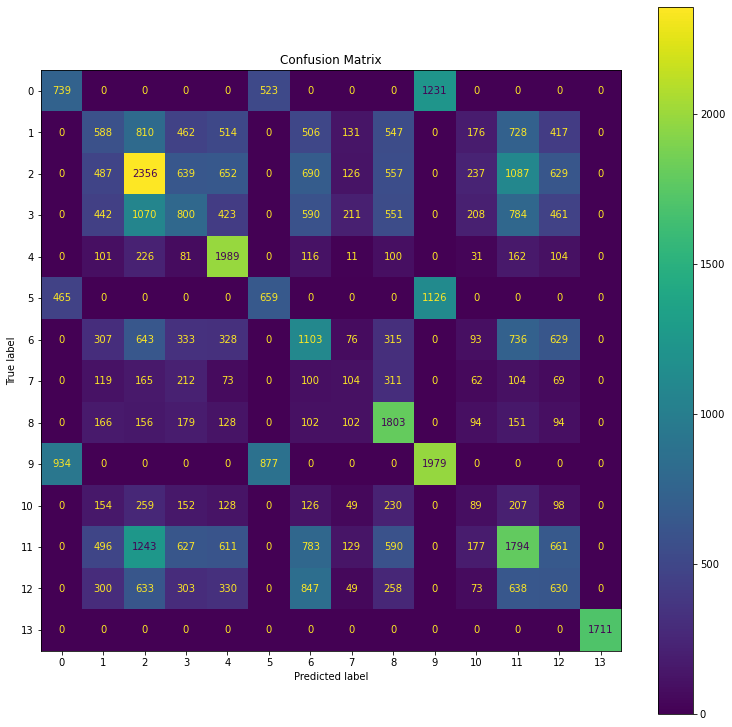

In [32]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Classification Report Results ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Confusion Matrix Results ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

### Interpreting Results ###

We want to look at various aspects of our classification report and confusion matrix  for our Grid-search tuned model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* Interestingly, we seem to still have some overfitting occuring, despite our grid search and early stopping rounds. We can see this when we look at the perfect precision, recall and F1 scores of Trespass of Real Property crimes, and again in our training classification report results being better than our testing results. We'll talk about implications and possible solutions later on in our final conclusion.


* Our recall values are still low, but we did see even more improvement from our initial CatBoost model for some of our crimes like Destruction/Damage/Vandalism of Property (.04), Aggravated Assault (.02 improvement), All Other Larceny (.02 improvement). However, some crimes also saw a decrease in recall value like Identity Theft (.05 decrease), Motor Vehicle Theft (.05 decrease), and Simple Assault (.04 decrease). Our highest recall value belonged to Identity Theft crimes again with a .68 value, followed by Shoplifting crimes with a .61 value, then Simple Assault crimes with a .52 value.   


* Our precision scores stayed low (below .46), and many of our precision scores decreased when compared to our initial CatBoost model. Most notably were Initimdation crimes (.03 decrease), Motor Vehicle Theft (.02 decrease), and Theft From Building (.02 decrease). However, we did see some improvements in recall score with Identity Theft (.02 improvement), and Shoplifting (.02 improvement).  Our highest precision scores belong to Simple Assault crimes with a score of .46, then Identity Theft crimes with a score of .38, then Aggravated Assault crimes with a score of .35.


* Lastly, we saw a mixture of increases and decreases in our F1 scores when compared to our initial CatBoost model. We saw increases in our recall scores when it came to crimes like Destruction/Damage/Vandalism of Property (.03 improvement), Intimidation (.02 improvement), and Shoplifting (.02 improvement). We saw decreases in crimes like Motor Vehicle Theft (.03 decrease), Intimidation (.02 decrease), and Simple Assault (.02). Our highest F1 score (excluding Trespass of Real Property crimes due to overfitting) was a tie between Simple Assault crimes and Identity Theft crimes with a score of .49, followed by Shoplifting crimes with a score of .44


**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Burglary/Breaking & Entering crimes (2,356) , then Identity Theft crimes (1,989), then Simple Assault crimes (1,979). The least instances belonged to Theft From Building crimes (89), Robbery crimes (104) and All Other Larceny crimes (588).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (5,317), then Burglary/Breaking & Entering crimes (5,104), then Destruction/Damage/Vandalism of Property crimes (4,740 ). The least instances belonged to Trespass of Real Property crimes (0), Identity Theft crimes (932), and Shoplifting crimes (1,172).


* For our instances of false positives, the most instances belonged to Burglary/Breaking & Entering crimes (5,205 ), then Theft From Motor Vehicle crimes (4,597), then Motor Vehicle Theft crimes (3,860). The least instances belonged to Trespass of Real Property crimes (0), Robbery crimes (884), and Theft From Building crimes (1,151). 


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,932),then Theft From Building crimes (51,918), then  then Robbery crimes (51,586). The least instances belonged to  Burglary/Breaking & Entering crimes (42,440), All Other Larceny crimes (44,863), and Destruction/Damage/Vandalism of Property crimes (46,650).

**From our results we can see that our tuned CatBoost model is overfitting, despite our precautions taken. Our precision, recall and F1 scores were still on the low side, and we didn't actually see that much improvement overall. Our tuned model seems to best predict new crimes as Simple Assault and Identity Theft crimes (in regards to overall precision/recall/F1 values, and our true positive values/false negative values). crime. Due to our initial model having better classification report values and higher instances of confusion matrix values, we'll say that the initial CatBoost model is the "best model". Next, we'll move on to predicting location of a new crime, and this time will only use a Catboost algorithm.**

# 2) Crime Location #

We'll also be looking at the location of crimes. Seattle has 5 precincts, or police station areas. They are: North, East, South, West and Southwest. Then, there are smaller geographical areas within the precincts called sectors. Finally, each sector is divided into 3 smaller sections called beats, which individual patrol officers are assigned responsibility for. We'll be looking at which beats crimes occur in, since beats are the smallest area we can look at. Below, we have an interactive Seattle Beat map. The user can zoom in on this map, to closer inspect precincts, beats, and even neighborhoods (MCPP) in Seattle. If the user has a specific address in mind, they can also type that into the search bar on the map. Keep in mind, that while looking at the notebook on Github, the interactive map may not show up, and the user may have to actually go to the physical notebook. We'll also provide a visual map for beats later on in the notebook.

In [33]:
url = 'https://seattlecitygis.maps.arcgis.com/apps/instant/lookup/index.html?appid=cf1b0198a1b94db5a8152c9f93232fa5'

In [34]:
IFrame(url, width='100%', height=500)

**Opening another df specifically preproccessed to set up "beat" as the target variable**

In [35]:
df_beat = pd.read_csv("seattle_crime_beat.csv")

**Displaying our df**

In [36]:
df_beat

Crime Against Category  Offense  Sector Beat  MCPP  Time  Day  Year
0                            2       44      22   U3    50  1753    6     0
1                            3       13       5   B2     4    77    2     0
2                            3       13      13   L2    43  1609    1     0
3                            2        9       8   E1     8  1715    1     0
4                            2       46      22   U2    58  1288    1     0
...                        ...      ...     ...  ...   ...   ...  ...   ...
104622                       2       33      24   W2     1   191    5     3
104623                       2       33      13   L2    43  1902    1     3
104624                       2       33       5   B1     4  1339    4     2
104625                       2       50      12   K3    11    39    3     2
104626                       1       21       7   D3    53   905    5     1

[104627 rows x 8 columns]

**Creating our target variable**

In [37]:
X_location = df_beat.drop("Beat", axis = 1)

#Target Variable
y_location = df_beat["Beat"]

**Performing our train-test split**

In [38]:
X_location_train, X_location_test, y_location_train, y_location_test = train_test_split(X_location, y_location, random_state = 1)

**Scaling our data**

In [39]:
SS = StandardScaler()
X_location_train = SS.fit_transform(X_location_train)
X_location_test = SS.transform(X_location_test)

**Let's check our df for any data imbalances**

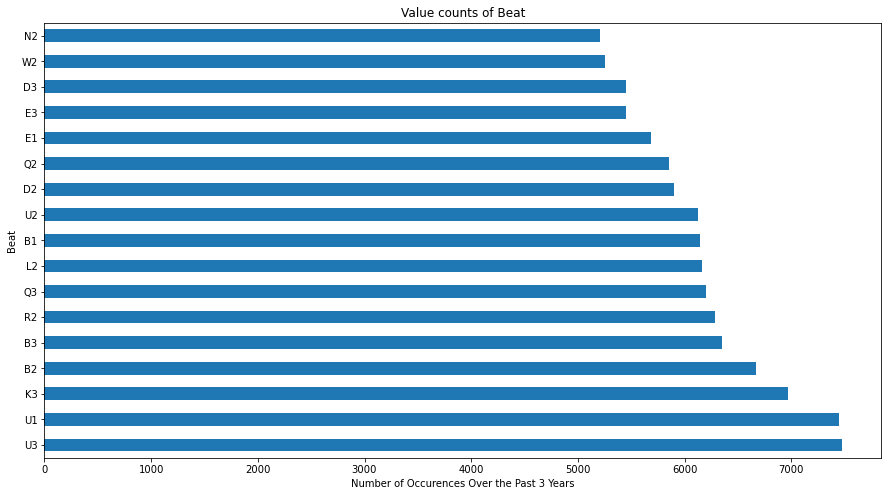

In [40]:
#Creating bar graph
ax = df_beat.value_counts('Beat').plot.barh(figsize = (15,8), title = "Value counts of Beat");
ax.set_xlabel("Number of Occurences Over the Past 3 Years");

**We see a slight imbalance, so we'll use SMOTE to address that**

In [41]:
sm = SMOTE(random_state = 1)
X_location_train, y_location_train = sm.fit_sample(X_location_train, y_location_train)

**Now that we've set up our data, let's start creating our initial model. We'll only be using a CatBoost model, (for both our initial model and tuned model) since it's best suited for categorical variable heavy data.**

## CatBoost Model ##

We'll be using CatBoost again for our model. We'l start off with a basic default model, but implement early stopping rounds to see if we can reduce overfitting from the start.

**Creating initial model**

In [42]:
CBC_beat = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [43]:
CBC_beat.fit(
    X_location_train, y_location_train,
    early_stopping_rounds=5,
    plot = True
)

CBC_location_train_pred = CBC_beat.predict(X_location_train)
CBC_location_test_pred = CBC_beat.predict(X_location_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.099858
0:	learn: 1.9881132	total: 74.1ms	remaining: 1m 14s
1:	learn: 1.6777520	total: 148ms	remaining: 1m 13s
2:	learn: 1.4383907	total: 224ms	remaining: 1m 14s
3:	learn: 1.2760023	total: 296ms	remaining: 1m 13s
4:	learn: 1.1483839	total: 366ms	remaining: 1m 12s
5:	learn: 1.0530416	total: 437ms	remaining: 1m 12s
6:	learn: 0.9710884	total: 515ms	remaining: 1m 13s
7:	learn: 0.9016932	total: 595ms	remaining: 1m 13s
8:	learn: 0.8435067	total: 670ms	remaining: 1m 13s
9:	learn: 0.7906495	total: 743ms	remaining: 1m 13s
10:	learn: 0.7462587	total: 816ms	remaining: 1m 13s
11:	learn: 0.7074829	total: 892ms	remaining: 1m 13s
12:	learn: 0.6742394	total: 966ms	remaining: 1m 13s
13:	learn: 0.6439842	total: 1.04s	remaining: 1m 13s
14:	learn: 0.6168474	total: 1.12s	remaining: 1m 13s
15:	learn: 0.5929939	total: 1.19s	remaining: 1m 13s
16:	learn: 0.5714097	total: 1.27s	remaining: 1m 13s
17:	learn: 0.5539011	total: 1.34s	remaining: 1m 13s
18:	learn: 0.5369705	total: 1.42s	remaining

161:	learn: 0.3336209	total: 12.2s	remaining: 1m 3s
162:	learn: 0.3335514	total: 12.3s	remaining: 1m 3s
163:	learn: 0.3334488	total: 12.4s	remaining: 1m 3s
164:	learn: 0.3333452	total: 12.5s	remaining: 1m 3s
165:	learn: 0.3331935	total: 12.5s	remaining: 1m 3s
166:	learn: 0.3330902	total: 12.6s	remaining: 1m 2s
167:	learn: 0.3329071	total: 12.7s	remaining: 1m 2s
168:	learn: 0.3327947	total: 12.8s	remaining: 1m 2s
169:	learn: 0.3327136	total: 12.8s	remaining: 1m 2s
170:	learn: 0.3326134	total: 12.9s	remaining: 1m 2s
171:	learn: 0.3325203	total: 13s	remaining: 1m 2s
172:	learn: 0.3324627	total: 13.1s	remaining: 1m 2s
173:	learn: 0.3323728	total: 13.1s	remaining: 1m 2s
174:	learn: 0.3322601	total: 13.2s	remaining: 1m 2s
175:	learn: 0.3321133	total: 13.3s	remaining: 1m 2s
176:	learn: 0.3320128	total: 13.4s	remaining: 1m 2s
177:	learn: 0.3319194	total: 13.5s	remaining: 1m 2s
178:	learn: 0.3318366	total: 13.5s	remaining: 1m 2s
179:	learn: 0.3317301	total: 13.6s	remaining: 1m 2s
180:	learn: 0.

322:	learn: 0.3223617	total: 24.3s	remaining: 50.9s
323:	learn: 0.3223344	total: 24.3s	remaining: 50.8s
324:	learn: 0.3223058	total: 24.4s	remaining: 50.7s
325:	learn: 0.3222297	total: 24.5s	remaining: 50.6s
326:	learn: 0.3221997	total: 24.6s	remaining: 50.6s
327:	learn: 0.3221579	total: 24.6s	remaining: 50.5s
328:	learn: 0.3221359	total: 24.7s	remaining: 50.4s
329:	learn: 0.3221048	total: 24.8s	remaining: 50.3s
330:	learn: 0.3220539	total: 24.9s	remaining: 50.2s
331:	learn: 0.3219939	total: 24.9s	remaining: 50.2s
332:	learn: 0.3219505	total: 25s	remaining: 50.1s
333:	learn: 0.3219273	total: 25.1s	remaining: 50s
334:	learn: 0.3218750	total: 25.2s	remaining: 49.9s
335:	learn: 0.3218440	total: 25.2s	remaining: 49.9s
336:	learn: 0.3217783	total: 25.3s	remaining: 49.8s
337:	learn: 0.3217257	total: 25.4s	remaining: 49.7s
338:	learn: 0.3216776	total: 25.5s	remaining: 49.6s
339:	learn: 0.3216428	total: 25.6s	remaining: 49.7s
340:	learn: 0.3215897	total: 25.7s	remaining: 49.7s
341:	learn: 0.32

483:	learn: 0.3157875	total: 36.2s	remaining: 38.6s
484:	learn: 0.3157359	total: 36.3s	remaining: 38.5s
485:	learn: 0.3156908	total: 36.3s	remaining: 38.4s
486:	learn: 0.3156478	total: 36.4s	remaining: 38.3s
487:	learn: 0.3156257	total: 36.5s	remaining: 38.3s
488:	learn: 0.3155990	total: 36.5s	remaining: 38.2s
489:	learn: 0.3155643	total: 36.6s	remaining: 38.1s
490:	learn: 0.3155183	total: 36.7s	remaining: 38s
491:	learn: 0.3154915	total: 36.8s	remaining: 38s
492:	learn: 0.3154528	total: 36.8s	remaining: 37.9s
493:	learn: 0.3154247	total: 36.9s	remaining: 37.8s
494:	learn: 0.3153997	total: 37s	remaining: 37.7s
495:	learn: 0.3153526	total: 37.1s	remaining: 37.7s
496:	learn: 0.3153109	total: 37.1s	remaining: 37.6s
497:	learn: 0.3152630	total: 37.2s	remaining: 37.5s
498:	learn: 0.3152202	total: 37.3s	remaining: 37.4s
499:	learn: 0.3151889	total: 37.4s	remaining: 37.4s
500:	learn: 0.3151459	total: 37.4s	remaining: 37.3s
501:	learn: 0.3151162	total: 37.5s	remaining: 37.2s
502:	learn: 0.3150

642:	learn: 0.3103953	total: 47.9s	remaining: 26.6s
643:	learn: 0.3103619	total: 48s	remaining: 26.5s
644:	learn: 0.3103399	total: 48.1s	remaining: 26.4s
645:	learn: 0.3103098	total: 48.1s	remaining: 26.4s
646:	learn: 0.3102889	total: 48.2s	remaining: 26.3s
647:	learn: 0.3102432	total: 48.3s	remaining: 26.2s
648:	learn: 0.3102160	total: 48.4s	remaining: 26.2s
649:	learn: 0.3101970	total: 48.4s	remaining: 26.1s
650:	learn: 0.3101693	total: 48.5s	remaining: 26s
651:	learn: 0.3101390	total: 48.6s	remaining: 25.9s
652:	learn: 0.3100878	total: 48.6s	remaining: 25.8s
653:	learn: 0.3100673	total: 48.7s	remaining: 25.8s
654:	learn: 0.3100578	total: 48.8s	remaining: 25.7s
655:	learn: 0.3100373	total: 48.9s	remaining: 25.6s
656:	learn: 0.3100066	total: 48.9s	remaining: 25.5s
657:	learn: 0.3099767	total: 49s	remaining: 25.5s
658:	learn: 0.3099498	total: 49.1s	remaining: 25.4s
659:	learn: 0.3098821	total: 49.2s	remaining: 25.3s
660:	learn: 0.3098632	total: 49.2s	remaining: 25.2s
661:	learn: 0.3098

801:	learn: 0.3060316	total: 59.7s	remaining: 14.7s
802:	learn: 0.3060051	total: 59.8s	remaining: 14.7s
803:	learn: 0.3059913	total: 59.9s	remaining: 14.6s
804:	learn: 0.3059724	total: 59.9s	remaining: 14.5s
805:	learn: 0.3059624	total: 1m	remaining: 14.4s
806:	learn: 0.3059491	total: 1m	remaining: 14.4s
807:	learn: 0.3059188	total: 1m	remaining: 14.3s
808:	learn: 0.3059053	total: 1m	remaining: 14.2s
809:	learn: 0.3058773	total: 1m	remaining: 14.1s
810:	learn: 0.3058592	total: 1m	remaining: 14.1s
811:	learn: 0.3058230	total: 1m	remaining: 14s
812:	learn: 0.3057947	total: 1m	remaining: 13.9s
813:	learn: 0.3057455	total: 1m	remaining: 13.8s
814:	learn: 0.3057148	total: 1m	remaining: 13.8s
815:	learn: 0.3057006	total: 1m	remaining: 13.7s
816:	learn: 0.3056752	total: 1m	remaining: 13.6s
817:	learn: 0.3056547	total: 1m	remaining: 13.6s
818:	learn: 0.3056358	total: 1m	remaining: 13.5s
819:	learn: 0.3056142	total: 1m 1s	remaining: 13.4s
820:	learn: 0.3055620	total: 1m 1s	remaining: 13.3s
821:

961:	learn: 0.3022688	total: 1m 11s	remaining: 2.84s
962:	learn: 0.3022623	total: 1m 11s	remaining: 2.76s
963:	learn: 0.3022344	total: 1m 12s	remaining: 2.69s
964:	learn: 0.3021985	total: 1m 12s	remaining: 2.62s
965:	learn: 0.3021887	total: 1m 12s	remaining: 2.54s
966:	learn: 0.3021662	total: 1m 12s	remaining: 2.47s
967:	learn: 0.3021593	total: 1m 12s	remaining: 2.39s
968:	learn: 0.3021219	total: 1m 12s	remaining: 2.32s
969:	learn: 0.3020803	total: 1m 12s	remaining: 2.24s
970:	learn: 0.3020644	total: 1m 12s	remaining: 2.17s
971:	learn: 0.3020486	total: 1m 12s	remaining: 2.09s
972:	learn: 0.3020327	total: 1m 12s	remaining: 2.02s
973:	learn: 0.3020141	total: 1m 12s	remaining: 1.94s
974:	learn: 0.3019833	total: 1m 12s	remaining: 1.87s
975:	learn: 0.3019665	total: 1m 12s	remaining: 1.79s
976:	learn: 0.3019473	total: 1m 13s	remaining: 1.72s
977:	learn: 0.3019197	total: 1m 13s	remaining: 1.64s
978:	learn: 0.3019154	total: 1m 13s	remaining: 1.57s
979:	learn: 0.3018947	total: 1m 13s	remaining:

### Beat Map ###

Below, a non-interactive Beat map is given to provide reference to where each beat in our classification report and confusion matrix is.

In [44]:
Image(url= "https://www.seattle.gov/images/Departments/Police/aboutUs/precinctmap.png",width=450, height=450)

### Classification Report ###

**Printing our training results**

In [45]:
print(classification_report(y_location_train, CBC_location_train_pred))

              precision    recall  f1-score   support

          B1       0.73      0.98      0.84      5638
          B2       0.74      0.63      0.68      5638
          B3       0.99      0.80      0.88      5638
          D2       0.82      0.74      0.78      5638
          D3       0.76      0.84      0.80      5638
          E1       0.80      1.00      0.89      5638
          E3       1.00      0.75      0.86      5638
          K3       1.00      1.00      1.00      5638
          L2       1.00      1.00      1.00      5638
          N2       1.00      1.00      1.00      5638
          Q2       0.69      0.77      0.72      5638
          Q3       0.74      0.65      0.69      5638
          R2       1.00      1.00      1.00      5638
          U1       0.68      0.54      0.60      5638
          U2       0.71      0.95      0.81      5638
          U3       0.90      0.78      0.84      5638
          W2       1.00      1.00      1.00      5638

    accuracy              

**Printing our testing results**

In [46]:
print(classification_report(y_location_test, CBC_location_test_pred))

              precision    recall  f1-score   support

          B1       0.68      0.95      0.80      1523
          B2       0.68      0.58      0.63      1686
          B3       0.96      0.75      0.84      1586
          D2       0.76      0.66      0.71      1435
          D3       0.68      0.77      0.72      1311
          E1       0.78      0.99      0.87      1415
          E3       0.99      0.71      0.83      1401
          K3       1.00      1.00      1.00      1748
          L2       1.00      1.00      1.00      1604
          N2       1.00      1.00      1.00      1282
          Q2       0.62      0.70      0.66      1497
          Q3       0.66      0.57      0.61      1522
          R2       1.00      1.00      1.00      1601
          U1       0.58      0.48      0.52      1813
          U2       0.63      0.90      0.75      1543
          U3       0.89      0.74      0.81      1911
          W2       1.00      1.00      1.00      1279

    accuracy              

### Confusion Matrix ###

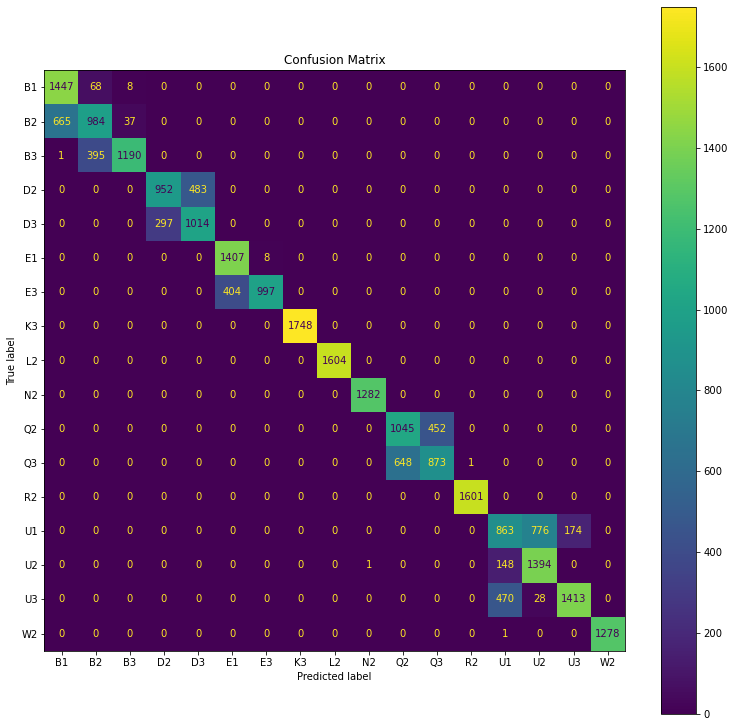

In [47]:
cm = confusion_matrix(y_location_test, CBC_location_test_pred);
cmp = ConfusionMatrixDisplay(cm, display_labels = CBC_beat.classes_);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Classification Report Results ###

Let's take a look at our classification report test results for each beat:

**B1**

For our B1 results, we have a precision score of .68, a recall score of .95, and an f1 score of .80. This means that:


* Out of all the crime locations that the model predicted would be in the B1 beat, 68% were actually in the B1 beat.
* Out of all the crime locations that were in the B1 beat, the model correctly predicted 95% of them.
* There is an f1 score of .80, indicating high performance on predicting probability of the crime being in the B1 beat.

**B2**

For our B2 results, we have a precision score of .68, a recall score of .58, and an f1 score of .63. This means that:


* Out of all the crime locations that the model predicted would be in the B2 beat, 68% were actually in the B2 beat.
* Out of all the crime locations that were in the B2 beat, the model correctly predicted 58% of them.
* There is an f1 score of .63, indicating lower performance on predicting probability of the crime being in the B2 beat.

**B3**

For our B3 results, we have a precision score of .96, a recall score of .75, and an f1 score of .84. This means that:


* Out of all the crime locations that the model predicted would be in the B3 beat, 96% were actually in the B3 beat.
* Out of all the crime locations that were in the B3 beat, the model correctly predicted 75% of them.
* There is an f1 score of .84, indicating high performance on predicting probability of the crime being in the B3 beat.

**D2**

For our D2 results, we have a precision score of .76, a recall score of .66, and an f1 score of .71. This means that:


* Out of all the crime locations that the model predicted would be in the D2 beat, 76% were actually in the D2 beat.
* Out of all the crime locations that were in the D2 beat, the model correctly predicted 66% of them.
* There is an f1 score of .71, indicating lower performance on predicting probability of the crime being in the D2 beat.

**D3**

For our D3 results, we have a precision score of .68, a recall score of .77, and an f1 score of .72. This means that:


* Out of all the crime locations that the model predicted would be in the D3 beat, 68% were actually in the D3 beat.
* Out of all the crime locations that were in the D3 beat, the model correctly predicted 77% of them.
* There is an f1 score of .72, indicating lower performance on predicting probability of the crime being in the D3 beat.

**E1**

For our E1 results, we have a precision score of .78, a recall score of .99, and an f1 score of .87. This means that:


* Out of all the crime locations that the model predicted would be in the E1 beat, 78% were actually in the E1 beat.
* Out of all the crime locations that were in the E1 beat, the model correctly predicted 99% of them.
* There is an f1 score of .87, indicating high performance on predicting probability of the crime being in the E1 beat.

**E3**

For our E3 results, we have a precision score of .99, a recall score of .71, and an f1 score of .83. This means that:


* Out of all the crime locations that the model predicted would be in the E3 beat, 99% were actually in the E3 beat.
* Out of all the crime locations that were in the E3 beat, the model correctly predicted 71% of them.
* There is an f1 score of .83, indicating high performance on predicting probability of the crime being in the E3 beat.

**K3**

For our K3 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the K3 beat, 100% were actually in the K3 beat.
* Out of all the crime locations that were in the K3 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible on predicting probability of the crime being in the K3 beat.

**L2**

For our L2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the L2 beat, 100% were actually in the L2 beat.
* Out of all the crime locations that were in the L2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible" on predicting probability of the crime being in the L2 beat.

**N2**

For our N2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the N2 beat, 100% were actually in the N2 beat.
* Out of all the crime locations that were in the N2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the N2 beat.

**Q2**

For our Q2 results, we have a precision score of .62, a recall score of .70, and an f1 score of .66. This means that:


* Out of all the crime locations that the model predicted would be in the Q2 beat, 62% were actually in the Q2 beat.
* Out of all the crime locations that were in the Q2 beat, the model correctly predicted 70% of them.
* There is an f1 score of .66, indicating lower performance on predicting probability of the crime being in the Q2 beat.

**Q3**

For our Q3 results, we have a precision score of .66, a recall score of .57, and an f1 score of .61. This means that:


* Out of all the crime locations that the model predicted would be in the Q3 beat, 66% were actually in the Q3 beat.
* Out of all the crime locations that were in the Q3 beat, the model correctly predicted 57% of them.
* There is an f1 score of .61, indicating lower performance on predicting probability of the crime being in the Q3 beat.

**R2**

For our R2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the R2 beat, 100% were actually in the R2 beat.
* Out of all the crime locations that were in the R2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the R2 beat.

**U1**

For our U1 results, we have a precision score of .58, a recall score of .48, and an f1 score of .52. This means that:


* Out of all the crime locations that the model predicted would be in the U1 beat, 58% were actually in the U1 beat.
* Out of all the crime locations that were in the U1 beat, the model correctly predicted 48% of them.
* There is an f1 score of .52, indicating low performance on predicting probability of the crime being in the U1 beat.

**U2**

For our U2 results, we have a precision score of .63, a recall score of .90, and an f1 score of .75. This means that:


* Out of all the crime locations that the model predicted would be in the U2 beat, 63% were actually in the U2 beat.
* Out of all the crime locations that were in the U2 beat, the model correctly predicted 90% of them.
* There is an f1 score of .75, indicating lower performance on predicting probability of the crime being in the U2 beat.

**U3**

For our U3 results, we have a precision score of .89, a recall score of .74, and an f1 score of .81. This means that:


* Out of all the crime locations that the model predicted would be in the U3 beat, 89% were actually in the U3 beat.
* Out of all the crime locations that were in the U3 beat, the model correctly predicted 74% of them.
* There is an f1 score of .81, indicating high performance on predicting probability of the crime being in the U3 beat.

**W2**

For our W2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the W2 beat, 100% were actually in the W2 beat.
* Out of all the crime locations that were in the W2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the W2 beat.

### Confusion Matrix Results ###

Let's take a look at our test model classification report results:

**B1**

* 1,447 crime locations were correctly predicted as being in the B1 beat.
* 76 crime locations were wrongly predicted as not being in the B1 beat.
* 665 crime locations were wrongly predicted as being in the B1 beat.
* 22,765 crime locations were correctly predicted as not being in the B1 beat.

**B2**

* 984 crime locations were correctly predicted as being in the B2 beat.
* 702 crime locations were wrongly predicted as not being in the B2 beat.
* 463 crime locations were wrongly predicted as being in the B2 beat.
* 24,733 crime locations were correctly predicted as not being in the B2 beat.

**B3**

* 1,190 crime locations were correctly predicted as being in the B3 beat.
* 396 crime locations were wrongly predicted as not being in the B3 beat.
* 45 crime locations were wrongly predicted as being in the B3 beat.
* 24,967 crime locations were correctly predicted as not being in the B3 beat.

**D2**

* 952 crime locations were correctly predicted as being in the D2 beat.
* 483 crime locations were wrongly predicted as not being in the D2 beat.
* 297 crime locations were wrongly predicted as being in the D2 beat.
* 24,425 crime locations were correctly predicted as not being in the D2 beat.

**D3**

* 1,014 crime locations were correctly predicted as being in the D3 beat.
* 297 crime locations were wrongly predicted as not being in the D3 beat.
* 483 crime locations were wrongly predicted as being in the D3 beat.
* 25,143 crime locations were correctly predicted as not being in the D3 beat.

**E1**

* 1,407 crime locations were correctly predicted as being in the E1 beat.
* 8 crime locations were wrongly predicted as not being in the E1 beat.
* 404 crime locations were wrongly predicted as being in the E1 beat.
* 24,388 crime locations were correctly predicted as not being in the E1 beat.

**E3**

* 997 crime locations were correctly predicted as being in the E3 beat.
* 404 crime locations were wrongly predicted as not being in the E3 beat.
* 8 crime locations were wrongly predicted as being in the E3 beat.
* 25,160 crime locations were correctly predicted as not being in the E3 beat.

**K3**

* 1,748 crime locations were correctly predicted as being in the K3 beat.
* 0 crime locations were wrongly predicted as not being in the K3 beat.
* 0 crime locations were wrongly predicted as being in the K3 beat.
* 24,409 crime locations were correctly predicted as not being in the K3 beat.

**L2**

* 1,604 crime locations were correctly predicted as being in the L2 beat.
* 0 crime locations were wrongly predicted as not being in the L2 beat.
* 0 crime locations were wrongly predicted as being in the L2 beat.
* 26,154 crime locations were correctly predicted as not being in the L2 beat.

**N2**

* 1,282 crime locations were correctly predicted as being in the N2 beat.
* 0 crime locations were wrongly predicted as not being in the N2 beat.
* 1 crime locations were wrongly predicted as being in the N2 beat.
* 24,874 crime locations were correctly predicted as not being in the N2 beat.

**Q2**

* 1,045 crime locations were correctly predicted as being in the Q2 beat.
* 452 crime locations were wrongly predicted as not being in the Q2 beat.
* 648 crime locations were wrongly predicted as being in the Q2 beat.
* 24,012 crime locations were correctly not predicted as being in the Q2 beat.

**Q3**

* 873 crime locations were correctly predicted as being in the Q3 beat.
* 649 crime locations were wrongly predicted as not being in the Q3 beat.
* 452 crime locations were wrongly predicted as being in the Q3 beat.
* 25,283 crime locations were correctly predicted as not being in the Q3 beat.

**R2**

* 1,601 crime locations were correctly predicted as being in the R2 beat.
* 0 crime locations were wrongly predicted as not being in the R2 beat.
* 1 crime locations were wrongly predicted as being in the R2 beat.
* 24,556 crime locations were correctly predicted as not being in the R2 beat.

**U1**

* 863 crime locations were correctly predicted as being in the U1 beat.
* 950 crime locations were wrongly predicted as not being in the U1 beat.
* 619 crime locations were wrongly predicted as being in the U1 beat.
* 23,725 crime locations were correctly predicted as not being in the U1 beat.

**U2**

* 1,394 crime locations were correctly predicted as being in the U2 beat.
* 149 crime locations were wrongly predicted as not being in the U2 beat.
* 804 crime locations were wrongly predicted as being in the U2 beat.
* 24,734 crime locations were correctly predicted as not being in the U2 beat.

**U3**

* 1,413 crime locations were correctly predicted as being in the U3 beat.
* 498 crime locations were wrongly predicted as not being in the U3 beat.
* 174 crime locations were wrongly predicted as being in the U3 beat.
* 22,743 crime locations were correctly predicted as not being in the U3 beat.

**W2**

* 1,278 crime locations were correctly predicted as being in the W2 beat.
* 1 crime locations were wrongly predicted as not being in the W2 beat.
* 0 crime locations were wrongly predicted as being in the W2 beat.
* 23,335 crime locations were correctly predicted as not being in the W2 beat.

### Interpreting Results ###

We want to look at various aspects of our classification report and confusion matrix in regards to the location a crime is committed. In particular (for our classification report) we want to look at recall, since that will give us the most realistic look at how our model performs. Recall in this case asks the question of "Out of the actual total number of a certain crime location, how many locations did our model accurately classify/predict to be that location?". We'll also take a look at the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* Again, despite our early stopping rounds and use of the CatBoost algorithm, we see alot of overfitting occuring. We can see this when we look at the perfect precision, recall and F1 scores of our K3, L2, R2, N2 and W2 beats. It is also evident in our training classification report results being better than our testing results.  We'll talk about implications and possible solutions later on in our final conclusion.


* Our recall values are much higher than when we looked at type of crime in our previous models. Our highest recall values (apart from our overfitting values) belonged to the E1 beat (.99), the B1 beat (.95), and the U2 beat (.90).  


* Our precision scores are also relatively high, with our lowest recall score being .58 (U1). Our highest precision scores (apart from our overfitting values) belonged to the E3 beat (.99), the B3 beat (.96), and the U3 beat (.89).


* Lastly, our F1 scores are also somewhat high. Apart from our overfitting values, our highest F1 score belonged to the E1 beat (.87), the B3 beat (.84), and the E3 beat (.83).

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to the K3 beat (1,748) , then the L2 beat (1,604), then the R2 beat (1,601). The least instances belonged to the U1 beat  (863), the Q3 beat (873), and the D2 beat (952).


* For our instances of false negatives, the most instances belonged to the U1 beat (950) , then the B2 beat (702), then the Q3 beat (649). The least instances was a tie between the K3 beat, L2 beat, R2 beat, and N2 beat all with 0 instances.



* For our instances of false positives, the most instances belonged to the U2 beat (804) , then the B1 beat (665), then the Q2 beat (648). The least instances was a tie between the W2 beat, L2 beat, and the K3 beat, all with 0 instances.


* Lastly, for our instances of true negatives, the most instances belonged to the L2 beat (26,154) , then the Q3 beat (25,283), then the E3 beat (25,160). The least instances belonged to the B1 beat (22,765), then the U3 beat (22,743), and the W2 beat (23,335).


**From our results we can see that our CatBoost model is overfitting, despite our precautions taken. This could explain why our precision, recall and F1 scores are much higher when compared to our crime type model. Our initial model seems to best predict new crime locations as being in the El, E3, and L2 beats (in regards to overall precision/recall values, and our true positive values as well as false positive/negative values). Let's try using a Grid-search to see if we can somewhat reduce overfitting, and get classification report values that aren't overfitting.**

## Grid-Search CBC Model ##

Let's attempt to tune our CatBoost model, via Grid-search. We'll use a Grid-search (along with early stopping rounds) to see if we can reduce the overfitting occuring, and to see if finding our optimal criteria will help modify our classification report values.

**Let's create our Grid-search with our various parameters**

In [48]:
#Grid-search params
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [ ]:
CBC_gs2 = GridSearchCV(CBC_beat, params)
CBC_gs2.fit(X_location_train, y_location_train, early_stopping_rounds=5, plot = True)
CBC_gs2.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6971732	total: 28.8ms	remaining: 2.85s
1:	learn: 2.5906159	total: 54.6ms	remaining: 2.67s
2:	learn: 2.5130872	total: 79.7ms	remaining: 2.58s
3:	learn: 2.4173465	total: 107ms	remaining: 2.57s
4:	learn: 2.3259809	total: 136ms	remaining: 2.58s
5:	learn: 2.2790647	total: 161ms	remaining: 2.52s
6:	learn: 2.2135767	total: 188ms	remaining: 2.5s
7:	learn: 2.1495420	total: 217ms	remaining: 2.49s
8:	learn: 2.0849323	total: 246ms	remaining: 2.48s
9:	learn: 2.0294641	total: 273ms	remaining: 2.46s
10:	learn: 1.9751806	total: 302ms	remaining: 2.44s
11:	learn: 1.9177614	total: 332ms	remaining: 2.43s
12:	learn: 1.8572984	total: 361ms	remaining: 2.41s
13:	learn: 1.8174320	total: 388ms	remaining: 2.38s
14:	learn: 1.7753500	total: 416ms	remaining: 2.36s
15:	learn: 1.7439871	total: 442ms	remaining: 2.32s
16:	learn: 1.7100383	total: 470ms	remaining: 2.29s
17:	learn: 1.6754194	total: 497ms	remaining: 2.26s
18:	learn: 1.6392276	total: 525ms	remaining: 2.24s
19:	learn: 1.5975541	total: 554ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6970834	total: 31.7ms	remaining: 3.14s
1:	learn: 2.5902139	total: 62.7ms	remaining: 3.07s
2:	learn: 2.5126690	total: 93.9ms	remaining: 3.04s
3:	learn: 2.4169105	total: 126ms	remaining: 3.02s
4:	learn: 2.3254600	total: 160ms	remaining: 3.04s
5:	learn: 2.2785430	total: 188ms	remaining: 2.94s
6:	learn: 2.2130263	total: 218ms	remaining: 2.9s
7:	learn: 2.1488428	total: 250ms	remaining: 2.87s
8:	learn: 2.0841795	total: 280ms	remaining: 2.83s
9:	learn: 2.0287425	total: 309ms	remaining: 2.78s
10:	learn: 1.9744400	total: 339ms	remaining: 2.74s
11:	learn: 1.9169363	total: 367ms	remaining: 2.69s
12:	learn: 1.8565838	total: 399ms	remaining: 2.67s
13:	learn: 1.8167230	total: 428ms	remaining: 2.63s
14:	learn: 1.7745558	total: 459ms	remaining: 2.6s
15:	learn: 1.7431805	total: 484ms	remaining: 2.54s
16:	learn: 1.7091623	total: 511ms	remaining: 2.5s
17:	learn: 1.6746210	total: 540ms	remaining: 2.46s
18:	learn: 1.6384463	total: 572ms	remaining: 2.44s
19:	learn: 1.5967104	total: 606ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.7003460	total: 33.2ms	remaining: 3.29s
1:	learn: 2.5932240	total: 64.3ms	remaining: 3.15s
2:	learn: 2.5156419	total: 94ms	remaining: 3.04s
3:	learn: 2.4195887	total: 124ms	remaining: 2.98s
4:	learn: 2.3279745	total: 155ms	remaining: 2.94s
5:	learn: 2.2810391	total: 184ms	remaining: 2.88s
6:	learn: 2.2143169	total: 215ms	remaining: 2.85s
7:	learn: 2.1502422	total: 250ms	remaining: 2.88s
8:	learn: 2.0864992	total: 281ms	remaining: 2.84s
9:	learn: 2.0311199	total: 309ms	remaining: 2.78s
10:	learn: 1.9758158	total: 337ms	remaining: 2.73s
11:	learn: 1.9183159	total: 368ms	remaining: 2.7s
12:	learn: 1.8578346	total: 398ms	remaining: 2.66s
13:	learn: 1.8179828	total: 424ms	remaining: 2.61s
14:	learn: 1.7805619	total: 453ms	remaining: 2.57s
15:	learn: 1.7438672	total: 486ms	remaining: 2.55s
16:	learn: 1.7006741	total: 519ms	remaining: 2.53s
17:	learn: 1.6615887	total: 549ms	remaining: 2.5s
18:	learn: 1.6285035	total: 579ms	remaining: 2.47s
19:	learn: 1.5858780	total: 611ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6972015	total: 32ms	remaining: 3.16s
1:	learn: 2.5837717	total: 60.3ms	remaining: 2.96s
2:	learn: 2.5083583	total: 88.7ms	remaining: 2.87s
3:	learn: 2.4073062	total: 121ms	remaining: 2.9s
4:	learn: 2.3337954	total: 157ms	remaining: 2.98s
5:	learn: 2.2630077	total: 193ms	remaining: 3.02s
6:	learn: 2.2084146	total: 224ms	remaining: 2.98s
7:	learn: 2.1472801	total: 258ms	remaining: 2.97s
8:	learn: 2.0829084	total: 288ms	remaining: 2.91s
9:	learn: 2.0140676	total: 318ms	remaining: 2.86s
10:	learn: 1.9593508	total: 347ms	remaining: 2.81s
11:	learn: 1.9016208	total: 377ms	remaining: 2.77s
12:	learn: 1.8561210	total: 405ms	remaining: 2.71s
13:	learn: 1.8174195	total: 433ms	remaining: 2.66s
14:	learn: 1.7659537	total: 464ms	remaining: 2.63s
15:	learn: 1.7340544	total: 491ms	remaining: 2.58s
16:	learn: 1.6999286	total: 519ms	remaining: 2.54s
17:	learn: 1.6663437	total: 548ms	remaining: 2.49s
18:	learn: 1.6307264	total: 576ms	remaining: 2.46s
19:	learn: 1.5972748	total: 604ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6973605	total: 28.8ms	remaining: 2.85s
1:	learn: 2.5800837	total: 57ms	remaining: 2.79s
2:	learn: 2.4779887	total: 88.9ms	remaining: 2.87s
3:	learn: 2.3847320	total: 115ms	remaining: 2.77s
4:	learn: 2.3000876	total: 144ms	remaining: 2.73s
5:	learn: 2.2367888	total: 170ms	remaining: 2.66s
6:	learn: 2.1871451	total: 197ms	remaining: 2.61s
7:	learn: 2.1128685	total: 226ms	remaining: 2.6s
8:	learn: 2.0700487	total: 252ms	remaining: 2.54s
9:	learn: 2.0204991	total: 279ms	remaining: 2.51s
10:	learn: 1.9697052	total: 308ms	remaining: 2.49s
11:	learn: 1.9224019	total: 337ms	remaining: 2.47s
12:	learn: 1.8763420	total: 366ms	remaining: 2.45s
13:	learn: 1.8301784	total: 393ms	remaining: 2.42s
14:	learn: 1.7807712	total: 423ms	remaining: 2.4s
15:	learn: 1.7344897	total: 452ms	remaining: 2.38s
16:	learn: 1.6994704	total: 484ms	remaining: 2.36s
17:	learn: 1.6580382	total: 513ms	remaining: 2.34s
18:	learn: 1.6226879	total: 539ms	remaining: 2.3s
19:	learn: 1.5926404	total: 565ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5693659	total: 33.4ms	remaining: 3.31s
1:	learn: 2.3807157	total: 64.6ms	remaining: 3.17s
2:	learn: 2.2552465	total: 97.2ms	remaining: 3.14s
3:	learn: 2.1072038	total: 128ms	remaining: 3.07s
4:	learn: 1.9641574	total: 162ms	remaining: 3.08s
5:	learn: 1.8795747	total: 190ms	remaining: 2.98s
6:	learn: 1.7966754	total: 220ms	remaining: 2.92s
7:	learn: 1.6960980	total: 250ms	remaining: 2.87s
8:	learn: 1.6104305	total: 278ms	remaining: 2.81s
9:	learn: 1.5564281	total: 311ms	remaining: 2.79s
10:	learn: 1.5048959	total: 337ms	remaining: 2.73s
11:	learn: 1.4489682	total: 366ms	remaining: 2.69s
12:	learn: 1.4069924	total: 395ms	remaining: 2.64s
13:	learn: 1.3513712	total: 425ms	remaining: 2.61s
14:	learn: 1.3094289	total: 452ms	remaining: 2.56s
15:	learn: 1.2654417	total: 480ms	remaining: 2.52s
16:	learn: 1.2194076	total: 508ms	remaining: 2.48s
17:	learn: 1.1766368	total: 539ms	remaining: 2.45s
18:	learn: 1.1412493	total: 567ms	remaining: 2.42s
19:	learn: 1.1108376	total: 595ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5691911	total: 30.1ms	remaining: 2.98s
1:	learn: 2.3800344	total: 57.5ms	remaining: 2.82s
2:	learn: 2.2545289	total: 85.3ms	remaining: 2.76s
3:	learn: 2.1067041	total: 116ms	remaining: 2.78s
4:	learn: 1.9629641	total: 147ms	remaining: 2.79s
5:	learn: 1.9054857	total: 174ms	remaining: 2.73s
6:	learn: 1.8189283	total: 203ms	remaining: 2.7s
7:	learn: 1.7324662	total: 231ms	remaining: 2.66s
8:	learn: 1.6539287	total: 260ms	remaining: 2.63s
9:	learn: 1.5770022	total: 290ms	remaining: 2.61s
10:	learn: 1.5173536	total: 318ms	remaining: 2.57s
11:	learn: 1.4661507	total: 345ms	remaining: 2.53s
12:	learn: 1.3995292	total: 376ms	remaining: 2.52s
13:	learn: 1.3456272	total: 405ms	remaining: 2.49s
14:	learn: 1.3096379	total: 433ms	remaining: 2.45s
15:	learn: 1.2730438	total: 462ms	remaining: 2.43s
16:	learn: 1.2410862	total: 492ms	remaining: 2.4s
17:	learn: 1.1932111	total: 523ms	remaining: 2.38s
18:	learn: 1.1512919	total: 554ms	remaining: 2.36s
19:	learn: 1.1204573	total: 582ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5755315	total: 30.8ms	remaining: 3.05s
1:	learn: 2.3850535	total: 57.6ms	remaining: 2.82s
2:	learn: 2.2593677	total: 86.1ms	remaining: 2.78s
3:	learn: 2.1117350	total: 116ms	remaining: 2.78s
4:	learn: 1.9676471	total: 146ms	remaining: 2.78s
5:	learn: 1.8732957	total: 176ms	remaining: 2.75s
6:	learn: 1.7905703	total: 202ms	remaining: 2.69s
7:	learn: 1.7044796	total: 229ms	remaining: 2.64s
8:	learn: 1.6272450	total: 261ms	remaining: 2.64s
9:	learn: 1.5740074	total: 293ms	remaining: 2.64s
10:	learn: 1.4955789	total: 327ms	remaining: 2.65s
11:	learn: 1.4449964	total: 359ms	remaining: 2.63s
12:	learn: 1.3839942	total: 391ms	remaining: 2.61s
13:	learn: 1.3316206	total: 419ms	remaining: 2.57s
14:	learn: 1.2991965	total: 445ms	remaining: 2.52s
15:	learn: 1.2568889	total: 472ms	remaining: 2.48s
16:	learn: 1.2196081	total: 499ms	remaining: 2.43s
17:	learn: 1.1988281	total: 524ms	remaining: 2.39s
18:	learn: 1.1658492	total: 551ms	remaining: 2.35s
19:	learn: 1.1378728	total: 578ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5694211	total: 28.9ms	remaining: 2.86s
1:	learn: 2.3683371	total: 54.7ms	remaining: 2.68s
2:	learn: 2.2453426	total: 80.4ms	remaining: 2.6s
3:	learn: 2.0987983	total: 107ms	remaining: 2.57s
4:	learn: 1.9850479	total: 135ms	remaining: 2.57s
5:	learn: 1.8860070	total: 162ms	remaining: 2.54s
6:	learn: 1.8034534	total: 189ms	remaining: 2.51s
7:	learn: 1.6990033	total: 217ms	remaining: 2.49s
8:	learn: 1.6233806	total: 244ms	remaining: 2.47s
9:	learn: 1.5484329	total: 273ms	remaining: 2.46s
10:	learn: 1.4954931	total: 301ms	remaining: 2.43s
11:	learn: 1.4367461	total: 328ms	remaining: 2.41s
12:	learn: 1.3951507	total: 354ms	remaining: 2.37s
13:	learn: 1.3332138	total: 382ms	remaining: 2.35s
14:	learn: 1.2959039	total: 408ms	remaining: 2.31s
15:	learn: 1.2530884	total: 438ms	remaining: 2.3s
16:	learn: 1.2183890	total: 464ms	remaining: 2.26s
17:	learn: 1.1862022	total: 489ms	remaining: 2.23s
18:	learn: 1.1482156	total: 517ms	remaining: 2.2s
19:	learn: 1.1166552	total: 544ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5713026	total: 30.4ms	remaining: 3.01s
1:	learn: 2.3682814	total: 58.1ms	remaining: 2.85s
2:	learn: 2.1922835	total: 86.5ms	remaining: 2.8s
3:	learn: 2.0617054	total: 115ms	remaining: 2.76s
4:	learn: 1.9312686	total: 144ms	remaining: 2.74s
5:	learn: 1.8291704	total: 173ms	remaining: 2.71s
6:	learn: 1.7545083	total: 200ms	remaining: 2.66s
7:	learn: 1.6709544	total: 227ms	remaining: 2.61s
8:	learn: 1.5844802	total: 258ms	remaining: 2.61s
9:	learn: 1.5319453	total: 284ms	remaining: 2.56s
10:	learn: 1.4715535	total: 312ms	remaining: 2.53s
11:	learn: 1.4063897	total: 342ms	remaining: 2.51s
12:	learn: 1.3642054	total: 369ms	remaining: 2.47s
13:	learn: 1.3131660	total: 398ms	remaining: 2.44s
14:	learn: 1.2776651	total: 425ms	remaining: 2.41s
15:	learn: 1.2423570	total: 452ms	remaining: 2.37s
16:	learn: 1.2099223	total: 480ms	remaining: 2.34s
17:	learn: 1.1786068	total: 507ms	remaining: 2.31s
18:	learn: 1.1459601	total: 533ms	remaining: 2.27s
19:	learn: 1.1030814	total: 563ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9314635	total: 29.8ms	remaining: 2.95s
1:	learn: 1.4301812	total: 56.1ms	remaining: 2.75s
2:	learn: 1.0467084	total: 85.3ms	remaining: 2.76s
3:	learn: 0.9406649	total: 111ms	remaining: 2.67s
4:	learn: 0.7909223	total: 141ms	remaining: 2.67s
5:	learn: 0.7002604	total: 169ms	remaining: 2.65s
6:	learn: 0.6471843	total: 196ms	remaining: 2.61s
7:	learn: 0.6034609	total: 224ms	remaining: 2.57s
8:	learn: 0.5754884	total: 250ms	remaining: 2.52s
9:	learn: 0.5441123	total: 278ms	remaining: 2.5s
10:	learn: 0.5107873	total: 305ms	remaining: 2.47s
11:	learn: 0.4834440	total: 336ms	remaining: 2.46s
12:	learn: 0.4736651	total: 364ms	remaining: 2.44s
13:	learn: 0.4574935	total: 391ms	remaining: 2.4s
14:	learn: 0.4474316	total: 420ms	remaining: 2.38s
15:	learn: 0.4348380	total: 448ms	remaining: 2.35s
16:	learn: 0.4238642	total: 478ms	remaining: 2.33s
17:	learn: 0.4191386	total: 504ms	remaining: 2.3s
18:	learn: 0.4162096	total: 533ms	remaining: 2.27s
19:	learn: 0.4071281	total: 562ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9307287	total: 29.8ms	remaining: 2.95s
1:	learn: 1.4290926	total: 55.5ms	remaining: 2.72s
2:	learn: 1.0458797	total: 86.1ms	remaining: 2.78s
3:	learn: 0.9395340	total: 112ms	remaining: 2.69s
4:	learn: 0.7898751	total: 141ms	remaining: 2.68s
5:	learn: 0.6991819	total: 170ms	remaining: 2.67s
6:	learn: 0.6461692	total: 201ms	remaining: 2.67s
7:	learn: 0.6017023	total: 234ms	remaining: 2.69s
8:	learn: 0.5737649	total: 260ms	remaining: 2.63s
9:	learn: 0.5422950	total: 287ms	remaining: 2.59s
10:	learn: 0.5089826	total: 317ms	remaining: 2.56s
11:	learn: 0.4817059	total: 347ms	remaining: 2.55s
12:	learn: 0.4717779	total: 375ms	remaining: 2.51s
13:	learn: 0.4556016	total: 405ms	remaining: 2.49s
14:	learn: 0.4437837	total: 433ms	remaining: 2.45s
15:	learn: 0.4340204	total: 462ms	remaining: 2.42s
16:	learn: 0.4289808	total: 490ms	remaining: 2.39s
17:	learn: 0.4180846	total: 519ms	remaining: 2.37s
18:	learn: 0.4134217	total: 549ms	remaining: 2.34s
19:	learn: 0.4055696	total: 578ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9543309	total: 29.1ms	remaining: 2.88s
1:	learn: 1.4363072	total: 56.6ms	remaining: 2.77s
2:	learn: 1.0287545	total: 85.7ms	remaining: 2.77s
3:	learn: 0.9248492	total: 112ms	remaining: 2.68s
4:	learn: 0.8003265	total: 140ms	remaining: 2.67s
5:	learn: 0.7578750	total: 167ms	remaining: 2.62s
6:	learn: 0.7055054	total: 194ms	remaining: 2.58s
7:	learn: 0.6457196	total: 224ms	remaining: 2.57s
8:	learn: 0.6045592	total: 255ms	remaining: 2.57s
9:	learn: 0.5734378	total: 283ms	remaining: 2.55s
10:	learn: 0.5303082	total: 313ms	remaining: 2.54s
11:	learn: 0.5178802	total: 342ms	remaining: 2.51s
12:	learn: 0.4982532	total: 371ms	remaining: 2.48s
13:	learn: 0.4807003	total: 399ms	remaining: 2.45s
14:	learn: 0.4621644	total: 428ms	remaining: 2.42s
15:	learn: 0.4547124	total: 458ms	remaining: 2.4s
16:	learn: 0.4443984	total: 490ms	remaining: 2.39s
17:	learn: 0.4311602	total: 522ms	remaining: 2.38s
18:	learn: 0.4254125	total: 555ms	remaining: 2.36s
19:	learn: 0.4203439	total: 585ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9316942	total: 29.9ms	remaining: 2.96s
1:	learn: 1.4298010	total: 55.9ms	remaining: 2.74s
2:	learn: 1.0467951	total: 84.7ms	remaining: 2.74s
3:	learn: 0.9406932	total: 110ms	remaining: 2.63s
4:	learn: 0.7908814	total: 138ms	remaining: 2.63s
5:	learn: 0.7000471	total: 166ms	remaining: 2.59s
6:	learn: 0.6471470	total: 192ms	remaining: 2.55s
7:	learn: 0.6031658	total: 219ms	remaining: 2.52s
8:	learn: 0.5750341	total: 244ms	remaining: 2.47s
9:	learn: 0.5437474	total: 270ms	remaining: 2.43s
10:	learn: 0.5103030	total: 296ms	remaining: 2.4s
11:	learn: 0.4829672	total: 324ms	remaining: 2.38s
12:	learn: 0.4730772	total: 351ms	remaining: 2.35s
13:	learn: 0.4568301	total: 377ms	remaining: 2.31s
14:	learn: 0.4450195	total: 404ms	remaining: 2.29s
15:	learn: 0.4347400	total: 432ms	remaining: 2.27s
16:	learn: 0.4296913	total: 460ms	remaining: 2.25s
17:	learn: 0.4188818	total: 489ms	remaining: 2.23s
18:	learn: 0.4114167	total: 518ms	remaining: 2.21s
19:	learn: 0.4040460	total: 545ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0220867	total: 28.6ms	remaining: 2.83s
1:	learn: 1.4976193	total: 54.4ms	remaining: 2.67s
2:	learn: 1.0482666	total: 82.8ms	remaining: 2.68s
3:	learn: 0.8882778	total: 108ms	remaining: 2.6s
4:	learn: 0.7683804	total: 135ms	remaining: 2.57s
5:	learn: 0.6920545	total: 164ms	remaining: 2.56s
6:	learn: 0.6565973	total: 190ms	remaining: 2.52s
7:	learn: 0.6041078	total: 219ms	remaining: 2.51s
8:	learn: 0.5743155	total: 246ms	remaining: 2.49s
9:	learn: 0.5327182	total: 273ms	remaining: 2.46s
10:	learn: 0.5034296	total: 303ms	remaining: 2.45s
11:	learn: 0.4899120	total: 330ms	remaining: 2.42s
12:	learn: 0.4698313	total: 355ms	remaining: 2.38s
13:	learn: 0.4567888	total: 384ms	remaining: 2.36s
14:	learn: 0.4454642	total: 414ms	remaining: 2.34s
15:	learn: 0.4286323	total: 442ms	remaining: 2.32s
16:	learn: 0.4199402	total: 468ms	remaining: 2.28s
17:	learn: 0.4115512	total: 494ms	remaining: 2.25s
18:	learn: 0.4070831	total: 521ms	remaining: 2.22s
19:	learn: 0.3997809	total: 547ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6971732	total: 29.4ms	remaining: 14.7s
1:	learn: 2.5906159	total: 56.3ms	remaining: 14s
2:	learn: 2.5130872	total: 84.5ms	remaining: 14s
3:	learn: 2.4173465	total: 113ms	remaining: 14s
4:	learn: 2.3259809	total: 145ms	remaining: 14.3s
5:	learn: 2.2790647	total: 171ms	remaining: 14.1s
6:	learn: 2.2135767	total: 202ms	remaining: 14.2s
7:	learn: 2.1495420	total: 230ms	remaining: 14.2s
8:	learn: 2.0849323	total: 260ms	remaining: 14.2s
9:	learn: 2.0294641	total: 287ms	remaining: 14s
10:	learn: 1.9751806	total: 318ms	remaining: 14.1s
11:	learn: 1.9177614	total: 349ms	remaining: 14.2s
12:	learn: 1.8572984	total: 378ms	remaining: 14.1s
13:	learn: 1.8174320	total: 405ms	remaining: 14.1s
14:	learn: 1.7753500	total: 435ms	remaining: 14.1s
15:	learn: 1.7439871	total: 462ms	remaining: 14s
16:	learn: 1.7100383	total: 491ms	remaining: 14s
17:	learn: 1.6754194	total: 519ms	remaining: 13.9s
18:	learn: 1.6392276	total: 548ms	remaining: 13.9s
19:	learn: 1.5975541	total: 579ms	remaining: 13.9s

162:	learn: 0.4853045	total: 4.75s	remaining: 9.83s
163:	learn: 0.4832243	total: 4.78s	remaining: 9.8s
164:	learn: 0.4817196	total: 4.81s	remaining: 9.77s
165:	learn: 0.4805884	total: 4.84s	remaining: 9.74s
166:	learn: 0.4788939	total: 4.87s	remaining: 9.71s
167:	learn: 0.4771023	total: 4.9s	remaining: 9.68s
168:	learn: 0.4760229	total: 4.92s	remaining: 9.64s
169:	learn: 0.4752299	total: 4.95s	remaining: 9.62s
170:	learn: 0.4737223	total: 4.98s	remaining: 9.58s
171:	learn: 0.4729700	total: 5.01s	remaining: 9.55s
172:	learn: 0.4713814	total: 5.04s	remaining: 9.52s
173:	learn: 0.4693920	total: 5.07s	remaining: 9.49s
174:	learn: 0.4684744	total: 5.09s	remaining: 9.46s
175:	learn: 0.4675113	total: 5.12s	remaining: 9.43s
176:	learn: 0.4665096	total: 5.15s	remaining: 9.4s
177:	learn: 0.4658616	total: 5.18s	remaining: 9.38s
178:	learn: 0.4640964	total: 5.22s	remaining: 9.36s
179:	learn: 0.4627344	total: 5.25s	remaining: 9.34s
180:	learn: 0.4614493	total: 5.28s	remaining: 9.31s
181:	learn: 0.4

321:	learn: 0.3820442	total: 9.44s	remaining: 5.22s
322:	learn: 0.3819121	total: 9.47s	remaining: 5.19s
323:	learn: 0.3816787	total: 9.49s	remaining: 5.16s
324:	learn: 0.3814686	total: 9.52s	remaining: 5.13s
325:	learn: 0.3811818	total: 9.55s	remaining: 5.1s
326:	learn: 0.3809929	total: 9.58s	remaining: 5.07s
327:	learn: 0.3807441	total: 9.62s	remaining: 5.04s
328:	learn: 0.3805035	total: 9.65s	remaining: 5.01s
329:	learn: 0.3802808	total: 9.68s	remaining: 4.99s
330:	learn: 0.3800218	total: 9.71s	remaining: 4.96s
331:	learn: 0.3796821	total: 9.74s	remaining: 4.93s
332:	learn: 0.3794795	total: 9.77s	remaining: 4.9s
333:	learn: 0.3790156	total: 9.8s	remaining: 4.87s
334:	learn: 0.3788291	total: 9.83s	remaining: 4.84s
335:	learn: 0.3783826	total: 9.86s	remaining: 4.81s
336:	learn: 0.3782339	total: 9.89s	remaining: 4.78s
337:	learn: 0.3780615	total: 9.91s	remaining: 4.75s
338:	learn: 0.3779511	total: 9.94s	remaining: 4.72s
339:	learn: 0.3778410	total: 9.97s	remaining: 4.69s
340:	learn: 0.3

483:	learn: 0.3591941	total: 14.1s	remaining: 465ms
484:	learn: 0.3591319	total: 14.1s	remaining: 436ms
485:	learn: 0.3588465	total: 14.1s	remaining: 407ms
486:	learn: 0.3588072	total: 14.1s	remaining: 378ms
487:	learn: 0.3587684	total: 14.2s	remaining: 349ms
488:	learn: 0.3586194	total: 14.2s	remaining: 319ms
489:	learn: 0.3585580	total: 14.2s	remaining: 290ms
490:	learn: 0.3585078	total: 14.3s	remaining: 261ms
491:	learn: 0.3584488	total: 14.3s	remaining: 232ms
492:	learn: 0.3583550	total: 14.3s	remaining: 203ms
493:	learn: 0.3583165	total: 14.3s	remaining: 174ms
494:	learn: 0.3582729	total: 14.4s	remaining: 145ms
495:	learn: 0.3581881	total: 14.4s	remaining: 116ms
496:	learn: 0.3581620	total: 14.4s	remaining: 87ms
497:	learn: 0.3581224	total: 14.4s	remaining: 58ms
498:	learn: 0.3580774	total: 14.5s	remaining: 29ms
499:	learn: 0.3580360	total: 14.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6970834	total: 34.9ms	remaining: 17.4s
1:	learn: 2.5902139	total: 62.5ms	remaining: 15.6s
2:	learn: 2.5126690	total: 89.9ms	remaining: 14.9s
3:	learn: 2.4169105	total: 118ms	remaining: 14.6s
4:	learn: 2.3254600	total: 150ms	remaining: 14.9s
5:	learn: 2.2785430	total: 180ms	remaining: 14.9s
6:	learn: 2.2130263	total: 211ms	remaining: 14.9s
7:	learn: 2.1488428	total: 245ms	remaining: 15.1s
8:	learn: 2.0841795	total: 277ms	remaining: 15.1s
9:	learn: 2.0287425	total: 308ms	remaining: 15.1s
10:	learn: 1.9744400	total: 340ms	remaining: 15.1s
11:	learn: 1.9169363	total: 371ms	remaining: 15.1s
12:	learn: 1.8565838	total: 401ms	remaining: 15s
13:	learn: 1.8167230	total: 430ms	remaining: 14.9s
14:	learn: 1.7745558	total: 460ms	remaining: 14.9s
15:	learn: 1.7431805	total: 488ms	remaining: 14.8s
16:	learn: 1.7091623	total: 517ms	remaining: 14.7s
17:	learn: 1.6746210	total: 545ms	remaining: 14.6s
18:	learn: 1.6384463	total: 575ms	remaining: 14.6s
19:	learn: 1.5967104	total: 607ms	remain

165:	learn: 0.4810920	total: 4.8s	remaining: 9.66s
166:	learn: 0.4793295	total: 4.83s	remaining: 9.64s
167:	learn: 0.4775998	total: 4.86s	remaining: 9.6s
168:	learn: 0.4768230	total: 4.89s	remaining: 9.57s
169:	learn: 0.4747037	total: 4.92s	remaining: 9.54s
170:	learn: 0.4728396	total: 4.94s	remaining: 9.51s
171:	learn: 0.4717832	total: 4.97s	remaining: 9.48s
172:	learn: 0.4708122	total: 5s	remaining: 9.46s
173:	learn: 0.4688468	total: 5.03s	remaining: 9.43s
174:	learn: 0.4672538	total: 5.06s	remaining: 9.4s
175:	learn: 0.4662395	total: 5.09s	remaining: 9.37s
176:	learn: 0.4648451	total: 5.12s	remaining: 9.34s
177:	learn: 0.4641565	total: 5.14s	remaining: 9.3s
178:	learn: 0.4626005	total: 5.17s	remaining: 9.28s
179:	learn: 0.4612369	total: 5.2s	remaining: 9.25s
180:	learn: 0.4605973	total: 5.23s	remaining: 9.22s
181:	learn: 0.4600109	total: 5.26s	remaining: 9.19s
182:	learn: 0.4585435	total: 5.29s	remaining: 9.16s
183:	learn: 0.4568007	total: 5.32s	remaining: 9.13s
184:	learn: 0.456084

326:	learn: 0.3805265	total: 9.36s	remaining: 4.95s
327:	learn: 0.3803094	total: 9.39s	remaining: 4.92s
328:	learn: 0.3801020	total: 9.42s	remaining: 4.9s
329:	learn: 0.3798958	total: 9.45s	remaining: 4.87s
330:	learn: 0.3796904	total: 9.49s	remaining: 4.84s
331:	learn: 0.3794017	total: 9.52s	remaining: 4.82s
332:	learn: 0.3789975	total: 9.54s	remaining: 4.79s
333:	learn: 0.3787132	total: 9.57s	remaining: 4.76s
334:	learn: 0.3785787	total: 9.6s	remaining: 4.73s
335:	learn: 0.3784540	total: 9.63s	remaining: 4.7s
336:	learn: 0.3783397	total: 9.66s	remaining: 4.67s
337:	learn: 0.3782171	total: 9.68s	remaining: 4.64s
338:	learn: 0.3776946	total: 9.71s	remaining: 4.61s
339:	learn: 0.3772418	total: 9.74s	remaining: 4.58s
340:	learn: 0.3769387	total: 9.77s	remaining: 4.55s
341:	learn: 0.3768167	total: 9.79s	remaining: 4.52s
342:	learn: 0.3764963	total: 9.82s	remaining: 4.5s
343:	learn: 0.3761959	total: 9.85s	remaining: 4.46s
344:	learn: 0.3760190	total: 9.88s	remaining: 4.44s
345:	learn: 0.37

489:	learn: 0.3581919	total: 14.2s	remaining: 289ms
490:	learn: 0.3581493	total: 14.2s	remaining: 260ms
491:	learn: 0.3580599	total: 14.2s	remaining: 231ms
492:	learn: 0.3579123	total: 14.2s	remaining: 202ms
493:	learn: 0.3578622	total: 14.3s	remaining: 173ms
494:	learn: 0.3578380	total: 14.3s	remaining: 144ms
495:	learn: 0.3577920	total: 14.3s	remaining: 116ms
496:	learn: 0.3577559	total: 14.4s	remaining: 86.7ms
497:	learn: 0.3574719	total: 14.4s	remaining: 57.8ms
498:	learn: 0.3574406	total: 14.4s	remaining: 28.9ms
499:	learn: 0.3573915	total: 14.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.7003460	total: 28.8ms	remaining: 14.4s
1:	learn: 2.5932240	total: 55.5ms	remaining: 13.8s
2:	learn: 2.5156419	total: 82.5ms	remaining: 13.7s
3:	learn: 2.4195887	total: 110ms	remaining: 13.7s
4:	learn: 2.3279745	total: 139ms	remaining: 13.8s
5:	learn: 2.2810391	total: 165ms	remaining: 13.6s
6:	learn: 2.2143169	total: 192ms	remaining: 13.5s
7:	learn: 2.1502422	total: 221ms	remaining: 13.6s
8:	learn: 2.0864992	total: 249ms	remaining: 13.6s
9:	learn: 2.0311199	total: 277ms	remaining: 13.6s
10:	learn: 1.9758158	total: 305ms	remaining: 13.6s
11:	learn: 1.9183159	total: 336ms	remaining: 13.6s
12:	learn: 1.8578346	total: 363ms	remaining: 13.6s
13:	learn: 1.8179828	total: 391ms	remaining: 13.6s
14:	learn: 1.7805619	total: 417ms	remaining: 13.5s
15:	learn: 1.7438672	total: 444ms	remaining: 13.4s
16:	learn: 1.7006741	total: 471ms	remaining: 13.4s
17:	learn: 1.6615887	total: 499ms	remaining: 13.4s
18:	learn: 1.6285035	total: 526ms	remaining: 13.3s
19:	learn: 1.5858780	total: 555ms	rema

166:	learn: 0.4796154	total: 4.9s	remaining: 9.78s
167:	learn: 0.4784913	total: 4.94s	remaining: 9.76s
168:	learn: 0.4767586	total: 4.97s	remaining: 9.74s
169:	learn: 0.4746528	total: 5.01s	remaining: 9.73s
170:	learn: 0.4726923	total: 5.05s	remaining: 9.71s
171:	learn: 0.4716927	total: 5.08s	remaining: 9.69s
172:	learn: 0.4700127	total: 5.11s	remaining: 9.66s
173:	learn: 0.4684540	total: 5.14s	remaining: 9.64s
174:	learn: 0.4675219	total: 5.17s	remaining: 9.61s
175:	learn: 0.4666028	total: 5.2s	remaining: 9.58s
176:	learn: 0.4652314	total: 5.24s	remaining: 9.55s
177:	learn: 0.4634657	total: 5.27s	remaining: 9.53s
178:	learn: 0.4619340	total: 5.3s	remaining: 9.51s
179:	learn: 0.4605337	total: 5.33s	remaining: 9.47s
180:	learn: 0.4598975	total: 5.36s	remaining: 9.44s
181:	learn: 0.4593131	total: 5.38s	remaining: 9.41s
182:	learn: 0.4578681	total: 5.41s	remaining: 9.38s
183:	learn: 0.4569805	total: 5.44s	remaining: 9.35s
184:	learn: 0.4562750	total: 5.47s	remaining: 9.31s
185:	learn: 0.4

329:	learn: 0.3800055	total: 9.52s	remaining: 4.9s
330:	learn: 0.3798669	total: 9.55s	remaining: 4.87s
331:	learn: 0.3796313	total: 9.57s	remaining: 4.84s
332:	learn: 0.3793482	total: 9.61s	remaining: 4.82s
333:	learn: 0.3790599	total: 9.63s	remaining: 4.79s
334:	learn: 0.3789208	total: 9.66s	remaining: 4.76s
335:	learn: 0.3787977	total: 9.69s	remaining: 4.73s
336:	learn: 0.3784452	total: 9.71s	remaining: 4.7s
337:	learn: 0.3782625	total: 9.74s	remaining: 4.67s
338:	learn: 0.3779327	total: 9.77s	remaining: 4.64s
339:	learn: 0.3774802	total: 9.8s	remaining: 4.61s
340:	learn: 0.3773443	total: 9.83s	remaining: 4.58s
341:	learn: 0.3770646	total: 9.86s	remaining: 4.55s
342:	learn: 0.3768768	total: 9.88s	remaining: 4.53s
343:	learn: 0.3767111	total: 9.91s	remaining: 4.5s
344:	learn: 0.3765560	total: 9.94s	remaining: 4.46s
345:	learn: 0.3764066	total: 9.96s	remaining: 4.43s
346:	learn: 0.3761839	total: 9.99s	remaining: 4.41s
347:	learn: 0.3760609	total: 10s	remaining: 4.38s
348:	learn: 0.3757

489:	learn: 0.3586334	total: 14s	remaining: 285ms
490:	learn: 0.3584736	total: 14s	remaining: 257ms
491:	learn: 0.3584052	total: 14s	remaining: 228ms
492:	learn: 0.3583704	total: 14.1s	remaining: 200ms
493:	learn: 0.3583281	total: 14.1s	remaining: 171ms
494:	learn: 0.3582994	total: 14.1s	remaining: 143ms
495:	learn: 0.3582623	total: 14.2s	remaining: 114ms
496:	learn: 0.3582228	total: 14.2s	remaining: 85.7ms
497:	learn: 0.3581799	total: 14.2s	remaining: 57.1ms
498:	learn: 0.3581479	total: 14.2s	remaining: 28.6ms
499:	learn: 0.3580494	total: 14.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6972015	total: 28.3ms	remaining: 14.1s
1:	learn: 2.5837717	total: 54.9ms	remaining: 13.7s
2:	learn: 2.5083583	total: 79ms	remaining: 13.1s
3:	learn: 2.4073062	total: 108ms	remaining: 13.3s
4:	learn: 2.3337954	total: 135ms	remaining: 13.4s
5:	learn: 2.2630077	total: 161ms	remaining: 13.3s
6:	learn: 2.2084146	total: 188ms	remaining: 13.2s
7:	learn: 2.1472801	total: 217ms	remaining: 13.3s
8:	learn: 2.0829084	total: 244ms	remaining: 13.3s
9:	learn: 2.0140676	total: 271ms	remaining: 13.3s
10:	learn: 1.9593508	total: 299ms	remaining: 13.3s
11:	learn: 1.9016208	total: 328ms	remaining: 13.3s
12:	learn: 1.8561210	total: 353ms	remaining: 13.2s
13:	learn: 1.8174195	total: 379ms	remaining: 13.1s
14:	learn: 1.7659537	total: 407ms	remaining: 13.2s
15:	learn: 1.7340544	total: 433ms	remaining: 13.1s
16:	learn: 1.6999286	total: 459ms	remaining: 13.1s
17:	learn: 1.6663437	total: 486ms	remaining: 13s
18:	learn: 1.6307264	total: 514ms	remaining: 13s
19:	learn: 1.5972748	total: 540ms	remaining:

162:	learn: 0.4850316	total: 4.55s	remaining: 9.4s
163:	learn: 0.4827449	total: 4.58s	remaining: 9.37s
164:	learn: 0.4807578	total: 4.6s	remaining: 9.35s
165:	learn: 0.4798731	total: 4.63s	remaining: 9.31s
166:	learn: 0.4781799	total: 4.66s	remaining: 9.29s
167:	learn: 0.4771019	total: 4.69s	remaining: 9.27s
168:	learn: 0.4760693	total: 4.72s	remaining: 9.24s
169:	learn: 0.4752976	total: 4.75s	remaining: 9.22s
170:	learn: 0.4737614	total: 4.78s	remaining: 9.2s
171:	learn: 0.4721054	total: 4.81s	remaining: 9.18s
172:	learn: 0.4705458	total: 4.85s	remaining: 9.16s
173:	learn: 0.4687070	total: 4.88s	remaining: 9.13s
174:	learn: 0.4676571	total: 4.9s	remaining: 9.1s
175:	learn: 0.4666407	total: 4.93s	remaining: 9.07s
176:	learn: 0.4649277	total: 4.96s	remaining: 9.04s
177:	learn: 0.4631797	total: 4.98s	remaining: 9.02s
178:	learn: 0.4617130	total: 5.01s	remaining: 8.99s
179:	learn: 0.4603397	total: 5.04s	remaining: 8.96s
180:	learn: 0.4596349	total: 5.07s	remaining: 8.93s
181:	learn: 0.458

321:	learn: 0.3828625	total: 8.97s	remaining: 4.96s
322:	learn: 0.3823722	total: 9s	remaining: 4.93s
323:	learn: 0.3820526	total: 9.03s	remaining: 4.91s
324:	learn: 0.3815725	total: 9.07s	remaining: 4.88s
325:	learn: 0.3814511	total: 9.1s	remaining: 4.86s
326:	learn: 0.3812250	total: 9.13s	remaining: 4.83s
327:	learn: 0.3810961	total: 9.15s	remaining: 4.8s
328:	learn: 0.3807936	total: 9.18s	remaining: 4.77s
329:	learn: 0.3805813	total: 9.21s	remaining: 4.74s
330:	learn: 0.3803477	total: 9.23s	remaining: 4.71s
331:	learn: 0.3802426	total: 9.26s	remaining: 4.69s
332:	learn: 0.3799931	total: 9.29s	remaining: 4.66s
333:	learn: 0.3797946	total: 9.31s	remaining: 4.63s
334:	learn: 0.3795215	total: 9.34s	remaining: 4.6s
335:	learn: 0.3794146	total: 9.37s	remaining: 4.57s
336:	learn: 0.3792337	total: 9.39s	remaining: 4.54s
337:	learn: 0.3790876	total: 9.42s	remaining: 4.51s
338:	learn: 0.3789674	total: 9.45s	remaining: 4.49s
339:	learn: 0.3785193	total: 9.47s	remaining: 4.46s
340:	learn: 0.3779

485:	learn: 0.3592625	total: 13.5s	remaining: 388ms
486:	learn: 0.3591897	total: 13.5s	remaining: 361ms
487:	learn: 0.3589523	total: 13.5s	remaining: 333ms
488:	learn: 0.3587122	total: 13.6s	remaining: 305ms
489:	learn: 0.3584400	total: 13.6s	remaining: 277ms
490:	learn: 0.3584070	total: 13.6s	remaining: 250ms
491:	learn: 0.3583243	total: 13.7s	remaining: 222ms
492:	learn: 0.3581810	total: 13.7s	remaining: 194ms
493:	learn: 0.3581109	total: 13.7s	remaining: 167ms
494:	learn: 0.3580092	total: 13.7s	remaining: 139ms
495:	learn: 0.3579805	total: 13.8s	remaining: 111ms
496:	learn: 0.3579451	total: 13.8s	remaining: 83.3ms
497:	learn: 0.3579072	total: 13.8s	remaining: 55.5ms
498:	learn: 0.3578446	total: 13.8s	remaining: 27.8ms
499:	learn: 0.3578175	total: 13.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6973605	total: 29.1ms	remaining: 14.5s
1:	learn: 2.5800837	total: 57ms	remaining: 14.2s
2:	learn: 2.4779887	total: 85.2ms	remaining: 14.1s
3:	learn: 2.3847320	total: 111ms	remaining: 13.8s
4:	learn: 2.3000876	total: 139ms	remaining: 13.8s
5:	learn: 2.2367888	total: 166ms	remaining: 13.6s
6:	learn: 2.1871451	total: 193ms	remaining: 13.6s
7:	learn: 2.1128685	total: 222ms	remaining: 13.7s
8:	learn: 2.0700487	total: 250ms	remaining: 13.6s
9:	learn: 2.0204991	total: 277ms	remaining: 13.6s
10:	learn: 1.9697052	total: 305ms	remaining: 13.5s
11:	learn: 1.9224019	total: 333ms	remaining: 13.6s
12:	learn: 1.8763420	total: 361ms	remaining: 13.5s
13:	learn: 1.8301784	total: 388ms	remaining: 13.5s
14:	learn: 1.7807712	total: 416ms	remaining: 13.5s
15:	learn: 1.7344897	total: 445ms	remaining: 13.5s
16:	learn: 1.6994704	total: 471ms	remaining: 13.4s
17:	learn: 1.6580382	total: 499ms	remaining: 13.4s
18:	learn: 1.6226879	total: 528ms	remaining: 13.4s
19:	learn: 1.5926404	total: 556ms	remain

162:	learn: 0.4872542	total: 4.51s	remaining: 9.32s
163:	learn: 0.4858161	total: 4.54s	remaining: 9.29s
164:	learn: 0.4837008	total: 4.56s	remaining: 9.26s
165:	learn: 0.4818834	total: 4.59s	remaining: 9.24s
166:	learn: 0.4798135	total: 4.62s	remaining: 9.22s
167:	learn: 0.4781123	total: 4.65s	remaining: 9.19s
168:	learn: 0.4771378	total: 4.68s	remaining: 9.17s
169:	learn: 0.4759223	total: 4.71s	remaining: 9.14s
170:	learn: 0.4740006	total: 4.74s	remaining: 9.11s
171:	learn: 0.4731011	total: 4.76s	remaining: 9.08s
172:	learn: 0.4714780	total: 4.79s	remaining: 9.06s
173:	learn: 0.4699364	total: 4.82s	remaining: 9.03s
174:	learn: 0.4685383	total: 4.85s	remaining: 9.01s
175:	learn: 0.4678475	total: 4.88s	remaining: 8.98s
176:	learn: 0.4663319	total: 4.9s	remaining: 8.95s
177:	learn: 0.4645851	total: 4.93s	remaining: 8.92s
178:	learn: 0.4632228	total: 4.96s	remaining: 8.9s
179:	learn: 0.4618961	total: 4.99s	remaining: 8.87s
180:	learn: 0.4611076	total: 5.02s	remaining: 8.85s
181:	learn: 0.

326:	learn: 0.3818571	total: 9.13s	remaining: 4.83s
327:	learn: 0.3815508	total: 9.15s	remaining: 4.8s
328:	learn: 0.3812504	total: 9.18s	remaining: 4.77s
329:	learn: 0.3809890	total: 9.21s	remaining: 4.74s
330:	learn: 0.3806828	total: 9.24s	remaining: 4.72s
331:	learn: 0.3803408	total: 9.26s	remaining: 4.69s
332:	learn: 0.3802279	total: 9.29s	remaining: 4.66s
333:	learn: 0.3799811	total: 9.32s	remaining: 4.63s
334:	learn: 0.3798084	total: 9.34s	remaining: 4.6s
335:	learn: 0.3795337	total: 9.37s	remaining: 4.57s
336:	learn: 0.3793760	total: 9.4s	remaining: 4.54s
337:	learn: 0.3792290	total: 9.43s	remaining: 4.52s
338:	learn: 0.3790902	total: 9.45s	remaining: 4.49s
339:	learn: 0.3789141	total: 9.48s	remaining: 4.46s
340:	learn: 0.3783728	total: 9.51s	remaining: 4.43s
341:	learn: 0.3781153	total: 9.54s	remaining: 4.41s
342:	learn: 0.3778283	total: 9.56s	remaining: 4.38s
343:	learn: 0.3775571	total: 9.59s	remaining: 4.35s
344:	learn: 0.3774400	total: 9.62s	remaining: 4.32s
345:	learn: 0.3

485:	learn: 0.3600445	total: 13.5s	remaining: 390ms
486:	learn: 0.3599854	total: 13.6s	remaining: 362ms
487:	learn: 0.3598433	total: 13.6s	remaining: 334ms
488:	learn: 0.3597366	total: 13.6s	remaining: 306ms
489:	learn: 0.3594746	total: 13.6s	remaining: 278ms
490:	learn: 0.3592889	total: 13.7s	remaining: 251ms
491:	learn: 0.3592569	total: 13.7s	remaining: 223ms
492:	learn: 0.3592175	total: 13.7s	remaining: 195ms
493:	learn: 0.3590853	total: 13.7s	remaining: 167ms
494:	learn: 0.3590497	total: 13.8s	remaining: 139ms
495:	learn: 0.3590189	total: 13.8s	remaining: 111ms
496:	learn: 0.3589818	total: 13.8s	remaining: 83.4ms
497:	learn: 0.3589483	total: 13.8s	remaining: 55.6ms
498:	learn: 0.3588001	total: 13.9s	remaining: 27.8ms
499:	learn: 0.3587641	total: 13.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5693659	total: 28.5ms	remaining: 14.2s
1:	learn: 2.3807157	total: 54.3ms	remaining: 13.5s
2:	learn: 2.2552465	total: 79.6ms	remaining: 13.2s
3:	learn: 2.1072038	total: 106ms	remaining: 13.1s
4:	learn: 1.9641574	total: 136ms	remaining: 13.4s
5:	learn: 1.8795747	total: 163ms	remaining: 13.4s
6:	learn: 1.7966754	total: 188ms	remaining: 13.3s
7:	learn: 1.6960980	total: 217ms	remaining: 13.3s
8:	learn: 1.6104305	total: 244ms	remaining: 13.3s
9:	learn: 1.5564281	total: 269ms	remaining: 13.2s
10:	learn: 1.5048959	total: 295ms	remaining: 13.1s
11:	learn: 1.4489682	total: 321ms	remaining: 13.1s
12:	learn: 1.4069924	total: 348ms	remaining: 13s
13:	learn: 1.3513712	total: 375ms	remaining: 13s
14:	learn: 1.3094289	total: 401ms	remaining: 13s
15:	learn: 1.2654417	total: 428ms	remaining: 12.9s
16:	learn: 1.2194076	total: 455ms	remaining: 12.9s
17:	learn: 1.1766368	total: 483ms	remaining: 12.9s
18:	learn: 1.1412493	total: 510ms	remaining: 12.9s
19:	learn: 1.1108376	total: 536ms	remaining:

163:	learn: 0.3808914	total: 4.67s	remaining: 9.58s
164:	learn: 0.3804652	total: 4.7s	remaining: 9.55s
165:	learn: 0.3800283	total: 4.73s	remaining: 9.51s
166:	learn: 0.3793479	total: 4.75s	remaining: 9.48s
167:	learn: 0.3788404	total: 4.78s	remaining: 9.45s
168:	learn: 0.3784422	total: 4.81s	remaining: 9.42s
169:	learn: 0.3780667	total: 4.83s	remaining: 9.38s
170:	learn: 0.3778767	total: 4.86s	remaining: 9.35s
171:	learn: 0.3774351	total: 4.89s	remaining: 9.32s
172:	learn: 0.3772199	total: 4.91s	remaining: 9.29s
173:	learn: 0.3768861	total: 4.94s	remaining: 9.25s
174:	learn: 0.3765448	total: 4.96s	remaining: 9.22s
175:	learn: 0.3759997	total: 4.99s	remaining: 9.19s
176:	learn: 0.3756853	total: 5.02s	remaining: 9.17s
177:	learn: 0.3754712	total: 5.05s	remaining: 9.14s
178:	learn: 0.3753083	total: 5.08s	remaining: 9.11s
179:	learn: 0.3749731	total: 5.11s	remaining: 9.08s
180:	learn: 0.3746945	total: 5.13s	remaining: 9.04s
181:	learn: 0.3744628	total: 5.16s	remaining: 9.02s
182:	learn: 0

324:	learn: 0.3505079	total: 9.03s	remaining: 4.86s
325:	learn: 0.3504500	total: 9.07s	remaining: 4.84s
326:	learn: 0.3503966	total: 9.1s	remaining: 4.81s
327:	learn: 0.3503753	total: 9.13s	remaining: 4.79s
328:	learn: 0.3503491	total: 9.15s	remaining: 4.76s
329:	learn: 0.3500019	total: 9.18s	remaining: 4.73s
330:	learn: 0.3499653	total: 9.21s	remaining: 4.7s
331:	learn: 0.3499237	total: 9.24s	remaining: 4.67s
332:	learn: 0.3498002	total: 9.26s	remaining: 4.65s
333:	learn: 0.3495007	total: 9.29s	remaining: 4.62s
334:	learn: 0.3494891	total: 9.32s	remaining: 4.59s
335:	learn: 0.3493861	total: 9.35s	remaining: 4.56s
336:	learn: 0.3493537	total: 9.38s	remaining: 4.54s
337:	learn: 0.3492477	total: 9.4s	remaining: 4.51s
338:	learn: 0.3492259	total: 9.43s	remaining: 4.48s
339:	learn: 0.3491994	total: 9.46s	remaining: 4.45s
340:	learn: 0.3491788	total: 9.48s	remaining: 4.42s
341:	learn: 0.3491272	total: 9.51s	remaining: 4.39s
342:	learn: 0.3490896	total: 9.54s	remaining: 4.37s
343:	learn: 0.3

485:	learn: 0.3419966	total: 13.5s	remaining: 389ms
486:	learn: 0.3419889	total: 13.5s	remaining: 361ms
487:	learn: 0.3419743	total: 13.5s	remaining: 333ms
488:	learn: 0.3419673	total: 13.6s	remaining: 305ms
489:	learn: 0.3419525	total: 13.6s	remaining: 278ms
490:	learn: 0.3419313	total: 13.6s	remaining: 250ms
491:	learn: 0.3419151	total: 13.7s	remaining: 222ms
492:	learn: 0.3418231	total: 13.7s	remaining: 194ms
493:	learn: 0.3417998	total: 13.7s	remaining: 167ms
494:	learn: 0.3417769	total: 13.7s	remaining: 139ms
495:	learn: 0.3417636	total: 13.8s	remaining: 111ms
496:	learn: 0.3417213	total: 13.8s	remaining: 83.2ms
497:	learn: 0.3417054	total: 13.8s	remaining: 55.5ms
498:	learn: 0.3416889	total: 13.8s	remaining: 27.8ms
499:	learn: 0.3415936	total: 13.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5691911	total: 30.6ms	remaining: 15.3s
1:	learn: 2.3800344	total: 55.6ms	remaining: 13.8s
2:	learn: 2.2545289	total: 81.7ms	remaining: 13.5s
3:	learn: 2.1067041	total: 109ms	remaining: 13.6s
4:	learn: 1.9629641	total: 141ms	remaining: 14s
5:	learn: 1.9054857	total: 171ms	remaining: 14.1s
6:	learn: 1.8189283	total: 200ms	remaining: 14.1s
7:	learn: 1.7324662	total: 230ms	remaining: 14.1s
8:	learn: 1.6539287	total: 261ms	remaining: 14.3s
9:	learn: 1.5770022	total: 293ms	remaining: 14.3s
10:	learn: 1.5173536	total: 319ms	remaining: 14.2s
11:	learn: 1.4661507	total: 345ms	remaining: 14s
12:	learn: 1.3995292	total: 373ms	remaining: 14s
13:	learn: 1.3456272	total: 400ms	remaining: 13.9s
14:	learn: 1.3096379	total: 426ms	remaining: 13.8s
15:	learn: 1.2730438	total: 454ms	remaining: 13.7s
16:	learn: 1.2410862	total: 487ms	remaining: 13.8s
17:	learn: 1.1932111	total: 520ms	remaining: 13.9s
18:	learn: 1.1512919	total: 549ms	remaining: 13.9s
19:	learn: 1.1204573	total: 578ms	remaining:

167:	learn: 0.3778623	total: 4.71s	remaining: 9.31s
168:	learn: 0.3775318	total: 4.74s	remaining: 9.28s
169:	learn: 0.3764891	total: 4.77s	remaining: 9.26s
170:	learn: 0.3759992	total: 4.79s	remaining: 9.22s
171:	learn: 0.3757558	total: 4.82s	remaining: 9.19s
172:	learn: 0.3750514	total: 4.85s	remaining: 9.16s
173:	learn: 0.3748201	total: 4.87s	remaining: 9.13s
174:	learn: 0.3740343	total: 4.9s	remaining: 9.1s
175:	learn: 0.3736039	total: 4.92s	remaining: 9.07s
176:	learn: 0.3727097	total: 4.95s	remaining: 9.04s
177:	learn: 0.3724277	total: 4.98s	remaining: 9.01s
178:	learn: 0.3722187	total: 5.01s	remaining: 8.99s
179:	learn: 0.3719905	total: 5.04s	remaining: 8.95s
180:	learn: 0.3717267	total: 5.06s	remaining: 8.92s
181:	learn: 0.3709314	total: 5.09s	remaining: 8.9s
182:	learn: 0.3707601	total: 5.12s	remaining: 8.86s
183:	learn: 0.3705585	total: 5.14s	remaining: 8.83s
184:	learn: 0.3701368	total: 5.17s	remaining: 8.8s
185:	learn: 0.3697376	total: 5.2s	remaining: 8.77s
186:	learn: 0.369

329:	learn: 0.3482434	total: 9.06s	remaining: 4.67s
330:	learn: 0.3481802	total: 9.08s	remaining: 4.64s
331:	learn: 0.3481635	total: 9.11s	remaining: 4.61s
332:	learn: 0.3481356	total: 9.14s	remaining: 4.58s
333:	learn: 0.3480541	total: 9.16s	remaining: 4.55s
334:	learn: 0.3479744	total: 9.19s	remaining: 4.53s
335:	learn: 0.3479211	total: 9.21s	remaining: 4.5s
336:	learn: 0.3478926	total: 9.24s	remaining: 4.47s
337:	learn: 0.3478685	total: 9.27s	remaining: 4.44s
338:	learn: 0.3478040	total: 9.29s	remaining: 4.41s
339:	learn: 0.3477782	total: 9.32s	remaining: 4.39s
340:	learn: 0.3477129	total: 9.35s	remaining: 4.36s
341:	learn: 0.3476893	total: 9.37s	remaining: 4.33s
342:	learn: 0.3476289	total: 9.4s	remaining: 4.3s
343:	learn: 0.3475151	total: 9.43s	remaining: 4.27s
344:	learn: 0.3474668	total: 9.45s	remaining: 4.25s
345:	learn: 0.3474095	total: 9.49s	remaining: 4.22s
346:	learn: 0.3472574	total: 9.52s	remaining: 4.2s
347:	learn: 0.3472456	total: 9.54s	remaining: 4.17s
348:	learn: 0.34

489:	learn: 0.3410504	total: 13.4s	remaining: 273ms
490:	learn: 0.3410421	total: 13.4s	remaining: 245ms
491:	learn: 0.3410325	total: 13.4s	remaining: 218ms
492:	learn: 0.3410053	total: 13.4s	remaining: 191ms
493:	learn: 0.3409802	total: 13.5s	remaining: 164ms
494:	learn: 0.3409704	total: 13.5s	remaining: 136ms
495:	learn: 0.3409669	total: 13.5s	remaining: 109ms
496:	learn: 0.3409588	total: 13.5s	remaining: 81.8ms
497:	learn: 0.3409411	total: 13.6s	remaining: 54.5ms
498:	learn: 0.3408740	total: 13.6s	remaining: 27.3ms
499:	learn: 0.3408640	total: 13.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5755315	total: 27.9ms	remaining: 13.9s
1:	learn: 2.3850535	total: 54.3ms	remaining: 13.5s
2:	learn: 2.2593677	total: 79.9ms	remaining: 13.2s
3:	learn: 2.1117350	total: 107ms	remaining: 13.3s
4:	learn: 1.9676471	total: 136ms	remaining: 13.5s
5:	learn: 1.8732957	total: 163ms	remaining: 13.4s
6:	learn: 1.7905703	total: 189ms	remaining: 13.3s
7:	learn: 1.7044796	total: 215ms	remaining: 13.2s
8:	learn: 1.6272450	total: 244ms	remaining: 13.3s
9:	learn: 1.5740074	total: 269ms	remaining: 13.2s
10:	learn: 1.4955789	total: 298ms	remaining: 13.2s
11:	learn: 1.4449964	total: 323ms	remaining: 13.1s
12:	learn: 1.3839942	total: 352ms	remaining: 13.2s
13:	learn: 1.3316206	total: 379ms	remaining: 13.2s
14:	learn: 1.2991965	total: 404ms	remaining: 13.1s
15:	learn: 1.2568889	total: 431ms	remaining: 13s
16:	learn: 1.2196081	total: 457ms	remaining: 13s
17:	learn: 1.1988281	total: 482ms	remaining: 12.9s
18:	learn: 1.1658492	total: 508ms	remaining: 12.9s
19:	learn: 1.1378728	total: 535ms	remainin

162:	learn: 0.3799757	total: 4.44s	remaining: 9.18s
163:	learn: 0.3796863	total: 4.47s	remaining: 9.15s
164:	learn: 0.3791362	total: 4.49s	remaining: 9.12s
165:	learn: 0.3788675	total: 4.52s	remaining: 9.09s
166:	learn: 0.3783613	total: 4.54s	remaining: 9.06s
167:	learn: 0.3779569	total: 4.57s	remaining: 9.04s
168:	learn: 0.3776914	total: 4.6s	remaining: 9.01s
169:	learn: 0.3773172	total: 4.63s	remaining: 8.98s
170:	learn: 0.3771616	total: 4.65s	remaining: 8.96s
171:	learn: 0.3766569	total: 4.68s	remaining: 8.93s
172:	learn: 0.3763187	total: 4.71s	remaining: 8.9s
173:	learn: 0.3759033	total: 4.74s	remaining: 8.88s
174:	learn: 0.3756477	total: 4.76s	remaining: 8.85s
175:	learn: 0.3754240	total: 4.79s	remaining: 8.82s
176:	learn: 0.3745044	total: 4.82s	remaining: 8.79s
177:	learn: 0.3742204	total: 4.85s	remaining: 8.77s
178:	learn: 0.3740556	total: 4.87s	remaining: 8.74s
179:	learn: 0.3736378	total: 4.9s	remaining: 8.72s
180:	learn: 0.3733448	total: 4.93s	remaining: 8.69s
181:	learn: 0.3

323:	learn: 0.3484571	total: 8.8s	remaining: 4.78s
324:	learn: 0.3484033	total: 8.82s	remaining: 4.75s
325:	learn: 0.3483029	total: 8.85s	remaining: 4.72s
326:	learn: 0.3482536	total: 8.88s	remaining: 4.7s
327:	learn: 0.3482298	total: 8.9s	remaining: 4.67s
328:	learn: 0.3481966	total: 8.93s	remaining: 4.64s
329:	learn: 0.3481359	total: 8.95s	remaining: 4.61s
330:	learn: 0.3480940	total: 8.98s	remaining: 4.58s
331:	learn: 0.3480550	total: 9s	remaining: 4.56s
332:	learn: 0.3479263	total: 9.03s	remaining: 4.53s
333:	learn: 0.3478704	total: 9.06s	remaining: 4.5s
334:	learn: 0.3477575	total: 9.09s	remaining: 4.48s
335:	learn: 0.3476835	total: 9.12s	remaining: 4.45s
336:	learn: 0.3476333	total: 9.14s	remaining: 4.42s
337:	learn: 0.3475891	total: 9.17s	remaining: 4.39s
338:	learn: 0.3474603	total: 9.2s	remaining: 4.37s
339:	learn: 0.3474293	total: 9.22s	remaining: 4.34s
340:	learn: 0.3473934	total: 9.25s	remaining: 4.31s
341:	learn: 0.3472980	total: 9.28s	remaining: 4.29s
342:	learn: 0.347225

488:	learn: 0.3410909	total: 13.4s	remaining: 301ms
489:	learn: 0.3410768	total: 13.4s	remaining: 273ms
490:	learn: 0.3410696	total: 13.4s	remaining: 246ms
491:	learn: 0.3410015	total: 13.4s	remaining: 219ms
492:	learn: 0.3409784	total: 13.5s	remaining: 191ms
493:	learn: 0.3407356	total: 13.5s	remaining: 164ms
494:	learn: 0.3407254	total: 13.5s	remaining: 137ms
495:	learn: 0.3407080	total: 13.6s	remaining: 109ms
496:	learn: 0.3406870	total: 13.6s	remaining: 82ms
497:	learn: 0.3406631	total: 13.6s	remaining: 54.7ms
498:	learn: 0.3406554	total: 13.6s	remaining: 27.3ms
499:	learn: 0.3406445	total: 13.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5694211	total: 28.1ms	remaining: 14s
1:	learn: 2.3683371	total: 54.1ms	remaining: 13.5s
2:	learn: 2.2453426	total: 80.3ms	remaining: 13.3s
3:	learn: 2.0987983	total: 107ms	remaining: 13.3s
4:	learn: 1.9850479	total: 135ms	remaining: 13.3s
5:	learn: 1.8860070	total: 161ms	remaining: 13.3s
6:	learn: 1.8034534	total: 187ms	remaining: 13.2s
7:	learn: 1.6990033	total: 216ms	remaining: 13.3s
8:	learn: 1.6233806	total: 243ms	remaining: 13.3s
9:	learn: 1.5484329	total: 271ms	remaining: 13.3s
10:	learn: 1.4954931	total: 298ms	remaining: 13.3s
11:	learn: 1.4367461	total: 325ms	remaining: 13.2s
12:	learn: 1.3951507	total: 351ms	remaining: 13.1s
13:	learn: 1.3332138	total: 381ms	remaining: 13.2s
14:	learn: 1.2959039	total: 407ms	remaining: 13.2s
15:	learn: 1.2530884	total: 435ms	remaining: 13.1s
16:	learn: 1.2183890	total: 462ms	remaining: 13.1s
17:	learn: 1.1862022	total: 488ms	remaining: 13.1s
18:	learn: 1.1482156	total: 516ms	remaining: 13.1s
19:	learn: 1.1166552	total: 543ms	remain

161:	learn: 0.3808545	total: 4.48s	remaining: 9.35s
162:	learn: 0.3804975	total: 4.5s	remaining: 9.31s
163:	learn: 0.3801889	total: 4.53s	remaining: 9.29s
164:	learn: 0.3796439	total: 4.56s	remaining: 9.26s
165:	learn: 0.3794174	total: 4.58s	remaining: 9.22s
166:	learn: 0.3788671	total: 4.61s	remaining: 9.2s
167:	learn: 0.3781638	total: 4.64s	remaining: 9.17s
168:	learn: 0.3776186	total: 4.67s	remaining: 9.14s
169:	learn: 0.3771762	total: 4.69s	remaining: 9.11s
170:	learn: 0.3769692	total: 4.72s	remaining: 9.08s
171:	learn: 0.3764976	total: 4.75s	remaining: 9.05s
172:	learn: 0.3761114	total: 4.77s	remaining: 9.02s
173:	learn: 0.3757712	total: 4.8s	remaining: 9s
174:	learn: 0.3755691	total: 4.83s	remaining: 8.97s
175:	learn: 0.3751983	total: 4.86s	remaining: 8.94s
176:	learn: 0.3748561	total: 4.88s	remaining: 8.91s
177:	learn: 0.3745527	total: 4.91s	remaining: 8.88s
178:	learn: 0.3739948	total: 4.94s	remaining: 8.85s
179:	learn: 0.3737917	total: 4.96s	remaining: 8.82s
180:	learn: 0.3735

323:	learn: 0.3494668	total: 8.92s	remaining: 4.85s
324:	learn: 0.3494421	total: 8.95s	remaining: 4.82s
325:	learn: 0.3493805	total: 8.98s	remaining: 4.79s
326:	learn: 0.3493608	total: 9.01s	remaining: 4.76s
327:	learn: 0.3492733	total: 9.04s	remaining: 4.74s
328:	learn: 0.3492573	total: 9.07s	remaining: 4.71s
329:	learn: 0.3491308	total: 9.1s	remaining: 4.69s
330:	learn: 0.3490660	total: 9.13s	remaining: 4.66s
331:	learn: 0.3490040	total: 9.16s	remaining: 4.63s
332:	learn: 0.3489712	total: 9.19s	remaining: 4.61s
333:	learn: 0.3489308	total: 9.22s	remaining: 4.58s
334:	learn: 0.3488697	total: 9.25s	remaining: 4.56s
335:	learn: 0.3488368	total: 9.28s	remaining: 4.53s
336:	learn: 0.3487829	total: 9.31s	remaining: 4.5s
337:	learn: 0.3487219	total: 9.34s	remaining: 4.48s
338:	learn: 0.3485675	total: 9.37s	remaining: 4.45s
339:	learn: 0.3485079	total: 9.4s	remaining: 4.42s
340:	learn: 0.3484902	total: 9.42s	remaining: 4.39s
341:	learn: 0.3484345	total: 9.45s	remaining: 4.37s
342:	learn: 0.3

487:	learn: 0.3421706	total: 13.5s	remaining: 332ms
488:	learn: 0.3419807	total: 13.5s	remaining: 305ms
489:	learn: 0.3419338	total: 13.6s	remaining: 277ms
490:	learn: 0.3419258	total: 13.6s	remaining: 249ms
491:	learn: 0.3419176	total: 13.6s	remaining: 221ms
492:	learn: 0.3417676	total: 13.6s	remaining: 194ms
493:	learn: 0.3417420	total: 13.7s	remaining: 166ms
494:	learn: 0.3416951	total: 13.7s	remaining: 138ms
495:	learn: 0.3416867	total: 13.7s	remaining: 111ms
496:	learn: 0.3416800	total: 13.7s	remaining: 83ms
497:	learn: 0.3416724	total: 13.8s	remaining: 55.3ms
498:	learn: 0.3416539	total: 13.8s	remaining: 27.7ms
499:	learn: 0.3416387	total: 13.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5713026	total: 28.5ms	remaining: 14.2s
1:	learn: 2.3682814	total: 59.1ms	remaining: 14.7s
2:	learn: 2.1922835	total: 90.8ms	remaining: 15.1s
3:	learn: 2.0617054	total: 121ms	remaining: 15s
4:	learn: 1.9312686	total: 152ms	remaining: 15.1s
5:	learn: 1.8291704	total: 184ms	remaining: 15.1s
6:	learn: 1.7545083	total: 213ms	remaining: 15s
7:	learn: 1.6709544	total: 243ms	remaining: 15s
8:	learn: 1.5844802	total: 273ms	remaining: 14.9s
9:	learn: 1.5319453	total: 300ms	remaining: 14.7s
10:	learn: 1.4715535	total: 327ms	remaining: 14.5s
11:	learn: 1.4063897	total: 356ms	remaining: 14.5s
12:	learn: 1.3642054	total: 382ms	remaining: 14.3s
13:	learn: 1.3131660	total: 410ms	remaining: 14.2s
14:	learn: 1.2776651	total: 437ms	remaining: 14.1s
15:	learn: 1.2423570	total: 463ms	remaining: 14s
16:	learn: 1.2099223	total: 489ms	remaining: 13.9s
17:	learn: 1.1786068	total: 515ms	remaining: 13.8s
18:	learn: 1.1459601	total: 543ms	remaining: 13.7s
19:	learn: 1.1030814	total: 571ms	remaining: 1

162:	learn: 0.3808220	total: 4.52s	remaining: 9.35s
163:	learn: 0.3805840	total: 4.55s	remaining: 9.33s
164:	learn: 0.3800206	total: 4.58s	remaining: 9.3s
165:	learn: 0.3797821	total: 4.61s	remaining: 9.27s
166:	learn: 0.3795030	total: 4.64s	remaining: 9.24s
167:	learn: 0.3790990	total: 4.67s	remaining: 9.22s
168:	learn: 0.3786704	total: 4.69s	remaining: 9.19s
169:	learn: 0.3784388	total: 4.72s	remaining: 9.17s
170:	learn: 0.3778118	total: 4.75s	remaining: 9.14s
171:	learn: 0.3772606	total: 4.78s	remaining: 9.12s
172:	learn: 0.3769647	total: 4.81s	remaining: 9.09s
173:	learn: 0.3767192	total: 4.84s	remaining: 9.06s
174:	learn: 0.3762068	total: 4.87s	remaining: 9.04s
175:	learn: 0.3759319	total: 4.89s	remaining: 9.01s
176:	learn: 0.3755214	total: 4.92s	remaining: 8.98s
177:	learn: 0.3751508	total: 4.95s	remaining: 8.95s
178:	learn: 0.3748984	total: 4.97s	remaining: 8.92s
179:	learn: 0.3741012	total: 5s	remaining: 8.89s
180:	learn: 0.3738826	total: 5.03s	remaining: 8.87s
181:	learn: 0.37

322:	learn: 0.3515994	total: 8.96s	remaining: 4.91s
323:	learn: 0.3515305	total: 8.99s	remaining: 4.88s
324:	learn: 0.3515092	total: 9.02s	remaining: 4.86s
325:	learn: 0.3514754	total: 9.05s	remaining: 4.83s
326:	learn: 0.3514573	total: 9.09s	remaining: 4.81s
327:	learn: 0.3513003	total: 9.12s	remaining: 4.78s
328:	learn: 0.3512831	total: 9.15s	remaining: 4.75s
329:	learn: 0.3512333	total: 9.17s	remaining: 4.73s
330:	learn: 0.3511869	total: 9.2s	remaining: 4.7s
331:	learn: 0.3507825	total: 9.23s	remaining: 4.67s
332:	learn: 0.3507726	total: 9.26s	remaining: 4.64s
333:	learn: 0.3507318	total: 9.29s	remaining: 4.62s
334:	learn: 0.3506907	total: 9.32s	remaining: 4.59s
335:	learn: 0.3506657	total: 9.35s	remaining: 4.56s
336:	learn: 0.3506304	total: 9.37s	remaining: 4.53s
337:	learn: 0.3505739	total: 9.4s	remaining: 4.5s
338:	learn: 0.3505489	total: 9.42s	remaining: 4.47s
339:	learn: 0.3504678	total: 9.45s	remaining: 4.45s
340:	learn: 0.3504273	total: 9.48s	remaining: 4.42s
341:	learn: 0.35

485:	learn: 0.3439965	total: 13.5s	remaining: 390ms
486:	learn: 0.3439134	total: 13.6s	remaining: 362ms
487:	learn: 0.3438933	total: 13.6s	remaining: 334ms
488:	learn: 0.3438559	total: 13.6s	remaining: 306ms
489:	learn: 0.3438023	total: 13.6s	remaining: 278ms
490:	learn: 0.3437963	total: 13.7s	remaining: 251ms
491:	learn: 0.3437873	total: 13.7s	remaining: 223ms
492:	learn: 0.3437792	total: 13.7s	remaining: 195ms
493:	learn: 0.3436969	total: 13.8s	remaining: 167ms
494:	learn: 0.3436859	total: 13.8s	remaining: 139ms
495:	learn: 0.3436112	total: 13.8s	remaining: 111ms
496:	learn: 0.3436046	total: 13.8s	remaining: 83.5ms
497:	learn: 0.3435966	total: 13.9s	remaining: 55.7ms
498:	learn: 0.3435834	total: 13.9s	remaining: 27.8ms
499:	learn: 0.3435700	total: 13.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9314635	total: 31.5ms	remaining: 15.7s
1:	learn: 1.4301812	total: 60.8ms	remaining: 15.1s
2:	learn: 1.0467084	total: 92.2ms	remaining: 15.3s
3:	learn: 0.9406649	total: 119ms	remaining: 14.8s
4:	learn: 0.7909223	total: 152ms	remaining: 15s
5:	learn: 0.7002604	total: 181ms	remaining: 14.9s
6:	learn: 0.6471843	total: 206ms	remaining: 14.5s
7:	learn: 0.6034609	total: 233ms	remaining: 14.3s
8:	learn: 0.5754884	total: 258ms	remaining: 14.1s
9:	learn: 0.5441123	total: 285ms	remaining: 14s
10:	learn: 0.5107873	total: 311ms	remaining: 13.8s
11:	learn: 0.4834440	total: 344ms	remaining: 14s
12:	learn: 0.4736651	total: 375ms	remaining: 14s
13:	learn: 0.4574935	total: 406ms	remaining: 14.1s
14:	learn: 0.4474316	total: 439ms	remaining: 14.2s
15:	learn: 0.4348380	total: 469ms	remaining: 14.2s
16:	learn: 0.4238642	total: 500ms	remaining: 14.2s
17:	learn: 0.4191386	total: 526ms	remaining: 14.1s
18:	learn: 0.4162096	total: 556ms	remaining: 14.1s
19:	learn: 0.4071281	total: 587ms	remaining: 1

164:	learn: 0.3345417	total: 4.61s	remaining: 9.35s
165:	learn: 0.3343592	total: 4.63s	remaining: 9.32s
166:	learn: 0.3343510	total: 4.66s	remaining: 9.29s
167:	learn: 0.3343395	total: 4.69s	remaining: 9.26s
168:	learn: 0.3343251	total: 4.71s	remaining: 9.23s
169:	learn: 0.3342650	total: 4.74s	remaining: 9.2s
170:	learn: 0.3341455	total: 4.77s	remaining: 9.17s
171:	learn: 0.3341239	total: 4.79s	remaining: 9.14s
172:	learn: 0.3340779	total: 4.82s	remaining: 9.11s
173:	learn: 0.3340327	total: 4.85s	remaining: 9.08s
174:	learn: 0.3340015	total: 4.87s	remaining: 9.05s
175:	learn: 0.3339820	total: 4.9s	remaining: 9.02s
176:	learn: 0.3339440	total: 4.92s	remaining: 8.99s
177:	learn: 0.3339365	total: 4.95s	remaining: 8.96s
178:	learn: 0.3339243	total: 4.98s	remaining: 8.93s
179:	learn: 0.3339192	total: 5s	remaining: 8.9s
180:	learn: 0.3338745	total: 5.03s	remaining: 8.87s
181:	learn: 0.3338667	total: 5.05s	remaining: 8.83s
182:	learn: 0.3338002	total: 5.08s	remaining: 8.81s
183:	learn: 0.3337

326:	learn: 0.3290620	total: 9s	remaining: 4.76s
327:	learn: 0.3290564	total: 9.03s	remaining: 4.74s
328:	learn: 0.3290512	total: 9.07s	remaining: 4.71s
329:	learn: 0.3290371	total: 9.09s	remaining: 4.68s
330:	learn: 0.3290318	total: 9.12s	remaining: 4.66s
331:	learn: 0.3290171	total: 9.15s	remaining: 4.63s
332:	learn: 0.3290094	total: 9.17s	remaining: 4.6s
333:	learn: 0.3289523	total: 9.2s	remaining: 4.57s
334:	learn: 0.3289438	total: 9.23s	remaining: 4.54s
335:	learn: 0.3289347	total: 9.25s	remaining: 4.52s
336:	learn: 0.3289297	total: 9.28s	remaining: 4.49s
337:	learn: 0.3289204	total: 9.31s	remaining: 4.46s
338:	learn: 0.3289189	total: 9.33s	remaining: 4.43s
339:	learn: 0.3289125	total: 9.36s	remaining: 4.4s
340:	learn: 0.3289055	total: 9.38s	remaining: 4.38s
341:	learn: 0.3288958	total: 9.41s	remaining: 4.35s
342:	learn: 0.3288870	total: 9.44s	remaining: 4.32s
343:	learn: 0.3288852	total: 9.46s	remaining: 4.29s
344:	learn: 0.3288738	total: 9.49s	remaining: 4.26s
345:	learn: 0.3288

491:	learn: 0.3261410	total: 13.6s	remaining: 221ms
492:	learn: 0.3261347	total: 13.6s	remaining: 193ms
493:	learn: 0.3260952	total: 13.6s	remaining: 166ms
494:	learn: 0.3260680	total: 13.7s	remaining: 138ms
495:	learn: 0.3260568	total: 13.7s	remaining: 110ms
496:	learn: 0.3260506	total: 13.7s	remaining: 82.8ms
497:	learn: 0.3260431	total: 13.7s	remaining: 55.2ms
498:	learn: 0.3260401	total: 13.8s	remaining: 27.6ms
499:	learn: 0.3260305	total: 13.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9307287	total: 28.3ms	remaining: 14.1s
1:	learn: 1.4290926	total: 55.7ms	remaining: 13.9s
2:	learn: 1.0458797	total: 85.8ms	remaining: 14.2s
3:	learn: 0.9395340	total: 111ms	remaining: 13.8s
4:	learn: 0.7898751	total: 144ms	remaining: 14.3s
5:	learn: 0.6991819	total: 177ms	remaining: 14.6s
6:	learn: 0.6461692	total: 206ms	remaining: 14.5s
7:	learn: 0.6017023	total: 236ms	remaining: 14.5s
8:	learn: 0.5737649	total: 267ms	remaining: 14.6s
9:	learn: 0.5422950	total: 296ms	remaining: 14.5s
10:	learn: 0.5089826	total: 323ms	remaining: 14.4s
11:	learn: 0.4817059	total: 353ms	remaining: 14.3s
12:	learn: 0.4717779	total: 380ms	remaining: 14.2s
13:	learn: 0.4556016	total: 407ms	remaining: 14.1s
14:	learn: 0.4437837	total: 435ms	remaining: 14.1s
15:	learn: 0.4340204	total: 467ms	remaining: 14.1s
16:	learn: 0.4289808	total: 495ms	remaining: 14.1s
17:	learn: 0.4180846	total: 522ms	remaining: 14s
18:	learn: 0.4134217	total: 550ms	remaining: 13.9s
19:	learn: 0.4055696	total: 577ms	remain

166:	learn: 0.3332324	total: 4.66s	remaining: 9.29s
167:	learn: 0.3331539	total: 4.69s	remaining: 9.26s
168:	learn: 0.3330604	total: 4.71s	remaining: 9.23s
169:	learn: 0.3326626	total: 4.74s	remaining: 9.2s
170:	learn: 0.3325903	total: 4.77s	remaining: 9.17s
171:	learn: 0.3325796	total: 4.8s	remaining: 9.15s
172:	learn: 0.3325705	total: 4.82s	remaining: 9.11s
173:	learn: 0.3325669	total: 4.85s	remaining: 9.09s
174:	learn: 0.3323611	total: 4.88s	remaining: 9.06s
175:	learn: 0.3323451	total: 4.9s	remaining: 9.03s
176:	learn: 0.3322753	total: 4.93s	remaining: 8.99s
177:	learn: 0.3322428	total: 4.96s	remaining: 8.97s
178:	learn: 0.3322321	total: 4.99s	remaining: 8.94s
179:	learn: 0.3321926	total: 5.02s	remaining: 8.93s
180:	learn: 0.3321172	total: 5.05s	remaining: 8.9s
181:	learn: 0.3320935	total: 5.08s	remaining: 8.87s
182:	learn: 0.3320351	total: 5.11s	remaining: 8.85s
183:	learn: 0.3320242	total: 5.13s	remaining: 8.82s
184:	learn: 0.3319594	total: 5.16s	remaining: 8.79s
185:	learn: 0.33

328:	learn: 0.3273976	total: 9.05s	remaining: 4.71s
329:	learn: 0.3273858	total: 9.08s	remaining: 4.68s
330:	learn: 0.3273811	total: 9.11s	remaining: 4.65s
331:	learn: 0.3273802	total: 9.13s	remaining: 4.62s
332:	learn: 0.3273754	total: 9.16s	remaining: 4.59s
333:	learn: 0.3273732	total: 9.19s	remaining: 4.57s
334:	learn: 0.3273613	total: 9.22s	remaining: 4.54s
335:	learn: 0.3273564	total: 9.24s	remaining: 4.51s
336:	learn: 0.3273504	total: 9.27s	remaining: 4.48s
337:	learn: 0.3273231	total: 9.29s	remaining: 4.45s
338:	learn: 0.3273196	total: 9.32s	remaining: 4.43s
339:	learn: 0.3272765	total: 9.35s	remaining: 4.4s
340:	learn: 0.3272705	total: 9.38s	remaining: 4.37s
341:	learn: 0.3272622	total: 9.41s	remaining: 4.35s
342:	learn: 0.3272603	total: 9.44s	remaining: 4.32s
343:	learn: 0.3272545	total: 9.46s	remaining: 4.29s
344:	learn: 0.3272379	total: 9.49s	remaining: 4.26s
345:	learn: 0.3271704	total: 9.52s	remaining: 4.24s
346:	learn: 0.3271233	total: 9.55s	remaining: 4.21s
347:	learn: 0

490:	learn: 0.3246486	total: 13.4s	remaining: 246ms
491:	learn: 0.3245660	total: 13.5s	remaining: 219ms
492:	learn: 0.3245658	total: 13.5s	remaining: 192ms
493:	learn: 0.3245501	total: 13.5s	remaining: 164ms
494:	learn: 0.3245422	total: 13.5s	remaining: 137ms
495:	learn: 0.3245408	total: 13.6s	remaining: 109ms
496:	learn: 0.3245395	total: 13.6s	remaining: 82.1ms
497:	learn: 0.3245344	total: 13.6s	remaining: 54.7ms
498:	learn: 0.3245306	total: 13.6s	remaining: 27.3ms
499:	learn: 0.3244898	total: 13.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9543309	total: 29.3ms	remaining: 14.6s
1:	learn: 1.4363072	total: 55.5ms	remaining: 13.8s
2:	learn: 1.0287545	total: 83.7ms	remaining: 13.9s
3:	learn: 0.9248492	total: 108ms	remaining: 13.4s
4:	learn: 0.8003265	total: 136ms	remaining: 13.4s
5:	learn: 0.7578750	total: 161ms	remaining: 13.2s
6:	learn: 0.7055054	total: 187ms	remaining: 13.2s
7:	learn: 0.6457196	total: 215ms	remaining: 13.2s
8:	learn: 0.6045592	total: 245ms	remaining: 13.3s
9:	learn: 0.5734378	total: 273ms	remaining: 13.4s
10:	learn: 0.5303082	total: 302ms	remaining: 13.4s
11:	learn: 0.5178802	total: 330ms	remaining: 13.4s
12:	learn: 0.4982532	total: 357ms	remaining: 13.4s
13:	learn: 0.4807003	total: 383ms	remaining: 13.3s
14:	learn: 0.4621644	total: 410ms	remaining: 13.3s
15:	learn: 0.4547124	total: 436ms	remaining: 13.2s
16:	learn: 0.4443984	total: 463ms	remaining: 13.2s
17:	learn: 0.4311602	total: 491ms	remaining: 13.2s
18:	learn: 0.4254125	total: 518ms	remaining: 13.1s
19:	learn: 0.4203439	total: 543ms	rema

167:	learn: 0.3336271	total: 4.58s	remaining: 9.06s
168:	learn: 0.3335960	total: 4.61s	remaining: 9.03s
169:	learn: 0.3335639	total: 4.64s	remaining: 9s
170:	learn: 0.3335514	total: 4.66s	remaining: 8.97s
171:	learn: 0.3334340	total: 4.69s	remaining: 8.95s
172:	learn: 0.3333750	total: 4.72s	remaining: 8.92s
173:	learn: 0.3332900	total: 4.75s	remaining: 8.89s
174:	learn: 0.3332751	total: 4.77s	remaining: 8.86s
175:	learn: 0.3332609	total: 4.8s	remaining: 8.83s
176:	learn: 0.3332363	total: 4.82s	remaining: 8.8s
177:	learn: 0.3332280	total: 4.85s	remaining: 8.77s
178:	learn: 0.3332173	total: 4.87s	remaining: 8.74s
179:	learn: 0.3332034	total: 4.9s	remaining: 8.71s
180:	learn: 0.3331876	total: 4.93s	remaining: 8.68s
181:	learn: 0.3331076	total: 4.95s	remaining: 8.66s
182:	learn: 0.3330990	total: 4.98s	remaining: 8.63s
183:	learn: 0.3330834	total: 5.01s	remaining: 8.6s
184:	learn: 0.3330119	total: 5.03s	remaining: 8.57s
185:	learn: 0.3329397	total: 5.06s	remaining: 8.54s
186:	learn: 0.33293

326:	learn: 0.3284784	total: 9.14s	remaining: 4.83s
327:	learn: 0.3284718	total: 9.16s	remaining: 4.81s
328:	learn: 0.3284685	total: 9.19s	remaining: 4.78s
329:	learn: 0.3284636	total: 9.22s	remaining: 4.75s
330:	learn: 0.3283763	total: 9.24s	remaining: 4.72s
331:	learn: 0.3283707	total: 9.27s	remaining: 4.69s
332:	learn: 0.3282933	total: 9.3s	remaining: 4.66s
333:	learn: 0.3281877	total: 9.32s	remaining: 4.63s
334:	learn: 0.3281824	total: 9.35s	remaining: 4.61s
335:	learn: 0.3281649	total: 9.38s	remaining: 4.58s
336:	learn: 0.3281577	total: 9.4s	remaining: 4.55s
337:	learn: 0.3280739	total: 9.43s	remaining: 4.52s
338:	learn: 0.3280683	total: 9.46s	remaining: 4.49s
339:	learn: 0.3280359	total: 9.48s	remaining: 4.46s
340:	learn: 0.3279653	total: 9.51s	remaining: 4.43s
341:	learn: 0.3279536	total: 9.54s	remaining: 4.41s
342:	learn: 0.3279091	total: 9.57s	remaining: 4.38s
343:	learn: 0.3279001	total: 9.59s	remaining: 4.35s
344:	learn: 0.3278733	total: 9.62s	remaining: 4.32s
345:	learn: 0.

487:	learn: 0.3253196	total: 13.8s	remaining: 339ms
488:	learn: 0.3253145	total: 13.8s	remaining: 311ms
489:	learn: 0.3252941	total: 13.8s	remaining: 282ms
490:	learn: 0.3252925	total: 13.9s	remaining: 254ms
491:	learn: 0.3252903	total: 13.9s	remaining: 226ms
492:	learn: 0.3252601	total: 13.9s	remaining: 198ms
493:	learn: 0.3252387	total: 14s	remaining: 169ms
494:	learn: 0.3252327	total: 14s	remaining: 141ms
495:	learn: 0.3252234	total: 14s	remaining: 113ms
496:	learn: 0.3252141	total: 14s	remaining: 84.8ms
497:	learn: 0.3251936	total: 14.1s	remaining: 56.5ms
498:	learn: 0.3251909	total: 14.1s	remaining: 28.3ms
499:	learn: 0.3251863	total: 14.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9316942	total: 30.8ms	remaining: 15.4s
1:	learn: 1.4298010	total: 56.9ms	remaining: 14.2s
2:	learn: 1.0467951	total: 87.7ms	remaining: 14.5s
3:	learn: 0.9406932	total: 114ms	remaining: 14.2s
4:	learn: 0.7908814	total: 144ms	remaining: 14.3s
5:	learn: 0.7000471	total: 174ms	remaining: 14.3s
6:	learn: 0.6471470	total: 201ms	remaining: 14.1s
7:	learn: 0.6031658	total: 229ms	remaining: 14.1s
8:	learn: 0.5750341	total: 255ms	remaining: 13.9s
9:	learn: 0.5437474	total: 283ms	remaining: 13.9s
10:	learn: 0.5103030	total: 311ms	remaining: 13.8s
11:	learn: 0.4829672	total: 339ms	remaining: 13.8s
12:	learn: 0.4730772	total: 367ms	remaining: 13.7s
13:	learn: 0.4568301	total: 394ms	remaining: 13.7s
14:	learn: 0.4450195	total: 421ms	remaining: 13.6s
15:	learn: 0.4347400	total: 448ms	remaining: 13.5s
16:	learn: 0.4296913	total: 475ms	remaining: 13.5s
17:	learn: 0.4188818	total: 504ms	remaining: 13.5s
18:	learn: 0.4114167	total: 535ms	remaining: 13.5s
19:	learn: 0.4040460	total: 563ms	rema

162:	learn: 0.3336034	total: 4.97s	remaining: 10.3s
163:	learn: 0.3335772	total: 5s	remaining: 10.2s
164:	learn: 0.3335656	total: 5.03s	remaining: 10.2s
165:	learn: 0.3335508	total: 5.06s	remaining: 10.2s
166:	learn: 0.3334405	total: 5.09s	remaining: 10.2s
167:	learn: 0.3334306	total: 5.13s	remaining: 10.1s
168:	learn: 0.3334047	total: 5.16s	remaining: 10.1s
169:	learn: 0.3333425	total: 5.19s	remaining: 10.1s
170:	learn: 0.3333207	total: 5.22s	remaining: 10.1s
171:	learn: 0.3332435	total: 5.25s	remaining: 10s
172:	learn: 0.3332334	total: 5.29s	remaining: 9.99s
173:	learn: 0.3330164	total: 5.32s	remaining: 9.96s
174:	learn: 0.3329704	total: 5.35s	remaining: 9.93s
175:	learn: 0.3329340	total: 5.37s	remaining: 9.89s
176:	learn: 0.3328457	total: 5.41s	remaining: 9.87s
177:	learn: 0.3328359	total: 5.43s	remaining: 9.83s
178:	learn: 0.3328268	total: 5.46s	remaining: 9.8s
179:	learn: 0.3327386	total: 5.5s	remaining: 9.77s
180:	learn: 0.3327281	total: 5.53s	remaining: 9.74s
181:	learn: 0.33259

323:	learn: 0.3282172	total: 9.79s	remaining: 5.32s
324:	learn: 0.3282076	total: 9.82s	remaining: 5.29s
325:	learn: 0.3281758	total: 9.85s	remaining: 5.25s
326:	learn: 0.3281707	total: 9.88s	remaining: 5.22s
327:	learn: 0.3281675	total: 9.9s	remaining: 5.19s
328:	learn: 0.3281647	total: 9.93s	remaining: 5.16s
329:	learn: 0.3281587	total: 9.96s	remaining: 5.13s
330:	learn: 0.3281534	total: 9.99s	remaining: 5.1s
331:	learn: 0.3280955	total: 10s	remaining: 5.07s
332:	learn: 0.3280581	total: 10s	remaining: 5.04s
333:	learn: 0.3280063	total: 10.1s	remaining: 5.01s
334:	learn: 0.3279409	total: 10.1s	remaining: 4.98s
335:	learn: 0.3278869	total: 10.1s	remaining: 4.95s
336:	learn: 0.3278834	total: 10.2s	remaining: 4.91s
337:	learn: 0.3277502	total: 10.2s	remaining: 4.88s
338:	learn: 0.3277420	total: 10.2s	remaining: 4.85s
339:	learn: 0.3277293	total: 10.3s	remaining: 4.82s
340:	learn: 0.3277257	total: 10.3s	remaining: 4.79s
341:	learn: 0.3276879	total: 10.3s	remaining: 4.76s
342:	learn: 0.3276

482:	learn: 0.3254041	total: 14.4s	remaining: 506ms
483:	learn: 0.3254016	total: 14.4s	remaining: 476ms
484:	learn: 0.3252784	total: 14.4s	remaining: 446ms
485:	learn: 0.3252711	total: 14.5s	remaining: 417ms
486:	learn: 0.3252677	total: 14.5s	remaining: 387ms
487:	learn: 0.3252592	total: 14.5s	remaining: 357ms
488:	learn: 0.3252305	total: 14.5s	remaining: 327ms
489:	learn: 0.3252214	total: 14.6s	remaining: 297ms
490:	learn: 0.3252132	total: 14.6s	remaining: 268ms
491:	learn: 0.3252122	total: 14.6s	remaining: 238ms
492:	learn: 0.3252081	total: 14.7s	remaining: 208ms
493:	learn: 0.3252052	total: 14.7s	remaining: 178ms
494:	learn: 0.3252013	total: 14.7s	remaining: 149ms
495:	learn: 0.3251948	total: 14.7s	remaining: 119ms
496:	learn: 0.3251942	total: 14.8s	remaining: 89.1ms
497:	learn: 0.3251922	total: 14.8s	remaining: 59.4ms
498:	learn: 0.3251891	total: 14.8s	remaining: 29.7ms
499:	learn: 0.3251792	total: 14.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0220867	total: 29ms	remaining: 14.5s
1:	learn: 1.4976193	total: 56.6ms	remaining: 14.1s
2:	learn: 1.0482666	total: 86.3ms	remaining: 14.3s
3:	learn: 0.8882778	total: 112ms	remaining: 13.9s
4:	learn: 0.7683804	total: 142ms	remaining: 14.1s
5:	learn: 0.6920545	total: 171ms	remaining: 14.1s
6:	learn: 0.6565973	total: 200ms	remaining: 14.1s
7:	learn: 0.6041078	total: 230ms	remaining: 14.1s
8:	learn: 0.5743155	total: 257ms	remaining: 14s
9:	learn: 0.5327182	total: 287ms	remaining: 14s
10:	learn: 0.5034296	total: 317ms	remaining: 14.1s
11:	learn: 0.4899120	total: 345ms	remaining: 14s
12:	learn: 0.4698313	total: 372ms	remaining: 13.9s
13:	learn: 0.4567888	total: 403ms	remaining: 14s
14:	learn: 0.4454642	total: 434ms	remaining: 14s
15:	learn: 0.4286323	total: 463ms	remaining: 14s
16:	learn: 0.4199402	total: 491ms	remaining: 13.9s
17:	learn: 0.4115512	total: 520ms	remaining: 13.9s
18:	learn: 0.4070831	total: 549ms	remaining: 13.9s
19:	learn: 0.3997809	total: 575ms	remaining: 13.8s
2

161:	learn: 0.3372061	total: 4.53s	remaining: 9.45s
162:	learn: 0.3371707	total: 4.55s	remaining: 9.42s
163:	learn: 0.3371456	total: 4.58s	remaining: 9.39s
164:	learn: 0.3371394	total: 4.61s	remaining: 9.36s
165:	learn: 0.3370724	total: 4.63s	remaining: 9.33s
166:	learn: 0.3369815	total: 4.66s	remaining: 9.3s
167:	learn: 0.3369678	total: 4.69s	remaining: 9.27s
168:	learn: 0.3369639	total: 4.72s	remaining: 9.24s
169:	learn: 0.3369312	total: 4.75s	remaining: 9.21s
170:	learn: 0.3369020	total: 4.77s	remaining: 9.18s
171:	learn: 0.3368842	total: 4.8s	remaining: 9.15s
172:	learn: 0.3368733	total: 4.83s	remaining: 9.13s
173:	learn: 0.3368524	total: 4.86s	remaining: 9.1s
174:	learn: 0.3368360	total: 4.88s	remaining: 9.07s
175:	learn: 0.3368280	total: 4.91s	remaining: 9.04s
176:	learn: 0.3367950	total: 4.94s	remaining: 9.01s
177:	learn: 0.3366932	total: 4.96s	remaining: 8.98s
178:	learn: 0.3366855	total: 5s	remaining: 8.96s
179:	learn: 0.3366243	total: 5.02s	remaining: 8.93s
180:	learn: 0.3366

320:	learn: 0.3334124	total: 8.93s	remaining: 4.98s
321:	learn: 0.3333823	total: 8.96s	remaining: 4.95s
322:	learn: 0.3333690	total: 8.98s	remaining: 4.92s
323:	learn: 0.3333657	total: 9.01s	remaining: 4.89s
324:	learn: 0.3333307	total: 9.04s	remaining: 4.87s
325:	learn: 0.3333268	total: 9.07s	remaining: 4.84s
326:	learn: 0.3333167	total: 9.09s	remaining: 4.81s
327:	learn: 0.3333115	total: 9.12s	remaining: 4.78s
328:	learn: 0.3333072	total: 9.15s	remaining: 4.75s
329:	learn: 0.3332900	total: 9.17s	remaining: 4.73s
330:	learn: 0.3332853	total: 9.2s	remaining: 4.7s
331:	learn: 0.3332802	total: 9.23s	remaining: 4.67s
332:	learn: 0.3332702	total: 9.26s	remaining: 4.64s
333:	learn: 0.3332664	total: 9.29s	remaining: 4.62s
334:	learn: 0.3332613	total: 9.31s	remaining: 4.59s
335:	learn: 0.3332542	total: 9.34s	remaining: 4.56s
336:	learn: 0.3332492	total: 9.37s	remaining: 4.53s
337:	learn: 0.3332432	total: 9.4s	remaining: 4.5s
338:	learn: 0.3332332	total: 9.42s	remaining: 4.48s
339:	learn: 0.33

483:	learn: 0.3306570	total: 13.8s	remaining: 455ms
484:	learn: 0.3306515	total: 13.8s	remaining: 426ms
485:	learn: 0.3306483	total: 13.8s	remaining: 398ms
486:	learn: 0.3306417	total: 13.8s	remaining: 369ms
487:	learn: 0.3306403	total: 13.9s	remaining: 341ms
488:	learn: 0.3306033	total: 13.9s	remaining: 313ms
489:	learn: 0.3306013	total: 13.9s	remaining: 284ms
490:	learn: 0.3305962	total: 13.9s	remaining: 256ms
491:	learn: 0.3305943	total: 14s	remaining: 227ms
492:	learn: 0.3305933	total: 14s	remaining: 199ms
493:	learn: 0.3305682	total: 14s	remaining: 170ms
494:	learn: 0.3305636	total: 14.1s	remaining: 142ms
495:	learn: 0.3305433	total: 14.1s	remaining: 114ms
496:	learn: 0.3305427	total: 14.1s	remaining: 85.2ms
497:	learn: 0.3305388	total: 14.2s	remaining: 56.8ms
498:	learn: 0.3305362	total: 14.2s	remaining: 28.4ms
499:	learn: 0.3305318	total: 14.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6971732	total: 30.5ms	remaining: 30.5s
1:	learn: 2.5906159	total: 57.9ms	remaining: 28.9s
2:	learn: 2.5130872	total: 85.4ms	remaining: 28.4s
3:	learn: 2.4173465	total: 115ms	remaining: 28.6s
4:	learn: 2.3259809	total: 145ms	remaining: 28.9s
5:	learn: 2.2790647	total: 171ms	remaining: 28.3s
6:	learn: 2.2135767	total: 202ms	remaining: 28.6s
7:	learn: 2.1495420	total: 235ms	remaining: 29.2s
8:	learn: 2.0849323	total: 267ms	remaining: 29.4s
9:	learn: 2.0294641	total: 299ms	remaining: 29.6s
10:	learn: 1.9751806	total: 333ms	remaining: 29.9s
11:	learn: 1.9177614	total: 367ms	remaining: 30.2s
12:	learn: 1.8572984	total: 399ms	remaining: 30.3s
13:	learn: 1.8174320	total: 432ms	remaining: 30.4s
14:	learn: 1.7753500	total: 468ms	remaining: 30.7s
15:	learn: 1.7439871	total: 499ms	remaining: 30.7s
16:	learn: 1.7100383	total: 532ms	remaining: 30.7s
17:	learn: 1.6754194	total: 564ms	remaining: 30.8s
18:	learn: 1.6392276	total: 599ms	remaining: 30.9s
19:	learn: 1.5975541	total: 633ms	rema

163:	learn: 0.4832243	total: 4.93s	remaining: 25.1s
164:	learn: 0.4817196	total: 4.96s	remaining: 25.1s
165:	learn: 0.4805884	total: 4.99s	remaining: 25.1s
166:	learn: 0.4788939	total: 5.02s	remaining: 25s
167:	learn: 0.4771023	total: 5.05s	remaining: 25s
168:	learn: 0.4760229	total: 5.08s	remaining: 25s
169:	learn: 0.4752299	total: 5.11s	remaining: 24.9s
170:	learn: 0.4737223	total: 5.13s	remaining: 24.9s
171:	learn: 0.4729700	total: 5.16s	remaining: 24.8s
172:	learn: 0.4713814	total: 5.19s	remaining: 24.8s
173:	learn: 0.4693920	total: 5.22s	remaining: 24.8s
174:	learn: 0.4684744	total: 5.25s	remaining: 24.7s
175:	learn: 0.4675113	total: 5.27s	remaining: 24.7s
176:	learn: 0.4665096	total: 5.3s	remaining: 24.7s
177:	learn: 0.4658616	total: 5.33s	remaining: 24.6s
178:	learn: 0.4640964	total: 5.36s	remaining: 24.6s
179:	learn: 0.4627344	total: 5.39s	remaining: 24.5s
180:	learn: 0.4614493	total: 5.42s	remaining: 24.5s
181:	learn: 0.4597310	total: 5.45s	remaining: 24.5s
182:	learn: 0.45804

326:	learn: 0.3809929	total: 9.6s	remaining: 19.8s
327:	learn: 0.3807441	total: 9.63s	remaining: 19.7s
328:	learn: 0.3805035	total: 9.66s	remaining: 19.7s
329:	learn: 0.3802808	total: 9.69s	remaining: 19.7s
330:	learn: 0.3800218	total: 9.72s	remaining: 19.6s
331:	learn: 0.3796821	total: 9.74s	remaining: 19.6s
332:	learn: 0.3794795	total: 9.77s	remaining: 19.6s
333:	learn: 0.3790156	total: 9.8s	remaining: 19.5s
334:	learn: 0.3788291	total: 9.83s	remaining: 19.5s
335:	learn: 0.3783826	total: 9.86s	remaining: 19.5s
336:	learn: 0.3782339	total: 9.89s	remaining: 19.5s
337:	learn: 0.3780615	total: 9.92s	remaining: 19.4s
338:	learn: 0.3779511	total: 9.95s	remaining: 19.4s
339:	learn: 0.3778410	total: 9.98s	remaining: 19.4s
340:	learn: 0.3775787	total: 10s	remaining: 19.4s
341:	learn: 0.3773786	total: 10s	remaining: 19.3s
342:	learn: 0.3768812	total: 10.1s	remaining: 19.3s
343:	learn: 0.3765670	total: 10.1s	remaining: 19.3s
344:	learn: 0.3764127	total: 10.2s	remaining: 19.3s
345:	learn: 0.3761

487:	learn: 0.3587684	total: 14.3s	remaining: 15s
488:	learn: 0.3586194	total: 14.3s	remaining: 14.9s
489:	learn: 0.3585580	total: 14.3s	remaining: 14.9s
490:	learn: 0.3585078	total: 14.4s	remaining: 14.9s
491:	learn: 0.3584488	total: 14.4s	remaining: 14.9s
492:	learn: 0.3583550	total: 14.4s	remaining: 14.8s
493:	learn: 0.3583165	total: 14.4s	remaining: 14.8s
494:	learn: 0.3582729	total: 14.5s	remaining: 14.8s
495:	learn: 0.3581881	total: 14.5s	remaining: 14.7s
496:	learn: 0.3581620	total: 14.5s	remaining: 14.7s
497:	learn: 0.3581224	total: 14.6s	remaining: 14.7s
498:	learn: 0.3580774	total: 14.6s	remaining: 14.6s
499:	learn: 0.3580360	total: 14.6s	remaining: 14.6s
500:	learn: 0.3579960	total: 14.6s	remaining: 14.6s
501:	learn: 0.3579320	total: 14.7s	remaining: 14.5s
502:	learn: 0.3577891	total: 14.7s	remaining: 14.5s
503:	learn: 0.3577555	total: 14.7s	remaining: 14.5s
504:	learn: 0.3576823	total: 14.7s	remaining: 14.5s
505:	learn: 0.3575945	total: 14.8s	remaining: 14.4s
506:	learn: 0.

650:	learn: 0.3502174	total: 19s	remaining: 10.2s
651:	learn: 0.3501714	total: 19.1s	remaining: 10.2s
652:	learn: 0.3499963	total: 19.1s	remaining: 10.1s
653:	learn: 0.3499662	total: 19.1s	remaining: 10.1s
654:	learn: 0.3499508	total: 19.2s	remaining: 10.1s
655:	learn: 0.3499368	total: 19.2s	remaining: 10.1s
656:	learn: 0.3499047	total: 19.2s	remaining: 10s
657:	learn: 0.3498924	total: 19.3s	remaining: 10s
658:	learn: 0.3498837	total: 19.3s	remaining: 9.99s
659:	learn: 0.3498699	total: 19.3s	remaining: 9.96s
660:	learn: 0.3498495	total: 19.4s	remaining: 9.93s
661:	learn: 0.3498326	total: 19.4s	remaining: 9.9s
662:	learn: 0.3498190	total: 19.4s	remaining: 9.87s
663:	learn: 0.3497567	total: 19.4s	remaining: 9.84s
664:	learn: 0.3497442	total: 19.5s	remaining: 9.81s
665:	learn: 0.3497339	total: 19.5s	remaining: 9.78s
666:	learn: 0.3496558	total: 19.5s	remaining: 9.76s
667:	learn: 0.3496438	total: 19.6s	remaining: 9.72s
668:	learn: 0.3496297	total: 19.6s	remaining: 9.7s
669:	learn: 0.349599

810:	learn: 0.3457026	total: 23.9s	remaining: 5.58s
811:	learn: 0.3456330	total: 24s	remaining: 5.55s
812:	learn: 0.3455028	total: 24s	remaining: 5.52s
813:	learn: 0.3454848	total: 24s	remaining: 5.49s
814:	learn: 0.3454794	total: 24.1s	remaining: 5.46s
815:	learn: 0.3454617	total: 24.1s	remaining: 5.43s
816:	learn: 0.3454427	total: 24.1s	remaining: 5.4s
817:	learn: 0.3454257	total: 24.1s	remaining: 5.37s
818:	learn: 0.3454097	total: 24.2s	remaining: 5.34s
819:	learn: 0.3453897	total: 24.2s	remaining: 5.31s
820:	learn: 0.3453835	total: 24.2s	remaining: 5.28s
821:	learn: 0.3453555	total: 24.3s	remaining: 5.25s
822:	learn: 0.3453327	total: 24.3s	remaining: 5.22s
823:	learn: 0.3453140	total: 24.3s	remaining: 5.19s
824:	learn: 0.3453071	total: 24.3s	remaining: 5.16s
825:	learn: 0.3452920	total: 24.4s	remaining: 5.13s
826:	learn: 0.3452791	total: 24.4s	remaining: 5.1s
827:	learn: 0.3452600	total: 24.4s	remaining: 5.07s
828:	learn: 0.3452205	total: 24.4s	remaining: 5.04s
829:	learn: 0.345214

970:	learn: 0.3427508	total: 28.5s	remaining: 850ms
971:	learn: 0.3427385	total: 28.5s	remaining: 821ms
972:	learn: 0.3427298	total: 28.5s	remaining: 792ms
973:	learn: 0.3427190	total: 28.6s	remaining: 762ms
974:	learn: 0.3427103	total: 28.6s	remaining: 733ms
975:	learn: 0.3427048	total: 28.6s	remaining: 703ms
976:	learn: 0.3426871	total: 28.7s	remaining: 675ms
977:	learn: 0.3426355	total: 28.7s	remaining: 645ms
978:	learn: 0.3426293	total: 28.7s	remaining: 616ms
979:	learn: 0.3426224	total: 28.7s	remaining: 586ms
980:	learn: 0.3426156	total: 28.8s	remaining: 557ms
981:	learn: 0.3426076	total: 28.8s	remaining: 528ms
982:	learn: 0.3426049	total: 28.8s	remaining: 498ms
983:	learn: 0.3425828	total: 28.8s	remaining: 469ms
984:	learn: 0.3425758	total: 28.9s	remaining: 440ms
985:	learn: 0.3425709	total: 28.9s	remaining: 410ms
986:	learn: 0.3425495	total: 28.9s	remaining: 381ms
987:	learn: 0.3425403	total: 29s	remaining: 352ms
988:	learn: 0.3425216	total: 29s	remaining: 322ms
989:	learn: 0.34

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6970834	total: 30.5ms	remaining: 30.5s
1:	learn: 2.5902139	total: 57.9ms	remaining: 28.9s
2:	learn: 2.5126690	total: 84.9ms	remaining: 28.2s
3:	learn: 2.4169105	total: 114ms	remaining: 28.4s
4:	learn: 2.3254600	total: 143ms	remaining: 28.4s
5:	learn: 2.2785430	total: 167ms	remaining: 27.7s
6:	learn: 2.2130263	total: 196ms	remaining: 27.8s
7:	learn: 2.1488428	total: 225ms	remaining: 27.9s
8:	learn: 2.0841795	total: 253ms	remaining: 27.8s
9:	learn: 2.0287425	total: 279ms	remaining: 27.7s
10:	learn: 1.9744400	total: 308ms	remaining: 27.7s
11:	learn: 1.9169363	total: 337ms	remaining: 27.8s
12:	learn: 1.8565838	total: 368ms	remaining: 27.9s
13:	learn: 1.8167230	total: 397ms	remaining: 27.9s
14:	learn: 1.7745558	total: 428ms	remaining: 28.1s
15:	learn: 1.7431805	total: 454ms	remaining: 27.9s
16:	learn: 1.7091623	total: 482ms	remaining: 27.8s
17:	learn: 1.6746210	total: 509ms	remaining: 27.8s
18:	learn: 1.6384463	total: 536ms	remaining: 27.7s
19:	learn: 1.5967104	total: 567ms	rema

162:	learn: 0.4860413	total: 4.92s	remaining: 25.3s
163:	learn: 0.4839276	total: 4.95s	remaining: 25.2s
164:	learn: 0.4819281	total: 4.98s	remaining: 25.2s
165:	learn: 0.4810920	total: 5.01s	remaining: 25.2s
166:	learn: 0.4793295	total: 5.05s	remaining: 25.2s
167:	learn: 0.4775998	total: 5.08s	remaining: 25.2s
168:	learn: 0.4768230	total: 5.11s	remaining: 25.1s
169:	learn: 0.4747037	total: 5.14s	remaining: 25.1s
170:	learn: 0.4728396	total: 5.17s	remaining: 25.1s
171:	learn: 0.4717832	total: 5.21s	remaining: 25.1s
172:	learn: 0.4708122	total: 5.24s	remaining: 25s
173:	learn: 0.4688468	total: 5.27s	remaining: 25s
174:	learn: 0.4672538	total: 5.3s	remaining: 25s
175:	learn: 0.4662395	total: 5.33s	remaining: 25s
176:	learn: 0.4648451	total: 5.36s	remaining: 24.9s
177:	learn: 0.4641565	total: 5.4s	remaining: 24.9s
178:	learn: 0.4626005	total: 5.43s	remaining: 24.9s
179:	learn: 0.4612369	total: 5.46s	remaining: 24.9s
180:	learn: 0.4605973	total: 5.49s	remaining: 24.8s
181:	learn: 0.4600109	

323:	learn: 0.3812002	total: 9.62s	remaining: 20.1s
324:	learn: 0.3809154	total: 9.65s	remaining: 20s
325:	learn: 0.3806877	total: 9.68s	remaining: 20s
326:	learn: 0.3805265	total: 9.71s	remaining: 20s
327:	learn: 0.3803094	total: 9.73s	remaining: 19.9s
328:	learn: 0.3801020	total: 9.76s	remaining: 19.9s
329:	learn: 0.3798958	total: 9.79s	remaining: 19.9s
330:	learn: 0.3796904	total: 9.82s	remaining: 19.8s
331:	learn: 0.3794017	total: 9.85s	remaining: 19.8s
332:	learn: 0.3789975	total: 9.88s	remaining: 19.8s
333:	learn: 0.3787132	total: 9.91s	remaining: 19.8s
334:	learn: 0.3785787	total: 9.93s	remaining: 19.7s
335:	learn: 0.3784540	total: 9.96s	remaining: 19.7s
336:	learn: 0.3783397	total: 9.99s	remaining: 19.7s
337:	learn: 0.3782171	total: 10s	remaining: 19.6s
338:	learn: 0.3776946	total: 10s	remaining: 19.6s
339:	learn: 0.3772418	total: 10.1s	remaining: 19.6s
340:	learn: 0.3769387	total: 10.1s	remaining: 19.5s
341:	learn: 0.3768167	total: 10.1s	remaining: 19.5s
342:	learn: 0.3764963	

484:	learn: 0.3584949	total: 14.5s	remaining: 15.4s
485:	learn: 0.3584565	total: 14.5s	remaining: 15.4s
486:	learn: 0.3584215	total: 14.6s	remaining: 15.3s
487:	learn: 0.3583882	total: 14.6s	remaining: 15.3s
488:	learn: 0.3583386	total: 14.6s	remaining: 15.3s
489:	learn: 0.3581919	total: 14.6s	remaining: 15.2s
490:	learn: 0.3581493	total: 14.7s	remaining: 15.2s
491:	learn: 0.3580599	total: 14.7s	remaining: 15.2s
492:	learn: 0.3579123	total: 14.7s	remaining: 15.1s
493:	learn: 0.3578622	total: 14.7s	remaining: 15.1s
494:	learn: 0.3578380	total: 14.8s	remaining: 15.1s
495:	learn: 0.3577920	total: 14.8s	remaining: 15s
496:	learn: 0.3577559	total: 14.8s	remaining: 15s
497:	learn: 0.3574719	total: 14.8s	remaining: 15s
498:	learn: 0.3574406	total: 14.9s	remaining: 14.9s
499:	learn: 0.3573915	total: 14.9s	remaining: 14.9s
500:	learn: 0.3572586	total: 14.9s	remaining: 14.9s
501:	learn: 0.3571641	total: 15s	remaining: 14.8s
502:	learn: 0.3571268	total: 15s	remaining: 14.8s
503:	learn: 0.3569321	

646:	learn: 0.3485533	total: 19.2s	remaining: 10.5s
647:	learn: 0.3485027	total: 19.3s	remaining: 10.5s
648:	learn: 0.3484840	total: 19.3s	remaining: 10.4s
649:	learn: 0.3484687	total: 19.3s	remaining: 10.4s
650:	learn: 0.3483916	total: 19.4s	remaining: 10.4s
651:	learn: 0.3483791	total: 19.4s	remaining: 10.3s
652:	learn: 0.3483723	total: 19.4s	remaining: 10.3s
653:	learn: 0.3483392	total: 19.4s	remaining: 10.3s
654:	learn: 0.3482660	total: 19.5s	remaining: 10.3s
655:	learn: 0.3482489	total: 19.5s	remaining: 10.2s
656:	learn: 0.3482157	total: 19.5s	remaining: 10.2s
657:	learn: 0.3481566	total: 19.6s	remaining: 10.2s
658:	learn: 0.3481421	total: 19.6s	remaining: 10.1s
659:	learn: 0.3480154	total: 19.6s	remaining: 10.1s
660:	learn: 0.3479948	total: 19.6s	remaining: 10.1s
661:	learn: 0.3479660	total: 19.7s	remaining: 10s
662:	learn: 0.3479352	total: 19.7s	remaining: 10s
663:	learn: 0.3479206	total: 19.7s	remaining: 9.98s
664:	learn: 0.3479010	total: 19.8s	remaining: 9.96s
665:	learn: 0.34

808:	learn: 0.3437712	total: 23.8s	remaining: 5.62s
809:	learn: 0.3437386	total: 23.8s	remaining: 5.59s
810:	learn: 0.3437295	total: 23.9s	remaining: 5.56s
811:	learn: 0.3437087	total: 23.9s	remaining: 5.53s
812:	learn: 0.3436995	total: 23.9s	remaining: 5.5s
813:	learn: 0.3436966	total: 23.9s	remaining: 5.47s
814:	learn: 0.3436740	total: 24s	remaining: 5.44s
815:	learn: 0.3436513	total: 24s	remaining: 5.41s
816:	learn: 0.3436396	total: 24s	remaining: 5.38s
817:	learn: 0.3436209	total: 24s	remaining: 5.35s
818:	learn: 0.3436076	total: 24.1s	remaining: 5.32s
819:	learn: 0.3435373	total: 24.1s	remaining: 5.29s
820:	learn: 0.3435232	total: 24.1s	remaining: 5.26s
821:	learn: 0.3435071	total: 24.2s	remaining: 5.23s
822:	learn: 0.3434813	total: 24.2s	remaining: 5.2s
823:	learn: 0.3434737	total: 24.2s	remaining: 5.17s
824:	learn: 0.3434204	total: 24.2s	remaining: 5.14s
825:	learn: 0.3434101	total: 24.3s	remaining: 5.11s
826:	learn: 0.3433808	total: 24.3s	remaining: 5.08s
827:	learn: 0.3433450	

972:	learn: 0.3406055	total: 28.6s	remaining: 792ms
973:	learn: 0.3405851	total: 28.6s	remaining: 763ms
974:	learn: 0.3405816	total: 28.6s	remaining: 734ms
975:	learn: 0.3405748	total: 28.7s	remaining: 705ms
976:	learn: 0.3405611	total: 28.7s	remaining: 675ms
977:	learn: 0.3405490	total: 28.7s	remaining: 646ms
978:	learn: 0.3405426	total: 28.7s	remaining: 616ms
979:	learn: 0.3405214	total: 28.8s	remaining: 587ms
980:	learn: 0.3404690	total: 28.8s	remaining: 558ms
981:	learn: 0.3404624	total: 28.8s	remaining: 528ms
982:	learn: 0.3404556	total: 28.8s	remaining: 499ms
983:	learn: 0.3404492	total: 28.9s	remaining: 469ms
984:	learn: 0.3404436	total: 28.9s	remaining: 440ms
985:	learn: 0.3404275	total: 28.9s	remaining: 411ms
986:	learn: 0.3404240	total: 29s	remaining: 381ms
987:	learn: 0.3403750	total: 29s	remaining: 352ms
988:	learn: 0.3403673	total: 29s	remaining: 323ms
989:	learn: 0.3403568	total: 29s	remaining: 293ms
990:	learn: 0.3403533	total: 29.1s	remaining: 264ms
991:	learn: 0.340343

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.7003460	total: 30.4ms	remaining: 30.4s
1:	learn: 2.5932240	total: 57.4ms	remaining: 28.6s
2:	learn: 2.5156419	total: 82.3ms	remaining: 27.3s
3:	learn: 2.4195887	total: 110ms	remaining: 27.4s
4:	learn: 2.3279745	total: 138ms	remaining: 27.5s
5:	learn: 2.2810391	total: 164ms	remaining: 27.2s
6:	learn: 2.2143169	total: 191ms	remaining: 27s
7:	learn: 2.1502422	total: 220ms	remaining: 27.3s
8:	learn: 2.0864992	total: 248ms	remaining: 27.3s
9:	learn: 2.0311199	total: 274ms	remaining: 27.1s
10:	learn: 1.9758158	total: 302ms	remaining: 27.2s
11:	learn: 1.9183159	total: 332ms	remaining: 27.3s
12:	learn: 1.8578346	total: 361ms	remaining: 27.4s
13:	learn: 1.8179828	total: 388ms	remaining: 27.4s
14:	learn: 1.7805619	total: 415ms	remaining: 27.2s
15:	learn: 1.7438672	total: 442ms	remaining: 27.2s
16:	learn: 1.7006741	total: 471ms	remaining: 27.2s
17:	learn: 1.6615887	total: 500ms	remaining: 27.3s
18:	learn: 1.6285035	total: 528ms	remaining: 27.3s
19:	learn: 1.5858780	total: 557ms	remain

162:	learn: 0.4861606	total: 4.97s	remaining: 25.5s
163:	learn: 0.4837044	total: 5s	remaining: 25.5s
164:	learn: 0.4825190	total: 5.04s	remaining: 25.5s
165:	learn: 0.4807170	total: 5.07s	remaining: 25.5s
166:	learn: 0.4796154	total: 5.1s	remaining: 25.4s
167:	learn: 0.4784913	total: 5.13s	remaining: 25.4s
168:	learn: 0.4767586	total: 5.17s	remaining: 25.4s
169:	learn: 0.4746528	total: 5.2s	remaining: 25.4s
170:	learn: 0.4726923	total: 5.23s	remaining: 25.4s
171:	learn: 0.4716927	total: 5.26s	remaining: 25.3s
172:	learn: 0.4700127	total: 5.3s	remaining: 25.3s
173:	learn: 0.4684540	total: 5.34s	remaining: 25.3s
174:	learn: 0.4675219	total: 5.37s	remaining: 25.3s
175:	learn: 0.4666028	total: 5.4s	remaining: 25.3s
176:	learn: 0.4652314	total: 5.43s	remaining: 25.3s
177:	learn: 0.4634657	total: 5.46s	remaining: 25.2s
178:	learn: 0.4619340	total: 5.49s	remaining: 25.2s
179:	learn: 0.4605337	total: 5.52s	remaining: 25.1s
180:	learn: 0.4598975	total: 5.55s	remaining: 25.1s
181:	learn: 0.45931

326:	learn: 0.3804813	total: 9.83s	remaining: 20.2s
327:	learn: 0.3803485	total: 9.86s	remaining: 20.2s
328:	learn: 0.3801951	total: 9.88s	remaining: 20.2s
329:	learn: 0.3800055	total: 9.91s	remaining: 20.1s
330:	learn: 0.3798669	total: 9.94s	remaining: 20.1s
331:	learn: 0.3796313	total: 9.96s	remaining: 20s
332:	learn: 0.3793482	total: 9.99s	remaining: 20s
333:	learn: 0.3790599	total: 10s	remaining: 20s
334:	learn: 0.3789208	total: 10s	remaining: 19.9s
335:	learn: 0.3787977	total: 10.1s	remaining: 19.9s
336:	learn: 0.3784452	total: 10.1s	remaining: 19.9s
337:	learn: 0.3782625	total: 10.1s	remaining: 19.9s
338:	learn: 0.3779327	total: 10.2s	remaining: 19.8s
339:	learn: 0.3774802	total: 10.2s	remaining: 19.8s
340:	learn: 0.3773443	total: 10.2s	remaining: 19.8s
341:	learn: 0.3770646	total: 10.3s	remaining: 19.7s
342:	learn: 0.3768768	total: 10.3s	remaining: 19.7s
343:	learn: 0.3767111	total: 10.3s	remaining: 19.7s
344:	learn: 0.3765560	total: 10.3s	remaining: 19.6s
345:	learn: 0.3764066	

491:	learn: 0.3584052	total: 14.4s	remaining: 14.9s
492:	learn: 0.3583704	total: 14.4s	remaining: 14.9s
493:	learn: 0.3583281	total: 14.5s	remaining: 14.8s
494:	learn: 0.3582994	total: 14.5s	remaining: 14.8s
495:	learn: 0.3582623	total: 14.5s	remaining: 14.8s
496:	learn: 0.3582228	total: 14.5s	remaining: 14.7s
497:	learn: 0.3581799	total: 14.6s	remaining: 14.7s
498:	learn: 0.3581479	total: 14.6s	remaining: 14.7s
499:	learn: 0.3580494	total: 14.6s	remaining: 14.6s
500:	learn: 0.3579061	total: 14.7s	remaining: 14.6s
501:	learn: 0.3578433	total: 14.7s	remaining: 14.6s
502:	learn: 0.3578111	total: 14.7s	remaining: 14.5s
503:	learn: 0.3577648	total: 14.7s	remaining: 14.5s
504:	learn: 0.3574596	total: 14.8s	remaining: 14.5s
505:	learn: 0.3574069	total: 14.8s	remaining: 14.4s
506:	learn: 0.3573767	total: 14.8s	remaining: 14.4s
507:	learn: 0.3573471	total: 14.8s	remaining: 14.4s
508:	learn: 0.3572365	total: 14.9s	remaining: 14.3s
509:	learn: 0.3572019	total: 14.9s	remaining: 14.3s
510:	learn: 

653:	learn: 0.3488051	total: 19s	remaining: 10.1s
654:	learn: 0.3487810	total: 19s	remaining: 10s
655:	learn: 0.3487495	total: 19.1s	remaining: 10s
656:	learn: 0.3487343	total: 19.1s	remaining: 9.97s
657:	learn: 0.3487222	total: 19.1s	remaining: 9.94s
658:	learn: 0.3486688	total: 19.2s	remaining: 9.91s
659:	learn: 0.3485062	total: 19.2s	remaining: 9.88s
660:	learn: 0.3484888	total: 19.2s	remaining: 9.85s
661:	learn: 0.3484553	total: 19.2s	remaining: 9.82s
662:	learn: 0.3484237	total: 19.3s	remaining: 9.79s
663:	learn: 0.3484113	total: 19.3s	remaining: 9.76s
664:	learn: 0.3483819	total: 19.3s	remaining: 9.73s
665:	learn: 0.3483264	total: 19.3s	remaining: 9.7s
666:	learn: 0.3483214	total: 19.4s	remaining: 9.68s
667:	learn: 0.3482582	total: 19.4s	remaining: 9.65s
668:	learn: 0.3482066	total: 19.4s	remaining: 9.62s
669:	learn: 0.3481898	total: 19.5s	remaining: 9.59s
670:	learn: 0.3481763	total: 19.5s	remaining: 9.56s
671:	learn: 0.3481641	total: 19.5s	remaining: 9.53s
672:	learn: 0.3480822

814:	learn: 0.3440845	total: 23.4s	remaining: 5.31s
815:	learn: 0.3440699	total: 23.4s	remaining: 5.28s
816:	learn: 0.3440634	total: 23.5s	remaining: 5.25s
817:	learn: 0.3439308	total: 23.5s	remaining: 5.23s
818:	learn: 0.3439249	total: 23.5s	remaining: 5.2s
819:	learn: 0.3439118	total: 23.5s	remaining: 5.17s
820:	learn: 0.3438964	total: 23.6s	remaining: 5.14s
821:	learn: 0.3438834	total: 23.6s	remaining: 5.11s
822:	learn: 0.3438770	total: 23.6s	remaining: 5.08s
823:	learn: 0.3438708	total: 23.7s	remaining: 5.05s
824:	learn: 0.3438194	total: 23.7s	remaining: 5.02s
825:	learn: 0.3437762	total: 23.7s	remaining: 5s
826:	learn: 0.3437684	total: 23.7s	remaining: 4.97s
827:	learn: 0.3437347	total: 23.8s	remaining: 4.94s
828:	learn: 0.3437264	total: 23.8s	remaining: 4.91s
829:	learn: 0.3437081	total: 23.8s	remaining: 4.88s
830:	learn: 0.3436958	total: 23.9s	remaining: 4.85s
831:	learn: 0.3436907	total: 23.9s	remaining: 4.82s
832:	learn: 0.3436718	total: 23.9s	remaining: 4.79s
833:	learn: 0.34

973:	learn: 0.3413262	total: 27.8s	remaining: 742ms
974:	learn: 0.3412776	total: 27.8s	remaining: 713ms
975:	learn: 0.3412327	total: 27.9s	remaining: 685ms
976:	learn: 0.3412241	total: 27.9s	remaining: 656ms
977:	learn: 0.3412164	total: 27.9s	remaining: 628ms
978:	learn: 0.3412052	total: 27.9s	remaining: 599ms
979:	learn: 0.3411735	total: 28s	remaining: 571ms
980:	learn: 0.3411705	total: 28s	remaining: 542ms
981:	learn: 0.3411603	total: 28s	remaining: 514ms
982:	learn: 0.3411463	total: 28s	remaining: 485ms
983:	learn: 0.3411368	total: 28.1s	remaining: 456ms
984:	learn: 0.3411122	total: 28.1s	remaining: 428ms
985:	learn: 0.3411091	total: 28.1s	remaining: 399ms
986:	learn: 0.3411014	total: 28.2s	remaining: 371ms
987:	learn: 0.3410966	total: 28.2s	remaining: 342ms
988:	learn: 0.3410682	total: 28.2s	remaining: 314ms
989:	learn: 0.3409589	total: 28.2s	remaining: 285ms
990:	learn: 0.3409531	total: 28.3s	remaining: 257ms
991:	learn: 0.3409300	total: 28.3s	remaining: 228ms
992:	learn: 0.340872

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6972015	total: 28.1ms	remaining: 28s
1:	learn: 2.5837717	total: 54.5ms	remaining: 27.2s
2:	learn: 2.5083583	total: 80.8ms	remaining: 26.9s
3:	learn: 2.4073062	total: 109ms	remaining: 27.2s
4:	learn: 2.3337954	total: 137ms	remaining: 27.3s
5:	learn: 2.2630077	total: 163ms	remaining: 27.1s
6:	learn: 2.2084146	total: 189ms	remaining: 26.8s
7:	learn: 2.1472801	total: 217ms	remaining: 26.9s
8:	learn: 2.0829084	total: 245ms	remaining: 27s
9:	learn: 2.0140676	total: 272ms	remaining: 26.9s
10:	learn: 1.9593508	total: 300ms	remaining: 27s
11:	learn: 1.9016208	total: 329ms	remaining: 27.1s
12:	learn: 1.8561210	total: 355ms	remaining: 27s
13:	learn: 1.8174195	total: 381ms	remaining: 26.8s
14:	learn: 1.7659537	total: 411ms	remaining: 27s
15:	learn: 1.7340544	total: 437ms	remaining: 26.9s
16:	learn: 1.6999286	total: 464ms	remaining: 26.8s
17:	learn: 1.6663437	total: 490ms	remaining: 26.7s
18:	learn: 1.6307264	total: 518ms	remaining: 26.7s
19:	learn: 1.5972748	total: 545ms	remaining: 26.

162:	learn: 0.4850316	total: 4.47s	remaining: 22.9s
163:	learn: 0.4827449	total: 4.49s	remaining: 22.9s
164:	learn: 0.4807578	total: 4.52s	remaining: 22.9s
165:	learn: 0.4798731	total: 4.55s	remaining: 22.9s
166:	learn: 0.4781799	total: 4.58s	remaining: 22.8s
167:	learn: 0.4771019	total: 4.6s	remaining: 22.8s
168:	learn: 0.4760693	total: 4.63s	remaining: 22.8s
169:	learn: 0.4752976	total: 4.66s	remaining: 22.7s
170:	learn: 0.4737614	total: 4.68s	remaining: 22.7s
171:	learn: 0.4721054	total: 4.71s	remaining: 22.7s
172:	learn: 0.4705458	total: 4.74s	remaining: 22.7s
173:	learn: 0.4687070	total: 4.77s	remaining: 22.6s
174:	learn: 0.4676571	total: 4.79s	remaining: 22.6s
175:	learn: 0.4666407	total: 4.82s	remaining: 22.6s
176:	learn: 0.4649277	total: 4.85s	remaining: 22.5s
177:	learn: 0.4631797	total: 4.87s	remaining: 22.5s
178:	learn: 0.4617130	total: 4.9s	remaining: 22.5s
179:	learn: 0.4603397	total: 4.93s	remaining: 22.4s
180:	learn: 0.4596349	total: 4.95s	remaining: 22.4s
181:	learn: 0.

321:	learn: 0.3828625	total: 8.83s	remaining: 18.6s
322:	learn: 0.3823722	total: 8.86s	remaining: 18.6s
323:	learn: 0.3820526	total: 8.89s	remaining: 18.5s
324:	learn: 0.3815725	total: 8.92s	remaining: 18.5s
325:	learn: 0.3814511	total: 8.94s	remaining: 18.5s
326:	learn: 0.3812250	total: 8.97s	remaining: 18.5s
327:	learn: 0.3810961	total: 9s	remaining: 18.4s
328:	learn: 0.3807936	total: 9.03s	remaining: 18.4s
329:	learn: 0.3805813	total: 9.05s	remaining: 18.4s
330:	learn: 0.3803477	total: 9.09s	remaining: 18.4s
331:	learn: 0.3802426	total: 9.12s	remaining: 18.3s
332:	learn: 0.3799931	total: 9.14s	remaining: 18.3s
333:	learn: 0.3797946	total: 9.17s	remaining: 18.3s
334:	learn: 0.3795215	total: 9.2s	remaining: 18.3s
335:	learn: 0.3794146	total: 9.22s	remaining: 18.2s
336:	learn: 0.3792337	total: 9.25s	remaining: 18.2s
337:	learn: 0.3790876	total: 9.28s	remaining: 18.2s
338:	learn: 0.3789674	total: 9.3s	remaining: 18.1s
339:	learn: 0.3785193	total: 9.33s	remaining: 18.1s
340:	learn: 0.377

482:	learn: 0.3593759	total: 13.2s	remaining: 14.2s
483:	learn: 0.3593393	total: 13.3s	remaining: 14.1s
484:	learn: 0.3592918	total: 13.3s	remaining: 14.1s
485:	learn: 0.3592625	total: 13.3s	remaining: 14.1s
486:	learn: 0.3591897	total: 13.3s	remaining: 14s
487:	learn: 0.3589523	total: 13.4s	remaining: 14s
488:	learn: 0.3587122	total: 13.4s	remaining: 14s
489:	learn: 0.3584400	total: 13.4s	remaining: 14s
490:	learn: 0.3584070	total: 13.4s	remaining: 13.9s
491:	learn: 0.3583243	total: 13.5s	remaining: 13.9s
492:	learn: 0.3581810	total: 13.5s	remaining: 13.9s
493:	learn: 0.3581109	total: 13.5s	remaining: 13.8s
494:	learn: 0.3580092	total: 13.5s	remaining: 13.8s
495:	learn: 0.3579805	total: 13.6s	remaining: 13.8s
496:	learn: 0.3579451	total: 13.6s	remaining: 13.8s
497:	learn: 0.3579072	total: 13.6s	remaining: 13.7s
498:	learn: 0.3578446	total: 13.6s	remaining: 13.7s
499:	learn: 0.3578175	total: 13.7s	remaining: 13.7s
500:	learn: 0.3577210	total: 13.7s	remaining: 13.6s
501:	learn: 0.357564

644:	learn: 0.3498561	total: 17.6s	remaining: 9.69s
645:	learn: 0.3498309	total: 17.6s	remaining: 9.66s
646:	learn: 0.3497938	total: 17.7s	remaining: 9.63s
647:	learn: 0.3497067	total: 17.7s	remaining: 9.6s
648:	learn: 0.3496813	total: 17.7s	remaining: 9.58s
649:	learn: 0.3496219	total: 17.7s	remaining: 9.55s
650:	learn: 0.3495925	total: 17.8s	remaining: 9.52s
651:	learn: 0.3495604	total: 17.8s	remaining: 9.49s
652:	learn: 0.3495251	total: 17.8s	remaining: 9.47s
653:	learn: 0.3495105	total: 17.8s	remaining: 9.44s
654:	learn: 0.3494745	total: 17.9s	remaining: 9.41s
655:	learn: 0.3494602	total: 17.9s	remaining: 9.38s
656:	learn: 0.3494458	total: 17.9s	remaining: 9.36s
657:	learn: 0.3494071	total: 17.9s	remaining: 9.33s
658:	learn: 0.3492393	total: 18s	remaining: 9.3s
659:	learn: 0.3491818	total: 18s	remaining: 9.27s
660:	learn: 0.3491547	total: 18s	remaining: 9.25s
661:	learn: 0.3491028	total: 18.1s	remaining: 9.22s
662:	learn: 0.3490749	total: 18.1s	remaining: 9.19s
663:	learn: 0.348998

805:	learn: 0.3447377	total: 21.9s	remaining: 5.27s
806:	learn: 0.3447090	total: 21.9s	remaining: 5.25s
807:	learn: 0.3446998	total: 22s	remaining: 5.22s
808:	learn: 0.3446916	total: 22s	remaining: 5.19s
809:	learn: 0.3446855	total: 22s	remaining: 5.16s
810:	learn: 0.3446304	total: 22s	remaining: 5.14s
811:	learn: 0.3446101	total: 22.1s	remaining: 5.11s
812:	learn: 0.3445971	total: 22.1s	remaining: 5.08s
813:	learn: 0.3444844	total: 22.1s	remaining: 5.05s
814:	learn: 0.3444662	total: 22.1s	remaining: 5.03s
815:	learn: 0.3443528	total: 22.2s	remaining: 5s
816:	learn: 0.3443383	total: 22.2s	remaining: 4.97s
817:	learn: 0.3443331	total: 22.2s	remaining: 4.94s
818:	learn: 0.3443211	total: 22.3s	remaining: 4.92s
819:	learn: 0.3443003	total: 22.3s	remaining: 4.89s
820:	learn: 0.3441815	total: 22.3s	remaining: 4.87s
821:	learn: 0.3441735	total: 22.3s	remaining: 4.84s
822:	learn: 0.3441590	total: 22.4s	remaining: 4.81s
823:	learn: 0.3441366	total: 22.4s	remaining: 4.78s
824:	learn: 0.3441271	t

966:	learn: 0.3416717	total: 26.6s	remaining: 908ms
967:	learn: 0.3416527	total: 26.6s	remaining: 880ms
968:	learn: 0.3415767	total: 26.7s	remaining: 853ms
969:	learn: 0.3415509	total: 26.7s	remaining: 825ms
970:	learn: 0.3415482	total: 26.7s	remaining: 798ms
971:	learn: 0.3415383	total: 26.7s	remaining: 770ms
972:	learn: 0.3415293	total: 26.8s	remaining: 743ms
973:	learn: 0.3415051	total: 26.8s	remaining: 715ms
974:	learn: 0.3415028	total: 26.8s	remaining: 688ms
975:	learn: 0.3414955	total: 26.9s	remaining: 660ms
976:	learn: 0.3414916	total: 26.9s	remaining: 633ms
977:	learn: 0.3414854	total: 26.9s	remaining: 605ms
978:	learn: 0.3414731	total: 26.9s	remaining: 578ms
979:	learn: 0.3414331	total: 27s	remaining: 550ms
980:	learn: 0.3414261	total: 27s	remaining: 523ms
981:	learn: 0.3414155	total: 27s	remaining: 495ms
982:	learn: 0.3414082	total: 27.1s	remaining: 468ms
983:	learn: 0.3413912	total: 27.1s	remaining: 441ms
984:	learn: 0.3413856	total: 27.1s	remaining: 413ms
985:	learn: 0.3413

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6973605	total: 31.3ms	remaining: 31.2s
1:	learn: 2.5800837	total: 64.1ms	remaining: 32s
2:	learn: 2.4779887	total: 95.5ms	remaining: 31.7s
3:	learn: 2.3847320	total: 123ms	remaining: 30.6s
4:	learn: 2.3000876	total: 152ms	remaining: 30.3s
5:	learn: 2.2367888	total: 179ms	remaining: 29.6s
6:	learn: 2.1871451	total: 206ms	remaining: 29.2s
7:	learn: 2.1128685	total: 236ms	remaining: 29.2s
8:	learn: 2.0700487	total: 262ms	remaining: 28.9s
9:	learn: 2.0204991	total: 289ms	remaining: 28.6s
10:	learn: 1.9697052	total: 317ms	remaining: 28.5s
11:	learn: 1.9224019	total: 346ms	remaining: 28.5s
12:	learn: 1.8763420	total: 379ms	remaining: 28.8s
13:	learn: 1.8301784	total: 413ms	remaining: 29.1s
14:	learn: 1.7807712	total: 446ms	remaining: 29.3s
15:	learn: 1.7344897	total: 474ms	remaining: 29.2s
16:	learn: 1.6994704	total: 502ms	remaining: 29s
17:	learn: 1.6580382	total: 530ms	remaining: 28.9s
18:	learn: 1.6226879	total: 558ms	remaining: 28.8s
19:	learn: 1.5926404	total: 585ms	remainin

164:	learn: 0.4837008	total: 4.68s	remaining: 23.7s
165:	learn: 0.4818834	total: 4.71s	remaining: 23.7s
166:	learn: 0.4798135	total: 4.74s	remaining: 23.7s
167:	learn: 0.4781123	total: 4.77s	remaining: 23.6s
168:	learn: 0.4771378	total: 4.8s	remaining: 23.6s
169:	learn: 0.4759223	total: 4.82s	remaining: 23.5s
170:	learn: 0.4740006	total: 4.85s	remaining: 23.5s
171:	learn: 0.4731011	total: 4.88s	remaining: 23.5s
172:	learn: 0.4714780	total: 4.91s	remaining: 23.5s
173:	learn: 0.4699364	total: 4.93s	remaining: 23.4s
174:	learn: 0.4685383	total: 4.96s	remaining: 23.4s
175:	learn: 0.4678475	total: 4.99s	remaining: 23.4s
176:	learn: 0.4663319	total: 5.02s	remaining: 23.3s
177:	learn: 0.4645851	total: 5.04s	remaining: 23.3s
178:	learn: 0.4632228	total: 5.07s	remaining: 23.3s
179:	learn: 0.4618961	total: 5.1s	remaining: 23.2s
180:	learn: 0.4611076	total: 5.13s	remaining: 23.2s
181:	learn: 0.4604506	total: 5.15s	remaining: 23.2s
182:	learn: 0.4589898	total: 5.18s	remaining: 23.1s
183:	learn: 0.

325:	learn: 0.3819843	total: 9.18s	remaining: 19s
326:	learn: 0.3818571	total: 9.2s	remaining: 18.9s
327:	learn: 0.3815508	total: 9.23s	remaining: 18.9s
328:	learn: 0.3812504	total: 9.26s	remaining: 18.9s
329:	learn: 0.3809890	total: 9.29s	remaining: 18.9s
330:	learn: 0.3806828	total: 9.31s	remaining: 18.8s
331:	learn: 0.3803408	total: 9.35s	remaining: 18.8s
332:	learn: 0.3802279	total: 9.38s	remaining: 18.8s
333:	learn: 0.3799811	total: 9.41s	remaining: 18.8s
334:	learn: 0.3798084	total: 9.44s	remaining: 18.7s
335:	learn: 0.3795337	total: 9.47s	remaining: 18.7s
336:	learn: 0.3793760	total: 9.5s	remaining: 18.7s
337:	learn: 0.3792290	total: 9.53s	remaining: 18.7s
338:	learn: 0.3790902	total: 9.55s	remaining: 18.6s
339:	learn: 0.3789141	total: 9.59s	remaining: 18.6s
340:	learn: 0.3783728	total: 9.62s	remaining: 18.6s
341:	learn: 0.3781153	total: 9.65s	remaining: 18.6s
342:	learn: 0.3778283	total: 9.68s	remaining: 18.5s
343:	learn: 0.3775571	total: 9.7s	remaining: 18.5s
344:	learn: 0.377

484:	learn: 0.3600655	total: 13.6s	remaining: 14.4s
485:	learn: 0.3600445	total: 13.6s	remaining: 14.4s
486:	learn: 0.3599854	total: 13.6s	remaining: 14.4s
487:	learn: 0.3598433	total: 13.7s	remaining: 14.3s
488:	learn: 0.3597366	total: 13.7s	remaining: 14.3s
489:	learn: 0.3594746	total: 13.7s	remaining: 14.3s
490:	learn: 0.3592889	total: 13.8s	remaining: 14.3s
491:	learn: 0.3592569	total: 13.8s	remaining: 14.2s
492:	learn: 0.3592175	total: 13.8s	remaining: 14.2s
493:	learn: 0.3590853	total: 13.8s	remaining: 14.2s
494:	learn: 0.3590497	total: 13.9s	remaining: 14.1s
495:	learn: 0.3590189	total: 13.9s	remaining: 14.1s
496:	learn: 0.3589818	total: 13.9s	remaining: 14.1s
497:	learn: 0.3589483	total: 13.9s	remaining: 14s
498:	learn: 0.3588001	total: 14s	remaining: 14s
499:	learn: 0.3587641	total: 14s	remaining: 14s
500:	learn: 0.3586373	total: 14s	remaining: 14s
501:	learn: 0.3585695	total: 14s	remaining: 13.9s
502:	learn: 0.3585177	total: 14.1s	remaining: 13.9s
503:	learn: 0.3584863	total:

644:	learn: 0.3505248	total: 17.9s	remaining: 9.88s
645:	learn: 0.3504944	total: 18s	remaining: 9.85s
646:	learn: 0.3504591	total: 18s	remaining: 9.82s
647:	learn: 0.3503799	total: 18s	remaining: 9.79s
648:	learn: 0.3503522	total: 18.1s	remaining: 9.76s
649:	learn: 0.3503366	total: 18.1s	remaining: 9.73s
650:	learn: 0.3503229	total: 18.1s	remaining: 9.71s
651:	learn: 0.3502489	total: 18.1s	remaining: 9.68s
652:	learn: 0.3502353	total: 18.2s	remaining: 9.65s
653:	learn: 0.3502209	total: 18.2s	remaining: 9.62s
654:	learn: 0.3500981	total: 18.2s	remaining: 9.59s
655:	learn: 0.3500859	total: 18.2s	remaining: 9.56s
656:	learn: 0.3500734	total: 18.3s	remaining: 9.53s
657:	learn: 0.3500553	total: 18.3s	remaining: 9.51s
658:	learn: 0.3500044	total: 18.3s	remaining: 9.48s
659:	learn: 0.3499009	total: 18.4s	remaining: 9.45s
660:	learn: 0.3498755	total: 18.4s	remaining: 9.43s
661:	learn: 0.3498298	total: 18.4s	remaining: 9.4s
662:	learn: 0.3498028	total: 18.4s	remaining: 9.37s
663:	learn: 0.34976

805:	learn: 0.3461921	total: 22.3s	remaining: 5.36s
806:	learn: 0.3461820	total: 22.3s	remaining: 5.33s
807:	learn: 0.3461511	total: 22.3s	remaining: 5.31s
808:	learn: 0.3461437	total: 22.4s	remaining: 5.28s
809:	learn: 0.3460481	total: 22.4s	remaining: 5.25s
810:	learn: 0.3459954	total: 22.4s	remaining: 5.23s
811:	learn: 0.3459870	total: 22.5s	remaining: 5.2s
812:	learn: 0.3459694	total: 22.5s	remaining: 5.17s
813:	learn: 0.3459629	total: 22.5s	remaining: 5.14s
814:	learn: 0.3459429	total: 22.5s	remaining: 5.12s
815:	learn: 0.3459142	total: 22.6s	remaining: 5.09s
816:	learn: 0.3458998	total: 22.6s	remaining: 5.06s
817:	learn: 0.3458941	total: 22.6s	remaining: 5.03s
818:	learn: 0.3458822	total: 22.6s	remaining: 5s
819:	learn: 0.3458759	total: 22.7s	remaining: 4.97s
820:	learn: 0.3458618	total: 22.7s	remaining: 4.95s
821:	learn: 0.3458426	total: 22.7s	remaining: 4.92s
822:	learn: 0.3457793	total: 22.7s	remaining: 4.89s
823:	learn: 0.3457575	total: 22.8s	remaining: 4.86s
824:	learn: 0.34

966:	learn: 0.3436505	total: 26.6s	remaining: 908ms
967:	learn: 0.3436473	total: 26.6s	remaining: 881ms
968:	learn: 0.3436408	total: 26.7s	remaining: 853ms
969:	learn: 0.3435934	total: 26.7s	remaining: 826ms
970:	learn: 0.3435845	total: 26.7s	remaining: 798ms
971:	learn: 0.3435702	total: 26.8s	remaining: 771ms
972:	learn: 0.3435646	total: 26.8s	remaining: 743ms
973:	learn: 0.3435418	total: 26.8s	remaining: 716ms
974:	learn: 0.3435402	total: 26.8s	remaining: 688ms
975:	learn: 0.3435320	total: 26.9s	remaining: 660ms
976:	learn: 0.3435121	total: 26.9s	remaining: 633ms
977:	learn: 0.3434946	total: 26.9s	remaining: 605ms
978:	learn: 0.3434621	total: 26.9s	remaining: 578ms
979:	learn: 0.3434559	total: 27s	remaining: 550ms
980:	learn: 0.3434186	total: 27s	remaining: 523ms
981:	learn: 0.3434157	total: 27s	remaining: 495ms
982:	learn: 0.3434084	total: 27s	remaining: 468ms
983:	learn: 0.3434060	total: 27.1s	remaining: 440ms
984:	learn: 0.3433249	total: 27.1s	remaining: 413ms
985:	learn: 0.343320

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5693659	total: 28.3ms	remaining: 28.3s
1:	learn: 2.3807157	total: 54.7ms	remaining: 27.3s
2:	learn: 2.2552465	total: 80.7ms	remaining: 26.8s
3:	learn: 2.1072038	total: 108ms	remaining: 27s
4:	learn: 1.9641574	total: 137ms	remaining: 27.3s
5:	learn: 1.8795747	total: 163ms	remaining: 27s
6:	learn: 1.7966754	total: 189ms	remaining: 26.9s
7:	learn: 1.6960980	total: 218ms	remaining: 27.1s
8:	learn: 1.6104305	total: 247ms	remaining: 27.2s
9:	learn: 1.5564281	total: 273ms	remaining: 27s
10:	learn: 1.5048959	total: 299ms	remaining: 26.9s
11:	learn: 1.4489682	total: 325ms	remaining: 26.7s
12:	learn: 1.4069924	total: 351ms	remaining: 26.7s
13:	learn: 1.3513712	total: 378ms	remaining: 26.7s
14:	learn: 1.3094289	total: 405ms	remaining: 26.6s
15:	learn: 1.2654417	total: 431ms	remaining: 26.5s
16:	learn: 1.2194076	total: 458ms	remaining: 26.5s
17:	learn: 1.1766368	total: 488ms	remaining: 26.6s
18:	learn: 1.1412493	total: 516ms	remaining: 26.6s
19:	learn: 1.1108376	total: 542ms	remaining:

164:	learn: 0.3804652	total: 4.87s	remaining: 24.7s
165:	learn: 0.3800283	total: 4.91s	remaining: 24.6s
166:	learn: 0.3793479	total: 4.94s	remaining: 24.6s
167:	learn: 0.3788404	total: 4.97s	remaining: 24.6s
168:	learn: 0.3784422	total: 5s	remaining: 24.6s
169:	learn: 0.3780667	total: 5.03s	remaining: 24.5s
170:	learn: 0.3778767	total: 5.05s	remaining: 24.5s
171:	learn: 0.3774351	total: 5.08s	remaining: 24.5s
172:	learn: 0.3772199	total: 5.11s	remaining: 24.4s
173:	learn: 0.3768861	total: 5.14s	remaining: 24.4s
174:	learn: 0.3765448	total: 5.17s	remaining: 24.4s
175:	learn: 0.3759997	total: 5.19s	remaining: 24.3s
176:	learn: 0.3756853	total: 5.22s	remaining: 24.3s
177:	learn: 0.3754712	total: 5.25s	remaining: 24.2s
178:	learn: 0.3753083	total: 5.27s	remaining: 24.2s
179:	learn: 0.3749731	total: 5.3s	remaining: 24.1s
180:	learn: 0.3746945	total: 5.33s	remaining: 24.1s
181:	learn: 0.3744628	total: 5.35s	remaining: 24.1s
182:	learn: 0.3742026	total: 5.38s	remaining: 24s
183:	learn: 0.3740

328:	learn: 0.3503491	total: 9.64s	remaining: 19.7s
329:	learn: 0.3500019	total: 9.68s	remaining: 19.6s
330:	learn: 0.3499653	total: 9.71s	remaining: 19.6s
331:	learn: 0.3499237	total: 9.74s	remaining: 19.6s
332:	learn: 0.3498002	total: 9.77s	remaining: 19.6s
333:	learn: 0.3495007	total: 9.81s	remaining: 19.6s
334:	learn: 0.3494891	total: 9.84s	remaining: 19.5s
335:	learn: 0.3493861	total: 9.87s	remaining: 19.5s
336:	learn: 0.3493537	total: 9.91s	remaining: 19.5s
337:	learn: 0.3492477	total: 9.94s	remaining: 19.5s
338:	learn: 0.3492259	total: 9.97s	remaining: 19.4s
339:	learn: 0.3491994	total: 10s	remaining: 19.4s
340:	learn: 0.3491788	total: 10s	remaining: 19.4s
341:	learn: 0.3491272	total: 10.1s	remaining: 19.4s
342:	learn: 0.3490896	total: 10.1s	remaining: 19.3s
343:	learn: 0.3490095	total: 10.1s	remaining: 19.3s
344:	learn: 0.3489870	total: 10.2s	remaining: 19.3s
345:	learn: 0.3487908	total: 10.2s	remaining: 19.3s
346:	learn: 0.3487537	total: 10.2s	remaining: 19.2s
347:	learn: 0.34

488:	learn: 0.3419673	total: 14.5s	remaining: 15.1s
489:	learn: 0.3419525	total: 14.5s	remaining: 15.1s
490:	learn: 0.3419313	total: 14.5s	remaining: 15.1s
491:	learn: 0.3419151	total: 14.6s	remaining: 15.1s
492:	learn: 0.3418231	total: 14.6s	remaining: 15s
493:	learn: 0.3417998	total: 14.6s	remaining: 15s
494:	learn: 0.3417769	total: 14.7s	remaining: 15s
495:	learn: 0.3417636	total: 14.7s	remaining: 14.9s
496:	learn: 0.3417213	total: 14.7s	remaining: 14.9s
497:	learn: 0.3417054	total: 14.7s	remaining: 14.9s
498:	learn: 0.3416889	total: 14.8s	remaining: 14.8s
499:	learn: 0.3415936	total: 14.8s	remaining: 14.8s
500:	learn: 0.3415681	total: 14.8s	remaining: 14.8s
501:	learn: 0.3415622	total: 14.9s	remaining: 14.8s
502:	learn: 0.3415555	total: 14.9s	remaining: 14.7s
503:	learn: 0.3415497	total: 14.9s	remaining: 14.7s
504:	learn: 0.3415203	total: 15s	remaining: 14.7s
505:	learn: 0.3415117	total: 15s	remaining: 14.6s
506:	learn: 0.3414999	total: 15s	remaining: 14.6s
507:	learn: 0.3414884	to

647:	learn: 0.3384332	total: 19.1s	remaining: 10.4s
648:	learn: 0.3383996	total: 19.1s	remaining: 10.3s
649:	learn: 0.3383895	total: 19.2s	remaining: 10.3s
650:	learn: 0.3383832	total: 19.2s	remaining: 10.3s
651:	learn: 0.3383637	total: 19.2s	remaining: 10.3s
652:	learn: 0.3383563	total: 19.2s	remaining: 10.2s
653:	learn: 0.3383494	total: 19.3s	remaining: 10.2s
654:	learn: 0.3383426	total: 19.3s	remaining: 10.2s
655:	learn: 0.3383340	total: 19.3s	remaining: 10.1s
656:	learn: 0.3383310	total: 19.3s	remaining: 10.1s
657:	learn: 0.3383254	total: 19.4s	remaining: 10.1s
658:	learn: 0.3383227	total: 19.4s	remaining: 10s
659:	learn: 0.3383178	total: 19.4s	remaining: 10s
660:	learn: 0.3382510	total: 19.5s	remaining: 9.98s
661:	learn: 0.3382413	total: 19.5s	remaining: 9.95s
662:	learn: 0.3382327	total: 19.5s	remaining: 9.92s
663:	learn: 0.3382286	total: 19.5s	remaining: 9.89s
664:	learn: 0.3382185	total: 19.6s	remaining: 9.86s
665:	learn: 0.3382140	total: 19.6s	remaining: 9.82s
666:	learn: 0.33

810:	learn: 0.3361302	total: 23.5s	remaining: 5.48s
811:	learn: 0.3361234	total: 23.5s	remaining: 5.45s
812:	learn: 0.3361164	total: 23.6s	remaining: 5.42s
813:	learn: 0.3361099	total: 23.6s	remaining: 5.39s
814:	learn: 0.3361052	total: 23.6s	remaining: 5.36s
815:	learn: 0.3361009	total: 23.6s	remaining: 5.33s
816:	learn: 0.3360819	total: 23.7s	remaining: 5.3s
817:	learn: 0.3360647	total: 23.7s	remaining: 5.27s
818:	learn: 0.3360608	total: 23.7s	remaining: 5.24s
819:	learn: 0.3360541	total: 23.7s	remaining: 5.21s
820:	learn: 0.3360494	total: 23.8s	remaining: 5.18s
821:	learn: 0.3360467	total: 23.8s	remaining: 5.15s
822:	learn: 0.3360435	total: 23.8s	remaining: 5.12s
823:	learn: 0.3360288	total: 23.8s	remaining: 5.09s
824:	learn: 0.3360257	total: 23.9s	remaining: 5.06s
825:	learn: 0.3360207	total: 23.9s	remaining: 5.03s
826:	learn: 0.3360173	total: 23.9s	remaining: 5.01s
827:	learn: 0.3360128	total: 24s	remaining: 4.98s
828:	learn: 0.3359971	total: 24s	remaining: 4.95s
829:	learn: 0.335

972:	learn: 0.3345416	total: 27.9s	remaining: 774ms
973:	learn: 0.3345387	total: 27.9s	remaining: 745ms
974:	learn: 0.3345369	total: 27.9s	remaining: 717ms
975:	learn: 0.3345326	total: 28s	remaining: 688ms
976:	learn: 0.3345119	total: 28s	remaining: 659ms
977:	learn: 0.3344977	total: 28s	remaining: 630ms
978:	learn: 0.3344954	total: 28s	remaining: 602ms
979:	learn: 0.3344920	total: 28.1s	remaining: 573ms
980:	learn: 0.3344899	total: 28.1s	remaining: 544ms
981:	learn: 0.3344842	total: 28.1s	remaining: 515ms
982:	learn: 0.3344791	total: 28.1s	remaining: 487ms
983:	learn: 0.3344760	total: 28.2s	remaining: 458ms
984:	learn: 0.3344717	total: 28.2s	remaining: 430ms
985:	learn: 0.3344687	total: 28.2s	remaining: 401ms
986:	learn: 0.3344608	total: 28.3s	remaining: 372ms
987:	learn: 0.3344586	total: 28.3s	remaining: 344ms
988:	learn: 0.3344559	total: 28.3s	remaining: 315ms
989:	learn: 0.3344508	total: 28.3s	remaining: 286ms
990:	learn: 0.3344483	total: 28.4s	remaining: 258ms
991:	learn: 0.334446

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5691911	total: 28.6ms	remaining: 28.6s
1:	learn: 2.3800344	total: 56.1ms	remaining: 28s
2:	learn: 2.2545289	total: 82.8ms	remaining: 27.5s
3:	learn: 2.1067041	total: 110ms	remaining: 27.3s
4:	learn: 1.9629641	total: 139ms	remaining: 27.6s
5:	learn: 1.9054857	total: 163ms	remaining: 27s
6:	learn: 1.8189283	total: 190ms	remaining: 27s
7:	learn: 1.7324662	total: 217ms	remaining: 26.8s
8:	learn: 1.6539287	total: 243ms	remaining: 26.8s
9:	learn: 1.5770022	total: 272ms	remaining: 27s
10:	learn: 1.5173536	total: 298ms	remaining: 26.8s
11:	learn: 1.4661507	total: 325ms	remaining: 26.7s
12:	learn: 1.3995292	total: 354ms	remaining: 26.8s
13:	learn: 1.3456272	total: 382ms	remaining: 26.9s
14:	learn: 1.3096379	total: 409ms	remaining: 26.9s
15:	learn: 1.2730438	total: 436ms	remaining: 26.8s
16:	learn: 1.2410862	total: 464ms	remaining: 26.8s
17:	learn: 1.1932111	total: 493ms	remaining: 26.9s
18:	learn: 1.1512919	total: 521ms	remaining: 26.9s
19:	learn: 1.1204573	total: 548ms	remaining: 2

162:	learn: 0.3797147	total: 4.89s	remaining: 25.1s
163:	learn: 0.3794572	total: 4.92s	remaining: 25.1s
164:	learn: 0.3791788	total: 4.94s	remaining: 25s
165:	learn: 0.3788187	total: 4.97s	remaining: 25s
166:	learn: 0.3780940	total: 5s	remaining: 25s
167:	learn: 0.3778623	total: 5.03s	remaining: 24.9s
168:	learn: 0.3775318	total: 5.07s	remaining: 24.9s
169:	learn: 0.3764891	total: 5.1s	remaining: 24.9s
170:	learn: 0.3759992	total: 5.13s	remaining: 24.9s
171:	learn: 0.3757558	total: 5.16s	remaining: 24.8s
172:	learn: 0.3750514	total: 5.19s	remaining: 24.8s
173:	learn: 0.3748201	total: 5.21s	remaining: 24.7s
174:	learn: 0.3740343	total: 5.24s	remaining: 24.7s
175:	learn: 0.3736039	total: 5.26s	remaining: 24.6s
176:	learn: 0.3727097	total: 5.29s	remaining: 24.6s
177:	learn: 0.3724277	total: 5.32s	remaining: 24.6s
178:	learn: 0.3722187	total: 5.34s	remaining: 24.5s
179:	learn: 0.3719905	total: 5.37s	remaining: 24.5s
180:	learn: 0.3717267	total: 5.4s	remaining: 24.4s
181:	learn: 0.3709314	t

322:	learn: 0.3486911	total: 9.41s	remaining: 19.7s
323:	learn: 0.3485878	total: 9.43s	remaining: 19.7s
324:	learn: 0.3484873	total: 9.46s	remaining: 19.6s
325:	learn: 0.3484380	total: 9.49s	remaining: 19.6s
326:	learn: 0.3484057	total: 9.51s	remaining: 19.6s
327:	learn: 0.3483388	total: 9.54s	remaining: 19.5s
328:	learn: 0.3482794	total: 9.57s	remaining: 19.5s
329:	learn: 0.3482434	total: 9.6s	remaining: 19.5s
330:	learn: 0.3481802	total: 9.62s	remaining: 19.4s
331:	learn: 0.3481635	total: 9.65s	remaining: 19.4s
332:	learn: 0.3481356	total: 9.68s	remaining: 19.4s
333:	learn: 0.3480541	total: 9.7s	remaining: 19.3s
334:	learn: 0.3479744	total: 9.73s	remaining: 19.3s
335:	learn: 0.3479211	total: 9.76s	remaining: 19.3s
336:	learn: 0.3478926	total: 9.78s	remaining: 19.2s
337:	learn: 0.3478685	total: 9.82s	remaining: 19.2s
338:	learn: 0.3478040	total: 9.85s	remaining: 19.2s
339:	learn: 0.3477782	total: 9.88s	remaining: 19.2s
340:	learn: 0.3477129	total: 9.91s	remaining: 19.2s
341:	learn: 0.

482:	learn: 0.3411504	total: 14s	remaining: 15s
483:	learn: 0.3411325	total: 14.1s	remaining: 15s
484:	learn: 0.3411230	total: 14.1s	remaining: 15s
485:	learn: 0.3411119	total: 14.1s	remaining: 14.9s
486:	learn: 0.3411000	total: 14.2s	remaining: 14.9s
487:	learn: 0.3410830	total: 14.2s	remaining: 14.9s
488:	learn: 0.3410703	total: 14.2s	remaining: 14.8s
489:	learn: 0.3410504	total: 14.2s	remaining: 14.8s
490:	learn: 0.3410421	total: 14.3s	remaining: 14.8s
491:	learn: 0.3410325	total: 14.3s	remaining: 14.7s
492:	learn: 0.3410053	total: 14.3s	remaining: 14.7s
493:	learn: 0.3409802	total: 14.3s	remaining: 14.7s
494:	learn: 0.3409704	total: 14.4s	remaining: 14.6s
495:	learn: 0.3409669	total: 14.4s	remaining: 14.6s
496:	learn: 0.3409588	total: 14.4s	remaining: 14.6s
497:	learn: 0.3409411	total: 14.4s	remaining: 14.6s
498:	learn: 0.3408740	total: 14.5s	remaining: 14.5s
499:	learn: 0.3408640	total: 14.5s	remaining: 14.5s
500:	learn: 0.3408249	total: 14.5s	remaining: 14.5s
501:	learn: 0.340780

645:	learn: 0.3372573	total: 18.8s	remaining: 10.3s
646:	learn: 0.3372521	total: 18.9s	remaining: 10.3s
647:	learn: 0.3372470	total: 18.9s	remaining: 10.3s
648:	learn: 0.3372360	total: 18.9s	remaining: 10.2s
649:	learn: 0.3372243	total: 18.9s	remaining: 10.2s
650:	learn: 0.3372079	total: 19s	remaining: 10.2s
651:	learn: 0.3371844	total: 19s	remaining: 10.1s
652:	learn: 0.3371795	total: 19s	remaining: 10.1s
653:	learn: 0.3371492	total: 19.1s	remaining: 10.1s
654:	learn: 0.3371300	total: 19.1s	remaining: 10.1s
655:	learn: 0.3371202	total: 19.1s	remaining: 10s
656:	learn: 0.3371072	total: 19.2s	remaining: 10s
657:	learn: 0.3371004	total: 19.2s	remaining: 9.98s
658:	learn: 0.3370936	total: 19.2s	remaining: 9.95s
659:	learn: 0.3370848	total: 19.3s	remaining: 9.93s
660:	learn: 0.3370646	total: 19.3s	remaining: 9.9s
661:	learn: 0.3370421	total: 19.3s	remaining: 9.87s
662:	learn: 0.3370397	total: 19.4s	remaining: 9.84s
663:	learn: 0.3370338	total: 19.4s	remaining: 9.81s
664:	learn: 0.3370269	t

805:	learn: 0.3349248	total: 23.6s	remaining: 5.68s
806:	learn: 0.3349210	total: 23.6s	remaining: 5.65s
807:	learn: 0.3349180	total: 23.7s	remaining: 5.62s
808:	learn: 0.3349158	total: 23.7s	remaining: 5.59s
809:	learn: 0.3349108	total: 23.7s	remaining: 5.56s
810:	learn: 0.3349066	total: 23.7s	remaining: 5.53s
811:	learn: 0.3348988	total: 23.8s	remaining: 5.5s
812:	learn: 0.3348931	total: 23.8s	remaining: 5.47s
813:	learn: 0.3348882	total: 23.8s	remaining: 5.44s
814:	learn: 0.3348834	total: 23.9s	remaining: 5.42s
815:	learn: 0.3348797	total: 23.9s	remaining: 5.38s
816:	learn: 0.3348582	total: 23.9s	remaining: 5.36s
817:	learn: 0.3348532	total: 23.9s	remaining: 5.33s
818:	learn: 0.3348317	total: 24s	remaining: 5.3s
819:	learn: 0.3348267	total: 24s	remaining: 5.27s
820:	learn: 0.3348231	total: 24s	remaining: 5.24s
821:	learn: 0.3348144	total: 24.1s	remaining: 5.21s
822:	learn: 0.3348115	total: 24.1s	remaining: 5.18s
823:	learn: 0.3348054	total: 24.1s	remaining: 5.15s
824:	learn: 0.334768

967:	learn: 0.3329070	total: 28.2s	remaining: 933ms
968:	learn: 0.3329053	total: 28.3s	remaining: 904ms
969:	learn: 0.3328963	total: 28.3s	remaining: 875ms
970:	learn: 0.3328673	total: 28.3s	remaining: 846ms
971:	learn: 0.3328650	total: 28.3s	remaining: 816ms
972:	learn: 0.3328627	total: 28.4s	remaining: 787ms
973:	learn: 0.3328420	total: 28.4s	remaining: 758ms
974:	learn: 0.3328384	total: 28.4s	remaining: 729ms
975:	learn: 0.3328379	total: 28.5s	remaining: 700ms
976:	learn: 0.3328303	total: 28.5s	remaining: 671ms
977:	learn: 0.3328045	total: 28.5s	remaining: 642ms
978:	learn: 0.3328013	total: 28.5s	remaining: 612ms
979:	learn: 0.3327820	total: 28.6s	remaining: 583ms
980:	learn: 0.3327579	total: 28.6s	remaining: 554ms
981:	learn: 0.3327337	total: 28.6s	remaining: 525ms
982:	learn: 0.3327289	total: 28.7s	remaining: 496ms
983:	learn: 0.3327268	total: 28.7s	remaining: 466ms
984:	learn: 0.3327238	total: 28.7s	remaining: 437ms
985:	learn: 0.3327092	total: 28.7s	remaining: 408ms
986:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5755315	total: 28.5ms	remaining: 28.5s
1:	learn: 2.3850535	total: 54.8ms	remaining: 27.3s
2:	learn: 2.2593677	total: 84.8ms	remaining: 28.2s
3:	learn: 2.1117350	total: 112ms	remaining: 28s
4:	learn: 1.9676471	total: 142ms	remaining: 28.2s
5:	learn: 1.8732957	total: 169ms	remaining: 28.1s
6:	learn: 1.7905703	total: 197ms	remaining: 27.9s
7:	learn: 1.7044796	total: 226ms	remaining: 28s
8:	learn: 1.6272450	total: 255ms	remaining: 28.1s
9:	learn: 1.5740074	total: 282ms	remaining: 27.9s
10:	learn: 1.4955789	total: 311ms	remaining: 27.9s
11:	learn: 1.4449964	total: 338ms	remaining: 27.8s
12:	learn: 1.3839942	total: 367ms	remaining: 27.9s
13:	learn: 1.3316206	total: 396ms	remaining: 27.9s
14:	learn: 1.2991965	total: 422ms	remaining: 27.7s
15:	learn: 1.2568889	total: 449ms	remaining: 27.6s
16:	learn: 1.2196081	total: 477ms	remaining: 27.6s
17:	learn: 1.1988281	total: 503ms	remaining: 27.5s
18:	learn: 1.1658492	total: 532ms	remaining: 27.5s
19:	learn: 1.1378728	total: 559ms	remainin

166:	learn: 0.3783613	total: 4.72s	remaining: 23.6s
167:	learn: 0.3779569	total: 4.75s	remaining: 23.5s
168:	learn: 0.3776914	total: 4.77s	remaining: 23.5s
169:	learn: 0.3773172	total: 4.8s	remaining: 23.4s
170:	learn: 0.3771616	total: 4.83s	remaining: 23.4s
171:	learn: 0.3766569	total: 4.86s	remaining: 23.4s
172:	learn: 0.3763187	total: 4.89s	remaining: 23.4s
173:	learn: 0.3759033	total: 4.92s	remaining: 23.4s
174:	learn: 0.3756477	total: 4.95s	remaining: 23.4s
175:	learn: 0.3754240	total: 4.98s	remaining: 23.3s
176:	learn: 0.3745044	total: 5.02s	remaining: 23.3s
177:	learn: 0.3742204	total: 5.05s	remaining: 23.3s
178:	learn: 0.3740556	total: 5.07s	remaining: 23.3s
179:	learn: 0.3736378	total: 5.1s	remaining: 23.2s
180:	learn: 0.3733448	total: 5.13s	remaining: 23.2s
181:	learn: 0.3730732	total: 5.16s	remaining: 23.2s
182:	learn: 0.3728896	total: 5.18s	remaining: 23.1s
183:	learn: 0.3726495	total: 5.21s	remaining: 23.1s
184:	learn: 0.3722223	total: 5.24s	remaining: 23.1s
185:	learn: 0.

326:	learn: 0.3482536	total: 9.17s	remaining: 18.9s
327:	learn: 0.3482298	total: 9.2s	remaining: 18.8s
328:	learn: 0.3481966	total: 9.22s	remaining: 18.8s
329:	learn: 0.3481359	total: 9.24s	remaining: 18.8s
330:	learn: 0.3480940	total: 9.27s	remaining: 18.7s
331:	learn: 0.3480550	total: 9.3s	remaining: 18.7s
332:	learn: 0.3479263	total: 9.33s	remaining: 18.7s
333:	learn: 0.3478704	total: 9.36s	remaining: 18.7s
334:	learn: 0.3477575	total: 9.38s	remaining: 18.6s
335:	learn: 0.3476835	total: 9.41s	remaining: 18.6s
336:	learn: 0.3476333	total: 9.43s	remaining: 18.6s
337:	learn: 0.3475891	total: 9.46s	remaining: 18.5s
338:	learn: 0.3474603	total: 9.49s	remaining: 18.5s
339:	learn: 0.3474293	total: 9.52s	remaining: 18.5s
340:	learn: 0.3473934	total: 9.54s	remaining: 18.4s
341:	learn: 0.3472980	total: 9.57s	remaining: 18.4s
342:	learn: 0.3472252	total: 9.6s	remaining: 18.4s
343:	learn: 0.3470307	total: 9.63s	remaining: 18.4s
344:	learn: 0.3469639	total: 9.66s	remaining: 18.3s
345:	learn: 0.3

491:	learn: 0.3410015	total: 13.7s	remaining: 14.1s
492:	learn: 0.3409784	total: 13.7s	remaining: 14.1s
493:	learn: 0.3407356	total: 13.7s	remaining: 14.1s
494:	learn: 0.3407254	total: 13.8s	remaining: 14s
495:	learn: 0.3407080	total: 13.8s	remaining: 14s
496:	learn: 0.3406870	total: 13.8s	remaining: 14s
497:	learn: 0.3406631	total: 13.8s	remaining: 13.9s
498:	learn: 0.3406554	total: 13.9s	remaining: 13.9s
499:	learn: 0.3406445	total: 13.9s	remaining: 13.9s
500:	learn: 0.3406362	total: 13.9s	remaining: 13.9s
501:	learn: 0.3406254	total: 13.9s	remaining: 13.8s
502:	learn: 0.3406192	total: 14s	remaining: 13.8s
503:	learn: 0.3406128	total: 14s	remaining: 13.8s
504:	learn: 0.3406093	total: 14s	remaining: 13.7s
505:	learn: 0.3406061	total: 14s	remaining: 13.7s
506:	learn: 0.3405729	total: 14.1s	remaining: 13.7s
507:	learn: 0.3405657	total: 14.1s	remaining: 13.7s
508:	learn: 0.3405253	total: 14.1s	remaining: 13.6s
509:	learn: 0.3405129	total: 14.2s	remaining: 13.6s
510:	learn: 0.3404997	tota

652:	learn: 0.3373930	total: 18.1s	remaining: 9.59s
653:	learn: 0.3373878	total: 18.1s	remaining: 9.56s
654:	learn: 0.3373802	total: 18.1s	remaining: 9.54s
655:	learn: 0.3373515	total: 18.1s	remaining: 9.51s
656:	learn: 0.3373424	total: 18.2s	remaining: 9.48s
657:	learn: 0.3373381	total: 18.2s	remaining: 9.45s
658:	learn: 0.3373172	total: 18.2s	remaining: 9.42s
659:	learn: 0.3371947	total: 18.3s	remaining: 9.4s
660:	learn: 0.3371802	total: 18.3s	remaining: 9.38s
661:	learn: 0.3371759	total: 18.3s	remaining: 9.35s
662:	learn: 0.3371711	total: 18.3s	remaining: 9.32s
663:	learn: 0.3371663	total: 18.4s	remaining: 9.29s
664:	learn: 0.3371624	total: 18.4s	remaining: 9.26s
665:	learn: 0.3371551	total: 18.4s	remaining: 9.23s
666:	learn: 0.3371437	total: 18.4s	remaining: 9.2s
667:	learn: 0.3371026	total: 18.5s	remaining: 9.18s
668:	learn: 0.3370602	total: 18.5s	remaining: 9.15s
669:	learn: 0.3370465	total: 18.5s	remaining: 9.12s
670:	learn: 0.3370255	total: 18.5s	remaining: 9.09s
671:	learn: 0.

815:	learn: 0.3345769	total: 22.4s	remaining: 5.06s
816:	learn: 0.3345745	total: 22.5s	remaining: 5.03s
817:	learn: 0.3345510	total: 22.5s	remaining: 5s
818:	learn: 0.3345481	total: 22.5s	remaining: 4.98s
819:	learn: 0.3345422	total: 22.5s	remaining: 4.95s
820:	learn: 0.3345379	total: 22.6s	remaining: 4.92s
821:	learn: 0.3345238	total: 22.6s	remaining: 4.89s
822:	learn: 0.3345219	total: 22.6s	remaining: 4.87s
823:	learn: 0.3345166	total: 22.7s	remaining: 4.84s
824:	learn: 0.3345050	total: 22.7s	remaining: 4.81s
825:	learn: 0.3345035	total: 22.7s	remaining: 4.78s
826:	learn: 0.3344860	total: 22.7s	remaining: 4.75s
827:	learn: 0.3344833	total: 22.8s	remaining: 4.73s
828:	learn: 0.3344806	total: 22.8s	remaining: 4.7s
829:	learn: 0.3344617	total: 22.8s	remaining: 4.67s
830:	learn: 0.3344587	total: 22.8s	remaining: 4.64s
831:	learn: 0.3344298	total: 22.9s	remaining: 4.62s
832:	learn: 0.3344244	total: 22.9s	remaining: 4.59s
833:	learn: 0.3344095	total: 22.9s	remaining: 4.56s
834:	learn: 0.33

974:	learn: 0.3329296	total: 26.8s	remaining: 687ms
975:	learn: 0.3329266	total: 26.8s	remaining: 659ms
976:	learn: 0.3329211	total: 26.8s	remaining: 632ms
977:	learn: 0.3329108	total: 26.9s	remaining: 604ms
978:	learn: 0.3328703	total: 26.9s	remaining: 577ms
979:	learn: 0.3328579	total: 26.9s	remaining: 549ms
980:	learn: 0.3328552	total: 26.9s	remaining: 522ms
981:	learn: 0.3328541	total: 27s	remaining: 494ms
982:	learn: 0.3328500	total: 27s	remaining: 467ms
983:	learn: 0.3328462	total: 27s	remaining: 439ms
984:	learn: 0.3328403	total: 27s	remaining: 412ms
985:	learn: 0.3328385	total: 27.1s	remaining: 384ms
986:	learn: 0.3328361	total: 27.1s	remaining: 357ms
987:	learn: 0.3328168	total: 27.1s	remaining: 329ms
988:	learn: 0.3328007	total: 27.1s	remaining: 302ms
989:	learn: 0.3327864	total: 27.2s	remaining: 274ms
990:	learn: 0.3327829	total: 27.2s	remaining: 247ms
991:	learn: 0.3327768	total: 27.2s	remaining: 220ms
992:	learn: 0.3327349	total: 27.3s	remaining: 192ms
993:	learn: 0.332733

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5694211	total: 28.3ms	remaining: 28.3s
1:	learn: 2.3683371	total: 55.9ms	remaining: 27.9s
2:	learn: 2.2453426	total: 85.1ms	remaining: 28.3s
3:	learn: 2.0987983	total: 113ms	remaining: 28.2s
4:	learn: 1.9850479	total: 142ms	remaining: 28.2s
5:	learn: 1.8860070	total: 168ms	remaining: 27.8s
6:	learn: 1.8034534	total: 194ms	remaining: 27.5s
7:	learn: 1.6990033	total: 223ms	remaining: 27.6s
8:	learn: 1.6233806	total: 251ms	remaining: 27.6s
9:	learn: 1.5484329	total: 279ms	remaining: 27.7s
10:	learn: 1.4954931	total: 307ms	remaining: 27.6s
11:	learn: 1.4367461	total: 334ms	remaining: 27.5s
12:	learn: 1.3951507	total: 360ms	remaining: 27.3s
13:	learn: 1.3332138	total: 389ms	remaining: 27.4s
14:	learn: 1.2959039	total: 415ms	remaining: 27.2s
15:	learn: 1.2530884	total: 441ms	remaining: 27.1s
16:	learn: 1.2183890	total: 468ms	remaining: 27.1s
17:	learn: 1.1862022	total: 494ms	remaining: 26.9s
18:	learn: 1.1482156	total: 521ms	remaining: 26.9s
19:	learn: 1.1166552	total: 548ms	rema

164:	learn: 0.3796439	total: 4.7s	remaining: 23.8s
165:	learn: 0.3794174	total: 4.73s	remaining: 23.7s
166:	learn: 0.3788671	total: 4.76s	remaining: 23.7s
167:	learn: 0.3781638	total: 4.78s	remaining: 23.7s
168:	learn: 0.3776186	total: 4.81s	remaining: 23.7s
169:	learn: 0.3771762	total: 4.84s	remaining: 23.6s
170:	learn: 0.3769692	total: 4.87s	remaining: 23.6s
171:	learn: 0.3764976	total: 4.9s	remaining: 23.6s
172:	learn: 0.3761114	total: 4.93s	remaining: 23.5s
173:	learn: 0.3757712	total: 4.96s	remaining: 23.5s
174:	learn: 0.3755691	total: 4.98s	remaining: 23.5s
175:	learn: 0.3751983	total: 5.01s	remaining: 23.5s
176:	learn: 0.3748561	total: 5.04s	remaining: 23.4s
177:	learn: 0.3745527	total: 5.06s	remaining: 23.4s
178:	learn: 0.3739948	total: 5.09s	remaining: 23.3s
179:	learn: 0.3737917	total: 5.12s	remaining: 23.3s
180:	learn: 0.3735128	total: 5.14s	remaining: 23.3s
181:	learn: 0.3732568	total: 5.17s	remaining: 23.2s
182:	learn: 0.3730416	total: 5.19s	remaining: 23.2s
183:	learn: 0.

324:	learn: 0.3494421	total: 9.05s	remaining: 18.8s
325:	learn: 0.3493805	total: 9.07s	remaining: 18.8s
326:	learn: 0.3493608	total: 9.1s	remaining: 18.7s
327:	learn: 0.3492733	total: 9.12s	remaining: 18.7s
328:	learn: 0.3492573	total: 9.15s	remaining: 18.7s
329:	learn: 0.3491308	total: 9.18s	remaining: 18.6s
330:	learn: 0.3490660	total: 9.2s	remaining: 18.6s
331:	learn: 0.3490040	total: 9.23s	remaining: 18.6s
332:	learn: 0.3489712	total: 9.26s	remaining: 18.5s
333:	learn: 0.3489308	total: 9.28s	remaining: 18.5s
334:	learn: 0.3488697	total: 9.31s	remaining: 18.5s
335:	learn: 0.3488368	total: 9.34s	remaining: 18.4s
336:	learn: 0.3487829	total: 9.36s	remaining: 18.4s
337:	learn: 0.3487219	total: 9.39s	remaining: 18.4s
338:	learn: 0.3485675	total: 9.42s	remaining: 18.4s
339:	learn: 0.3485079	total: 9.44s	remaining: 18.3s
340:	learn: 0.3484902	total: 9.47s	remaining: 18.3s
341:	learn: 0.3484345	total: 9.49s	remaining: 18.3s
342:	learn: 0.3483517	total: 9.52s	remaining: 18.2s
343:	learn: 0.

484:	learn: 0.3422141	total: 13.4s	remaining: 14.2s
485:	learn: 0.3422108	total: 13.4s	remaining: 14.2s
486:	learn: 0.3421860	total: 13.5s	remaining: 14.2s
487:	learn: 0.3421706	total: 13.5s	remaining: 14.2s
488:	learn: 0.3419807	total: 13.5s	remaining: 14.1s
489:	learn: 0.3419338	total: 13.5s	remaining: 14.1s
490:	learn: 0.3419258	total: 13.6s	remaining: 14.1s
491:	learn: 0.3419176	total: 13.6s	remaining: 14s
492:	learn: 0.3417676	total: 13.6s	remaining: 14s
493:	learn: 0.3417420	total: 13.7s	remaining: 14s
494:	learn: 0.3416951	total: 13.7s	remaining: 14s
495:	learn: 0.3416867	total: 13.7s	remaining: 13.9s
496:	learn: 0.3416800	total: 13.7s	remaining: 13.9s
497:	learn: 0.3416724	total: 13.8s	remaining: 13.9s
498:	learn: 0.3416539	total: 13.8s	remaining: 13.8s
499:	learn: 0.3416387	total: 13.8s	remaining: 13.8s
500:	learn: 0.3416066	total: 13.8s	remaining: 13.8s
501:	learn: 0.3416011	total: 13.9s	remaining: 13.8s
502:	learn: 0.3415905	total: 13.9s	remaining: 13.7s
503:	learn: 0.341583

645:	learn: 0.3380567	total: 17.9s	remaining: 9.78s
646:	learn: 0.3380528	total: 17.9s	remaining: 9.76s
647:	learn: 0.3380483	total: 17.9s	remaining: 9.73s
648:	learn: 0.3380430	total: 17.9s	remaining: 9.7s
649:	learn: 0.3380212	total: 18s	remaining: 9.67s
650:	learn: 0.3379952	total: 18s	remaining: 9.64s
651:	learn: 0.3379800	total: 18s	remaining: 9.62s
652:	learn: 0.3379727	total: 18.1s	remaining: 9.59s
653:	learn: 0.3379690	total: 18.1s	remaining: 9.56s
654:	learn: 0.3379595	total: 18.1s	remaining: 9.53s
655:	learn: 0.3379542	total: 18.1s	remaining: 9.51s
656:	learn: 0.3379464	total: 18.2s	remaining: 9.48s
657:	learn: 0.3379339	total: 18.2s	remaining: 9.46s
658:	learn: 0.3378595	total: 18.2s	remaining: 9.43s
659:	learn: 0.3378562	total: 18.2s	remaining: 9.4s
660:	learn: 0.3378496	total: 18.3s	remaining: 9.37s
661:	learn: 0.3378478	total: 18.3s	remaining: 9.34s
662:	learn: 0.3378284	total: 18.3s	remaining: 9.31s
663:	learn: 0.3377636	total: 18.4s	remaining: 9.29s
664:	learn: 0.337754

806:	learn: 0.3356045	total: 22.3s	remaining: 5.33s
807:	learn: 0.3355998	total: 22.3s	remaining: 5.3s
808:	learn: 0.3355945	total: 22.3s	remaining: 5.28s
809:	learn: 0.3355908	total: 22.4s	remaining: 5.25s
810:	learn: 0.3355743	total: 22.4s	remaining: 5.22s
811:	learn: 0.3355698	total: 22.4s	remaining: 5.19s
812:	learn: 0.3355675	total: 22.5s	remaining: 5.16s
813:	learn: 0.3355633	total: 22.5s	remaining: 5.14s
814:	learn: 0.3355410	total: 22.5s	remaining: 5.11s
815:	learn: 0.3354352	total: 22.5s	remaining: 5.08s
816:	learn: 0.3354224	total: 22.6s	remaining: 5.05s
817:	learn: 0.3354176	total: 22.6s	remaining: 5.03s
818:	learn: 0.3354124	total: 22.6s	remaining: 5s
819:	learn: 0.3354012	total: 22.6s	remaining: 4.97s
820:	learn: 0.3352583	total: 22.7s	remaining: 4.94s
821:	learn: 0.3352546	total: 22.7s	remaining: 4.92s
822:	learn: 0.3352322	total: 22.7s	remaining: 4.89s
823:	learn: 0.3352297	total: 22.8s	remaining: 4.86s
824:	learn: 0.3352122	total: 22.8s	remaining: 4.83s
825:	learn: 0.33

965:	learn: 0.3336290	total: 26.7s	remaining: 939ms
966:	learn: 0.3336090	total: 26.7s	remaining: 911ms
967:	learn: 0.3336069	total: 26.7s	remaining: 884ms
968:	learn: 0.3336037	total: 26.8s	remaining: 856ms
969:	learn: 0.3335988	total: 26.8s	remaining: 829ms
970:	learn: 0.3335963	total: 26.8s	remaining: 801ms
971:	learn: 0.3335926	total: 26.8s	remaining: 773ms
972:	learn: 0.3335888	total: 26.9s	remaining: 746ms
973:	learn: 0.3335765	total: 26.9s	remaining: 718ms
974:	learn: 0.3335752	total: 26.9s	remaining: 690ms
975:	learn: 0.3335697	total: 27s	remaining: 663ms
976:	learn: 0.3335677	total: 27s	remaining: 635ms
977:	learn: 0.3335647	total: 27s	remaining: 608ms
978:	learn: 0.3335519	total: 27s	remaining: 580ms
979:	learn: 0.3335436	total: 27.1s	remaining: 552ms
980:	learn: 0.3335413	total: 27.1s	remaining: 525ms
981:	learn: 0.3335375	total: 27.1s	remaining: 497ms
982:	learn: 0.3334499	total: 27.1s	remaining: 469ms
983:	learn: 0.3334295	total: 27.2s	remaining: 442ms
984:	learn: 0.333427

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5713026	total: 27.4ms	remaining: 27.3s
1:	learn: 2.3682814	total: 53.1ms	remaining: 26.5s
2:	learn: 2.1922835	total: 81.6ms	remaining: 27.1s
3:	learn: 2.0617054	total: 109ms	remaining: 27s
4:	learn: 1.9312686	total: 136ms	remaining: 27.1s
5:	learn: 1.8291704	total: 163ms	remaining: 27s
6:	learn: 1.7545083	total: 189ms	remaining: 26.9s
7:	learn: 1.6709544	total: 217ms	remaining: 26.9s
8:	learn: 1.5844802	total: 246ms	remaining: 27.1s
9:	learn: 1.5319453	total: 271ms	remaining: 26.8s
10:	learn: 1.4715535	total: 298ms	remaining: 26.8s
11:	learn: 1.4063897	total: 327ms	remaining: 26.9s
12:	learn: 1.3642054	total: 352ms	remaining: 26.7s
13:	learn: 1.3131660	total: 380ms	remaining: 26.8s
14:	learn: 1.2776651	total: 406ms	remaining: 26.6s
15:	learn: 1.2423570	total: 432ms	remaining: 26.6s
16:	learn: 1.2099223	total: 459ms	remaining: 26.5s
17:	learn: 1.1786068	total: 485ms	remaining: 26.4s
18:	learn: 1.1459601	total: 511ms	remaining: 26.4s
19:	learn: 1.1030814	total: 540ms	remainin

162:	learn: 0.3808220	total: 4.46s	remaining: 22.9s
163:	learn: 0.3805840	total: 4.49s	remaining: 22.9s
164:	learn: 0.3800206	total: 4.52s	remaining: 22.9s
165:	learn: 0.3797821	total: 4.54s	remaining: 22.8s
166:	learn: 0.3795030	total: 4.57s	remaining: 22.8s
167:	learn: 0.3790990	total: 4.6s	remaining: 22.8s
168:	learn: 0.3786704	total: 4.63s	remaining: 22.8s
169:	learn: 0.3784388	total: 4.66s	remaining: 22.7s
170:	learn: 0.3778118	total: 4.68s	remaining: 22.7s
171:	learn: 0.3772606	total: 4.71s	remaining: 22.7s
172:	learn: 0.3769647	total: 4.74s	remaining: 22.7s
173:	learn: 0.3767192	total: 4.77s	remaining: 22.6s
174:	learn: 0.3762068	total: 4.79s	remaining: 22.6s
175:	learn: 0.3759319	total: 4.82s	remaining: 22.6s
176:	learn: 0.3755214	total: 4.85s	remaining: 22.6s
177:	learn: 0.3751508	total: 4.88s	remaining: 22.5s
178:	learn: 0.3748984	total: 4.9s	remaining: 22.5s
179:	learn: 0.3741012	total: 4.93s	remaining: 22.5s
180:	learn: 0.3738826	total: 4.96s	remaining: 22.4s
181:	learn: 0.

324:	learn: 0.3515092	total: 8.84s	remaining: 18.4s
325:	learn: 0.3514754	total: 8.87s	remaining: 18.3s
326:	learn: 0.3514573	total: 8.89s	remaining: 18.3s
327:	learn: 0.3513003	total: 8.92s	remaining: 18.3s
328:	learn: 0.3512831	total: 8.94s	remaining: 18.2s
329:	learn: 0.3512333	total: 8.97s	remaining: 18.2s
330:	learn: 0.3511869	total: 9s	remaining: 18.2s
331:	learn: 0.3507825	total: 9.03s	remaining: 18.2s
332:	learn: 0.3507726	total: 9.06s	remaining: 18.2s
333:	learn: 0.3507318	total: 9.09s	remaining: 18.1s
334:	learn: 0.3506907	total: 9.12s	remaining: 18.1s
335:	learn: 0.3506657	total: 9.15s	remaining: 18.1s
336:	learn: 0.3506304	total: 9.17s	remaining: 18s
337:	learn: 0.3505739	total: 9.2s	remaining: 18s
338:	learn: 0.3505489	total: 9.23s	remaining: 18s
339:	learn: 0.3504678	total: 9.26s	remaining: 18s
340:	learn: 0.3504273	total: 9.28s	remaining: 17.9s
341:	learn: 0.3504012	total: 9.31s	remaining: 17.9s
342:	learn: 0.3503910	total: 9.33s	remaining: 17.9s
343:	learn: 0.3502413	to

484:	learn: 0.3440166	total: 13.1s	remaining: 14s
485:	learn: 0.3439965	total: 13.2s	remaining: 13.9s
486:	learn: 0.3439134	total: 13.2s	remaining: 13.9s
487:	learn: 0.3438933	total: 13.2s	remaining: 13.9s
488:	learn: 0.3438559	total: 13.2s	remaining: 13.8s
489:	learn: 0.3438023	total: 13.3s	remaining: 13.8s
490:	learn: 0.3437963	total: 13.3s	remaining: 13.8s
491:	learn: 0.3437873	total: 13.3s	remaining: 13.8s
492:	learn: 0.3437792	total: 13.4s	remaining: 13.7s
493:	learn: 0.3436969	total: 13.4s	remaining: 13.7s
494:	learn: 0.3436859	total: 13.4s	remaining: 13.7s
495:	learn: 0.3436112	total: 13.4s	remaining: 13.6s
496:	learn: 0.3436046	total: 13.5s	remaining: 13.6s
497:	learn: 0.3435966	total: 13.5s	remaining: 13.6s
498:	learn: 0.3435834	total: 13.5s	remaining: 13.6s
499:	learn: 0.3435700	total: 13.5s	remaining: 13.5s
500:	learn: 0.3435531	total: 13.6s	remaining: 13.5s
501:	learn: 0.3435259	total: 13.6s	remaining: 13.5s
502:	learn: 0.3434885	total: 13.6s	remaining: 13.5s
503:	learn: 0.

647:	learn: 0.3405105	total: 17.6s	remaining: 9.54s
648:	learn: 0.3404637	total: 17.6s	remaining: 9.51s
649:	learn: 0.3404317	total: 17.6s	remaining: 9.48s
650:	learn: 0.3404194	total: 17.6s	remaining: 9.45s
651:	learn: 0.3404151	total: 17.7s	remaining: 9.43s
652:	learn: 0.3404095	total: 17.7s	remaining: 9.4s
653:	learn: 0.3404055	total: 17.7s	remaining: 9.37s
654:	learn: 0.3404024	total: 17.7s	remaining: 9.34s
655:	learn: 0.3403986	total: 17.8s	remaining: 9.31s
656:	learn: 0.3403897	total: 17.8s	remaining: 9.29s
657:	learn: 0.3403627	total: 17.8s	remaining: 9.26s
658:	learn: 0.3403356	total: 17.8s	remaining: 9.23s
659:	learn: 0.3403317	total: 17.9s	remaining: 9.2s
660:	learn: 0.3402195	total: 17.9s	remaining: 9.18s
661:	learn: 0.3401532	total: 17.9s	remaining: 9.15s
662:	learn: 0.3401434	total: 17.9s	remaining: 9.12s
663:	learn: 0.3401397	total: 18s	remaining: 9.1s
664:	learn: 0.3401236	total: 18s	remaining: 9.07s
665:	learn: 0.3401022	total: 18s	remaining: 9.04s
666:	learn: 0.3400894

812:	learn: 0.3381779	total: 21.9s	remaining: 5.04s
813:	learn: 0.3381740	total: 22s	remaining: 5.02s
814:	learn: 0.3381611	total: 22s	remaining: 4.99s
815:	learn: 0.3381462	total: 22s	remaining: 4.96s
816:	learn: 0.3381420	total: 22s	remaining: 4.94s
817:	learn: 0.3381364	total: 22.1s	remaining: 4.91s
818:	learn: 0.3381308	total: 22.1s	remaining: 4.88s
819:	learn: 0.3381278	total: 22.1s	remaining: 4.86s
820:	learn: 0.3381154	total: 22.1s	remaining: 4.83s
821:	learn: 0.3381073	total: 22.2s	remaining: 4.8s
822:	learn: 0.3380254	total: 22.2s	remaining: 4.78s
823:	learn: 0.3380212	total: 22.2s	remaining: 4.75s
824:	learn: 0.3380157	total: 22.3s	remaining: 4.72s
825:	learn: 0.3380125	total: 22.3s	remaining: 4.69s
826:	learn: 0.3380113	total: 22.3s	remaining: 4.67s
827:	learn: 0.3379873	total: 22.3s	remaining: 4.64s
828:	learn: 0.3379849	total: 22.4s	remaining: 4.61s
829:	learn: 0.3379808	total: 22.4s	remaining: 4.58s
830:	learn: 0.3379781	total: 22.4s	remaining: 4.56s
831:	learn: 0.3379724

974:	learn: 0.3369086	total: 26.3s	remaining: 674ms
975:	learn: 0.3368871	total: 26.3s	remaining: 647ms
976:	learn: 0.3368848	total: 26.3s	remaining: 620ms
977:	learn: 0.3368839	total: 26.4s	remaining: 593ms
978:	learn: 0.3368821	total: 26.4s	remaining: 566ms
979:	learn: 0.3368798	total: 26.4s	remaining: 540ms
980:	learn: 0.3368478	total: 26.5s	remaining: 513ms
981:	learn: 0.3368457	total: 26.5s	remaining: 486ms
982:	learn: 0.3368435	total: 26.5s	remaining: 459ms
983:	learn: 0.3368423	total: 26.6s	remaining: 432ms
984:	learn: 0.3367514	total: 26.6s	remaining: 405ms
985:	learn: 0.3367481	total: 26.6s	remaining: 378ms
986:	learn: 0.3367465	total: 26.6s	remaining: 351ms
987:	learn: 0.3367449	total: 26.7s	remaining: 324ms
988:	learn: 0.3367378	total: 26.7s	remaining: 297ms
989:	learn: 0.3367211	total: 26.7s	remaining: 270ms
990:	learn: 0.3367183	total: 26.8s	remaining: 243ms
991:	learn: 0.3367010	total: 26.8s	remaining: 216ms
992:	learn: 0.3366982	total: 26.8s	remaining: 189ms
993:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9314635	total: 30.6ms	remaining: 30.6s
1:	learn: 1.4301812	total: 58.2ms	remaining: 29.1s
2:	learn: 1.0467084	total: 88.1ms	remaining: 29.3s
3:	learn: 0.9406649	total: 112ms	remaining: 27.9s
4:	learn: 0.7909223	total: 141ms	remaining: 28s
5:	learn: 0.7002604	total: 168ms	remaining: 27.9s
6:	learn: 0.6471843	total: 195ms	remaining: 27.6s
7:	learn: 0.6034609	total: 224ms	remaining: 27.8s
8:	learn: 0.5754884	total: 253ms	remaining: 27.9s
9:	learn: 0.5441123	total: 281ms	remaining: 27.8s
10:	learn: 0.5107873	total: 311ms	remaining: 27.9s
11:	learn: 0.4834440	total: 342ms	remaining: 28.2s
12:	learn: 0.4736651	total: 373ms	remaining: 28.3s
13:	learn: 0.4574935	total: 400ms	remaining: 28.2s
14:	learn: 0.4474316	total: 431ms	remaining: 28.3s
15:	learn: 0.4348380	total: 459ms	remaining: 28.2s
16:	learn: 0.4238642	total: 487ms	remaining: 28.2s
17:	learn: 0.4191386	total: 513ms	remaining: 28s
18:	learn: 0.4162096	total: 541ms	remaining: 27.9s
19:	learn: 0.4071281	total: 569ms	remainin

161:	learn: 0.3345985	total: 4.39s	remaining: 22.7s
162:	learn: 0.3345654	total: 4.42s	remaining: 22.7s
163:	learn: 0.3345560	total: 4.44s	remaining: 22.6s
164:	learn: 0.3345417	total: 4.47s	remaining: 22.6s
165:	learn: 0.3343592	total: 4.49s	remaining: 22.6s
166:	learn: 0.3343510	total: 4.52s	remaining: 22.5s
167:	learn: 0.3343395	total: 4.54s	remaining: 22.5s
168:	learn: 0.3343251	total: 4.57s	remaining: 22.5s
169:	learn: 0.3342650	total: 4.59s	remaining: 22.4s
170:	learn: 0.3341455	total: 4.62s	remaining: 22.4s
171:	learn: 0.3341239	total: 4.64s	remaining: 22.4s
172:	learn: 0.3340779	total: 4.67s	remaining: 22.3s
173:	learn: 0.3340327	total: 4.7s	remaining: 22.3s
174:	learn: 0.3340015	total: 4.73s	remaining: 22.3s
175:	learn: 0.3339820	total: 4.76s	remaining: 22.3s
176:	learn: 0.3339440	total: 4.79s	remaining: 22.3s
177:	learn: 0.3339365	total: 4.81s	remaining: 22.2s
178:	learn: 0.3339243	total: 4.84s	remaining: 22.2s
179:	learn: 0.3339192	total: 4.86s	remaining: 22.2s
180:	learn: 0

325:	learn: 0.3290652	total: 8.79s	remaining: 18.2s
326:	learn: 0.3290620	total: 8.82s	remaining: 18.2s
327:	learn: 0.3290564	total: 8.85s	remaining: 18.1s
328:	learn: 0.3290512	total: 8.87s	remaining: 18.1s
329:	learn: 0.3290371	total: 8.9s	remaining: 18.1s
330:	learn: 0.3290318	total: 8.93s	remaining: 18s
331:	learn: 0.3290171	total: 8.95s	remaining: 18s
332:	learn: 0.3290094	total: 8.98s	remaining: 18s
333:	learn: 0.3289523	total: 9.01s	remaining: 18s
334:	learn: 0.3289438	total: 9.04s	remaining: 17.9s
335:	learn: 0.3289347	total: 9.06s	remaining: 17.9s
336:	learn: 0.3289297	total: 9.09s	remaining: 17.9s
337:	learn: 0.3289204	total: 9.11s	remaining: 17.9s
338:	learn: 0.3289189	total: 9.14s	remaining: 17.8s
339:	learn: 0.3289125	total: 9.16s	remaining: 17.8s
340:	learn: 0.3289055	total: 9.19s	remaining: 17.8s
341:	learn: 0.3288958	total: 9.21s	remaining: 17.7s
342:	learn: 0.3288870	total: 9.24s	remaining: 17.7s
343:	learn: 0.3288852	total: 9.27s	remaining: 17.7s
344:	learn: 0.3288738

486:	learn: 0.3261892	total: 13.1s	remaining: 13.8s
487:	learn: 0.3261703	total: 13.1s	remaining: 13.8s
488:	learn: 0.3261664	total: 13.2s	remaining: 13.8s
489:	learn: 0.3261489	total: 13.2s	remaining: 13.7s
490:	learn: 0.3261449	total: 13.2s	remaining: 13.7s
491:	learn: 0.3261410	total: 13.2s	remaining: 13.7s
492:	learn: 0.3261347	total: 13.3s	remaining: 13.7s
493:	learn: 0.3260952	total: 13.3s	remaining: 13.6s
494:	learn: 0.3260680	total: 13.3s	remaining: 13.6s
495:	learn: 0.3260568	total: 13.3s	remaining: 13.6s
496:	learn: 0.3260506	total: 13.4s	remaining: 13.5s
497:	learn: 0.3260431	total: 13.4s	remaining: 13.5s
498:	learn: 0.3260401	total: 13.4s	remaining: 13.5s
499:	learn: 0.3260305	total: 13.5s	remaining: 13.5s
500:	learn: 0.3259958	total: 13.5s	remaining: 13.4s
501:	learn: 0.3259896	total: 13.5s	remaining: 13.4s
502:	learn: 0.3259846	total: 13.5s	remaining: 13.4s
503:	learn: 0.3259603	total: 13.6s	remaining: 13.4s
504:	learn: 0.3259595	total: 13.6s	remaining: 13.3s
505:	learn: 

649:	learn: 0.3240970	total: 17.5s	remaining: 9.43s
650:	learn: 0.3240948	total: 17.5s	remaining: 9.41s
651:	learn: 0.3240912	total: 17.6s	remaining: 9.38s
652:	learn: 0.3240902	total: 17.6s	remaining: 9.35s
653:	learn: 0.3240871	total: 17.6s	remaining: 9.33s
654:	learn: 0.3240821	total: 17.7s	remaining: 9.3s
655:	learn: 0.3240790	total: 17.7s	remaining: 9.27s
656:	learn: 0.3240724	total: 17.7s	remaining: 9.25s
657:	learn: 0.3240700	total: 17.7s	remaining: 9.22s
658:	learn: 0.3240663	total: 17.8s	remaining: 9.19s
659:	learn: 0.3240580	total: 17.8s	remaining: 9.17s
660:	learn: 0.3239820	total: 17.8s	remaining: 9.14s
661:	learn: 0.3239778	total: 17.8s	remaining: 9.11s
662:	learn: 0.3239754	total: 17.9s	remaining: 9.08s
663:	learn: 0.3239739	total: 17.9s	remaining: 9.06s
664:	learn: 0.3239337	total: 17.9s	remaining: 9.03s
665:	learn: 0.3239324	total: 17.9s	remaining: 9s
666:	learn: 0.3239277	total: 18s	remaining: 8.97s
667:	learn: 0.3239243	total: 18s	remaining: 8.95s
668:	learn: 0.323917

809:	learn: 0.3223944	total: 21.8s	remaining: 5.12s
810:	learn: 0.3223916	total: 21.9s	remaining: 5.1s
811:	learn: 0.3223897	total: 21.9s	remaining: 5.07s
812:	learn: 0.3223864	total: 21.9s	remaining: 5.04s
813:	learn: 0.3223855	total: 21.9s	remaining: 5.01s
814:	learn: 0.3223565	total: 22s	remaining: 4.99s
815:	learn: 0.3223555	total: 22s	remaining: 4.96s
816:	learn: 0.3223013	total: 22s	remaining: 4.93s
817:	learn: 0.3222228	total: 22.1s	remaining: 4.91s
818:	learn: 0.3222201	total: 22.1s	remaining: 4.88s
819:	learn: 0.3222150	total: 22.1s	remaining: 4.85s
820:	learn: 0.3222100	total: 22.1s	remaining: 4.82s
821:	learn: 0.3222093	total: 22.2s	remaining: 4.8s
822:	learn: 0.3221732	total: 22.2s	remaining: 4.77s
823:	learn: 0.3221716	total: 22.2s	remaining: 4.74s
824:	learn: 0.3221704	total: 22.2s	remaining: 4.72s
825:	learn: 0.3221693	total: 22.3s	remaining: 4.69s
826:	learn: 0.3221685	total: 22.3s	remaining: 4.66s
827:	learn: 0.3221655	total: 22.3s	remaining: 4.64s
828:	learn: 0.322158

972:	learn: 0.3211782	total: 26.2s	remaining: 728ms
973:	learn: 0.3211747	total: 26.3s	remaining: 701ms
974:	learn: 0.3211743	total: 26.3s	remaining: 674ms
975:	learn: 0.3211741	total: 26.3s	remaining: 647ms
976:	learn: 0.3211376	total: 26.4s	remaining: 620ms
977:	learn: 0.3211364	total: 26.4s	remaining: 593ms
978:	learn: 0.3209630	total: 26.4s	remaining: 566ms
979:	learn: 0.3209628	total: 26.6s	remaining: 542ms
980:	learn: 0.3209613	total: 26.6s	remaining: 515ms
981:	learn: 0.3209448	total: 26.6s	remaining: 488ms
982:	learn: 0.3208904	total: 26.6s	remaining: 461ms
983:	learn: 0.3208902	total: 26.7s	remaining: 434ms
984:	learn: 0.3208894	total: 26.7s	remaining: 406ms
985:	learn: 0.3208887	total: 26.7s	remaining: 379ms
986:	learn: 0.3208876	total: 26.7s	remaining: 352ms
987:	learn: 0.3208856	total: 26.8s	remaining: 325ms
988:	learn: 0.3208851	total: 26.8s	remaining: 298ms
989:	learn: 0.3208792	total: 26.8s	remaining: 271ms
990:	learn: 0.3208769	total: 26.8s	remaining: 244ms
991:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9307287	total: 28.5ms	remaining: 28.5s
1:	learn: 1.4290926	total: 56.7ms	remaining: 28.3s
2:	learn: 1.0458797	total: 86ms	remaining: 28.6s
3:	learn: 0.9395340	total: 111ms	remaining: 27.6s
4:	learn: 0.7898751	total: 140ms	remaining: 27.8s
5:	learn: 0.6991819	total: 166ms	remaining: 27.5s
6:	learn: 0.6461692	total: 191ms	remaining: 27.1s
7:	learn: 0.6017023	total: 218ms	remaining: 27s
8:	learn: 0.5737649	total: 243ms	remaining: 26.8s
9:	learn: 0.5422950	total: 270ms	remaining: 26.7s
10:	learn: 0.5089826	total: 296ms	remaining: 26.6s
11:	learn: 0.4817059	total: 324ms	remaining: 26.7s
12:	learn: 0.4717779	total: 351ms	remaining: 26.6s
13:	learn: 0.4556016	total: 377ms	remaining: 26.5s
14:	learn: 0.4437837	total: 404ms	remaining: 26.5s
15:	learn: 0.4340204	total: 431ms	remaining: 26.5s
16:	learn: 0.4289808	total: 458ms	remaining: 26.5s
17:	learn: 0.4180846	total: 487ms	remaining: 26.6s
18:	learn: 0.4134217	total: 515ms	remaining: 26.6s
19:	learn: 0.4055696	total: 541ms	remainin

161:	learn: 0.3334912	total: 4.42s	remaining: 22.9s
162:	learn: 0.3333991	total: 4.45s	remaining: 22.8s
163:	learn: 0.3333329	total: 4.47s	remaining: 22.8s
164:	learn: 0.3332466	total: 4.5s	remaining: 22.8s
165:	learn: 0.3332408	total: 4.52s	remaining: 22.7s
166:	learn: 0.3332324	total: 4.55s	remaining: 22.7s
167:	learn: 0.3331539	total: 4.58s	remaining: 22.7s
168:	learn: 0.3330604	total: 4.61s	remaining: 22.7s
169:	learn: 0.3326626	total: 4.64s	remaining: 22.7s
170:	learn: 0.3325903	total: 4.67s	remaining: 22.6s
171:	learn: 0.3325796	total: 4.7s	remaining: 22.6s
172:	learn: 0.3325705	total: 4.73s	remaining: 22.6s
173:	learn: 0.3325669	total: 4.76s	remaining: 22.6s
174:	learn: 0.3323611	total: 4.79s	remaining: 22.6s
175:	learn: 0.3323451	total: 4.82s	remaining: 22.6s
176:	learn: 0.3322753	total: 4.84s	remaining: 22.5s
177:	learn: 0.3322428	total: 4.87s	remaining: 22.5s
178:	learn: 0.3322321	total: 4.9s	remaining: 22.5s
179:	learn: 0.3321926	total: 4.93s	remaining: 22.5s
180:	learn: 0.3

320:	learn: 0.3275234	total: 8.78s	remaining: 18.6s
321:	learn: 0.3275157	total: 8.8s	remaining: 18.5s
322:	learn: 0.3275103	total: 8.83s	remaining: 18.5s
323:	learn: 0.3274596	total: 8.86s	remaining: 18.5s
324:	learn: 0.3274527	total: 8.88s	remaining: 18.5s
325:	learn: 0.3274185	total: 8.91s	remaining: 18.4s
326:	learn: 0.3274064	total: 8.94s	remaining: 18.4s
327:	learn: 0.3274012	total: 8.97s	remaining: 18.4s
328:	learn: 0.3273976	total: 8.99s	remaining: 18.3s
329:	learn: 0.3273858	total: 9.02s	remaining: 18.3s
330:	learn: 0.3273811	total: 9.05s	remaining: 18.3s
331:	learn: 0.3273802	total: 9.08s	remaining: 18.3s
332:	learn: 0.3273754	total: 9.11s	remaining: 18.2s
333:	learn: 0.3273732	total: 9.14s	remaining: 18.2s
334:	learn: 0.3273613	total: 9.17s	remaining: 18.2s
335:	learn: 0.3273564	total: 9.19s	remaining: 18.2s
336:	learn: 0.3273504	total: 9.22s	remaining: 18.1s
337:	learn: 0.3273231	total: 9.25s	remaining: 18.1s
338:	learn: 0.3273196	total: 9.27s	remaining: 18.1s
339:	learn: 0

481:	learn: 0.3247307	total: 13.2s	remaining: 14.2s
482:	learn: 0.3247245	total: 13.2s	remaining: 14.2s
483:	learn: 0.3247154	total: 13.2s	remaining: 14.1s
484:	learn: 0.3247049	total: 13.3s	remaining: 14.1s
485:	learn: 0.3246985	total: 13.3s	remaining: 14.1s
486:	learn: 0.3246977	total: 13.3s	remaining: 14s
487:	learn: 0.3246927	total: 13.3s	remaining: 14s
488:	learn: 0.3246893	total: 13.4s	remaining: 14s
489:	learn: 0.3246696	total: 13.4s	remaining: 13.9s
490:	learn: 0.3246486	total: 13.4s	remaining: 13.9s
491:	learn: 0.3245660	total: 13.5s	remaining: 13.9s
492:	learn: 0.3245658	total: 13.5s	remaining: 13.9s
493:	learn: 0.3245501	total: 13.5s	remaining: 13.8s
494:	learn: 0.3245422	total: 13.5s	remaining: 13.8s
495:	learn: 0.3245408	total: 13.6s	remaining: 13.8s
496:	learn: 0.3245395	total: 13.6s	remaining: 13.7s
497:	learn: 0.3245344	total: 13.6s	remaining: 13.7s
498:	learn: 0.3245306	total: 13.6s	remaining: 13.7s
499:	learn: 0.3244898	total: 13.7s	remaining: 13.7s
500:	learn: 0.3244

643:	learn: 0.3227367	total: 17.5s	remaining: 9.69s
644:	learn: 0.3226717	total: 17.6s	remaining: 9.67s
645:	learn: 0.3226641	total: 17.6s	remaining: 9.64s
646:	learn: 0.3226639	total: 17.6s	remaining: 9.61s
647:	learn: 0.3226569	total: 17.6s	remaining: 9.58s
648:	learn: 0.3226550	total: 17.7s	remaining: 9.56s
649:	learn: 0.3226526	total: 17.7s	remaining: 9.53s
650:	learn: 0.3226522	total: 17.7s	remaining: 9.5s
651:	learn: 0.3225957	total: 17.8s	remaining: 9.48s
652:	learn: 0.3225927	total: 17.8s	remaining: 9.45s
653:	learn: 0.3225857	total: 17.8s	remaining: 9.42s
654:	learn: 0.3225345	total: 17.8s	remaining: 9.4s
655:	learn: 0.3225330	total: 17.9s	remaining: 9.37s
656:	learn: 0.3225291	total: 17.9s	remaining: 9.34s
657:	learn: 0.3225200	total: 17.9s	remaining: 9.31s
658:	learn: 0.3225187	total: 17.9s	remaining: 9.29s
659:	learn: 0.3225100	total: 18s	remaining: 9.26s
660:	learn: 0.3225065	total: 18s	remaining: 9.23s
661:	learn: 0.3225045	total: 18s	remaining: 9.2s
662:	learn: 0.3225029

802:	learn: 0.3208443	total: 22s	remaining: 5.4s
803:	learn: 0.3208416	total: 22s	remaining: 5.37s
804:	learn: 0.3208235	total: 22.1s	remaining: 5.34s
805:	learn: 0.3208183	total: 22.1s	remaining: 5.32s
806:	learn: 0.3208164	total: 22.1s	remaining: 5.29s
807:	learn: 0.3208155	total: 22.1s	remaining: 5.26s
808:	learn: 0.3208148	total: 22.2s	remaining: 5.23s
809:	learn: 0.3208131	total: 22.2s	remaining: 5.21s
810:	learn: 0.3208090	total: 22.2s	remaining: 5.18s
811:	learn: 0.3208029	total: 22.2s	remaining: 5.15s
812:	learn: 0.3207996	total: 22.3s	remaining: 5.13s
813:	learn: 0.3207984	total: 22.3s	remaining: 5.1s
814:	learn: 0.3207563	total: 22.3s	remaining: 5.07s
815:	learn: 0.3207547	total: 22.4s	remaining: 5.04s
816:	learn: 0.3207537	total: 22.4s	remaining: 5.01s
817:	learn: 0.3207510	total: 22.4s	remaining: 4.99s
818:	learn: 0.3207492	total: 22.4s	remaining: 4.96s
819:	learn: 0.3207468	total: 22.5s	remaining: 4.93s
820:	learn: 0.3207461	total: 22.5s	remaining: 4.91s
821:	learn: 0.3207

963:	learn: 0.3197522	total: 26.4s	remaining: 985ms
964:	learn: 0.3197494	total: 26.4s	remaining: 957ms
965:	learn: 0.3196932	total: 26.4s	remaining: 930ms
966:	learn: 0.3196897	total: 26.5s	remaining: 903ms
967:	learn: 0.3196596	total: 26.5s	remaining: 876ms
968:	learn: 0.3196586	total: 26.5s	remaining: 848ms
969:	learn: 0.3196554	total: 26.5s	remaining: 821ms
970:	learn: 0.3196527	total: 26.6s	remaining: 794ms
971:	learn: 0.3196275	total: 26.6s	remaining: 767ms
972:	learn: 0.3196265	total: 26.6s	remaining: 739ms
973:	learn: 0.3196242	total: 26.7s	remaining: 712ms
974:	learn: 0.3196236	total: 26.7s	remaining: 684ms
975:	learn: 0.3196216	total: 26.7s	remaining: 657ms
976:	learn: 0.3195914	total: 26.8s	remaining: 630ms
977:	learn: 0.3195860	total: 26.8s	remaining: 602ms
978:	learn: 0.3195813	total: 26.8s	remaining: 575ms
979:	learn: 0.3195622	total: 26.8s	remaining: 548ms
980:	learn: 0.3195282	total: 26.9s	remaining: 520ms
981:	learn: 0.3195269	total: 26.9s	remaining: 493ms
982:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9543309	total: 32.9ms	remaining: 32.9s
1:	learn: 1.4363072	total: 64.8ms	remaining: 32.3s
2:	learn: 1.0287545	total: 95.9ms	remaining: 31.9s
3:	learn: 0.9248492	total: 123ms	remaining: 30.7s
4:	learn: 0.8003265	total: 152ms	remaining: 30.2s
5:	learn: 0.7578750	total: 177ms	remaining: 29.3s
6:	learn: 0.7055054	total: 205ms	remaining: 29s
7:	learn: 0.6457196	total: 236ms	remaining: 29.3s
8:	learn: 0.6045592	total: 267ms	remaining: 29.4s
9:	learn: 0.5734378	total: 293ms	remaining: 29.1s
10:	learn: 0.5303082	total: 321ms	remaining: 28.9s
11:	learn: 0.5178802	total: 349ms	remaining: 28.7s
12:	learn: 0.4982532	total: 380ms	remaining: 28.9s
13:	learn: 0.4807003	total: 410ms	remaining: 28.9s
14:	learn: 0.4621644	total: 438ms	remaining: 28.8s
15:	learn: 0.4547124	total: 468ms	remaining: 28.8s
16:	learn: 0.4443984	total: 500ms	remaining: 28.9s
17:	learn: 0.4311602	total: 528ms	remaining: 28.8s
18:	learn: 0.4254125	total: 554ms	remaining: 28.6s
19:	learn: 0.4203439	total: 584ms	remain

166:	learn: 0.3336654	total: 4.7s	remaining: 23.4s
167:	learn: 0.3336271	total: 4.72s	remaining: 23.4s
168:	learn: 0.3335960	total: 4.75s	remaining: 23.4s
169:	learn: 0.3335639	total: 4.78s	remaining: 23.3s
170:	learn: 0.3335514	total: 4.8s	remaining: 23.3s
171:	learn: 0.3334340	total: 4.83s	remaining: 23.3s
172:	learn: 0.3333750	total: 4.86s	remaining: 23.2s
173:	learn: 0.3332900	total: 4.88s	remaining: 23.2s
174:	learn: 0.3332751	total: 4.91s	remaining: 23.2s
175:	learn: 0.3332609	total: 4.94s	remaining: 23.1s
176:	learn: 0.3332363	total: 4.96s	remaining: 23.1s
177:	learn: 0.3332280	total: 4.99s	remaining: 23s
178:	learn: 0.3332173	total: 5.02s	remaining: 23s
179:	learn: 0.3332034	total: 5.05s	remaining: 23s
180:	learn: 0.3331876	total: 5.08s	remaining: 23s
181:	learn: 0.3331076	total: 5.11s	remaining: 23s
182:	learn: 0.3330990	total: 5.14s	remaining: 22.9s
183:	learn: 0.3330834	total: 5.17s	remaining: 22.9s
184:	learn: 0.3330119	total: 5.19s	remaining: 22.9s
185:	learn: 0.3329397	to

326:	learn: 0.3284784	total: 9.34s	remaining: 19.2s
327:	learn: 0.3284718	total: 9.37s	remaining: 19.2s
328:	learn: 0.3284685	total: 9.4s	remaining: 19.2s
329:	learn: 0.3284636	total: 9.43s	remaining: 19.1s
330:	learn: 0.3283763	total: 9.46s	remaining: 19.1s
331:	learn: 0.3283707	total: 9.49s	remaining: 19.1s
332:	learn: 0.3282933	total: 9.52s	remaining: 19.1s
333:	learn: 0.3281877	total: 9.55s	remaining: 19s
334:	learn: 0.3281824	total: 9.58s	remaining: 19s
335:	learn: 0.3281649	total: 9.6s	remaining: 19s
336:	learn: 0.3281577	total: 9.63s	remaining: 19s
337:	learn: 0.3280739	total: 9.67s	remaining: 18.9s
338:	learn: 0.3280683	total: 9.7s	remaining: 18.9s
339:	learn: 0.3280359	total: 9.74s	remaining: 18.9s
340:	learn: 0.3279653	total: 9.77s	remaining: 18.9s
341:	learn: 0.3279536	total: 9.79s	remaining: 18.8s
342:	learn: 0.3279091	total: 9.83s	remaining: 18.8s
343:	learn: 0.3279001	total: 9.86s	remaining: 18.8s
344:	learn: 0.3278733	total: 9.89s	remaining: 18.8s
345:	learn: 0.3278643	t

486:	learn: 0.3254080	total: 14.1s	remaining: 14.9s
487:	learn: 0.3253196	total: 14.1s	remaining: 14.8s
488:	learn: 0.3253145	total: 14.2s	remaining: 14.8s
489:	learn: 0.3252941	total: 14.2s	remaining: 14.8s
490:	learn: 0.3252925	total: 14.2s	remaining: 14.7s
491:	learn: 0.3252903	total: 14.2s	remaining: 14.7s
492:	learn: 0.3252601	total: 14.3s	remaining: 14.7s
493:	learn: 0.3252387	total: 14.3s	remaining: 14.6s
494:	learn: 0.3252327	total: 14.3s	remaining: 14.6s
495:	learn: 0.3252234	total: 14.4s	remaining: 14.6s
496:	learn: 0.3252141	total: 14.4s	remaining: 14.6s
497:	learn: 0.3251936	total: 14.4s	remaining: 14.5s
498:	learn: 0.3251909	total: 14.4s	remaining: 14.5s
499:	learn: 0.3251863	total: 14.5s	remaining: 14.5s
500:	learn: 0.3251844	total: 14.5s	remaining: 14.4s
501:	learn: 0.3251368	total: 14.5s	remaining: 14.4s
502:	learn: 0.3251361	total: 14.5s	remaining: 14.4s
503:	learn: 0.3251327	total: 14.6s	remaining: 14.3s
504:	learn: 0.3251269	total: 14.6s	remaining: 14.3s
505:	learn: 

650:	learn: 0.3233944	total: 18.7s	remaining: 10s
651:	learn: 0.3233872	total: 18.7s	remaining: 9.98s
652:	learn: 0.3233419	total: 18.7s	remaining: 9.95s
653:	learn: 0.3233402	total: 18.7s	remaining: 9.92s
654:	learn: 0.3233352	total: 18.8s	remaining: 9.89s
655:	learn: 0.3233327	total: 18.8s	remaining: 9.86s
656:	learn: 0.3233005	total: 18.8s	remaining: 9.83s
657:	learn: 0.3232940	total: 18.9s	remaining: 9.8s
658:	learn: 0.3232864	total: 18.9s	remaining: 9.77s
659:	learn: 0.3232787	total: 18.9s	remaining: 9.74s
660:	learn: 0.3232552	total: 18.9s	remaining: 9.71s
661:	learn: 0.3232511	total: 19s	remaining: 9.69s
662:	learn: 0.3232342	total: 19s	remaining: 9.66s
663:	learn: 0.3232051	total: 19s	remaining: 9.63s
664:	learn: 0.3232032	total: 19.1s	remaining: 9.6s
665:	learn: 0.3231946	total: 19.1s	remaining: 9.57s
666:	learn: 0.3231807	total: 19.1s	remaining: 9.54s
667:	learn: 0.3230049	total: 19.1s	remaining: 9.51s
668:	learn: 0.3229913	total: 19.2s	remaining: 9.48s
669:	learn: 0.3229505	

810:	learn: 0.3216090	total: 23.3s	remaining: 5.43s
811:	learn: 0.3216009	total: 23.3s	remaining: 5.4s
812:	learn: 0.3215998	total: 23.4s	remaining: 5.37s
813:	learn: 0.3215967	total: 23.4s	remaining: 5.34s
814:	learn: 0.3215938	total: 23.4s	remaining: 5.32s
815:	learn: 0.3215928	total: 23.5s	remaining: 5.29s
816:	learn: 0.3215909	total: 23.5s	remaining: 5.26s
817:	learn: 0.3215705	total: 23.5s	remaining: 5.24s
818:	learn: 0.3215613	total: 23.6s	remaining: 5.21s
819:	learn: 0.3215610	total: 23.6s	remaining: 5.18s
820:	learn: 0.3215262	total: 23.6s	remaining: 5.15s
821:	learn: 0.3215087	total: 23.6s	remaining: 5.12s
822:	learn: 0.3215083	total: 23.7s	remaining: 5.09s
823:	learn: 0.3215065	total: 23.7s	remaining: 5.06s
824:	learn: 0.3215051	total: 23.7s	remaining: 5.03s
825:	learn: 0.3215040	total: 23.8s	remaining: 5s
826:	learn: 0.3214659	total: 23.8s	remaining: 4.98s
827:	learn: 0.3214646	total: 23.8s	remaining: 4.95s
828:	learn: 0.3214642	total: 23.9s	remaining: 4.92s
829:	learn: 0.32

970:	learn: 0.3201849	total: 27.9s	remaining: 834ms
971:	learn: 0.3201827	total: 27.9s	remaining: 805ms
972:	learn: 0.3201798	total: 28s	remaining: 776ms
973:	learn: 0.3201778	total: 28s	remaining: 748ms
974:	learn: 0.3201471	total: 28s	remaining: 719ms
975:	learn: 0.3201454	total: 28.1s	remaining: 690ms
976:	learn: 0.3201425	total: 28.1s	remaining: 661ms
977:	learn: 0.3201401	total: 28.1s	remaining: 632ms
978:	learn: 0.3201375	total: 28.1s	remaining: 604ms
979:	learn: 0.3201145	total: 28.2s	remaining: 575ms
980:	learn: 0.3201119	total: 28.2s	remaining: 546ms
981:	learn: 0.3201118	total: 28.2s	remaining: 518ms
982:	learn: 0.3201105	total: 28.3s	remaining: 489ms
983:	learn: 0.3201089	total: 28.3s	remaining: 460ms
984:	learn: 0.3201037	total: 28.3s	remaining: 431ms
985:	learn: 0.3201026	total: 28.4s	remaining: 403ms
986:	learn: 0.3201022	total: 28.4s	remaining: 374ms
987:	learn: 0.3201005	total: 28.4s	remaining: 345ms
988:	learn: 0.3200988	total: 28.4s	remaining: 316ms
989:	learn: 0.3200

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9316942	total: 31.3ms	remaining: 31.3s
1:	learn: 1.4298010	total: 58ms	remaining: 28.9s
2:	learn: 1.0467951	total: 89.2ms	remaining: 29.6s
3:	learn: 0.9406932	total: 117ms	remaining: 29.2s
4:	learn: 0.7908814	total: 150ms	remaining: 29.9s
5:	learn: 0.7000471	total: 180ms	remaining: 29.9s
6:	learn: 0.6471470	total: 206ms	remaining: 29.2s
7:	learn: 0.6031658	total: 232ms	remaining: 28.8s
8:	learn: 0.5750341	total: 258ms	remaining: 28.4s
9:	learn: 0.5437474	total: 284ms	remaining: 28.1s
10:	learn: 0.5103030	total: 310ms	remaining: 27.9s
11:	learn: 0.4829672	total: 339ms	remaining: 27.9s
12:	learn: 0.4730772	total: 366ms	remaining: 27.8s
13:	learn: 0.4568301	total: 391ms	remaining: 27.6s
14:	learn: 0.4450195	total: 418ms	remaining: 27.4s
15:	learn: 0.4347400	total: 445ms	remaining: 27.4s
16:	learn: 0.4296913	total: 473ms	remaining: 27.3s
17:	learn: 0.4188818	total: 501ms	remaining: 27.4s
18:	learn: 0.4114167	total: 530ms	remaining: 27.4s
19:	learn: 0.4040460	total: 557ms	remain

164:	learn: 0.3335656	total: 4.6s	remaining: 23.3s
165:	learn: 0.3335508	total: 4.63s	remaining: 23.2s
166:	learn: 0.3334405	total: 4.66s	remaining: 23.2s
167:	learn: 0.3334306	total: 4.68s	remaining: 23.2s
168:	learn: 0.3334047	total: 4.71s	remaining: 23.1s
169:	learn: 0.3333425	total: 4.74s	remaining: 23.1s
170:	learn: 0.3333207	total: 4.76s	remaining: 23.1s
171:	learn: 0.3332435	total: 4.79s	remaining: 23.1s
172:	learn: 0.3332334	total: 4.82s	remaining: 23s
173:	learn: 0.3330164	total: 4.84s	remaining: 23s
174:	learn: 0.3329704	total: 4.87s	remaining: 23s
175:	learn: 0.3329340	total: 4.9s	remaining: 23s
176:	learn: 0.3328457	total: 4.93s	remaining: 22.9s
177:	learn: 0.3328359	total: 4.96s	remaining: 22.9s
178:	learn: 0.3328268	total: 4.99s	remaining: 22.9s
179:	learn: 0.3327386	total: 5.02s	remaining: 22.9s
180:	learn: 0.3327281	total: 5.05s	remaining: 22.9s
181:	learn: 0.3325990	total: 5.09s	remaining: 22.9s
182:	learn: 0.3325760	total: 5.12s	remaining: 22.9s
183:	learn: 0.3325690	

323:	learn: 0.3282172	total: 8.97s	remaining: 18.7s
324:	learn: 0.3282076	total: 9s	remaining: 18.7s
325:	learn: 0.3281758	total: 9.03s	remaining: 18.7s
326:	learn: 0.3281707	total: 9.06s	remaining: 18.7s
327:	learn: 0.3281675	total: 9.09s	remaining: 18.6s
328:	learn: 0.3281647	total: 9.12s	remaining: 18.6s
329:	learn: 0.3281587	total: 9.14s	remaining: 18.6s
330:	learn: 0.3281534	total: 9.17s	remaining: 18.5s
331:	learn: 0.3280955	total: 9.2s	remaining: 18.5s
332:	learn: 0.3280581	total: 9.22s	remaining: 18.5s
333:	learn: 0.3280063	total: 9.25s	remaining: 18.4s
334:	learn: 0.3279409	total: 9.28s	remaining: 18.4s
335:	learn: 0.3278869	total: 9.3s	remaining: 18.4s
336:	learn: 0.3278834	total: 9.33s	remaining: 18.4s
337:	learn: 0.3277502	total: 9.36s	remaining: 18.3s
338:	learn: 0.3277420	total: 9.38s	remaining: 18.3s
339:	learn: 0.3277293	total: 9.41s	remaining: 18.3s
340:	learn: 0.3277257	total: 9.44s	remaining: 18.2s
341:	learn: 0.3276879	total: 9.46s	remaining: 18.2s
342:	learn: 0.327

483:	learn: 0.3254016	total: 13.3s	remaining: 14.2s
484:	learn: 0.3252784	total: 13.4s	remaining: 14.2s
485:	learn: 0.3252711	total: 13.4s	remaining: 14.1s
486:	learn: 0.3252677	total: 13.4s	remaining: 14.1s
487:	learn: 0.3252592	total: 13.4s	remaining: 14.1s
488:	learn: 0.3252305	total: 13.5s	remaining: 14.1s
489:	learn: 0.3252214	total: 13.5s	remaining: 14s
490:	learn: 0.3252132	total: 13.5s	remaining: 14s
491:	learn: 0.3252122	total: 13.5s	remaining: 14s
492:	learn: 0.3252081	total: 13.6s	remaining: 14s
493:	learn: 0.3252052	total: 13.6s	remaining: 13.9s
494:	learn: 0.3252013	total: 13.6s	remaining: 13.9s
495:	learn: 0.3251948	total: 13.7s	remaining: 13.9s
496:	learn: 0.3251942	total: 13.7s	remaining: 13.9s
497:	learn: 0.3251922	total: 13.7s	remaining: 13.8s
498:	learn: 0.3251891	total: 13.7s	remaining: 13.8s
499:	learn: 0.3251792	total: 13.8s	remaining: 13.8s
500:	learn: 0.3251469	total: 13.8s	remaining: 13.7s
501:	learn: 0.3251449	total: 13.8s	remaining: 13.7s
502:	learn: 0.325139

644:	learn: 0.3235466	total: 17.7s	remaining: 9.76s
645:	learn: 0.3235440	total: 17.8s	remaining: 9.73s
646:	learn: 0.3235351	total: 17.8s	remaining: 9.7s
647:	learn: 0.3235306	total: 17.8s	remaining: 9.67s
648:	learn: 0.3235267	total: 17.8s	remaining: 9.65s
649:	learn: 0.3235251	total: 17.9s	remaining: 9.62s
650:	learn: 0.3235226	total: 17.9s	remaining: 9.59s
651:	learn: 0.3235200	total: 17.9s	remaining: 9.56s
652:	learn: 0.3235161	total: 17.9s	remaining: 9.54s
653:	learn: 0.3235148	total: 18s	remaining: 9.51s
654:	learn: 0.3235044	total: 18s	remaining: 9.48s
655:	learn: 0.3235013	total: 18s	remaining: 9.45s
656:	learn: 0.3234993	total: 18s	remaining: 9.42s
657:	learn: 0.3234685	total: 18.1s	remaining: 9.39s
658:	learn: 0.3234670	total: 18.1s	remaining: 9.37s
659:	learn: 0.3234646	total: 18.1s	remaining: 9.34s
660:	learn: 0.3234603	total: 18.1s	remaining: 9.31s
661:	learn: 0.3234572	total: 18.2s	remaining: 9.28s
662:	learn: 0.3234552	total: 18.2s	remaining: 9.25s
663:	learn: 0.3234489

807:	learn: 0.3219998	total: 22.1s	remaining: 5.25s
808:	learn: 0.3219968	total: 22.1s	remaining: 5.22s
809:	learn: 0.3219956	total: 22.2s	remaining: 5.2s
810:	learn: 0.3219944	total: 22.2s	remaining: 5.17s
811:	learn: 0.3219887	total: 22.2s	remaining: 5.14s
812:	learn: 0.3219391	total: 22.2s	remaining: 5.12s
813:	learn: 0.3219341	total: 22.3s	remaining: 5.09s
814:	learn: 0.3219312	total: 22.3s	remaining: 5.07s
815:	learn: 0.3219298	total: 22.3s	remaining: 5.04s
816:	learn: 0.3219283	total: 22.4s	remaining: 5.01s
817:	learn: 0.3219220	total: 22.4s	remaining: 4.98s
818:	learn: 0.3218980	total: 22.4s	remaining: 4.96s
819:	learn: 0.3218937	total: 22.4s	remaining: 4.93s
820:	learn: 0.3218910	total: 22.5s	remaining: 4.9s
821:	learn: 0.3218878	total: 22.5s	remaining: 4.87s
822:	learn: 0.3218828	total: 22.5s	remaining: 4.84s
823:	learn: 0.3218794	total: 22.6s	remaining: 4.82s
824:	learn: 0.3218709	total: 22.6s	remaining: 4.79s
825:	learn: 0.3218683	total: 22.6s	remaining: 4.76s
826:	learn: 0.

969:	learn: 0.3205686	total: 26.8s	remaining: 829ms
970:	learn: 0.3205645	total: 26.8s	remaining: 801ms
971:	learn: 0.3205611	total: 26.9s	remaining: 774ms
972:	learn: 0.3205601	total: 26.9s	remaining: 746ms
973:	learn: 0.3205582	total: 26.9s	remaining: 718ms
974:	learn: 0.3205572	total: 26.9s	remaining: 691ms
975:	learn: 0.3205467	total: 27s	remaining: 663ms
976:	learn: 0.3205446	total: 27s	remaining: 636ms
977:	learn: 0.3205438	total: 27s	remaining: 608ms
978:	learn: 0.3205374	total: 27.1s	remaining: 581ms
979:	learn: 0.3205359	total: 27.1s	remaining: 553ms
980:	learn: 0.3205349	total: 27.1s	remaining: 525ms
981:	learn: 0.3205329	total: 27.2s	remaining: 498ms
982:	learn: 0.3205311	total: 27.2s	remaining: 470ms
983:	learn: 0.3205010	total: 27.2s	remaining: 442ms
984:	learn: 0.3205000	total: 27.2s	remaining: 415ms
985:	learn: 0.3204991	total: 27.3s	remaining: 387ms
986:	learn: 0.3204974	total: 27.3s	remaining: 359ms
987:	learn: 0.3204966	total: 27.3s	remaining: 332ms
988:	learn: 0.3204

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0220867	total: 33.8ms	remaining: 33.8s
1:	learn: 1.4976193	total: 67.3ms	remaining: 33.6s
2:	learn: 1.0482666	total: 101ms	remaining: 33.5s
3:	learn: 0.8882778	total: 131ms	remaining: 32.6s
4:	learn: 0.7683804	total: 161ms	remaining: 32s
5:	learn: 0.6920545	total: 191ms	remaining: 31.6s
6:	learn: 0.6565973	total: 218ms	remaining: 31s
7:	learn: 0.6041078	total: 251ms	remaining: 31.1s
8:	learn: 0.5743155	total: 281ms	remaining: 31s
9:	learn: 0.5327182	total: 310ms	remaining: 30.7s
10:	learn: 0.5034296	total: 342ms	remaining: 30.8s
11:	learn: 0.4899120	total: 372ms	remaining: 30.6s
12:	learn: 0.4698313	total: 402ms	remaining: 30.5s
13:	learn: 0.4567888	total: 435ms	remaining: 30.6s
14:	learn: 0.4454642	total: 466ms	remaining: 30.6s
15:	learn: 0.4286323	total: 497ms	remaining: 30.5s
16:	learn: 0.4199402	total: 525ms	remaining: 30.4s
17:	learn: 0.4115512	total: 553ms	remaining: 30.2s
18:	learn: 0.4070831	total: 583ms	remaining: 30.1s
19:	learn: 0.3997809	total: 613ms	remaining: 

164:	learn: 0.3371394	total: 4.6s	remaining: 23.3s
165:	learn: 0.3370724	total: 4.63s	remaining: 23.2s
166:	learn: 0.3369815	total: 4.65s	remaining: 23.2s
167:	learn: 0.3369678	total: 4.68s	remaining: 23.2s
168:	learn: 0.3369639	total: 4.7s	remaining: 23.1s
169:	learn: 0.3369312	total: 4.73s	remaining: 23.1s
170:	learn: 0.3369020	total: 4.75s	remaining: 23.1s
171:	learn: 0.3368842	total: 4.78s	remaining: 23s
172:	learn: 0.3368733	total: 4.81s	remaining: 23s
173:	learn: 0.3368524	total: 4.84s	remaining: 23s
174:	learn: 0.3368360	total: 4.87s	remaining: 22.9s
175:	learn: 0.3368280	total: 4.89s	remaining: 22.9s
176:	learn: 0.3367950	total: 4.92s	remaining: 22.9s
177:	learn: 0.3366932	total: 4.94s	remaining: 22.8s
178:	learn: 0.3366855	total: 4.97s	remaining: 22.8s
179:	learn: 0.3366243	total: 4.99s	remaining: 22.8s
180:	learn: 0.3366214	total: 5.03s	remaining: 22.8s
181:	learn: 0.3366073	total: 5.05s	remaining: 22.7s
182:	learn: 0.3365948	total: 5.08s	remaining: 22.7s
183:	learn: 0.336591

326:	learn: 0.3333167	total: 9s	remaining: 18.5s
327:	learn: 0.3333115	total: 9.03s	remaining: 18.5s
328:	learn: 0.3333072	total: 9.05s	remaining: 18.5s
329:	learn: 0.3332900	total: 9.09s	remaining: 18.4s
330:	learn: 0.3332853	total: 9.11s	remaining: 18.4s
331:	learn: 0.3332802	total: 9.14s	remaining: 18.4s
332:	learn: 0.3332702	total: 9.18s	remaining: 18.4s
333:	learn: 0.3332664	total: 9.2s	remaining: 18.3s
334:	learn: 0.3332613	total: 9.23s	remaining: 18.3s
335:	learn: 0.3332542	total: 9.26s	remaining: 18.3s
336:	learn: 0.3332492	total: 9.29s	remaining: 18.3s
337:	learn: 0.3332432	total: 9.31s	remaining: 18.2s
338:	learn: 0.3332332	total: 9.34s	remaining: 18.2s
339:	learn: 0.3332283	total: 9.37s	remaining: 18.2s
340:	learn: 0.3331466	total: 9.39s	remaining: 18.2s
341:	learn: 0.3331421	total: 9.43s	remaining: 18.1s
342:	learn: 0.3331410	total: 9.45s	remaining: 18.1s
343:	learn: 0.3331290	total: 9.49s	remaining: 18.1s
344:	learn: 0.3331282	total: 9.52s	remaining: 18.1s
345:	learn: 0.33

488:	learn: 0.3306033	total: 13.8s	remaining: 14.4s
489:	learn: 0.3306013	total: 13.8s	remaining: 14.4s
490:	learn: 0.3305962	total: 13.9s	remaining: 14.4s
491:	learn: 0.3305943	total: 13.9s	remaining: 14.4s
492:	learn: 0.3305933	total: 13.9s	remaining: 14.3s
493:	learn: 0.3305682	total: 14s	remaining: 14.3s
494:	learn: 0.3305636	total: 14s	remaining: 14.3s
495:	learn: 0.3305433	total: 14s	remaining: 14.2s
496:	learn: 0.3305427	total: 14.1s	remaining: 14.2s
497:	learn: 0.3305388	total: 14.1s	remaining: 14.2s
498:	learn: 0.3305362	total: 14.1s	remaining: 14.2s
499:	learn: 0.3305318	total: 14.1s	remaining: 14.1s
500:	learn: 0.3305302	total: 14.2s	remaining: 14.1s
501:	learn: 0.3305281	total: 14.2s	remaining: 14.1s
502:	learn: 0.3305011	total: 14.2s	remaining: 14.1s
503:	learn: 0.3304950	total: 14.3s	remaining: 14s
504:	learn: 0.3304896	total: 14.3s	remaining: 14s
505:	learn: 0.3304853	total: 14.3s	remaining: 14s
506:	learn: 0.3304833	total: 14.3s	remaining: 13.9s
507:	learn: 0.3304743	to

647:	learn: 0.3289925	total: 18.4s	remaining: 10s
648:	learn: 0.3289857	total: 18.5s	remaining: 9.99s
649:	learn: 0.3289826	total: 18.5s	remaining: 9.96s
650:	learn: 0.3289798	total: 18.5s	remaining: 9.93s
651:	learn: 0.3289739	total: 18.6s	remaining: 9.9s
652:	learn: 0.3289719	total: 18.6s	remaining: 9.88s
653:	learn: 0.3289698	total: 18.6s	remaining: 9.85s
654:	learn: 0.3289693	total: 18.6s	remaining: 9.82s
655:	learn: 0.3289650	total: 18.7s	remaining: 9.79s
656:	learn: 0.3289576	total: 18.7s	remaining: 9.76s
657:	learn: 0.3289483	total: 18.7s	remaining: 9.73s
658:	learn: 0.3289473	total: 18.8s	remaining: 9.7s
659:	learn: 0.3289452	total: 18.8s	remaining: 9.67s
660:	learn: 0.3289028	total: 18.8s	remaining: 9.64s
661:	learn: 0.3289004	total: 18.8s	remaining: 9.62s
662:	learn: 0.3288999	total: 18.9s	remaining: 9.59s
663:	learn: 0.3288547	total: 18.9s	remaining: 9.56s
664:	learn: 0.3288515	total: 18.9s	remaining: 9.53s
665:	learn: 0.3287886	total: 19s	remaining: 9.5s
666:	learn: 0.32878

807:	learn: 0.3278311	total: 22.8s	remaining: 5.43s
808:	learn: 0.3277970	total: 22.9s	remaining: 5.4s
809:	learn: 0.3277948	total: 22.9s	remaining: 5.37s
810:	learn: 0.3277923	total: 22.9s	remaining: 5.34s
811:	learn: 0.3277920	total: 23s	remaining: 5.32s
812:	learn: 0.3277897	total: 23s	remaining: 5.29s
813:	learn: 0.3277833	total: 23s	remaining: 5.26s
814:	learn: 0.3277807	total: 23s	remaining: 5.23s
815:	learn: 0.3277725	total: 23.1s	remaining: 5.2s
816:	learn: 0.3277675	total: 23.1s	remaining: 5.17s
817:	learn: 0.3277667	total: 23.1s	remaining: 5.15s
818:	learn: 0.3277618	total: 23.2s	remaining: 5.12s
819:	learn: 0.3277598	total: 23.2s	remaining: 5.09s
820:	learn: 0.3277566	total: 23.2s	remaining: 5.06s
821:	learn: 0.3277518	total: 23.2s	remaining: 5.03s
822:	learn: 0.3277039	total: 23.3s	remaining: 5s
823:	learn: 0.3277012	total: 23.3s	remaining: 4.97s
824:	learn: 0.3276746	total: 23.3s	remaining: 4.95s
825:	learn: 0.3276741	total: 23.4s	remaining: 4.92s
826:	learn: 0.3276734	tot

966:	learn: 0.3266195	total: 27.2s	remaining: 929ms
967:	learn: 0.3266105	total: 27.3s	remaining: 901ms
968:	learn: 0.3266100	total: 27.3s	remaining: 873ms
969:	learn: 0.3265802	total: 27.3s	remaining: 845ms
970:	learn: 0.3265776	total: 27.3s	remaining: 817ms
971:	learn: 0.3265733	total: 27.4s	remaining: 788ms
972:	learn: 0.3265558	total: 27.4s	remaining: 760ms
973:	learn: 0.3265520	total: 27.4s	remaining: 732ms
974:	learn: 0.3265500	total: 27.4s	remaining: 704ms
975:	learn: 0.3265086	total: 27.5s	remaining: 676ms
976:	learn: 0.3265082	total: 27.5s	remaining: 647ms
977:	learn: 0.3265062	total: 27.5s	remaining: 619ms
978:	learn: 0.3265048	total: 27.6s	remaining: 591ms
979:	learn: 0.3265025	total: 27.6s	remaining: 563ms
980:	learn: 0.3264976	total: 27.6s	remaining: 535ms
981:	learn: 0.3264958	total: 27.6s	remaining: 507ms
982:	learn: 0.3264946	total: 27.7s	remaining: 478ms
983:	learn: 0.3264935	total: 27.7s	remaining: 450ms
984:	learn: 0.3264816	total: 27.7s	remaining: 422ms
985:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267660	total: 39.9ms	remaining: 3.95s
1:	learn: 2.3137918	total: 76.5ms	remaining: 3.75s
2:	learn: 2.1305035	total: 114ms	remaining: 3.68s
3:	learn: 1.9933388	total: 150ms	remaining: 3.59s
4:	learn: 1.8896276	total: 183ms	remaining: 3.47s
5:	learn: 1.7929369	total: 220ms	remaining: 3.44s
6:	learn: 1.6958154	total: 258ms	remaining: 3.43s
7:	learn: 1.6238948	total: 292ms	remaining: 3.36s
8:	learn: 1.5520924	total: 327ms	remaining: 3.31s
9:	learn: 1.4911913	total: 362ms	remaining: 3.26s
10:	learn: 1.4347311	total: 400ms	remaining: 3.23s
11:	learn: 1.3788778	total: 438ms	remaining: 3.21s
12:	learn: 1.3287022	total: 474ms	remaining: 3.17s
13:	learn: 1.2854811	total: 509ms	remaining: 3.12s
14:	learn: 1.2424219	total: 544ms	remaining: 3.08s
15:	learn: 1.2024768	total: 581ms	remaining: 3.05s
16:	learn: 1.1632311	total: 618ms	remaining: 3.02s
17:	learn: 1.1267147	total: 653ms	remaining: 2.98s
18:	learn: 1.0947715	total: 690ms	remaining: 2.94s
19:	learn: 1.0630492	total: 730ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5263931	total: 38.8ms	remaining: 3.84s
1:	learn: 2.3132467	total: 76ms	remaining: 3.73s
2:	learn: 2.1300536	total: 112ms	remaining: 3.64s
3:	learn: 1.9904926	total: 148ms	remaining: 3.55s
4:	learn: 1.8881912	total: 184ms	remaining: 3.5s
5:	learn: 1.7873212	total: 219ms	remaining: 3.44s
6:	learn: 1.6875791	total: 255ms	remaining: 3.39s
7:	learn: 1.6131562	total: 289ms	remaining: 3.33s
8:	learn: 1.5390275	total: 326ms	remaining: 3.29s
9:	learn: 1.4744267	total: 361ms	remaining: 3.24s
10:	learn: 1.4125027	total: 396ms	remaining: 3.21s
11:	learn: 1.3579016	total: 434ms	remaining: 3.18s
12:	learn: 1.3069284	total: 469ms	remaining: 3.14s
13:	learn: 1.2642495	total: 505ms	remaining: 3.1s
14:	learn: 1.2213421	total: 540ms	remaining: 3.06s
15:	learn: 1.1825736	total: 575ms	remaining: 3.02s
16:	learn: 1.1449103	total: 611ms	remaining: 2.98s
17:	learn: 1.1110860	total: 647ms	remaining: 2.94s
18:	learn: 1.0763541	total: 685ms	remaining: 2.92s
19:	learn: 1.0471717	total: 719ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5375522	total: 40.6ms	remaining: 4.02s
1:	learn: 2.3331441	total: 76.9ms	remaining: 3.77s
2:	learn: 2.1547967	total: 112ms	remaining: 3.62s
3:	learn: 2.0138210	total: 149ms	remaining: 3.58s
4:	learn: 1.8873291	total: 187ms	remaining: 3.55s
5:	learn: 1.7970134	total: 224ms	remaining: 3.5s
6:	learn: 1.7089428	total: 259ms	remaining: 3.44s
7:	learn: 1.6241437	total: 295ms	remaining: 3.39s
8:	learn: 1.5458242	total: 332ms	remaining: 3.36s
9:	learn: 1.4724307	total: 370ms	remaining: 3.33s
10:	learn: 1.4162282	total: 404ms	remaining: 3.27s
11:	learn: 1.3614114	total: 441ms	remaining: 3.23s
12:	learn: 1.3132571	total: 474ms	remaining: 3.17s
13:	learn: 1.2712655	total: 509ms	remaining: 3.13s
14:	learn: 1.2304672	total: 544ms	remaining: 3.08s
15:	learn: 1.1936059	total: 578ms	remaining: 3.03s
16:	learn: 1.1586783	total: 613ms	remaining: 2.99s
17:	learn: 1.1235208	total: 648ms	remaining: 2.95s
18:	learn: 1.0938938	total: 683ms	remaining: 2.91s
19:	learn: 1.0639147	total: 716ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267663	total: 38.4ms	remaining: 3.8s
1:	learn: 2.3121028	total: 76.2ms	remaining: 3.73s
2:	learn: 2.1291172	total: 115ms	remaining: 3.7s
3:	learn: 1.9900206	total: 152ms	remaining: 3.64s
4:	learn: 1.8931701	total: 187ms	remaining: 3.56s
5:	learn: 1.7835978	total: 223ms	remaining: 3.5s
6:	learn: 1.6937897	total: 259ms	remaining: 3.44s
7:	learn: 1.6200970	total: 293ms	remaining: 3.37s
8:	learn: 1.5433662	total: 330ms	remaining: 3.34s
9:	learn: 1.4767649	total: 367ms	remaining: 3.3s
10:	learn: 1.4215787	total: 400ms	remaining: 3.24s
11:	learn: 1.3644476	total: 437ms	remaining: 3.2s
12:	learn: 1.3135991	total: 473ms	remaining: 3.16s
13:	learn: 1.2693861	total: 508ms	remaining: 3.12s
14:	learn: 1.2267549	total: 545ms	remaining: 3.09s
15:	learn: 1.1852655	total: 582ms	remaining: 3.06s
16:	learn: 1.1465452	total: 619ms	remaining: 3.02s
17:	learn: 1.1116145	total: 653ms	remaining: 2.97s
18:	learn: 1.0785931	total: 689ms	remaining: 2.94s
19:	learn: 1.0468547	total: 726ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254260	total: 37.8ms	remaining: 3.74s
1:	learn: 2.3135081	total: 76.3ms	remaining: 3.74s
2:	learn: 2.1439918	total: 114ms	remaining: 3.68s
3:	learn: 2.0242553	total: 147ms	remaining: 3.52s
4:	learn: 1.9046724	total: 184ms	remaining: 3.49s
5:	learn: 1.7986217	total: 219ms	remaining: 3.43s
6:	learn: 1.6928804	total: 255ms	remaining: 3.39s
7:	learn: 1.6215237	total: 289ms	remaining: 3.32s
8:	learn: 1.5413361	total: 327ms	remaining: 3.31s
9:	learn: 1.4702609	total: 364ms	remaining: 3.28s
10:	learn: 1.4075156	total: 401ms	remaining: 3.25s
11:	learn: 1.3538856	total: 436ms	remaining: 3.2s
12:	learn: 1.3092878	total: 469ms	remaining: 3.14s
13:	learn: 1.2663619	total: 508ms	remaining: 3.12s
14:	learn: 1.2256056	total: 544ms	remaining: 3.08s
15:	learn: 1.1845368	total: 579ms	remaining: 3.04s
16:	learn: 1.1457481	total: 617ms	remaining: 3.01s
17:	learn: 1.1083668	total: 655ms	remaining: 2.98s
18:	learn: 1.0766079	total: 691ms	remaining: 2.95s
19:	learn: 1.0474720	total: 725ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418645	total: 39.5ms	remaining: 3.91s
1:	learn: 2.0163609	total: 71.5ms	remaining: 3.5s
2:	learn: 1.7529286	total: 107ms	remaining: 3.47s
3:	learn: 1.5793710	total: 142ms	remaining: 3.41s
4:	learn: 1.4336198	total: 180ms	remaining: 3.42s
5:	learn: 1.3159260	total: 216ms	remaining: 3.39s
6:	learn: 1.2190186	total: 253ms	remaining: 3.36s
7:	learn: 1.1400008	total: 290ms	remaining: 3.33s
8:	learn: 1.0654499	total: 327ms	remaining: 3.3s
9:	learn: 1.0100839	total: 361ms	remaining: 3.25s
10:	learn: 0.9549679	total: 395ms	remaining: 3.2s
11:	learn: 0.9074666	total: 432ms	remaining: 3.17s
12:	learn: 0.8658856	total: 469ms	remaining: 3.14s
13:	learn: 0.8276881	total: 505ms	remaining: 3.1s
14:	learn: 0.7924567	total: 540ms	remaining: 3.06s
15:	learn: 0.7597940	total: 576ms	remaining: 3.02s
16:	learn: 0.7314485	total: 612ms	remaining: 2.99s
17:	learn: 0.7078521	total: 645ms	remaining: 2.94s
18:	learn: 0.6870170	total: 678ms	remaining: 2.89s
19:	learn: 0.6663550	total: 714ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2411526	total: 40.1ms	remaining: 3.97s
1:	learn: 2.0153507	total: 72.1ms	remaining: 3.53s
2:	learn: 1.7524256	total: 109ms	remaining: 3.51s
3:	learn: 1.5772969	total: 145ms	remaining: 3.47s
4:	learn: 1.4315738	total: 183ms	remaining: 3.48s
5:	learn: 1.3141295	total: 220ms	remaining: 3.45s
6:	learn: 1.2174677	total: 257ms	remaining: 3.42s
7:	learn: 1.1437754	total: 292ms	remaining: 3.36s
8:	learn: 1.0692347	total: 335ms	remaining: 3.39s
9:	learn: 1.0081421	total: 373ms	remaining: 3.36s
10:	learn: 0.9548525	total: 411ms	remaining: 3.33s
11:	learn: 0.9055204	total: 446ms	remaining: 3.27s
12:	learn: 0.8652693	total: 482ms	remaining: 3.23s
13:	learn: 0.8264941	total: 517ms	remaining: 3.17s
14:	learn: 0.7987214	total: 551ms	remaining: 3.12s
15:	learn: 0.7667039	total: 588ms	remaining: 3.09s
16:	learn: 0.7402051	total: 621ms	remaining: 3.03s
17:	learn: 0.7130225	total: 660ms	remaining: 3s
18:	learn: 0.6895096	total: 697ms	remaining: 2.97s
19:	learn: 0.6711226	total: 732ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2642416	total: 40.4ms	remaining: 4s
1:	learn: 1.9526378	total: 78.8ms	remaining: 3.86s
2:	learn: 1.7211931	total: 118ms	remaining: 3.82s
3:	learn: 1.5583225	total: 158ms	remaining: 3.78s
4:	learn: 1.4167833	total: 198ms	remaining: 3.76s
5:	learn: 1.3205019	total: 233ms	remaining: 3.65s
6:	learn: 1.2296150	total: 275ms	remaining: 3.65s
7:	learn: 1.1622505	total: 309ms	remaining: 3.56s
8:	learn: 1.0844710	total: 354ms	remaining: 3.57s
9:	learn: 1.0232862	total: 397ms	remaining: 3.57s
10:	learn: 0.9692473	total: 437ms	remaining: 3.54s
11:	learn: 0.9188138	total: 479ms	remaining: 3.51s
12:	learn: 0.8783866	total: 516ms	remaining: 3.45s
13:	learn: 0.8410305	total: 554ms	remaining: 3.4s
14:	learn: 0.8087867	total: 589ms	remaining: 3.34s
15:	learn: 0.7793424	total: 625ms	remaining: 3.28s
16:	learn: 0.7512183	total: 664ms	remaining: 3.24s
17:	learn: 0.7245112	total: 704ms	remaining: 3.21s
18:	learn: 0.7044304	total: 740ms	remaining: 3.16s
19:	learn: 0.6813718	total: 782ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418699	total: 39ms	remaining: 3.86s
1:	learn: 2.0161717	total: 71.8ms	remaining: 3.52s
2:	learn: 1.7516570	total: 109ms	remaining: 3.51s
3:	learn: 1.5767050	total: 144ms	remaining: 3.45s
4:	learn: 1.4453745	total: 178ms	remaining: 3.38s
5:	learn: 1.3272134	total: 216ms	remaining: 3.38s
6:	learn: 1.2208255	total: 252ms	remaining: 3.35s
7:	learn: 1.1380146	total: 288ms	remaining: 3.31s
8:	learn: 1.0652271	total: 326ms	remaining: 3.29s
9:	learn: 1.0073996	total: 361ms	remaining: 3.25s
10:	learn: 0.9539025	total: 396ms	remaining: 3.21s
11:	learn: 0.9073393	total: 429ms	remaining: 3.15s
12:	learn: 0.8662203	total: 466ms	remaining: 3.12s
13:	learn: 0.8271500	total: 502ms	remaining: 3.08s
14:	learn: 0.7916291	total: 540ms	remaining: 3.06s
15:	learn: 0.7604742	total: 576ms	remaining: 3.02s
16:	learn: 0.7335429	total: 613ms	remaining: 2.99s
17:	learn: 0.7088373	total: 650ms	remaining: 2.96s
18:	learn: 0.6857471	total: 687ms	remaining: 2.93s
19:	learn: 0.6646277	total: 721ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2422446	total: 39.9ms	remaining: 3.95s
1:	learn: 1.9472756	total: 78.6ms	remaining: 3.85s
2:	learn: 1.6596330	total: 121ms	remaining: 3.91s
3:	learn: 1.4980771	total: 161ms	remaining: 3.87s
4:	learn: 1.3722303	total: 198ms	remaining: 3.76s
5:	learn: 1.2647542	total: 236ms	remaining: 3.7s
6:	learn: 1.1752703	total: 276ms	remaining: 3.66s
7:	learn: 1.1001943	total: 316ms	remaining: 3.63s
8:	learn: 1.0396551	total: 356ms	remaining: 3.6s
9:	learn: 0.9813279	total: 392ms	remaining: 3.53s
10:	learn: 0.9326029	total: 427ms	remaining: 3.46s
11:	learn: 0.8849276	total: 471ms	remaining: 3.45s
12:	learn: 0.8437740	total: 509ms	remaining: 3.41s
13:	learn: 0.8078428	total: 547ms	remaining: 3.36s
14:	learn: 0.7766393	total: 584ms	remaining: 3.31s
15:	learn: 0.7450992	total: 622ms	remaining: 3.27s
16:	learn: 0.7167703	total: 660ms	remaining: 3.22s
17:	learn: 0.6923235	total: 699ms	remaining: 3.18s
18:	learn: 0.6723271	total: 738ms	remaining: 3.14s
19:	learn: 0.6503316	total: 777ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1142234	total: 55.3ms	remaining: 5.48s
1:	learn: 0.8155173	total: 88.5ms	remaining: 4.34s
2:	learn: 0.6468858	total: 122ms	remaining: 3.96s
3:	learn: 0.5728370	total: 155ms	remaining: 3.72s
4:	learn: 0.4988288	total: 195ms	remaining: 3.71s
5:	learn: 0.4603062	total: 233ms	remaining: 3.65s
6:	learn: 0.4298612	total: 269ms	remaining: 3.57s
7:	learn: 0.4117241	total: 305ms	remaining: 3.51s
8:	learn: 0.3990484	total: 342ms	remaining: 3.46s
9:	learn: 0.3910752	total: 380ms	remaining: 3.42s
10:	learn: 0.3825466	total: 420ms	remaining: 3.39s
11:	learn: 0.3773148	total: 460ms	remaining: 3.38s
12:	learn: 0.3744288	total: 501ms	remaining: 3.35s
13:	learn: 0.3718366	total: 538ms	remaining: 3.3s
14:	learn: 0.3686167	total: 573ms	remaining: 3.25s
15:	learn: 0.3659248	total: 608ms	remaining: 3.19s
16:	learn: 0.3639378	total: 644ms	remaining: 3.14s
17:	learn: 0.3598734	total: 677ms	remaining: 3.08s
18:	learn: 0.3580006	total: 712ms	remaining: 3.03s
19:	learn: 0.3565466	total: 745ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1126388	total: 40.3ms	remaining: 3.99s
1:	learn: 0.8156436	total: 74.6ms	remaining: 3.65s
2:	learn: 0.6465802	total: 110ms	remaining: 3.56s
3:	learn: 0.5725528	total: 145ms	remaining: 3.47s
4:	learn: 0.4982161	total: 185ms	remaining: 3.52s
5:	learn: 0.4524840	total: 221ms	remaining: 3.46s
6:	learn: 0.4260001	total: 256ms	remaining: 3.4s
7:	learn: 0.4102717	total: 293ms	remaining: 3.37s
8:	learn: 0.3985357	total: 326ms	remaining: 3.29s
9:	learn: 0.3919929	total: 363ms	remaining: 3.27s
10:	learn: 0.3867913	total: 399ms	remaining: 3.23s
11:	learn: 0.3790160	total: 438ms	remaining: 3.21s
12:	learn: 0.3760913	total: 473ms	remaining: 3.17s
13:	learn: 0.3732139	total: 506ms	remaining: 3.11s
14:	learn: 0.3712079	total: 540ms	remaining: 3.06s
15:	learn: 0.3682819	total: 574ms	remaining: 3.01s
16:	learn: 0.3649223	total: 609ms	remaining: 2.97s
17:	learn: 0.3617952	total: 644ms	remaining: 2.94s
18:	learn: 0.3590788	total: 682ms	remaining: 2.9s
19:	learn: 0.3578860	total: 716ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3165367	total: 38.2ms	remaining: 3.78s
1:	learn: 0.9503878	total: 72ms	remaining: 3.52s
2:	learn: 0.7440993	total: 106ms	remaining: 3.42s
3:	learn: 0.5796472	total: 145ms	remaining: 3.49s
4:	learn: 0.5154335	total: 181ms	remaining: 3.43s
5:	learn: 0.4645871	total: 218ms	remaining: 3.41s
6:	learn: 0.4419742	total: 251ms	remaining: 3.33s
7:	learn: 0.4243919	total: 289ms	remaining: 3.33s
8:	learn: 0.4024327	total: 327ms	remaining: 3.31s
9:	learn: 0.3965968	total: 360ms	remaining: 3.24s
10:	learn: 0.3881354	total: 400ms	remaining: 3.24s
11:	learn: 0.3800919	total: 436ms	remaining: 3.2s
12:	learn: 0.3773021	total: 471ms	remaining: 3.15s
13:	learn: 0.3741934	total: 506ms	remaining: 3.1s
14:	learn: 0.3697728	total: 540ms	remaining: 3.06s
15:	learn: 0.3687062	total: 572ms	remaining: 3s
16:	learn: 0.3649153	total: 607ms	remaining: 2.96s
17:	learn: 0.3614794	total: 646ms	remaining: 2.94s
18:	learn: 0.3587625	total: 683ms	remaining: 2.91s
19:	learn: 0.3567232	total: 717ms	remaining: 2

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1153626	total: 38.7ms	remaining: 3.83s
1:	learn: 0.8152703	total: 69.6ms	remaining: 3.41s
2:	learn: 0.6548353	total: 104ms	remaining: 3.38s
3:	learn: 0.5846180	total: 139ms	remaining: 3.33s
4:	learn: 0.5030946	total: 174ms	remaining: 3.31s
5:	learn: 0.4728619	total: 210ms	remaining: 3.3s
6:	learn: 0.4392769	total: 245ms	remaining: 3.26s
7:	learn: 0.4201975	total: 282ms	remaining: 3.24s
8:	learn: 0.4086824	total: 314ms	remaining: 3.18s
9:	learn: 0.3982439	total: 351ms	remaining: 3.15s
10:	learn: 0.3898055	total: 391ms	remaining: 3.16s
11:	learn: 0.3845211	total: 424ms	remaining: 3.11s
12:	learn: 0.3813610	total: 458ms	remaining: 3.07s
13:	learn: 0.3780680	total: 495ms	remaining: 3.04s
14:	learn: 0.3722580	total: 535ms	remaining: 3.03s
15:	learn: 0.3695441	total: 571ms	remaining: 3s
16:	learn: 0.3661468	total: 612ms	remaining: 2.99s
17:	learn: 0.3635687	total: 650ms	remaining: 2.96s
18:	learn: 0.3596531	total: 684ms	remaining: 2.92s
19:	learn: 0.3583761	total: 718ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2607644	total: 39.7ms	remaining: 3.93s
1:	learn: 0.7766745	total: 79.1ms	remaining: 3.88s
2:	learn: 0.6034046	total: 114ms	remaining: 3.67s
3:	learn: 0.5003116	total: 150ms	remaining: 3.6s
4:	learn: 0.4548190	total: 187ms	remaining: 3.55s
5:	learn: 0.4314677	total: 224ms	remaining: 3.5s
6:	learn: 0.4070372	total: 264ms	remaining: 3.5s
7:	learn: 0.3924516	total: 299ms	remaining: 3.44s
8:	learn: 0.3839924	total: 336ms	remaining: 3.4s
9:	learn: 0.3790109	total: 371ms	remaining: 3.33s
10:	learn: 0.3744304	total: 407ms	remaining: 3.29s
11:	learn: 0.3706646	total: 444ms	remaining: 3.25s
12:	learn: 0.3677659	total: 480ms	remaining: 3.21s
13:	learn: 0.3643523	total: 517ms	remaining: 3.17s
14:	learn: 0.3625599	total: 554ms	remaining: 3.14s
15:	learn: 0.3615492	total: 589ms	remaining: 3.09s
16:	learn: 0.3600890	total: 625ms	remaining: 3.05s
17:	learn: 0.3580803	total: 665ms	remaining: 3.03s
18:	learn: 0.3570492	total: 699ms	remaining: 2.98s
19:	learn: 0.3557746	total: 734ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267660	total: 43.2ms	remaining: 21.6s
1:	learn: 2.3137918	total: 84.4ms	remaining: 21s
2:	learn: 2.1305035	total: 123ms	remaining: 20.3s
3:	learn: 1.9933388	total: 162ms	remaining: 20.1s
4:	learn: 1.8896276	total: 199ms	remaining: 19.7s
5:	learn: 1.7929369	total: 238ms	remaining: 19.6s
6:	learn: 1.6958154	total: 276ms	remaining: 19.4s
7:	learn: 1.6238948	total: 311ms	remaining: 19.1s
8:	learn: 1.5520924	total: 350ms	remaining: 19.1s
9:	learn: 1.4911913	total: 384ms	remaining: 18.8s
10:	learn: 1.4347311	total: 421ms	remaining: 18.7s
11:	learn: 1.3788778	total: 459ms	remaining: 18.7s
12:	learn: 1.3287022	total: 495ms	remaining: 18.5s
13:	learn: 1.2854811	total: 529ms	remaining: 18.4s
14:	learn: 1.2424219	total: 566ms	remaining: 18.3s
15:	learn: 1.2024768	total: 605ms	remaining: 18.3s
16:	learn: 1.1632311	total: 642ms	remaining: 18.2s
17:	learn: 1.1267147	total: 678ms	remaining: 18.1s
18:	learn: 1.0947715	total: 714ms	remaining: 18.1s
19:	learn: 1.0630492	total: 751ms	remaini

161:	learn: 0.3752748	total: 5.91s	remaining: 12.3s
162:	learn: 0.3748937	total: 5.94s	remaining: 12.3s
163:	learn: 0.3745595	total: 5.98s	remaining: 12.2s
164:	learn: 0.3741854	total: 6.01s	remaining: 12.2s
165:	learn: 0.3735944	total: 6.05s	remaining: 12.2s
166:	learn: 0.3733368	total: 6.09s	remaining: 12.1s
167:	learn: 0.3730964	total: 6.13s	remaining: 12.1s
168:	learn: 0.3726385	total: 6.16s	remaining: 12.1s
169:	learn: 0.3723492	total: 6.2s	remaining: 12s
170:	learn: 0.3720716	total: 6.23s	remaining: 12s
171:	learn: 0.3718934	total: 6.26s	remaining: 11.9s
172:	learn: 0.3716145	total: 6.29s	remaining: 11.9s
173:	learn: 0.3712843	total: 6.33s	remaining: 11.9s
174:	learn: 0.3708550	total: 6.37s	remaining: 11.8s
175:	learn: 0.3704893	total: 6.41s	remaining: 11.8s
176:	learn: 0.3701452	total: 6.44s	remaining: 11.8s
177:	learn: 0.3699744	total: 6.47s	remaining: 11.7s
178:	learn: 0.3691758	total: 6.51s	remaining: 11.7s
179:	learn: 0.3688030	total: 6.54s	remaining: 11.6s
180:	learn: 0.368

321:	learn: 0.3453790	total: 11.4s	remaining: 6.3s
322:	learn: 0.3453111	total: 11.4s	remaining: 6.26s
323:	learn: 0.3452536	total: 11.5s	remaining: 6.23s
324:	learn: 0.3452076	total: 11.5s	remaining: 6.19s
325:	learn: 0.3451366	total: 11.5s	remaining: 6.16s
326:	learn: 0.3450561	total: 11.6s	remaining: 6.12s
327:	learn: 0.3450177	total: 11.6s	remaining: 6.08s
328:	learn: 0.3449478	total: 11.6s	remaining: 6.05s
329:	learn: 0.3448664	total: 11.7s	remaining: 6.01s
330:	learn: 0.3448174	total: 11.7s	remaining: 5.98s
331:	learn: 0.3446913	total: 11.7s	remaining: 5.94s
332:	learn: 0.3445931	total: 11.8s	remaining: 5.91s
333:	learn: 0.3445064	total: 11.8s	remaining: 5.87s
334:	learn: 0.3444728	total: 11.8s	remaining: 5.83s
335:	learn: 0.3444055	total: 11.9s	remaining: 5.79s
336:	learn: 0.3441507	total: 11.9s	remaining: 5.76s
337:	learn: 0.3441066	total: 11.9s	remaining: 5.72s
338:	learn: 0.3440417	total: 12s	remaining: 5.69s
339:	learn: 0.3439939	total: 12s	remaining: 5.65s
340:	learn: 0.343

480:	learn: 0.3374487	total: 16.8s	remaining: 663ms
481:	learn: 0.3374183	total: 16.8s	remaining: 628ms
482:	learn: 0.3373819	total: 16.9s	remaining: 593ms
483:	learn: 0.3373453	total: 16.9s	remaining: 558ms
484:	learn: 0.3372636	total: 16.9s	remaining: 523ms
485:	learn: 0.3372193	total: 17s	remaining: 488ms
486:	learn: 0.3372013	total: 17s	remaining: 453ms
487:	learn: 0.3371837	total: 17s	remaining: 418ms
488:	learn: 0.3371664	total: 17s	remaining: 384ms
489:	learn: 0.3371252	total: 17.1s	remaining: 349ms
490:	learn: 0.3371143	total: 17.1s	remaining: 314ms
491:	learn: 0.3370941	total: 17.1s	remaining: 279ms
492:	learn: 0.3370595	total: 17.2s	remaining: 244ms
493:	learn: 0.3369971	total: 17.2s	remaining: 209ms
494:	learn: 0.3369435	total: 17.3s	remaining: 174ms
495:	learn: 0.3369143	total: 17.3s	remaining: 139ms
496:	learn: 0.3368871	total: 17.3s	remaining: 105ms
497:	learn: 0.3368572	total: 17.4s	remaining: 69.7ms
498:	learn: 0.3368037	total: 17.4s	remaining: 34.9ms
499:	learn: 0.3367

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5263931	total: 48.5ms	remaining: 24.2s
1:	learn: 2.3132467	total: 87.3ms	remaining: 21.7s
2:	learn: 2.1300536	total: 124ms	remaining: 20.5s
3:	learn: 1.9904926	total: 160ms	remaining: 19.9s
4:	learn: 1.8881912	total: 195ms	remaining: 19.3s
5:	learn: 1.7873212	total: 232ms	remaining: 19.1s
6:	learn: 1.6875791	total: 270ms	remaining: 19s
7:	learn: 1.6131562	total: 304ms	remaining: 18.7s
8:	learn: 1.5390275	total: 340ms	remaining: 18.5s
9:	learn: 1.4744267	total: 376ms	remaining: 18.4s
10:	learn: 1.4125027	total: 412ms	remaining: 18.3s
11:	learn: 1.3579016	total: 452ms	remaining: 18.4s
12:	learn: 1.3069284	total: 490ms	remaining: 18.3s
13:	learn: 1.2642495	total: 525ms	remaining: 18.2s
14:	learn: 1.2213421	total: 561ms	remaining: 18.1s
15:	learn: 1.1825736	total: 597ms	remaining: 18.1s
16:	learn: 1.1449103	total: 633ms	remaining: 18s
17:	learn: 1.1110860	total: 669ms	remaining: 17.9s
18:	learn: 1.0763541	total: 706ms	remaining: 17.9s
19:	learn: 1.0471717	total: 739ms	remaining

162:	learn: 0.3733840	total: 5.97s	remaining: 12.3s
163:	learn: 0.3730318	total: 6s	remaining: 12.3s
164:	learn: 0.3728894	total: 6.04s	remaining: 12.3s
165:	learn: 0.3725275	total: 6.07s	remaining: 12.2s
166:	learn: 0.3723006	total: 6.11s	remaining: 12.2s
167:	learn: 0.3720730	total: 6.14s	remaining: 12.1s
168:	learn: 0.3716866	total: 6.17s	remaining: 12.1s
169:	learn: 0.3713661	total: 6.21s	remaining: 12.1s
170:	learn: 0.3708900	total: 6.25s	remaining: 12s
171:	learn: 0.3706812	total: 6.28s	remaining: 12s
172:	learn: 0.3704220	total: 6.31s	remaining: 11.9s
173:	learn: 0.3696997	total: 6.35s	remaining: 11.9s
174:	learn: 0.3691744	total: 6.39s	remaining: 11.9s
175:	learn: 0.3688232	total: 6.42s	remaining: 11.8s
176:	learn: 0.3684981	total: 6.45s	remaining: 11.8s
177:	learn: 0.3680721	total: 6.48s	remaining: 11.7s
178:	learn: 0.3677028	total: 6.52s	remaining: 11.7s
179:	learn: 0.3673410	total: 6.56s	remaining: 11.7s
180:	learn: 0.3671649	total: 6.59s	remaining: 11.6s
181:	learn: 0.36687

325:	learn: 0.3438819	total: 11.5s	remaining: 6.14s
326:	learn: 0.3438335	total: 11.5s	remaining: 6.1s
327:	learn: 0.3437710	total: 11.6s	remaining: 6.07s
328:	learn: 0.3437050	total: 11.6s	remaining: 6.03s
329:	learn: 0.3435852	total: 11.6s	remaining: 6s
330:	learn: 0.3434811	total: 11.7s	remaining: 5.96s
331:	learn: 0.3434020	total: 11.7s	remaining: 5.93s
332:	learn: 0.3433436	total: 11.7s	remaining: 5.89s
333:	learn: 0.3432611	total: 11.8s	remaining: 5.86s
334:	learn: 0.3431982	total: 11.8s	remaining: 5.82s
335:	learn: 0.3430769	total: 11.9s	remaining: 5.79s
336:	learn: 0.3430176	total: 11.9s	remaining: 5.76s
337:	learn: 0.3429656	total: 11.9s	remaining: 5.72s
338:	learn: 0.3428931	total: 12s	remaining: 5.69s
339:	learn: 0.3428195	total: 12s	remaining: 5.65s
340:	learn: 0.3427569	total: 12s	remaining: 5.61s
341:	learn: 0.3427197	total: 12.1s	remaining: 5.58s
342:	learn: 0.3426517	total: 12.1s	remaining: 5.54s
343:	learn: 0.3425903	total: 12.2s	remaining: 5.51s
344:	learn: 0.3425543	

489:	learn: 0.3358843	total: 17.2s	remaining: 351ms
490:	learn: 0.3358668	total: 17.2s	remaining: 316ms
491:	learn: 0.3358315	total: 17.3s	remaining: 281ms
492:	learn: 0.3358089	total: 17.3s	remaining: 246ms
493:	learn: 0.3357741	total: 17.3s	remaining: 211ms
494:	learn: 0.3357306	total: 17.4s	remaining: 176ms
495:	learn: 0.3357019	total: 17.4s	remaining: 140ms
496:	learn: 0.3356795	total: 17.4s	remaining: 105ms
497:	learn: 0.3356302	total: 17.5s	remaining: 70.2ms
498:	learn: 0.3356110	total: 17.5s	remaining: 35.1ms
499:	learn: 0.3355190	total: 17.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5375522	total: 38.5ms	remaining: 19.2s
1:	learn: 2.3331441	total: 75.3ms	remaining: 18.7s
2:	learn: 2.1547967	total: 111ms	remaining: 18.4s
3:	learn: 2.0138210	total: 149ms	remaining: 18.5s
4:	learn: 1.8873291	total: 186ms	remaining: 18.4s
5:	learn: 1.7970134	total: 222ms	remaining: 18.3s
6:	learn: 1.7089428	total: 259ms	remaining: 18.2s
7:	learn: 1.6241437	total: 295ms	remaining: 18.1s
8:	learn: 1.5458242	total: 333ms	remaining: 18.2s
9:	learn: 1.4724307	total: 371ms	remaining: 18.2s
10:	learn: 1.4162282	total: 404ms	remaining: 18s
11:	learn: 1.3614114	total: 442ms	remaining: 18s
12:	learn: 1.3132571	total: 476ms	remaining: 17.8s
13:	learn: 1.2712655	total: 510ms	remaining: 17.7s
14:	learn: 1.2304672	total: 547ms	remaining: 17.7s
15:	learn: 1.1936059	total: 581ms	remaining: 17.6s
16:	learn: 1.1586783	total: 616ms	remaining: 17.5s
17:	learn: 1.1235208	total: 653ms	remaining: 17.5s
18:	learn: 1.0938938	total: 688ms	remaining: 17.4s
19:	learn: 1.0639147	total: 722ms	remaining

165:	learn: 0.3722522	total: 6.25s	remaining: 12.6s
166:	learn: 0.3719711	total: 6.28s	remaining: 12.5s
167:	learn: 0.3714449	total: 6.32s	remaining: 12.5s
168:	learn: 0.3711817	total: 6.36s	remaining: 12.5s
169:	learn: 0.3708534	total: 6.4s	remaining: 12.4s
170:	learn: 0.3705570	total: 6.44s	remaining: 12.4s
171:	learn: 0.3703253	total: 6.47s	remaining: 12.3s
172:	learn: 0.3699843	total: 6.51s	remaining: 12.3s
173:	learn: 0.3696091	total: 6.55s	remaining: 12.3s
174:	learn: 0.3693836	total: 6.59s	remaining: 12.2s
175:	learn: 0.3691258	total: 6.62s	remaining: 12.2s
176:	learn: 0.3686796	total: 6.66s	remaining: 12.2s
177:	learn: 0.3684995	total: 6.7s	remaining: 12.1s
178:	learn: 0.3681415	total: 6.74s	remaining: 12.1s
179:	learn: 0.3677380	total: 6.77s	remaining: 12s
180:	learn: 0.3675637	total: 6.8s	remaining: 12s
181:	learn: 0.3674851	total: 6.84s	remaining: 11.9s
182:	learn: 0.3670278	total: 6.87s	remaining: 11.9s
183:	learn: 0.3668572	total: 6.91s	remaining: 11.9s
184:	learn: 0.36651

328:	learn: 0.3439003	total: 12s	remaining: 6.23s
329:	learn: 0.3438693	total: 12s	remaining: 6.19s
330:	learn: 0.3438057	total: 12s	remaining: 6.15s
331:	learn: 0.3437518	total: 12.1s	remaining: 6.11s
332:	learn: 0.3436786	total: 12.1s	remaining: 6.08s
333:	learn: 0.3435354	total: 12.2s	remaining: 6.04s
334:	learn: 0.3434262	total: 12.2s	remaining: 6.01s
335:	learn: 0.3433794	total: 12.2s	remaining: 5.97s
336:	learn: 0.3433303	total: 12.3s	remaining: 5.94s
337:	learn: 0.3432680	total: 12.3s	remaining: 5.9s
338:	learn: 0.3432326	total: 12.3s	remaining: 5.86s
339:	learn: 0.3431731	total: 12.4s	remaining: 5.83s
340:	learn: 0.3431448	total: 12.4s	remaining: 5.79s
341:	learn: 0.3430092	total: 12.4s	remaining: 5.75s
342:	learn: 0.3429259	total: 12.5s	remaining: 5.71s
343:	learn: 0.3428589	total: 12.5s	remaining: 5.67s
344:	learn: 0.3427830	total: 12.6s	remaining: 5.64s
345:	learn: 0.3427196	total: 12.6s	remaining: 5.6s
346:	learn: 0.3426593	total: 12.6s	remaining: 5.57s
347:	learn: 0.342576

491:	learn: 0.3358929	total: 17.6s	remaining: 287ms
492:	learn: 0.3358561	total: 17.7s	remaining: 251ms
493:	learn: 0.3358373	total: 17.7s	remaining: 215ms
494:	learn: 0.3357917	total: 17.7s	remaining: 179ms
495:	learn: 0.3357791	total: 17.8s	remaining: 143ms
496:	learn: 0.3357509	total: 17.8s	remaining: 108ms
497:	learn: 0.3357303	total: 17.9s	remaining: 71.7ms
498:	learn: 0.3356982	total: 17.9s	remaining: 35.9ms
499:	learn: 0.3356637	total: 17.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267663	total: 40.3ms	remaining: 20.1s
1:	learn: 2.3121028	total: 76.6ms	remaining: 19.1s
2:	learn: 2.1291172	total: 115ms	remaining: 19s
3:	learn: 1.9900206	total: 151ms	remaining: 18.8s
4:	learn: 1.8931701	total: 187ms	remaining: 18.5s
5:	learn: 1.7835978	total: 225ms	remaining: 18.5s
6:	learn: 1.6937897	total: 261ms	remaining: 18.4s
7:	learn: 1.6200970	total: 295ms	remaining: 18.1s
8:	learn: 1.5433662	total: 332ms	remaining: 18.1s
9:	learn: 1.4767649	total: 369ms	remaining: 18.1s
10:	learn: 1.4215787	total: 404ms	remaining: 18s
11:	learn: 1.3644476	total: 441ms	remaining: 17.9s
12:	learn: 1.3135991	total: 477ms	remaining: 17.9s
13:	learn: 1.2693861	total: 512ms	remaining: 17.8s
14:	learn: 1.2267549	total: 550ms	remaining: 17.8s
15:	learn: 1.1852655	total: 587ms	remaining: 17.8s
16:	learn: 1.1465452	total: 624ms	remaining: 17.7s
17:	learn: 1.1116145	total: 659ms	remaining: 17.7s
18:	learn: 1.0785931	total: 698ms	remaining: 17.7s
19:	learn: 1.0468547	total: 737ms	remaining

166:	learn: 0.3740613	total: 6.03s	remaining: 12s
167:	learn: 0.3736913	total: 6.07s	remaining: 12s
168:	learn: 0.3733194	total: 6.1s	remaining: 11.9s
169:	learn: 0.3728093	total: 6.13s	remaining: 11.9s
170:	learn: 0.3724822	total: 6.17s	remaining: 11.9s
171:	learn: 0.3720112	total: 6.2s	remaining: 11.8s
172:	learn: 0.3717730	total: 6.24s	remaining: 11.8s
173:	learn: 0.3711469	total: 6.27s	remaining: 11.7s
174:	learn: 0.3707641	total: 6.3s	remaining: 11.7s
175:	learn: 0.3704589	total: 6.33s	remaining: 11.7s
176:	learn: 0.3701200	total: 6.37s	remaining: 11.6s
177:	learn: 0.3699417	total: 6.41s	remaining: 11.6s
178:	learn: 0.3693265	total: 6.44s	remaining: 11.6s
179:	learn: 0.3689306	total: 6.47s	remaining: 11.5s
180:	learn: 0.3686817	total: 6.51s	remaining: 11.5s
181:	learn: 0.3682266	total: 6.54s	remaining: 11.4s
182:	learn: 0.3678725	total: 6.58s	remaining: 11.4s
183:	learn: 0.3676576	total: 6.61s	remaining: 11.4s
184:	learn: 0.3674051	total: 6.65s	remaining: 11.3s
185:	learn: 0.36677

328:	learn: 0.3443394	total: 11.6s	remaining: 6.02s
329:	learn: 0.3442320	total: 11.6s	remaining: 5.99s
330:	learn: 0.3441473	total: 11.7s	remaining: 5.96s
331:	learn: 0.3440460	total: 11.7s	remaining: 5.92s
332:	learn: 0.3439192	total: 11.7s	remaining: 5.88s
333:	learn: 0.3438354	total: 11.8s	remaining: 5.85s
334:	learn: 0.3437951	total: 11.8s	remaining: 5.81s
335:	learn: 0.3437449	total: 11.8s	remaining: 5.78s
336:	learn: 0.3436742	total: 11.9s	remaining: 5.74s
337:	learn: 0.3436118	total: 11.9s	remaining: 5.71s
338:	learn: 0.3434813	total: 11.9s	remaining: 5.67s
339:	learn: 0.3433856	total: 12s	remaining: 5.64s
340:	learn: 0.3433060	total: 12s	remaining: 5.61s
341:	learn: 0.3432611	total: 12.1s	remaining: 5.57s
342:	learn: 0.3432129	total: 12.1s	remaining: 5.53s
343:	learn: 0.3431812	total: 12.1s	remaining: 5.5s
344:	learn: 0.3430997	total: 12.2s	remaining: 5.46s
345:	learn: 0.3430409	total: 12.2s	remaining: 5.43s
346:	learn: 0.3430181	total: 12.2s	remaining: 5.39s
347:	learn: 0.342

490:	learn: 0.3364925	total: 17.1s	remaining: 314ms
491:	learn: 0.3364710	total: 17.1s	remaining: 279ms
492:	learn: 0.3364481	total: 17.2s	remaining: 244ms
493:	learn: 0.3364270	total: 17.2s	remaining: 209ms
494:	learn: 0.3363927	total: 17.2s	remaining: 174ms
495:	learn: 0.3363642	total: 17.3s	remaining: 139ms
496:	learn: 0.3363446	total: 17.3s	remaining: 105ms
497:	learn: 0.3363190	total: 17.3s	remaining: 69.7ms
498:	learn: 0.3363029	total: 17.4s	remaining: 34.8ms
499:	learn: 0.3362882	total: 17.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254260	total: 36.8ms	remaining: 18.4s
1:	learn: 2.3135081	total: 75ms	remaining: 18.7s
2:	learn: 2.1439918	total: 113ms	remaining: 18.8s
3:	learn: 2.0242553	total: 148ms	remaining: 18.4s
4:	learn: 1.9046724	total: 185ms	remaining: 18.4s
5:	learn: 1.7986217	total: 221ms	remaining: 18.2s
6:	learn: 1.6928804	total: 259ms	remaining: 18.3s
7:	learn: 1.6215237	total: 292ms	remaining: 17.9s
8:	learn: 1.5413361	total: 331ms	remaining: 18s
9:	learn: 1.4702609	total: 367ms	remaining: 18s
10:	learn: 1.4075156	total: 406ms	remaining: 18s
11:	learn: 1.3538856	total: 440ms	remaining: 17.9s
12:	learn: 1.3092878	total: 473ms	remaining: 17.7s
13:	learn: 1.2663619	total: 511ms	remaining: 17.7s
14:	learn: 1.2256056	total: 548ms	remaining: 17.7s
15:	learn: 1.1845368	total: 586ms	remaining: 17.7s
16:	learn: 1.1457481	total: 622ms	remaining: 17.7s
17:	learn: 1.1083668	total: 656ms	remaining: 17.6s
18:	learn: 1.0766079	total: 692ms	remaining: 17.5s
19:	learn: 1.0474720	total: 725ms	remaining: 17

161:	learn: 0.3759453	total: 5.77s	remaining: 12s
162:	learn: 0.3757531	total: 5.81s	remaining: 12s
163:	learn: 0.3755045	total: 5.84s	remaining: 12s
164:	learn: 0.3752814	total: 5.87s	remaining: 11.9s
165:	learn: 0.3748330	total: 5.91s	remaining: 11.9s
166:	learn: 0.3744326	total: 5.94s	remaining: 11.9s
167:	learn: 0.3742052	total: 5.98s	remaining: 11.8s
168:	learn: 0.3738610	total: 6.01s	remaining: 11.8s
169:	learn: 0.3734152	total: 6.05s	remaining: 11.7s
170:	learn: 0.3731595	total: 6.08s	remaining: 11.7s
171:	learn: 0.3727728	total: 6.12s	remaining: 11.7s
172:	learn: 0.3724843	total: 6.15s	remaining: 11.6s
173:	learn: 0.3719484	total: 6.18s	remaining: 11.6s
174:	learn: 0.3713307	total: 6.22s	remaining: 11.6s
175:	learn: 0.3707124	total: 6.25s	remaining: 11.5s
176:	learn: 0.3702998	total: 6.29s	remaining: 11.5s
177:	learn: 0.3698459	total: 6.32s	remaining: 11.4s
178:	learn: 0.3693986	total: 6.36s	remaining: 11.4s
179:	learn: 0.3689732	total: 6.39s	remaining: 11.4s
180:	learn: 0.3685

324:	learn: 0.3462032	total: 11.4s	remaining: 6.12s
325:	learn: 0.3461050	total: 11.4s	remaining: 6.08s
326:	learn: 0.3460682	total: 11.4s	remaining: 6.05s
327:	learn: 0.3460116	total: 11.5s	remaining: 6.01s
328:	learn: 0.3459155	total: 11.5s	remaining: 5.98s
329:	learn: 0.3458737	total: 11.5s	remaining: 5.94s
330:	learn: 0.3457627	total: 11.6s	remaining: 5.91s
331:	learn: 0.3456967	total: 11.6s	remaining: 5.87s
332:	learn: 0.3456481	total: 11.6s	remaining: 5.83s
333:	learn: 0.3455896	total: 11.7s	remaining: 5.8s
334:	learn: 0.3454750	total: 11.7s	remaining: 5.76s
335:	learn: 0.3454426	total: 11.7s	remaining: 5.73s
336:	learn: 0.3453669	total: 11.8s	remaining: 5.69s
337:	learn: 0.3453158	total: 11.8s	remaining: 5.66s
338:	learn: 0.3452742	total: 11.8s	remaining: 5.62s
339:	learn: 0.3452307	total: 11.9s	remaining: 5.59s
340:	learn: 0.3451686	total: 11.9s	remaining: 5.55s
341:	learn: 0.3451271	total: 11.9s	remaining: 5.52s
342:	learn: 0.3450607	total: 12s	remaining: 5.48s
343:	learn: 0.3

486:	learn: 0.3391513	total: 16.8s	remaining: 449ms
487:	learn: 0.3391340	total: 16.8s	remaining: 414ms
488:	learn: 0.3391175	total: 16.9s	remaining: 380ms
489:	learn: 0.3390930	total: 16.9s	remaining: 345ms
490:	learn: 0.3390881	total: 16.9s	remaining: 311ms
491:	learn: 0.3390694	total: 17s	remaining: 276ms
492:	learn: 0.3390382	total: 17s	remaining: 242ms
493:	learn: 0.3390104	total: 17s	remaining: 207ms
494:	learn: 0.3389772	total: 17.1s	remaining: 173ms
495:	learn: 0.3389641	total: 17.1s	remaining: 138ms
496:	learn: 0.3389505	total: 17.1s	remaining: 103ms
497:	learn: 0.3389404	total: 17.2s	remaining: 69ms
498:	learn: 0.3388943	total: 17.2s	remaining: 34.5ms
499:	learn: 0.3388595	total: 17.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418645	total: 38.5ms	remaining: 19.2s
1:	learn: 2.0163609	total: 71.2ms	remaining: 17.7s
2:	learn: 1.7529286	total: 108ms	remaining: 17.9s
3:	learn: 1.5793710	total: 144ms	remaining: 17.9s
4:	learn: 1.4336198	total: 182ms	remaining: 18s
5:	learn: 1.3159260	total: 217ms	remaining: 17.9s
6:	learn: 1.2190186	total: 255ms	remaining: 17.9s
7:	learn: 1.1400008	total: 294ms	remaining: 18.1s
8:	learn: 1.0654499	total: 335ms	remaining: 18.3s
9:	learn: 1.0100839	total: 374ms	remaining: 18.3s
10:	learn: 0.9549679	total: 414ms	remaining: 18.4s
11:	learn: 0.9074666	total: 453ms	remaining: 18.4s
12:	learn: 0.8658856	total: 493ms	remaining: 18.5s
13:	learn: 0.8276881	total: 534ms	remaining: 18.5s
14:	learn: 0.7924567	total: 574ms	remaining: 18.6s
15:	learn: 0.7597940	total: 614ms	remaining: 18.6s
16:	learn: 0.7314485	total: 654ms	remaining: 18.6s
17:	learn: 0.7078521	total: 690ms	remaining: 18.5s
18:	learn: 0.6870170	total: 729ms	remaining: 18.5s
19:	learn: 0.6663550	total: 767ms	remaini

166:	learn: 0.3440943	total: 6.11s	remaining: 12.2s
167:	learn: 0.3439862	total: 6.15s	remaining: 12.2s
168:	learn: 0.3437902	total: 6.19s	remaining: 12.1s
169:	learn: 0.3434912	total: 6.23s	remaining: 12.1s
170:	learn: 0.3433761	total: 6.27s	remaining: 12.1s
171:	learn: 0.3431918	total: 6.3s	remaining: 12s
172:	learn: 0.3430355	total: 6.33s	remaining: 12s
173:	learn: 0.3429495	total: 6.37s	remaining: 11.9s
174:	learn: 0.3428572	total: 6.41s	remaining: 11.9s
175:	learn: 0.3427646	total: 6.45s	remaining: 11.9s
176:	learn: 0.3425576	total: 6.48s	remaining: 11.8s
177:	learn: 0.3424310	total: 6.51s	remaining: 11.8s
178:	learn: 0.3423347	total: 6.55s	remaining: 11.8s
179:	learn: 0.3422652	total: 6.59s	remaining: 11.7s
180:	learn: 0.3421721	total: 6.63s	remaining: 11.7s
181:	learn: 0.3420681	total: 6.66s	remaining: 11.6s
182:	learn: 0.3419931	total: 6.7s	remaining: 11.6s
183:	learn: 0.3419146	total: 6.73s	remaining: 11.6s
184:	learn: 0.3417940	total: 6.76s	remaining: 11.5s
185:	learn: 0.3417

325:	learn: 0.3328264	total: 11.7s	remaining: 6.24s
326:	learn: 0.3327636	total: 11.7s	remaining: 6.2s
327:	learn: 0.3327285	total: 11.8s	remaining: 6.17s
328:	learn: 0.3327010	total: 11.8s	remaining: 6.13s
329:	learn: 0.3326568	total: 11.8s	remaining: 6.09s
330:	learn: 0.3326367	total: 11.9s	remaining: 6.05s
331:	learn: 0.3325209	total: 11.9s	remaining: 6.02s
332:	learn: 0.3324625	total: 11.9s	remaining: 5.98s
333:	learn: 0.3324440	total: 12s	remaining: 5.94s
334:	learn: 0.3324228	total: 12s	remaining: 5.91s
335:	learn: 0.3323828	total: 12s	remaining: 5.87s
336:	learn: 0.3323655	total: 12.1s	remaining: 5.83s
337:	learn: 0.3323516	total: 12.1s	remaining: 5.79s
338:	learn: 0.3322757	total: 12.1s	remaining: 5.75s
339:	learn: 0.3322164	total: 12.2s	remaining: 5.72s
340:	learn: 0.3321297	total: 12.2s	remaining: 5.68s
341:	learn: 0.3320545	total: 12.2s	remaining: 5.65s
342:	learn: 0.3320279	total: 12.3s	remaining: 5.61s
343:	learn: 0.3320004	total: 12.3s	remaining: 5.58s
344:	learn: 0.33197

485:	learn: 0.3275549	total: 17.1s	remaining: 493ms
486:	learn: 0.3275413	total: 17.1s	remaining: 458ms
487:	learn: 0.3275248	total: 17.2s	remaining: 422ms
488:	learn: 0.3275169	total: 17.2s	remaining: 387ms
489:	learn: 0.3274956	total: 17.3s	remaining: 352ms
490:	learn: 0.3274904	total: 17.3s	remaining: 317ms
491:	learn: 0.3274751	total: 17.3s	remaining: 282ms
492:	learn: 0.3274513	total: 17.3s	remaining: 246ms
493:	learn: 0.3274096	total: 17.4s	remaining: 211ms
494:	learn: 0.3273815	total: 17.4s	remaining: 176ms
495:	learn: 0.3273635	total: 17.4s	remaining: 141ms
496:	learn: 0.3273373	total: 17.5s	remaining: 106ms
497:	learn: 0.3273241	total: 17.5s	remaining: 70.3ms
498:	learn: 0.3273147	total: 17.5s	remaining: 35.2ms
499:	learn: 0.3272619	total: 17.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2411526	total: 38.7ms	remaining: 19.3s
1:	learn: 2.0153507	total: 70.4ms	remaining: 17.5s
2:	learn: 1.7524256	total: 107ms	remaining: 17.7s
3:	learn: 1.5772969	total: 142ms	remaining: 17.6s
4:	learn: 1.4315738	total: 180ms	remaining: 17.8s
5:	learn: 1.3141295	total: 217ms	remaining: 17.9s
6:	learn: 1.2174677	total: 252ms	remaining: 17.8s
7:	learn: 1.1437754	total: 286ms	remaining: 17.6s
8:	learn: 1.0692347	total: 323ms	remaining: 17.6s
9:	learn: 1.0081421	total: 358ms	remaining: 17.6s
10:	learn: 0.9548525	total: 395ms	remaining: 17.5s
11:	learn: 0.9055204	total: 431ms	remaining: 17.5s
12:	learn: 0.8652693	total: 467ms	remaining: 17.5s
13:	learn: 0.8264941	total: 503ms	remaining: 17.4s
14:	learn: 0.7987214	total: 536ms	remaining: 17.3s
15:	learn: 0.7667039	total: 571ms	remaining: 17.3s
16:	learn: 0.7402051	total: 604ms	remaining: 17.2s
17:	learn: 0.7130225	total: 641ms	remaining: 17.2s
18:	learn: 0.6895096	total: 679ms	remaining: 17.2s
19:	learn: 0.6711226	total: 714ms	remai

164:	learn: 0.3426139	total: 5.71s	remaining: 11.6s
165:	learn: 0.3424389	total: 5.75s	remaining: 11.6s
166:	learn: 0.3423668	total: 5.78s	remaining: 11.5s
167:	learn: 0.3422598	total: 5.81s	remaining: 11.5s
168:	learn: 0.3421344	total: 5.84s	remaining: 11.4s
169:	learn: 0.3419583	total: 5.87s	remaining: 11.4s
170:	learn: 0.3418884	total: 5.91s	remaining: 11.4s
171:	learn: 0.3416695	total: 5.94s	remaining: 11.3s
172:	learn: 0.3415783	total: 5.97s	remaining: 11.3s
173:	learn: 0.3413554	total: 6.01s	remaining: 11.3s
174:	learn: 0.3411530	total: 6.04s	remaining: 11.2s
175:	learn: 0.3410413	total: 6.08s	remaining: 11.2s
176:	learn: 0.3409298	total: 6.11s	remaining: 11.2s
177:	learn: 0.3408316	total: 6.15s	remaining: 11.1s
178:	learn: 0.3407346	total: 6.18s	remaining: 11.1s
179:	learn: 0.3406802	total: 6.21s	remaining: 11.1s
180:	learn: 0.3405190	total: 6.25s	remaining: 11s
181:	learn: 0.3403498	total: 6.28s	remaining: 11s
182:	learn: 0.3402816	total: 6.31s	remaining: 10.9s
183:	learn: 0.34

326:	learn: 0.3311804	total: 11.1s	remaining: 5.9s
327:	learn: 0.3311443	total: 11.2s	remaining: 5.86s
328:	learn: 0.3310978	total: 11.2s	remaining: 5.83s
329:	learn: 0.3310638	total: 11.3s	remaining: 5.79s
330:	learn: 0.3309834	total: 11.3s	remaining: 5.76s
331:	learn: 0.3309464	total: 11.3s	remaining: 5.73s
332:	learn: 0.3309055	total: 11.4s	remaining: 5.69s
333:	learn: 0.3308309	total: 11.4s	remaining: 5.66s
334:	learn: 0.3307989	total: 11.4s	remaining: 5.62s
335:	learn: 0.3307823	total: 11.5s	remaining: 5.59s
336:	learn: 0.3307402	total: 11.5s	remaining: 5.55s
337:	learn: 0.3306845	total: 11.5s	remaining: 5.52s
338:	learn: 0.3306590	total: 11.6s	remaining: 5.49s
339:	learn: 0.3306301	total: 11.6s	remaining: 5.45s
340:	learn: 0.3305900	total: 11.6s	remaining: 5.42s
341:	learn: 0.3305554	total: 11.7s	remaining: 5.39s
342:	learn: 0.3304891	total: 11.7s	remaining: 5.35s
343:	learn: 0.3304671	total: 11.7s	remaining: 5.32s
344:	learn: 0.3304392	total: 11.8s	remaining: 5.29s
345:	learn: 0

487:	learn: 0.3261218	total: 16.7s	remaining: 410ms
488:	learn: 0.3260902	total: 16.7s	remaining: 376ms
489:	learn: 0.3260803	total: 16.8s	remaining: 342ms
490:	learn: 0.3260371	total: 16.8s	remaining: 308ms
491:	learn: 0.3259774	total: 16.8s	remaining: 274ms
492:	learn: 0.3259369	total: 16.9s	remaining: 239ms
493:	learn: 0.3259233	total: 16.9s	remaining: 205ms
494:	learn: 0.3259121	total: 16.9s	remaining: 171ms
495:	learn: 0.3258885	total: 17s	remaining: 137ms
496:	learn: 0.3258695	total: 17s	remaining: 103ms
497:	learn: 0.3258425	total: 17s	remaining: 68.4ms
498:	learn: 0.3258355	total: 17.1s	remaining: 34.2ms
499:	learn: 0.3258097	total: 17.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2642416	total: 38.8ms	remaining: 19.3s
1:	learn: 1.9526378	total: 73.6ms	remaining: 18.3s
2:	learn: 1.7211931	total: 111ms	remaining: 18.4s
3:	learn: 1.5583225	total: 146ms	remaining: 18.1s
4:	learn: 1.4167833	total: 185ms	remaining: 18.3s
5:	learn: 1.3205019	total: 221ms	remaining: 18.2s
6:	learn: 1.2296150	total: 260ms	remaining: 18.3s
7:	learn: 1.1622505	total: 294ms	remaining: 18.1s
8:	learn: 1.0844710	total: 334ms	remaining: 18.2s
9:	learn: 1.0232862	total: 372ms	remaining: 18.2s
10:	learn: 0.9692473	total: 407ms	remaining: 18.1s
11:	learn: 0.9188138	total: 443ms	remaining: 18s
12:	learn: 0.8783866	total: 477ms	remaining: 17.9s
13:	learn: 0.8410305	total: 512ms	remaining: 17.8s
14:	learn: 0.8087867	total: 545ms	remaining: 17.6s
15:	learn: 0.7793424	total: 579ms	remaining: 17.5s
16:	learn: 0.7512183	total: 614ms	remaining: 17.5s
17:	learn: 0.7245112	total: 651ms	remaining: 17.4s
18:	learn: 0.7044304	total: 685ms	remaining: 17.3s
19:	learn: 0.6813718	total: 720ms	remaini

166:	learn: 0.3434613	total: 5.88s	remaining: 11.7s
167:	learn: 0.3433758	total: 5.91s	remaining: 11.7s
168:	learn: 0.3432346	total: 5.94s	remaining: 11.6s
169:	learn: 0.3430976	total: 5.97s	remaining: 11.6s
170:	learn: 0.3429777	total: 6.01s	remaining: 11.6s
171:	learn: 0.3428195	total: 6.05s	remaining: 11.5s
172:	learn: 0.3427703	total: 6.08s	remaining: 11.5s
173:	learn: 0.3426379	total: 6.12s	remaining: 11.5s
174:	learn: 0.3425298	total: 6.16s	remaining: 11.4s
175:	learn: 0.3424167	total: 6.2s	remaining: 11.4s
176:	learn: 0.3423494	total: 6.23s	remaining: 11.4s
177:	learn: 0.3421818	total: 6.26s	remaining: 11.3s
178:	learn: 0.3420845	total: 6.3s	remaining: 11.3s
179:	learn: 0.3418922	total: 6.34s	remaining: 11.3s
180:	learn: 0.3418372	total: 6.37s	remaining: 11.2s
181:	learn: 0.3416522	total: 6.4s	remaining: 11.2s
182:	learn: 0.3415405	total: 6.44s	remaining: 11.2s
183:	learn: 0.3414471	total: 6.47s	remaining: 11.1s
184:	learn: 0.3413752	total: 6.5s	remaining: 11.1s
185:	learn: 0.34

330:	learn: 0.3318981	total: 11.5s	remaining: 5.86s
331:	learn: 0.3318568	total: 11.5s	remaining: 5.83s
332:	learn: 0.3318275	total: 11.5s	remaining: 5.79s
333:	learn: 0.3316980	total: 11.6s	remaining: 5.76s
334:	learn: 0.3316688	total: 11.6s	remaining: 5.72s
335:	learn: 0.3316530	total: 11.7s	remaining: 5.69s
336:	learn: 0.3316253	total: 11.7s	remaining: 5.65s
337:	learn: 0.3315985	total: 11.7s	remaining: 5.62s
338:	learn: 0.3315660	total: 11.8s	remaining: 5.58s
339:	learn: 0.3315106	total: 11.8s	remaining: 5.55s
340:	learn: 0.3313716	total: 11.8s	remaining: 5.51s
341:	learn: 0.3312480	total: 11.9s	remaining: 5.48s
342:	learn: 0.3311783	total: 11.9s	remaining: 5.45s
343:	learn: 0.3311665	total: 11.9s	remaining: 5.41s
344:	learn: 0.3310723	total: 12s	remaining: 5.38s
345:	learn: 0.3310146	total: 12s	remaining: 5.34s
346:	learn: 0.3309834	total: 12s	remaining: 5.3s
347:	learn: 0.3309726	total: 12.1s	remaining: 5.27s
348:	learn: 0.3309529	total: 12.1s	remaining: 5.23s
349:	learn: 0.33085

495:	learn: 0.3261589	total: 17s	remaining: 137ms
496:	learn: 0.3261423	total: 17.1s	remaining: 103ms
497:	learn: 0.3261251	total: 17.1s	remaining: 68.7ms
498:	learn: 0.3260854	total: 17.1s	remaining: 34.4ms
499:	learn: 0.3260317	total: 17.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418699	total: 37.3ms	remaining: 18.6s
1:	learn: 2.0161717	total: 70.4ms	remaining: 17.5s
2:	learn: 1.7516570	total: 108ms	remaining: 17.9s
3:	learn: 1.5767050	total: 142ms	remaining: 17.7s
4:	learn: 1.4453745	total: 179ms	remaining: 17.7s
5:	learn: 1.3272134	total: 215ms	remaining: 17.7s
6:	learn: 1.2208255	total: 252ms	remaining: 17.8s
7:	learn: 1.1380146	total: 288ms	remaining: 17.7s
8:	learn: 1.0652271	total: 325ms	remaining: 17.7s
9:	learn: 1.0073996	total: 360ms	remaining: 17.7s
10:	learn: 0.9539025	total: 396ms	remaining: 17.6s
11:	learn: 0.9073393	total: 430ms	remaining: 17.5s
12:	learn: 0.8662203	total: 465ms	remaining: 17.4s
13:	learn: 0.8271500	total: 500ms	remaining: 17.3s
14:	learn: 0.7916291	total: 537ms	remaining: 17.4s
15:	learn: 0.7604742	total: 574ms	remaining: 17.4s
16:	learn: 0.7335429	total: 611ms	remaining: 17.4s
17:	learn: 0.7088373	total: 646ms	remaining: 17.3s
18:	learn: 0.6857471	total: 683ms	remaining: 17.3s
19:	learn: 0.6646277	total: 718ms	remai

163:	learn: 0.3441464	total: 5.68s	remaining: 11.6s
164:	learn: 0.3440473	total: 5.71s	remaining: 11.6s
165:	learn: 0.3439104	total: 5.75s	remaining: 11.6s
166:	learn: 0.3438363	total: 5.78s	remaining: 11.5s
167:	learn: 0.3437270	total: 5.82s	remaining: 11.5s
168:	learn: 0.3436179	total: 5.85s	remaining: 11.5s
169:	learn: 0.3434174	total: 5.88s	remaining: 11.4s
170:	learn: 0.3432789	total: 5.91s	remaining: 11.4s
171:	learn: 0.3430502	total: 5.95s	remaining: 11.3s
172:	learn: 0.3429514	total: 5.98s	remaining: 11.3s
173:	learn: 0.3428095	total: 6.01s	remaining: 11.3s
174:	learn: 0.3424325	total: 6.05s	remaining: 11.2s
175:	learn: 0.3423445	total: 6.08s	remaining: 11.2s
176:	learn: 0.3422558	total: 6.12s	remaining: 11.2s
177:	learn: 0.3420831	total: 6.16s	remaining: 11.1s
178:	learn: 0.3420268	total: 6.19s	remaining: 11.1s
179:	learn: 0.3418787	total: 6.23s	remaining: 11.1s
180:	learn: 0.3416837	total: 6.26s	remaining: 11s
181:	learn: 0.3415772	total: 6.29s	remaining: 11s
182:	learn: 0.34

324:	learn: 0.3322470	total: 11.2s	remaining: 6.03s
325:	learn: 0.3322140	total: 11.2s	remaining: 6s
326:	learn: 0.3321758	total: 11.3s	remaining: 5.96s
327:	learn: 0.3321290	total: 11.3s	remaining: 5.93s
328:	learn: 0.3320874	total: 11.3s	remaining: 5.89s
329:	learn: 0.3320509	total: 11.4s	remaining: 5.86s
330:	learn: 0.3320118	total: 11.4s	remaining: 5.82s
331:	learn: 0.3319706	total: 11.4s	remaining: 5.79s
332:	learn: 0.3319336	total: 11.5s	remaining: 5.76s
333:	learn: 0.3319009	total: 11.5s	remaining: 5.72s
334:	learn: 0.3318744	total: 11.5s	remaining: 5.69s
335:	learn: 0.3318500	total: 11.6s	remaining: 5.65s
336:	learn: 0.3318352	total: 11.6s	remaining: 5.62s
337:	learn: 0.3317958	total: 11.6s	remaining: 5.58s
338:	learn: 0.3317560	total: 11.7s	remaining: 5.55s
339:	learn: 0.3317054	total: 11.7s	remaining: 5.51s
340:	learn: 0.3316558	total: 11.8s	remaining: 5.48s
341:	learn: 0.3316072	total: 11.8s	remaining: 5.44s
342:	learn: 0.3315646	total: 11.8s	remaining: 5.41s
343:	learn: 0.3

486:	learn: 0.3272662	total: 16.7s	remaining: 446ms
487:	learn: 0.3272498	total: 16.8s	remaining: 412ms
488:	learn: 0.3272242	total: 16.8s	remaining: 378ms
489:	learn: 0.3271951	total: 16.8s	remaining: 343ms
490:	learn: 0.3271810	total: 16.9s	remaining: 309ms
491:	learn: 0.3271663	total: 16.9s	remaining: 275ms
492:	learn: 0.3271495	total: 16.9s	remaining: 240ms
493:	learn: 0.3271363	total: 17s	remaining: 206ms
494:	learn: 0.3271055	total: 17s	remaining: 172ms
495:	learn: 0.3270902	total: 17s	remaining: 137ms
496:	learn: 0.3270819	total: 17.1s	remaining: 103ms
497:	learn: 0.3270738	total: 17.1s	remaining: 68.7ms
498:	learn: 0.3270482	total: 17.1s	remaining: 34.3ms
499:	learn: 0.3270241	total: 17.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2422446	total: 38ms	remaining: 19s
1:	learn: 1.9472756	total: 76.7ms	remaining: 19.1s
2:	learn: 1.6596330	total: 114ms	remaining: 19s
3:	learn: 1.4980771	total: 151ms	remaining: 18.7s
4:	learn: 1.3722303	total: 187ms	remaining: 18.5s
5:	learn: 1.2647542	total: 226ms	remaining: 18.6s
6:	learn: 1.1752703	total: 263ms	remaining: 18.5s
7:	learn: 1.1001943	total: 299ms	remaining: 18.4s
8:	learn: 1.0396551	total: 336ms	remaining: 18.3s
9:	learn: 0.9813279	total: 371ms	remaining: 18.2s
10:	learn: 0.9326029	total: 405ms	remaining: 18s
11:	learn: 0.8849276	total: 452ms	remaining: 18.4s
12:	learn: 0.8437740	total: 498ms	remaining: 18.6s
13:	learn: 0.8078428	total: 539ms	remaining: 18.7s
14:	learn: 0.7766393	total: 577ms	remaining: 18.7s
15:	learn: 0.7450992	total: 617ms	remaining: 18.7s
16:	learn: 0.7167703	total: 654ms	remaining: 18.6s
17:	learn: 0.6923235	total: 693ms	remaining: 18.6s
18:	learn: 0.6723271	total: 729ms	remaining: 18.4s
19:	learn: 0.6503316	total: 767ms	remaining: 18

162:	learn: 0.3458114	total: 5.83s	remaining: 12.1s
163:	learn: 0.3456440	total: 5.87s	remaining: 12s
164:	learn: 0.3455391	total: 5.9s	remaining: 12s
165:	learn: 0.3452864	total: 5.94s	remaining: 11.9s
166:	learn: 0.3450886	total: 5.97s	remaining: 11.9s
167:	learn: 0.3449947	total: 6s	remaining: 11.9s
168:	learn: 0.3449200	total: 6.04s	remaining: 11.8s
169:	learn: 0.3447730	total: 6.07s	remaining: 11.8s
170:	learn: 0.3446550	total: 6.11s	remaining: 11.7s
171:	learn: 0.3445277	total: 6.14s	remaining: 11.7s
172:	learn: 0.3444114	total: 6.17s	remaining: 11.7s
173:	learn: 0.3442535	total: 6.21s	remaining: 11.6s
174:	learn: 0.3441569	total: 6.24s	remaining: 11.6s
175:	learn: 0.3440974	total: 6.28s	remaining: 11.6s
176:	learn: 0.3440410	total: 6.31s	remaining: 11.5s
177:	learn: 0.3438995	total: 6.34s	remaining: 11.5s
178:	learn: 0.3437685	total: 6.38s	remaining: 11.4s
179:	learn: 0.3436494	total: 6.41s	remaining: 11.4s
180:	learn: 0.3435900	total: 6.44s	remaining: 11.3s
181:	learn: 0.343481

325:	learn: 0.3355911	total: 11.4s	remaining: 6.1s
326:	learn: 0.3355630	total: 11.5s	remaining: 6.06s
327:	learn: 0.3355249	total: 11.5s	remaining: 6.02s
328:	learn: 0.3355091	total: 11.5s	remaining: 5.99s
329:	learn: 0.3354775	total: 11.6s	remaining: 5.95s
330:	learn: 0.3353737	total: 11.6s	remaining: 5.92s
331:	learn: 0.3353037	total: 11.6s	remaining: 5.88s
332:	learn: 0.3352672	total: 11.7s	remaining: 5.85s
333:	learn: 0.3352460	total: 11.7s	remaining: 5.81s
334:	learn: 0.3352084	total: 11.7s	remaining: 5.78s
335:	learn: 0.3351256	total: 11.8s	remaining: 5.74s
336:	learn: 0.3350994	total: 11.8s	remaining: 5.7s
337:	learn: 0.3350780	total: 11.8s	remaining: 5.67s
338:	learn: 0.3350507	total: 11.9s	remaining: 5.63s
339:	learn: 0.3350055	total: 11.9s	remaining: 5.59s
340:	learn: 0.3349961	total: 11.9s	remaining: 5.56s
341:	learn: 0.3349775	total: 12s	remaining: 5.52s
342:	learn: 0.3349545	total: 12s	remaining: 5.48s
343:	learn: 0.3349396	total: 12s	remaining: 5.45s
344:	learn: 0.334927

489:	learn: 0.3312583	total: 17s	remaining: 346ms
490:	learn: 0.3312541	total: 17s	remaining: 312ms
491:	learn: 0.3312393	total: 17s	remaining: 277ms
492:	learn: 0.3312272	total: 17.1s	remaining: 242ms
493:	learn: 0.3312060	total: 17.1s	remaining: 208ms
494:	learn: 0.3311871	total: 17.1s	remaining: 173ms
495:	learn: 0.3311719	total: 17.2s	remaining: 138ms
496:	learn: 0.3311621	total: 17.2s	remaining: 104ms
497:	learn: 0.3311504	total: 17.2s	remaining: 69.2ms
498:	learn: 0.3311308	total: 17.3s	remaining: 34.6ms
499:	learn: 0.3310998	total: 17.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1142234	total: 38.3ms	remaining: 19.1s
1:	learn: 0.8155173	total: 71.4ms	remaining: 17.8s
2:	learn: 0.6468858	total: 105ms	remaining: 17.4s
3:	learn: 0.5728370	total: 139ms	remaining: 17.2s
4:	learn: 0.4988288	total: 179ms	remaining: 17.7s
5:	learn: 0.4603062	total: 216ms	remaining: 17.8s
6:	learn: 0.4298612	total: 250ms	remaining: 17.6s
7:	learn: 0.4117241	total: 287ms	remaining: 17.6s
8:	learn: 0.3990484	total: 325ms	remaining: 17.7s
9:	learn: 0.3910752	total: 358ms	remaining: 17.5s
10:	learn: 0.3825466	total: 394ms	remaining: 17.5s
11:	learn: 0.3773148	total: 431ms	remaining: 17.5s
12:	learn: 0.3744288	total: 466ms	remaining: 17.5s
13:	learn: 0.3718366	total: 500ms	remaining: 17.3s
14:	learn: 0.3686167	total: 535ms	remaining: 17.3s
15:	learn: 0.3659248	total: 570ms	remaining: 17.2s
16:	learn: 0.3639378	total: 606ms	remaining: 17.2s
17:	learn: 0.3598734	total: 638ms	remaining: 17.1s
18:	learn: 0.3580006	total: 673ms	remaining: 17s
19:	learn: 0.3565466	total: 705ms	remaini

166:	learn: 0.3214806	total: 5.61s	remaining: 11.2s
167:	learn: 0.3213889	total: 5.64s	remaining: 11.1s
168:	learn: 0.3213695	total: 5.67s	remaining: 11.1s
169:	learn: 0.3213194	total: 5.7s	remaining: 11.1s
170:	learn: 0.3212679	total: 5.73s	remaining: 11s
171:	learn: 0.3212568	total: 5.76s	remaining: 11s
172:	learn: 0.3211919	total: 5.8s	remaining: 11s
173:	learn: 0.3210856	total: 5.83s	remaining: 10.9s
174:	learn: 0.3210479	total: 5.87s	remaining: 10.9s
175:	learn: 0.3209788	total: 5.9s	remaining: 10.9s
176:	learn: 0.3209027	total: 5.93s	remaining: 10.8s
177:	learn: 0.3207599	total: 5.97s	remaining: 10.8s
178:	learn: 0.3207431	total: 6s	remaining: 10.8s
179:	learn: 0.3207020	total: 6.04s	remaining: 10.7s
180:	learn: 0.3206367	total: 6.07s	remaining: 10.7s
181:	learn: 0.3205994	total: 6.11s	remaining: 10.7s
182:	learn: 0.3205363	total: 6.14s	remaining: 10.6s
183:	learn: 0.3204230	total: 6.18s	remaining: 10.6s
184:	learn: 0.3201585	total: 6.21s	remaining: 10.6s
185:	learn: 0.3201028	to

327:	learn: 0.3126256	total: 11.1s	remaining: 5.81s
328:	learn: 0.3126091	total: 11.1s	remaining: 5.78s
329:	learn: 0.3125756	total: 11.2s	remaining: 5.75s
330:	learn: 0.3125273	total: 11.2s	remaining: 5.71s
331:	learn: 0.3125053	total: 11.2s	remaining: 5.68s
332:	learn: 0.3124458	total: 11.3s	remaining: 5.64s
333:	learn: 0.3123797	total: 11.3s	remaining: 5.61s
334:	learn: 0.3123605	total: 11.3s	remaining: 5.58s
335:	learn: 0.3123374	total: 11.4s	remaining: 5.54s
336:	learn: 0.3123249	total: 11.4s	remaining: 5.51s
337:	learn: 0.3122580	total: 11.4s	remaining: 5.47s
338:	learn: 0.3122321	total: 11.5s	remaining: 5.44s
339:	learn: 0.3120958	total: 11.5s	remaining: 5.41s
340:	learn: 0.3120452	total: 11.5s	remaining: 5.38s
341:	learn: 0.3120146	total: 11.6s	remaining: 5.34s
342:	learn: 0.3119469	total: 11.6s	remaining: 5.31s
343:	learn: 0.3119220	total: 11.6s	remaining: 5.27s
344:	learn: 0.3118824	total: 11.7s	remaining: 5.24s
345:	learn: 0.3117680	total: 11.7s	remaining: 5.21s
346:	learn: 

491:	learn: 0.3067531	total: 16.6s	remaining: 271ms
492:	learn: 0.3067182	total: 16.7s	remaining: 237ms
493:	learn: 0.3066899	total: 16.7s	remaining: 203ms
494:	learn: 0.3066696	total: 16.8s	remaining: 169ms
495:	learn: 0.3066577	total: 16.8s	remaining: 135ms
496:	learn: 0.3066026	total: 16.8s	remaining: 102ms
497:	learn: 0.3065959	total: 16.9s	remaining: 67.7ms
498:	learn: 0.3065911	total: 16.9s	remaining: 33.8ms
499:	learn: 0.3064866	total: 16.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1126388	total: 38.8ms	remaining: 19.3s
1:	learn: 0.8156436	total: 71.9ms	remaining: 17.9s
2:	learn: 0.6465802	total: 106ms	remaining: 17.6s
3:	learn: 0.5725528	total: 140ms	remaining: 17.4s
4:	learn: 0.4982161	total: 179ms	remaining: 17.7s
5:	learn: 0.4524840	total: 214ms	remaining: 17.6s
6:	learn: 0.4260001	total: 249ms	remaining: 17.6s
7:	learn: 0.4102717	total: 286ms	remaining: 17.6s
8:	learn: 0.3985357	total: 318ms	remaining: 17.4s
9:	learn: 0.3919929	total: 357ms	remaining: 17.5s
10:	learn: 0.3867913	total: 391ms	remaining: 17.4s
11:	learn: 0.3790160	total: 430ms	remaining: 17.5s
12:	learn: 0.3760913	total: 463ms	remaining: 17.4s
13:	learn: 0.3732139	total: 497ms	remaining: 17.2s
14:	learn: 0.3712079	total: 530ms	remaining: 17.1s
15:	learn: 0.3682819	total: 564ms	remaining: 17.1s
16:	learn: 0.3649223	total: 600ms	remaining: 17.1s
17:	learn: 0.3617952	total: 636ms	remaining: 17s
18:	learn: 0.3590788	total: 674ms	remaining: 17.1s
19:	learn: 0.3578860	total: 711ms	remaini

165:	learn: 0.3196369	total: 5.81s	remaining: 11.7s
166:	learn: 0.3196009	total: 5.84s	remaining: 11.6s
167:	learn: 0.3195518	total: 5.88s	remaining: 11.6s
168:	learn: 0.3194805	total: 5.91s	remaining: 11.6s
169:	learn: 0.3194536	total: 5.94s	remaining: 11.5s
170:	learn: 0.3193957	total: 5.97s	remaining: 11.5s
171:	learn: 0.3192555	total: 6s	remaining: 11.4s
172:	learn: 0.3191814	total: 6.04s	remaining: 11.4s
173:	learn: 0.3191113	total: 6.08s	remaining: 11.4s
174:	learn: 0.3189953	total: 6.11s	remaining: 11.3s
175:	learn: 0.3188217	total: 6.14s	remaining: 11.3s
176:	learn: 0.3187817	total: 6.17s	remaining: 11.3s
177:	learn: 0.3187435	total: 6.21s	remaining: 11.2s
178:	learn: 0.3186590	total: 6.24s	remaining: 11.2s
179:	learn: 0.3186134	total: 6.28s	remaining: 11.2s
180:	learn: 0.3184786	total: 6.31s	remaining: 11.1s
181:	learn: 0.3183907	total: 6.34s	remaining: 11.1s
182:	learn: 0.3183686	total: 6.37s	remaining: 11s
183:	learn: 0.3183180	total: 6.4s	remaining: 11s
184:	learn: 0.318246

327:	learn: 0.3110170	total: 11.4s	remaining: 5.96s
328:	learn: 0.3109816	total: 11.4s	remaining: 5.93s
329:	learn: 0.3109704	total: 11.4s	remaining: 5.89s
330:	learn: 0.3109570	total: 11.5s	remaining: 5.86s
331:	learn: 0.3108906	total: 11.5s	remaining: 5.82s
332:	learn: 0.3108798	total: 11.5s	remaining: 5.79s
333:	learn: 0.3108429	total: 11.6s	remaining: 5.75s
334:	learn: 0.3108284	total: 11.6s	remaining: 5.72s
335:	learn: 0.3107576	total: 11.6s	remaining: 5.68s
336:	learn: 0.3106977	total: 11.7s	remaining: 5.65s
337:	learn: 0.3105882	total: 11.7s	remaining: 5.61s
338:	learn: 0.3105810	total: 11.8s	remaining: 5.58s
339:	learn: 0.3105004	total: 11.8s	remaining: 5.55s
340:	learn: 0.3104508	total: 11.8s	remaining: 5.51s
341:	learn: 0.3104338	total: 11.9s	remaining: 5.48s
342:	learn: 0.3103522	total: 11.9s	remaining: 5.44s
343:	learn: 0.3103475	total: 11.9s	remaining: 5.41s
344:	learn: 0.3103224	total: 11.9s	remaining: 5.37s
345:	learn: 0.3102830	total: 12s	remaining: 5.33s
346:	learn: 0.

486:	learn: 0.3056634	total: 16.8s	remaining: 448ms
487:	learn: 0.3056471	total: 16.8s	remaining: 413ms
488:	learn: 0.3056216	total: 16.8s	remaining: 379ms
489:	learn: 0.3055697	total: 16.9s	remaining: 344ms
490:	learn: 0.3054849	total: 16.9s	remaining: 310ms
491:	learn: 0.3054709	total: 16.9s	remaining: 275ms
492:	learn: 0.3054615	total: 17s	remaining: 241ms
493:	learn: 0.3053715	total: 17s	remaining: 207ms
494:	learn: 0.3053309	total: 17s	remaining: 172ms
495:	learn: 0.3053153	total: 17.1s	remaining: 138ms
496:	learn: 0.3052066	total: 17.1s	remaining: 103ms
497:	learn: 0.3051882	total: 17.1s	remaining: 68.8ms
498:	learn: 0.3051430	total: 17.2s	remaining: 34.4ms
499:	learn: 0.3051261	total: 17.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3165367	total: 49.8ms	remaining: 24.9s
1:	learn: 0.9503878	total: 82.1ms	remaining: 20.4s
2:	learn: 0.7440993	total: 116ms	remaining: 19.2s
3:	learn: 0.5796472	total: 154ms	remaining: 19.1s
4:	learn: 0.5154335	total: 190ms	remaining: 18.8s
5:	learn: 0.4645871	total: 227ms	remaining: 18.7s
6:	learn: 0.4419742	total: 261ms	remaining: 18.4s
7:	learn: 0.4243919	total: 297ms	remaining: 18.3s
8:	learn: 0.4024327	total: 335ms	remaining: 18.3s
9:	learn: 0.3965968	total: 367ms	remaining: 18s
10:	learn: 0.3881354	total: 403ms	remaining: 17.9s
11:	learn: 0.3800919	total: 437ms	remaining: 17.8s
12:	learn: 0.3773021	total: 471ms	remaining: 17.6s
13:	learn: 0.3741934	total: 506ms	remaining: 17.6s
14:	learn: 0.3697728	total: 541ms	remaining: 17.5s
15:	learn: 0.3687062	total: 574ms	remaining: 17.4s
16:	learn: 0.3649153	total: 608ms	remaining: 17.3s
17:	learn: 0.3614794	total: 644ms	remaining: 17.2s
18:	learn: 0.3587625	total: 681ms	remaining: 17.2s
19:	learn: 0.3567232	total: 713ms	remaini

164:	learn: 0.3198739	total: 5.93s	remaining: 12s
165:	learn: 0.3197778	total: 5.96s	remaining: 12s
166:	learn: 0.3196687	total: 6s	remaining: 12s
167:	learn: 0.3195009	total: 6.03s	remaining: 11.9s
168:	learn: 0.3194369	total: 6.07s	remaining: 11.9s
169:	learn: 0.3193257	total: 6.11s	remaining: 11.9s
170:	learn: 0.3191617	total: 6.14s	remaining: 11.8s
171:	learn: 0.3190338	total: 6.18s	remaining: 11.8s
172:	learn: 0.3190155	total: 6.22s	remaining: 11.8s
173:	learn: 0.3187118	total: 6.25s	remaining: 11.7s
174:	learn: 0.3185821	total: 6.29s	remaining: 11.7s
175:	learn: 0.3184709	total: 6.32s	remaining: 11.6s
176:	learn: 0.3184456	total: 6.36s	remaining: 11.6s
177:	learn: 0.3183707	total: 6.39s	remaining: 11.6s
178:	learn: 0.3183203	total: 6.43s	remaining: 11.5s
179:	learn: 0.3182686	total: 6.46s	remaining: 11.5s
180:	learn: 0.3182306	total: 6.5s	remaining: 11.4s
181:	learn: 0.3181938	total: 6.53s	remaining: 11.4s
182:	learn: 0.3181672	total: 6.57s	remaining: 11.4s
183:	learn: 0.3180851	

323:	learn: 0.3100125	total: 11.5s	remaining: 6.23s
324:	learn: 0.3099662	total: 11.5s	remaining: 6.2s
325:	learn: 0.3099525	total: 11.5s	remaining: 6.16s
326:	learn: 0.3099349	total: 11.6s	remaining: 6.13s
327:	learn: 0.3098743	total: 11.6s	remaining: 6.09s
328:	learn: 0.3098045	total: 11.6s	remaining: 6.05s
329:	learn: 0.3097936	total: 11.7s	remaining: 6.02s
330:	learn: 0.3097705	total: 11.7s	remaining: 5.98s
331:	learn: 0.3096947	total: 11.8s	remaining: 5.95s
332:	learn: 0.3096679	total: 11.8s	remaining: 5.91s
333:	learn: 0.3096034	total: 11.8s	remaining: 5.87s
334:	learn: 0.3095466	total: 11.8s	remaining: 5.84s
335:	learn: 0.3095316	total: 11.9s	remaining: 5.8s
336:	learn: 0.3094991	total: 11.9s	remaining: 5.76s
337:	learn: 0.3094875	total: 12s	remaining: 5.73s
338:	learn: 0.3094462	total: 12s	remaining: 5.69s
339:	learn: 0.3094250	total: 12s	remaining: 5.66s
340:	learn: 0.3093623	total: 12.1s	remaining: 5.62s
341:	learn: 0.3092819	total: 12.1s	remaining: 5.59s
342:	learn: 0.309263

485:	learn: 0.3040316	total: 17.3s	remaining: 500ms
486:	learn: 0.3039538	total: 17.4s	remaining: 464ms
487:	learn: 0.3039503	total: 17.4s	remaining: 428ms
488:	learn: 0.3038326	total: 17.5s	remaining: 393ms
489:	learn: 0.3038107	total: 17.5s	remaining: 357ms
490:	learn: 0.3038032	total: 17.5s	remaining: 321ms
491:	learn: 0.3037786	total: 17.6s	remaining: 285ms
492:	learn: 0.3037535	total: 17.6s	remaining: 250ms
493:	learn: 0.3036119	total: 17.6s	remaining: 214ms
494:	learn: 0.3035693	total: 17.7s	remaining: 178ms
495:	learn: 0.3035442	total: 17.7s	remaining: 143ms
496:	learn: 0.3035335	total: 17.7s	remaining: 107ms
497:	learn: 0.3035056	total: 17.8s	remaining: 71.4ms
498:	learn: 0.3034630	total: 17.8s	remaining: 35.7ms
499:	learn: 0.3034357	total: 17.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1153626	total: 39.9ms	remaining: 19.9s
1:	learn: 0.8152703	total: 73.9ms	remaining: 18.4s
2:	learn: 0.6548353	total: 106ms	remaining: 17.6s
3:	learn: 0.5846180	total: 139ms	remaining: 17.2s
4:	learn: 0.5030946	total: 176ms	remaining: 17.4s
5:	learn: 0.4728619	total: 215ms	remaining: 17.7s
6:	learn: 0.4392769	total: 250ms	remaining: 17.6s
7:	learn: 0.4201975	total: 287ms	remaining: 17.7s
8:	learn: 0.4086824	total: 320ms	remaining: 17.5s
9:	learn: 0.3982439	total: 356ms	remaining: 17.4s
10:	learn: 0.3898055	total: 395ms	remaining: 17.5s
11:	learn: 0.3845211	total: 429ms	remaining: 17.4s
12:	learn: 0.3813610	total: 465ms	remaining: 17.4s
13:	learn: 0.3780680	total: 502ms	remaining: 17.4s
14:	learn: 0.3722580	total: 538ms	remaining: 17.4s
15:	learn: 0.3695441	total: 575ms	remaining: 17.4s
16:	learn: 0.3661468	total: 617ms	remaining: 17.5s
17:	learn: 0.3635687	total: 651ms	remaining: 17.4s
18:	learn: 0.3596531	total: 685ms	remaining: 17.3s
19:	learn: 0.3583761	total: 720ms	remai

166:	learn: 0.3210972	total: 5.78s	remaining: 11.5s
167:	learn: 0.3210252	total: 5.82s	remaining: 11.5s
168:	learn: 0.3208973	total: 5.86s	remaining: 11.5s
169:	learn: 0.3208652	total: 5.89s	remaining: 11.4s
170:	learn: 0.3208000	total: 5.93s	remaining: 11.4s
171:	learn: 0.3206722	total: 5.96s	remaining: 11.4s
172:	learn: 0.3206266	total: 6s	remaining: 11.3s
173:	learn: 0.3205833	total: 6.04s	remaining: 11.3s
174:	learn: 0.3205221	total: 6.07s	remaining: 11.3s
175:	learn: 0.3204557	total: 6.1s	remaining: 11.2s
176:	learn: 0.3204230	total: 6.13s	remaining: 11.2s
177:	learn: 0.3203113	total: 6.17s	remaining: 11.2s
178:	learn: 0.3202330	total: 6.21s	remaining: 11.1s
179:	learn: 0.3201907	total: 6.24s	remaining: 11.1s
180:	learn: 0.3200760	total: 6.28s	remaining: 11.1s
181:	learn: 0.3200386	total: 6.31s	remaining: 11s
182:	learn: 0.3199078	total: 6.35s	remaining: 11s
183:	learn: 0.3198558	total: 6.38s	remaining: 11s
184:	learn: 0.3198392	total: 6.42s	remaining: 10.9s
185:	learn: 0.3198096	

326:	learn: 0.3127995	total: 11.3s	remaining: 6s
327:	learn: 0.3127633	total: 11.4s	remaining: 5.96s
328:	learn: 0.3127269	total: 11.4s	remaining: 5.93s
329:	learn: 0.3126148	total: 11.4s	remaining: 5.9s
330:	learn: 0.3125632	total: 11.5s	remaining: 5.86s
331:	learn: 0.3125057	total: 11.5s	remaining: 5.83s
332:	learn: 0.3124298	total: 11.6s	remaining: 5.79s
333:	learn: 0.3123999	total: 11.6s	remaining: 5.76s
334:	learn: 0.3123476	total: 11.6s	remaining: 5.72s
335:	learn: 0.3123277	total: 11.7s	remaining: 5.69s
336:	learn: 0.3122924	total: 11.7s	remaining: 5.65s
337:	learn: 0.3122723	total: 11.7s	remaining: 5.62s
338:	learn: 0.3122468	total: 11.8s	remaining: 5.59s
339:	learn: 0.3122108	total: 11.8s	remaining: 5.55s
340:	learn: 0.3120857	total: 11.8s	remaining: 5.52s
341:	learn: 0.3120799	total: 11.9s	remaining: 5.49s
342:	learn: 0.3120262	total: 11.9s	remaining: 5.45s
343:	learn: 0.3119972	total: 11.9s	remaining: 5.41s
344:	learn: 0.3119626	total: 12s	remaining: 5.38s
345:	learn: 0.3119

487:	learn: 0.3071305	total: 16.9s	remaining: 416ms
488:	learn: 0.3070974	total: 16.9s	remaining: 381ms
489:	learn: 0.3070759	total: 17s	remaining: 346ms
490:	learn: 0.3070053	total: 17s	remaining: 312ms
491:	learn: 0.3069910	total: 17s	remaining: 277ms
492:	learn: 0.3069133	total: 17.1s	remaining: 243ms
493:	learn: 0.3068841	total: 17.1s	remaining: 208ms
494:	learn: 0.3068535	total: 17.1s	remaining: 173ms
495:	learn: 0.3068406	total: 17.2s	remaining: 139ms
496:	learn: 0.3068264	total: 17.2s	remaining: 104ms
497:	learn: 0.3068207	total: 17.3s	remaining: 69.3ms
498:	learn: 0.3068072	total: 17.3s	remaining: 34.6ms
499:	learn: 0.3067295	total: 17.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2607644	total: 37.9ms	remaining: 18.9s
1:	learn: 0.7766745	total: 76.9ms	remaining: 19.1s
2:	learn: 0.6034046	total: 110ms	remaining: 18.2s
3:	learn: 0.5003116	total: 147ms	remaining: 18.2s
4:	learn: 0.4548190	total: 182ms	remaining: 18s
5:	learn: 0.4314677	total: 218ms	remaining: 17.9s
6:	learn: 0.4070372	total: 253ms	remaining: 17.8s
7:	learn: 0.3924516	total: 287ms	remaining: 17.6s
8:	learn: 0.3839924	total: 322ms	remaining: 17.6s
9:	learn: 0.3790109	total: 355ms	remaining: 17.4s
10:	learn: 0.3744304	total: 390ms	remaining: 17.3s
11:	learn: 0.3706646	total: 427ms	remaining: 17.4s
12:	learn: 0.3677659	total: 461ms	remaining: 17.3s
13:	learn: 0.3643523	total: 495ms	remaining: 17.2s
14:	learn: 0.3625599	total: 530ms	remaining: 17.1s
15:	learn: 0.3615492	total: 564ms	remaining: 17.1s
16:	learn: 0.3600890	total: 599ms	remaining: 17s
17:	learn: 0.3580803	total: 636ms	remaining: 17s
18:	learn: 0.3570492	total: 669ms	remaining: 16.9s
19:	learn: 0.3557746	total: 702ms	remaining: 

161:	learn: 0.3264245	total: 5.5s	remaining: 11.5s
162:	learn: 0.3263394	total: 5.53s	remaining: 11.4s
163:	learn: 0.3262871	total: 5.57s	remaining: 11.4s
164:	learn: 0.3262315	total: 5.6s	remaining: 11.4s
165:	learn: 0.3261316	total: 5.63s	remaining: 11.3s
166:	learn: 0.3260372	total: 5.67s	remaining: 11.3s
167:	learn: 0.3259875	total: 5.7s	remaining: 11.3s
168:	learn: 0.3259749	total: 5.73s	remaining: 11.2s
169:	learn: 0.3259040	total: 5.77s	remaining: 11.2s
170:	learn: 0.3258281	total: 5.8s	remaining: 11.2s
171:	learn: 0.3257979	total: 5.83s	remaining: 11.1s
172:	learn: 0.3257235	total: 5.87s	remaining: 11.1s
173:	learn: 0.3256933	total: 5.9s	remaining: 11.1s
174:	learn: 0.3256506	total: 5.94s	remaining: 11s
175:	learn: 0.3255852	total: 5.97s	remaining: 11s
176:	learn: 0.3255409	total: 6s	remaining: 11s
177:	learn: 0.3255161	total: 6.04s	remaining: 10.9s
178:	learn: 0.3255079	total: 6.08s	remaining: 10.9s
179:	learn: 0.3254743	total: 6.11s	remaining: 10.9s
180:	learn: 0.3254570	tota

321:	learn: 0.3193736	total: 10.9s	remaining: 6.01s
322:	learn: 0.3193552	total: 10.9s	remaining: 5.97s
323:	learn: 0.3193443	total: 10.9s	remaining: 5.94s
324:	learn: 0.3193351	total: 11s	remaining: 5.91s
325:	learn: 0.3193168	total: 11s	remaining: 5.87s
326:	learn: 0.3193052	total: 11s	remaining: 5.84s
327:	learn: 0.3192572	total: 11.1s	remaining: 5.81s
328:	learn: 0.3192434	total: 11.1s	remaining: 5.78s
329:	learn: 0.3192294	total: 11.1s	remaining: 5.74s
330:	learn: 0.3191541	total: 11.2s	remaining: 5.71s
331:	learn: 0.3190919	total: 11.2s	remaining: 5.67s
332:	learn: 0.3190354	total: 11.2s	remaining: 5.64s
333:	learn: 0.3189217	total: 11.3s	remaining: 5.6s
334:	learn: 0.3188952	total: 11.3s	remaining: 5.57s
335:	learn: 0.3188766	total: 11.3s	remaining: 5.54s
336:	learn: 0.3188728	total: 11.4s	remaining: 5.5s
337:	learn: 0.3187982	total: 11.4s	remaining: 5.47s
338:	learn: 0.3187510	total: 11.4s	remaining: 5.43s
339:	learn: 0.3187091	total: 11.5s	remaining: 5.4s
340:	learn: 0.3186875

483:	learn: 0.3141499	total: 16.4s	remaining: 543ms
484:	learn: 0.3141403	total: 16.5s	remaining: 510ms
485:	learn: 0.3140643	total: 16.5s	remaining: 476ms
486:	learn: 0.3140498	total: 16.5s	remaining: 442ms
487:	learn: 0.3140443	total: 16.6s	remaining: 408ms
488:	learn: 0.3139991	total: 16.6s	remaining: 374ms
489:	learn: 0.3139843	total: 16.6s	remaining: 340ms
490:	learn: 0.3139809	total: 16.7s	remaining: 306ms
491:	learn: 0.3139298	total: 16.7s	remaining: 272ms
492:	learn: 0.3139150	total: 16.7s	remaining: 238ms
493:	learn: 0.3139043	total: 16.8s	remaining: 204ms
494:	learn: 0.3139001	total: 16.8s	remaining: 170ms
495:	learn: 0.3138718	total: 16.9s	remaining: 136ms
496:	learn: 0.3138603	total: 16.9s	remaining: 102ms
497:	learn: 0.3138518	total: 16.9s	remaining: 68ms
498:	learn: 0.3138214	total: 17s	remaining: 34ms
499:	learn: 0.3137687	total: 17s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267660	total: 38.4ms	remaining: 38.4s
1:	learn: 2.3137918	total: 75.6ms	remaining: 37.7s
2:	learn: 2.1305035	total: 112ms	remaining: 37.4s
3:	learn: 1.9933388	total: 148ms	remaining: 36.9s
4:	learn: 1.8896276	total: 182ms	remaining: 36.1s
5:	learn: 1.7929369	total: 218ms	remaining: 36.1s
6:	learn: 1.6958154	total: 255ms	remaining: 36.1s
7:	learn: 1.6238948	total: 289ms	remaining: 35.9s
8:	learn: 1.5520924	total: 324ms	remaining: 35.7s
9:	learn: 1.4911913	total: 357ms	remaining: 35.4s
10:	learn: 1.4347311	total: 396ms	remaining: 35.6s
11:	learn: 1.3788778	total: 436ms	remaining: 35.9s
12:	learn: 1.3287022	total: 472ms	remaining: 35.9s
13:	learn: 1.2854811	total: 508ms	remaining: 35.8s
14:	learn: 1.2424219	total: 545ms	remaining: 35.8s
15:	learn: 1.2024768	total: 581ms	remaining: 35.7s
16:	learn: 1.1632311	total: 620ms	remaining: 35.9s
17:	learn: 1.1267147	total: 655ms	remaining: 35.7s
18:	learn: 1.0947715	total: 691ms	remaining: 35.7s
19:	learn: 1.0630492	total: 727ms	remai

162:	learn: 0.3748937	total: 5.89s	remaining: 30.3s
163:	learn: 0.3745595	total: 5.93s	remaining: 30.2s
164:	learn: 0.3741854	total: 5.97s	remaining: 30.2s
165:	learn: 0.3735944	total: 6s	remaining: 30.2s
166:	learn: 0.3733368	total: 6.04s	remaining: 30.1s
167:	learn: 0.3730964	total: 6.08s	remaining: 30.1s
168:	learn: 0.3726385	total: 6.11s	remaining: 30.1s
169:	learn: 0.3723492	total: 6.15s	remaining: 30s
170:	learn: 0.3720716	total: 6.18s	remaining: 30s
171:	learn: 0.3718934	total: 6.21s	remaining: 29.9s
172:	learn: 0.3716145	total: 6.24s	remaining: 29.8s
173:	learn: 0.3712843	total: 6.28s	remaining: 29.8s
174:	learn: 0.3708550	total: 6.32s	remaining: 29.8s
175:	learn: 0.3704893	total: 6.36s	remaining: 29.8s
176:	learn: 0.3701452	total: 6.39s	remaining: 29.7s
177:	learn: 0.3699744	total: 6.42s	remaining: 29.7s
178:	learn: 0.3691758	total: 6.46s	remaining: 29.6s
179:	learn: 0.3688030	total: 6.49s	remaining: 29.6s
180:	learn: 0.3685641	total: 6.53s	remaining: 29.5s
181:	learn: 0.36821

326:	learn: 0.3450561	total: 11.5s	remaining: 23.7s
327:	learn: 0.3450177	total: 11.6s	remaining: 23.7s
328:	learn: 0.3449478	total: 11.6s	remaining: 23.6s
329:	learn: 0.3448664	total: 11.6s	remaining: 23.6s
330:	learn: 0.3448174	total: 11.7s	remaining: 23.6s
331:	learn: 0.3446913	total: 11.7s	remaining: 23.5s
332:	learn: 0.3445931	total: 11.7s	remaining: 23.5s
333:	learn: 0.3445064	total: 11.8s	remaining: 23.5s
334:	learn: 0.3444728	total: 11.8s	remaining: 23.4s
335:	learn: 0.3444055	total: 11.8s	remaining: 23.4s
336:	learn: 0.3441507	total: 11.9s	remaining: 23.3s
337:	learn: 0.3441066	total: 11.9s	remaining: 23.3s
338:	learn: 0.3440417	total: 11.9s	remaining: 23.3s
339:	learn: 0.3439939	total: 12s	remaining: 23.2s
340:	learn: 0.3439468	total: 12s	remaining: 23.2s
341:	learn: 0.3438353	total: 12s	remaining: 23.2s
342:	learn: 0.3437844	total: 12.1s	remaining: 23.1s
343:	learn: 0.3437071	total: 12.1s	remaining: 23.1s
344:	learn: 0.3436375	total: 12.2s	remaining: 23.1s
345:	learn: 0.3435

486:	learn: 0.3372013	total: 16.9s	remaining: 17.8s
487:	learn: 0.3371837	total: 17s	remaining: 17.8s
488:	learn: 0.3371664	total: 17s	remaining: 17.8s
489:	learn: 0.3371252	total: 17s	remaining: 17.7s
490:	learn: 0.3371143	total: 17.1s	remaining: 17.7s
491:	learn: 0.3370941	total: 17.1s	remaining: 17.6s
492:	learn: 0.3370595	total: 17.1s	remaining: 17.6s
493:	learn: 0.3369971	total: 17.1s	remaining: 17.6s
494:	learn: 0.3369435	total: 17.2s	remaining: 17.5s
495:	learn: 0.3369143	total: 17.2s	remaining: 17.5s
496:	learn: 0.3368871	total: 17.3s	remaining: 17.5s
497:	learn: 0.3368572	total: 17.3s	remaining: 17.4s
498:	learn: 0.3368037	total: 17.3s	remaining: 17.4s
499:	learn: 0.3367802	total: 17.4s	remaining: 17.4s
500:	learn: 0.3367500	total: 17.4s	remaining: 17.3s
501:	learn: 0.3367174	total: 17.4s	remaining: 17.3s
502:	learn: 0.3366892	total: 17.5s	remaining: 17.3s
503:	learn: 0.3366662	total: 17.5s	remaining: 17.2s
504:	learn: 0.3366472	total: 17.5s	remaining: 17.2s
505:	learn: 0.3366

647:	learn: 0.3329763	total: 22.5s	remaining: 12.2s
648:	learn: 0.3329650	total: 22.5s	remaining: 12.2s
649:	learn: 0.3329307	total: 22.5s	remaining: 12.1s
650:	learn: 0.3329143	total: 22.6s	remaining: 12.1s
651:	learn: 0.3328897	total: 22.6s	remaining: 12.1s
652:	learn: 0.3328635	total: 22.6s	remaining: 12s
653:	learn: 0.3328511	total: 22.7s	remaining: 12s
654:	learn: 0.3328305	total: 22.7s	remaining: 12s
655:	learn: 0.3328028	total: 22.7s	remaining: 11.9s
656:	learn: 0.3327861	total: 22.8s	remaining: 11.9s
657:	learn: 0.3327290	total: 22.8s	remaining: 11.9s
658:	learn: 0.3327089	total: 22.8s	remaining: 11.8s
659:	learn: 0.3326966	total: 22.9s	remaining: 11.8s
660:	learn: 0.3326796	total: 22.9s	remaining: 11.7s
661:	learn: 0.3326289	total: 22.9s	remaining: 11.7s
662:	learn: 0.3325831	total: 23s	remaining: 11.7s
663:	learn: 0.3325538	total: 23s	remaining: 11.6s
664:	learn: 0.3325002	total: 23s	remaining: 11.6s
665:	learn: 0.3324847	total: 23.1s	remaining: 11.6s
666:	learn: 0.3324555	to

806:	learn: 0.3297587	total: 28s	remaining: 6.7s
807:	learn: 0.3297506	total: 28.1s	remaining: 6.67s
808:	learn: 0.3297080	total: 28.1s	remaining: 6.63s
809:	learn: 0.3296929	total: 28.1s	remaining: 6.6s
810:	learn: 0.3296823	total: 28.2s	remaining: 6.56s
811:	learn: 0.3296714	total: 28.2s	remaining: 6.53s
812:	learn: 0.3296268	total: 28.2s	remaining: 6.5s
813:	learn: 0.3296052	total: 28.3s	remaining: 6.46s
814:	learn: 0.3295682	total: 28.3s	remaining: 6.43s
815:	learn: 0.3295546	total: 28.3s	remaining: 6.39s
816:	learn: 0.3295412	total: 28.4s	remaining: 6.36s
817:	learn: 0.3295347	total: 28.4s	remaining: 6.32s
818:	learn: 0.3295251	total: 28.4s	remaining: 6.29s
819:	learn: 0.3295107	total: 28.5s	remaining: 6.25s
820:	learn: 0.3295006	total: 28.5s	remaining: 6.22s
821:	learn: 0.3294897	total: 28.6s	remaining: 6.18s
822:	learn: 0.3294801	total: 28.6s	remaining: 6.15s
823:	learn: 0.3294676	total: 28.6s	remaining: 6.11s
824:	learn: 0.3294546	total: 28.7s	remaining: 6.08s
825:	learn: 0.329

969:	learn: 0.3273183	total: 33.7s	remaining: 1.04s
970:	learn: 0.3272989	total: 33.7s	remaining: 1.01s
971:	learn: 0.3272816	total: 33.7s	remaining: 972ms
972:	learn: 0.3272570	total: 33.8s	remaining: 937ms
973:	learn: 0.3272454	total: 33.8s	remaining: 902ms
974:	learn: 0.3272333	total: 33.8s	remaining: 867ms
975:	learn: 0.3272299	total: 33.9s	remaining: 833ms
976:	learn: 0.3272232	total: 33.9s	remaining: 798ms
977:	learn: 0.3272138	total: 33.9s	remaining: 763ms
978:	learn: 0.3272063	total: 34s	remaining: 728ms
979:	learn: 0.3271897	total: 34s	remaining: 694ms
980:	learn: 0.3271838	total: 34s	remaining: 659ms
981:	learn: 0.3271787	total: 34.1s	remaining: 624ms
982:	learn: 0.3271598	total: 34.1s	remaining: 590ms
983:	learn: 0.3271305	total: 34.1s	remaining: 555ms
984:	learn: 0.3270984	total: 34.2s	remaining: 520ms
985:	learn: 0.3270906	total: 34.2s	remaining: 486ms
986:	learn: 0.3270850	total: 34.2s	remaining: 451ms
987:	learn: 0.3270724	total: 34.3s	remaining: 416ms
988:	learn: 0.3270

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5263931	total: 39.9ms	remaining: 39.9s
1:	learn: 2.3132467	total: 76.6ms	remaining: 38.2s
2:	learn: 2.1300536	total: 116ms	remaining: 38.6s
3:	learn: 1.9904926	total: 155ms	remaining: 38.5s
4:	learn: 1.8881912	total: 189ms	remaining: 37.7s
5:	learn: 1.7873212	total: 224ms	remaining: 37.1s
6:	learn: 1.6875791	total: 261ms	remaining: 37.1s
7:	learn: 1.6131562	total: 294ms	remaining: 36.5s
8:	learn: 1.5390275	total: 330ms	remaining: 36.4s
9:	learn: 1.4744267	total: 367ms	remaining: 36.3s
10:	learn: 1.4125027	total: 404ms	remaining: 36.3s
11:	learn: 1.3579016	total: 443ms	remaining: 36.5s
12:	learn: 1.3069284	total: 480ms	remaining: 36.4s
13:	learn: 1.2642495	total: 516ms	remaining: 36.3s
14:	learn: 1.2213421	total: 552ms	remaining: 36.3s
15:	learn: 1.1825736	total: 589ms	remaining: 36.2s
16:	learn: 1.1449103	total: 626ms	remaining: 36.2s
17:	learn: 1.1110860	total: 663ms	remaining: 36.2s
18:	learn: 1.0763541	total: 702ms	remaining: 36.2s
19:	learn: 1.0471717	total: 739ms	remai

166:	learn: 0.3723006	total: 5.92s	remaining: 29.6s
167:	learn: 0.3720730	total: 5.96s	remaining: 29.5s
168:	learn: 0.3716866	total: 5.99s	remaining: 29.5s
169:	learn: 0.3713661	total: 6.03s	remaining: 29.5s
170:	learn: 0.3708900	total: 6.07s	remaining: 29.4s
171:	learn: 0.3706812	total: 6.1s	remaining: 29.4s
172:	learn: 0.3704220	total: 6.14s	remaining: 29.3s
173:	learn: 0.3696997	total: 6.17s	remaining: 29.3s
174:	learn: 0.3691744	total: 6.21s	remaining: 29.3s
175:	learn: 0.3688232	total: 6.24s	remaining: 29.2s
176:	learn: 0.3684981	total: 6.27s	remaining: 29.2s
177:	learn: 0.3680721	total: 6.31s	remaining: 29.1s
178:	learn: 0.3677028	total: 6.34s	remaining: 29.1s
179:	learn: 0.3673410	total: 6.38s	remaining: 29.1s
180:	learn: 0.3671649	total: 6.41s	remaining: 29s
181:	learn: 0.3668769	total: 6.45s	remaining: 29s
182:	learn: 0.3665325	total: 6.48s	remaining: 28.9s
183:	learn: 0.3663572	total: 6.52s	remaining: 28.9s
184:	learn: 0.3660809	total: 6.55s	remaining: 28.8s
185:	learn: 0.365

329:	learn: 0.3435852	total: 11.5s	remaining: 23.4s
330:	learn: 0.3434811	total: 11.5s	remaining: 23.3s
331:	learn: 0.3434020	total: 11.6s	remaining: 23.3s
332:	learn: 0.3433436	total: 11.6s	remaining: 23.3s
333:	learn: 0.3432611	total: 11.6s	remaining: 23.2s
334:	learn: 0.3431982	total: 11.7s	remaining: 23.2s
335:	learn: 0.3430769	total: 11.7s	remaining: 23.1s
336:	learn: 0.3430176	total: 11.7s	remaining: 23.1s
337:	learn: 0.3429656	total: 11.8s	remaining: 23.1s
338:	learn: 0.3428931	total: 11.8s	remaining: 23s
339:	learn: 0.3428195	total: 11.8s	remaining: 23s
340:	learn: 0.3427569	total: 11.9s	remaining: 22.9s
341:	learn: 0.3427197	total: 11.9s	remaining: 22.9s
342:	learn: 0.3426517	total: 11.9s	remaining: 22.9s
343:	learn: 0.3425903	total: 12s	remaining: 22.8s
344:	learn: 0.3425543	total: 12s	remaining: 22.8s
345:	learn: 0.3424995	total: 12s	remaining: 22.8s
346:	learn: 0.3424088	total: 12.1s	remaining: 22.7s
347:	learn: 0.3423066	total: 12.1s	remaining: 22.7s
348:	learn: 0.3422519	

491:	learn: 0.3358315	total: 17s	remaining: 17.5s
492:	learn: 0.3358089	total: 17s	remaining: 17.5s
493:	learn: 0.3357741	total: 17s	remaining: 17.4s
494:	learn: 0.3357306	total: 17.1s	remaining: 17.4s
495:	learn: 0.3357019	total: 17.1s	remaining: 17.4s
496:	learn: 0.3356795	total: 17.1s	remaining: 17.3s
497:	learn: 0.3356302	total: 17.2s	remaining: 17.3s
498:	learn: 0.3356110	total: 17.2s	remaining: 17.3s
499:	learn: 0.3355190	total: 17.2s	remaining: 17.2s
500:	learn: 0.3354959	total: 17.3s	remaining: 17.2s
501:	learn: 0.3354613	total: 17.3s	remaining: 17.2s
502:	learn: 0.3354399	total: 17.3s	remaining: 17.1s
503:	learn: 0.3354244	total: 17.4s	remaining: 17.1s
504:	learn: 0.3354022	total: 17.4s	remaining: 17.1s
505:	learn: 0.3353677	total: 17.4s	remaining: 17s
506:	learn: 0.3353039	total: 17.5s	remaining: 17s
507:	learn: 0.3352852	total: 17.5s	remaining: 17s
508:	learn: 0.3352744	total: 17.6s	remaining: 16.9s
509:	learn: 0.3352552	total: 17.6s	remaining: 16.9s
510:	learn: 0.3352381	to

654:	learn: 0.3314986	total: 22.5s	remaining: 11.9s
655:	learn: 0.3314648	total: 22.5s	remaining: 11.8s
656:	learn: 0.3314457	total: 22.6s	remaining: 11.8s
657:	learn: 0.3314321	total: 22.6s	remaining: 11.8s
658:	learn: 0.3314090	total: 22.6s	remaining: 11.7s
659:	learn: 0.3313841	total: 22.7s	remaining: 11.7s
660:	learn: 0.3313762	total: 22.7s	remaining: 11.6s
661:	learn: 0.3313631	total: 22.7s	remaining: 11.6s
662:	learn: 0.3313017	total: 22.8s	remaining: 11.6s
663:	learn: 0.3312832	total: 22.8s	remaining: 11.5s
664:	learn: 0.3312656	total: 22.9s	remaining: 11.5s
665:	learn: 0.3312341	total: 22.9s	remaining: 11.5s
666:	learn: 0.3312229	total: 22.9s	remaining: 11.4s
667:	learn: 0.3312104	total: 22.9s	remaining: 11.4s
668:	learn: 0.3311912	total: 23s	remaining: 11.4s
669:	learn: 0.3311803	total: 23s	remaining: 11.3s
670:	learn: 0.3311621	total: 23s	remaining: 11.3s
671:	learn: 0.3311369	total: 23.1s	remaining: 11.3s
672:	learn: 0.3311169	total: 23.1s	remaining: 11.2s
673:	learn: 0.3310

815:	learn: 0.3286167	total: 27.9s	remaining: 6.3s
816:	learn: 0.3286030	total: 28s	remaining: 6.27s
817:	learn: 0.3285986	total: 28s	remaining: 6.23s
818:	learn: 0.3285901	total: 28s	remaining: 6.2s
819:	learn: 0.3285832	total: 28.1s	remaining: 6.16s
820:	learn: 0.3285696	total: 28.1s	remaining: 6.13s
821:	learn: 0.3285609	total: 28.1s	remaining: 6.09s
822:	learn: 0.3285490	total: 28.2s	remaining: 6.06s
823:	learn: 0.3285445	total: 28.2s	remaining: 6.02s
824:	learn: 0.3285304	total: 28.2s	remaining: 5.99s
825:	learn: 0.3285250	total: 28.3s	remaining: 5.96s
826:	learn: 0.3284984	total: 28.3s	remaining: 5.92s
827:	learn: 0.3284746	total: 28.3s	remaining: 5.89s
828:	learn: 0.3284613	total: 28.4s	remaining: 5.85s
829:	learn: 0.3284516	total: 28.4s	remaining: 5.82s
830:	learn: 0.3284357	total: 28.4s	remaining: 5.79s
831:	learn: 0.3284285	total: 28.5s	remaining: 5.75s
832:	learn: 0.3284170	total: 28.5s	remaining: 5.72s
833:	learn: 0.3284048	total: 28.5s	remaining: 5.68s
834:	learn: 0.328394

977:	learn: 0.3262602	total: 33.7s	remaining: 758ms
978:	learn: 0.3262500	total: 33.7s	remaining: 724ms
979:	learn: 0.3262327	total: 33.8s	remaining: 689ms
980:	learn: 0.3262238	total: 33.8s	remaining: 655ms
981:	learn: 0.3262106	total: 33.8s	remaining: 620ms
982:	learn: 0.3261906	total: 33.9s	remaining: 586ms
983:	learn: 0.3261756	total: 33.9s	remaining: 551ms
984:	learn: 0.3261688	total: 33.9s	remaining: 517ms
985:	learn: 0.3261632	total: 34s	remaining: 482ms
986:	learn: 0.3261457	total: 34s	remaining: 448ms
987:	learn: 0.3261231	total: 34s	remaining: 413ms
988:	learn: 0.3261060	total: 34.1s	remaining: 379ms
989:	learn: 0.3260945	total: 34.1s	remaining: 344ms
990:	learn: 0.3260899	total: 34.1s	remaining: 310ms
991:	learn: 0.3260694	total: 34.2s	remaining: 276ms
992:	learn: 0.3260579	total: 34.2s	remaining: 241ms
993:	learn: 0.3260502	total: 34.2s	remaining: 207ms
994:	learn: 0.3260401	total: 34.3s	remaining: 172ms
995:	learn: 0.3260201	total: 34.3s	remaining: 138ms
996:	learn: 0.3260

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5375522	total: 39ms	remaining: 39s
1:	learn: 2.3331441	total: 75.2ms	remaining: 37.5s
2:	learn: 2.1547967	total: 112ms	remaining: 37.1s
3:	learn: 2.0138210	total: 149ms	remaining: 37.1s
4:	learn: 1.8873291	total: 187ms	remaining: 37.1s
5:	learn: 1.7970134	total: 221ms	remaining: 36.6s
6:	learn: 1.7089428	total: 257ms	remaining: 36.5s
7:	learn: 1.6241437	total: 295ms	remaining: 36.5s
8:	learn: 1.5458242	total: 332ms	remaining: 36.6s
9:	learn: 1.4724307	total: 370ms	remaining: 36.6s
10:	learn: 1.4162282	total: 403ms	remaining: 36.3s
11:	learn: 1.3614114	total: 440ms	remaining: 36.3s
12:	learn: 1.3132571	total: 474ms	remaining: 36s
13:	learn: 1.2712655	total: 509ms	remaining: 35.8s
14:	learn: 1.2304672	total: 544ms	remaining: 35.7s
15:	learn: 1.1936059	total: 577ms	remaining: 35.5s
16:	learn: 1.1586783	total: 612ms	remaining: 35.4s
17:	learn: 1.1235208	total: 647ms	remaining: 35.3s
18:	learn: 1.0938938	total: 683ms	remaining: 35.2s
19:	learn: 1.0639147	total: 716ms	remaining: 

164:	learn: 0.3730174	total: 5.83s	remaining: 29.5s
165:	learn: 0.3722522	total: 5.86s	remaining: 29.4s
166:	learn: 0.3719711	total: 5.9s	remaining: 29.4s
167:	learn: 0.3714449	total: 5.93s	remaining: 29.4s
168:	learn: 0.3711817	total: 5.97s	remaining: 29.4s
169:	learn: 0.3708534	total: 6s	remaining: 29.3s
170:	learn: 0.3705570	total: 6.04s	remaining: 29.3s
171:	learn: 0.3703253	total: 6.08s	remaining: 29.3s
172:	learn: 0.3699843	total: 6.11s	remaining: 29.2s
173:	learn: 0.3696091	total: 6.15s	remaining: 29.2s
174:	learn: 0.3693836	total: 6.18s	remaining: 29.2s
175:	learn: 0.3691258	total: 6.22s	remaining: 29.1s
176:	learn: 0.3686796	total: 6.25s	remaining: 29.1s
177:	learn: 0.3684995	total: 6.29s	remaining: 29s
178:	learn: 0.3681415	total: 6.32s	remaining: 29s
179:	learn: 0.3677380	total: 6.35s	remaining: 28.9s
180:	learn: 0.3675637	total: 6.39s	remaining: 28.9s
181:	learn: 0.3674851	total: 6.42s	remaining: 28.8s
182:	learn: 0.3670278	total: 6.45s	remaining: 28.8s
183:	learn: 0.366857

325:	learn: 0.3441031	total: 11.3s	remaining: 23.4s
326:	learn: 0.3440194	total: 11.3s	remaining: 23.3s
327:	learn: 0.3439424	total: 11.4s	remaining: 23.3s
328:	learn: 0.3439003	total: 11.4s	remaining: 23.2s
329:	learn: 0.3438693	total: 11.4s	remaining: 23.2s
330:	learn: 0.3438057	total: 11.5s	remaining: 23.2s
331:	learn: 0.3437518	total: 11.5s	remaining: 23.1s
332:	learn: 0.3436786	total: 11.5s	remaining: 23.1s
333:	learn: 0.3435354	total: 11.6s	remaining: 23.1s
334:	learn: 0.3434262	total: 11.6s	remaining: 23s
335:	learn: 0.3433794	total: 11.6s	remaining: 23s
336:	learn: 0.3433303	total: 11.7s	remaining: 23s
337:	learn: 0.3432680	total: 11.7s	remaining: 22.9s
338:	learn: 0.3432326	total: 11.7s	remaining: 22.9s
339:	learn: 0.3431731	total: 11.8s	remaining: 22.8s
340:	learn: 0.3431448	total: 11.8s	remaining: 22.8s
341:	learn: 0.3430092	total: 11.8s	remaining: 22.8s
342:	learn: 0.3429259	total: 11.9s	remaining: 22.7s
343:	learn: 0.3428589	total: 11.9s	remaining: 22.7s
344:	learn: 0.3427

486:	learn: 0.3360190	total: 16.7s	remaining: 17.6s
487:	learn: 0.3359903	total: 16.7s	remaining: 17.6s
488:	learn: 0.3359488	total: 16.8s	remaining: 17.5s
489:	learn: 0.3359286	total: 16.8s	remaining: 17.5s
490:	learn: 0.3359115	total: 16.8s	remaining: 17.5s
491:	learn: 0.3358929	total: 16.9s	remaining: 17.4s
492:	learn: 0.3358561	total: 16.9s	remaining: 17.4s
493:	learn: 0.3358373	total: 16.9s	remaining: 17.3s
494:	learn: 0.3357917	total: 17s	remaining: 17.3s
495:	learn: 0.3357791	total: 17s	remaining: 17.3s
496:	learn: 0.3357509	total: 17s	remaining: 17.2s
497:	learn: 0.3357303	total: 17.1s	remaining: 17.2s
498:	learn: 0.3356982	total: 17.1s	remaining: 17.2s
499:	learn: 0.3356637	total: 17.1s	remaining: 17.1s
500:	learn: 0.3356462	total: 17.2s	remaining: 17.1s
501:	learn: 0.3356324	total: 17.2s	remaining: 17.1s
502:	learn: 0.3355797	total: 17.2s	remaining: 17s
503:	learn: 0.3355548	total: 17.3s	remaining: 17s
504:	learn: 0.3355288	total: 17.3s	remaining: 17s
505:	learn: 0.3355018	to

645:	learn: 0.3317909	total: 22.1s	remaining: 12.1s
646:	learn: 0.3317827	total: 22.1s	remaining: 12.1s
647:	learn: 0.3317320	total: 22.2s	remaining: 12s
648:	learn: 0.3317204	total: 22.2s	remaining: 12s
649:	learn: 0.3316956	total: 22.2s	remaining: 12s
650:	learn: 0.3316770	total: 22.3s	remaining: 11.9s
651:	learn: 0.3316607	total: 22.3s	remaining: 11.9s
652:	learn: 0.3316430	total: 22.4s	remaining: 11.9s
653:	learn: 0.3316286	total: 22.4s	remaining: 11.8s
654:	learn: 0.3315734	total: 22.4s	remaining: 11.8s
655:	learn: 0.3315402	total: 22.5s	remaining: 11.8s
656:	learn: 0.3315254	total: 22.5s	remaining: 11.7s
657:	learn: 0.3315153	total: 22.5s	remaining: 11.7s
658:	learn: 0.3314985	total: 22.6s	remaining: 11.7s
659:	learn: 0.3314816	total: 22.6s	remaining: 11.6s
660:	learn: 0.3314649	total: 22.6s	remaining: 11.6s
661:	learn: 0.3314440	total: 22.7s	remaining: 11.6s
662:	learn: 0.3314097	total: 22.7s	remaining: 11.5s
663:	learn: 0.3313859	total: 22.7s	remaining: 11.5s
664:	learn: 0.3313

804:	learn: 0.3288336	total: 27.5s	remaining: 6.66s
805:	learn: 0.3288191	total: 27.5s	remaining: 6.62s
806:	learn: 0.3288101	total: 27.6s	remaining: 6.59s
807:	learn: 0.3288013	total: 27.6s	remaining: 6.55s
808:	learn: 0.3287876	total: 27.6s	remaining: 6.52s
809:	learn: 0.3287684	total: 27.7s	remaining: 6.49s
810:	learn: 0.3287538	total: 27.7s	remaining: 6.45s
811:	learn: 0.3287066	total: 27.7s	remaining: 6.42s
812:	learn: 0.3286893	total: 27.8s	remaining: 6.38s
813:	learn: 0.3286690	total: 27.8s	remaining: 6.35s
814:	learn: 0.3286561	total: 27.8s	remaining: 6.32s
815:	learn: 0.3286408	total: 27.9s	remaining: 6.28s
816:	learn: 0.3286307	total: 27.9s	remaining: 6.25s
817:	learn: 0.3286145	total: 27.9s	remaining: 6.21s
818:	learn: 0.3286062	total: 28s	remaining: 6.18s
819:	learn: 0.3285980	total: 28s	remaining: 6.14s
820:	learn: 0.3285879	total: 28s	remaining: 6.11s
821:	learn: 0.3285745	total: 28.1s	remaining: 6.08s
822:	learn: 0.3285651	total: 28.1s	remaining: 6.04s
823:	learn: 0.3285

966:	learn: 0.3264866	total: 33s	remaining: 1.13s
967:	learn: 0.3264786	total: 33s	remaining: 1.09s
968:	learn: 0.3264429	total: 33.1s	remaining: 1.06s
969:	learn: 0.3264392	total: 33.1s	remaining: 1.02s
970:	learn: 0.3264208	total: 33.1s	remaining: 990ms
971:	learn: 0.3264091	total: 33.2s	remaining: 956ms
972:	learn: 0.3263874	total: 33.2s	remaining: 922ms
973:	learn: 0.3263817	total: 33.2s	remaining: 887ms
974:	learn: 0.3263700	total: 33.3s	remaining: 853ms
975:	learn: 0.3263652	total: 33.3s	remaining: 819ms
976:	learn: 0.3263546	total: 33.3s	remaining: 785ms
977:	learn: 0.3263501	total: 33.4s	remaining: 751ms
978:	learn: 0.3263431	total: 33.4s	remaining: 716ms
979:	learn: 0.3263347	total: 33.4s	remaining: 682ms
980:	learn: 0.3263131	total: 33.5s	remaining: 648ms
981:	learn: 0.3263035	total: 33.5s	remaining: 614ms
982:	learn: 0.3262948	total: 33.5s	remaining: 580ms
983:	learn: 0.3262846	total: 33.6s	remaining: 546ms
984:	learn: 0.3262664	total: 33.6s	remaining: 512ms
985:	learn: 0.32

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267663	total: 38.4ms	remaining: 38.4s
1:	learn: 2.3121028	total: 75.7ms	remaining: 37.8s
2:	learn: 2.1291172	total: 114ms	remaining: 38s
3:	learn: 1.9900206	total: 149ms	remaining: 37.2s
4:	learn: 1.8931701	total: 184ms	remaining: 36.7s
5:	learn: 1.7835978	total: 221ms	remaining: 36.6s
6:	learn: 1.6937897	total: 258ms	remaining: 36.6s
7:	learn: 1.6200970	total: 292ms	remaining: 36.2s
8:	learn: 1.5433662	total: 328ms	remaining: 36.1s
9:	learn: 1.4767649	total: 364ms	remaining: 36s
10:	learn: 1.4215787	total: 398ms	remaining: 35.8s
11:	learn: 1.3644476	total: 437ms	remaining: 36s
12:	learn: 1.3135991	total: 472ms	remaining: 35.9s
13:	learn: 1.2693861	total: 508ms	remaining: 35.7s
14:	learn: 1.2267549	total: 545ms	remaining: 35.8s
15:	learn: 1.1852655	total: 583ms	remaining: 35.8s
16:	learn: 1.1465452	total: 618ms	remaining: 35.7s
17:	learn: 1.1116145	total: 653ms	remaining: 35.6s
18:	learn: 1.0785931	total: 689ms	remaining: 35.6s
19:	learn: 1.0468547	total: 726ms	remaining: 

165:	learn: 0.3743574	total: 5.91s	remaining: 29.7s
166:	learn: 0.3740613	total: 5.94s	remaining: 29.6s
167:	learn: 0.3736913	total: 5.97s	remaining: 29.6s
168:	learn: 0.3733194	total: 6.01s	remaining: 29.5s
169:	learn: 0.3728093	total: 6.04s	remaining: 29.5s
170:	learn: 0.3724822	total: 6.08s	remaining: 29.5s
171:	learn: 0.3720112	total: 6.11s	remaining: 29.4s
172:	learn: 0.3717730	total: 6.14s	remaining: 29.4s
173:	learn: 0.3711469	total: 6.17s	remaining: 29.3s
174:	learn: 0.3707641	total: 6.21s	remaining: 29.3s
175:	learn: 0.3704589	total: 6.24s	remaining: 29.2s
176:	learn: 0.3701200	total: 6.28s	remaining: 29.2s
177:	learn: 0.3699417	total: 6.32s	remaining: 29.2s
178:	learn: 0.3693265	total: 6.35s	remaining: 29.1s
179:	learn: 0.3689306	total: 6.38s	remaining: 29.1s
180:	learn: 0.3686817	total: 6.41s	remaining: 29s
181:	learn: 0.3682266	total: 6.45s	remaining: 29s
182:	learn: 0.3678725	total: 6.49s	remaining: 29s
183:	learn: 0.3676576	total: 6.52s	remaining: 28.9s
184:	learn: 0.3674

329:	learn: 0.3442320	total: 11.5s	remaining: 23.4s
330:	learn: 0.3441473	total: 11.6s	remaining: 23.3s
331:	learn: 0.3440460	total: 11.6s	remaining: 23.3s
332:	learn: 0.3439192	total: 11.6s	remaining: 23.3s
333:	learn: 0.3438354	total: 11.6s	remaining: 23.2s
334:	learn: 0.3437951	total: 11.7s	remaining: 23.2s
335:	learn: 0.3437449	total: 11.7s	remaining: 23.1s
336:	learn: 0.3436742	total: 11.7s	remaining: 23.1s
337:	learn: 0.3436118	total: 11.8s	remaining: 23.1s
338:	learn: 0.3434813	total: 11.8s	remaining: 23s
339:	learn: 0.3433856	total: 11.9s	remaining: 23s
340:	learn: 0.3433060	total: 11.9s	remaining: 23s
341:	learn: 0.3432611	total: 11.9s	remaining: 22.9s
342:	learn: 0.3432129	total: 12s	remaining: 22.9s
343:	learn: 0.3431812	total: 12s	remaining: 22.9s
344:	learn: 0.3430997	total: 12s	remaining: 22.8s
345:	learn: 0.3430409	total: 12.1s	remaining: 22.8s
346:	learn: 0.3430181	total: 12.1s	remaining: 22.7s
347:	learn: 0.3429724	total: 12.1s	remaining: 22.7s
348:	learn: 0.3429126	to

489:	learn: 0.3365019	total: 16.9s	remaining: 17.6s
490:	learn: 0.3364925	total: 16.9s	remaining: 17.6s
491:	learn: 0.3364710	total: 17s	remaining: 17.5s
492:	learn: 0.3364481	total: 17s	remaining: 17.5s
493:	learn: 0.3364270	total: 17s	remaining: 17.4s
494:	learn: 0.3363927	total: 17.1s	remaining: 17.4s
495:	learn: 0.3363642	total: 17.1s	remaining: 17.4s
496:	learn: 0.3363446	total: 17.1s	remaining: 17.3s
497:	learn: 0.3363190	total: 17.2s	remaining: 17.3s
498:	learn: 0.3363029	total: 17.2s	remaining: 17.3s
499:	learn: 0.3362882	total: 17.2s	remaining: 17.2s
500:	learn: 0.3362546	total: 17.3s	remaining: 17.2s
501:	learn: 0.3362103	total: 17.3s	remaining: 17.2s
502:	learn: 0.3361907	total: 17.3s	remaining: 17.1s
503:	learn: 0.3361665	total: 17.4s	remaining: 17.1s
504:	learn: 0.3361368	total: 17.4s	remaining: 17.1s
505:	learn: 0.3361177	total: 17.4s	remaining: 17s
506:	learn: 0.3360745	total: 17.5s	remaining: 17s
507:	learn: 0.3360383	total: 17.5s	remaining: 17s
508:	learn: 0.3360298	to

652:	learn: 0.3324383	total: 22.5s	remaining: 11.9s
653:	learn: 0.3324298	total: 22.5s	remaining: 11.9s
654:	learn: 0.3324180	total: 22.5s	remaining: 11.9s
655:	learn: 0.3324071	total: 22.5s	remaining: 11.8s
656:	learn: 0.3323964	total: 22.6s	remaining: 11.8s
657:	learn: 0.3323850	total: 22.6s	remaining: 11.8s
658:	learn: 0.3323635	total: 22.6s	remaining: 11.7s
659:	learn: 0.3323255	total: 22.7s	remaining: 11.7s
660:	learn: 0.3322943	total: 22.7s	remaining: 11.6s
661:	learn: 0.3322856	total: 22.7s	remaining: 11.6s
662:	learn: 0.3322637	total: 22.8s	remaining: 11.6s
663:	learn: 0.3322471	total: 22.8s	remaining: 11.5s
664:	learn: 0.3322243	total: 22.9s	remaining: 11.5s
665:	learn: 0.3322111	total: 22.9s	remaining: 11.5s
666:	learn: 0.3321859	total: 22.9s	remaining: 11.4s
667:	learn: 0.3321713	total: 23s	remaining: 11.4s
668:	learn: 0.3321601	total: 23s	remaining: 11.4s
669:	learn: 0.3321532	total: 23s	remaining: 11.3s
670:	learn: 0.3321379	total: 23s	remaining: 11.3s
671:	learn: 0.332124

812:	learn: 0.3297996	total: 27.9s	remaining: 6.42s
813:	learn: 0.3297691	total: 27.9s	remaining: 6.38s
814:	learn: 0.3297514	total: 28s	remaining: 6.35s
815:	learn: 0.3297354	total: 28s	remaining: 6.31s
816:	learn: 0.3297276	total: 28s	remaining: 6.28s
817:	learn: 0.3297165	total: 28.1s	remaining: 6.24s
818:	learn: 0.3296954	total: 28.1s	remaining: 6.21s
819:	learn: 0.3296827	total: 28.1s	remaining: 6.17s
820:	learn: 0.3296660	total: 28.2s	remaining: 6.14s
821:	learn: 0.3296475	total: 28.2s	remaining: 6.11s
822:	learn: 0.3296360	total: 28.2s	remaining: 6.07s
823:	learn: 0.3296137	total: 28.3s	remaining: 6.04s
824:	learn: 0.3296055	total: 28.3s	remaining: 6s
825:	learn: 0.3295952	total: 28.3s	remaining: 5.97s
826:	learn: 0.3295876	total: 28.4s	remaining: 5.93s
827:	learn: 0.3295775	total: 28.4s	remaining: 5.9s
828:	learn: 0.3295686	total: 28.4s	remaining: 5.87s
829:	learn: 0.3295553	total: 28.5s	remaining: 5.83s
830:	learn: 0.3295154	total: 28.5s	remaining: 5.8s
831:	learn: 0.3295042	t

971:	learn: 0.3275512	total: 33.4s	remaining: 962ms
972:	learn: 0.3275227	total: 33.4s	remaining: 928ms
973:	learn: 0.3274890	total: 33.5s	remaining: 893ms
974:	learn: 0.3274775	total: 33.5s	remaining: 859ms
975:	learn: 0.3274539	total: 33.5s	remaining: 825ms
976:	learn: 0.3274355	total: 33.6s	remaining: 791ms
977:	learn: 0.3274192	total: 33.6s	remaining: 756ms
978:	learn: 0.3274143	total: 33.7s	remaining: 722ms
979:	learn: 0.3273929	total: 33.7s	remaining: 688ms
980:	learn: 0.3273839	total: 33.7s	remaining: 653ms
981:	learn: 0.3273773	total: 33.8s	remaining: 619ms
982:	learn: 0.3273709	total: 33.8s	remaining: 584ms
983:	learn: 0.3273635	total: 33.8s	remaining: 550ms
984:	learn: 0.3273592	total: 33.9s	remaining: 516ms
985:	learn: 0.3273428	total: 33.9s	remaining: 481ms
986:	learn: 0.3273279	total: 33.9s	remaining: 447ms
987:	learn: 0.3273185	total: 34s	remaining: 412ms
988:	learn: 0.3273108	total: 34s	remaining: 378ms
989:	learn: 0.3273052	total: 34s	remaining: 344ms
990:	learn: 0.3272

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254260	total: 38.1ms	remaining: 38s
1:	learn: 2.3135081	total: 76.6ms	remaining: 38.2s
2:	learn: 2.1439918	total: 113ms	remaining: 37.7s
3:	learn: 2.0242553	total: 147ms	remaining: 36.5s
4:	learn: 1.9046724	total: 184ms	remaining: 36.6s
5:	learn: 1.7986217	total: 221ms	remaining: 36.6s
6:	learn: 1.6928804	total: 259ms	remaining: 36.7s
7:	learn: 1.6215237	total: 293ms	remaining: 36.4s
8:	learn: 1.5413361	total: 332ms	remaining: 36.6s
9:	learn: 1.4702609	total: 370ms	remaining: 36.7s
10:	learn: 1.4075156	total: 407ms	remaining: 36.6s
11:	learn: 1.3538856	total: 442ms	remaining: 36.4s
12:	learn: 1.3092878	total: 474ms	remaining: 36s
13:	learn: 1.2663619	total: 513ms	remaining: 36.1s
14:	learn: 1.2256056	total: 549ms	remaining: 36.1s
15:	learn: 1.1845368	total: 584ms	remaining: 35.9s
16:	learn: 1.1457481	total: 619ms	remaining: 35.8s
17:	learn: 1.1083668	total: 654ms	remaining: 35.7s
18:	learn: 1.0766079	total: 690ms	remaining: 35.6s
19:	learn: 1.0474720	total: 724ms	remaining

165:	learn: 0.3748330	total: 5.92s	remaining: 29.7s
166:	learn: 0.3744326	total: 5.96s	remaining: 29.7s
167:	learn: 0.3742052	total: 5.99s	remaining: 29.7s
168:	learn: 0.3738610	total: 6.03s	remaining: 29.7s
169:	learn: 0.3734152	total: 6.07s	remaining: 29.6s
170:	learn: 0.3731595	total: 6.11s	remaining: 29.6s
171:	learn: 0.3727728	total: 6.14s	remaining: 29.5s
172:	learn: 0.3724843	total: 6.17s	remaining: 29.5s
173:	learn: 0.3719484	total: 6.21s	remaining: 29.5s
174:	learn: 0.3713307	total: 6.25s	remaining: 29.4s
175:	learn: 0.3707124	total: 6.28s	remaining: 29.4s
176:	learn: 0.3702998	total: 6.31s	remaining: 29.3s
177:	learn: 0.3698459	total: 6.35s	remaining: 29.3s
178:	learn: 0.3693986	total: 6.38s	remaining: 29.3s
179:	learn: 0.3689732	total: 6.42s	remaining: 29.2s
180:	learn: 0.3685630	total: 6.45s	remaining: 29.2s
181:	learn: 0.3682458	total: 6.49s	remaining: 29.2s
182:	learn: 0.3679685	total: 6.52s	remaining: 29.1s
183:	learn: 0.3674517	total: 6.55s	remaining: 29.1s
184:	learn: 

328:	learn: 0.3459155	total: 11.5s	remaining: 23.4s
329:	learn: 0.3458737	total: 11.5s	remaining: 23.4s
330:	learn: 0.3457627	total: 11.6s	remaining: 23.4s
331:	learn: 0.3456967	total: 11.6s	remaining: 23.3s
332:	learn: 0.3456481	total: 11.6s	remaining: 23.3s
333:	learn: 0.3455896	total: 11.7s	remaining: 23.2s
334:	learn: 0.3454750	total: 11.7s	remaining: 23.2s
335:	learn: 0.3454426	total: 11.7s	remaining: 23.2s
336:	learn: 0.3453669	total: 11.8s	remaining: 23.1s
337:	learn: 0.3453158	total: 11.8s	remaining: 23.1s
338:	learn: 0.3452742	total: 11.8s	remaining: 23.1s
339:	learn: 0.3452307	total: 11.9s	remaining: 23s
340:	learn: 0.3451686	total: 11.9s	remaining: 23s
341:	learn: 0.3451271	total: 11.9s	remaining: 23s
342:	learn: 0.3450607	total: 12s	remaining: 22.9s
343:	learn: 0.3449994	total: 12s	remaining: 22.9s
344:	learn: 0.3449670	total: 12s	remaining: 22.8s
345:	learn: 0.3449424	total: 12.1s	remaining: 22.8s
346:	learn: 0.3449096	total: 12.1s	remaining: 22.8s
347:	learn: 0.3448651	to

491:	learn: 0.3390694	total: 17s	remaining: 17.6s
492:	learn: 0.3390382	total: 17.1s	remaining: 17.6s
493:	learn: 0.3390104	total: 17.1s	remaining: 17.5s
494:	learn: 0.3389772	total: 17.1s	remaining: 17.5s
495:	learn: 0.3389641	total: 17.2s	remaining: 17.4s
496:	learn: 0.3389505	total: 17.2s	remaining: 17.4s
497:	learn: 0.3389404	total: 17.2s	remaining: 17.4s
498:	learn: 0.3388943	total: 17.3s	remaining: 17.3s
499:	learn: 0.3388595	total: 17.3s	remaining: 17.3s
500:	learn: 0.3388409	total: 17.3s	remaining: 17.3s
501:	learn: 0.3388160	total: 17.4s	remaining: 17.2s
502:	learn: 0.3387875	total: 17.4s	remaining: 17.2s
503:	learn: 0.3387664	total: 17.4s	remaining: 17.2s
504:	learn: 0.3387394	total: 17.5s	remaining: 17.1s
505:	learn: 0.3387121	total: 17.5s	remaining: 17.1s
506:	learn: 0.3386826	total: 17.5s	remaining: 17.1s
507:	learn: 0.3386276	total: 17.6s	remaining: 17s
508:	learn: 0.3386137	total: 17.6s	remaining: 17s
509:	learn: 0.3385940	total: 17.6s	remaining: 16.9s
510:	learn: 0.3385

655:	learn: 0.3356554	total: 22.6s	remaining: 11.9s
656:	learn: 0.3356428	total: 22.7s	remaining: 11.8s
657:	learn: 0.3356371	total: 22.7s	remaining: 11.8s
658:	learn: 0.3356230	total: 22.7s	remaining: 11.8s
659:	learn: 0.3355776	total: 22.8s	remaining: 11.7s
660:	learn: 0.3355667	total: 22.8s	remaining: 11.7s
661:	learn: 0.3355359	total: 22.8s	remaining: 11.7s
662:	learn: 0.3355098	total: 22.9s	remaining: 11.6s
663:	learn: 0.3354910	total: 22.9s	remaining: 11.6s
664:	learn: 0.3354758	total: 22.9s	remaining: 11.6s
665:	learn: 0.3354682	total: 23s	remaining: 11.5s
666:	learn: 0.3354572	total: 23s	remaining: 11.5s
667:	learn: 0.3354490	total: 23s	remaining: 11.4s
668:	learn: 0.3354384	total: 23.1s	remaining: 11.4s
669:	learn: 0.3354215	total: 23.1s	remaining: 11.4s
670:	learn: 0.3354005	total: 23.1s	remaining: 11.3s
671:	learn: 0.3353934	total: 23.2s	remaining: 11.3s
672:	learn: 0.3353836	total: 23.2s	remaining: 11.3s
673:	learn: 0.3353753	total: 23.2s	remaining: 11.2s
674:	learn: 0.3353

814:	learn: 0.3333476	total: 28.2s	remaining: 6.4s
815:	learn: 0.3333363	total: 28.2s	remaining: 6.36s
816:	learn: 0.3333289	total: 28.3s	remaining: 6.33s
817:	learn: 0.3333211	total: 28.3s	remaining: 6.29s
818:	learn: 0.3333120	total: 28.3s	remaining: 6.26s
819:	learn: 0.3333011	total: 28.4s	remaining: 6.22s
820:	learn: 0.3332944	total: 28.4s	remaining: 6.19s
821:	learn: 0.3332780	total: 28.4s	remaining: 6.15s
822:	learn: 0.3332729	total: 28.4s	remaining: 6.12s
823:	learn: 0.3332610	total: 28.5s	remaining: 6.08s
824:	learn: 0.3332469	total: 28.5s	remaining: 6.05s
825:	learn: 0.3332399	total: 28.5s	remaining: 6.01s
826:	learn: 0.3332315	total: 28.6s	remaining: 5.98s
827:	learn: 0.3332225	total: 28.6s	remaining: 5.95s
828:	learn: 0.3332136	total: 28.7s	remaining: 5.91s
829:	learn: 0.3332055	total: 28.7s	remaining: 5.88s
830:	learn: 0.3331961	total: 28.7s	remaining: 5.84s
831:	learn: 0.3331884	total: 28.8s	remaining: 5.81s
832:	learn: 0.3331818	total: 28.8s	remaining: 5.77s
833:	learn: 0

977:	learn: 0.3315038	total: 33.7s	remaining: 758ms
978:	learn: 0.3314923	total: 33.8s	remaining: 724ms
979:	learn: 0.3314585	total: 33.8s	remaining: 689ms
980:	learn: 0.3314465	total: 33.8s	remaining: 655ms
981:	learn: 0.3314389	total: 33.8s	remaining: 620ms
982:	learn: 0.3314291	total: 33.9s	remaining: 586ms
983:	learn: 0.3314206	total: 33.9s	remaining: 551ms
984:	learn: 0.3314131	total: 33.9s	remaining: 517ms
985:	learn: 0.3313999	total: 34s	remaining: 482ms
986:	learn: 0.3313952	total: 34s	remaining: 448ms
987:	learn: 0.3313895	total: 34s	remaining: 413ms
988:	learn: 0.3313617	total: 34.1s	remaining: 379ms
989:	learn: 0.3313569	total: 34.1s	remaining: 345ms
990:	learn: 0.3313495	total: 34.1s	remaining: 310ms
991:	learn: 0.3313439	total: 34.2s	remaining: 276ms
992:	learn: 0.3313300	total: 34.2s	remaining: 241ms
993:	learn: 0.3313052	total: 34.2s	remaining: 207ms
994:	learn: 0.3312929	total: 34.3s	remaining: 172ms
995:	learn: 0.3312821	total: 34.3s	remaining: 138ms
996:	learn: 0.3312

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418645	total: 38.3ms	remaining: 38.3s
1:	learn: 2.0163609	total: 70.8ms	remaining: 35.4s
2:	learn: 1.7529286	total: 108ms	remaining: 36s
3:	learn: 1.5793710	total: 146ms	remaining: 36.4s
4:	learn: 1.4336198	total: 184ms	remaining: 36.7s
5:	learn: 1.3159260	total: 221ms	remaining: 36.6s
6:	learn: 1.2190186	total: 258ms	remaining: 36.6s
7:	learn: 1.1400008	total: 295ms	remaining: 36.5s
8:	learn: 1.0654499	total: 332ms	remaining: 36.5s
9:	learn: 1.0100839	total: 366ms	remaining: 36.3s
10:	learn: 0.9549679	total: 403ms	remaining: 36.2s
11:	learn: 0.9074666	total: 439ms	remaining: 36.1s
12:	learn: 0.8658856	total: 473ms	remaining: 35.9s
13:	learn: 0.8276881	total: 509ms	remaining: 35.9s
14:	learn: 0.7924567	total: 544ms	remaining: 35.7s
15:	learn: 0.7597940	total: 578ms	remaining: 35.5s
16:	learn: 0.7314485	total: 613ms	remaining: 35.5s
17:	learn: 0.7078521	total: 648ms	remaining: 35.4s
18:	learn: 0.6870170	total: 682ms	remaining: 35.2s
19:	learn: 0.6663550	total: 718ms	remaini

163:	learn: 0.3445707	total: 5.7s	remaining: 29.1s
164:	learn: 0.3444566	total: 5.74s	remaining: 29s
165:	learn: 0.3441937	total: 5.77s	remaining: 29s
166:	learn: 0.3440943	total: 5.81s	remaining: 29s
167:	learn: 0.3439862	total: 5.84s	remaining: 28.9s
168:	learn: 0.3437902	total: 5.87s	remaining: 28.9s
169:	learn: 0.3434912	total: 5.91s	remaining: 28.9s
170:	learn: 0.3433761	total: 5.95s	remaining: 28.8s
171:	learn: 0.3431918	total: 5.97s	remaining: 28.8s
172:	learn: 0.3430355	total: 6s	remaining: 28.7s
173:	learn: 0.3429495	total: 6.04s	remaining: 28.7s
174:	learn: 0.3428572	total: 6.07s	remaining: 28.6s
175:	learn: 0.3427646	total: 6.1s	remaining: 28.6s
176:	learn: 0.3425576	total: 6.14s	remaining: 28.5s
177:	learn: 0.3424310	total: 6.17s	remaining: 28.5s
178:	learn: 0.3423347	total: 6.2s	remaining: 28.5s
179:	learn: 0.3422652	total: 6.24s	remaining: 28.4s
180:	learn: 0.3421721	total: 6.27s	remaining: 28.4s
181:	learn: 0.3420681	total: 6.3s	remaining: 28.3s
182:	learn: 0.3419931	tot

323:	learn: 0.3329366	total: 11.2s	remaining: 23.4s
324:	learn: 0.3328689	total: 11.3s	remaining: 23.4s
325:	learn: 0.3328264	total: 11.3s	remaining: 23.3s
326:	learn: 0.3327636	total: 11.3s	remaining: 23.3s
327:	learn: 0.3327285	total: 11.4s	remaining: 23.3s
328:	learn: 0.3327010	total: 11.4s	remaining: 23.2s
329:	learn: 0.3326568	total: 11.4s	remaining: 23.2s
330:	learn: 0.3326367	total: 11.5s	remaining: 23.1s
331:	learn: 0.3325209	total: 11.5s	remaining: 23.1s
332:	learn: 0.3324625	total: 11.5s	remaining: 23.1s
333:	learn: 0.3324440	total: 11.6s	remaining: 23s
334:	learn: 0.3324228	total: 11.6s	remaining: 23s
335:	learn: 0.3323828	total: 11.6s	remaining: 23s
336:	learn: 0.3323655	total: 11.7s	remaining: 22.9s
337:	learn: 0.3323516	total: 11.7s	remaining: 22.9s
338:	learn: 0.3322757	total: 11.7s	remaining: 22.8s
339:	learn: 0.3322164	total: 11.8s	remaining: 22.8s
340:	learn: 0.3321297	total: 11.8s	remaining: 22.8s
341:	learn: 0.3320545	total: 11.8s	remaining: 22.7s
342:	learn: 0.3320

482:	learn: 0.3276199	total: 16.6s	remaining: 17.7s
483:	learn: 0.3275841	total: 16.6s	remaining: 17.7s
484:	learn: 0.3275694	total: 16.6s	remaining: 17.6s
485:	learn: 0.3275549	total: 16.7s	remaining: 17.6s
486:	learn: 0.3275413	total: 16.7s	remaining: 17.6s
487:	learn: 0.3275248	total: 16.7s	remaining: 17.5s
488:	learn: 0.3275169	total: 16.8s	remaining: 17.5s
489:	learn: 0.3274956	total: 16.8s	remaining: 17.5s
490:	learn: 0.3274904	total: 16.8s	remaining: 17.4s
491:	learn: 0.3274751	total: 16.9s	remaining: 17.4s
492:	learn: 0.3274513	total: 16.9s	remaining: 17.4s
493:	learn: 0.3274096	total: 16.9s	remaining: 17.3s
494:	learn: 0.3273815	total: 17s	remaining: 17.3s
495:	learn: 0.3273635	total: 17s	remaining: 17.3s
496:	learn: 0.3273373	total: 17s	remaining: 17.2s
497:	learn: 0.3273241	total: 17.1s	remaining: 17.2s
498:	learn: 0.3273147	total: 17.1s	remaining: 17.2s
499:	learn: 0.3272619	total: 17.1s	remaining: 17.1s
500:	learn: 0.3272466	total: 17.2s	remaining: 17.1s
501:	learn: 0.3272

641:	learn: 0.3243602	total: 22.1s	remaining: 12.3s
642:	learn: 0.3243383	total: 22.1s	remaining: 12.3s
643:	learn: 0.3243279	total: 22.2s	remaining: 12.3s
644:	learn: 0.3243074	total: 22.2s	remaining: 12.2s
645:	learn: 0.3242875	total: 22.2s	remaining: 12.2s
646:	learn: 0.3242758	total: 22.3s	remaining: 12.2s
647:	learn: 0.3242623	total: 22.3s	remaining: 12.1s
648:	learn: 0.3242463	total: 22.4s	remaining: 12.1s
649:	learn: 0.3242340	total: 22.4s	remaining: 12.1s
650:	learn: 0.3242210	total: 22.4s	remaining: 12s
651:	learn: 0.3241965	total: 22.5s	remaining: 12s
652:	learn: 0.3241608	total: 22.5s	remaining: 12s
653:	learn: 0.3241559	total: 22.5s	remaining: 11.9s
654:	learn: 0.3241464	total: 22.6s	remaining: 11.9s
655:	learn: 0.3241226	total: 22.6s	remaining: 11.9s
656:	learn: 0.3240660	total: 22.6s	remaining: 11.8s
657:	learn: 0.3239951	total: 22.7s	remaining: 11.8s
658:	learn: 0.3239902	total: 22.7s	remaining: 11.8s
659:	learn: 0.3239766	total: 22.7s	remaining: 11.7s
660:	learn: 0.3239

803:	learn: 0.3214974	total: 27.7s	remaining: 6.76s
804:	learn: 0.3214884	total: 27.8s	remaining: 6.72s
805:	learn: 0.3214664	total: 27.8s	remaining: 6.69s
806:	learn: 0.3214596	total: 27.8s	remaining: 6.66s
807:	learn: 0.3214465	total: 27.9s	remaining: 6.62s
808:	learn: 0.3214271	total: 27.9s	remaining: 6.58s
809:	learn: 0.3213861	total: 27.9s	remaining: 6.55s
810:	learn: 0.3213813	total: 28s	remaining: 6.52s
811:	learn: 0.3213639	total: 28s	remaining: 6.48s
812:	learn: 0.3213563	total: 28s	remaining: 6.45s
813:	learn: 0.3213510	total: 28.1s	remaining: 6.41s
814:	learn: 0.3212997	total: 28.1s	remaining: 6.38s
815:	learn: 0.3212793	total: 28.1s	remaining: 6.34s
816:	learn: 0.3212717	total: 28.2s	remaining: 6.31s
817:	learn: 0.3212616	total: 28.2s	remaining: 6.27s
818:	learn: 0.3212545	total: 28.2s	remaining: 6.24s
819:	learn: 0.3212380	total: 28.3s	remaining: 6.2s
820:	learn: 0.3212298	total: 28.3s	remaining: 6.17s
821:	learn: 0.3212202	total: 28.3s	remaining: 6.13s
822:	learn: 0.32120

968:	learn: 0.3189591	total: 33.4s	remaining: 1.07s
969:	learn: 0.3189551	total: 33.4s	remaining: 1.03s
970:	learn: 0.3189415	total: 33.4s	remaining: 999ms
971:	learn: 0.3189165	total: 33.5s	remaining: 964ms
972:	learn: 0.3189002	total: 33.5s	remaining: 930ms
973:	learn: 0.3188920	total: 33.5s	remaining: 895ms
974:	learn: 0.3188770	total: 33.6s	remaining: 861ms
975:	learn: 0.3188742	total: 33.6s	remaining: 827ms
976:	learn: 0.3188682	total: 33.7s	remaining: 792ms
977:	learn: 0.3188498	total: 33.7s	remaining: 758ms
978:	learn: 0.3188412	total: 33.7s	remaining: 723ms
979:	learn: 0.3188097	total: 33.8s	remaining: 689ms
980:	learn: 0.3188037	total: 33.8s	remaining: 654ms
981:	learn: 0.3187998	total: 33.8s	remaining: 620ms
982:	learn: 0.3187764	total: 33.9s	remaining: 586ms
983:	learn: 0.3187697	total: 33.9s	remaining: 551ms
984:	learn: 0.3187624	total: 33.9s	remaining: 517ms
985:	learn: 0.3187503	total: 34s	remaining: 482ms
986:	learn: 0.3187454	total: 34s	remaining: 448ms
987:	learn: 0.31

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2411526	total: 39.1ms	remaining: 39s
1:	learn: 2.0153507	total: 71.7ms	remaining: 35.8s
2:	learn: 1.7524256	total: 107ms	remaining: 35.7s
3:	learn: 1.5772969	total: 143ms	remaining: 35.5s
4:	learn: 1.4315738	total: 181ms	remaining: 36s
5:	learn: 1.3141295	total: 217ms	remaining: 35.9s
6:	learn: 1.2174677	total: 253ms	remaining: 35.9s
7:	learn: 1.1437754	total: 286ms	remaining: 35.5s
8:	learn: 1.0692347	total: 323ms	remaining: 35.6s
9:	learn: 1.0081421	total: 359ms	remaining: 35.6s
10:	learn: 0.9548525	total: 395ms	remaining: 35.5s
11:	learn: 0.9055204	total: 431ms	remaining: 35.5s
12:	learn: 0.8652693	total: 468ms	remaining: 35.6s
13:	learn: 0.8264941	total: 504ms	remaining: 35.5s
14:	learn: 0.7987214	total: 538ms	remaining: 35.3s
15:	learn: 0.7667039	total: 574ms	remaining: 35.3s
16:	learn: 0.7402051	total: 607ms	remaining: 35.1s
17:	learn: 0.7130225	total: 645ms	remaining: 35.2s
18:	learn: 0.6895096	total: 683ms	remaining: 35.3s
19:	learn: 0.6711226	total: 717ms	remaining

161:	learn: 0.3429993	total: 5.63s	remaining: 29.1s
162:	learn: 0.3428864	total: 5.67s	remaining: 29.1s
163:	learn: 0.3427996	total: 5.7s	remaining: 29.1s
164:	learn: 0.3426139	total: 5.74s	remaining: 29s
165:	learn: 0.3424389	total: 5.77s	remaining: 29s
166:	learn: 0.3423668	total: 5.8s	remaining: 29s
167:	learn: 0.3422598	total: 5.84s	remaining: 28.9s
168:	learn: 0.3421344	total: 5.87s	remaining: 28.9s
169:	learn: 0.3419583	total: 5.9s	remaining: 28.8s
170:	learn: 0.3418884	total: 5.93s	remaining: 28.8s
171:	learn: 0.3416695	total: 5.97s	remaining: 28.7s
172:	learn: 0.3415783	total: 6s	remaining: 28.7s
173:	learn: 0.3413554	total: 6.04s	remaining: 28.7s
174:	learn: 0.3411530	total: 6.08s	remaining: 28.7s
175:	learn: 0.3410413	total: 6.12s	remaining: 28.6s
176:	learn: 0.3409298	total: 6.15s	remaining: 28.6s
177:	learn: 0.3408316	total: 6.19s	remaining: 28.6s
178:	learn: 0.3407346	total: 6.22s	remaining: 28.6s
179:	learn: 0.3406802	total: 6.26s	remaining: 28.5s
180:	learn: 0.3405190	to

321:	learn: 0.3313489	total: 11s	remaining: 23.2s
322:	learn: 0.3312881	total: 11.1s	remaining: 23.2s
323:	learn: 0.3312635	total: 11.1s	remaining: 23.2s
324:	learn: 0.3312171	total: 11.1s	remaining: 23.1s
325:	learn: 0.3311948	total: 11.2s	remaining: 23.1s
326:	learn: 0.3311804	total: 11.2s	remaining: 23.1s
327:	learn: 0.3311443	total: 11.2s	remaining: 23s
328:	learn: 0.3310978	total: 11.3s	remaining: 23s
329:	learn: 0.3310638	total: 11.3s	remaining: 23s
330:	learn: 0.3309834	total: 11.3s	remaining: 22.9s
331:	learn: 0.3309464	total: 11.4s	remaining: 22.9s
332:	learn: 0.3309055	total: 11.4s	remaining: 22.9s
333:	learn: 0.3308309	total: 11.4s	remaining: 22.8s
334:	learn: 0.3307989	total: 11.5s	remaining: 22.8s
335:	learn: 0.3307823	total: 11.5s	remaining: 22.7s
336:	learn: 0.3307402	total: 11.5s	remaining: 22.7s
337:	learn: 0.3306845	total: 11.6s	remaining: 22.7s
338:	learn: 0.3306590	total: 11.6s	remaining: 22.6s
339:	learn: 0.3306301	total: 11.7s	remaining: 22.6s
340:	learn: 0.330590

481:	learn: 0.3262063	total: 16.4s	remaining: 17.7s
482:	learn: 0.3261912	total: 16.5s	remaining: 17.6s
483:	learn: 0.3261792	total: 16.5s	remaining: 17.6s
484:	learn: 0.3261575	total: 16.5s	remaining: 17.6s
485:	learn: 0.3261473	total: 16.6s	remaining: 17.5s
486:	learn: 0.3261359	total: 16.6s	remaining: 17.5s
487:	learn: 0.3261218	total: 16.7s	remaining: 17.5s
488:	learn: 0.3260902	total: 16.7s	remaining: 17.4s
489:	learn: 0.3260803	total: 16.7s	remaining: 17.4s
490:	learn: 0.3260371	total: 16.8s	remaining: 17.4s
491:	learn: 0.3259774	total: 16.8s	remaining: 17.3s
492:	learn: 0.3259369	total: 16.8s	remaining: 17.3s
493:	learn: 0.3259233	total: 16.9s	remaining: 17.3s
494:	learn: 0.3259121	total: 16.9s	remaining: 17.2s
495:	learn: 0.3258885	total: 16.9s	remaining: 17.2s
496:	learn: 0.3258695	total: 17s	remaining: 17.2s
497:	learn: 0.3258425	total: 17s	remaining: 17.1s
498:	learn: 0.3258355	total: 17s	remaining: 17.1s
499:	learn: 0.3258097	total: 17.1s	remaining: 17.1s
500:	learn: 0.3257

646:	learn: 0.3226594	total: 22.1s	remaining: 12.1s
647:	learn: 0.3226317	total: 22.1s	remaining: 12s
648:	learn: 0.3226205	total: 22.2s	remaining: 12s
649:	learn: 0.3225901	total: 22.2s	remaining: 12s
650:	learn: 0.3225580	total: 22.2s	remaining: 11.9s
651:	learn: 0.3225530	total: 22.3s	remaining: 11.9s
652:	learn: 0.3225227	total: 22.3s	remaining: 11.9s
653:	learn: 0.3225076	total: 22.4s	remaining: 11.8s
654:	learn: 0.3225005	total: 22.4s	remaining: 11.8s
655:	learn: 0.3224733	total: 22.4s	remaining: 11.8s
656:	learn: 0.3224317	total: 22.5s	remaining: 11.7s
657:	learn: 0.3224205	total: 22.5s	remaining: 11.7s
658:	learn: 0.3224030	total: 22.5s	remaining: 11.7s
659:	learn: 0.3223730	total: 22.6s	remaining: 11.6s
660:	learn: 0.3223700	total: 22.6s	remaining: 11.6s
661:	learn: 0.3223615	total: 22.6s	remaining: 11.6s
662:	learn: 0.3223474	total: 22.7s	remaining: 11.5s
663:	learn: 0.3223336	total: 22.7s	remaining: 11.5s
664:	learn: 0.3223258	total: 22.7s	remaining: 11.5s
665:	learn: 0.3223

808:	learn: 0.3200837	total: 27.6s	remaining: 6.52s
809:	learn: 0.3200624	total: 27.7s	remaining: 6.49s
810:	learn: 0.3200546	total: 27.7s	remaining: 6.46s
811:	learn: 0.3200474	total: 27.7s	remaining: 6.42s
812:	learn: 0.3200343	total: 27.8s	remaining: 6.39s
813:	learn: 0.3200100	total: 27.8s	remaining: 6.36s
814:	learn: 0.3199921	total: 27.8s	remaining: 6.32s
815:	learn: 0.3199870	total: 27.9s	remaining: 6.29s
816:	learn: 0.3199511	total: 27.9s	remaining: 6.25s
817:	learn: 0.3199441	total: 28s	remaining: 6.22s
818:	learn: 0.3199281	total: 28s	remaining: 6.19s
819:	learn: 0.3199208	total: 28s	remaining: 6.15s
820:	learn: 0.3199114	total: 28.1s	remaining: 6.12s
821:	learn: 0.3199077	total: 28.1s	remaining: 6.08s
822:	learn: 0.3198996	total: 28.1s	remaining: 6.05s
823:	learn: 0.3198949	total: 28.2s	remaining: 6.01s
824:	learn: 0.3198790	total: 28.2s	remaining: 5.98s
825:	learn: 0.3198320	total: 28.2s	remaining: 5.95s
826:	learn: 0.3198147	total: 28.3s	remaining: 5.91s
827:	learn: 0.3197

968:	learn: 0.3178638	total: 33.4s	remaining: 1.07s
969:	learn: 0.3178516	total: 33.4s	remaining: 1.03s
970:	learn: 0.3178378	total: 33.4s	remaining: 998ms
971:	learn: 0.3178317	total: 33.5s	remaining: 964ms
972:	learn: 0.3178001	total: 33.5s	remaining: 929ms
973:	learn: 0.3177794	total: 33.5s	remaining: 895ms
974:	learn: 0.3177688	total: 33.6s	remaining: 861ms
975:	learn: 0.3177627	total: 33.6s	remaining: 826ms
976:	learn: 0.3177562	total: 33.6s	remaining: 792ms
977:	learn: 0.3177483	total: 33.7s	remaining: 757ms
978:	learn: 0.3177410	total: 33.7s	remaining: 723ms
979:	learn: 0.3177289	total: 33.8s	remaining: 689ms
980:	learn: 0.3177179	total: 33.8s	remaining: 654ms
981:	learn: 0.3177024	total: 33.8s	remaining: 620ms
982:	learn: 0.3176904	total: 33.9s	remaining: 586ms
983:	learn: 0.3176818	total: 33.9s	remaining: 551ms
984:	learn: 0.3176760	total: 33.9s	remaining: 517ms
985:	learn: 0.3176618	total: 34s	remaining: 482ms
986:	learn: 0.3176563	total: 34s	remaining: 448ms
987:	learn: 0.31

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2642416	total: 38.7ms	remaining: 38.7s
1:	learn: 1.9526378	total: 74.8ms	remaining: 37.3s
2:	learn: 1.7211931	total: 112ms	remaining: 37.1s
3:	learn: 1.5583225	total: 147ms	remaining: 36.6s
4:	learn: 1.4167833	total: 185ms	remaining: 36.8s
5:	learn: 1.3205019	total: 218ms	remaining: 36.2s
6:	learn: 1.2296150	total: 254ms	remaining: 36.1s
7:	learn: 1.1622505	total: 287ms	remaining: 35.6s
8:	learn: 1.0844710	total: 327ms	remaining: 36s
9:	learn: 1.0232862	total: 364ms	remaining: 36s
10:	learn: 0.9692473	total: 398ms	remaining: 35.8s
11:	learn: 0.9188138	total: 435ms	remaining: 35.8s
12:	learn: 0.8783866	total: 470ms	remaining: 35.7s
13:	learn: 0.8410305	total: 506ms	remaining: 35.6s
14:	learn: 0.8087867	total: 538ms	remaining: 35.3s
15:	learn: 0.7793424	total: 572ms	remaining: 35.2s
16:	learn: 0.7512183	total: 608ms	remaining: 35.2s
17:	learn: 0.7245112	total: 645ms	remaining: 35.2s
18:	learn: 0.7044304	total: 679ms	remaining: 35.1s
19:	learn: 0.6813718	total: 714ms	remaining

162:	learn: 0.3439075	total: 5.71s	remaining: 29.3s
163:	learn: 0.3438319	total: 5.75s	remaining: 29.3s
164:	learn: 0.3436584	total: 5.78s	remaining: 29.3s
165:	learn: 0.3435608	total: 5.81s	remaining: 29.2s
166:	learn: 0.3434613	total: 5.85s	remaining: 29.2s
167:	learn: 0.3433758	total: 5.88s	remaining: 29.1s
168:	learn: 0.3432346	total: 5.92s	remaining: 29.1s
169:	learn: 0.3430976	total: 5.95s	remaining: 29s
170:	learn: 0.3429777	total: 5.98s	remaining: 29s
171:	learn: 0.3428195	total: 6.02s	remaining: 29s
172:	learn: 0.3427703	total: 6.06s	remaining: 29s
173:	learn: 0.3426379	total: 6.09s	remaining: 28.9s
174:	learn: 0.3425298	total: 6.13s	remaining: 28.9s
175:	learn: 0.3424167	total: 6.17s	remaining: 28.9s
176:	learn: 0.3423494	total: 6.2s	remaining: 28.8s
177:	learn: 0.3421818	total: 6.23s	remaining: 28.8s
178:	learn: 0.3420845	total: 6.27s	remaining: 28.8s
179:	learn: 0.3418922	total: 6.3s	remaining: 28.7s
180:	learn: 0.3418372	total: 6.34s	remaining: 28.7s
181:	learn: 0.3416522	

321:	learn: 0.3321966	total: 11s	remaining: 23.3s
322:	learn: 0.3321598	total: 11.1s	remaining: 23.2s
323:	learn: 0.3321406	total: 11.1s	remaining: 23.2s
324:	learn: 0.3320860	total: 11.1s	remaining: 23.1s
325:	learn: 0.3320510	total: 11.2s	remaining: 23.1s
326:	learn: 0.3320168	total: 11.2s	remaining: 23.1s
327:	learn: 0.3319957	total: 11.2s	remaining: 23s
328:	learn: 0.3319739	total: 11.3s	remaining: 23s
329:	learn: 0.3319579	total: 11.3s	remaining: 22.9s
330:	learn: 0.3318981	total: 11.3s	remaining: 22.9s
331:	learn: 0.3318568	total: 11.4s	remaining: 22.9s
332:	learn: 0.3318275	total: 11.4s	remaining: 22.8s
333:	learn: 0.3316980	total: 11.4s	remaining: 22.8s
334:	learn: 0.3316688	total: 11.5s	remaining: 22.8s
335:	learn: 0.3316530	total: 11.5s	remaining: 22.7s
336:	learn: 0.3316253	total: 11.5s	remaining: 22.7s
337:	learn: 0.3315985	total: 11.6s	remaining: 22.7s
338:	learn: 0.3315660	total: 11.6s	remaining: 22.6s
339:	learn: 0.3315106	total: 11.6s	remaining: 22.6s
340:	learn: 0.3313

484:	learn: 0.3264462	total: 16.6s	remaining: 17.6s
485:	learn: 0.3264310	total: 16.6s	remaining: 17.6s
486:	learn: 0.3264183	total: 16.6s	remaining: 17.5s
487:	learn: 0.3263796	total: 16.7s	remaining: 17.5s
488:	learn: 0.3263512	total: 16.7s	remaining: 17.5s
489:	learn: 0.3263260	total: 16.7s	remaining: 17.4s
490:	learn: 0.3262827	total: 16.8s	remaining: 17.4s
491:	learn: 0.3262606	total: 16.8s	remaining: 17.3s
492:	learn: 0.3262245	total: 16.8s	remaining: 17.3s
493:	learn: 0.3262047	total: 16.9s	remaining: 17.3s
494:	learn: 0.3261871	total: 16.9s	remaining: 17.2s
495:	learn: 0.3261589	total: 16.9s	remaining: 17.2s
496:	learn: 0.3261423	total: 17s	remaining: 17.2s
497:	learn: 0.3261251	total: 17s	remaining: 17.1s
498:	learn: 0.3260854	total: 17s	remaining: 17.1s
499:	learn: 0.3260317	total: 17.1s	remaining: 17.1s
500:	learn: 0.3260215	total: 17.1s	remaining: 17s
501:	learn: 0.3259802	total: 17.1s	remaining: 17s
502:	learn: 0.3259534	total: 17.2s	remaining: 17s
503:	learn: 0.3259341	to

646:	learn: 0.3226489	total: 22s	remaining: 12s
647:	learn: 0.3226297	total: 22.1s	remaining: 12s
648:	learn: 0.3226195	total: 22.1s	remaining: 12s
649:	learn: 0.3226043	total: 22.1s	remaining: 11.9s
650:	learn: 0.3225708	total: 22.2s	remaining: 11.9s
651:	learn: 0.3225640	total: 22.2s	remaining: 11.8s
652:	learn: 0.3225465	total: 22.2s	remaining: 11.8s
653:	learn: 0.3225339	total: 22.3s	remaining: 11.8s
654:	learn: 0.3224685	total: 22.3s	remaining: 11.7s
655:	learn: 0.3224467	total: 22.3s	remaining: 11.7s
656:	learn: 0.3224332	total: 22.4s	remaining: 11.7s
657:	learn: 0.3224196	total: 22.4s	remaining: 11.6s
658:	learn: 0.3223905	total: 22.4s	remaining: 11.6s
659:	learn: 0.3223841	total: 22.5s	remaining: 11.6s
660:	learn: 0.3223735	total: 22.5s	remaining: 11.5s
661:	learn: 0.3223323	total: 22.5s	remaining: 11.5s
662:	learn: 0.3223215	total: 22.6s	remaining: 11.5s
663:	learn: 0.3223116	total: 22.6s	remaining: 11.4s
664:	learn: 0.3223015	total: 22.6s	remaining: 11.4s
665:	learn: 0.322288

810:	learn: 0.3199199	total: 27.8s	remaining: 6.47s
811:	learn: 0.3198856	total: 27.8s	remaining: 6.43s
812:	learn: 0.3198744	total: 27.8s	remaining: 6.4s
813:	learn: 0.3198467	total: 27.9s	remaining: 6.37s
814:	learn: 0.3198347	total: 27.9s	remaining: 6.33s
815:	learn: 0.3198025	total: 27.9s	remaining: 6.3s
816:	learn: 0.3197984	total: 28s	remaining: 6.26s
817:	learn: 0.3197859	total: 28s	remaining: 6.23s
818:	learn: 0.3197779	total: 28s	remaining: 6.2s
819:	learn: 0.3197552	total: 28.1s	remaining: 6.16s
820:	learn: 0.3197299	total: 28.1s	remaining: 6.13s
821:	learn: 0.3197261	total: 28.1s	remaining: 6.09s
822:	learn: 0.3197181	total: 28.2s	remaining: 6.06s
823:	learn: 0.3196913	total: 28.2s	remaining: 6.03s
824:	learn: 0.3196690	total: 28.2s	remaining: 5.99s
825:	learn: 0.3196466	total: 28.3s	remaining: 5.96s
826:	learn: 0.3196361	total: 28.3s	remaining: 5.92s
827:	learn: 0.3196309	total: 28.4s	remaining: 5.89s
828:	learn: 0.3195908	total: 28.4s	remaining: 5.86s
829:	learn: 0.3195841

969:	learn: 0.3177517	total: 33.3s	remaining: 1.03s
970:	learn: 0.3177248	total: 33.3s	remaining: 995ms
971:	learn: 0.3177173	total: 33.3s	remaining: 960ms
972:	learn: 0.3176884	total: 33.4s	remaining: 926ms
973:	learn: 0.3176817	total: 33.4s	remaining: 892ms
974:	learn: 0.3176739	total: 33.4s	remaining: 857ms
975:	learn: 0.3176537	total: 33.5s	remaining: 823ms
976:	learn: 0.3176458	total: 33.5s	remaining: 789ms
977:	learn: 0.3176344	total: 33.5s	remaining: 754ms
978:	learn: 0.3176246	total: 33.6s	remaining: 720ms
979:	learn: 0.3176132	total: 33.6s	remaining: 686ms
980:	learn: 0.3175894	total: 33.6s	remaining: 652ms
981:	learn: 0.3175868	total: 33.7s	remaining: 617ms
982:	learn: 0.3175779	total: 33.7s	remaining: 583ms
983:	learn: 0.3175690	total: 33.8s	remaining: 549ms
984:	learn: 0.3175553	total: 33.8s	remaining: 515ms
985:	learn: 0.3175498	total: 33.8s	remaining: 480ms
986:	learn: 0.3175338	total: 33.9s	remaining: 446ms
987:	learn: 0.3175255	total: 33.9s	remaining: 412ms
988:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418699	total: 38.7ms	remaining: 38.6s
1:	learn: 2.0161717	total: 71.1ms	remaining: 35.5s
2:	learn: 1.7516570	total: 108ms	remaining: 35.9s
3:	learn: 1.5767050	total: 143ms	remaining: 35.7s
4:	learn: 1.4453745	total: 178ms	remaining: 35.5s
5:	learn: 1.3272134	total: 215ms	remaining: 35.6s
6:	learn: 1.2208255	total: 252ms	remaining: 35.7s
7:	learn: 1.1380146	total: 288ms	remaining: 35.8s
8:	learn: 1.0652271	total: 327ms	remaining: 36s
9:	learn: 1.0073996	total: 363ms	remaining: 35.9s
10:	learn: 0.9539025	total: 399ms	remaining: 35.8s
11:	learn: 0.9073393	total: 432ms	remaining: 35.6s
12:	learn: 0.8662203	total: 469ms	remaining: 35.6s
13:	learn: 0.8271500	total: 505ms	remaining: 35.5s
14:	learn: 0.7916291	total: 543ms	remaining: 35.7s
15:	learn: 0.7604742	total: 579ms	remaining: 35.6s
16:	learn: 0.7335429	total: 614ms	remaining: 35.5s
17:	learn: 0.7088373	total: 650ms	remaining: 35.4s
18:	learn: 0.6857471	total: 687ms	remaining: 35.5s
19:	learn: 0.6646277	total: 722ms	remaini

164:	learn: 0.3440473	total: 5.77s	remaining: 29.2s
165:	learn: 0.3439104	total: 5.8s	remaining: 29.2s
166:	learn: 0.3438363	total: 5.84s	remaining: 29.1s
167:	learn: 0.3437270	total: 5.87s	remaining: 29.1s
168:	learn: 0.3436179	total: 5.91s	remaining: 29s
169:	learn: 0.3434174	total: 5.94s	remaining: 29s
170:	learn: 0.3432789	total: 5.97s	remaining: 29s
171:	learn: 0.3430502	total: 6s	remaining: 28.9s
172:	learn: 0.3429514	total: 6.05s	remaining: 28.9s
173:	learn: 0.3428095	total: 6.08s	remaining: 28.9s
174:	learn: 0.3424325	total: 6.11s	remaining: 28.8s
175:	learn: 0.3423445	total: 6.15s	remaining: 28.8s
176:	learn: 0.3422558	total: 6.18s	remaining: 28.7s
177:	learn: 0.3420831	total: 6.22s	remaining: 28.7s
178:	learn: 0.3420268	total: 6.26s	remaining: 28.7s
179:	learn: 0.3418787	total: 6.29s	remaining: 28.7s
180:	learn: 0.3416837	total: 6.32s	remaining: 28.6s
181:	learn: 0.3415772	total: 6.36s	remaining: 28.6s
182:	learn: 0.3415070	total: 6.39s	remaining: 28.5s
183:	learn: 0.3413973	

325:	learn: 0.3322140	total: 11.2s	remaining: 23.1s
326:	learn: 0.3321758	total: 11.2s	remaining: 23.1s
327:	learn: 0.3321290	total: 11.2s	remaining: 23s
328:	learn: 0.3320874	total: 11.3s	remaining: 23s
329:	learn: 0.3320509	total: 11.3s	remaining: 23s
330:	learn: 0.3320118	total: 11.3s	remaining: 22.9s
331:	learn: 0.3319706	total: 11.4s	remaining: 22.9s
332:	learn: 0.3319336	total: 11.4s	remaining: 22.9s
333:	learn: 0.3319009	total: 11.5s	remaining: 22.8s
334:	learn: 0.3318744	total: 11.5s	remaining: 22.8s
335:	learn: 0.3318500	total: 11.5s	remaining: 22.8s
336:	learn: 0.3318352	total: 11.5s	remaining: 22.7s
337:	learn: 0.3317958	total: 11.6s	remaining: 22.7s
338:	learn: 0.3317560	total: 11.6s	remaining: 22.7s
339:	learn: 0.3317054	total: 11.7s	remaining: 22.6s
340:	learn: 0.3316558	total: 11.7s	remaining: 22.6s
341:	learn: 0.3316072	total: 11.7s	remaining: 22.6s
342:	learn: 0.3315646	total: 11.8s	remaining: 22.5s
343:	learn: 0.3315368	total: 11.8s	remaining: 22.5s
344:	learn: 0.3315

489:	learn: 0.3271951	total: 16.7s	remaining: 17.4s
490:	learn: 0.3271810	total: 16.7s	remaining: 17.3s
491:	learn: 0.3271663	total: 16.8s	remaining: 17.3s
492:	learn: 0.3271495	total: 16.8s	remaining: 17.3s
493:	learn: 0.3271363	total: 16.8s	remaining: 17.2s
494:	learn: 0.3271055	total: 16.9s	remaining: 17.2s
495:	learn: 0.3270902	total: 16.9s	remaining: 17.2s
496:	learn: 0.3270819	total: 16.9s	remaining: 17.1s
497:	learn: 0.3270738	total: 17s	remaining: 17.1s
498:	learn: 0.3270482	total: 17s	remaining: 17.1s
499:	learn: 0.3270241	total: 17s	remaining: 17s
500:	learn: 0.3269609	total: 17.1s	remaining: 17s
501:	learn: 0.3269496	total: 17.1s	remaining: 17s
502:	learn: 0.3269377	total: 17.1s	remaining: 16.9s
503:	learn: 0.3269168	total: 17.2s	remaining: 16.9s
504:	learn: 0.3269030	total: 17.2s	remaining: 16.9s
505:	learn: 0.3268863	total: 17.2s	remaining: 16.8s
506:	learn: 0.3268625	total: 17.3s	remaining: 16.8s
507:	learn: 0.3268393	total: 17.3s	remaining: 16.8s
508:	learn: 0.3268242	to

650:	learn: 0.3240614	total: 22.2s	remaining: 11.9s
651:	learn: 0.3240497	total: 22.2s	remaining: 11.9s
652:	learn: 0.3240318	total: 22.3s	remaining: 11.8s
653:	learn: 0.3240221	total: 22.3s	remaining: 11.8s
654:	learn: 0.3240042	total: 22.4s	remaining: 11.8s
655:	learn: 0.3239768	total: 22.4s	remaining: 11.7s
656:	learn: 0.3239548	total: 22.4s	remaining: 11.7s
657:	learn: 0.3239401	total: 22.5s	remaining: 11.7s
658:	learn: 0.3239275	total: 22.5s	remaining: 11.6s
659:	learn: 0.3238773	total: 22.5s	remaining: 11.6s
660:	learn: 0.3238529	total: 22.6s	remaining: 11.6s
661:	learn: 0.3238467	total: 22.6s	remaining: 11.5s
662:	learn: 0.3238135	total: 22.6s	remaining: 11.5s
663:	learn: 0.3238055	total: 22.7s	remaining: 11.5s
664:	learn: 0.3237990	total: 22.7s	remaining: 11.4s
665:	learn: 0.3237964	total: 22.7s	remaining: 11.4s
666:	learn: 0.3237646	total: 22.8s	remaining: 11.4s
667:	learn: 0.3237568	total: 22.8s	remaining: 11.3s
668:	learn: 0.3237503	total: 22.8s	remaining: 11.3s
669:	learn: 

810:	learn: 0.3213464	total: 27.6s	remaining: 6.44s
811:	learn: 0.3213167	total: 27.7s	remaining: 6.41s
812:	learn: 0.3213110	total: 27.7s	remaining: 6.38s
813:	learn: 0.3213065	total: 27.8s	remaining: 6.34s
814:	learn: 0.3212890	total: 27.8s	remaining: 6.31s
815:	learn: 0.3212710	total: 27.8s	remaining: 6.27s
816:	learn: 0.3212618	total: 27.9s	remaining: 6.24s
817:	learn: 0.3212492	total: 27.9s	remaining: 6.2s
818:	learn: 0.3212225	total: 27.9s	remaining: 6.17s
819:	learn: 0.3212113	total: 28s	remaining: 6.14s
820:	learn: 0.3212030	total: 28s	remaining: 6.1s
821:	learn: 0.3211803	total: 28s	remaining: 6.07s
822:	learn: 0.3211699	total: 28.1s	remaining: 6.03s
823:	learn: 0.3211343	total: 28.1s	remaining: 6s
824:	learn: 0.3211174	total: 28.1s	remaining: 5.96s
825:	learn: 0.3211070	total: 28.2s	remaining: 5.93s
826:	learn: 0.3211011	total: 28.2s	remaining: 5.9s
827:	learn: 0.3210848	total: 28.2s	remaining: 5.86s
828:	learn: 0.3210779	total: 28.3s	remaining: 5.83s
829:	learn: 0.3210586	to

975:	learn: 0.3190210	total: 33.5s	remaining: 823ms
976:	learn: 0.3190137	total: 33.5s	remaining: 788ms
977:	learn: 0.3189853	total: 33.5s	remaining: 754ms
978:	learn: 0.3189708	total: 33.5s	remaining: 720ms
979:	learn: 0.3189666	total: 33.6s	remaining: 685ms
980:	learn: 0.3189601	total: 33.6s	remaining: 651ms
981:	learn: 0.3189581	total: 33.6s	remaining: 617ms
982:	learn: 0.3189383	total: 33.7s	remaining: 582ms
983:	learn: 0.3189269	total: 33.7s	remaining: 548ms
984:	learn: 0.3189184	total: 33.7s	remaining: 514ms
985:	learn: 0.3188984	total: 33.8s	remaining: 480ms
986:	learn: 0.3188933	total: 33.8s	remaining: 445ms
987:	learn: 0.3188807	total: 33.8s	remaining: 411ms
988:	learn: 0.3188770	total: 33.9s	remaining: 377ms
989:	learn: 0.3188700	total: 33.9s	remaining: 343ms
990:	learn: 0.3188677	total: 33.9s	remaining: 308ms
991:	learn: 0.3188627	total: 34s	remaining: 274ms
992:	learn: 0.3188388	total: 34s	remaining: 240ms
993:	learn: 0.3188304	total: 34s	remaining: 205ms
994:	learn: 0.3188

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2422446	total: 38.6ms	remaining: 38.5s
1:	learn: 1.9472756	total: 75.5ms	remaining: 37.7s
2:	learn: 1.6596330	total: 115ms	remaining: 38.1s
3:	learn: 1.4980771	total: 150ms	remaining: 37.3s
4:	learn: 1.3722303	total: 187ms	remaining: 37.2s
5:	learn: 1.2647542	total: 224ms	remaining: 37.1s
6:	learn: 1.1752703	total: 264ms	remaining: 37.4s
7:	learn: 1.1001943	total: 299ms	remaining: 37.1s
8:	learn: 1.0396551	total: 336ms	remaining: 37s
9:	learn: 0.9813279	total: 370ms	remaining: 36.6s
10:	learn: 0.9326029	total: 403ms	remaining: 36.3s
11:	learn: 0.8849276	total: 441ms	remaining: 36.3s
12:	learn: 0.8437740	total: 478ms	remaining: 36.3s
13:	learn: 0.8078428	total: 513ms	remaining: 36.1s
14:	learn: 0.7766393	total: 549ms	remaining: 36.1s
15:	learn: 0.7450992	total: 587ms	remaining: 36.1s
16:	learn: 0.7167703	total: 622ms	remaining: 36s
17:	learn: 0.6923235	total: 657ms	remaining: 35.9s
18:	learn: 0.6723271	total: 693ms	remaining: 35.8s
19:	learn: 0.6503316	total: 730ms	remaining

163:	learn: 0.3456440	total: 5.83s	remaining: 29.7s
164:	learn: 0.3455391	total: 5.86s	remaining: 29.7s
165:	learn: 0.3452864	total: 5.9s	remaining: 29.6s
166:	learn: 0.3450886	total: 5.93s	remaining: 29.6s
167:	learn: 0.3449947	total: 5.97s	remaining: 29.5s
168:	learn: 0.3449200	total: 6s	remaining: 29.5s
169:	learn: 0.3447730	total: 6.04s	remaining: 29.5s
170:	learn: 0.3446550	total: 6.07s	remaining: 29.4s
171:	learn: 0.3445277	total: 6.11s	remaining: 29.4s
172:	learn: 0.3444114	total: 6.14s	remaining: 29.4s
173:	learn: 0.3442535	total: 6.17s	remaining: 29.3s
174:	learn: 0.3441569	total: 6.21s	remaining: 29.3s
175:	learn: 0.3440974	total: 6.25s	remaining: 29.2s
176:	learn: 0.3440410	total: 6.28s	remaining: 29.2s
177:	learn: 0.3438995	total: 6.32s	remaining: 29.2s
178:	learn: 0.3437685	total: 6.35s	remaining: 29.1s
179:	learn: 0.3436494	total: 6.38s	remaining: 29.1s
180:	learn: 0.3435900	total: 6.42s	remaining: 29s
181:	learn: 0.3434818	total: 6.45s	remaining: 29s
182:	learn: 0.343413

323:	learn: 0.3356984	total: 11.2s	remaining: 23.5s
324:	learn: 0.3356848	total: 11.3s	remaining: 23.4s
325:	learn: 0.3355911	total: 11.3s	remaining: 23.4s
326:	learn: 0.3355630	total: 11.4s	remaining: 23.4s
327:	learn: 0.3355249	total: 11.4s	remaining: 23.3s
328:	learn: 0.3355091	total: 11.4s	remaining: 23.3s
329:	learn: 0.3354775	total: 11.5s	remaining: 23.3s
330:	learn: 0.3353737	total: 11.5s	remaining: 23.2s
331:	learn: 0.3353037	total: 11.5s	remaining: 23.2s
332:	learn: 0.3352672	total: 11.6s	remaining: 23.2s
333:	learn: 0.3352460	total: 11.6s	remaining: 23.1s
334:	learn: 0.3352084	total: 11.6s	remaining: 23.1s
335:	learn: 0.3351256	total: 11.7s	remaining: 23s
336:	learn: 0.3350994	total: 11.7s	remaining: 23s
337:	learn: 0.3350780	total: 11.7s	remaining: 23s
338:	learn: 0.3350507	total: 11.8s	remaining: 22.9s
339:	learn: 0.3350055	total: 11.8s	remaining: 22.9s
340:	learn: 0.3349961	total: 11.8s	remaining: 22.8s
341:	learn: 0.3349775	total: 11.9s	remaining: 22.8s
342:	learn: 0.3349

483:	learn: 0.3313925	total: 16.7s	remaining: 17.8s
484:	learn: 0.3313813	total: 16.7s	remaining: 17.8s
485:	learn: 0.3313552	total: 16.8s	remaining: 17.7s
486:	learn: 0.3313378	total: 16.8s	remaining: 17.7s
487:	learn: 0.3313218	total: 16.8s	remaining: 17.7s
488:	learn: 0.3312757	total: 16.9s	remaining: 17.6s
489:	learn: 0.3312583	total: 16.9s	remaining: 17.6s
490:	learn: 0.3312541	total: 16.9s	remaining: 17.6s
491:	learn: 0.3312393	total: 17s	remaining: 17.5s
492:	learn: 0.3312272	total: 17s	remaining: 17.5s
493:	learn: 0.3312060	total: 17s	remaining: 17.4s
494:	learn: 0.3311871	total: 17.1s	remaining: 17.4s
495:	learn: 0.3311719	total: 17.1s	remaining: 17.4s
496:	learn: 0.3311621	total: 17.1s	remaining: 17.3s
497:	learn: 0.3311504	total: 17.2s	remaining: 17.3s
498:	learn: 0.3311308	total: 17.2s	remaining: 17.3s
499:	learn: 0.3310998	total: 17.2s	remaining: 17.2s
500:	learn: 0.3310943	total: 17.3s	remaining: 17.2s
501:	learn: 0.3310664	total: 17.3s	remaining: 17.2s
502:	learn: 0.3310

643:	learn: 0.3286677	total: 22.2s	remaining: 12.3s
644:	learn: 0.3286526	total: 22.3s	remaining: 12.3s
645:	learn: 0.3286448	total: 22.3s	remaining: 12.2s
646:	learn: 0.3286380	total: 22.3s	remaining: 12.2s
647:	learn: 0.3286190	total: 22.4s	remaining: 12.2s
648:	learn: 0.3286098	total: 22.4s	remaining: 12.1s
649:	learn: 0.3285587	total: 22.5s	remaining: 12.1s
650:	learn: 0.3285431	total: 22.5s	remaining: 12.1s
651:	learn: 0.3285361	total: 22.5s	remaining: 12s
652:	learn: 0.3285289	total: 22.6s	remaining: 12s
653:	learn: 0.3285211	total: 22.6s	remaining: 12s
654:	learn: 0.3285018	total: 22.6s	remaining: 11.9s
655:	learn: 0.3284972	total: 22.7s	remaining: 11.9s
656:	learn: 0.3284893	total: 22.7s	remaining: 11.8s
657:	learn: 0.3284712	total: 22.7s	remaining: 11.8s
658:	learn: 0.3284645	total: 22.8s	remaining: 11.8s
659:	learn: 0.3284555	total: 22.8s	remaining: 11.7s
660:	learn: 0.3284434	total: 22.8s	remaining: 11.7s
661:	learn: 0.3284366	total: 22.9s	remaining: 11.7s
662:	learn: 0.3284

803:	learn: 0.3265242	total: 27.9s	remaining: 6.79s
804:	learn: 0.3265186	total: 27.9s	remaining: 6.76s
805:	learn: 0.3265033	total: 27.9s	remaining: 6.72s
806:	learn: 0.3264759	total: 28s	remaining: 6.69s
807:	learn: 0.3264670	total: 28s	remaining: 6.65s
808:	learn: 0.3264576	total: 28s	remaining: 6.62s
809:	learn: 0.3264450	total: 28.1s	remaining: 6.58s
810:	learn: 0.3264323	total: 28.1s	remaining: 6.55s
811:	learn: 0.3264182	total: 28.1s	remaining: 6.51s
812:	learn: 0.3264052	total: 28.2s	remaining: 6.48s
813:	learn: 0.3264008	total: 28.2s	remaining: 6.45s
814:	learn: 0.3263966	total: 28.2s	remaining: 6.41s
815:	learn: 0.3263919	total: 28.3s	remaining: 6.38s
816:	learn: 0.3263798	total: 28.3s	remaining: 6.34s
817:	learn: 0.3263762	total: 28.3s	remaining: 6.31s
818:	learn: 0.3263699	total: 28.4s	remaining: 6.27s
819:	learn: 0.3263562	total: 28.4s	remaining: 6.24s
820:	learn: 0.3263472	total: 28.4s	remaining: 6.2s
821:	learn: 0.3263199	total: 28.5s	remaining: 6.17s
822:	learn: 0.32631

967:	learn: 0.3245212	total: 33.5s	remaining: 1.11s
968:	learn: 0.3245124	total: 33.6s	remaining: 1.07s
969:	learn: 0.3245084	total: 33.6s	remaining: 1.04s
970:	learn: 0.3244817	total: 33.7s	remaining: 1s
971:	learn: 0.3244740	total: 33.7s	remaining: 971ms
972:	learn: 0.3244605	total: 33.7s	remaining: 936ms
973:	learn: 0.3244344	total: 33.8s	remaining: 901ms
974:	learn: 0.3244230	total: 33.8s	remaining: 867ms
975:	learn: 0.3244108	total: 33.8s	remaining: 832ms
976:	learn: 0.3244024	total: 33.9s	remaining: 797ms
977:	learn: 0.3243927	total: 33.9s	remaining: 763ms
978:	learn: 0.3243783	total: 33.9s	remaining: 728ms
979:	learn: 0.3243617	total: 34s	remaining: 693ms
980:	learn: 0.3243562	total: 34s	remaining: 659ms
981:	learn: 0.3243463	total: 34s	remaining: 624ms
982:	learn: 0.3243398	total: 34.1s	remaining: 589ms
983:	learn: 0.3243277	total: 34.1s	remaining: 554ms
984:	learn: 0.3243200	total: 34.1s	remaining: 520ms
985:	learn: 0.3243094	total: 34.2s	remaining: 485ms
986:	learn: 0.3243031

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1142234	total: 37.9ms	remaining: 37.9s
1:	learn: 0.8155173	total: 70.2ms	remaining: 35s
2:	learn: 0.6468858	total: 105ms	remaining: 34.9s
3:	learn: 0.5728370	total: 137ms	remaining: 34s
4:	learn: 0.4988288	total: 177ms	remaining: 35.2s
5:	learn: 0.4603062	total: 213ms	remaining: 35.3s
6:	learn: 0.4298612	total: 248ms	remaining: 35.2s
7:	learn: 0.4117241	total: 284ms	remaining: 35.2s
8:	learn: 0.3990484	total: 321ms	remaining: 35.3s
9:	learn: 0.3910752	total: 354ms	remaining: 35s
10:	learn: 0.3825466	total: 392ms	remaining: 35.3s
11:	learn: 0.3773148	total: 428ms	remaining: 35.2s
12:	learn: 0.3744288	total: 463ms	remaining: 35.2s
13:	learn: 0.3718366	total: 497ms	remaining: 35s
14:	learn: 0.3686167	total: 534ms	remaining: 35.1s
15:	learn: 0.3659248	total: 569ms	remaining: 35s
16:	learn: 0.3639378	total: 605ms	remaining: 35s
17:	learn: 0.3598734	total: 638ms	remaining: 34.8s
18:	learn: 0.3580006	total: 675ms	remaining: 34.8s
19:	learn: 0.3565466	total: 707ms	remaining: 34.6s


166:	learn: 0.3214806	total: 5.65s	remaining: 28.2s
167:	learn: 0.3213889	total: 5.69s	remaining: 28.2s
168:	learn: 0.3213695	total: 5.72s	remaining: 28.1s
169:	learn: 0.3213194	total: 5.75s	remaining: 28.1s
170:	learn: 0.3212679	total: 5.78s	remaining: 28s
171:	learn: 0.3212568	total: 5.81s	remaining: 28s
172:	learn: 0.3211919	total: 5.85s	remaining: 27.9s
173:	learn: 0.3210856	total: 5.88s	remaining: 27.9s
174:	learn: 0.3210479	total: 5.91s	remaining: 27.9s
175:	learn: 0.3209788	total: 5.95s	remaining: 27.8s
176:	learn: 0.3209027	total: 5.98s	remaining: 27.8s
177:	learn: 0.3207599	total: 6.02s	remaining: 27.8s
178:	learn: 0.3207431	total: 6.17s	remaining: 28.3s
179:	learn: 0.3207020	total: 6.21s	remaining: 28.3s
180:	learn: 0.3206367	total: 6.24s	remaining: 28.3s
181:	learn: 0.3205994	total: 6.28s	remaining: 28.2s
182:	learn: 0.3205363	total: 6.32s	remaining: 28.2s
183:	learn: 0.3204230	total: 6.35s	remaining: 28.2s
184:	learn: 0.3201585	total: 6.38s	remaining: 28.1s
185:	learn: 0.32

327:	learn: 0.3126256	total: 11.2s	remaining: 23s
328:	learn: 0.3126091	total: 11.3s	remaining: 23s
329:	learn: 0.3125756	total: 11.3s	remaining: 22.9s
330:	learn: 0.3125273	total: 11.3s	remaining: 22.9s
331:	learn: 0.3125053	total: 11.4s	remaining: 22.9s
332:	learn: 0.3124458	total: 11.4s	remaining: 22.8s
333:	learn: 0.3123797	total: 11.4s	remaining: 22.8s
334:	learn: 0.3123605	total: 11.5s	remaining: 22.8s
335:	learn: 0.3123374	total: 11.5s	remaining: 22.7s
336:	learn: 0.3123249	total: 11.5s	remaining: 22.7s
337:	learn: 0.3122580	total: 11.6s	remaining: 22.7s
338:	learn: 0.3122321	total: 11.6s	remaining: 22.6s
339:	learn: 0.3120958	total: 11.6s	remaining: 22.6s
340:	learn: 0.3120452	total: 11.7s	remaining: 22.6s
341:	learn: 0.3120146	total: 11.7s	remaining: 22.5s
342:	learn: 0.3119469	total: 11.7s	remaining: 22.5s
343:	learn: 0.3119220	total: 11.8s	remaining: 22.5s
344:	learn: 0.3118824	total: 11.8s	remaining: 22.4s
345:	learn: 0.3117680	total: 11.8s	remaining: 22.4s
346:	learn: 0.31

486:	learn: 0.3069426	total: 16.6s	remaining: 17.5s
487:	learn: 0.3068639	total: 16.7s	remaining: 17.5s
488:	learn: 0.3068473	total: 16.7s	remaining: 17.4s
489:	learn: 0.3068316	total: 16.7s	remaining: 17.4s
490:	learn: 0.3067593	total: 16.8s	remaining: 17.4s
491:	learn: 0.3067531	total: 16.8s	remaining: 17.3s
492:	learn: 0.3067182	total: 16.8s	remaining: 17.3s
493:	learn: 0.3066899	total: 16.9s	remaining: 17.3s
494:	learn: 0.3066696	total: 16.9s	remaining: 17.2s
495:	learn: 0.3066577	total: 16.9s	remaining: 17.2s
496:	learn: 0.3066026	total: 17s	remaining: 17.2s
497:	learn: 0.3065959	total: 17s	remaining: 17.1s
498:	learn: 0.3065911	total: 17s	remaining: 17.1s
499:	learn: 0.3064866	total: 17.1s	remaining: 17.1s
500:	learn: 0.3064402	total: 17.1s	remaining: 17s
501:	learn: 0.3064183	total: 17.1s	remaining: 17s
502:	learn: 0.3064037	total: 17.2s	remaining: 17s
503:	learn: 0.3063872	total: 17.2s	remaining: 16.9s
504:	learn: 0.3063796	total: 17.2s	remaining: 16.9s
505:	learn: 0.3063644	to

645:	learn: 0.3024093	total: 22s	remaining: 12.1s
646:	learn: 0.3023985	total: 22s	remaining: 12s
647:	learn: 0.3023717	total: 22.1s	remaining: 12s
648:	learn: 0.3023456	total: 22.1s	remaining: 11.9s
649:	learn: 0.3023137	total: 22.1s	remaining: 11.9s
650:	learn: 0.3023106	total: 22.2s	remaining: 11.9s
651:	learn: 0.3022978	total: 22.2s	remaining: 11.8s
652:	learn: 0.3022502	total: 22.2s	remaining: 11.8s
653:	learn: 0.3022100	total: 22.3s	remaining: 11.8s
654:	learn: 0.3021572	total: 22.3s	remaining: 11.7s
655:	learn: 0.3021427	total: 22.3s	remaining: 11.7s
656:	learn: 0.3021195	total: 22.4s	remaining: 11.7s
657:	learn: 0.3021160	total: 22.4s	remaining: 11.6s
658:	learn: 0.3021082	total: 22.4s	remaining: 11.6s
659:	learn: 0.3020971	total: 22.5s	remaining: 11.6s
660:	learn: 0.3020204	total: 22.5s	remaining: 11.5s
661:	learn: 0.3019993	total: 22.5s	remaining: 11.5s
662:	learn: 0.3019647	total: 22.6s	remaining: 11.5s
663:	learn: 0.3019433	total: 22.6s	remaining: 11.4s
664:	learn: 0.301934

806:	learn: 0.2986865	total: 27.5s	remaining: 6.59s
807:	learn: 0.2986710	total: 27.6s	remaining: 6.55s
808:	learn: 0.2986420	total: 27.6s	remaining: 6.52s
809:	learn: 0.2985835	total: 27.6s	remaining: 6.49s
810:	learn: 0.2985787	total: 27.7s	remaining: 6.45s
811:	learn: 0.2985688	total: 27.7s	remaining: 6.42s
812:	learn: 0.2985543	total: 27.8s	remaining: 6.38s
813:	learn: 0.2985260	total: 27.8s	remaining: 6.35s
814:	learn: 0.2984289	total: 27.8s	remaining: 6.31s
815:	learn: 0.2983670	total: 27.9s	remaining: 6.28s
816:	learn: 0.2983637	total: 27.9s	remaining: 6.25s
817:	learn: 0.2983564	total: 27.9s	remaining: 6.21s
818:	learn: 0.2983502	total: 27.9s	remaining: 6.18s
819:	learn: 0.2983439	total: 28s	remaining: 6.14s
820:	learn: 0.2983362	total: 28s	remaining: 6.11s
821:	learn: 0.2983300	total: 28.1s	remaining: 6.07s
822:	learn: 0.2983077	total: 28.1s	remaining: 6.04s
823:	learn: 0.2982940	total: 28.1s	remaining: 6.01s
824:	learn: 0.2982678	total: 28.2s	remaining: 5.97s
825:	learn: 0.29

965:	learn: 0.2950656	total: 33s	remaining: 1.16s
966:	learn: 0.2950611	total: 33s	remaining: 1.13s
967:	learn: 0.2950284	total: 33.1s	remaining: 1.09s
968:	learn: 0.2950214	total: 33.1s	remaining: 1.06s
969:	learn: 0.2950175	total: 33.1s	remaining: 1.02s
970:	learn: 0.2950066	total: 33.2s	remaining: 990ms
971:	learn: 0.2949640	total: 33.2s	remaining: 956ms
972:	learn: 0.2949510	total: 33.2s	remaining: 922ms
973:	learn: 0.2949465	total: 33.3s	remaining: 888ms
974:	learn: 0.2949344	total: 33.3s	remaining: 854ms
975:	learn: 0.2949064	total: 33.3s	remaining: 820ms
976:	learn: 0.2948978	total: 33.4s	remaining: 785ms
977:	learn: 0.2948757	total: 33.4s	remaining: 751ms
978:	learn: 0.2948688	total: 33.4s	remaining: 717ms
979:	learn: 0.2948400	total: 33.5s	remaining: 683ms
980:	learn: 0.2948311	total: 33.5s	remaining: 649ms
981:	learn: 0.2948164	total: 33.5s	remaining: 615ms
982:	learn: 0.2948031	total: 33.6s	remaining: 580ms
983:	learn: 0.2947938	total: 33.6s	remaining: 546ms
984:	learn: 0.29

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1126388	total: 38.8ms	remaining: 38.7s
1:	learn: 0.8156436	total: 71.8ms	remaining: 35.8s
2:	learn: 0.6465802	total: 105ms	remaining: 35s
3:	learn: 0.5725528	total: 138ms	remaining: 34.4s
4:	learn: 0.4982161	total: 178ms	remaining: 35.4s
5:	learn: 0.4524840	total: 213ms	remaining: 35.3s
6:	learn: 0.4260001	total: 249ms	remaining: 35.4s
7:	learn: 0.4102717	total: 287ms	remaining: 35.5s
8:	learn: 0.3985357	total: 321ms	remaining: 35.3s
9:	learn: 0.3919929	total: 357ms	remaining: 35.3s
10:	learn: 0.3867913	total: 393ms	remaining: 35.4s
11:	learn: 0.3790160	total: 430ms	remaining: 35.4s
12:	learn: 0.3760913	total: 466ms	remaining: 35.4s
13:	learn: 0.3732139	total: 499ms	remaining: 35.1s
14:	learn: 0.3712079	total: 532ms	remaining: 34.9s
15:	learn: 0.3682819	total: 566ms	remaining: 34.8s
16:	learn: 0.3649223	total: 603ms	remaining: 34.9s
17:	learn: 0.3617952	total: 640ms	remaining: 34.9s
18:	learn: 0.3590788	total: 677ms	remaining: 35s
19:	learn: 0.3578860	total: 712ms	remaining

164:	learn: 0.3196764	total: 5.6s	remaining: 28.3s
165:	learn: 0.3196369	total: 5.63s	remaining: 28.3s
166:	learn: 0.3196009	total: 5.67s	remaining: 28.3s
167:	learn: 0.3195518	total: 5.7s	remaining: 28.2s
168:	learn: 0.3194805	total: 5.73s	remaining: 28.2s
169:	learn: 0.3194536	total: 5.76s	remaining: 28.1s
170:	learn: 0.3193957	total: 5.79s	remaining: 28.1s
171:	learn: 0.3192555	total: 5.83s	remaining: 28.1s
172:	learn: 0.3191814	total: 5.86s	remaining: 28s
173:	learn: 0.3191113	total: 5.9s	remaining: 28s
174:	learn: 0.3189953	total: 5.93s	remaining: 28s
175:	learn: 0.3188217	total: 5.96s	remaining: 27.9s
176:	learn: 0.3187817	total: 6s	remaining: 27.9s
177:	learn: 0.3187435	total: 6.03s	remaining: 27.9s
178:	learn: 0.3186590	total: 6.07s	remaining: 27.8s
179:	learn: 0.3186134	total: 6.1s	remaining: 27.8s
180:	learn: 0.3184786	total: 6.14s	remaining: 27.8s
181:	learn: 0.3183907	total: 6.17s	remaining: 27.7s
182:	learn: 0.3183686	total: 6.21s	remaining: 27.7s
183:	learn: 0.3183180	tot

323:	learn: 0.3112449	total: 11s	remaining: 22.9s
324:	learn: 0.3111713	total: 11s	remaining: 22.9s
325:	learn: 0.3111573	total: 11s	remaining: 22.8s
326:	learn: 0.3111038	total: 11.1s	remaining: 22.8s
327:	learn: 0.3110170	total: 11.1s	remaining: 22.8s
328:	learn: 0.3109816	total: 11.2s	remaining: 22.8s
329:	learn: 0.3109704	total: 11.2s	remaining: 22.7s
330:	learn: 0.3109570	total: 11.2s	remaining: 22.7s
331:	learn: 0.3108906	total: 11.3s	remaining: 22.7s
332:	learn: 0.3108798	total: 11.3s	remaining: 22.6s
333:	learn: 0.3108429	total: 11.3s	remaining: 22.6s
334:	learn: 0.3108284	total: 11.4s	remaining: 22.6s
335:	learn: 0.3107576	total: 11.4s	remaining: 22.5s
336:	learn: 0.3106977	total: 11.4s	remaining: 22.5s
337:	learn: 0.3105882	total: 11.5s	remaining: 22.5s
338:	learn: 0.3105810	total: 11.5s	remaining: 22.4s
339:	learn: 0.3105004	total: 11.5s	remaining: 22.4s
340:	learn: 0.3104508	total: 11.6s	remaining: 22.4s
341:	learn: 0.3104338	total: 11.6s	remaining: 22.3s
342:	learn: 0.3103

483:	learn: 0.3057560	total: 16.4s	remaining: 17.5s
484:	learn: 0.3056800	total: 16.4s	remaining: 17.5s
485:	learn: 0.3056725	total: 16.5s	remaining: 17.4s
486:	learn: 0.3056634	total: 16.5s	remaining: 17.4s
487:	learn: 0.3056471	total: 16.5s	remaining: 17.4s
488:	learn: 0.3056216	total: 16.6s	remaining: 17.3s
489:	learn: 0.3055697	total: 16.6s	remaining: 17.3s
490:	learn: 0.3054849	total: 16.6s	remaining: 17.3s
491:	learn: 0.3054709	total: 16.7s	remaining: 17.2s
492:	learn: 0.3054615	total: 16.7s	remaining: 17.2s
493:	learn: 0.3053715	total: 16.7s	remaining: 17.2s
494:	learn: 0.3053309	total: 16.8s	remaining: 17.1s
495:	learn: 0.3053153	total: 16.8s	remaining: 17.1s
496:	learn: 0.3052066	total: 16.8s	remaining: 17.1s
497:	learn: 0.3051882	total: 16.9s	remaining: 17s
498:	learn: 0.3051430	total: 16.9s	remaining: 17s
499:	learn: 0.3051261	total: 16.9s	remaining: 16.9s
500:	learn: 0.3051098	total: 17s	remaining: 16.9s
501:	learn: 0.3050914	total: 17s	remaining: 16.9s
502:	learn: 0.305067

643:	learn: 0.3013917	total: 21.9s	remaining: 12.1s
644:	learn: 0.3013772	total: 21.9s	remaining: 12.1s
645:	learn: 0.3012661	total: 21.9s	remaining: 12s
646:	learn: 0.3012501	total: 22s	remaining: 12s
647:	learn: 0.3011969	total: 22s	remaining: 12s
648:	learn: 0.3011515	total: 22s	remaining: 11.9s
649:	learn: 0.3011247	total: 22.1s	remaining: 11.9s
650:	learn: 0.3011157	total: 22.1s	remaining: 11.9s
651:	learn: 0.3011089	total: 22.1s	remaining: 11.8s
652:	learn: 0.3010881	total: 22.2s	remaining: 11.8s
653:	learn: 0.3010725	total: 22.2s	remaining: 11.8s
654:	learn: 0.3010628	total: 22.2s	remaining: 11.7s
655:	learn: 0.3010208	total: 22.3s	remaining: 11.7s
656:	learn: 0.3009179	total: 22.3s	remaining: 11.6s
657:	learn: 0.3008761	total: 22.3s	remaining: 11.6s
658:	learn: 0.3008749	total: 22.4s	remaining: 11.6s
659:	learn: 0.3007803	total: 22.4s	remaining: 11.6s
660:	learn: 0.3007473	total: 22.5s	remaining: 11.5s
661:	learn: 0.3007374	total: 22.5s	remaining: 11.5s
662:	learn: 0.3007283	to

803:	learn: 0.2975029	total: 27.3s	remaining: 6.66s
804:	learn: 0.2974891	total: 27.4s	remaining: 6.63s
805:	learn: 0.2974781	total: 27.4s	remaining: 6.59s
806:	learn: 0.2974770	total: 27.4s	remaining: 6.56s
807:	learn: 0.2974655	total: 27.5s	remaining: 6.53s
808:	learn: 0.2974556	total: 27.5s	remaining: 6.5s
809:	learn: 0.2974134	total: 27.6s	remaining: 6.46s
810:	learn: 0.2973938	total: 27.6s	remaining: 6.43s
811:	learn: 0.2973826	total: 27.6s	remaining: 6.4s
812:	learn: 0.2972796	total: 27.7s	remaining: 6.36s
813:	learn: 0.2972754	total: 27.7s	remaining: 6.33s
814:	learn: 0.2972717	total: 27.7s	remaining: 6.29s
815:	learn: 0.2972262	total: 27.8s	remaining: 6.26s
816:	learn: 0.2971741	total: 27.8s	remaining: 6.23s
817:	learn: 0.2971669	total: 27.8s	remaining: 6.19s
818:	learn: 0.2971525	total: 27.9s	remaining: 6.16s
819:	learn: 0.2971272	total: 27.9s	remaining: 6.12s
820:	learn: 0.2970911	total: 27.9s	remaining: 6.09s
821:	learn: 0.2970815	total: 28s	remaining: 6.05s
822:	learn: 0.29

966:	learn: 0.2943878	total: 32.9s	remaining: 1.12s
967:	learn: 0.2943813	total: 33s	remaining: 1.09s
968:	learn: 0.2943787	total: 33s	remaining: 1.05s
969:	learn: 0.2943746	total: 33s	remaining: 1.02s
970:	learn: 0.2943626	total: 33.1s	remaining: 987ms
971:	learn: 0.2943565	total: 33.1s	remaining: 953ms
972:	learn: 0.2943546	total: 33.1s	remaining: 919ms
973:	learn: 0.2943194	total: 33.2s	remaining: 885ms
974:	learn: 0.2943137	total: 33.2s	remaining: 851ms
975:	learn: 0.2943068	total: 33.2s	remaining: 817ms
976:	learn: 0.2942665	total: 33.3s	remaining: 783ms
977:	learn: 0.2941833	total: 33.3s	remaining: 749ms
978:	learn: 0.2941340	total: 33.3s	remaining: 715ms
979:	learn: 0.2940785	total: 33.4s	remaining: 681ms
980:	learn: 0.2940508	total: 33.4s	remaining: 647ms
981:	learn: 0.2939350	total: 33.4s	remaining: 613ms
982:	learn: 0.2939267	total: 33.5s	remaining: 579ms
983:	learn: 0.2939194	total: 33.5s	remaining: 545ms
984:	learn: 0.2939082	total: 33.5s	remaining: 511ms
985:	learn: 0.2938

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3165367	total: 37.4ms	remaining: 37.4s
1:	learn: 0.9503878	total: 69.1ms	remaining: 34.5s
2:	learn: 0.7440993	total: 102ms	remaining: 33.8s
3:	learn: 0.5796472	total: 142ms	remaining: 35.3s
4:	learn: 0.5154335	total: 177ms	remaining: 35.1s
5:	learn: 0.4645871	total: 214ms	remaining: 35.5s
6:	learn: 0.4419742	total: 248ms	remaining: 35.2s
7:	learn: 0.4243919	total: 284ms	remaining: 35.3s
8:	learn: 0.4024327	total: 323ms	remaining: 35.6s
9:	learn: 0.3965968	total: 353ms	remaining: 35s
10:	learn: 0.3881354	total: 390ms	remaining: 35s
11:	learn: 0.3800919	total: 422ms	remaining: 34.8s
12:	learn: 0.3773021	total: 457ms	remaining: 34.7s
13:	learn: 0.3741934	total: 493ms	remaining: 34.7s
14:	learn: 0.3697728	total: 529ms	remaining: 34.7s
15:	learn: 0.3687062	total: 561ms	remaining: 34.5s
16:	learn: 0.3649153	total: 595ms	remaining: 34.4s
17:	learn: 0.3614794	total: 634ms	remaining: 34.6s
18:	learn: 0.3587625	total: 671ms	remaining: 34.7s
19:	learn: 0.3567232	total: 704ms	remaining

161:	learn: 0.3200682	total: 5.47s	remaining: 28.3s
162:	learn: 0.3199895	total: 5.51s	remaining: 28.3s
163:	learn: 0.3199306	total: 5.54s	remaining: 28.2s
164:	learn: 0.3198739	total: 5.58s	remaining: 28.2s
165:	learn: 0.3197778	total: 5.61s	remaining: 28.2s
166:	learn: 0.3196687	total: 5.64s	remaining: 28.1s
167:	learn: 0.3195009	total: 5.67s	remaining: 28.1s
168:	learn: 0.3194369	total: 5.71s	remaining: 28.1s
169:	learn: 0.3193257	total: 5.74s	remaining: 28s
170:	learn: 0.3191617	total: 5.78s	remaining: 28s
171:	learn: 0.3190338	total: 5.81s	remaining: 28s
172:	learn: 0.3190155	total: 5.84s	remaining: 27.9s
173:	learn: 0.3187118	total: 5.88s	remaining: 27.9s
174:	learn: 0.3185821	total: 5.92s	remaining: 27.9s
175:	learn: 0.3184709	total: 5.95s	remaining: 27.9s
176:	learn: 0.3184456	total: 5.98s	remaining: 27.8s
177:	learn: 0.3183707	total: 6.02s	remaining: 27.8s
178:	learn: 0.3183203	total: 6.05s	remaining: 27.8s
179:	learn: 0.3182686	total: 6.09s	remaining: 27.7s
180:	learn: 0.3182

323:	learn: 0.3100125	total: 11s	remaining: 22.9s
324:	learn: 0.3099662	total: 11s	remaining: 22.8s
325:	learn: 0.3099525	total: 11s	remaining: 22.8s
326:	learn: 0.3099349	total: 11.1s	remaining: 22.8s
327:	learn: 0.3098743	total: 11.1s	remaining: 22.7s
328:	learn: 0.3098045	total: 11.1s	remaining: 22.7s
329:	learn: 0.3097936	total: 11.2s	remaining: 22.7s
330:	learn: 0.3097705	total: 11.2s	remaining: 22.6s
331:	learn: 0.3096947	total: 11.2s	remaining: 22.6s
332:	learn: 0.3096679	total: 11.3s	remaining: 22.6s
333:	learn: 0.3096034	total: 11.3s	remaining: 22.5s
334:	learn: 0.3095466	total: 11.3s	remaining: 22.5s
335:	learn: 0.3095316	total: 11.4s	remaining: 22.5s
336:	learn: 0.3094991	total: 11.4s	remaining: 22.4s
337:	learn: 0.3094875	total: 11.4s	remaining: 22.4s
338:	learn: 0.3094462	total: 11.5s	remaining: 22.4s
339:	learn: 0.3094250	total: 11.5s	remaining: 22.3s
340:	learn: 0.3093623	total: 11.5s	remaining: 22.3s
341:	learn: 0.3092819	total: 11.6s	remaining: 22.3s
342:	learn: 0.3092

482:	learn: 0.3040991	total: 16.4s	remaining: 17.5s
483:	learn: 0.3040790	total: 16.4s	remaining: 17.5s
484:	learn: 0.3040375	total: 16.4s	remaining: 17.4s
485:	learn: 0.3040316	total: 16.5s	remaining: 17.4s
486:	learn: 0.3039538	total: 16.5s	remaining: 17.4s
487:	learn: 0.3039503	total: 16.5s	remaining: 17.4s
488:	learn: 0.3038326	total: 16.6s	remaining: 17.3s
489:	learn: 0.3038107	total: 16.6s	remaining: 17.3s
490:	learn: 0.3038032	total: 16.6s	remaining: 17.3s
491:	learn: 0.3037786	total: 16.7s	remaining: 17.2s
492:	learn: 0.3037535	total: 16.7s	remaining: 17.2s
493:	learn: 0.3036119	total: 16.7s	remaining: 17.1s
494:	learn: 0.3035693	total: 16.8s	remaining: 17.1s
495:	learn: 0.3035442	total: 16.8s	remaining: 17.1s
496:	learn: 0.3035335	total: 16.8s	remaining: 17s
497:	learn: 0.3035056	total: 16.9s	remaining: 17s
498:	learn: 0.3034630	total: 16.9s	remaining: 17s
499:	learn: 0.3034357	total: 16.9s	remaining: 16.9s
500:	learn: 0.3033863	total: 17s	remaining: 16.9s
501:	learn: 0.303347

645:	learn: 0.2991204	total: 22.1s	remaining: 12.1s
646:	learn: 0.2991078	total: 22.1s	remaining: 12.1s
647:	learn: 0.2990873	total: 22.2s	remaining: 12s
648:	learn: 0.2990762	total: 22.2s	remaining: 12s
649:	learn: 0.2990148	total: 22.2s	remaining: 12s
650:	learn: 0.2989530	total: 22.3s	remaining: 11.9s
651:	learn: 0.2989418	total: 22.3s	remaining: 11.9s
652:	learn: 0.2988997	total: 22.3s	remaining: 11.9s
653:	learn: 0.2988694	total: 22.4s	remaining: 11.8s
654:	learn: 0.2988261	total: 22.4s	remaining: 11.8s
655:	learn: 0.2987662	total: 22.5s	remaining: 11.8s
656:	learn: 0.2987257	total: 22.5s	remaining: 11.7s
657:	learn: 0.2987024	total: 22.5s	remaining: 11.7s
658:	learn: 0.2986645	total: 22.6s	remaining: 11.7s
659:	learn: 0.2985367	total: 22.6s	remaining: 11.6s
660:	learn: 0.2985210	total: 22.6s	remaining: 11.6s
661:	learn: 0.2985126	total: 22.7s	remaining: 11.6s
662:	learn: 0.2984625	total: 22.7s	remaining: 11.5s
663:	learn: 0.2984526	total: 22.7s	remaining: 11.5s
664:	learn: 0.2984

806:	learn: 0.2952958	total: 27.7s	remaining: 6.62s
807:	learn: 0.2952869	total: 27.7s	remaining: 6.58s
808:	learn: 0.2952824	total: 27.7s	remaining: 6.55s
809:	learn: 0.2952812	total: 27.8s	remaining: 6.52s
810:	learn: 0.2952652	total: 27.8s	remaining: 6.48s
811:	learn: 0.2952621	total: 27.8s	remaining: 6.45s
812:	learn: 0.2952514	total: 27.9s	remaining: 6.41s
813:	learn: 0.2952370	total: 27.9s	remaining: 6.38s
814:	learn: 0.2952297	total: 27.9s	remaining: 6.34s
815:	learn: 0.2952214	total: 28s	remaining: 6.31s
816:	learn: 0.2952130	total: 28s	remaining: 6.28s
817:	learn: 0.2951483	total: 28s	remaining: 6.24s
818:	learn: 0.2951363	total: 28.1s	remaining: 6.21s
819:	learn: 0.2950603	total: 28.1s	remaining: 6.17s
820:	learn: 0.2950264	total: 28.2s	remaining: 6.14s
821:	learn: 0.2949882	total: 28.2s	remaining: 6.11s
822:	learn: 0.2949616	total: 28.2s	remaining: 6.07s
823:	learn: 0.2949560	total: 28.3s	remaining: 6.04s
824:	learn: 0.2949455	total: 28.3s	remaining: 6.01s
825:	learn: 0.2948

967:	learn: 0.2923822	total: 33.5s	remaining: 1.11s
968:	learn: 0.2923711	total: 33.5s	remaining: 1.07s
969:	learn: 0.2923699	total: 33.5s	remaining: 1.04s
970:	learn: 0.2923278	total: 33.6s	remaining: 1s
971:	learn: 0.2922309	total: 33.6s	remaining: 968ms
972:	learn: 0.2922111	total: 33.6s	remaining: 933ms
973:	learn: 0.2921975	total: 33.7s	remaining: 899ms
974:	learn: 0.2921863	total: 33.7s	remaining: 864ms
975:	learn: 0.2921801	total: 33.7s	remaining: 830ms
976:	learn: 0.2921759	total: 33.8s	remaining: 795ms
977:	learn: 0.2920984	total: 33.8s	remaining: 761ms
978:	learn: 0.2920715	total: 33.9s	remaining: 726ms
979:	learn: 0.2920525	total: 33.9s	remaining: 692ms
980:	learn: 0.2920178	total: 33.9s	remaining: 657ms
981:	learn: 0.2919939	total: 34s	remaining: 622ms
982:	learn: 0.2919905	total: 34s	remaining: 588ms
983:	learn: 0.2919855	total: 34s	remaining: 553ms
984:	learn: 0.2919840	total: 34.1s	remaining: 519ms
985:	learn: 0.2919798	total: 34.1s	remaining: 484ms
986:	learn: 0.2919653

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1153626	total: 39.8ms	remaining: 39.8s
1:	learn: 0.8152703	total: 72.3ms	remaining: 36.1s
2:	learn: 0.6548353	total: 105ms	remaining: 35s
3:	learn: 0.5846180	total: 137ms	remaining: 34.2s
4:	learn: 0.5030946	total: 172ms	remaining: 34.3s
5:	learn: 0.4728619	total: 209ms	remaining: 34.6s
6:	learn: 0.4392769	total: 244ms	remaining: 34.6s
7:	learn: 0.4201975	total: 281ms	remaining: 34.9s
8:	learn: 0.4086824	total: 316ms	remaining: 34.8s
9:	learn: 0.3982439	total: 352ms	remaining: 34.9s
10:	learn: 0.3898055	total: 392ms	remaining: 35.2s
11:	learn: 0.3845211	total: 425ms	remaining: 35s
12:	learn: 0.3813610	total: 460ms	remaining: 35s
13:	learn: 0.3780680	total: 496ms	remaining: 35s
14:	learn: 0.3722580	total: 533ms	remaining: 35s
15:	learn: 0.3695441	total: 568ms	remaining: 35s
16:	learn: 0.3661468	total: 608ms	remaining: 35.2s
17:	learn: 0.3635687	total: 643ms	remaining: 35.1s
18:	learn: 0.3596531	total: 676ms	remaining: 34.9s
19:	learn: 0.3583761	total: 709ms	remaining: 34.7s


166:	learn: 0.3210972	total: 5.64s	remaining: 28.1s
167:	learn: 0.3210252	total: 5.67s	remaining: 28.1s
168:	learn: 0.3208973	total: 5.71s	remaining: 28.1s
169:	learn: 0.3208652	total: 5.74s	remaining: 28s
170:	learn: 0.3208000	total: 5.78s	remaining: 28s
171:	learn: 0.3206722	total: 5.81s	remaining: 28s
172:	learn: 0.3206266	total: 5.85s	remaining: 28s
173:	learn: 0.3205833	total: 5.88s	remaining: 27.9s
174:	learn: 0.3205221	total: 5.91s	remaining: 27.9s
175:	learn: 0.3204557	total: 5.94s	remaining: 27.8s
176:	learn: 0.3204230	total: 5.97s	remaining: 27.8s
177:	learn: 0.3203113	total: 6.01s	remaining: 27.8s
178:	learn: 0.3202330	total: 6.05s	remaining: 27.8s
179:	learn: 0.3201907	total: 6.09s	remaining: 27.7s
180:	learn: 0.3200760	total: 6.12s	remaining: 27.7s
181:	learn: 0.3200386	total: 6.16s	remaining: 27.7s
182:	learn: 0.3199078	total: 6.19s	remaining: 27.6s
183:	learn: 0.3198558	total: 6.22s	remaining: 27.6s
184:	learn: 0.3198392	total: 6.26s	remaining: 27.6s
185:	learn: 0.319809

328:	learn: 0.3127269	total: 11.1s	remaining: 22.6s
329:	learn: 0.3126148	total: 11.1s	remaining: 22.6s
330:	learn: 0.3125632	total: 11.2s	remaining: 22.6s
331:	learn: 0.3125057	total: 11.2s	remaining: 22.5s
332:	learn: 0.3124298	total: 11.2s	remaining: 22.5s
333:	learn: 0.3123999	total: 11.3s	remaining: 22.4s
334:	learn: 0.3123476	total: 11.3s	remaining: 22.4s
335:	learn: 0.3123277	total: 11.3s	remaining: 22.4s
336:	learn: 0.3122924	total: 11.4s	remaining: 22.3s
337:	learn: 0.3122723	total: 11.4s	remaining: 22.3s
338:	learn: 0.3122468	total: 11.4s	remaining: 22.3s
339:	learn: 0.3122108	total: 11.5s	remaining: 22.3s
340:	learn: 0.3120857	total: 11.5s	remaining: 22.2s
341:	learn: 0.3120799	total: 11.5s	remaining: 22.2s
342:	learn: 0.3120262	total: 11.6s	remaining: 22.2s
343:	learn: 0.3119972	total: 11.6s	remaining: 22.1s
344:	learn: 0.3119626	total: 11.6s	remaining: 22.1s
345:	learn: 0.3119424	total: 11.7s	remaining: 22s
346:	learn: 0.3119231	total: 11.7s	remaining: 22s
347:	learn: 0.31

492:	learn: 0.3069133	total: 16.6s	remaining: 17.1s
493:	learn: 0.3068841	total: 16.7s	remaining: 17.1s
494:	learn: 0.3068535	total: 16.7s	remaining: 17s
495:	learn: 0.3068406	total: 16.7s	remaining: 17s
496:	learn: 0.3068264	total: 16.8s	remaining: 17s
497:	learn: 0.3068207	total: 16.8s	remaining: 16.9s
498:	learn: 0.3068072	total: 16.8s	remaining: 16.9s
499:	learn: 0.3067295	total: 16.8s	remaining: 16.8s
500:	learn: 0.3067128	total: 16.9s	remaining: 16.8s
501:	learn: 0.3067009	total: 16.9s	remaining: 16.8s
502:	learn: 0.3066765	total: 17s	remaining: 16.8s
503:	learn: 0.3066567	total: 17s	remaining: 16.7s
504:	learn: 0.3066373	total: 17s	remaining: 16.7s
505:	learn: 0.3065599	total: 17.1s	remaining: 16.7s
506:	learn: 0.3065421	total: 17.1s	remaining: 16.6s
507:	learn: 0.3065010	total: 17.1s	remaining: 16.6s
508:	learn: 0.3064107	total: 17.2s	remaining: 16.6s
509:	learn: 0.3063970	total: 17.2s	remaining: 16.5s
510:	learn: 0.3063799	total: 17.2s	remaining: 16.5s
511:	learn: 0.3063206	to

655:	learn: 0.3028289	total: 22.2s	remaining: 11.6s
656:	learn: 0.3027984	total: 22.2s	remaining: 11.6s
657:	learn: 0.3027632	total: 22.3s	remaining: 11.6s
658:	learn: 0.3027534	total: 22.3s	remaining: 11.5s
659:	learn: 0.3026968	total: 22.3s	remaining: 11.5s
660:	learn: 0.3026868	total: 22.4s	remaining: 11.5s
661:	learn: 0.3026778	total: 22.4s	remaining: 11.4s
662:	learn: 0.3026299	total: 22.4s	remaining: 11.4s
663:	learn: 0.3026145	total: 22.5s	remaining: 11.4s
664:	learn: 0.3025466	total: 22.5s	remaining: 11.3s
665:	learn: 0.3025417	total: 22.5s	remaining: 11.3s
666:	learn: 0.3025397	total: 22.6s	remaining: 11.3s
667:	learn: 0.3025233	total: 22.6s	remaining: 11.2s
668:	learn: 0.3025175	total: 22.6s	remaining: 11.2s
669:	learn: 0.3025017	total: 22.7s	remaining: 11.2s
670:	learn: 0.3024324	total: 22.7s	remaining: 11.1s
671:	learn: 0.3024219	total: 22.7s	remaining: 11.1s
672:	learn: 0.3024134	total: 22.8s	remaining: 11.1s
673:	learn: 0.3023825	total: 22.8s	remaining: 11s
674:	learn: 0.

819:	learn: 0.2988235	total: 27.8s	remaining: 6.11s
820:	learn: 0.2988118	total: 27.9s	remaining: 6.07s
821:	learn: 0.2988047	total: 27.9s	remaining: 6.04s
822:	learn: 0.2987955	total: 27.9s	remaining: 6.01s
823:	learn: 0.2987302	total: 28s	remaining: 5.97s
824:	learn: 0.2986830	total: 28s	remaining: 5.94s
825:	learn: 0.2986565	total: 28s	remaining: 5.91s
826:	learn: 0.2986366	total: 28.1s	remaining: 5.87s
827:	learn: 0.2985805	total: 28.1s	remaining: 5.84s
828:	learn: 0.2985700	total: 28.1s	remaining: 5.8s
829:	learn: 0.2985596	total: 28.2s	remaining: 5.77s
830:	learn: 0.2985238	total: 28.2s	remaining: 5.74s
831:	learn: 0.2985221	total: 28.2s	remaining: 5.7s
832:	learn: 0.2985206	total: 28.3s	remaining: 5.67s
833:	learn: 0.2985037	total: 28.3s	remaining: 5.63s
834:	learn: 0.2984934	total: 28.3s	remaining: 5.6s
835:	learn: 0.2984847	total: 28.4s	remaining: 5.57s
836:	learn: 0.2983802	total: 28.4s	remaining: 5.54s
837:	learn: 0.2983665	total: 28.5s	remaining: 5.5s
838:	learn: 0.2983629	

981:	learn: 0.2954464	total: 33.4s	remaining: 613ms
982:	learn: 0.2954408	total: 33.5s	remaining: 579ms
983:	learn: 0.2954355	total: 33.5s	remaining: 544ms
984:	learn: 0.2954114	total: 33.5s	remaining: 510ms
985:	learn: 0.2954066	total: 33.6s	remaining: 477ms
986:	learn: 0.2953986	total: 33.6s	remaining: 443ms
987:	learn: 0.2953334	total: 33.6s	remaining: 408ms
988:	learn: 0.2953316	total: 33.7s	remaining: 374ms
989:	learn: 0.2953241	total: 33.7s	remaining: 340ms
990:	learn: 0.2953126	total: 33.7s	remaining: 306ms
991:	learn: 0.2953081	total: 33.8s	remaining: 272ms
992:	learn: 0.2952896	total: 33.8s	remaining: 238ms
993:	learn: 0.2952471	total: 33.8s	remaining: 204ms
994:	learn: 0.2952326	total: 33.9s	remaining: 170ms
995:	learn: 0.2952247	total: 33.9s	remaining: 136ms
996:	learn: 0.2952082	total: 33.9s	remaining: 102ms
997:	learn: 0.2951931	total: 34s	remaining: 68.1ms
998:	learn: 0.2951860	total: 34s	remaining: 34ms
999:	learn: 0.2951351	total: 34s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2607644	total: 40.5ms	remaining: 40.5s
1:	learn: 0.7766745	total: 80ms	remaining: 39.9s
2:	learn: 0.6034046	total: 112ms	remaining: 37.3s
3:	learn: 0.5003116	total: 148ms	remaining: 36.8s
4:	learn: 0.4548190	total: 185ms	remaining: 36.9s
5:	learn: 0.4314677	total: 221ms	remaining: 36.6s
6:	learn: 0.4070372	total: 257ms	remaining: 36.5s
7:	learn: 0.3924516	total: 291ms	remaining: 36.1s
8:	learn: 0.3839924	total: 327ms	remaining: 36.1s
9:	learn: 0.3790109	total: 361ms	remaining: 35.7s
10:	learn: 0.3744304	total: 399ms	remaining: 35.9s
11:	learn: 0.3706646	total: 437ms	remaining: 36s
12:	learn: 0.3677659	total: 471ms	remaining: 35.7s
13:	learn: 0.3643523	total: 506ms	remaining: 35.6s
14:	learn: 0.3625599	total: 543ms	remaining: 35.6s
15:	learn: 0.3615492	total: 578ms	remaining: 35.5s
16:	learn: 0.3600890	total: 613ms	remaining: 35.5s
17:	learn: 0.3580803	total: 650ms	remaining: 35.5s
18:	learn: 0.3570492	total: 683ms	remaining: 35.3s
19:	learn: 0.3557746	total: 717ms	remaining

163:	learn: 0.3262871	total: 5.55s	remaining: 28.3s
164:	learn: 0.3262315	total: 5.58s	remaining: 28.3s
165:	learn: 0.3261316	total: 5.62s	remaining: 28.2s
166:	learn: 0.3260372	total: 5.65s	remaining: 28.2s
167:	learn: 0.3259875	total: 5.69s	remaining: 28.2s
168:	learn: 0.3259749	total: 5.72s	remaining: 28.1s
169:	learn: 0.3259040	total: 5.75s	remaining: 28.1s
170:	learn: 0.3258281	total: 5.78s	remaining: 28s
171:	learn: 0.3257979	total: 5.82s	remaining: 28s
172:	learn: 0.3257235	total: 5.85s	remaining: 28s
173:	learn: 0.3256933	total: 5.88s	remaining: 27.9s
174:	learn: 0.3256506	total: 5.92s	remaining: 27.9s
175:	learn: 0.3255852	total: 5.95s	remaining: 27.9s
176:	learn: 0.3255409	total: 5.98s	remaining: 27.8s
177:	learn: 0.3255161	total: 6.02s	remaining: 27.8s
178:	learn: 0.3255079	total: 6.06s	remaining: 27.8s
179:	learn: 0.3254743	total: 6.09s	remaining: 27.7s
180:	learn: 0.3254570	total: 6.12s	remaining: 27.7s
181:	learn: 0.3254086	total: 6.15s	remaining: 27.7s
182:	learn: 0.3253

323:	learn: 0.3193443	total: 10.9s	remaining: 22.8s
324:	learn: 0.3193351	total: 11s	remaining: 22.8s
325:	learn: 0.3193168	total: 11s	remaining: 22.8s
326:	learn: 0.3193052	total: 11s	remaining: 22.7s
327:	learn: 0.3192572	total: 11.1s	remaining: 22.7s
328:	learn: 0.3192434	total: 11.1s	remaining: 22.7s
329:	learn: 0.3192294	total: 11.1s	remaining: 22.6s
330:	learn: 0.3191541	total: 11.2s	remaining: 22.6s
331:	learn: 0.3190919	total: 11.2s	remaining: 22.6s
332:	learn: 0.3190354	total: 11.2s	remaining: 22.5s
333:	learn: 0.3189217	total: 11.3s	remaining: 22.5s
334:	learn: 0.3188952	total: 11.3s	remaining: 22.4s
335:	learn: 0.3188766	total: 11.3s	remaining: 22.4s
336:	learn: 0.3188728	total: 11.4s	remaining: 22.4s
337:	learn: 0.3187982	total: 11.4s	remaining: 22.3s
338:	learn: 0.3187510	total: 11.4s	remaining: 22.3s
339:	learn: 0.3187091	total: 11.5s	remaining: 22.3s
340:	learn: 0.3186875	total: 11.5s	remaining: 22.2s
341:	learn: 0.3185774	total: 11.5s	remaining: 22.2s
342:	learn: 0.3185

486:	learn: 0.3140498	total: 16.5s	remaining: 17.3s
487:	learn: 0.3140443	total: 16.5s	remaining: 17.3s
488:	learn: 0.3139991	total: 16.5s	remaining: 17.3s
489:	learn: 0.3139843	total: 16.6s	remaining: 17.2s
490:	learn: 0.3139809	total: 16.6s	remaining: 17.2s
491:	learn: 0.3139298	total: 16.6s	remaining: 17.2s
492:	learn: 0.3139150	total: 16.7s	remaining: 17.1s
493:	learn: 0.3139043	total: 16.7s	remaining: 17.1s
494:	learn: 0.3139001	total: 16.7s	remaining: 17.1s
495:	learn: 0.3138718	total: 16.8s	remaining: 17s
496:	learn: 0.3138603	total: 16.8s	remaining: 17s
497:	learn: 0.3138518	total: 16.8s	remaining: 17s
498:	learn: 0.3138214	total: 16.9s	remaining: 16.9s
499:	learn: 0.3137687	total: 16.9s	remaining: 16.9s
500:	learn: 0.3137577	total: 16.9s	remaining: 16.9s
501:	learn: 0.3137541	total: 17s	remaining: 16.8s
502:	learn: 0.3137050	total: 17s	remaining: 16.8s
503:	learn: 0.3136705	total: 17s	remaining: 16.8s
504:	learn: 0.3136565	total: 17.1s	remaining: 16.7s
505:	learn: 0.3136437	to

651:	learn: 0.3104286	total: 22s	remaining: 11.8s
652:	learn: 0.3104185	total: 22.1s	remaining: 11.7s
653:	learn: 0.3104117	total: 22.1s	remaining: 11.7s
654:	learn: 0.3103973	total: 22.1s	remaining: 11.7s
655:	learn: 0.3103814	total: 22.2s	remaining: 11.6s
656:	learn: 0.3103555	total: 22.2s	remaining: 11.6s
657:	learn: 0.3103537	total: 22.2s	remaining: 11.6s
658:	learn: 0.3103177	total: 22.3s	remaining: 11.5s
659:	learn: 0.3102774	total: 22.3s	remaining: 11.5s
660:	learn: 0.3102705	total: 22.4s	remaining: 11.5s
661:	learn: 0.3102594	total: 22.4s	remaining: 11.4s
662:	learn: 0.3102030	total: 22.4s	remaining: 11.4s
663:	learn: 0.3101978	total: 22.5s	remaining: 11.4s
664:	learn: 0.3101245	total: 22.5s	remaining: 11.3s
665:	learn: 0.3101172	total: 22.5s	remaining: 11.3s
666:	learn: 0.3100572	total: 22.6s	remaining: 11.3s
667:	learn: 0.3100217	total: 22.6s	remaining: 11.2s
668:	learn: 0.3100136	total: 22.6s	remaining: 11.2s
669:	learn: 0.3100095	total: 22.7s	remaining: 11.2s
670:	learn: 0.

814:	learn: 0.3069879	total: 27.6s	remaining: 6.27s
815:	learn: 0.3069816	total: 27.6s	remaining: 6.23s
816:	learn: 0.3069764	total: 27.7s	remaining: 6.2s
817:	learn: 0.3069726	total: 27.7s	remaining: 6.16s
818:	learn: 0.3069413	total: 27.7s	remaining: 6.13s
819:	learn: 0.3068974	total: 27.8s	remaining: 6.1s
820:	learn: 0.3068920	total: 27.8s	remaining: 6.06s
821:	learn: 0.3068509	total: 27.8s	remaining: 6.03s
822:	learn: 0.3068292	total: 27.9s	remaining: 5.99s
823:	learn: 0.3067973	total: 27.9s	remaining: 5.96s
824:	learn: 0.3067853	total: 27.9s	remaining: 5.92s
825:	learn: 0.3067766	total: 28s	remaining: 5.89s
826:	learn: 0.3067729	total: 28s	remaining: 5.86s
827:	learn: 0.3067716	total: 28s	remaining: 5.82s
828:	learn: 0.3067672	total: 28.1s	remaining: 5.79s
829:	learn: 0.3067647	total: 28.1s	remaining: 5.76s
830:	learn: 0.3067459	total: 28.1s	remaining: 5.72s
831:	learn: 0.3067324	total: 28.2s	remaining: 5.69s
832:	learn: 0.3067306	total: 28.2s	remaining: 5.65s
833:	learn: 0.306727

976:	learn: 0.3043012	total: 33.1s	remaining: 779ms
977:	learn: 0.3042829	total: 33.1s	remaining: 745ms
978:	learn: 0.3042777	total: 33.2s	remaining: 711ms
979:	learn: 0.3042259	total: 33.2s	remaining: 678ms
980:	learn: 0.3042210	total: 33.2s	remaining: 644ms
981:	learn: 0.3042086	total: 33.3s	remaining: 610ms
982:	learn: 0.3042004	total: 33.3s	remaining: 576ms
983:	learn: 0.3041888	total: 33.3s	remaining: 542ms
984:	learn: 0.3041731	total: 33.4s	remaining: 508ms
985:	learn: 0.3041546	total: 33.4s	remaining: 474ms
986:	learn: 0.3041398	total: 33.4s	remaining: 440ms
987:	learn: 0.3041302	total: 33.5s	remaining: 406ms
988:	learn: 0.3041065	total: 33.5s	remaining: 373ms
989:	learn: 0.3040980	total: 33.5s	remaining: 339ms
990:	learn: 0.3040865	total: 33.6s	remaining: 305ms
991:	learn: 0.3040809	total: 33.6s	remaining: 271ms
992:	learn: 0.3040741	total: 33.6s	remaining: 237ms
993:	learn: 0.3040675	total: 33.7s	remaining: 203ms
994:	learn: 0.3040629	total: 33.7s	remaining: 169ms
995:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3930576	total: 61.8ms	remaining: 6.12s
1:	learn: 2.1395900	total: 122ms	remaining: 5.98s
2:	learn: 1.9309530	total: 186ms	remaining: 6.01s
3:	learn: 1.7757762	total: 245ms	remaining: 5.87s
4:	learn: 1.6460055	total: 305ms	remaining: 5.8s
5:	learn: 1.5432044	total: 366ms	remaining: 5.73s
6:	learn: 1.4497925	total: 429ms	remaining: 5.7s
7:	learn: 1.3655242	total: 489ms	remaining: 5.62s
8:	learn: 1.2930748	total: 551ms	remaining: 5.57s
9:	learn: 1.2300316	total: 611ms	remaining: 5.5s
10:	learn: 1.1727367	total: 672ms	remaining: 5.44s
11:	learn: 1.1194982	total: 734ms	remaining: 5.38s
12:	learn: 1.0738411	total: 793ms	remaining: 5.31s
13:	learn: 1.0297391	total: 857ms	remaining: 5.27s
14:	learn: 0.9905711	total: 921ms	remaining: 5.22s
15:	learn: 0.9532043	total: 984ms	remaining: 5.17s
16:	learn: 0.9197578	total: 1.04s	remaining: 5.09s
17:	learn: 0.8897044	total: 1.11s	remaining: 5.04s
18:	learn: 0.8603792	total: 1.17s	remaining: 4.98s
19:	learn: 0.8334856	total: 1.23s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3920593	total: 60.4ms	remaining: 5.97s
1:	learn: 2.1386385	total: 122ms	remaining: 5.96s
2:	learn: 1.9299567	total: 182ms	remaining: 5.89s
3:	learn: 1.7797905	total: 239ms	remaining: 5.73s
4:	learn: 1.6512262	total: 298ms	remaining: 5.66s
5:	learn: 1.5466012	total: 359ms	remaining: 5.63s
6:	learn: 1.4490324	total: 418ms	remaining: 5.55s
7:	learn: 1.3654681	total: 478ms	remaining: 5.5s
8:	learn: 1.2926835	total: 541ms	remaining: 5.47s
9:	learn: 1.2298100	total: 603ms	remaining: 5.42s
10:	learn: 1.1713990	total: 663ms	remaining: 5.36s
11:	learn: 1.1195795	total: 723ms	remaining: 5.3s
12:	learn: 1.0729222	total: 785ms	remaining: 5.25s
13:	learn: 1.0309186	total: 844ms	remaining: 5.18s
14:	learn: 0.9903792	total: 905ms	remaining: 5.13s
15:	learn: 0.9524471	total: 964ms	remaining: 5.06s
16:	learn: 0.9196979	total: 1.02s	remaining: 5s
17:	learn: 0.8875441	total: 1.08s	remaining: 4.93s
18:	learn: 0.8597147	total: 1.14s	remaining: 4.87s
19:	learn: 0.8338886	total: 1.21s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4242859	total: 62.3ms	remaining: 6.17s
1:	learn: 2.1606974	total: 124ms	remaining: 6.08s
2:	learn: 1.9658133	total: 189ms	remaining: 6.12s
3:	learn: 1.8120137	total: 256ms	remaining: 6.14s
4:	learn: 1.6792134	total: 321ms	remaining: 6.11s
5:	learn: 1.5695282	total: 383ms	remaining: 6s
6:	learn: 1.4816683	total: 443ms	remaining: 5.89s
7:	learn: 1.3982048	total: 501ms	remaining: 5.76s
8:	learn: 1.3184227	total: 561ms	remaining: 5.67s
9:	learn: 1.2492852	total: 619ms	remaining: 5.58s
10:	learn: 1.1942518	total: 680ms	remaining: 5.5s
11:	learn: 1.1383823	total: 737ms	remaining: 5.41s
12:	learn: 1.0916996	total: 798ms	remaining: 5.34s
13:	learn: 1.0479576	total: 859ms	remaining: 5.28s
14:	learn: 1.0071681	total: 917ms	remaining: 5.2s
15:	learn: 0.9681542	total: 976ms	remaining: 5.13s
16:	learn: 0.9333861	total: 1.04s	remaining: 5.08s
17:	learn: 0.9026259	total: 1.1s	remaining: 5.02s
18:	learn: 0.8716780	total: 1.16s	remaining: 4.96s
19:	learn: 0.8447050	total: 1.22s	remaining: 4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3926112	total: 59.9ms	remaining: 5.93s
1:	learn: 2.1394244	total: 124ms	remaining: 6.06s
2:	learn: 1.9308659	total: 183ms	remaining: 5.93s
3:	learn: 1.7778286	total: 245ms	remaining: 5.87s
4:	learn: 1.6477046	total: 306ms	remaining: 5.81s
5:	learn: 1.5454884	total: 367ms	remaining: 5.75s
6:	learn: 1.4518048	total: 427ms	remaining: 5.68s
7:	learn: 1.3670860	total: 488ms	remaining: 5.62s
8:	learn: 1.2979212	total: 552ms	remaining: 5.58s
9:	learn: 1.2321529	total: 610ms	remaining: 5.49s
10:	learn: 1.1749165	total: 671ms	remaining: 5.43s
11:	learn: 1.1224725	total: 730ms	remaining: 5.36s
12:	learn: 1.0743860	total: 790ms	remaining: 5.29s
13:	learn: 1.0320749	total: 857ms	remaining: 5.26s
14:	learn: 0.9915433	total: 916ms	remaining: 5.19s
15:	learn: 0.9541853	total: 977ms	remaining: 5.13s
16:	learn: 0.9212905	total: 1.03s	remaining: 5.05s
17:	learn: 0.8911947	total: 1.09s	remaining: 4.98s
18:	learn: 0.8618575	total: 1.15s	remaining: 4.92s
19:	learn: 0.8341308	total: 1.21s	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4141833	total: 60.4ms	remaining: 5.98s
1:	learn: 2.1682887	total: 120ms	remaining: 5.87s
2:	learn: 1.9590982	total: 181ms	remaining: 5.85s
3:	learn: 1.8145819	total: 242ms	remaining: 5.81s
4:	learn: 1.6773592	total: 304ms	remaining: 5.77s
5:	learn: 1.5717635	total: 362ms	remaining: 5.67s
6:	learn: 1.4793960	total: 423ms	remaining: 5.62s
7:	learn: 1.3912228	total: 483ms	remaining: 5.56s
8:	learn: 1.3169876	total: 542ms	remaining: 5.48s
9:	learn: 1.2504656	total: 601ms	remaining: 5.4s
10:	learn: 1.1910873	total: 660ms	remaining: 5.34s
11:	learn: 1.1367797	total: 722ms	remaining: 5.3s
12:	learn: 1.0897042	total: 784ms	remaining: 5.25s
13:	learn: 1.0445540	total: 844ms	remaining: 5.18s
14:	learn: 1.0038242	total: 905ms	remaining: 5.13s
15:	learn: 0.9653581	total: 965ms	remaining: 5.07s
16:	learn: 0.9308853	total: 1.03s	remaining: 5.01s
17:	learn: 0.9000954	total: 1.08s	remaining: 4.94s
18:	learn: 0.8701834	total: 1.15s	remaining: 4.89s
19:	learn: 0.8426201	total: 1.2s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9892212	total: 63.7ms	remaining: 6.31s
1:	learn: 1.6784330	total: 125ms	remaining: 6.12s
2:	learn: 1.4454729	total: 184ms	remaining: 5.95s
3:	learn: 1.2847488	total: 246ms	remaining: 5.91s
4:	learn: 1.1545157	total: 307ms	remaining: 5.83s
5:	learn: 1.0589775	total: 368ms	remaining: 5.77s
6:	learn: 0.9731690	total: 430ms	remaining: 5.71s
7:	learn: 0.9039567	total: 488ms	remaining: 5.61s
8:	learn: 0.8460579	total: 548ms	remaining: 5.54s
9:	learn: 0.7937915	total: 607ms	remaining: 5.46s
10:	learn: 0.7509143	total: 666ms	remaining: 5.39s
11:	learn: 0.7118042	total: 727ms	remaining: 5.33s
12:	learn: 0.6782724	total: 792ms	remaining: 5.3s
13:	learn: 0.6492487	total: 853ms	remaining: 5.24s
14:	learn: 0.6241450	total: 916ms	remaining: 5.19s
15:	learn: 0.6007284	total: 982ms	remaining: 5.15s
16:	learn: 0.5803523	total: 1.05s	remaining: 5.14s
17:	learn: 0.5607115	total: 1.12s	remaining: 5.12s
18:	learn: 0.5425515	total: 1.2s	remaining: 5.1s
19:	learn: 0.5257973	total: 1.26s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9873525	total: 63.5ms	remaining: 6.28s
1:	learn: 1.6768581	total: 121ms	remaining: 5.95s
2:	learn: 1.4439955	total: 183ms	remaining: 5.9s
3:	learn: 1.2832532	total: 243ms	remaining: 5.83s
4:	learn: 1.1537807	total: 300ms	remaining: 5.71s
5:	learn: 1.0571398	total: 360ms	remaining: 5.64s
6:	learn: 0.9765357	total: 422ms	remaining: 5.6s
7:	learn: 0.9048986	total: 482ms	remaining: 5.54s
8:	learn: 0.8442121	total: 543ms	remaining: 5.49s
9:	learn: 0.7926451	total: 603ms	remaining: 5.43s
10:	learn: 0.7501220	total: 664ms	remaining: 5.37s
11:	learn: 0.7135850	total: 726ms	remaining: 5.33s
12:	learn: 0.6775448	total: 788ms	remaining: 5.27s
13:	learn: 0.6476752	total: 851ms	remaining: 5.23s
14:	learn: 0.6210094	total: 911ms	remaining: 5.16s
15:	learn: 0.5956519	total: 973ms	remaining: 5.11s
16:	learn: 0.5760131	total: 1.03s	remaining: 5.05s
17:	learn: 0.5579337	total: 1.09s	remaining: 4.97s
18:	learn: 0.5422564	total: 1.15s	remaining: 4.91s
19:	learn: 0.5267839	total: 1.21s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0491882	total: 63ms	remaining: 6.23s
1:	learn: 1.6751585	total: 125ms	remaining: 6.12s
2:	learn: 1.4709421	total: 187ms	remaining: 6.04s
3:	learn: 1.3074126	total: 245ms	remaining: 5.88s
4:	learn: 1.1696109	total: 305ms	remaining: 5.8s
5:	learn: 1.0687001	total: 364ms	remaining: 5.7s
6:	learn: 0.9879791	total: 421ms	remaining: 5.6s
7:	learn: 0.9145305	total: 482ms	remaining: 5.54s
8:	learn: 0.8547816	total: 543ms	remaining: 5.49s
9:	learn: 0.8045026	total: 605ms	remaining: 5.44s
10:	learn: 0.7582263	total: 666ms	remaining: 5.38s
11:	learn: 0.7192715	total: 729ms	remaining: 5.34s
12:	learn: 0.6848351	total: 790ms	remaining: 5.29s
13:	learn: 0.6552878	total: 850ms	remaining: 5.22s
14:	learn: 0.6286181	total: 910ms	remaining: 5.16s
15:	learn: 0.6051824	total: 969ms	remaining: 5.09s
16:	learn: 0.5836223	total: 1.03s	remaining: 5.02s
17:	learn: 0.5645809	total: 1.09s	remaining: 4.96s
18:	learn: 0.5468755	total: 1.15s	remaining: 4.89s
19:	learn: 0.5312153	total: 1.21s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9883959	total: 60.3ms	remaining: 5.97s
1:	learn: 1.6707977	total: 122ms	remaining: 5.99s
2:	learn: 1.4500262	total: 182ms	remaining: 5.87s
3:	learn: 1.2900927	total: 243ms	remaining: 5.82s
4:	learn: 1.1608285	total: 303ms	remaining: 5.76s
5:	learn: 1.0654201	total: 364ms	remaining: 5.7s
6:	learn: 0.9793863	total: 422ms	remaining: 5.61s
7:	learn: 0.9088410	total: 482ms	remaining: 5.54s
8:	learn: 0.8499232	total: 540ms	remaining: 5.46s
9:	learn: 0.7997536	total: 599ms	remaining: 5.39s
10:	learn: 0.7557016	total: 661ms	remaining: 5.35s
11:	learn: 0.7169809	total: 721ms	remaining: 5.29s
12:	learn: 0.6841485	total: 783ms	remaining: 5.24s
13:	learn: 0.6536252	total: 843ms	remaining: 5.18s
14:	learn: 0.6271130	total: 906ms	remaining: 5.13s
15:	learn: 0.6016559	total: 966ms	remaining: 5.07s
16:	learn: 0.5788617	total: 1.03s	remaining: 5.02s
17:	learn: 0.5609025	total: 1.09s	remaining: 4.97s
18:	learn: 0.5440172	total: 1.15s	remaining: 4.89s
19:	learn: 0.5284193	total: 1.21s	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Next, let's create our new model with the Grid-search best parameters**

In [ ]:
CBC_beat_tuned = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    depth = 6,
    learning_rate = 0.1,
)

In [ ]:
CBC_beat_tuned.fit(
    X_location_train, y_location_train,
    early_stopping_rounds=5,
    plot = True
)

In [ ]:
CBC_location_train_pred2 = CBC_beat_tuned.predict(X_location_train)
CBC_location_test_pred2 = CBC_beat_tuned.predict(X_location_test)

**We'll again use the beat map for reference when looking at our classification report and confusion matrix results**

In [ ]:
Image(url= "https://www.seattle.gov/images/Departments/Police/aboutUs/precinctmap.png",width=450, height=450)

### Classification Report ###

**Printing our training results**

In [ ]:
print(classification_report(y_location_train, CBC_location_train_pred2))

**Printing our testing results**

In [ ]:
print(classification_report(y_location_test, CBC_location_test_pred2))

### Confusion Matrix ###

In [ ]:
cm = confusion_matrix(y_location_test, CBC_location_test_pred2);
cmp = ConfusionMatrixDisplay(cm, display_labels = CBC_beat_tuned.classes_);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Classification Report Results ###

Let's take a look at our classification report test results for each beat:

**B1**

For our B1 results, we have a precision score of .68, a recall score of .95, and an f1 score of .79. This means that:


* Out of all the crime locations that the model predicted would be in the B1 beat, 68% were actually in the B1 beat.
* Out of all the crime locations that were in the B1 beat, the model correctly predicted 95% of them.
* There is an f1 score of .79, indicating high performance on predicting probability of the crime being in the B1 beat.

**B2**

For our B2 results, we have a precision score of .67, a recall score of .58, and an f1 score of .62. This means that:


* Out of all the crime locations that the model predicted would be in the B2 beat, 67% were actually in the B2 beat.
* Out of all the crime locations that were in the B2 beat, the model correctly predicted 58% of them.
* There is an f1 score of .62, indicating lower performance on predicting probability of the crime being in the B2 beat.

**B3**

For our B3 results, we have a precision score of .96, a recall score of .75, and an f1 score of .84. This means that:


* Out of all the crime locations that the model predicted would be in the B3 beat, 96% were actually in the B3 beat.
* Out of all the crime locations that were in the B3 beat, the model correctly predicted 75% of them.
* There is an f1 score of .84, indicating high performance on predicting probability of the crime being in the B3 beat.

**D2**

For our D2 results, we have a precision score of .76, a recall score of .66, and an f1 score of .71. This means that:


* Out of all the crime locations that the model predicted would be in the D2 beat, 76% were actually in the D2 beat.
* Out of all the crime locations that were in the D2 beat, the model correctly predicted 66% of them.
* There is an f1 score of .71, indicating lower performance on predicting probability of the crime being in the D2 beat.

**D3**

For our D3 results, we have a precision score of .68, a recall score of .77, and an f1 score of .72. This means that:


* Out of all the crime locations that the model predicted would be in the D3 beat, 68% were actually in the D3 beat.
* Out of all the crime locations that were in the D3 beat, the model correctly predicted 77% of them.
* There is an f1 score of .72, indicating lower performance on predicting probability of the crime being in the D3 beat.

**E1**

For our E1 results, we have a precision score of .78, a recall score of .99, and an f1 score of .87. This means that:


* Out of all the crime locations that the model predicted would be in the E1 beat, 78% were actually in the E1 beat.
* Out of all the crime locations that were in the E1 beat, the model correctly predicted 99% of them.
* There is an f1 score of .87, indicating high performance on predicting probability of the crime being in the E1 beat.

**E3**

For our E3 results, we have a precision score of .99, a recall score of .71, and an f1 score of .83. This means that:


* Out of all the crime locations that the model predicted would be in the E3 beat, 99% were actually in the E3 beat.
* Out of all the crime locations that were in the E3 beat, the model correctly predicted 71% of them.
* There is an f1 score of .83, indicating high performance on predicting probability of the crime being in the E3 beat.

**K3**

For our K3 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the K3 beat, 100% were actually in the K3 beat.
* Out of all the crime locations that were in the K3 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible on predicting probability of the crime being in the K3 beat.

**L2**

For our L2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the L2 beat, 100% were actually in the L2 beat.
* Out of all the crime locations that were in the L2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible" on predicting probability of the crime being in the L2 beat.

**N2**

For our N2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the N2 beat, 100% were actually in the N2 beat.
* Out of all the crime locations that were in the N2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the N2 beat.

**Q2**

For our Q2 results, we have a precision score of .62, a recall score of .71, and an f1 score of .66. This means that:


* Out of all the crime locations that the model predicted would be in the Q2 beat, 62% were actually in the Q2 beat.
* Out of all the crime locations that were in the Q2 beat, the model correctly predicted 71% of them.
* There is an f1 score of .66, indicating lower performance on predicting probability of the crime being in the Q2 beat.

**Q3**

For our Q3 results, we have a precision score of .67, a recall score of .58, and an f1 score of .62. This means that:


* Out of all the crime locations that the model predicted would be in the Q3 beat, 67% were actually in the Q3 beat.
* Out of all the crime locations that were in the Q3 beat, the model correctly predicted 58% of them.
* There is an f1 score of .62, indicating lower performance on predicting probability of the crime being in the Q3 beat.

**R2**

For our R2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the R2 beat, 100% were actually in the R2 beat.
* Out of all the crime locations that were in the R2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the R2 beat.

**U1**

For our U1 results, we have a precision score of .58, a recall score of .47, and an f1 score of .52. This means that:


* Out of all the crime locations that the model predicted would be in the U1 beat, 58% were actually in the U1 beat.
* Out of all the crime locations that were in the U1 beat, the model correctly predicted 47% of them.
* There is an f1 score of .52, indicating low performance on predicting probability of the crime being in the U1 beat.

**U2**

For our U2 results, we have a precision score of .63, a recall score of .90, and an f1 score of .75. This means that:


* Out of all the crime locations that the model predicted would be in the U2 beat, 63% were actually in the U2 beat.
* Out of all the crime locations that were in the U2 beat, the model correctly predicted 90% of them.
* There is an f1 score of .75, indicating lower performance on predicting probability of the crime being in the U2 beat.

**U3**

For our U3 results, we have a precision score of .89, a recall score of .74, and an f1 score of .81. This means that:


* Out of all the crime locations that the model predicted would be in the U3 beat, 89% were actually in the U3 beat.
* Out of all the crime locations that were in the U3 beat, the model correctly predicted 74% of them.
* There is an f1 score of .81, indicating high performance on predicting probability of the crime being in the U3 beat.

**W2**

For our W2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the W2 beat, 100% were actually in the W2 beat.
* Out of all the crime locations that were in the W2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the W2 beat.

### Confusion Matrix Results ###

Let's take a look at our test model classification report results:

**B1**

* 1,441 crime locations were correctly predicted as being in the B1 beat.
* 81 crime locations were wrongly predicted as not being in the B1 beat.
* 68 crime locations were wrongly predicted as being in the B1 beat.
* 23,966 crime locations were correctly predicted as not being in the B1 beat.

**B2**

* 706 crime locations were correctly predicted as being in the B2 beat.
* 702 crime locations were wrongly predicted as not being in the B2 beat.
* 472 crime locations were wrongly predicted as being in the B2 beat.
* 24,731 crime locations were correctly predicted as not being in the B2 beat.

**B3**

* 1,187 crime locations were correctly predicted as being in the B3 beat.
* 399 crime locations were wrongly predicted as not being in the B3 beat.
* 47 crime locations were wrongly predicted as being in the B3 beat.
* 24,961 crime locations were correctly predicted as not being in the B3 beat.

**D2**

* 950 crime locations were correctly predicted as being in the D2 beat.
* 485 crime locations were wrongly predicted as not being in the D2 beat.
* 302 crime locations were wrongly predicted as being in the D2 beat.
* 24,420 crime locations were correctly predicted as not being in the D2 beat.

**D3**

* 1,009 crime locations were correctly predicted as being in the D3 beat.
* 302 crime locations were wrongly predicted as not being in the D3 beat.
* 485 crime locations were wrongly predicted as being in the D3 beat.
* 25,147 crime locations were correctly predicted as not being in the D3 beat.

**E1**

* 1,406 crime locations were correctly predicted as being in the E1 beat.
* 9 crime locations were wrongly predicted as not being in the E1 beat.
* 403 crime locations were wrongly predicted as being in the E1 beat.
* 24,339 crime locations were correctly predicted as not being in the E1 beat.

**E3**

* 998 crime locations were correctly predicted as being in the E3 beat.
* 403 crime locations were wrongly predicted as not being in the E3 beat.
* 9 crime locations were wrongly predicted as being in the E3 beat.
* 25,159 crime locations were correctly predicted as not being in the E3 beat.

**K3**

* 1,748 crime locations were correctly predicted as being in the K3 beat.
* 0 crime locations were wrongly predicted as not being in the K3 beat.
* 0 crime locations were wrongly predicted as being in the K3 beat.
* 24,409 crime locations were correctly predicted as not being in the K3 beat.

**L2**

* 1,604 crime locations were correctly predicted as being in the L2 beat.
* 0 crime locations were wrongly predicted as not being in the L2 beat.
* 0 crime locations were wrongly predicted as being in the L2 beat.
* 24,553 crime locations were correctly predicted as not being in the L2 beat.

**N2**

* 1,282 crime locations were correctly predicted as being in the N2 beat.
* 0 crime locations were wrongly predicted as not being in the N2 beat.
* 1 crime locations were wrongly predicted as being in the N2 beat.
* 24,874 crime locations were correctly predicted as not being in the N2 beat.

**Q2**

* 1,058 crime locations were correctly predicted as being in the Q2 beat.
* 439 crime locations were wrongly predicted as not being in the Q2 beat.
* 643 crime locations were wrongly predicted as being in the Q2 beat.
* 24,017 crime locations were correctly predicted as not being in the Q2 beat.

**Q3**

* 878 crime locations were correctly predicted as being in the Q3 beat.
* 644 crime locations were wrongly predicted as not being in the Q3 beat.
* 452 crime locations were wrongly predicted as being in the Q3 beat.
* 25,278 crime locations were correctly predicted as not being in the Q3 beat.

**R2**

* 1,601 crime locations were correctly predicted as being in the R2 beat.
* 0 crime locations were wrongly predicted as not being in the R2 beat.
* 1 crime locations were wrongly predicted as being in the R2 beat.
* 24,556 crime locations were correctly predicted as not being in the R2 beat.

**U1**

* 860 crime locations were correctly predicted as being in the U1 beat.
* 953 crime locations were wrongly predicted as not being in the U1 beat.
* 621 crime locations were wrongly predicted as being in the U1 beat.
* 23,723 crime locations were correctly predicted as not being in the U1 beat.

**U2**

* 1,395 crime locations were correctly predicted as being in the U2 beat.
* 148 crime locations were wrongly predicted as not being in the U2 beat.
* 806 crime locations were wrongly predicted as being in the U2 beat.
* 24,734 crime locations were correctly predicted as not being in the U2 beat.

**U3**

* 1,409 crime locations were correctly predicted as being in the U3 beat.
* 502 crime locations were wrongly predicted as not being in the U3 beat.
* 175 crime locations were wrongly predicted as being in the U3 beat.
* 22,748 crime locations were correctly predicted as not being in the U3 beat.

**W2**

* 1,279 crime locations were correctly predicted as being in the W2 beat.
* 0 crime locations were wrongly predicted as not being in the W2 beat.
* 0 crime locations were wrongly predicted as being in the W2 beat.
* 23,335 crime locations were correctly predicted as not being in the W2 beat.

### Interpreting Results ###

We want to look at various aspects of our classification report and confusion matrix  for our Grid-search tuned model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:


 **Classification Report Results**

Interestingly, we generated the exact same classification report as before. This implies that our initial CatBoost location model was the best model to begin with, and that our Grid-search just generated the initial parameters. Therefore the classification report results will be the same as the initial model's.

* Again, despite our early stopping rounds and use of the CatBoost algorithm, we see alot of overfitting occuring. We can see this when we look at the perfect precision, recall and F1 scores of our K3, L2, R2, N2, and W2 beats. It is also evident in our training classification report results being better than our testing results. 

* Our recall values are much higher than when we looked at type of crime in our previous models. Our highest recall values (apart from our overfitting values) belonged to the E1 beat (.99), the B1 beat (.95), and the U2 beat (.90).  


* Our precision scores are also relatively high, with our lowest recall score being .58 (U1). Our highest precision scores (apart from our overfitting values) belonged to the E3 beat (.99), the B3 beat (.96), and the U3 beat (.89).


* Lastly, our F1 scores are also somewhat high. Apart from our overfitting values, our highest F1 score belonged to the E1 beat (.87), the B3 beat (.84), and the E3 beat (.83).

**Confusion Matrix Results**

Our confusion matrix on the other hand, varied slightly from our initial CatBoost location model.

* For our instances of true positives, the most instances belonged to the K3 beat (1,748) , then the L2 beat (1,604), then the R2 beat (1,601). The least instances belonged to the B2 beat  (706), the Q3 beat (878), and the U1 beat (860).


* For our instances of false negatives, the most instances belonged to the U1 beat (953) , then the B2 beat (702), then the Q3 beat (644). The least instances was a tie between the K3 beat, L2, N2 beat, R2 beat, and W2 beat all with 0 instances.



* For our instances of false positives, the most instances belonged to the U2 beat (806) , then the Q2 beat (643), then the D3 beat (485). The least instances was a tie between the K3 beat, L2 beat, and the W2 beat, all with 0 instances.


* Lastly, for our instances of true negatives, the most instances belonged to the Q3 beat (25,278) , then the E3 beat (25,159), then the B3 beat (24,961). The least instances belonged to the U3 beat (22,748), the W2 beat (23,335), and the U1 beat (23,723).


**From our results we can see that our CatBoost model is still overfitting, despite our precautions taken. This could explain why our precision, recall and F1 scores are still higher when compared to our crime type model. Our Grid-search model seems to best predict new crime locations as being in the El, E3, and B3 beats (in regards to overall precision/recall values, and our true positive values as well as false positive/negative values). We can see that our initial CatBoost location model confusion matrix instances are slightly lower when it comes to metrics like false positives and false negatives, while higher for metrics like true negatives, when compared to our tuned model. Therefore we'll declare our initial model the "best" model, which supports the idea that CatBoost provides great results with default parameters.**

# Additional Analysis # 

Since we're running two different models, we had to analyze our result separately. It'd be nice to be able to look at both type of crime and crime location together, and supplement that data with our models. Luckily, we can do this by looking at our dataframe. We'll look at what type of crimes occur the most in the locations that our model best predicted. 

In [ ]:
print ("My program took", time.time() - start_time, "to run")

In [ ]:
supp_df = pd.read_csv("supplemental.csv")

In [ ]:
supp_df

In [ ]:
#supp_df.groupby("Beat").mean()

In [ ]:
#supp_df = supp_df.groupby('Beat').size()
supp_df.groupby(['Beat', 'Offense']).value_counts()

In [ ]:
supp_df

In [ ]:
supp_df.groupby(['Beat', 'Offense'])

In [ ]:
supp_df